<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A12/A12-A/A12-A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Wed May 20 22:26:01 2020


In [2]:
from src.dataset.monocularhelper import MonocularHelper
from src.imports import *
import torch.optim.lr_scheduler
import os
# from src.train.torchvision import collate_fn, train_one_epoch, warmup_lr_scheduler, MetricLogger, SmoothedValue

%config IPCompleter.greedy=True
%reload_ext autoreload

In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
# def printgpuinfo():
#     gpu_info = !nvidia-smi
#     gpu_info = '\n'.join(gpu_info)
#     if gpu_info.find('failed') >= 0:
#       print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
#       print('and then re-execute this cell.')
#     else:
#       print(gpu_info)
    
# printgpuinfo()

In [5]:
# def showsysteminfo():
#     from psutil import virtual_memory
#     ram_gb = virtual_memory().total / 1e9
#     ram_gb_avail = virtual_memory().available / 1e9
#     ram_gb_used = virtual_memory().active / 1e9
#     print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
#     print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
#     print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
# showsysteminfo()

In [6]:
import torch
print(torch.__version__)

1.2.0


In [7]:
helper = MonocularHelper()
# final_output = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedImages'
# final_output_mask = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedMask'
# final_output_dm = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedDepthMasks'
# bg_path = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/Background'

final_output = r'C:\MonocularDS\OverLayedImages'
final_output_mask = r'C:\MonocularDS\OverLayedMask'
final_output_dm = r'C:\MonocularDS\OverLayedDepthMasks'
bg_path = r'C:\MonocularDS\Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  6.44it/s]


In [8]:
print(len(train_label))
print(len(test_label))

batch_size = 16

train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std)
ds = dst.Dataset()

train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                               train_transforms=train_transforms)

test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                             test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

280000
120000
CUDA Available? True
16


cuda


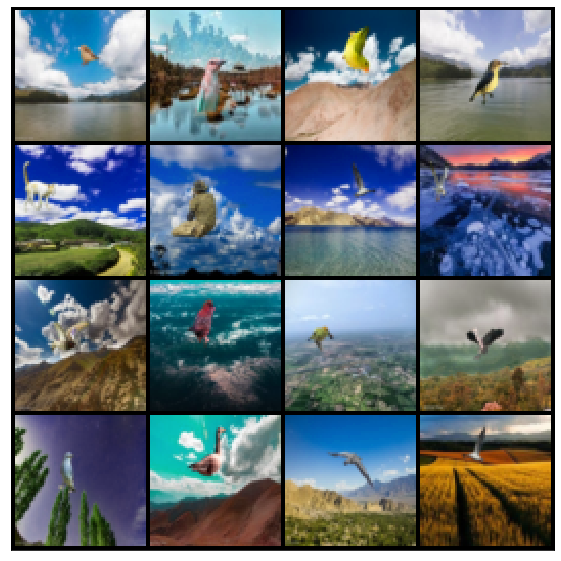

MonocularModel(
  (inputblock): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
    (1): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (convblock3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock4): Sequential(
    (0): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
)


In [9]:
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

cnn_model, device = utils.Utils.createMonocularModel()
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# last_epoch = 1

# if os.path.exists("savedmodels/checkpoint1.pt"):
#     checkpoint, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc \
#         , test_losses, lr_data, class_correct, class_total = utils.Utils.loadmodel("savedmodels/checkpoint1.pt")
#     cnn_model.load_state_dict(model_state_dict)
#     # optimizer.load_state_dict(optimizer_state_dict)
#     last_epoch = last_epoch + checkpoint['epoch']

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=2).cuda(device)


sample = next(iter(train_loader))

imgs = sample[0][0]

# grid_tensor = torchvision.utils.make_grid(imgs, 2)
# grid_image = grid_tensor.permute(1, 2, 0)

utils.Utils.show(imgs, nrow=4)

train_model = train.TrainModel()
print(cnn_model)
# print(cnn_model.parameters())
# train_model.showmodelsummary(cnn_model)
# optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 20

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|                                                                             | 8/17500 [00:10<34:19:49,  7.07s/it]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.634295
IOU : 0.045013427734375
IOU : 0.045013427734375


  0%|▏                                                                              | 50/17500 [00:13<40:36,  7.16it/s]

Train Epoch: 1 [200/280000 (0%)]	Loss: 0.162957
IOU : 0.06072998046875


  1%|▍                                                                             | 101/17500 [00:17<22:21, 12.97it/s]

Train Epoch: 1 [400/280000 (1%)]	Loss: 0.133997
IOU : 0.0543670654296875
IOU : 0.0543670654296875


  1%|▋                                                                             | 150/17500 [00:23<29:57,  9.65it/s]

Train Epoch: 1 [600/280000 (1%)]	Loss: 0.133386
IOU : 0.058685302734375


  1%|▉                                                                             | 199/17500 [00:27<27:48, 10.37it/s]

Train Epoch: 1 [800/280000 (1%)]	Loss: 0.121026
IOU : 0.0531768798828125
IOU : 0.0531768798828125


  1%|█                                                                             | 252/17500 [00:32<25:43, 11.18it/s]

Train Epoch: 1 [1000/280000 (1%)]	Loss: 0.096006
IOU : 0.0523834228515625


  2%|█▎                                                                            | 302/17500 [00:36<24:13, 11.83it/s]

Train Epoch: 1 [1200/280000 (2%)]	Loss: 0.097055
IOU : 0.0595855712890625
IOU : 0.0595855712890625


  2%|█▌                                                                            | 353/17500 [00:41<24:11, 11.81it/s]

Train Epoch: 1 [1400/280000 (2%)]	Loss: 0.081621
IOU : 0.05267333984375


  2%|█▊                                                                            | 401/17500 [00:45<24:39, 11.56it/s]

Train Epoch: 1 [1600/280000 (2%)]	Loss: 0.063575
IOU : 0.05194091796875
IOU : 0.05194091796875


  3%|██                                                                            | 452/17500 [00:50<26:56, 10.54it/s]

Train Epoch: 1 [1800/280000 (3%)]	Loss: 0.056649
IOU : 0.051239013671875


  3%|██▏                                                                           | 502/17500 [00:54<24:55, 11.36it/s]

Train Epoch: 1 [2000/280000 (3%)]	Loss: 0.066892
IOU : 0.0587158203125
IOU : 0.0587158203125


  3%|██▍                                                                           | 550/17500 [00:59<25:37, 11.02it/s]

Train Epoch: 1 [2200/280000 (3%)]	Loss: 0.049004
IOU : 0.044677734375


  3%|██▋                                                                           | 602/17500 [01:04<25:28, 11.06it/s]

Train Epoch: 1 [2400/280000 (3%)]	Loss: 0.050274
IOU : 0.055206298828125
IOU : 0.055206298828125


  4%|██▉                                                                           | 651/17500 [01:08<24:00, 11.70it/s]

Train Epoch: 1 [2600/280000 (4%)]	Loss: 0.064931
IOU : 0.0480804443359375


  4%|███▏                                                                          | 702/17500 [01:13<25:38, 10.92it/s]

Train Epoch: 1 [2800/280000 (4%)]	Loss: 0.056929
IOU : 0.0505828857421875
IOU : 0.0505828857421875


  4%|███▎                                                                          | 752/17500 [01:18<25:29, 10.95it/s]

Train Epoch: 1 [3000/280000 (4%)]	Loss: 0.069829
IOU : 0.058349609375


  5%|███▌                                                                          | 800/17500 [01:22<26:13, 10.62it/s]

Train Epoch: 1 [3200/280000 (5%)]	Loss: 0.046874
IOU : 0.0522613525390625
IOU : 0.0522613525390625


  5%|███▊                                                                          | 852/17500 [01:27<26:57, 10.29it/s]

Train Epoch: 1 [3400/280000 (5%)]	Loss: 0.056125
IOU : 0.05010986328125


  5%|████                                                                          | 901/17500 [01:32<23:26, 11.80it/s]

Train Epoch: 1 [3600/280000 (5%)]	Loss: 0.058223
IOU : 0.053436279296875
IOU : 0.053436279296875


  5%|████▏                                                                         | 950/17500 [01:36<30:07,  9.15it/s]

Train Epoch: 1 [3800/280000 (5%)]	Loss: 0.061586
IOU : 0.049530029296875


  6%|████▍                                                                         | 998/17500 [01:41<25:41, 10.70it/s]

Train Epoch: 1 [4000/280000 (6%)]	Loss: 0.061898
IOU : 0.05133056640625
IOU : 0.05133056640625


  6%|████▋                                                                        | 1052/17500 [01:46<24:17, 11.29it/s]

Train Epoch: 1 [4200/280000 (6%)]	Loss: 0.066134
IOU : 0.0550384521484375


  6%|████▊                                                                        | 1100/17500 [01:51<24:01, 11.38it/s]

Train Epoch: 1 [4400/280000 (6%)]	Loss: 0.060409
IOU : 0.0550689697265625
IOU : 0.0550689697265625


  7%|█████                                                                        | 1153/17500 [01:55<22:42, 12.00it/s]

Train Epoch: 1 [4600/280000 (7%)]	Loss: 0.049857
IOU : 0.0547637939453125


  7%|█████▎                                                                       | 1200/17500 [02:00<24:07, 11.26it/s]

Train Epoch: 1 [4800/280000 (7%)]	Loss: 0.053669
IOU : 0.0507965087890625
IOU : 0.0507965087890625


  7%|█████▌                                                                       | 1252/17500 [02:05<23:57, 11.30it/s]

Train Epoch: 1 [5000/280000 (7%)]	Loss: 0.045416
IOU : 0.04705810546875


  7%|█████▋                                                                       | 1302/17500 [02:10<25:22, 10.64it/s]

Train Epoch: 1 [5200/280000 (7%)]	Loss: 0.046989
IOU : 0.0506591796875
IOU : 0.0506591796875


  8%|█████▉                                                                       | 1352/17500 [02:14<24:04, 11.18it/s]

Train Epoch: 1 [5400/280000 (8%)]	Loss: 0.046951
IOU : 0.05609130859375


  8%|██████▏                                                                      | 1401/17500 [02:19<23:20, 11.49it/s]

Train Epoch: 1 [5600/280000 (8%)]	Loss: 0.062419
IOU : 0.0507049560546875
IOU : 0.0507049560546875


  8%|██████▍                                                                      | 1450/17500 [02:23<24:33, 10.89it/s]

Train Epoch: 1 [5800/280000 (8%)]	Loss: 0.074164
IOU : 0.0570220947265625


  9%|██████▌                                                                      | 1498/17500 [02:28<24:52, 10.72it/s]

Train Epoch: 1 [6000/280000 (9%)]	Loss: 0.063107
IOU : 0.05517578125
IOU : 0.05517578125


  9%|██████▊                                                                      | 1550/17500 [02:33<25:29, 10.43it/s]

Train Epoch: 1 [6200/280000 (9%)]	Loss: 0.073605
IOU : 0.05133056640625


  9%|███████                                                                      | 1598/17500 [02:37<25:34, 10.36it/s]

Train Epoch: 1 [6400/280000 (9%)]	Loss: 0.042770
IOU : 0.05255126953125
IOU : 0.05255126953125


  9%|███████▎                                                                     | 1650/17500 [02:42<25:11, 10.49it/s]

Train Epoch: 1 [6600/280000 (9%)]	Loss: 0.054022
IOU : 0.05670166015625


 10%|███████▍                                                                     | 1698/17500 [02:47<25:01, 10.52it/s]

Train Epoch: 1 [6800/280000 (10%)]	Loss: 0.054229
IOU : 0.0540771484375
IOU : 0.0540771484375


 10%|███████▋                                                                     | 1750/17500 [02:52<24:44, 10.61it/s]

Train Epoch: 1 [7000/280000 (10%)]	Loss: 0.050322
IOU : 0.0565032958984375


 10%|███████▉                                                                     | 1798/17500 [02:57<25:34, 10.24it/s]

Train Epoch: 1 [7200/280000 (10%)]	Loss: 0.068576
IOU : 0.0529327392578125
IOU : 0.0529327392578125


 11%|████████▏                                                                    | 1850/17500 [03:02<24:54, 10.47it/s]

Train Epoch: 1 [7400/280000 (11%)]	Loss: 0.079642
IOU : 0.067596435546875


 11%|████████▎                                                                    | 1898/17500 [03:06<25:19, 10.27it/s]

Train Epoch: 1 [7600/280000 (11%)]	Loss: 0.039828
IOU : 0.04833984375
IOU : 0.04833984375


 11%|████████▌                                                                    | 1950/17500 [03:11<25:23, 10.21it/s]

Train Epoch: 1 [7800/280000 (11%)]	Loss: 0.045185
IOU : 0.0509033203125


 11%|████████▊                                                                    | 1998/17500 [03:16<24:29, 10.55it/s]

Train Epoch: 1 [8000/280000 (11%)]	Loss: 0.054774
IOU : 0.054046630859375
IOU : 0.054046630859375


 12%|█████████                                                                    | 2050/17500 [03:21<24:26, 10.53it/s]

Train Epoch: 1 [8200/280000 (12%)]	Loss: 0.052493
IOU : 0.052093505859375


 12%|█████████▏                                                                   | 2098/17500 [03:25<25:13, 10.18it/s]

Train Epoch: 1 [8400/280000 (12%)]	Loss: 0.058209
IOU : 0.0526580810546875
IOU : 0.0526580810546875


 12%|█████████▍                                                                   | 2153/17500 [03:31<20:29, 12.48it/s]

Train Epoch: 1 [8600/280000 (12%)]	Loss: 0.044588
IOU : 0.0584716796875


 13%|█████████▋                                                                   | 2198/17500 [03:35<24:58, 10.21it/s]

Train Epoch: 1 [8800/280000 (13%)]	Loss: 0.056738
IOU : 0.0576019287109375
IOU : 0.0576019287109375


 13%|█████████▉                                                                   | 2250/17500 [03:40<24:50, 10.23it/s]

Train Epoch: 1 [9000/280000 (13%)]	Loss: 0.048392
IOU : 0.0608062744140625


 13%|██████████                                                                   | 2298/17500 [03:45<24:37, 10.29it/s]

Train Epoch: 1 [9200/280000 (13%)]	Loss: 0.038606
IOU : 0.0505218505859375
IOU : 0.0505218505859375


 13%|██████████▎                                                                  | 2350/17500 [03:50<24:22, 10.36it/s]

Train Epoch: 1 [9400/280000 (13%)]	Loss: 0.042016
IOU : 0.0478057861328125


 14%|██████████▌                                                                  | 2398/17500 [03:55<24:53, 10.11it/s]

Train Epoch: 1 [9600/280000 (14%)]	Loss: 0.050480
IOU : 0.0550079345703125
IOU : 0.0550079345703125


 14%|██████████▊                                                                  | 2450/17500 [04:00<24:55, 10.07it/s]

Train Epoch: 1 [9800/280000 (14%)]	Loss: 0.064612
IOU : 0.049896240234375


 14%|██████████▉                                                                  | 2498/17500 [04:05<24:26, 10.23it/s]

Train Epoch: 1 [10000/280000 (14%)]	Loss: 0.047291
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 15%|███████████▏                                                                 | 2550/17500 [04:10<24:08, 10.32it/s]

Train Epoch: 1 [10200/280000 (15%)]	Loss: 0.049713
IOU : 0.0507049560546875


 15%|███████████▍                                                                 | 2598/17500 [04:14<24:56,  9.96it/s]

Train Epoch: 1 [10400/280000 (15%)]	Loss: 0.070179
IOU : 0.0618133544921875
IOU : 0.0618133544921875


 15%|███████████▋                                                                 | 2650/17500 [04:19<24:02, 10.29it/s]

Train Epoch: 1 [10600/280000 (15%)]	Loss: 0.059650
IOU : 0.0596466064453125


 15%|███████████▊                                                                 | 2698/17500 [04:24<24:12, 10.19it/s]

Train Epoch: 1 [10800/280000 (15%)]	Loss: 0.050991
IOU : 0.0547027587890625
IOU : 0.0547027587890625


 16%|████████████                                                                 | 2750/17500 [04:29<23:49, 10.32it/s]

Train Epoch: 1 [11000/280000 (16%)]	Loss: 0.073947
IOU : 0.05535888671875


 16%|████████████▎                                                                | 2798/17500 [04:34<24:05, 10.17it/s]

Train Epoch: 1 [11200/280000 (16%)]	Loss: 0.039554
IOU : 0.044342041015625
IOU : 0.044342041015625


 16%|████████████▌                                                                | 2850/17500 [04:39<23:17, 10.49it/s]

Train Epoch: 1 [11400/280000 (16%)]	Loss: 0.060484
IOU : 0.054046630859375


 17%|████████████▊                                                                | 2899/17500 [04:44<27:17,  8.91it/s]

Train Epoch: 1 [11600/280000 (17%)]	Loss: 0.050483
IOU : 0.0628814697265625
IOU : 0.0628814697265625


 17%|████████████▉                                                                | 2953/17500 [04:49<23:25, 10.35it/s]

Train Epoch: 1 [11800/280000 (17%)]	Loss: 0.037960
IOU : 0.0512542724609375


 17%|█████████████▏                                                               | 3002/17500 [04:54<29:00,  8.33it/s]

Train Epoch: 1 [12000/280000 (17%)]	Loss: 0.045621
IOU : 0.050323486328125
IOU : 0.050323486328125


 17%|█████████████▍                                                               | 3050/17500 [04:59<31:55,  7.54it/s]

Train Epoch: 1 [12200/280000 (17%)]	Loss: 0.058183
IOU : 0.0582427978515625


 18%|█████████████▋                                                               | 3101/17500 [05:04<24:42,  9.71it/s]

Train Epoch: 1 [12400/280000 (18%)]	Loss: 0.038732
IOU : 0.04632568359375
IOU : 0.04632568359375


 18%|█████████████▊                                                               | 3153/17500 [05:09<22:10, 10.79it/s]

Train Epoch: 1 [12600/280000 (18%)]	Loss: 0.059309
IOU : 0.05523681640625


 18%|██████████████                                                               | 3201/17500 [05:13<19:48, 12.03it/s]

Train Epoch: 1 [12800/280000 (18%)]	Loss: 0.035116
IOU : 0.048553466796875
IOU : 0.048553466796875


 19%|██████████████▎                                                              | 3250/17500 [05:19<24:06,  9.85it/s]

Train Epoch: 1 [13000/280000 (19%)]	Loss: 0.051779
IOU : 0.05804443359375


 19%|██████████████▌                                                              | 3298/17500 [05:23<23:10, 10.22it/s]

Train Epoch: 1 [13200/280000 (19%)]	Loss: 0.056175
IOU : 0.0552825927734375
IOU : 0.0552825927734375


 19%|██████████████▋                                                              | 3350/17500 [05:28<21:52, 10.78it/s]

Train Epoch: 1 [13400/280000 (19%)]	Loss: 0.059647
IOU : 0.0628814697265625


 19%|██████████████▉                                                              | 3398/17500 [05:33<21:32, 10.91it/s]

Train Epoch: 1 [13600/280000 (19%)]	Loss: 0.048249
IOU : 0.0512847900390625
IOU : 0.0512847900390625


 20%|███████████████▏                                                             | 3450/17500 [05:38<22:07, 10.58it/s]

Train Epoch: 1 [13800/280000 (20%)]	Loss: 0.045308
IOU : 0.0530242919921875


 20%|███████████████▍                                                             | 3501/17500 [05:42<20:17, 11.50it/s]

Train Epoch: 1 [14000/280000 (20%)]	Loss: 0.050689
IOU : 0.0526123046875
IOU : 0.0526123046875


 20%|███████████████▋                                                             | 3553/17500 [05:47<22:11, 10.47it/s]

Train Epoch: 1 [14200/280000 (20%)]	Loss: 0.043188
IOU : 0.0532989501953125


 21%|███████████████▊                                                             | 3602/17500 [05:52<24:42,  9.37it/s]

Train Epoch: 1 [14400/280000 (21%)]	Loss: 0.049124
IOU : 0.0546875
IOU : 0.0546875


 21%|████████████████                                                             | 3653/17500 [05:57<20:57, 11.01it/s]

Train Epoch: 1 [14600/280000 (21%)]	Loss: 0.048983
IOU : 0.054443359375


 21%|████████████████▎                                                            | 3701/17500 [06:02<20:58, 10.97it/s]

Train Epoch: 1 [14800/280000 (21%)]	Loss: 0.063293
IOU : 0.0573577880859375
IOU : 0.0573577880859375


 21%|████████████████▌                                                            | 3750/17500 [06:07<25:30,  8.99it/s]

Train Epoch: 1 [15000/280000 (21%)]	Loss: 0.057714
IOU : 0.0621185302734375


 22%|████████████████▋                                                            | 3801/17500 [06:12<20:52, 10.93it/s]

Train Epoch: 1 [15200/280000 (22%)]	Loss: 0.054484
IOU : 0.0489349365234375
IOU : 0.0489349365234375


 22%|████████████████▉                                                            | 3853/17500 [06:17<21:40, 10.49it/s]

Train Epoch: 1 [15400/280000 (22%)]	Loss: 0.054015
IOU : 0.0549468994140625


 22%|█████████████████▏                                                           | 3901/17500 [06:22<21:26, 10.57it/s]

Train Epoch: 1 [15600/280000 (22%)]	Loss: 0.042024
IOU : 0.0440521240234375
IOU : 0.0440521240234375


 23%|█████████████████▍                                                           | 3953/17500 [06:27<20:49, 10.84it/s]

Train Epoch: 1 [15800/280000 (23%)]	Loss: 0.042244
IOU : 0.0576171875


 23%|█████████████████▌                                                           | 4001/17500 [06:32<22:00, 10.22it/s]

Train Epoch: 1 [16000/280000 (23%)]	Loss: 0.034911
IOU : 0.0589752197265625
IOU : 0.0589752197265625


 23%|█████████████████▊                                                           | 4053/17500 [06:37<21:04, 10.64it/s]

Train Epoch: 1 [16200/280000 (23%)]	Loss: 0.051365
IOU : 0.0525360107421875


 23%|██████████████████                                                           | 4101/17500 [06:42<21:05, 10.59it/s]

Train Epoch: 1 [16400/280000 (23%)]	Loss: 0.057571
IOU : 0.0521697998046875
IOU : 0.0521697998046875


 24%|██████████████████▎                                                          | 4153/17500 [06:47<20:49, 10.68it/s]

Train Epoch: 1 [16600/280000 (24%)]	Loss: 0.043804
IOU : 0.0476531982421875


 24%|██████████████████▍                                                          | 4198/17500 [06:51<22:22,  9.91it/s]

Train Epoch: 1 [16800/280000 (24%)]	Loss: 0.051980
IOU : 0.0518035888671875
IOU : 0.0518035888671875


 24%|██████████████████▋                                                          | 4250/17500 [06:56<21:41, 10.18it/s]

Train Epoch: 1 [17000/280000 (24%)]	Loss: 0.043717
IOU : 0.05023193359375


 25%|██████████████████▉                                                          | 4301/17500 [07:01<17:39, 12.46it/s]

Train Epoch: 1 [17200/280000 (25%)]	Loss: 0.077462
IOU : 0.0591278076171875
IOU : 0.0591278076171875


 25%|███████████████████▏                                                         | 4351/17500 [07:06<25:38,  8.54it/s]

Train Epoch: 1 [17400/280000 (25%)]	Loss: 0.044427
IOU : 0.0471038818359375


 25%|███████████████████▎                                                         | 4398/17500 [07:11<22:47,  9.58it/s]

Train Epoch: 1 [17600/280000 (25%)]	Loss: 0.051269
IOU : 0.05670166015625
IOU : 0.05670166015625


 25%|███████████████████▌                                                         | 4453/17500 [07:17<20:08, 10.80it/s]

Train Epoch: 1 [17800/280000 (25%)]	Loss: 0.034156
IOU : 0.046478271484375


 26%|███████████████████▊                                                         | 4498/17500 [07:21<22:30,  9.63it/s]

Train Epoch: 1 [18000/280000 (26%)]	Loss: 0.041544
IOU : 0.0458221435546875
IOU : 0.0458221435546875


 26%|████████████████████                                                         | 4550/17500 [07:26<21:25, 10.07it/s]

Train Epoch: 1 [18200/280000 (26%)]	Loss: 0.047370
IOU : 0.0560302734375


 26%|████████████████████▏                                                        | 4598/17500 [07:31<20:56, 10.27it/s]

Train Epoch: 1 [18400/280000 (26%)]	Loss: 0.050525
IOU : 0.0533905029296875
IOU : 0.0533905029296875


 27%|████████████████████▍                                                        | 4650/17500 [07:36<20:38, 10.38it/s]

Train Epoch: 1 [18600/280000 (27%)]	Loss: 0.034963
IOU : 0.0508270263671875


 27%|████████████████████▋                                                        | 4698/17500 [07:41<21:12, 10.06it/s]

Train Epoch: 1 [18800/280000 (27%)]	Loss: 0.046221
IOU : 0.055816650390625
IOU : 0.055816650390625


 27%|████████████████████▉                                                        | 4750/17500 [07:46<20:38, 10.29it/s]

Train Epoch: 1 [19000/280000 (27%)]	Loss: 0.036717
IOU : 0.0594024658203125


 27%|█████████████████████                                                        | 4798/17500 [07:51<21:01, 10.07it/s]

Train Epoch: 1 [19200/280000 (27%)]	Loss: 0.045928
IOU : 0.055938720703125
IOU : 0.055938720703125


 28%|█████████████████████▎                                                       | 4850/17500 [07:56<21:01, 10.03it/s]

Train Epoch: 1 [19400/280000 (28%)]	Loss: 0.032744
IOU : 0.0514373779296875


 28%|█████████████████████▌                                                       | 4898/17500 [08:01<19:51, 10.57it/s]

Train Epoch: 1 [19600/280000 (28%)]	Loss: 0.053996
IOU : 0.0657196044921875
IOU : 0.0657196044921875


 28%|█████████████████████▊                                                       | 4950/17500 [08:06<20:31, 10.19it/s]

Train Epoch: 1 [19800/280000 (28%)]	Loss: 0.041204
IOU : 0.0458221435546875


 29%|█████████████████████▉                                                       | 4998/17500 [08:11<20:35, 10.12it/s]

Train Epoch: 1 [20000/280000 (29%)]	Loss: 0.035021
IOU : 0.0444488525390625
IOU : 0.0444488525390625


 29%|██████████████████████▏                                                      | 5050/17500 [08:16<20:23, 10.17it/s]

Train Epoch: 1 [20200/280000 (29%)]	Loss: 0.042861
IOU : 0.05194091796875


 29%|██████████████████████▍                                                      | 5098/17500 [08:21<20:23, 10.14it/s]

Train Epoch: 1 [20400/280000 (29%)]	Loss: 0.034444
IOU : 0.0482025146484375
IOU : 0.0482025146484375


 29%|██████████████████████▋                                                      | 5150/17500 [08:26<20:46,  9.91it/s]

Train Epoch: 1 [20600/280000 (29%)]	Loss: 0.072017
IOU : 0.053680419921875


 30%|██████████████████████▊                                                      | 5198/17500 [08:31<20:46,  9.87it/s]

Train Epoch: 1 [20800/280000 (30%)]	Loss: 0.053372
IOU : 0.0566253662109375
IOU : 0.0566253662109375


 30%|███████████████████████                                                      | 5250/17500 [08:36<20:55,  9.76it/s]

Train Epoch: 1 [21000/280000 (30%)]	Loss: 0.053882
IOU : 0.05474853515625


 30%|███████████████████████▎                                                     | 5298/17500 [08:41<20:00, 10.16it/s]

Train Epoch: 1 [21200/280000 (30%)]	Loss: 0.045012
IOU : 0.0509490966796875
IOU : 0.0509490966796875


 31%|███████████████████████▌                                                     | 5350/17500 [08:46<20:26,  9.91it/s]

Train Epoch: 1 [21400/280000 (31%)]	Loss: 0.034489
IOU : 0.045684814453125


 31%|███████████████████████▊                                                     | 5398/17500 [08:51<20:02, 10.07it/s]

Train Epoch: 1 [21600/280000 (31%)]	Loss: 0.042478
IOU : 0.0521087646484375
IOU : 0.0521087646484375


 31%|███████████████████████▉                                                     | 5450/17500 [08:56<20:21,  9.86it/s]

Train Epoch: 1 [21800/280000 (31%)]	Loss: 0.054406
IOU : 0.0551910400390625


 31%|████████████████████████▏                                                    | 5498/17500 [09:01<20:03,  9.97it/s]

Train Epoch: 1 [22000/280000 (31%)]	Loss: 0.038356
IOU : 0.0516510009765625
IOU : 0.0516510009765625


 32%|████████████████████████▍                                                    | 5550/17500 [09:07<19:51, 10.03it/s]

Train Epoch: 1 [22200/280000 (32%)]	Loss: 0.035606
IOU : 0.0512237548828125


 32%|████████████████████████▋                                                    | 5598/17500 [09:11<20:06,  9.87it/s]

Train Epoch: 1 [22400/280000 (32%)]	Loss: 0.049563
IOU : 0.0532379150390625
IOU : 0.0532379150390625


 32%|████████████████████████▊                                                    | 5650/17500 [09:17<19:55,  9.91it/s]

Train Epoch: 1 [22600/280000 (32%)]	Loss: 0.033767
IOU : 0.0476226806640625


 33%|█████████████████████████                                                    | 5698/17500 [09:21<19:35, 10.04it/s]

Train Epoch: 1 [22800/280000 (33%)]	Loss: 0.040682
IOU : 0.05426025390625
IOU : 0.05426025390625


 33%|█████████████████████████▎                                                   | 5750/17500 [09:27<19:24, 10.09it/s]

Train Epoch: 1 [23000/280000 (33%)]	Loss: 0.041294
IOU : 0.0547332763671875


 33%|█████████████████████████▌                                                   | 5798/17500 [09:32<19:18, 10.10it/s]

Train Epoch: 1 [23200/280000 (33%)]	Loss: 0.050397
IOU : 0.0520782470703125
IOU : 0.0520782470703125


 33%|█████████████████████████▋                                                   | 5850/17500 [09:37<19:22, 10.02it/s]

Train Epoch: 1 [23400/280000 (33%)]	Loss: 0.053839
IOU : 0.0569915771484375


 34%|█████████████████████████▉                                                   | 5898/17500 [09:41<19:03, 10.15it/s]

Train Epoch: 1 [23600/280000 (34%)]	Loss: 0.034798
IOU : 0.049163818359375
IOU : 0.049163818359375


 34%|██████████████████████████▏                                                  | 5950/17500 [09:46<19:12, 10.02it/s]

Train Epoch: 1 [23800/280000 (34%)]	Loss: 0.039098
IOU : 0.045989990234375


 34%|██████████████████████████▍                                                  | 5998/17500 [09:51<19:25,  9.86it/s]

Train Epoch: 1 [24000/280000 (34%)]	Loss: 0.039073
IOU : 0.0475311279296875
IOU : 0.0475311279296875


 35%|██████████████████████████▌                                                  | 6050/17500 [09:57<20:15,  9.42it/s]

Train Epoch: 1 [24200/280000 (35%)]	Loss: 0.043405
IOU : 0.0501708984375


 35%|██████████████████████████▊                                                  | 6098/17500 [10:02<19:03,  9.97it/s]

Train Epoch: 1 [24400/280000 (35%)]	Loss: 0.038700
IOU : 0.0492095947265625
IOU : 0.0492095947265625


 35%|███████████████████████████                                                  | 6150/17500 [10:07<19:24,  9.74it/s]

Train Epoch: 1 [24600/280000 (35%)]	Loss: 0.047371
IOU : 0.0583343505859375


 35%|███████████████████████████▎                                                 | 6198/17500 [10:12<19:56,  9.44it/s]

Train Epoch: 1 [24800/280000 (35%)]	Loss: 0.054295
IOU : 0.0544281005859375
IOU : 0.0544281005859375


 36%|███████████████████████████▌                                                 | 6250/17500 [10:17<18:59,  9.87it/s]

Train Epoch: 1 [25000/280000 (36%)]	Loss: 0.052060
IOU : 0.047088623046875


 36%|███████████████████████████▋                                                 | 6298/17500 [10:22<19:22,  9.63it/s]

Train Epoch: 1 [25200/280000 (36%)]	Loss: 0.043758
IOU : 0.045074462890625
IOU : 0.045074462890625


 36%|███████████████████████████▉                                                 | 6350/17500 [10:27<18:53,  9.83it/s]

Train Epoch: 1 [25400/280000 (36%)]	Loss: 0.035215
IOU : 0.0557098388671875


 37%|████████████████████████████▏                                                | 6398/17500 [10:32<18:36,  9.94it/s]

Train Epoch: 1 [25600/280000 (37%)]	Loss: 0.050181
IOU : 0.055450439453125
IOU : 0.055450439453125


 37%|████████████████████████████▍                                                | 6450/17500 [10:38<18:49,  9.79it/s]

Train Epoch: 1 [25800/280000 (37%)]	Loss: 0.031427
IOU : 0.04522705078125


 37%|████████████████████████████▌                                                | 6498/17500 [10:42<18:17, 10.03it/s]

Train Epoch: 1 [26000/280000 (37%)]	Loss: 0.056774
IOU : 0.0622406005859375
IOU : 0.0622406005859375


 37%|████████████████████████████▊                                                | 6550/17500 [10:48<17:45, 10.27it/s]

Train Epoch: 1 [26200/280000 (37%)]	Loss: 0.047994
IOU : 0.0550689697265625


 38%|█████████████████████████████                                                | 6601/17500 [10:53<18:34,  9.78it/s]

Train Epoch: 1 [26400/280000 (38%)]	Loss: 0.044420
IOU : 0.057373046875
IOU : 0.057373046875


 38%|█████████████████████████████▎                                               | 6653/17500 [10:58<17:27, 10.35it/s]

Train Epoch: 1 [26600/280000 (38%)]	Loss: 0.035617
IOU : 0.045379638671875


 38%|█████████████████████████████▍                                               | 6701/17500 [11:03<18:18,  9.83it/s]

Train Epoch: 1 [26800/280000 (38%)]	Loss: 0.055293
IOU : 0.0511016845703125
IOU : 0.0511016845703125


 39%|█████████████████████████████▋                                               | 6753/17500 [11:08<20:27,  8.75it/s]

Train Epoch: 1 [27000/280000 (39%)]	Loss: 0.053488
IOU : 0.056060791015625


 39%|█████████████████████████████▉                                               | 6801/17500 [11:13<17:49, 10.01it/s]

Train Epoch: 1 [27200/280000 (39%)]	Loss: 0.042910
IOU : 0.050048828125
IOU : 0.050048828125


 39%|██████████████████████████████▏                                              | 6851/17500 [11:18<18:28,  9.61it/s]

Train Epoch: 1 [27400/280000 (39%)]	Loss: 0.045196
IOU : 0.0584869384765625


 39%|██████████████████████████████▎                                              | 6901/17500 [11:23<17:51,  9.89it/s]

Train Epoch: 1 [27600/280000 (39%)]	Loss: 0.037333
IOU : 0.052520751953125
IOU : 0.052520751953125


 40%|██████████████████████████████▌                                              | 6953/17500 [11:29<16:50, 10.44it/s]

Train Epoch: 1 [27800/280000 (40%)]	Loss: 0.043212
IOU : 0.0577545166015625


 40%|██████████████████████████████▊                                              | 7001/17500 [11:33<17:01, 10.28it/s]

Train Epoch: 1 [28000/280000 (40%)]	Loss: 0.038679
IOU : 0.058197021484375
IOU : 0.058197021484375


 40%|███████████████████████████████                                              | 7050/17500 [11:39<18:00,  9.68it/s]

Train Epoch: 1 [28200/280000 (40%)]	Loss: 0.031106
IOU : 0.045654296875


 41%|███████████████████████████████▏                                             | 7098/17500 [11:43<17:03, 10.16it/s]

Train Epoch: 1 [28400/280000 (41%)]	Loss: 0.039068
IOU : 0.0548858642578125
IOU : 0.0548858642578125


 41%|███████████████████████████████▍                                             | 7150/17500 [11:48<17:10, 10.04it/s]

Train Epoch: 1 [28600/280000 (41%)]	Loss: 0.029706
IOU : 0.0511322021484375


 41%|███████████████████████████████▋                                             | 7198/17500 [11:53<17:32,  9.79it/s]

Train Epoch: 1 [28800/280000 (41%)]	Loss: 0.044085
IOU : 0.0543670654296875
IOU : 0.0543670654296875


 41%|███████████████████████████████▉                                             | 7250/17500 [11:59<17:20,  9.85it/s]

Train Epoch: 1 [29000/280000 (41%)]	Loss: 0.059706
IOU : 0.0528717041015625


 42%|████████████████████████████████                                             | 7298/17500 [12:04<17:44,  9.58it/s]

Train Epoch: 1 [29200/280000 (42%)]	Loss: 0.063274
IOU : 0.054290771484375
IOU : 0.054290771484375


 42%|████████████████████████████████▎                                            | 7350/17500 [12:09<17:16,  9.79it/s]

Train Epoch: 1 [29400/280000 (42%)]	Loss: 0.042065
IOU : 0.061004638671875


 42%|████████████████████████████████▌                                            | 7398/17500 [12:14<17:48,  9.45it/s]

Train Epoch: 1 [29600/280000 (42%)]	Loss: 0.046027
IOU : 0.0496826171875
IOU : 0.0496826171875


 43%|████████████████████████████████▊                                            | 7450/17500 [12:19<17:07,  9.78it/s]

Train Epoch: 1 [29800/280000 (43%)]	Loss: 0.045243
IOU : 0.0501861572265625


 43%|████████████████████████████████▉                                            | 7498/17500 [12:24<16:47,  9.93it/s]

Train Epoch: 1 [30000/280000 (43%)]	Loss: 0.047295
IOU : 0.0503082275390625
IOU : 0.0503082275390625


 43%|█████████████████████████████████▏                                           | 7550/17500 [12:29<16:41,  9.94it/s]

Train Epoch: 1 [30200/280000 (43%)]	Loss: 0.037200
IOU : 0.05389404296875


 43%|█████████████████████████████████▍                                           | 7598/17500 [12:34<16:43,  9.87it/s]

Train Epoch: 1 [30400/280000 (43%)]	Loss: 0.052298
IOU : 0.057647705078125
IOU : 0.057647705078125


 44%|█████████████████████████████████▋                                           | 7650/17500 [12:40<16:53,  9.72it/s]

Train Epoch: 1 [30600/280000 (44%)]	Loss: 0.038351
IOU : 0.052001953125


 44%|█████████████████████████████████▊                                           | 7698/17500 [12:44<15:51, 10.30it/s]

Train Epoch: 1 [30800/280000 (44%)]	Loss: 0.037434
IOU : 0.047760009765625
IOU : 0.047760009765625


 44%|██████████████████████████████████                                           | 7750/17500 [12:50<16:25,  9.89it/s]

Train Epoch: 1 [31000/280000 (44%)]	Loss: 0.035448
IOU : 0.0554656982421875


 45%|██████████████████████████████████▎                                          | 7798/17500 [12:54<15:52, 10.18it/s]

Train Epoch: 1 [31200/280000 (45%)]	Loss: 0.052723
IOU : 0.0546417236328125
IOU : 0.0546417236328125


 45%|██████████████████████████████████▌                                          | 7850/17500 [13:00<15:51, 10.14it/s]

Train Epoch: 1 [31400/280000 (45%)]	Loss: 0.040056
IOU : 0.044525146484375


 45%|██████████████████████████████████▊                                          | 7898/17500 [13:04<15:56, 10.04it/s]

Train Epoch: 1 [31600/280000 (45%)]	Loss: 0.047290
IOU : 0.053436279296875
IOU : 0.053436279296875


 45%|██████████████████████████████████▉                                          | 7950/17500 [13:09<15:43, 10.12it/s]

Train Epoch: 1 [31800/280000 (45%)]	Loss: 0.043971
IOU : 0.0509033203125


 46%|███████████████████████████████████▏                                         | 7998/17500 [13:14<15:16, 10.37it/s]

Train Epoch: 1 [32000/280000 (46%)]	Loss: 0.054651
IOU : 0.0572357177734375
IOU : 0.0572357177734375


 46%|███████████████████████████████████▍                                         | 8050/17500 [13:19<15:17, 10.30it/s]

Train Epoch: 1 [32200/280000 (46%)]	Loss: 0.062051
IOU : 0.0589141845703125


 46%|███████████████████████████████████▋                                         | 8098/17500 [13:24<14:47, 10.59it/s]

Train Epoch: 1 [32400/280000 (46%)]	Loss: 0.059760
IOU : 0.0576019287109375
IOU : 0.0576019287109375


 47%|███████████████████████████████████▊                                         | 8150/17500 [13:29<14:44, 10.57it/s]

Train Epoch: 1 [32600/280000 (47%)]	Loss: 0.030779
IOU : 0.047943115234375


 47%|████████████████████████████████████                                         | 8198/17500 [13:34<15:12, 10.20it/s]

Train Epoch: 1 [32800/280000 (47%)]	Loss: 0.058824
IOU : 0.056732177734375
IOU : 0.056732177734375


 47%|████████████████████████████████████▎                                        | 8250/17500 [13:39<15:49,  9.74it/s]

Train Epoch: 1 [33000/280000 (47%)]	Loss: 0.042735
IOU : 0.0510711669921875


 47%|████████████████████████████████████▌                                        | 8298/17500 [13:44<16:06,  9.52it/s]

Train Epoch: 1 [33200/280000 (47%)]	Loss: 0.056133
IOU : 0.054901123046875
IOU : 0.054901123046875


 48%|████████████████████████████████████▋                                        | 8350/17500 [13:50<17:15,  8.84it/s]

Train Epoch: 1 [33400/280000 (48%)]	Loss: 0.054457
IOU : 0.051177978515625


 48%|████████████████████████████████████▉                                        | 8398/17500 [13:54<15:15,  9.94it/s]

Train Epoch: 1 [33600/280000 (48%)]	Loss: 0.037454
IOU : 0.0517425537109375
IOU : 0.0517425537109375


 48%|█████████████████████████████████████▏                                       | 8450/17500 [14:00<15:52,  9.50it/s]

Train Epoch: 1 [33800/280000 (48%)]	Loss: 0.044245
IOU : 0.0571746826171875


 49%|█████████████████████████████████████▍                                       | 8498/17500 [14:05<16:35,  9.05it/s]

Train Epoch: 1 [34000/280000 (49%)]	Loss: 0.046338
IOU : 0.05126953125
IOU : 0.05126953125


 49%|█████████████████████████████████████▌                                       | 8550/17500 [14:11<18:26,  8.09it/s]

Train Epoch: 1 [34200/280000 (49%)]	Loss: 0.042112
IOU : 0.0591888427734375


 49%|█████████████████████████████████████▊                                       | 8598/17500 [14:17<17:08,  8.65it/s]

Train Epoch: 1 [34400/280000 (49%)]	Loss: 0.065345
IOU : 0.0633697509765625
IOU : 0.0633697509765625


 49%|██████████████████████████████████████                                       | 8650/17500 [14:22<15:02,  9.81it/s]

Train Epoch: 1 [34600/280000 (49%)]	Loss: 0.042586
IOU : 0.0496368408203125


 50%|██████████████████████████████████████▎                                      | 8698/17500 [14:27<15:10,  9.67it/s]

Train Epoch: 1 [34800/280000 (50%)]	Loss: 0.037455
IOU : 0.0519561767578125
IOU : 0.0519561767578125


 50%|██████████████████████████████████████▌                                      | 8750/17500 [14:33<15:34,  9.37it/s]

Train Epoch: 1 [35000/280000 (50%)]	Loss: 0.046249
IOU : 0.057037353515625


 50%|██████████████████████████████████████▋                                      | 8798/17500 [14:38<15:18,  9.47it/s]

Train Epoch: 1 [35200/280000 (50%)]	Loss: 0.047389
IOU : 0.0560455322265625
IOU : 0.0560455322265625


 51%|██████████████████████████████████████▉                                      | 8850/17500 [14:44<15:45,  9.15it/s]

Train Epoch: 1 [35400/280000 (51%)]	Loss: 0.039725
IOU : 0.0548553466796875


 51%|███████████████████████████████████████▏                                     | 8898/17500 [14:50<22:52,  6.27it/s]

Train Epoch: 1 [35600/280000 (51%)]	Loss: 0.040726
IOU : 0.0637054443359375
IOU : 0.0637054443359375


 51%|███████████████████████████████████████▍                                     | 8950/17500 [14:56<15:28,  9.21it/s]

Train Epoch: 1 [35800/280000 (51%)]	Loss: 0.041497
IOU : 0.0544891357421875


 51%|███████████████████████████████████████▌                                     | 8998/17500 [15:01<16:45,  8.45it/s]

Train Epoch: 1 [36000/280000 (51%)]	Loss: 0.044097
IOU : 0.0593414306640625
IOU : 0.0593414306640625


 52%|███████████████████████████████████████▊                                     | 9050/17500 [15:08<18:51,  7.47it/s]

Train Epoch: 1 [36200/280000 (52%)]	Loss: 0.050623
IOU : 0.0558929443359375


 52%|████████████████████████████████████████                                     | 9098/17500 [15:13<18:26,  7.59it/s]

Train Epoch: 1 [36400/280000 (52%)]	Loss: 0.045899
IOU : 0.0504913330078125
IOU : 0.0504913330078125


 52%|████████████████████████████████████████▎                                    | 9150/17500 [15:20<16:54,  8.23it/s]

Train Epoch: 1 [36600/280000 (52%)]	Loss: 0.047088
IOU : 0.0576324462890625


 53%|████████████████████████████████████████▍                                    | 9198/17500 [15:25<14:23,  9.61it/s]

Train Epoch: 1 [36800/280000 (53%)]	Loss: 0.058440
IOU : 0.052581787109375
IOU : 0.052581787109375


 53%|████████████████████████████████████████▋                                    | 9250/17500 [15:31<15:57,  8.61it/s]

Train Epoch: 1 [37000/280000 (53%)]	Loss: 0.045801
IOU : 0.0611419677734375


 53%|████████████████████████████████████████▉                                    | 9298/17500 [15:37<15:30,  8.82it/s]

Train Epoch: 1 [37200/280000 (53%)]	Loss: 0.047888
IOU : 0.057037353515625
IOU : 0.057037353515625


 53%|█████████████████████████████████████████▏                                   | 9350/17500 [15:42<14:16,  9.51it/s]

Train Epoch: 1 [37400/280000 (53%)]	Loss: 0.033704
IOU : 0.055419921875


 54%|█████████████████████████████████████████▎                                   | 9398/17500 [15:48<14:39,  9.21it/s]

Train Epoch: 1 [37600/280000 (54%)]	Loss: 0.043244
IOU : 0.0540771484375
IOU : 0.0540771484375


 54%|█████████████████████████████████████████▌                                   | 9450/17500 [15:54<18:00,  7.45it/s]

Train Epoch: 1 [37800/280000 (54%)]	Loss: 0.037427
IOU : 0.052703857421875


 54%|█████████████████████████████████████████▊                                   | 9498/17500 [16:00<14:18,  9.32it/s]

Train Epoch: 1 [38000/280000 (54%)]	Loss: 0.039372
IOU : 0.046600341796875
IOU : 0.046600341796875


 55%|██████████████████████████████████████████                                   | 9550/17500 [16:05<14:17,  9.27it/s]

Train Epoch: 1 [38200/280000 (55%)]	Loss: 0.040235
IOU : 0.0454864501953125


 55%|██████████████████████████████████████████▏                                  | 9598/17500 [16:10<13:40,  9.63it/s]

Train Epoch: 1 [38400/280000 (55%)]	Loss: 0.040111
IOU : 0.050506591796875
IOU : 0.050506591796875


 55%|██████████████████████████████████████████▍                                  | 9650/17500 [16:15<13:57,  9.37it/s]

Train Epoch: 1 [38600/280000 (55%)]	Loss: 0.042262
IOU : 0.0498199462890625


 55%|██████████████████████████████████████████▋                                  | 9698/17500 [16:21<14:26,  9.00it/s]

Train Epoch: 1 [38800/280000 (55%)]	Loss: 0.047923
IOU : 0.0571441650390625
IOU : 0.0571441650390625


 56%|██████████████████████████████████████████▉                                  | 9750/17500 [16:27<13:55,  9.27it/s]

Train Epoch: 1 [39000/280000 (56%)]	Loss: 0.046416
IOU : 0.0602264404296875


 56%|███████████████████████████████████████████                                  | 9798/17500 [16:31<13:05,  9.81it/s]

Train Epoch: 1 [39200/280000 (56%)]	Loss: 0.042976
IOU : 0.049774169921875
IOU : 0.049774169921875


 56%|███████████████████████████████████████████▎                                 | 9850/17500 [16:37<13:12,  9.65it/s]

Train Epoch: 1 [39400/280000 (56%)]	Loss: 0.041692
IOU : 0.055450439453125


 57%|███████████████████████████████████████████▌                                 | 9898/17500 [16:42<13:17,  9.53it/s]

Train Epoch: 1 [39600/280000 (57%)]	Loss: 0.043950
IOU : 0.0514984130859375
IOU : 0.0514984130859375


 57%|███████████████████████████████████████████▊                                 | 9950/17500 [16:47<13:02,  9.65it/s]

Train Epoch: 1 [39800/280000 (57%)]	Loss: 0.037760
IOU : 0.0468292236328125


 57%|███████████████████████████████████████████▉                                 | 9998/17500 [16:52<12:46,  9.78it/s]

Train Epoch: 1 [40000/280000 (57%)]	Loss: 0.040620
IOU : 0.0538177490234375
IOU : 0.0538177490234375


 57%|███████████████████████████████████████████▋                                | 10050/17500 [16:57<12:39,  9.81it/s]

Train Epoch: 1 [40200/280000 (57%)]	Loss: 0.045266
IOU : 0.059478759765625


 58%|███████████████████████████████████████████▊                                | 10098/17500 [17:02<12:25,  9.93it/s]

Train Epoch: 1 [40400/280000 (58%)]	Loss: 0.038833
IOU : 0.0612030029296875
IOU : 0.0612030029296875


 58%|████████████████████████████████████████████                                | 10150/17500 [17:08<12:23,  9.89it/s]

Train Epoch: 1 [40600/280000 (58%)]	Loss: 0.057043
IOU : 0.0571746826171875


 58%|████████████████████████████████████████████▎                               | 10198/17500 [17:12<12:06, 10.05it/s]

Train Epoch: 1 [40800/280000 (58%)]	Loss: 0.033372
IOU : 0.0511474609375
IOU : 0.0511474609375


 59%|████████████████████████████████████████████▌                               | 10250/17500 [17:18<12:04, 10.01it/s]

Train Epoch: 1 [41000/280000 (59%)]	Loss: 0.031497
IOU : 0.0515594482421875


 59%|████████████████████████████████████████████▋                               | 10298/17500 [17:23<12:18,  9.75it/s]

Train Epoch: 1 [41200/280000 (59%)]	Loss: 0.036551
IOU : 0.05303955078125
IOU : 0.05303955078125


 59%|████████████████████████████████████████████▉                               | 10350/17500 [17:29<13:16,  8.98it/s]

Train Epoch: 1 [41400/280000 (59%)]	Loss: 0.045954
IOU : 0.04931640625


 59%|█████████████████████████████████████████████▏                              | 10398/17500 [17:34<12:25,  9.53it/s]

Train Epoch: 1 [41600/280000 (59%)]	Loss: 0.034021
IOU : 0.048858642578125
IOU : 0.048858642578125


 60%|█████████████████████████████████████████████▍                              | 10450/17500 [17:39<12:05,  9.72it/s]

Train Epoch: 1 [41800/280000 (60%)]	Loss: 0.028899
IOU : 0.0509185791015625


 60%|█████████████████████████████████████████████▌                              | 10498/17500 [17:44<12:01,  9.71it/s]

Train Epoch: 1 [42000/280000 (60%)]	Loss: 0.063207
IOU : 0.0630645751953125
IOU : 0.0630645751953125


 60%|█████████████████████████████████████████████▊                              | 10550/17500 [17:50<12:29,  9.28it/s]

Train Epoch: 1 [42200/280000 (60%)]	Loss: 0.031109
IOU : 0.0433807373046875


 61%|██████████████████████████████████████████████                              | 10598/17500 [17:56<14:30,  7.93it/s]

Train Epoch: 1 [42400/280000 (61%)]	Loss: 0.040079
IOU : 0.0640869140625
IOU : 0.0640869140625


 61%|██████████████████████████████████████████████▎                             | 10650/17500 [18:02<12:04,  9.46it/s]

Train Epoch: 1 [42600/280000 (61%)]	Loss: 0.054948
IOU : 0.059112548828125


 61%|██████████████████████████████████████████████▍                             | 10698/17500 [18:07<12:37,  8.97it/s]

Train Epoch: 1 [42800/280000 (61%)]	Loss: 0.032009
IOU : 0.05126953125
IOU : 0.05126953125


 61%|██████████████████████████████████████████████▋                             | 10750/17500 [18:13<12:22,  9.09it/s]

Train Epoch: 1 [43000/280000 (61%)]	Loss: 0.049753
IOU : 0.0545501708984375


 62%|██████████████████████████████████████████████▉                             | 10798/17500 [18:18<11:34,  9.65it/s]

Train Epoch: 1 [43200/280000 (62%)]	Loss: 0.031276
IOU : 0.048980712890625
IOU : 0.048980712890625


 62%|███████████████████████████████████████████████                             | 10850/17500 [18:24<14:04,  7.88it/s]

Train Epoch: 1 [43400/280000 (62%)]	Loss: 0.051550
IOU : 0.060455322265625


 62%|███████████████████████████████████████████████▎                            | 10898/17500 [18:31<16:11,  6.79it/s]

Train Epoch: 1 [43600/280000 (62%)]	Loss: 0.038622
IOU : 0.053466796875
IOU : 0.053466796875


 63%|███████████████████████████████████████████████▌                            | 10950/17500 [18:37<12:30,  8.72it/s]

Train Epoch: 1 [43800/280000 (63%)]	Loss: 0.043810
IOU : 0.053375244140625


 63%|███████████████████████████████████████████████▊                            | 10998/17500 [18:42<12:36,  8.59it/s]

Train Epoch: 1 [44000/280000 (63%)]	Loss: 0.033473
IOU : 0.046112060546875
IOU : 0.046112060546875


 63%|███████████████████████████████████████████████▉                            | 11050/17500 [18:48<12:49,  8.38it/s]

Train Epoch: 1 [44200/280000 (63%)]	Loss: 0.036973
IOU : 0.04583740234375


 63%|████████████████████████████████████████████████▏                           | 11098/17500 [18:54<11:36,  9.19it/s]

Train Epoch: 1 [44400/280000 (63%)]	Loss: 0.051384
IOU : 0.05828857421875
IOU : 0.05828857421875


 64%|████████████████████████████████████████████████▍                           | 11150/17500 [19:00<11:41,  9.05it/s]

Train Epoch: 1 [44600/280000 (64%)]	Loss: 0.040961
IOU : 0.052947998046875


 64%|████████████████████████████████████████████████▋                           | 11199/17500 [19:06<13:32,  7.75it/s]

Train Epoch: 1 [44800/280000 (64%)]	Loss: 0.046815
IOU : 0.06439208984375
IOU : 0.06439208984375


 64%|████████████████████████████████████████████████▊                           | 11250/17500 [19:11<12:57,  8.04it/s]

Train Epoch: 1 [45000/280000 (64%)]	Loss: 0.058088
IOU : 0.0614776611328125


 65%|█████████████████████████████████████████████████                           | 11299/17500 [19:18<12:59,  7.95it/s]

Train Epoch: 1 [45200/280000 (65%)]	Loss: 0.032625
IOU : 0.0494232177734375
IOU : 0.0494232177734375


 65%|█████████████████████████████████████████████████▎                          | 11350/17500 [19:24<11:12,  9.15it/s]

Train Epoch: 1 [45400/280000 (65%)]	Loss: 0.033566
IOU : 0.043487548828125


 65%|█████████████████████████████████████████████████▍                          | 11398/17500 [19:29<11:14,  9.05it/s]

Train Epoch: 1 [45600/280000 (65%)]	Loss: 0.033188
IOU : 0.0462493896484375
IOU : 0.0462493896484375


 65%|█████████████████████████████████████████████████▋                          | 11450/17500 [19:35<12:42,  7.93it/s]

Train Epoch: 1 [45800/280000 (65%)]	Loss: 0.043303
IOU : 0.0491180419921875


 66%|█████████████████████████████████████████████████▉                          | 11498/17500 [19:42<13:02,  7.67it/s]

Train Epoch: 1 [46000/280000 (66%)]	Loss: 0.033111
IOU : 0.0447998046875
IOU : 0.0447998046875


 66%|██████████████████████████████████████████████████▏                         | 11550/17500 [19:47<11:24,  8.69it/s]

Train Epoch: 1 [46200/280000 (66%)]	Loss: 0.064704
IOU : 0.055908203125


 66%|██████████████████████████████████████████████████▎                         | 11598/17500 [19:53<12:40,  7.76it/s]

Train Epoch: 1 [46400/280000 (66%)]	Loss: 0.040290
IOU : 0.0514678955078125
IOU : 0.0514678955078125


 67%|██████████████████████████████████████████████████▌                         | 11650/17500 [19:59<12:21,  7.89it/s]

Train Epoch: 1 [46600/280000 (67%)]	Loss: 0.046121
IOU : 0.051605224609375


 67%|██████████████████████████████████████████████████▊                         | 11698/17500 [20:05<10:53,  8.88it/s]

Train Epoch: 1 [46800/280000 (67%)]	Loss: 0.051555
IOU : 0.056610107421875
IOU : 0.056610107421875


 67%|███████████████████████████████████████████████████                         | 11750/17500 [20:10<10:32,  9.09it/s]

Train Epoch: 1 [47000/280000 (67%)]	Loss: 0.032431
IOU : 0.0556793212890625


 67%|███████████████████████████████████████████████████▏                        | 11798/17500 [20:15<10:07,  9.39it/s]

Train Epoch: 1 [47200/280000 (67%)]	Loss: 0.041994
IOU : 0.055389404296875
IOU : 0.055389404296875


 68%|███████████████████████████████████████████████████▍                        | 11850/17500 [20:21<09:22, 10.04it/s]

Train Epoch: 1 [47400/280000 (68%)]	Loss: 0.034529
IOU : 0.0496063232421875


 68%|███████████████████████████████████████████████████▋                        | 11898/17500 [20:26<10:15,  9.10it/s]

Train Epoch: 1 [47600/280000 (68%)]	Loss: 0.037600
IOU : 0.04766845703125
IOU : 0.04766845703125


 68%|███████████████████████████████████████████████████▉                        | 11950/17500 [20:31<09:42,  9.53it/s]

Train Epoch: 1 [47800/280000 (68%)]	Loss: 0.033280
IOU : 0.04791259765625


 69%|████████████████████████████████████████████████████                        | 11998/17500 [20:36<09:31,  9.62it/s]

Train Epoch: 1 [48000/280000 (69%)]	Loss: 0.027984
IOU : 0.0445404052734375
IOU : 0.0445404052734375


 69%|████████████████████████████████████████████████████▎                       | 12050/17500 [20:42<09:43,  9.35it/s]

Train Epoch: 1 [48200/280000 (69%)]	Loss: 0.032850
IOU : 0.053955078125


 69%|████████████████████████████████████████████████████▌                       | 12098/17500 [20:47<09:19,  9.65it/s]

Train Epoch: 1 [48400/280000 (69%)]	Loss: 0.048362
IOU : 0.0555572509765625
IOU : 0.0555572509765625


 69%|████████████████████████████████████████████████████▊                       | 12150/17500 [20:52<09:26,  9.44it/s]

Train Epoch: 1 [48600/280000 (69%)]	Loss: 0.039650
IOU : 0.0515289306640625


 70%|████████████████████████████████████████████████████▉                       | 12198/17500 [20:57<09:21,  9.45it/s]

Train Epoch: 1 [48800/280000 (70%)]	Loss: 0.043241
IOU : 0.054840087890625
IOU : 0.054840087890625


 70%|█████████████████████████████████████████████████████▏                      | 12253/17500 [21:03<07:01, 12.44it/s]

Train Epoch: 1 [49000/280000 (70%)]	Loss: 0.041184
IOU : 0.052764892578125


 70%|█████████████████████████████████████████████████████▍                      | 12298/17500 [21:08<09:05,  9.53it/s]

Train Epoch: 1 [49200/280000 (70%)]	Loss: 0.033178
IOU : 0.0500030517578125
IOU : 0.0500030517578125


 71%|█████████████████████████████████████████████████████▋                      | 12350/17500 [21:13<08:56,  9.61it/s]

Train Epoch: 1 [49400/280000 (71%)]	Loss: 0.045324
IOU : 0.0536041259765625


 71%|█████████████████████████████████████████████████████▊                      | 12398/17500 [21:18<09:42,  8.76it/s]

Train Epoch: 1 [49600/280000 (71%)]	Loss: 0.035174
IOU : 0.0477142333984375
IOU : 0.0477142333984375


 71%|██████████████████████████████████████████████████████                      | 12450/17500 [21:24<09:06,  9.23it/s]

Train Epoch: 1 [49800/280000 (71%)]	Loss: 0.034768
IOU : 0.0535736083984375


 71%|██████████████████████████████████████████████████████▎                     | 12498/17500 [21:29<08:51,  9.41it/s]

Train Epoch: 1 [50000/280000 (71%)]	Loss: 0.048148
IOU : 0.0520782470703125
IOU : 0.0520782470703125


 72%|██████████████████████████████████████████████████████▌                     | 12550/17500 [21:34<08:41,  9.48it/s]

Train Epoch: 1 [50200/280000 (72%)]	Loss: 0.059100
IOU : 0.0595550537109375


 72%|██████████████████████████████████████████████████████▋                     | 12598/17500 [21:39<08:27,  9.66it/s]

Train Epoch: 1 [50400/280000 (72%)]	Loss: 0.044465
IOU : 0.0570068359375
IOU : 0.0570068359375


 72%|██████████████████████████████████████████████████████▉                     | 12653/17500 [21:45<07:40, 10.53it/s]

Train Epoch: 1 [50600/280000 (72%)]	Loss: 0.050216
IOU : 0.0575714111328125


 73%|███████████████████████████████████████████████████████▏                    | 12698/17500 [21:50<08:40,  9.22it/s]

Train Epoch: 1 [50800/280000 (73%)]	Loss: 0.044272
IOU : 0.047637939453125
IOU : 0.047637939453125


 73%|███████████████████████████████████████████████████████▎                    | 12750/17500 [21:56<08:50,  8.95it/s]

Train Epoch: 1 [51000/280000 (73%)]	Loss: 0.043694
IOU : 0.0528564453125


 73%|███████████████████████████████████████████████████████▌                    | 12798/17500 [22:01<10:43,  7.30it/s]

Train Epoch: 1 [51200/280000 (73%)]	Loss: 0.027831
IOU : 0.047210693359375
IOU : 0.047210693359375


 73%|███████████████████████████████████████████████████████▊                    | 12850/17500 [22:07<08:19,  9.30it/s]

Train Epoch: 1 [51400/280000 (73%)]	Loss: 0.051860
IOU : 0.046783447265625


 74%|████████████████████████████████████████████████████████                    | 12898/17500 [22:12<08:18,  9.24it/s]

Train Epoch: 1 [51600/280000 (74%)]	Loss: 0.052844
IOU : 0.0579681396484375
IOU : 0.0579681396484375


 74%|████████████████████████████████████████████████████████▏                   | 12950/17500 [22:18<08:04,  9.39it/s]

Train Epoch: 1 [51800/280000 (74%)]	Loss: 0.037626
IOU : 0.05169677734375


 74%|████████████████████████████████████████████████████████▍                   | 12998/17500 [22:23<07:51,  9.55it/s]

Train Epoch: 1 [52000/280000 (74%)]	Loss: 0.029422
IOU : 0.0467987060546875
IOU : 0.0467987060546875


 75%|████████████████████████████████████████████████████████▋                   | 13050/17500 [22:29<07:45,  9.56it/s]

Train Epoch: 1 [52200/280000 (75%)]	Loss: 0.047258
IOU : 0.059356689453125


 75%|████████████████████████████████████████████████████████▉                   | 13098/17500 [22:34<07:42,  9.52it/s]

Train Epoch: 1 [52400/280000 (75%)]	Loss: 0.054900
IOU : 0.0624847412109375
IOU : 0.0624847412109375


 75%|█████████████████████████████████████████████████████████                   | 13150/17500 [22:40<07:43,  9.39it/s]

Train Epoch: 1 [52600/280000 (75%)]	Loss: 0.046992
IOU : 0.0557403564453125


 75%|█████████████████████████████████████████████████████████▎                  | 13198/17500 [22:45<07:28,  9.60it/s]

Train Epoch: 1 [52800/280000 (75%)]	Loss: 0.037069
IOU : 0.05023193359375
IOU : 0.05023193359375


 76%|█████████████████████████████████████████████████████████▌                  | 13250/17500 [22:50<07:30,  9.43it/s]

Train Epoch: 1 [53000/280000 (76%)]	Loss: 0.031627
IOU : 0.047210693359375


 76%|█████████████████████████████████████████████████████████▊                  | 13298/17500 [22:55<07:22,  9.49it/s]

Train Epoch: 1 [53200/280000 (76%)]	Loss: 0.037905
IOU : 0.0528564453125
IOU : 0.0528564453125


 76%|█████████████████████████████████████████████████████████▉                  | 13350/17500 [23:01<07:04,  9.77it/s]

Train Epoch: 1 [53400/280000 (76%)]	Loss: 0.038741
IOU : 0.064971923828125


 77%|██████████████████████████████████████████████████████████▏                 | 13398/17500 [23:06<07:13,  9.46it/s]

Train Epoch: 1 [53600/280000 (77%)]	Loss: 0.041136
IOU : 0.06011962890625
IOU : 0.06011962890625


 77%|██████████████████████████████████████████████████████████▍                 | 13450/17500 [23:11<07:05,  9.52it/s]

Train Epoch: 1 [53800/280000 (77%)]	Loss: 0.036524
IOU : 0.0543365478515625


 77%|██████████████████████████████████████████████████████████▌                 | 13498/17500 [23:16<06:53,  9.67it/s]

Train Epoch: 1 [54000/280000 (77%)]	Loss: 0.044546
IOU : 0.052581787109375
IOU : 0.052581787109375


 77%|██████████████████████████████████████████████████████████▊                 | 13550/17500 [23:21<06:53,  9.54it/s]

Train Epoch: 1 [54200/280000 (77%)]	Loss: 0.039576
IOU : 0.0540618896484375


 78%|███████████████████████████████████████████████████████████                 | 13598/17500 [23:26<07:18,  8.89it/s]

Train Epoch: 1 [54400/280000 (78%)]	Loss: 0.035470
IOU : 0.0507659912109375
IOU : 0.0507659912109375


 78%|███████████████████████████████████████████████████████████▎                | 13650/17500 [23:32<07:20,  8.74it/s]

Train Epoch: 1 [54600/280000 (78%)]	Loss: 0.037945
IOU : 0.0537261962890625


 78%|███████████████████████████████████████████████████████████▍                | 13698/17500 [23:37<06:28,  9.78it/s]

Train Epoch: 1 [54800/280000 (78%)]	Loss: 0.037192
IOU : 0.0479736328125
IOU : 0.0479736328125


 79%|███████████████████████████████████████████████████████████▋                | 13750/17500 [23:43<06:51,  9.10it/s]

Train Epoch: 1 [55000/280000 (79%)]	Loss: 0.042173
IOU : 0.063018798828125


 79%|███████████████████████████████████████████████████████████▉                | 13798/17500 [23:48<06:20,  9.74it/s]

Train Epoch: 1 [55200/280000 (79%)]	Loss: 0.030591
IOU : 0.050872802734375
IOU : 0.050872802734375


 79%|████████████████████████████████████████████████████████████▏               | 13850/17500 [23:53<06:21,  9.56it/s]

Train Epoch: 1 [55400/280000 (79%)]	Loss: 0.054250
IOU : 0.0580596923828125


 79%|████████████████████████████████████████████████████████████▎               | 13898/17500 [23:58<06:08,  9.77it/s]

Train Epoch: 1 [55600/280000 (79%)]	Loss: 0.039246
IOU : 0.051971435546875
IOU : 0.051971435546875


 80%|████████████████████████████████████████████████████████████▌               | 13950/17500 [24:04<06:46,  8.74it/s]

Train Epoch: 1 [55800/280000 (80%)]	Loss: 0.032982
IOU : 0.0465087890625


 80%|████████████████████████████████████████████████████████████▊               | 13998/17500 [24:09<06:15,  9.33it/s]

Train Epoch: 1 [56000/280000 (80%)]	Loss: 0.042763
IOU : 0.0511474609375
IOU : 0.0511474609375


 80%|█████████████████████████████████████████████████████████████               | 14050/17500 [24:14<05:55,  9.69it/s]

Train Epoch: 1 [56200/280000 (80%)]	Loss: 0.033524
IOU : 0.0497589111328125


 81%|█████████████████████████████████████████████████████████████▏              | 14098/17500 [24:19<06:29,  8.72it/s]

Train Epoch: 1 [56400/280000 (81%)]	Loss: 0.042202
IOU : 0.05218505859375
IOU : 0.05218505859375


 81%|█████████████████████████████████████████████████████████████▍              | 14150/17500 [24:25<05:49,  9.58it/s]

Train Epoch: 1 [56600/280000 (81%)]	Loss: 0.040518
IOU : 0.050140380859375


 81%|█████████████████████████████████████████████████████████████▋              | 14198/17500 [24:30<05:48,  9.49it/s]

Train Epoch: 1 [56800/280000 (81%)]	Loss: 0.043241
IOU : 0.0534820556640625
IOU : 0.0534820556640625


 81%|█████████████████████████████████████████████████████████████▉              | 14250/17500 [24:35<05:38,  9.59it/s]

Train Epoch: 1 [57000/280000 (81%)]	Loss: 0.077300
IOU : 0.0522918701171875


 82%|██████████████████████████████████████████████████████████████              | 14301/17500 [24:41<04:49, 11.07it/s]

Train Epoch: 1 [57200/280000 (82%)]	Loss: 0.037355
IOU : 0.055084228515625
IOU : 0.055084228515625


 82%|██████████████████████████████████████████████████████████████▎             | 14350/17500 [24:46<05:37,  9.35it/s]

Train Epoch: 1 [57400/280000 (82%)]	Loss: 0.039579
IOU : 0.054229736328125


 82%|██████████████████████████████████████████████████████████████▌             | 14398/17500 [24:51<05:14,  9.87it/s]

Train Epoch: 1 [57600/280000 (82%)]	Loss: 0.036320
IOU : 0.053558349609375
IOU : 0.053558349609375


 83%|██████████████████████████████████████████████████████████████▊             | 14450/17500 [24:56<05:25,  9.36it/s]

Train Epoch: 1 [57800/280000 (83%)]	Loss: 0.057411
IOU : 0.047332763671875


 83%|██████████████████████████████████████████████████████████████▉             | 14498/17500 [25:01<05:11,  9.63it/s]

Train Epoch: 1 [58000/280000 (83%)]	Loss: 0.036675
IOU : 0.054595947265625
IOU : 0.054595947265625


 83%|███████████████████████████████████████████████████████████████▏            | 14550/17500 [25:07<05:04,  9.68it/s]

Train Epoch: 1 [58200/280000 (83%)]	Loss: 0.040182
IOU : 0.05181884765625


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [25:12<04:11, 11.54it/s]

Train Epoch: 1 [58400/280000 (83%)]	Loss: 0.047415
IOU : 0.05755615234375
IOU : 0.05755615234375


 84%|███████████████████████████████████████████████████████████████▋            | 14652/17500 [25:17<04:46,  9.95it/s]

Train Epoch: 1 [58600/280000 (84%)]	Loss: 0.042570
IOU : 0.04571533203125


 84%|███████████████████████████████████████████████████████████████▊            | 14699/17500 [25:22<05:16,  8.86it/s]

Train Epoch: 1 [58800/280000 (84%)]	Loss: 0.043517
IOU : 0.0551300048828125
IOU : 0.0551300048828125


 84%|████████████████████████████████████████████████████████████████            | 14751/17500 [25:28<05:55,  7.74it/s]

Train Epoch: 1 [59000/280000 (84%)]	Loss: 0.075603
IOU : 0.0631866455078125


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [25:33<05:22,  8.37it/s]

Train Epoch: 1 [59200/280000 (85%)]	Loss: 0.039488
IOU : 0.048187255859375
IOU : 0.048187255859375


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [25:38<05:07,  8.63it/s]

Train Epoch: 1 [59400/280000 (85%)]	Loss: 0.040341
IOU : 0.0517730712890625


 85%|████████████████████████████████████████████████████████████████▋           | 14899/17500 [25:43<05:18,  8.16it/s]

Train Epoch: 1 [59600/280000 (85%)]	Loss: 0.032256
IOU : 0.044769287109375
IOU : 0.044769287109375


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [25:49<04:13, 10.07it/s]

Train Epoch: 1 [59800/280000 (85%)]	Loss: 0.054572
IOU : 0.0497589111328125


 86%|█████████████████████████████████████████████████████████████████▏          | 15000/17500 [25:54<04:04, 10.23it/s]

Train Epoch: 1 [60000/280000 (86%)]	Loss: 0.050574
IOU : 0.056121826171875
IOU : 0.056121826171875


 86%|█████████████████████████████████████████████████████████████████▎          | 15052/17500 [25:59<04:03, 10.03it/s]

Train Epoch: 1 [60200/280000 (86%)]	Loss: 0.042039
IOU : 0.055267333984375


 86%|█████████████████████████████████████████████████████████████████▌          | 15099/17500 [26:04<04:55,  8.13it/s]

Train Epoch: 1 [60400/280000 (86%)]	Loss: 0.046218
IOU : 0.0561065673828125
IOU : 0.0561065673828125


 87%|█████████████████████████████████████████████████████████████████▊          | 15153/17500 [26:10<03:35, 10.87it/s]

Train Epoch: 1 [60600/280000 (87%)]	Loss: 0.047496
IOU : 0.05816650390625


 87%|██████████████████████████████████████████████████████████████████          | 15200/17500 [26:15<04:17,  8.92it/s]

Train Epoch: 1 [60800/280000 (87%)]	Loss: 0.032414
IOU : 0.0430450439453125
IOU : 0.0430450439453125


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [26:21<04:32,  8.26it/s]

Train Epoch: 1 [61000/280000 (87%)]	Loss: 0.047855
IOU : 0.05377197265625


 87%|██████████████████████████████████████████████████████████████████▍         | 15300/17500 [26:26<03:42,  9.89it/s]

Train Epoch: 1 [61200/280000 (87%)]	Loss: 0.046974
IOU : 0.055206298828125
IOU : 0.055206298828125


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [26:31<04:25,  8.09it/s]

Train Epoch: 1 [61400/280000 (88%)]	Loss: 0.042388
IOU : 0.0493927001953125


 88%|██████████████████████████████████████████████████████████████████▊         | 15398/17500 [26:36<03:43,  9.40it/s]

Train Epoch: 1 [61600/280000 (88%)]	Loss: 0.046247
IOU : 0.0517425537109375
IOU : 0.0517425537109375


 88%|███████████████████████████████████████████████████████████████████         | 15450/17500 [26:41<03:28,  9.83it/s]

Train Epoch: 1 [61800/280000 (88%)]	Loss: 0.040913
IOU : 0.0541534423828125


 89%|███████████████████████████████████████████████████████████████████▎        | 15498/17500 [26:46<03:17, 10.15it/s]

Train Epoch: 1 [62000/280000 (89%)]	Loss: 0.025577
IOU : 0.04656982421875
IOU : 0.04656982421875


 89%|███████████████████████████████████████████████████████████████████▌        | 15550/17500 [26:51<03:06, 10.44it/s]

Train Epoch: 1 [62200/280000 (89%)]	Loss: 0.040131
IOU : 0.053558349609375


 89%|███████████████████████████████████████████████████████████████████▋        | 15598/17500 [26:56<03:04, 10.33it/s]

Train Epoch: 1 [62400/280000 (89%)]	Loss: 0.029155
IOU : 0.051300048828125
IOU : 0.051300048828125


 89%|███████████████████████████████████████████████████████████████████▉        | 15653/17500 [27:01<02:51, 10.79it/s]

Train Epoch: 1 [62600/280000 (89%)]	Loss: 0.036265
IOU : 0.0587158203125


 90%|████████████████████████████████████████████████████████████████████▏       | 15698/17500 [27:06<03:06,  9.65it/s]

Train Epoch: 1 [62800/280000 (90%)]	Loss: 0.037564
IOU : 0.0540008544921875
IOU : 0.0540008544921875


 90%|████████████████████████████████████████████████████████████████████▍       | 15750/17500 [27:11<02:52, 10.13it/s]

Train Epoch: 1 [63000/280000 (90%)]	Loss: 0.032690
IOU : 0.051422119140625


 90%|████████████████████████████████████████████████████████████████████▌       | 15800/17500 [27:16<02:47, 10.17it/s]

Train Epoch: 1 [63200/280000 (90%)]	Loss: 0.042262
IOU : 0.0566253662109375
IOU : 0.0566253662109375


 91%|████████████████████████████████████████████████████████████████████▊       | 15850/17500 [27:21<02:47,  9.83it/s]

Train Epoch: 1 [63400/280000 (91%)]	Loss: 0.043014
IOU : 0.060211181640625


 91%|█████████████████████████████████████████████████████████████████████       | 15898/17500 [27:26<02:49,  9.46it/s]

Train Epoch: 1 [63600/280000 (91%)]	Loss: 0.028159
IOU : 0.044921875
IOU : 0.044921875


 91%|█████████████████████████████████████████████████████████████████████▎      | 15950/17500 [27:32<02:52,  8.99it/s]

Train Epoch: 1 [63800/280000 (91%)]	Loss: 0.038361
IOU : 0.05413818359375


 91%|█████████████████████████████████████████████████████████████████████▍      | 15998/17500 [27:37<02:28, 10.10it/s]

Train Epoch: 1 [64000/280000 (91%)]	Loss: 0.036347
IOU : 0.04779052734375
IOU : 0.04779052734375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16053/17500 [27:42<02:19, 10.40it/s]

Train Epoch: 1 [64200/280000 (92%)]	Loss: 0.033379
IOU : 0.05096435546875


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [27:47<02:39,  8.79it/s]

Train Epoch: 1 [64400/280000 (92%)]	Loss: 0.037068
IOU : 0.0548553466796875
IOU : 0.0548553466796875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [27:52<02:37,  8.56it/s]

Train Epoch: 1 [64600/280000 (92%)]	Loss: 0.040126
IOU : 0.0537261962890625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [27:57<02:08, 10.13it/s]

Train Epoch: 1 [64800/280000 (93%)]	Loss: 0.039779
IOU : 0.0501251220703125
IOU : 0.0501251220703125


 93%|██████████████████████████████████████████████████████████████████████▌     | 16253/17500 [28:03<02:00, 10.36it/s]

Train Epoch: 1 [65000/280000 (93%)]	Loss: 0.031117
IOU : 0.0469207763671875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [28:08<02:07,  9.38it/s]

Train Epoch: 1 [65200/280000 (93%)]	Loss: 0.038463
IOU : 0.060943603515625
IOU : 0.060943603515625


 93%|███████████████████████████████████████████████████████████████████████     | 16351/17500 [28:14<02:09,  8.86it/s]

Train Epoch: 1 [65400/280000 (93%)]	Loss: 0.052451
IOU : 0.0614013671875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16401/17500 [28:19<01:52,  9.77it/s]

Train Epoch: 1 [65600/280000 (94%)]	Loss: 0.035658
IOU : 0.0514984130859375
IOU : 0.0514984130859375


 94%|███████████████████████████████████████████████████████████████████████▍    | 16452/17500 [28:24<02:00,  8.69it/s]

Train Epoch: 1 [65800/280000 (94%)]	Loss: 0.028116
IOU : 0.048065185546875


 94%|███████████████████████████████████████████████████████████████████████▋    | 16504/17500 [28:29<01:33, 10.61it/s]

Train Epoch: 1 [66000/280000 (94%)]	Loss: 0.048955
IOU : 0.05914306640625
IOU : 0.05914306640625


 95%|███████████████████████████████████████████████████████████████████████▊    | 16549/17500 [28:34<01:40,  9.42it/s]

Train Epoch: 1 [66200/280000 (95%)]	Loss: 0.050312
IOU : 0.05731201171875


 95%|████████████████████████████████████████████████████████████████████████    | 16602/17500 [28:40<01:56,  7.69it/s]

Train Epoch: 1 [66400/280000 (95%)]	Loss: 0.040779
IOU : 0.0517730712890625
IOU : 0.0517730712890625


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [28:45<01:31,  9.25it/s]

Train Epoch: 1 [66600/280000 (95%)]	Loss: 0.030874
IOU : 0.0504150390625


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [28:50<01:30,  8.79it/s]

Train Epoch: 1 [66800/280000 (95%)]	Loss: 0.031108
IOU : 0.0500946044921875
IOU : 0.0500946044921875


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [28:55<01:26,  8.67it/s]

Train Epoch: 1 [67000/280000 (96%)]	Loss: 0.031976
IOU : 0.04888916015625


 96%|████████████████████████████████████████████████████████████████████████▉   | 16798/17500 [29:00<01:15,  9.26it/s]

Train Epoch: 1 [67200/280000 (96%)]	Loss: 0.035792
IOU : 0.0477294921875
IOU : 0.0477294921875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16853/17500 [29:05<01:01, 10.50it/s]

Train Epoch: 1 [67400/280000 (96%)]	Loss: 0.040669
IOU : 0.0532989501953125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16898/17500 [29:10<01:00,  9.92it/s]

Train Epoch: 1 [67600/280000 (97%)]	Loss: 0.034966
IOU : 0.0567626953125
IOU : 0.0567626953125


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [29:15<01:07,  8.10it/s]

Train Epoch: 1 [67800/280000 (97%)]	Loss: 0.034097
IOU : 0.0442657470703125


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17001/17500 [29:20<00:39, 12.57it/s]

Train Epoch: 1 [68000/280000 (97%)]	Loss: 0.057453
IOU : 0.0568084716796875
IOU : 0.0568084716796875


 97%|██████████████████████████████████████████████████████████████████████████  | 17053/17500 [29:25<00:36, 12.15it/s]

Train Epoch: 1 [68200/280000 (97%)]	Loss: 0.047792
IOU : 0.0521087646484375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17098/17500 [29:30<00:38, 10.42it/s]

Train Epoch: 1 [68400/280000 (98%)]	Loss: 0.044078
IOU : 0.0473785400390625
IOU : 0.0473785400390625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17150/17500 [29:35<00:35,  9.91it/s]

Train Epoch: 1 [68600/280000 (98%)]	Loss: 0.033148
IOU : 0.04302978515625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17198/17500 [29:40<00:31,  9.53it/s]

Train Epoch: 1 [68800/280000 (98%)]	Loss: 0.038608
IOU : 0.056060791015625
IOU : 0.056060791015625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17250/17500 [29:46<00:25,  9.67it/s]

Train Epoch: 1 [69000/280000 (99%)]	Loss: 0.037865
IOU : 0.0545196533203125


 99%|███████████████████████████████████████████████████████████████████████████ | 17298/17500 [29:51<00:21,  9.52it/s]

Train Epoch: 1 [69200/280000 (99%)]	Loss: 0.030347
IOU : 0.04449462890625
IOU : 0.04449462890625


 99%|███████████████████████████████████████████████████████████████████████████▎| 17350/17500 [29:56<00:14, 10.12it/s]

Train Epoch: 1 [69400/280000 (99%)]	Loss: 0.037552
IOU : 0.052703857421875


 99%|███████████████████████████████████████████████████████████████████████████▌| 17398/17500 [30:01<00:10, 10.02it/s]

Train Epoch: 1 [69600/280000 (99%)]	Loss: 0.044553
IOU : 0.062103271484375
IOU : 0.062103271484375


100%|███████████████████████████████████████████████████████████████████████████▊| 17450/17500 [30:06<00:05,  9.55it/s]

Train Epoch: 1 [69800/280000 (100%)]	Loss: 0.038164
IOU : 0.05242919921875


  0%|                                                                              | 4/7500 [00:13<19:38:44,  9.43s/it]

Test Epoch: 1 [0/120000 (0%)]	Loss: 0.073595
IOU : 0.049379932637117346


  1%|█                                                                              | 101/7500 [00:25<17:01,  7.25it/s]

Test Epoch: 1 [400/120000 (1%)]	Loss: 0.050780
IOU : 0.04648761360012755


  3%|██▏                                                                            | 202/7500 [00:37<16:31,  7.36it/s]

Test Epoch: 1 [800/120000 (3%)]	Loss: 0.056809
IOU : 0.038860710299744895


  4%|███▏                                                                           | 300/7500 [00:49<15:00,  8.00it/s]

Test Epoch: 1 [1200/120000 (4%)]	Loss: 0.053083
IOU : 0.038011200573979595


  5%|████▏                                                                          | 400/7500 [01:02<13:45,  8.60it/s]

Test Epoch: 1 [1600/120000 (5%)]	Loss: 0.066109
IOU : 0.04745545679209184


  7%|█████▎                                                                         | 502/7500 [01:15<16:38,  7.01it/s]

Test Epoch: 1 [2000/120000 (7%)]	Loss: 0.069215
IOU : 0.04305718869579082


  8%|██████▎                                                                        | 602/7500 [01:27<16:37,  6.91it/s]

Test Epoch: 1 [2400/120000 (8%)]	Loss: 0.060257
IOU : 0.04538898078762755


  9%|███████▍                                                                       | 702/7500 [01:40<16:27,  6.89it/s]

Test Epoch: 1 [2800/120000 (9%)]	Loss: 0.063400
IOU : 0.040977010921556124


 11%|████████▍                                                                      | 801/7500 [01:52<16:05,  6.94it/s]

Test Epoch: 1 [3200/120000 (11%)]	Loss: 0.068829
IOU : 0.04409478635204082


 12%|█████████▍                                                                     | 900/7500 [02:05<12:26,  8.84it/s]

Test Epoch: 1 [3600/120000 (12%)]	Loss: 0.115296
IOU : 0.04507757692920918


 13%|██████████▍                                                                   | 1001/7500 [02:24<17:59,  6.02it/s]

Test Epoch: 1 [4000/120000 (13%)]	Loss: 0.060594
IOU : 0.038776008450255105


 15%|███████████▍                                                                  | 1101/7500 [02:36<15:19,  6.96it/s]

Test Epoch: 1 [4400/120000 (15%)]	Loss: 0.061759
IOU : 0.03861034159757653


 16%|████████████▌                                                                 | 1202/7500 [02:49<14:19,  7.33it/s]

Test Epoch: 1 [4800/120000 (16%)]	Loss: 0.079020
IOU : 0.046490104830994895


 17%|█████████████▌                                                                | 1301/7500 [03:01<23:15,  4.44it/s]

Test Epoch: 1 [5200/120000 (17%)]	Loss: 0.087828
IOU : 0.04546994579081633


 19%|██████████████▌                                                               | 1401/7500 [03:20<15:58,  6.37it/s]

Test Epoch: 1 [5600/120000 (19%)]	Loss: 0.085097
IOU : 0.046283332669005105


 20%|███████████████▌                                                              | 1501/7500 [03:33<13:35,  7.36it/s]

Test Epoch: 1 [6000/120000 (20%)]	Loss: 0.047780
IOU : 0.040090132732780615


 21%|████████████████▋                                                             | 1601/7500 [03:46<12:09,  8.08it/s]

Test Epoch: 1 [6400/120000 (21%)]	Loss: 0.050759
IOU : 0.053053252551020405


 23%|█████████████████▋                                                            | 1701/7500 [04:03<10:25,  9.27it/s]

Test Epoch: 1 [6800/120000 (23%)]	Loss: 0.040665
IOU : 0.03715919961734694


 24%|██████████████████▋                                                           | 1801/7500 [04:15<14:00,  6.78it/s]

Test Epoch: 1 [7200/120000 (24%)]	Loss: 0.079838
IOU : 0.043987663424744895


 25%|███████████████████▊                                                          | 1901/7500 [04:28<12:17,  7.59it/s]

Test Epoch: 1 [7600/120000 (25%)]	Loss: 0.058857
IOU : 0.03860411352040816


 27%|████████████████████▊                                                         | 2001/7500 [04:40<10:38,  8.62it/s]

Test Epoch: 1 [8000/120000 (27%)]	Loss: 0.041734
IOU : 0.038898078762755105


 28%|█████████████████████▊                                                        | 2101/7500 [04:58<12:32,  7.18it/s]

Test Epoch: 1 [8400/120000 (28%)]	Loss: 0.044105
IOU : 0.03875856983418367


 29%|██████████████████████▉                                                       | 2201/7500 [05:10<11:05,  7.97it/s]

Test Epoch: 1 [8800/120000 (29%)]	Loss: 0.068349
IOU : 0.047556351642219385


 31%|███████████████████████▉                                                      | 2303/7500 [05:23<09:22,  9.24it/s]

Test Epoch: 1 [9200/120000 (31%)]	Loss: 0.046335
IOU : 0.03691505899234694


 32%|████████████████████████▉                                                     | 2401/7500 [05:41<11:48,  7.20it/s]

Test Epoch: 1 [9600/120000 (32%)]	Loss: 0.035913
IOU : 0.03664974290497449


 33%|██████████████████████████                                                    | 2503/7500 [05:53<11:28,  7.25it/s]

Test Epoch: 1 [10000/120000 (33%)]	Loss: 0.055069
IOU : 0.03887939453125


 35%|███████████████████████████                                                   | 2601/7500 [06:05<13:27,  6.07it/s]

Test Epoch: 1 [10400/120000 (35%)]	Loss: 0.070794
IOU : 0.04693105269451531


 36%|████████████████████████████                                                  | 2702/7500 [06:18<11:27,  6.97it/s]

Test Epoch: 1 [10800/120000 (36%)]	Loss: 0.048907
IOU : 0.043450803172831634


 37%|█████████████████████████████▏                                                | 2801/7500 [06:30<11:33,  6.78it/s]

Test Epoch: 1 [11200/120000 (37%)]	Loss: 0.104318
IOU : 0.04602175342793367


 39%|██████████████████████████████▏                                               | 2903/7500 [06:43<09:09,  8.37it/s]

Test Epoch: 1 [11600/120000 (39%)]	Loss: 0.053508
IOU : 0.03944116709183673


 40%|███████████████████████████████▏                                              | 3001/7500 [07:04<17:55,  4.18it/s]

Test Epoch: 1 [12000/120000 (40%)]	Loss: 0.068842
IOU : 0.041892538265306124


 41%|████████████████████████████████▎                                             | 3103/7500 [07:16<09:35,  7.64it/s]

Test Epoch: 1 [12400/120000 (41%)]	Loss: 0.046905
IOU : 0.04127595862563776


 43%|█████████████████████████████████▎                                            | 3201/7500 [07:28<10:10,  7.05it/s]

Test Epoch: 1 [12800/120000 (43%)]	Loss: 0.041524
IOU : 0.0382927096619898


 44%|██████████████████████████████████▎                                           | 3302/7500 [07:47<14:32,  4.81it/s]

Test Epoch: 1 [13200/120000 (44%)]	Loss: 0.051114
IOU : 0.04467648875956633


 45%|███████████████████████████████████▎                                          | 3401/7500 [07:59<09:04,  7.52it/s]

Test Epoch: 1 [13600/120000 (45%)]	Loss: 0.044311
IOU : 0.04090102838010204


 47%|████████████████████████████████████▍                                         | 3502/7500 [08:11<07:44,  8.61it/s]

Test Epoch: 1 [14000/120000 (47%)]	Loss: 0.091341
IOU : 0.04251285475127551


 48%|█████████████████████████████████████▍                                        | 3601/7500 [08:28<10:09,  6.40it/s]

Test Epoch: 1 [14400/120000 (48%)]	Loss: 0.056705
IOU : 0.04370989118303571


 49%|██████████████████████████████████████▍                                       | 3701/7500 [08:40<09:13,  6.87it/s]

Test Epoch: 1 [14800/120000 (49%)]	Loss: 0.056463
IOU : 0.039781220105229595


 51%|███████████████████████████████████████▌                                      | 3801/7500 [08:56<14:53,  4.14it/s]

Test Epoch: 1 [15200/120000 (51%)]	Loss: 0.062259
IOU : 0.05077253069196429


 52%|████████████████████████████████████████▌                                     | 3901/7500 [09:11<09:16,  6.47it/s]

Test Epoch: 1 [15600/120000 (52%)]	Loss: 0.057393
IOU : 0.04558454241071429


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [09:24<10:10,  5.73it/s]

Test Epoch: 1 [16000/120000 (53%)]	Loss: 0.054648
IOU : 0.03752541055484694


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [09:36<07:52,  7.20it/s]

Test Epoch: 1 [16400/120000 (55%)]	Loss: 0.042992
IOU : 0.03620879504145408


 56%|███████████████████████████████████████████▋                                  | 4202/7500 [09:55<04:41, 11.70it/s]

Test Epoch: 1 [16800/120000 (56%)]	Loss: 0.050485
IOU : 0.03785674426020408


 57%|████████████████████████████████████████████▊                                 | 4303/7500 [10:07<06:29,  8.21it/s]

Test Epoch: 1 [17200/120000 (57%)]	Loss: 0.042425
IOU : 0.036733199139030615


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [10:20<07:53,  6.54it/s]

Test Epoch: 1 [17600/120000 (59%)]	Loss: 0.056603
IOU : 0.04589470065369898


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [10:37<11:55,  4.19it/s]

Test Epoch: 1 [18000/120000 (60%)]	Loss: 0.054494
IOU : 0.04664580676020408


 61%|███████████████████████████████████████████████▊                              | 4602/7500 [10:50<06:36,  7.31it/s]

Test Epoch: 1 [18400/120000 (61%)]	Loss: 0.059012
IOU : 0.04515729631696429


 63%|████████████████████████████████████████████████▉                             | 4700/7500 [11:02<05:17,  8.82it/s]

Test Epoch: 1 [18800/120000 (63%)]	Loss: 0.078843
IOU : 0.04753143933354592


 64%|█████████████████████████████████████████████████▉                            | 4800/7500 [11:14<05:06,  8.80it/s]

Test Epoch: 1 [19200/120000 (64%)]	Loss: 0.040667
IOU : 0.043219118702168366


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [11:32<10:28,  4.14it/s]

Test Epoch: 1 [19600/120000 (65%)]	Loss: 0.068200
IOU : 0.04751275510204082


 67%|████████████████████████████████████████████████████                          | 5001/7500 [11:47<05:57,  6.99it/s]

Test Epoch: 1 [20000/120000 (67%)]	Loss: 0.067025
IOU : 0.04965023118622449


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [11:59<05:40,  7.05it/s]

Test Epoch: 1 [20400/120000 (68%)]	Loss: 0.046871
IOU : 0.037334831393494895


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [12:11<05:25,  7.05it/s]

Test Epoch: 1 [20800/120000 (69%)]	Loss: 0.068923
IOU : 0.044614207987882654


 71%|███████████████████████████████████████████████████████▏                      | 5302/7500 [12:30<03:19, 11.03it/s]

Test Epoch: 1 [21200/120000 (71%)]	Loss: 0.048082
IOU : 0.04537901586415816


 72%|████████████████████████████████████████████████████████▏                     | 5402/7500 [12:42<05:00,  6.98it/s]

Test Epoch: 1 [21600/120000 (72%)]	Loss: 0.055348
IOU : 0.046084034199617346


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [12:54<05:35,  5.96it/s]

Test Epoch: 1 [22000/120000 (73%)]	Loss: 0.049348
IOU : 0.04510996293048469


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [13:07<04:48,  6.59it/s]

Test Epoch: 1 [22400/120000 (75%)]	Loss: 0.042466
IOU : 0.04573650749362245


 76%|███████████████████████████████████████████████████████████▎                  | 5703/7500 [13:27<02:50, 10.52it/s]

Test Epoch: 1 [22800/120000 (76%)]	Loss: 0.060330
IOU : 0.03991200972576531


 77%|████████████████████████████████████████████████████████████▎                 | 5802/7500 [13:39<03:31,  8.03it/s]

Test Epoch: 1 [23200/120000 (77%)]	Loss: 0.046480
IOU : 0.03990079918686224


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [13:54<06:21,  4.20it/s]

Test Epoch: 1 [23600/120000 (79%)]	Loss: 0.045883
IOU : 0.03643300581951531


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [14:08<03:56,  6.33it/s]

Test Epoch: 1 [24000/120000 (80%)]	Loss: 0.057380
IOU : 0.03846834143813776


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [14:21<03:19,  7.02it/s]

Test Epoch: 1 [24400/120000 (81%)]	Loss: 0.046963
IOU : 0.03897281568877551


 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [14:33<02:56,  7.37it/s]

Test Epoch: 1 [24800/120000 (83%)]	Loss: 0.061323
IOU : 0.04019351881377551


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [14:53<02:14,  8.94it/s]

Test Epoch: 1 [25200/120000 (84%)]	Loss: 0.069513
IOU : 0.05168556680484694


 85%|██████████████████████████████████████████████████████████████████▌           | 6402/7500 [15:05<02:09,  8.49it/s]

Test Epoch: 1 [25600/120000 (85%)]	Loss: 0.055132
IOU : 0.04181032764668367


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [15:17<01:57,  8.53it/s]

Test Epoch: 1 [26000/120000 (87%)]	Loss: 0.053800
IOU : 0.04241818797831633


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [15:32<03:32,  4.22it/s]

Test Epoch: 1 [26400/120000 (88%)]	Loss: 0.081045
IOU : 0.03802365672831633


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [15:48<01:54,  6.99it/s]

Test Epoch: 1 [26800/120000 (89%)]	Loss: 0.077874
IOU : 0.03992197464923469


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [16:00<01:30,  7.73it/s]

Test Epoch: 1 [27200/120000 (91%)]	Loss: 0.054770
IOU : 0.03984848333864796


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [16:13<01:15,  7.96it/s]

Test Epoch: 1 [27600/120000 (92%)]	Loss: 0.048358
IOU : 0.035015495455994895


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [16:27<01:59,  4.18it/s]

Test Epoch: 1 [28000/120000 (93%)]	Loss: 0.041349
IOU : 0.04593829719387755


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7103/7500 [16:44<00:47,  8.34it/s]

Test Epoch: 1 [28400/120000 (95%)]	Loss: 0.049432
IOU : 0.04019351881377551


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [16:56<00:43,  6.92it/s]

Test Epoch: 1 [28800/120000 (96%)]	Loss: 0.055959
IOU : 0.045118682238520405


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [17:10<00:47,  4.15it/s]

Test Epoch: 1 [29200/120000 (97%)]	Loss: 0.048904
IOU : 0.041700713488520405


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7402/7500 [17:28<00:13,  7.19it/s]

Test Epoch: 1 [29600/120000 (99%)]	Loss: 0.046730
IOU : 0.04271589006696429


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [17:43<00:00,  7.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


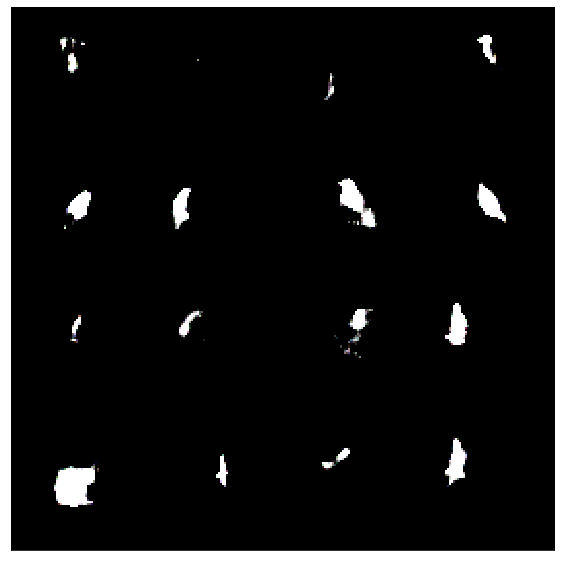

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


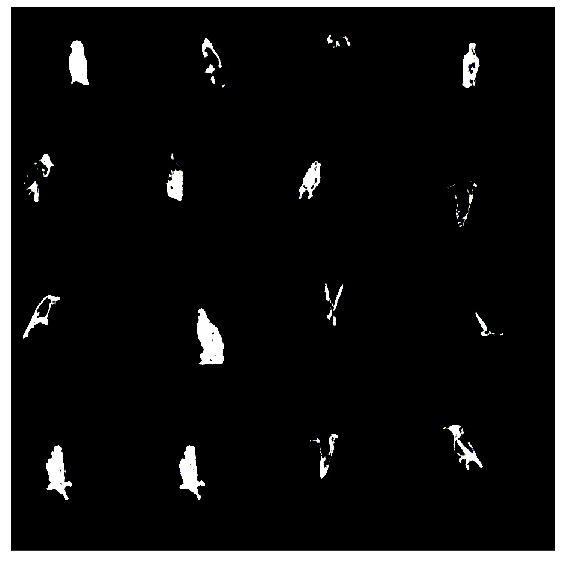

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 2


  0%|                                                                             | 1/17500 [00:14<72:36:16, 14.94s/it]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.028331
IOU : 0.050872802734375
IOU : 0.050872802734375


  0%|▏                                                                            | 49/17500 [00:17<1:17:02,  3.78it/s]

Train Epoch: 2 [200/280000 (0%)]	Loss: 0.039852
IOU : 0.050018310546875


  1%|▍                                                                             | 104/17500 [00:20<16:53, 17.16it/s]

Train Epoch: 2 [400/280000 (1%)]	Loss: 0.042241
IOU : 0.0583953857421875
IOU : 0.0583953857421875


  1%|▋                                                                             | 151/17500 [00:23<18:52, 15.31it/s]

Train Epoch: 2 [600/280000 (1%)]	Loss: 0.037773
IOU : 0.0541839599609375


  1%|▉                                                                             | 199/17500 [00:26<17:14, 16.72it/s]

Train Epoch: 2 [800/280000 (1%)]	Loss: 0.030144
IOU : 0.052276611328125
IOU : 0.052276611328125


  1%|█▏                                                                            | 254/17500 [00:30<22:01, 13.05it/s]

Train Epoch: 2 [1000/280000 (1%)]	Loss: 0.036840
IOU : 0.0563507080078125


  2%|█▎                                                                            | 299/17500 [00:33<16:51, 17.00it/s]

Train Epoch: 2 [1200/280000 (2%)]	Loss: 0.056462
IOU : 0.060943603515625
IOU : 0.060943603515625


  2%|█▌                                                                            | 351/17500 [00:36<22:25, 12.74it/s]

Train Epoch: 2 [1400/280000 (2%)]	Loss: 0.034438
IOU : 0.0572052001953125


  2%|█▊                                                                            | 403/17500 [00:39<18:10, 15.68it/s]

Train Epoch: 2 [1600/280000 (2%)]	Loss: 0.031021
IOU : 0.0510406494140625
IOU : 0.0510406494140625


  3%|██                                                                            | 454/17500 [00:42<16:55, 16.79it/s]

Train Epoch: 2 [1800/280000 (3%)]	Loss: 0.035325
IOU : 0.04962158203125


  3%|██▏                                                                           | 503/17500 [00:46<17:44, 15.97it/s]

Train Epoch: 2 [2000/280000 (3%)]	Loss: 0.037181
IOU : 0.05731201171875
IOU : 0.05731201171875


  3%|██▍                                                                           | 549/17500 [00:48<16:44, 16.88it/s]

Train Epoch: 2 [2200/280000 (3%)]	Loss: 0.034059
IOU : 0.0491485595703125


  3%|██▋                                                                           | 601/17500 [00:52<18:14, 15.44it/s]

Train Epoch: 2 [2400/280000 (3%)]	Loss: 0.030520
IOU : 0.047271728515625
IOU : 0.047271728515625


  4%|██▉                                                                           | 649/17500 [00:55<17:27, 16.09it/s]

Train Epoch: 2 [2600/280000 (4%)]	Loss: 0.041565
IOU : 0.053863525390625


  4%|███                                                                           | 701/17500 [00:58<18:55, 14.80it/s]

Train Epoch: 2 [2800/280000 (4%)]	Loss: 0.041273
IOU : 0.05291748046875
IOU : 0.05291748046875


  4%|███▎                                                                          | 753/17500 [01:01<16:53, 16.52it/s]

Train Epoch: 2 [3000/280000 (4%)]	Loss: 0.040840
IOU : 0.0553131103515625


  5%|███▌                                                                          | 801/17500 [01:04<19:38, 14.17it/s]

Train Epoch: 2 [3200/280000 (5%)]	Loss: 0.035209
IOU : 0.0457611083984375
IOU : 0.0457611083984375


  5%|███▊                                                                          | 849/17500 [01:07<17:27, 15.90it/s]

Train Epoch: 2 [3400/280000 (5%)]	Loss: 0.032636
IOU : 0.0563507080078125


  5%|████                                                                          | 901/17500 [01:10<17:00, 16.27it/s]

Train Epoch: 2 [3600/280000 (5%)]	Loss: 0.047726
IOU : 0.0469207763671875
IOU : 0.0469207763671875


  5%|████▏                                                                         | 952/17500 [01:13<16:14, 16.98it/s]

Train Epoch: 2 [3800/280000 (5%)]	Loss: 0.027993
IOU : 0.0499420166015625


  6%|████▍                                                                        | 1001/17500 [01:16<17:08, 16.04it/s]

Train Epoch: 2 [4000/280000 (6%)]	Loss: 0.028474
IOU : 0.0512237548828125
IOU : 0.0512237548828125


  6%|████▋                                                                        | 1053/17500 [01:20<17:46, 15.42it/s]

Train Epoch: 2 [4200/280000 (6%)]	Loss: 0.037920
IOU : 0.0505218505859375


  6%|████▊                                                                        | 1103/17500 [01:23<17:51, 15.30it/s]

Train Epoch: 2 [4400/280000 (6%)]	Loss: 0.052543
IOU : 0.0520477294921875
IOU : 0.0520477294921875


  7%|█████                                                                        | 1149/17500 [01:26<19:04, 14.29it/s]

Train Epoch: 2 [4600/280000 (7%)]	Loss: 0.039125
IOU : 0.0473785400390625


  7%|█████▎                                                                       | 1201/17500 [01:29<17:25, 15.58it/s]

Train Epoch: 2 [4800/280000 (7%)]	Loss: 0.041424
IOU : 0.05609130859375
IOU : 0.05609130859375


  7%|█████▌                                                                       | 1253/17500 [01:32<17:15, 15.69it/s]

Train Epoch: 2 [5000/280000 (7%)]	Loss: 0.034732
IOU : 0.0494384765625


  7%|█████▋                                                                       | 1301/17500 [01:35<18:23, 14.68it/s]

Train Epoch: 2 [5200/280000 (7%)]	Loss: 0.032528
IOU : 0.0495147705078125
IOU : 0.0495147705078125


  8%|█████▉                                                                       | 1353/17500 [01:38<18:19, 14.69it/s]

Train Epoch: 2 [5400/280000 (8%)]	Loss: 0.046694
IOU : 0.057281494140625


  8%|██████▏                                                                      | 1403/17500 [01:42<16:34, 16.19it/s]

Train Epoch: 2 [5600/280000 (8%)]	Loss: 0.047534
IOU : 0.0537567138671875
IOU : 0.0537567138671875


  8%|██████▍                                                                      | 1453/17500 [01:45<18:42, 14.29it/s]

Train Epoch: 2 [5800/280000 (8%)]	Loss: 0.040217
IOU : 0.05792236328125


  9%|██████▌                                                                      | 1502/17500 [01:48<18:42, 14.25it/s]

Train Epoch: 2 [6000/280000 (9%)]	Loss: 0.031814
IOU : 0.04339599609375
IOU : 0.04339599609375


  9%|██████▊                                                                      | 1554/17500 [01:51<16:34, 16.03it/s]

Train Epoch: 2 [6200/280000 (9%)]	Loss: 0.037215
IOU : 0.0627288818359375


  9%|███████                                                                      | 1601/17500 [01:55<18:09, 14.59it/s]

Train Epoch: 2 [6400/280000 (9%)]	Loss: 0.042205
IOU : 0.057159423828125
IOU : 0.057159423828125


  9%|███████▎                                                                     | 1652/17500 [01:58<14:24, 18.34it/s]

Train Epoch: 2 [6600/280000 (9%)]	Loss: 0.033340
IOU : 0.0483856201171875


 10%|███████▍                                                                     | 1701/17500 [02:01<17:23, 15.14it/s]

Train Epoch: 2 [6800/280000 (10%)]	Loss: 0.047255
IOU : 0.0494384765625
IOU : 0.0494384765625


 10%|███████▋                                                                     | 1749/17500 [02:04<17:32, 14.97it/s]

Train Epoch: 2 [7000/280000 (10%)]	Loss: 0.063649
IOU : 0.055938720703125


 10%|███████▉                                                                     | 1802/17500 [02:08<18:07, 14.43it/s]

Train Epoch: 2 [7200/280000 (10%)]	Loss: 0.047881
IOU : 0.05963134765625
IOU : 0.05963134765625


 11%|████████▏                                                                    | 1852/17500 [02:11<17:10, 15.19it/s]

Train Epoch: 2 [7400/280000 (11%)]	Loss: 0.041639
IOU : 0.0554962158203125


 11%|████████▎                                                                    | 1903/17500 [02:14<15:38, 16.63it/s]

Train Epoch: 2 [7600/280000 (11%)]	Loss: 0.050122
IOU : 0.0490875244140625
IOU : 0.0490875244140625


 11%|████████▌                                                                    | 1954/17500 [02:17<15:33, 16.65it/s]

Train Epoch: 2 [7800/280000 (11%)]	Loss: 0.034650
IOU : 0.0512847900390625


 11%|████████▊                                                                    | 2000/17500 [02:20<17:44, 14.56it/s]

Train Epoch: 2 [8000/280000 (11%)]	Loss: 0.043317
IOU : 0.05767822265625
IOU : 0.05767822265625


 12%|█████████                                                                    | 2052/17500 [02:23<16:35, 15.51it/s]

Train Epoch: 2 [8200/280000 (12%)]	Loss: 0.034018
IOU : 0.048065185546875


 12%|█████████▏                                                                   | 2099/17500 [02:27<18:24, 13.94it/s]

Train Epoch: 2 [8400/280000 (12%)]	Loss: 0.036003
IOU : 0.0544586181640625
IOU : 0.0544586181640625


 12%|█████████▍                                                                   | 2154/17500 [02:30<15:08, 16.90it/s]

Train Epoch: 2 [8600/280000 (12%)]	Loss: 0.039470
IOU : 0.04742431640625


 13%|█████████▋                                                                   | 2199/17500 [02:33<19:01, 13.40it/s]

Train Epoch: 2 [8800/280000 (13%)]	Loss: 0.029484
IOU : 0.049957275390625
IOU : 0.049957275390625


 13%|█████████▉                                                                   | 2251/17500 [02:37<16:21, 15.53it/s]

Train Epoch: 2 [9000/280000 (13%)]	Loss: 0.033465
IOU : 0.0543060302734375


 13%|██████████                                                                   | 2299/17500 [02:40<16:11, 15.64it/s]

Train Epoch: 2 [9200/280000 (13%)]	Loss: 0.060359
IOU : 0.07061767578125
IOU : 0.07061767578125


 13%|██████████▎                                                                  | 2351/17500 [02:43<17:00, 14.85it/s]

Train Epoch: 2 [9400/280000 (13%)]	Loss: 0.029895
IOU : 0.0458831787109375


 14%|██████████▌                                                                  | 2399/17500 [02:46<15:52, 15.85it/s]

Train Epoch: 2 [9600/280000 (14%)]	Loss: 0.042521
IOU : 0.050323486328125
IOU : 0.050323486328125


 14%|██████████▊                                                                  | 2451/17500 [02:49<15:48, 15.86it/s]

Train Epoch: 2 [9800/280000 (14%)]	Loss: 0.034633
IOU : 0.047119140625


 14%|██████████▉                                                                  | 2499/17500 [02:52<16:28, 15.18it/s]

Train Epoch: 2 [10000/280000 (14%)]	Loss: 0.040796
IOU : 0.0562286376953125
IOU : 0.0562286376953125


 15%|███████████▏                                                                 | 2551/17500 [02:55<17:18, 14.40it/s]

Train Epoch: 2 [10200/280000 (15%)]	Loss: 0.038401
IOU : 0.0458221435546875


 15%|███████████▍                                                                 | 2603/17500 [02:59<15:21, 16.17it/s]

Train Epoch: 2 [10400/280000 (15%)]	Loss: 0.031265
IOU : 0.0542449951171875
IOU : 0.0542449951171875


 15%|███████████▋                                                                 | 2653/17500 [03:02<15:30, 15.95it/s]

Train Epoch: 2 [10600/280000 (15%)]	Loss: 0.036554
IOU : 0.0475921630859375


 15%|███████████▉                                                                 | 2701/17500 [03:05<16:37, 14.84it/s]

Train Epoch: 2 [10800/280000 (15%)]	Loss: 0.030649
IOU : 0.0542144775390625
IOU : 0.0542144775390625


 16%|████████████                                                                 | 2753/17500 [03:08<15:32, 15.82it/s]

Train Epoch: 2 [11000/280000 (16%)]	Loss: 0.034511
IOU : 0.0518341064453125


 16%|████████████▎                                                                | 2803/17500 [03:11<16:06, 15.21it/s]

Train Epoch: 2 [11200/280000 (16%)]	Loss: 0.040381
IOU : 0.0567169189453125
IOU : 0.0567169189453125


 16%|████████████▌                                                                | 2854/17500 [03:15<15:10, 16.09it/s]

Train Epoch: 2 [11400/280000 (16%)]	Loss: 0.038156
IOU : 0.047943115234375


 17%|████████████▊                                                                | 2902/17500 [03:18<16:12, 15.02it/s]

Train Epoch: 2 [11600/280000 (17%)]	Loss: 0.026243
IOU : 0.045166015625
IOU : 0.045166015625


 17%|████████████▉                                                                | 2950/17500 [03:21<16:01, 15.13it/s]

Train Epoch: 2 [11800/280000 (17%)]	Loss: 0.031437
IOU : 0.0535888671875


 17%|█████████████▏                                                               | 3002/17500 [03:24<16:15, 14.87it/s]

Train Epoch: 2 [12000/280000 (17%)]	Loss: 0.033868
IOU : 0.0529327392578125
IOU : 0.0529327392578125


 17%|█████████████▍                                                               | 3054/17500 [03:27<15:09, 15.88it/s]

Train Epoch: 2 [12200/280000 (17%)]	Loss: 0.030490
IOU : 0.0557861328125


 18%|█████████████▋                                                               | 3103/17500 [03:30<15:28, 15.50it/s]

Train Epoch: 2 [12400/280000 (18%)]	Loss: 0.031286
IOU : 0.05487060546875
IOU : 0.05487060546875


 18%|█████████████▉                                                               | 3154/17500 [03:33<14:55, 16.01it/s]

Train Epoch: 2 [12600/280000 (18%)]	Loss: 0.033999
IOU : 0.0534820556640625


 18%|██████████████                                                               | 3203/17500 [03:36<16:08, 14.77it/s]

Train Epoch: 2 [12800/280000 (18%)]	Loss: 0.030112
IOU : 0.0572662353515625
IOU : 0.0572662353515625


 19%|██████████████▎                                                              | 3252/17500 [03:39<16:17, 14.58it/s]

Train Epoch: 2 [13000/280000 (19%)]	Loss: 0.045390
IOU : 0.059600830078125


 19%|██████████████▌                                                              | 3303/17500 [03:42<15:04, 15.70it/s]

Train Epoch: 2 [13200/280000 (19%)]	Loss: 0.047756
IOU : 0.0541839599609375
IOU : 0.0541839599609375


 19%|██████████████▋                                                              | 3351/17500 [03:45<14:34, 16.18it/s]

Train Epoch: 2 [13400/280000 (19%)]	Loss: 0.036956
IOU : 0.055084228515625


 19%|██████████████▉                                                              | 3403/17500 [03:49<14:29, 16.22it/s]

Train Epoch: 2 [13600/280000 (19%)]	Loss: 0.030954
IOU : 0.05902099609375
IOU : 0.05902099609375


 20%|███████████████▏                                                             | 3451/17500 [03:52<14:29, 16.16it/s]

Train Epoch: 2 [13800/280000 (20%)]	Loss: 0.032893
IOU : 0.045684814453125


 20%|███████████████▍                                                             | 3499/17500 [03:55<14:25, 16.18it/s]

Train Epoch: 2 [14000/280000 (20%)]	Loss: 0.038607
IOU : 0.05743408203125
IOU : 0.05743408203125


 20%|███████████████▋                                                             | 3553/17500 [03:58<13:19, 17.44it/s]

Train Epoch: 2 [14200/280000 (20%)]	Loss: 0.054059
IOU : 0.0584869384765625


 21%|███████████████▊                                                             | 3599/17500 [04:01<14:27, 16.03it/s]

Train Epoch: 2 [14400/280000 (21%)]	Loss: 0.047024
IOU : 0.050140380859375
IOU : 0.050140380859375


 21%|████████████████                                                             | 3651/17500 [04:04<14:41, 15.71it/s]

Train Epoch: 2 [14600/280000 (21%)]	Loss: 0.027651
IOU : 0.043426513671875


 21%|████████████████▎                                                            | 3699/17500 [04:07<14:33, 15.80it/s]

Train Epoch: 2 [14800/280000 (21%)]	Loss: 0.032060
IOU : 0.053314208984375
IOU : 0.053314208984375


 21%|████████████████▌                                                            | 3751/17500 [04:11<14:17, 16.03it/s]

Train Epoch: 2 [15000/280000 (21%)]	Loss: 0.054765
IOU : 0.061431884765625


 22%|████████████████▋                                                            | 3803/17500 [04:14<13:44, 16.62it/s]

Train Epoch: 2 [15200/280000 (22%)]	Loss: 0.050265
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 22%|████████████████▉                                                            | 3851/17500 [04:17<14:23, 15.81it/s]

Train Epoch: 2 [15400/280000 (22%)]	Loss: 0.034881
IOU : 0.0487823486328125


 22%|█████████████████▏                                                           | 3899/17500 [04:20<14:03, 16.13it/s]

Train Epoch: 2 [15600/280000 (22%)]	Loss: 0.034657
IOU : 0.04974365234375
IOU : 0.04974365234375


 23%|█████████████████▍                                                           | 3951/17500 [04:23<13:38, 16.54it/s]

Train Epoch: 2 [15800/280000 (23%)]	Loss: 0.049364
IOU : 0.0605010986328125


 23%|█████████████████▌                                                           | 4002/17500 [04:26<12:39, 17.78it/s]

Train Epoch: 2 [16000/280000 (23%)]	Loss: 0.039159
IOU : 0.0457611083984375
IOU : 0.0457611083984375


 23%|█████████████████▊                                                           | 4051/17500 [04:29<14:16, 15.71it/s]

Train Epoch: 2 [16200/280000 (23%)]	Loss: 0.045886
IOU : 0.052154541015625


 23%|██████████████████                                                           | 4100/17500 [04:32<15:11, 14.70it/s]

Train Epoch: 2 [16400/280000 (23%)]	Loss: 0.054375
IOU : 0.05242919921875
IOU : 0.05242919921875


 24%|██████████████████▎                                                          | 4151/17500 [04:36<14:08, 15.73it/s]

Train Epoch: 2 [16600/280000 (24%)]	Loss: 0.030491
IOU : 0.0476226806640625


 24%|██████████████████▍                                                          | 4199/17500 [04:39<14:29, 15.30it/s]

Train Epoch: 2 [16800/280000 (24%)]	Loss: 0.036995
IOU : 0.048431396484375
IOU : 0.048431396484375


 24%|██████████████████▋                                                          | 4251/17500 [04:42<14:22, 15.36it/s]

Train Epoch: 2 [17000/280000 (24%)]	Loss: 0.047198
IOU : 0.0601959228515625


 25%|██████████████████▉                                                          | 4299/17500 [04:45<13:31, 16.27it/s]

Train Epoch: 2 [17200/280000 (25%)]	Loss: 0.044879
IOU : 0.0534210205078125
IOU : 0.0534210205078125


 25%|███████████████████▏                                                         | 4351/17500 [04:48<13:51, 15.81it/s]

Train Epoch: 2 [17400/280000 (25%)]	Loss: 0.035548
IOU : 0.0487823486328125


 25%|███████████████████▎                                                         | 4403/17500 [04:51<13:10, 16.58it/s]

Train Epoch: 2 [17600/280000 (25%)]	Loss: 0.038253
IOU : 0.05352783203125
IOU : 0.05352783203125


 25%|███████████████████▌                                                         | 4451/17500 [04:54<14:29, 15.01it/s]

Train Epoch: 2 [17800/280000 (25%)]	Loss: 0.058636
IOU : 0.059295654296875


 26%|███████████████████▊                                                         | 4499/17500 [04:57<13:37, 15.91it/s]

Train Epoch: 2 [18000/280000 (26%)]	Loss: 0.034180
IOU : 0.0500030517578125
IOU : 0.0500030517578125


 26%|████████████████████                                                         | 4551/17500 [05:01<13:25, 16.09it/s]

Train Epoch: 2 [18200/280000 (26%)]	Loss: 0.057671
IOU : 0.0561676025390625


 26%|████████████████████▏                                                        | 4599/17500 [05:04<13:39, 15.75it/s]

Train Epoch: 2 [18400/280000 (26%)]	Loss: 0.049023
IOU : 0.0567779541015625
IOU : 0.0567779541015625


 27%|████████████████████▍                                                        | 4651/17500 [05:07<13:42, 15.61it/s]

Train Epoch: 2 [18600/280000 (27%)]	Loss: 0.038565
IOU : 0.0554351806640625


 27%|████████████████████▋                                                        | 4699/17500 [05:10<12:52, 16.58it/s]

Train Epoch: 2 [18800/280000 (27%)]	Loss: 0.037392
IOU : 0.0500946044921875
IOU : 0.0500946044921875


 27%|████████████████████▉                                                        | 4753/17500 [05:13<13:27, 15.78it/s]

Train Epoch: 2 [19000/280000 (27%)]	Loss: 0.034156
IOU : 0.0484619140625


 27%|█████████████████████                                                        | 4801/17500 [05:16<14:42, 14.39it/s]

Train Epoch: 2 [19200/280000 (27%)]	Loss: 0.057240
IOU : 0.0548095703125
IOU : 0.0548095703125


 28%|█████████████████████▎                                                       | 4849/17500 [05:19<13:02, 16.16it/s]

Train Epoch: 2 [19400/280000 (28%)]	Loss: 0.038352
IOU : 0.0530548095703125


 28%|█████████████████████▌                                                       | 4901/17500 [05:23<14:43, 14.26it/s]

Train Epoch: 2 [19600/280000 (28%)]	Loss: 0.038707
IOU : 0.053009033203125
IOU : 0.053009033203125


 28%|█████████████████████▊                                                       | 4953/17500 [05:26<13:35, 15.38it/s]

Train Epoch: 2 [19800/280000 (28%)]	Loss: 0.048875
IOU : 0.0539093017578125


 29%|█████████████████████▉                                                       | 4999/17500 [05:29<13:52, 15.01it/s]

Train Epoch: 2 [20000/280000 (29%)]	Loss: 0.036195
IOU : 0.0540008544921875
IOU : 0.0540008544921875


 29%|██████████████████████▏                                                      | 5052/17500 [05:32<13:14, 15.66it/s]

Train Epoch: 2 [20200/280000 (29%)]	Loss: 0.029229
IOU : 0.0513916015625


 29%|██████████████████████▍                                                      | 5102/17500 [05:35<11:39, 17.72it/s]

Train Epoch: 2 [20400/280000 (29%)]	Loss: 0.044110
IOU : 0.053985595703125
IOU : 0.053985595703125


 29%|██████████████████████▋                                                      | 5151/17500 [05:38<13:24, 15.34it/s]

Train Epoch: 2 [20600/280000 (29%)]	Loss: 0.036879
IOU : 0.0473785400390625


 30%|██████████████████████▉                                                      | 5203/17500 [05:41<12:29, 16.40it/s]

Train Epoch: 2 [20800/280000 (30%)]	Loss: 0.041851
IOU : 0.0603179931640625
IOU : 0.0603179931640625


 30%|███████████████████████                                                      | 5254/17500 [05:45<11:07, 18.35it/s]

Train Epoch: 2 [21000/280000 (30%)]	Loss: 0.033498
IOU : 0.05279541015625


 30%|███████████████████████▎                                                     | 5302/17500 [05:48<11:04, 18.35it/s]

Train Epoch: 2 [21200/280000 (30%)]	Loss: 0.046223
IOU : 0.057159423828125
IOU : 0.057159423828125


 31%|███████████████████████▌                                                     | 5351/17500 [05:51<12:55, 15.66it/s]

Train Epoch: 2 [21400/280000 (31%)]	Loss: 0.036956
IOU : 0.048126220703125


 31%|███████████████████████▊                                                     | 5399/17500 [05:54<12:35, 16.01it/s]

Train Epoch: 2 [21600/280000 (31%)]	Loss: 0.033344
IOU : 0.0507354736328125
IOU : 0.0507354736328125


 31%|███████████████████████▉                                                     | 5451/17500 [05:57<12:57, 15.49it/s]

Train Epoch: 2 [21800/280000 (31%)]	Loss: 0.046214
IOU : 0.0576171875


 31%|████████████████████████▏                                                    | 5502/17500 [06:00<11:39, 17.16it/s]

Train Epoch: 2 [22000/280000 (31%)]	Loss: 0.037040
IOU : 0.0500640869140625
IOU : 0.0500640869140625


 32%|████████████████████████▍                                                    | 5554/17500 [06:03<11:36, 17.15it/s]

Train Epoch: 2 [22200/280000 (32%)]	Loss: 0.043454
IOU : 0.0491790771484375


 32%|████████████████████████▋                                                    | 5599/17500 [06:06<11:57, 16.60it/s]

Train Epoch: 2 [22400/280000 (32%)]	Loss: 0.039787
IOU : 0.0579681396484375
IOU : 0.0579681396484375


 32%|████████████████████████▉                                                    | 5654/17500 [06:10<11:52, 16.63it/s]

Train Epoch: 2 [22600/280000 (32%)]	Loss: 0.039326
IOU : 0.0558013916015625


 33%|█████████████████████████                                                    | 5702/17500 [06:13<13:07, 14.97it/s]

Train Epoch: 2 [22800/280000 (33%)]	Loss: 0.032360
IOU : 0.0540618896484375
IOU : 0.0540618896484375


 33%|█████████████████████████▎                                                   | 5753/17500 [06:16<11:18, 17.32it/s]

Train Epoch: 2 [23000/280000 (33%)]	Loss: 0.034559
IOU : 0.051513671875


 33%|█████████████████████████▌                                                   | 5802/17500 [06:19<12:52, 15.13it/s]

Train Epoch: 2 [23200/280000 (33%)]	Loss: 0.029746
IOU : 0.049407958984375
IOU : 0.049407958984375


 33%|█████████████████████████▋                                                   | 5852/17500 [06:22<12:09, 15.96it/s]

Train Epoch: 2 [23400/280000 (33%)]	Loss: 0.048381
IOU : 0.051483154296875


 34%|█████████████████████████▉                                                   | 5901/17500 [06:25<10:50, 17.83it/s]

Train Epoch: 2 [23600/280000 (34%)]	Loss: 0.048703
IOU : 0.05914306640625
IOU : 0.05914306640625


 34%|██████████████████████████▏                                                  | 5952/17500 [06:28<11:58, 16.08it/s]

Train Epoch: 2 [23800/280000 (34%)]	Loss: 0.035955
IOU : 0.05474853515625


 34%|██████████████████████████▍                                                  | 6001/17500 [06:31<11:58, 16.00it/s]

Train Epoch: 2 [24000/280000 (34%)]	Loss: 0.040702
IOU : 0.0663299560546875
IOU : 0.0663299560546875


 35%|██████████████████████████▋                                                  | 6054/17500 [06:35<13:16, 14.38it/s]

Train Epoch: 2 [24200/280000 (35%)]	Loss: 0.033867
IOU : 0.0517730712890625


 35%|██████████████████████████▊                                                  | 6102/17500 [06:38<12:17, 15.46it/s]

Train Epoch: 2 [24400/280000 (35%)]	Loss: 0.037311
IOU : 0.055511474609375
IOU : 0.055511474609375


 35%|███████████████████████████                                                  | 6150/17500 [06:41<13:17, 14.23it/s]

Train Epoch: 2 [24600/280000 (35%)]	Loss: 0.040278
IOU : 0.055450439453125


 35%|███████████████████████████▎                                                 | 6202/17500 [06:44<11:38, 16.18it/s]

Train Epoch: 2 [24800/280000 (35%)]	Loss: 0.039356
IOU : 0.0489654541015625
IOU : 0.0489654541015625


 36%|███████████████████████████▌                                                 | 6250/17500 [06:47<12:07, 15.46it/s]

Train Epoch: 2 [25000/280000 (36%)]	Loss: 0.040476
IOU : 0.054107666015625


 36%|███████████████████████████▋                                                 | 6298/17500 [06:50<11:15, 16.59it/s]

Train Epoch: 2 [25200/280000 (36%)]	Loss: 0.044446
IOU : 0.049530029296875
IOU : 0.049530029296875


 36%|███████████████████████████▉                                                 | 6350/17500 [06:54<11:29, 16.16it/s]

Train Epoch: 2 [25400/280000 (36%)]	Loss: 0.038654
IOU : 0.0516815185546875


 37%|████████████████████████████▏                                                | 6402/17500 [06:57<11:01, 16.79it/s]

Train Epoch: 2 [25600/280000 (37%)]	Loss: 0.039119
IOU : 0.04931640625
IOU : 0.04931640625


 37%|████████████████████████████▍                                                | 6450/17500 [07:00<11:10, 16.49it/s]

Train Epoch: 2 [25800/280000 (37%)]	Loss: 0.046986
IOU : 0.0554962158203125


 37%|████████████████████████████▌                                                | 6500/17500 [07:03<10:05, 18.17it/s]

Train Epoch: 2 [26000/280000 (37%)]	Loss: 0.033116
IOU : 0.0480499267578125
IOU : 0.0480499267578125


 37%|████████████████████████████▊                                                | 6553/17500 [07:06<10:15, 17.80it/s]

Train Epoch: 2 [26200/280000 (37%)]	Loss: 0.028632
IOU : 0.04644775390625


 38%|█████████████████████████████                                                | 6602/17500 [07:09<11:31, 15.75it/s]

Train Epoch: 2 [26400/280000 (38%)]	Loss: 0.033224
IOU : 0.04541015625
IOU : 0.04541015625


 38%|█████████████████████████████▎                                               | 6654/17500 [07:13<11:03, 16.35it/s]

Train Epoch: 2 [26600/280000 (38%)]	Loss: 0.033328
IOU : 0.053955078125


 38%|█████████████████████████████▍                                               | 6702/17500 [07:16<10:35, 17.00it/s]

Train Epoch: 2 [26800/280000 (38%)]	Loss: 0.033193
IOU : 0.05419921875
IOU : 0.05419921875


 39%|█████████████████████████████▋                                               | 6753/17500 [07:19<10:42, 16.74it/s]

Train Epoch: 2 [27000/280000 (39%)]	Loss: 0.034342
IOU : 0.053466796875


 39%|█████████████████████████████▉                                               | 6802/17500 [07:22<10:42, 16.64it/s]

Train Epoch: 2 [27200/280000 (39%)]	Loss: 0.034759
IOU : 0.049102783203125
IOU : 0.049102783203125


 39%|██████████████████████████████▏                                              | 6854/17500 [07:25<11:48, 15.02it/s]

Train Epoch: 2 [27400/280000 (39%)]	Loss: 0.038894
IOU : 0.0506591796875


 39%|██████████████████████████████▎                                              | 6902/17500 [07:28<12:09, 14.54it/s]

Train Epoch: 2 [27600/280000 (39%)]	Loss: 0.041550
IOU : 0.0511322021484375
IOU : 0.0511322021484375


 40%|██████████████████████████████▌                                              | 6950/17500 [07:31<11:04, 15.88it/s]

Train Epoch: 2 [27800/280000 (40%)]	Loss: 0.040464
IOU : 0.053558349609375


 40%|██████████████████████████████▊                                              | 7001/17500 [07:34<09:22, 18.66it/s]

Train Epoch: 2 [28000/280000 (40%)]	Loss: 0.031828
IOU : 0.0557098388671875
IOU : 0.0557098388671875


 40%|███████████████████████████████                                              | 7053/17500 [07:38<10:39, 16.35it/s]

Train Epoch: 2 [28200/280000 (40%)]	Loss: 0.028214
IOU : 0.0491180419921875


 41%|███████████████████████████████▎                                             | 7103/17500 [07:41<11:44, 14.75it/s]

Train Epoch: 2 [28400/280000 (41%)]	Loss: 0.048352
IOU : 0.0547637939453125
IOU : 0.0547637939453125


 41%|███████████████████████████████▍                                             | 7150/17500 [07:44<11:32, 14.94it/s]

Train Epoch: 2 [28600/280000 (41%)]	Loss: 0.036036
IOU : 0.057098388671875


 41%|███████████████████████████████▋                                             | 7203/17500 [07:47<10:37, 16.14it/s]

Train Epoch: 2 [28800/280000 (41%)]	Loss: 0.042103
IOU : 0.053955078125
IOU : 0.053955078125


 41%|███████████████████████████████▉                                             | 7250/17500 [07:50<10:33, 16.19it/s]

Train Epoch: 2 [29000/280000 (41%)]	Loss: 0.038660
IOU : 0.0474853515625


 42%|████████████████████████████████                                             | 7298/17500 [07:53<10:52, 15.65it/s]

Train Epoch: 2 [29200/280000 (42%)]	Loss: 0.032664
IOU : 0.0511627197265625
IOU : 0.0511627197265625


 42%|████████████████████████████████▎                                            | 7350/17500 [07:57<12:05, 13.99it/s]

Train Epoch: 2 [29400/280000 (42%)]	Loss: 0.028942
IOU : 0.0445404052734375


 42%|████████████████████████████████▌                                            | 7398/17500 [08:00<10:20, 16.29it/s]

Train Epoch: 2 [29600/280000 (42%)]	Loss: 0.031775
IOU : 0.0489959716796875
IOU : 0.0489959716796875


 43%|████████████████████████████████▊                                            | 7450/17500 [08:03<10:46, 15.55it/s]

Train Epoch: 2 [29800/280000 (43%)]	Loss: 0.038578
IOU : 0.0499725341796875


 43%|█████████████████████████████████                                            | 7503/17500 [08:06<09:56, 16.75it/s]

Train Epoch: 2 [30000/280000 (43%)]	Loss: 0.039009
IOU : 0.0552520751953125
IOU : 0.0552520751953125


 43%|█████████████████████████████████▏                                           | 7553/17500 [08:10<09:28, 17.49it/s]

Train Epoch: 2 [30200/280000 (43%)]	Loss: 0.025384
IOU : 0.0458984375


 43%|█████████████████████████████████▍                                           | 7602/17500 [08:13<11:36, 14.21it/s]

Train Epoch: 2 [30400/280000 (43%)]	Loss: 0.048126
IOU : 0.052154541015625
IOU : 0.052154541015625


 44%|█████████████████████████████████▋                                           | 7651/17500 [08:16<11:29, 14.28it/s]

Train Epoch: 2 [30600/280000 (44%)]	Loss: 0.053461
IOU : 0.053131103515625


 44%|█████████████████████████████████▉                                           | 7701/17500 [08:19<09:56, 16.42it/s]

Train Epoch: 2 [30800/280000 (44%)]	Loss: 0.046534
IOU : 0.0496063232421875
IOU : 0.0496063232421875


 44%|██████████████████████████████████                                           | 7754/17500 [08:23<10:19, 15.74it/s]

Train Epoch: 2 [31000/280000 (44%)]	Loss: 0.040741
IOU : 0.0497894287109375


 45%|██████████████████████████████████▎                                          | 7802/17500 [08:25<09:02, 17.86it/s]

Train Epoch: 2 [31200/280000 (45%)]	Loss: 0.034704
IOU : 0.056427001953125
IOU : 0.056427001953125


 45%|██████████████████████████████████▌                                          | 7854/17500 [08:29<10:20, 15.54it/s]

Train Epoch: 2 [31400/280000 (45%)]	Loss: 0.042798
IOU : 0.0513916015625


 45%|██████████████████████████████████▊                                          | 7901/17500 [08:32<11:05, 14.43it/s]

Train Epoch: 2 [31600/280000 (45%)]	Loss: 0.039050
IOU : 0.0491180419921875
IOU : 0.0491180419921875


 45%|██████████████████████████████████▉                                          | 7953/17500 [08:35<10:06, 15.74it/s]

Train Epoch: 2 [31800/280000 (45%)]	Loss: 0.039747
IOU : 0.0530242919921875


 46%|███████████████████████████████████▏                                         | 8003/17500 [08:38<10:39, 14.84it/s]

Train Epoch: 2 [32000/280000 (46%)]	Loss: 0.048174
IOU : 0.0574493408203125
IOU : 0.0574493408203125


 46%|███████████████████████████████████▍                                         | 8051/17500 [08:42<11:10, 14.10it/s]

Train Epoch: 2 [32200/280000 (46%)]	Loss: 0.029540
IOU : 0.044219970703125


 46%|███████████████████████████████████▋                                         | 8099/17500 [08:45<12:00, 13.04it/s]

Train Epoch: 2 [32400/280000 (46%)]	Loss: 0.037010
IOU : 0.0498046875
IOU : 0.0498046875


 47%|███████████████████████████████████▊                                         | 8151/17500 [08:48<10:39, 14.62it/s]

Train Epoch: 2 [32600/280000 (47%)]	Loss: 0.032780
IOU : 0.047149658203125


 47%|████████████████████████████████████                                         | 8199/17500 [08:51<10:36, 14.62it/s]

Train Epoch: 2 [32800/280000 (47%)]	Loss: 0.038335
IOU : 0.047119140625
IOU : 0.047119140625


 47%|████████████████████████████████████▎                                        | 8251/17500 [08:55<10:01, 15.37it/s]

Train Epoch: 2 [33000/280000 (47%)]	Loss: 0.035425
IOU : 0.049560546875


 47%|████████████████████████████████████▌                                        | 8299/17500 [08:58<10:01, 15.29it/s]

Train Epoch: 2 [33200/280000 (47%)]	Loss: 0.048359
IOU : 0.062469482421875
IOU : 0.062469482421875


 48%|████████████████████████████████████▋                                        | 8351/17500 [09:01<09:53, 15.41it/s]

Train Epoch: 2 [33400/280000 (48%)]	Loss: 0.032047
IOU : 0.0443878173828125


 48%|████████████████████████████████████▉                                        | 8399/17500 [09:04<10:14, 14.80it/s]

Train Epoch: 2 [33600/280000 (48%)]	Loss: 0.041681
IOU : 0.05230712890625
IOU : 0.05230712890625


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:07<09:31, 15.85it/s]

Train Epoch: 2 [33800/280000 (48%)]	Loss: 0.050187
IOU : 0.055755615234375


 49%|█████████████████████████████████████▍                                       | 8499/17500 [09:10<09:34, 15.67it/s]

Train Epoch: 2 [34000/280000 (49%)]	Loss: 0.032329
IOU : 0.0547943115234375
IOU : 0.0547943115234375


 49%|█████████████████████████████████████▌                                       | 8551/17500 [09:14<09:49, 15.17it/s]

Train Epoch: 2 [34200/280000 (49%)]	Loss: 0.032032
IOU : 0.0533905029296875


 49%|█████████████████████████████████████▊                                       | 8599/17500 [09:17<09:03, 16.39it/s]

Train Epoch: 2 [34400/280000 (49%)]	Loss: 0.036074
IOU : 0.0505218505859375
IOU : 0.0505218505859375


 49%|██████████████████████████████████████                                       | 8652/17500 [09:20<10:40, 13.80it/s]

Train Epoch: 2 [34600/280000 (49%)]	Loss: 0.041557
IOU : 0.0528106689453125


 50%|██████████████████████████████████████▎                                      | 8699/17500 [09:23<09:21, 15.67it/s]

Train Epoch: 2 [34800/280000 (50%)]	Loss: 0.033866
IOU : 0.05401611328125
IOU : 0.05401611328125


 50%|██████████████████████████████████████▌                                      | 8751/17500 [09:26<08:48, 16.57it/s]

Train Epoch: 2 [35000/280000 (50%)]	Loss: 0.034668
IOU : 0.0457305908203125


 50%|██████████████████████████████████████▋                                      | 8799/17500 [09:29<09:07, 15.88it/s]

Train Epoch: 2 [35200/280000 (50%)]	Loss: 0.036902
IOU : 0.0534515380859375
IOU : 0.0534515380859375


 51%|██████████████████████████████████████▉                                      | 8851/17500 [09:33<09:54, 14.54it/s]

Train Epoch: 2 [35400/280000 (51%)]	Loss: 0.048126
IOU : 0.059051513671875


 51%|███████████████████████████████████████▏                                     | 8899/17500 [09:36<09:11, 15.60it/s]

Train Epoch: 2 [35600/280000 (51%)]	Loss: 0.033523
IOU : 0.0554351806640625
IOU : 0.0554351806640625


 51%|███████████████████████████████████████▍                                     | 8951/17500 [09:39<08:38, 16.49it/s]

Train Epoch: 2 [35800/280000 (51%)]	Loss: 0.037058
IOU : 0.0534210205078125


 51%|███████████████████████████████████████▌                                     | 9002/17500 [09:42<08:08, 17.39it/s]

Train Epoch: 2 [36000/280000 (51%)]	Loss: 0.042903
IOU : 0.05352783203125
IOU : 0.05352783203125


 52%|███████████████████████████████████████▊                                     | 9051/17500 [09:45<08:44, 16.10it/s]

Train Epoch: 2 [36200/280000 (52%)]	Loss: 0.038761
IOU : 0.0457305908203125


 52%|████████████████████████████████████████                                     | 9103/17500 [09:48<08:51, 15.80it/s]

Train Epoch: 2 [36400/280000 (52%)]	Loss: 0.035542
IOU : 0.0538330078125
IOU : 0.0538330078125


 52%|████████████████████████████████████████▎                                    | 9153/17500 [09:51<09:22, 14.84it/s]

Train Epoch: 2 [36600/280000 (52%)]	Loss: 0.043476
IOU : 0.0544281005859375


 53%|████████████████████████████████████████▍                                    | 9201/17500 [09:54<08:41, 15.92it/s]

Train Epoch: 2 [36800/280000 (53%)]	Loss: 0.034344
IOU : 0.0552520751953125
IOU : 0.0552520751953125


 53%|████████████████████████████████████████▋                                    | 9252/17500 [09:57<10:01, 13.71it/s]

Train Epoch: 2 [37000/280000 (53%)]	Loss: 0.031358
IOU : 0.049224853515625


 53%|████████████████████████████████████████▉                                    | 9299/17500 [10:00<09:26, 14.47it/s]

Train Epoch: 2 [37200/280000 (53%)]	Loss: 0.034775
IOU : 0.0558624267578125
IOU : 0.0558624267578125


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [10:04<08:48, 15.41it/s]

Train Epoch: 2 [37400/280000 (53%)]	Loss: 0.036169
IOU : 0.0525054931640625


 54%|█████████████████████████████████████████▎                                   | 9399/17500 [10:07<08:27, 15.96it/s]

Train Epoch: 2 [37600/280000 (54%)]	Loss: 0.033207
IOU : 0.0430450439453125
IOU : 0.0430450439453125


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [10:10<08:56, 15.00it/s]

Train Epoch: 2 [37800/280000 (54%)]	Loss: 0.040880
IOU : 0.0627593994140625


 54%|█████████████████████████████████████████▊                                   | 9499/17500 [10:13<08:35, 15.53it/s]

Train Epoch: 2 [38000/280000 (54%)]	Loss: 0.078922
IOU : 0.0638580322265625
IOU : 0.0638580322265625


 55%|██████████████████████████████████████████                                   | 9551/17500 [10:16<08:51, 14.97it/s]

Train Epoch: 2 [38200/280000 (55%)]	Loss: 0.034396
IOU : 0.048797607421875


 55%|██████████████████████████████████████████▎                                  | 9603/17500 [10:19<08:28, 15.52it/s]

Train Epoch: 2 [38400/280000 (55%)]	Loss: 0.040352
IOU : 0.04937744140625
IOU : 0.04937744140625


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [10:22<08:33, 15.28it/s]

Train Epoch: 2 [38600/280000 (55%)]	Loss: 0.035357
IOU : 0.0545501708984375


 55%|██████████████████████████████████████████▋                                  | 9699/17500 [10:25<08:37, 15.06it/s]

Train Epoch: 2 [38800/280000 (55%)]	Loss: 0.040752
IOU : 0.054931640625
IOU : 0.054931640625


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [10:29<08:19, 15.52it/s]

Train Epoch: 2 [39000/280000 (56%)]	Loss: 0.036524
IOU : 0.0536346435546875


 56%|███████████████████████████████████████████                                  | 9799/17500 [10:32<08:19, 15.41it/s]

Train Epoch: 2 [39200/280000 (56%)]	Loss: 0.041978
IOU : 0.052276611328125
IOU : 0.052276611328125


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [10:35<07:52, 16.18it/s]

Train Epoch: 2 [39400/280000 (56%)]	Loss: 0.030853
IOU : 0.0518798828125


 57%|███████████████████████████████████████████▌                                 | 9900/17500 [10:38<08:46, 14.43it/s]

Train Epoch: 2 [39600/280000 (57%)]	Loss: 0.031516
IOU : 0.052337646484375
IOU : 0.052337646484375


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [10:41<08:49, 14.24it/s]

Train Epoch: 2 [39800/280000 (57%)]	Loss: 0.039479
IOU : 0.0517578125


 57%|███████████████████████████████████████████▍                                | 10002/17500 [10:45<06:47, 18.39it/s]

Train Epoch: 2 [40000/280000 (57%)]	Loss: 0.036847
IOU : 0.0496063232421875
IOU : 0.0496063232421875


 57%|███████████████████████████████████████████▋                                | 10051/17500 [10:48<08:10, 15.19it/s]

Train Epoch: 2 [40200/280000 (57%)]	Loss: 0.028234
IOU : 0.0540008544921875


 58%|███████████████████████████████████████████▊                                | 10100/17500 [10:51<08:02, 15.33it/s]

Train Epoch: 2 [40400/280000 (58%)]	Loss: 0.038734
IOU : 0.05072021484375
IOU : 0.05072021484375


 58%|████████████████████████████████████████████                                | 10151/17500 [10:54<07:53, 15.53it/s]

Train Epoch: 2 [40600/280000 (58%)]	Loss: 0.038731
IOU : 0.0551910400390625


 58%|████████████████████████████████████████████▎                               | 10199/17500 [10:57<07:50, 15.51it/s]

Train Epoch: 2 [40800/280000 (58%)]	Loss: 0.027290
IOU : 0.0475006103515625
IOU : 0.0475006103515625


 59%|████████████████████████████████████████████▌                               | 10251/17500 [11:00<08:53, 13.58it/s]

Train Epoch: 2 [41000/280000 (59%)]	Loss: 0.041361
IOU : 0.052886962890625


 59%|████████████████████████████████████████████▋                               | 10302/17500 [11:04<06:50, 17.54it/s]

Train Epoch: 2 [41200/280000 (59%)]	Loss: 0.041219
IOU : 0.049774169921875
IOU : 0.049774169921875


 59%|████████████████████████████████████████████▉                               | 10351/17500 [11:07<07:46, 15.33it/s]

Train Epoch: 2 [41400/280000 (59%)]	Loss: 0.036591
IOU : 0.0499725341796875


 59%|█████████████████████████████████████████████▏                              | 10402/17500 [11:10<06:51, 17.25it/s]

Train Epoch: 2 [41600/280000 (59%)]	Loss: 0.058701
IOU : 0.0615234375
IOU : 0.0615234375


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [11:13<07:10, 16.36it/s]

Train Epoch: 2 [41800/280000 (60%)]	Loss: 0.032018
IOU : 0.0491943359375


 60%|█████████████████████████████████████████████▌                              | 10499/17500 [11:16<07:01, 16.63it/s]

Train Epoch: 2 [42000/280000 (60%)]	Loss: 0.032070
IOU : 0.053436279296875
IOU : 0.053436279296875


 60%|█████████████████████████████████████████████▊                              | 10551/17500 [11:20<07:19, 15.80it/s]

Train Epoch: 2 [42200/280000 (60%)]	Loss: 0.030925
IOU : 0.0538177490234375


 61%|██████████████████████████████████████████████                              | 10599/17500 [11:23<07:31, 15.27it/s]

Train Epoch: 2 [42400/280000 (61%)]	Loss: 0.056393
IOU : 0.0569000244140625
IOU : 0.0569000244140625


 61%|██████████████████████████████████████████████▎                             | 10652/17500 [11:26<07:25, 15.36it/s]

Train Epoch: 2 [42600/280000 (61%)]	Loss: 0.054956
IOU : 0.053070068359375


 61%|██████████████████████████████████████████████▍                             | 10704/17500 [11:29<06:43, 16.83it/s]

Train Epoch: 2 [42800/280000 (61%)]	Loss: 0.046852
IOU : 0.0536346435546875
IOU : 0.0536346435546875


 61%|██████████████████████████████████████████████▋                             | 10752/17500 [11:32<07:09, 15.70it/s]

Train Epoch: 2 [43000/280000 (61%)]	Loss: 0.038770
IOU : 0.049774169921875


 62%|██████████████████████████████████████████████▉                             | 10804/17500 [11:35<06:56, 16.09it/s]

Train Epoch: 2 [43200/280000 (62%)]	Loss: 0.038832
IOU : 0.061981201171875
IOU : 0.061981201171875


 62%|███████████████████████████████████████████████                             | 10851/17500 [11:38<06:52, 16.12it/s]

Train Epoch: 2 [43400/280000 (62%)]	Loss: 0.032198
IOU : 0.0464630126953125


 62%|███████████████████████████████████████████████▎                            | 10899/17500 [11:42<07:02, 15.61it/s]

Train Epoch: 2 [43600/280000 (62%)]	Loss: 0.025960
IOU : 0.0519256591796875
IOU : 0.0519256591796875


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [11:45<06:48, 16.04it/s]

Train Epoch: 2 [43800/280000 (63%)]	Loss: 0.039617
IOU : 0.0503387451171875


 63%|███████████████████████████████████████████████▊                            | 11002/17500 [11:48<06:09, 17.61it/s]

Train Epoch: 2 [44000/280000 (63%)]	Loss: 0.033075
IOU : 0.0474090576171875
IOU : 0.0474090576171875


 63%|███████████████████████████████████████████████▉                            | 11052/17500 [11:51<07:23, 14.53it/s]

Train Epoch: 2 [44200/280000 (63%)]	Loss: 0.052421
IOU : 0.0599517822265625


 63%|████████████████████████████████████████████████▏                           | 11102/17500 [11:54<06:22, 16.73it/s]

Train Epoch: 2 [44400/280000 (63%)]	Loss: 0.038185
IOU : 0.054412841796875
IOU : 0.054412841796875


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [11:57<06:49, 15.51it/s]

Train Epoch: 2 [44600/280000 (64%)]	Loss: 0.029606
IOU : 0.054046630859375


 64%|████████████████████████████████████████████████▋                           | 11202/17500 [12:00<06:54, 15.20it/s]

Train Epoch: 2 [44800/280000 (64%)]	Loss: 0.071959
IOU : 0.066436767578125
IOU : 0.066436767578125


 64%|████████████████████████████████████████████████▊                           | 11253/17500 [12:04<06:12, 16.78it/s]

Train Epoch: 2 [45000/280000 (64%)]	Loss: 0.037783
IOU : 0.05706787109375


 65%|█████████████████████████████████████████████████                           | 11302/17500 [12:07<06:33, 15.77it/s]

Train Epoch: 2 [45200/280000 (65%)]	Loss: 0.037628
IOU : 0.051422119140625
IOU : 0.051422119140625


 65%|█████████████████████████████████████████████████▎                          | 11350/17500 [12:10<06:33, 15.62it/s]

Train Epoch: 2 [45400/280000 (65%)]	Loss: 0.036162
IOU : 0.0489654541015625


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [12:13<05:58, 17.00it/s]

Train Epoch: 2 [45600/280000 (65%)]	Loss: 0.035708
IOU : 0.052703857421875
IOU : 0.052703857421875


 65%|█████████████████████████████████████████████████▋                          | 11454/17500 [12:16<06:33, 15.38it/s]

Train Epoch: 2 [45800/280000 (65%)]	Loss: 0.038142
IOU : 0.0509033203125


 66%|█████████████████████████████████████████████████▉                          | 11500/17500 [12:19<06:59, 14.30it/s]

Train Epoch: 2 [46000/280000 (66%)]	Loss: 0.026721
IOU : 0.0460052490234375
IOU : 0.0460052490234375


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [12:22<06:30, 15.25it/s]

Train Epoch: 2 [46200/280000 (66%)]	Loss: 0.033783
IOU : 0.060577392578125


 66%|██████████████████████████████████████████████████▎                         | 11599/17500 [12:26<06:22, 15.42it/s]

Train Epoch: 2 [46400/280000 (66%)]	Loss: 0.034588
IOU : 0.053863525390625
IOU : 0.053863525390625


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [12:29<06:21, 15.31it/s]

Train Epoch: 2 [46600/280000 (67%)]	Loss: 0.037157
IOU : 0.0551910400390625


 67%|██████████████████████████████████████████████████▊                         | 11699/17500 [12:32<06:19, 15.29it/s]

Train Epoch: 2 [46800/280000 (67%)]	Loss: 0.029933
IOU : 0.0560150146484375
IOU : 0.0560150146484375


 67%|███████████████████████████████████████████████████                         | 11751/17500 [12:35<06:48, 14.06it/s]

Train Epoch: 2 [47000/280000 (67%)]	Loss: 0.037221
IOU : 0.0474090576171875


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [12:38<05:05, 18.67it/s]

Train Epoch: 2 [47200/280000 (67%)]	Loss: 0.046337
IOU : 0.051910400390625
IOU : 0.051910400390625


 68%|███████████████████████████████████████████████████▍                        | 11852/17500 [12:41<05:55, 15.89it/s]

Train Epoch: 2 [47400/280000 (68%)]	Loss: 0.033580
IOU : 0.0476531982421875


 68%|███████████████████████████████████████████████████▋                        | 11899/17500 [12:44<05:54, 15.81it/s]

Train Epoch: 2 [47600/280000 (68%)]	Loss: 0.040818
IOU : 0.047576904296875
IOU : 0.047576904296875


 68%|███████████████████████████████████████████████████▉                        | 11951/17500 [12:48<05:39, 16.36it/s]

Train Epoch: 2 [47800/280000 (68%)]	Loss: 0.033296
IOU : 0.0546875


 69%|████████████████████████████████████████████████████                        | 12002/17500 [12:51<05:28, 16.75it/s]

Train Epoch: 2 [48000/280000 (69%)]	Loss: 0.038650
IOU : 0.050048828125
IOU : 0.050048828125


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [12:54<05:44, 15.83it/s]

Train Epoch: 2 [48200/280000 (69%)]	Loss: 0.030941
IOU : 0.0540924072265625


 69%|████████████████████████████████████████████████████▌                       | 12102/17500 [12:57<05:29, 16.40it/s]

Train Epoch: 2 [48400/280000 (69%)]	Loss: 0.047622
IOU : 0.058135986328125
IOU : 0.058135986328125


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [13:00<05:54, 15.09it/s]

Train Epoch: 2 [48600/280000 (69%)]	Loss: 0.030572
IOU : 0.045989990234375


 70%|████████████████████████████████████████████████████▉                       | 12199/17500 [13:03<05:21, 16.48it/s]

Train Epoch: 2 [48800/280000 (70%)]	Loss: 0.038920
IOU : 0.0569305419921875
IOU : 0.0569305419921875


 70%|█████████████████████████████████████████████████████▏                      | 12254/17500 [13:06<05:23, 16.21it/s]

Train Epoch: 2 [49000/280000 (70%)]	Loss: 0.031233
IOU : 0.0504150390625


 70%|█████████████████████████████████████████████████████▍                      | 12299/17500 [13:09<05:27, 15.87it/s]

Train Epoch: 2 [49200/280000 (70%)]	Loss: 0.058219
IOU : 0.0562744140625
IOU : 0.0562744140625


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [13:13<05:25, 15.81it/s]

Train Epoch: 2 [49400/280000 (71%)]	Loss: 0.038589
IOU : 0.0533599853515625


 71%|█████████████████████████████████████████████████████▊                      | 12399/17500 [13:16<05:27, 15.55it/s]

Train Epoch: 2 [49600/280000 (71%)]	Loss: 0.042623
IOU : 0.06109619140625
IOU : 0.06109619140625


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [13:19<05:25, 15.53it/s]

Train Epoch: 2 [49800/280000 (71%)]	Loss: 0.041830
IOU : 0.0491790771484375


 71%|██████████████████████████████████████████████████████▎                     | 12502/17500 [13:22<04:32, 18.37it/s]

Train Epoch: 2 [50000/280000 (71%)]	Loss: 0.041745
IOU : 0.053070068359375
IOU : 0.053070068359375


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [13:26<05:27, 15.10it/s]

Train Epoch: 2 [50200/280000 (72%)]	Loss: 0.057731
IOU : 0.052398681640625


 72%|██████████████████████████████████████████████████████▋                     | 12602/17500 [13:29<05:21, 15.23it/s]

Train Epoch: 2 [50400/280000 (72%)]	Loss: 0.032957
IOU : 0.0524444580078125
IOU : 0.0524444580078125


 72%|██████████████████████████████████████████████████████▉                     | 12652/17500 [13:32<04:32, 17.77it/s]

Train Epoch: 2 [50600/280000 (72%)]	Loss: 0.025689
IOU : 0.0497283935546875


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [13:35<05:38, 14.17it/s]

Train Epoch: 2 [50800/280000 (73%)]	Loss: 0.038402
IOU : 0.05828857421875
IOU : 0.05828857421875


 73%|███████████████████████████████████████████████████████▍                    | 12753/17500 [13:39<04:53, 16.20it/s]

Train Epoch: 2 [51000/280000 (73%)]	Loss: 0.042133
IOU : 0.057098388671875


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [13:42<05:38, 13.88it/s]

Train Epoch: 2 [51200/280000 (73%)]	Loss: 0.029558
IOU : 0.054718017578125
IOU : 0.054718017578125


 73%|███████████████████████████████████████████████████████▊                    | 12852/17500 [13:46<05:28, 14.14it/s]

Train Epoch: 2 [51400/280000 (73%)]	Loss: 0.036378
IOU : 0.055816650390625


 74%|████████████████████████████████████████████████████████                    | 12903/17500 [13:50<05:07, 14.95it/s]

Train Epoch: 2 [51600/280000 (74%)]	Loss: 0.033538
IOU : 0.0536041259765625
IOU : 0.0536041259765625


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [13:53<04:38, 16.31it/s]

Train Epoch: 2 [51800/280000 (74%)]	Loss: 0.032848
IOU : 0.052001953125


 74%|████████████████████████████████████████████████████████▍                   | 13000/17500 [13:56<05:55, 12.65it/s]

Train Epoch: 2 [52000/280000 (74%)]	Loss: 0.036548
IOU : 0.0502777099609375
IOU : 0.0502777099609375


 75%|████████████████████████████████████████████████████████▋                   | 13054/17500 [13:59<04:31, 16.38it/s]

Train Epoch: 2 [52200/280000 (75%)]	Loss: 0.028141
IOU : 0.0427398681640625


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [14:02<04:11, 17.51it/s]

Train Epoch: 2 [52400/280000 (75%)]	Loss: 0.056201
IOU : 0.0581207275390625
IOU : 0.0581207275390625


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [14:06<04:44, 15.27it/s]

Train Epoch: 2 [52600/280000 (75%)]	Loss: 0.052158
IOU : 0.0516815185546875


 75%|█████████████████████████████████████████████████████████▎                  | 13199/17500 [14:08<04:20, 16.50it/s]

Train Epoch: 2 [52800/280000 (75%)]	Loss: 0.049047
IOU : 0.055145263671875
IOU : 0.055145263671875


 76%|█████████████████████████████████████████████████████████▌                  | 13251/17500 [14:12<04:38, 15.28it/s]

Train Epoch: 2 [53000/280000 (76%)]	Loss: 0.049075
IOU : 0.0597686767578125


 76%|█████████████████████████████████████████████████████████▊                  | 13302/17500 [14:15<03:56, 17.78it/s]

Train Epoch: 2 [53200/280000 (76%)]	Loss: 0.038829
IOU : 0.0557403564453125
IOU : 0.0557403564453125


 76%|█████████████████████████████████████████████████████████▉                  | 13352/17500 [14:18<04:37, 14.95it/s]

Train Epoch: 2 [53400/280000 (76%)]	Loss: 0.059183
IOU : 0.0644989013671875


 77%|██████████████████████████████████████████████████████████▏                 | 13402/17500 [14:21<03:54, 17.47it/s]

Train Epoch: 2 [53600/280000 (77%)]	Loss: 0.051171
IOU : 0.0508575439453125
IOU : 0.0508575439453125


 77%|██████████████████████████████████████████████████████████▍                 | 13454/17500 [14:25<04:22, 15.44it/s]

Train Epoch: 2 [53800/280000 (77%)]	Loss: 0.032543
IOU : 0.0569305419921875


 77%|██████████████████████████████████████████████████████████▋                 | 13503/17500 [14:28<04:36, 14.48it/s]

Train Epoch: 2 [54000/280000 (77%)]	Loss: 0.044220
IOU : 0.060791015625
IOU : 0.060791015625


 77%|██████████████████████████████████████████████████████████▊                 | 13550/17500 [14:31<05:09, 12.74it/s]

Train Epoch: 2 [54200/280000 (77%)]	Loss: 0.044233
IOU : 0.0677337646484375


 78%|███████████████████████████████████████████████████████████                 | 13602/17500 [14:34<04:30, 14.41it/s]

Train Epoch: 2 [54400/280000 (78%)]	Loss: 0.032815
IOU : 0.046356201171875
IOU : 0.046356201171875


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [14:37<03:51, 16.58it/s]

Train Epoch: 2 [54600/280000 (78%)]	Loss: 0.033752
IOU : 0.044708251953125


 78%|███████████████████████████████████████████████████████████▍                | 13699/17500 [14:40<04:08, 15.32it/s]

Train Epoch: 2 [54800/280000 (78%)]	Loss: 0.037698
IOU : 0.0533905029296875
IOU : 0.0533905029296875


 79%|███████████████████████████████████████████████████████████▋                | 13754/17500 [14:44<03:51, 16.17it/s]

Train Epoch: 2 [55000/280000 (79%)]	Loss: 0.043076
IOU : 0.0507659912109375


 79%|███████████████████████████████████████████████████████████▉                | 13802/17500 [14:47<04:01, 15.33it/s]

Train Epoch: 2 [55200/280000 (79%)]	Loss: 0.046237
IOU : 0.059417724609375
IOU : 0.059417724609375


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [14:50<04:05, 14.86it/s]

Train Epoch: 2 [55400/280000 (79%)]	Loss: 0.040869
IOU : 0.0517578125


 79%|████████████████████████████████████████████████████████████▍               | 13903/17500 [14:53<03:52, 15.46it/s]

Train Epoch: 2 [55600/280000 (79%)]	Loss: 0.028676
IOU : 0.0585479736328125
IOU : 0.0585479736328125


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [14:56<03:57, 14.94it/s]

Train Epoch: 2 [55800/280000 (80%)]	Loss: 0.057136
IOU : 0.0645294189453125


 80%|████████████████████████████████████████████████████████████▊               | 14003/17500 [15:00<03:49, 15.25it/s]

Train Epoch: 2 [56000/280000 (80%)]	Loss: 0.042428
IOU : 0.0511474609375
IOU : 0.0511474609375


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [15:02<03:56, 14.56it/s]

Train Epoch: 2 [56200/280000 (80%)]	Loss: 0.055115
IOU : 0.061187744140625


 81%|█████████████████████████████████████████████████████████████▏              | 14099/17500 [15:06<03:41, 15.33it/s]

Train Epoch: 2 [56400/280000 (81%)]	Loss: 0.038118
IOU : 0.05364990234375
IOU : 0.05364990234375


 81%|█████████████████████████████████████████████████████████████▍              | 14151/17500 [15:09<03:53, 14.34it/s]

Train Epoch: 2 [56600/280000 (81%)]	Loss: 0.033270
IOU : 0.0511016845703125


 81%|█████████████████████████████████████████████████████████████▋              | 14199/17500 [15:12<03:25, 16.04it/s]

Train Epoch: 2 [56800/280000 (81%)]	Loss: 0.036832
IOU : 0.0517120361328125
IOU : 0.0517120361328125


 81%|█████████████████████████████████████████████████████████████▉              | 14251/17500 [15:15<03:33, 15.21it/s]

Train Epoch: 2 [57000/280000 (81%)]	Loss: 0.025505
IOU : 0.039337158203125


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [15:18<03:02, 17.49it/s]

Train Epoch: 2 [57200/280000 (82%)]	Loss: 0.031856
IOU : 0.0478973388671875
IOU : 0.0478973388671875


 82%|██████████████████████████████████████████████████████████████▎             | 14352/17500 [15:21<03:38, 14.38it/s]

Train Epoch: 2 [57400/280000 (82%)]	Loss: 0.037000
IOU : 0.046783447265625


 82%|██████████████████████████████████████████████████████████████▌             | 14403/17500 [15:24<03:27, 14.93it/s]

Train Epoch: 2 [57600/280000 (82%)]	Loss: 0.028750
IOU : 0.0491485595703125
IOU : 0.0491485595703125


 83%|██████████████████████████████████████████████████████████████▊             | 14453/17500 [15:28<03:18, 15.35it/s]

Train Epoch: 2 [57800/280000 (83%)]	Loss: 0.028624
IOU : 0.0528717041015625


 83%|██████████████████████████████████████████████████████████████▉             | 14502/17500 [15:31<03:13, 15.51it/s]

Train Epoch: 2 [58000/280000 (83%)]	Loss: 0.050975
IOU : 0.05126953125
IOU : 0.05126953125


 83%|███████████████████████████████████████████████████████████████▏            | 14554/17500 [15:34<02:53, 16.98it/s]

Train Epoch: 2 [58200/280000 (83%)]	Loss: 0.029856
IOU : 0.0478363037109375


 83%|███████████████████████████████████████████████████████████████▍            | 14602/17500 [15:37<02:50, 16.97it/s]

Train Epoch: 2 [58400/280000 (83%)]	Loss: 0.034259
IOU : 0.0479278564453125
IOU : 0.0479278564453125


 84%|███████████████████████████████████████████████████████████████▋            | 14654/17500 [15:40<02:54, 16.34it/s]

Train Epoch: 2 [58600/280000 (84%)]	Loss: 0.045469
IOU : 0.05072021484375


 84%|███████████████████████████████████████████████████████████████▊            | 14704/17500 [15:43<02:51, 16.31it/s]

Train Epoch: 2 [58800/280000 (84%)]	Loss: 0.050337
IOU : 0.05609130859375
IOU : 0.05609130859375


 84%|████████████████████████████████████████████████████████████████            | 14753/17500 [15:47<02:43, 16.78it/s]

Train Epoch: 2 [59000/280000 (84%)]	Loss: 0.053001
IOU : 0.05035400390625


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [15:50<02:55, 15.34it/s]

Train Epoch: 2 [59200/280000 (85%)]	Loss: 0.033382
IOU : 0.0500946044921875
IOU : 0.0500946044921875


 85%|████████████████████████████████████████████████████████████████▍           | 14849/17500 [15:53<03:16, 13.51it/s]

Train Epoch: 2 [59400/280000 (85%)]	Loss: 0.033796
IOU : 0.056610107421875


 85%|████████████████████████████████████████████████████████████████▋           | 14903/17500 [15:56<02:53, 14.95it/s]

Train Epoch: 2 [59600/280000 (85%)]	Loss: 0.040578
IOU : 0.0595855712890625
IOU : 0.0595855712890625


 85%|████████████████████████████████████████████████████████████████▉           | 14954/17500 [15:59<02:34, 16.44it/s]

Train Epoch: 2 [59800/280000 (85%)]	Loss: 0.042808
IOU : 0.0561370849609375


 86%|█████████████████████████████████████████████████████████████████▏          | 15002/17500 [16:02<02:47, 14.89it/s]

Train Epoch: 2 [60000/280000 (86%)]	Loss: 0.042955
IOU : 0.050689697265625
IOU : 0.050689697265625


 86%|█████████████████████████████████████████████████████████████████▎          | 15053/17500 [16:05<02:37, 15.56it/s]

Train Epoch: 2 [60200/280000 (86%)]	Loss: 0.032800
IOU : 0.05023193359375


 86%|█████████████████████████████████████████████████████████████████▌          | 15103/17500 [16:08<02:36, 15.34it/s]

Train Epoch: 2 [60400/280000 (86%)]	Loss: 0.030194
IOU : 0.052032470703125
IOU : 0.052032470703125


 87%|█████████████████████████████████████████████████████████████████▊          | 15152/17500 [16:11<02:29, 15.68it/s]

Train Epoch: 2 [60600/280000 (87%)]	Loss: 0.040822
IOU : 0.0567169189453125


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [16:14<02:22, 16.11it/s]

Train Epoch: 2 [60800/280000 (87%)]	Loss: 0.032012
IOU : 0.0478973388671875
IOU : 0.0478973388671875


 87%|██████████████████████████████████████████████████████████████████▏         | 15254/17500 [16:18<02:29, 15.03it/s]

Train Epoch: 2 [61000/280000 (87%)]	Loss: 0.037817
IOU : 0.04864501953125


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:21<02:31, 14.49it/s]

Train Epoch: 2 [61200/280000 (87%)]	Loss: 0.039497
IOU : 0.04486083984375
IOU : 0.04486083984375


 88%|██████████████████████████████████████████████████████████████████▋         | 15350/17500 [16:24<02:10, 16.42it/s]

Train Epoch: 2 [61400/280000 (88%)]	Loss: 0.036410
IOU : 0.0651702880859375


 88%|██████████████████████████████████████████████████████████████████▉         | 15402/17500 [16:27<02:22, 14.70it/s]

Train Epoch: 2 [61600/280000 (88%)]	Loss: 0.048092
IOU : 0.053070068359375
IOU : 0.053070068359375


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [16:30<02:29, 13.72it/s]

Train Epoch: 2 [61800/280000 (88%)]	Loss: 0.028152
IOU : 0.0535736083984375


 89%|███████████████████████████████████████████████████████████████████▎        | 15502/17500 [16:33<01:59, 16.67it/s]

Train Epoch: 2 [62000/280000 (89%)]	Loss: 0.043115
IOU : 0.0508575439453125
IOU : 0.0508575439453125


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [16:36<02:14, 14.45it/s]

Train Epoch: 2 [62200/280000 (89%)]	Loss: 0.044507
IOU : 0.0493316650390625


 89%|███████████████████████████████████████████████████████████████████▊        | 15603/17500 [16:40<01:57, 16.09it/s]

Train Epoch: 2 [62400/280000 (89%)]	Loss: 0.043644
IOU : 0.0482635498046875
IOU : 0.0482635498046875


 89%|███████████████████████████████████████████████████████████████████▉        | 15654/17500 [16:43<01:52, 16.45it/s]

Train Epoch: 2 [62600/280000 (89%)]	Loss: 0.037248
IOU : 0.046417236328125


 90%|████████████████████████████████████████████████████████████████████▏       | 15702/17500 [16:46<01:48, 16.62it/s]

Train Epoch: 2 [62800/280000 (90%)]	Loss: 0.034940
IOU : 0.0569305419921875
IOU : 0.0569305419921875


 90%|████████████████████████████████████████████████████████████████████▍       | 15754/17500 [16:49<01:41, 17.28it/s]

Train Epoch: 2 [63000/280000 (90%)]	Loss: 0.036836
IOU : 0.049041748046875


 90%|████████████████████████████████████████████████████████████████████▋       | 15803/17500 [16:52<01:52, 15.10it/s]

Train Epoch: 2 [63200/280000 (90%)]	Loss: 0.046951
IOU : 0.0566864013671875
IOU : 0.0566864013671875


 91%|████████████████████████████████████████████████████████████████████▊       | 15854/17500 [16:55<01:42, 16.08it/s]

Train Epoch: 2 [63400/280000 (91%)]	Loss: 0.037827
IOU : 0.0516510009765625


 91%|█████████████████████████████████████████████████████████████████████       | 15903/17500 [16:59<01:40, 15.97it/s]

Train Epoch: 2 [63600/280000 (91%)]	Loss: 0.034943
IOU : 0.0547943115234375
IOU : 0.0547943115234375


 91%|█████████████████████████████████████████████████████████████████████▎      | 15950/17500 [17:02<01:42, 15.06it/s]

Train Epoch: 2 [63800/280000 (91%)]	Loss: 0.031144
IOU : 0.0480194091796875


 91%|█████████████████████████████████████████████████████████████████████▍      | 16002/17500 [17:05<01:44, 14.31it/s]

Train Epoch: 2 [64000/280000 (91%)]	Loss: 0.054681
IOU : 0.051025390625
IOU : 0.051025390625


 92%|█████████████████████████████████████████████████████████████████████▋      | 16054/17500 [17:08<01:26, 16.73it/s]

Train Epoch: 2 [64200/280000 (92%)]	Loss: 0.033783
IOU : 0.04815673828125


 92%|█████████████████████████████████████████████████████████████████████▉      | 16102/17500 [17:11<01:31, 15.26it/s]

Train Epoch: 2 [64400/280000 (92%)]	Loss: 0.028978
IOU : 0.04901123046875
IOU : 0.04901123046875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16150/17500 [17:14<01:40, 13.45it/s]

Train Epoch: 2 [64600/280000 (92%)]	Loss: 0.046450
IOU : 0.05218505859375


 93%|██████████████████████████████████████████████████████████████████████▎     | 16199/17500 [17:17<01:32, 14.05it/s]

Train Epoch: 2 [64800/280000 (93%)]	Loss: 0.053528
IOU : 0.0537109375
IOU : 0.0537109375


 93%|██████████████████████████████████████████████████████████████████████▌     | 16254/17500 [17:21<01:19, 15.71it/s]

Train Epoch: 2 [65000/280000 (93%)]	Loss: 0.042713
IOU : 0.0512237548828125


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [17:24<01:11, 16.70it/s]

Train Epoch: 2 [65200/280000 (93%)]	Loss: 0.028734
IOU : 0.0520477294921875
IOU : 0.0520477294921875


 93%|███████████████████████████████████████████████████████████████████████     | 16353/17500 [17:27<01:07, 17.03it/s]

Train Epoch: 2 [65400/280000 (93%)]	Loss: 0.036837
IOU : 0.0525360107421875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16400/17500 [17:30<01:16, 14.38it/s]

Train Epoch: 2 [65600/280000 (94%)]	Loss: 0.029396
IOU : 0.0504302978515625
IOU : 0.0504302978515625


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [17:34<01:07, 15.63it/s]

Train Epoch: 2 [65800/280000 (94%)]	Loss: 0.041226
IOU : 0.0550384521484375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16499/17500 [17:37<01:06, 15.05it/s]

Train Epoch: 2 [66000/280000 (94%)]	Loss: 0.043843
IOU : 0.0505218505859375
IOU : 0.0505218505859375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16551/17500 [17:40<01:00, 15.68it/s]

Train Epoch: 2 [66200/280000 (95%)]	Loss: 0.029230
IOU : 0.052886962890625


 95%|████████████████████████████████████████████████████████████████████████    | 16599/17500 [17:43<01:00, 14.90it/s]

Train Epoch: 2 [66400/280000 (95%)]	Loss: 0.036528
IOU : 0.052825927734375
IOU : 0.052825927734375


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [17:47<01:02, 13.51it/s]

Train Epoch: 2 [66600/280000 (95%)]	Loss: 0.030554
IOU : 0.04681396484375


 95%|████████████████████████████████████████████████████████████████████████▌   | 16699/17500 [17:50<00:54, 14.59it/s]

Train Epoch: 2 [66800/280000 (95%)]	Loss: 0.036441
IOU : 0.0486602783203125
IOU : 0.0486602783203125


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [17:53<00:45, 16.34it/s]

Train Epoch: 2 [67000/280000 (96%)]	Loss: 0.030809
IOU : 0.0521240234375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16799/17500 [17:57<00:50, 13.92it/s]

Train Epoch: 2 [67200/280000 (96%)]	Loss: 0.041628
IOU : 0.0526580810546875
IOU : 0.0526580810546875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16854/17500 [18:00<00:35, 18.08it/s]

Train Epoch: 2 [67400/280000 (96%)]	Loss: 0.031226
IOU : 0.053253173828125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [18:03<00:36, 16.62it/s]

Train Epoch: 2 [67600/280000 (97%)]	Loss: 0.057046
IOU : 0.059234619140625
IOU : 0.059234619140625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [18:06<00:34, 16.13it/s]

Train Epoch: 2 [67800/280000 (97%)]	Loss: 0.040769
IOU : 0.054229736328125


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17002/17500 [18:09<00:27, 18.29it/s]

Train Epoch: 2 [68000/280000 (97%)]	Loss: 0.045522
IOU : 0.053192138671875
IOU : 0.053192138671875


 97%|██████████████████████████████████████████████████████████████████████████  | 17051/17500 [18:12<00:28, 15.79it/s]

Train Epoch: 2 [68200/280000 (97%)]	Loss: 0.035451
IOU : 0.0519866943359375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17103/17500 [18:16<00:25, 15.69it/s]

Train Epoch: 2 [68400/280000 (98%)]	Loss: 0.047816
IOU : 0.0543670654296875
IOU : 0.0543670654296875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17154/17500 [18:19<00:21, 16.31it/s]

Train Epoch: 2 [68600/280000 (98%)]	Loss: 0.043079
IOU : 0.0487823486328125


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17202/17500 [18:22<00:17, 17.42it/s]

Train Epoch: 2 [68800/280000 (98%)]	Loss: 0.039788
IOU : 0.0504913330078125
IOU : 0.0504913330078125


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [18:25<00:16, 15.29it/s]

Train Epoch: 2 [69000/280000 (99%)]	Loss: 0.034770
IOU : 0.0540618896484375


 99%|███████████████████████████████████████████████████████████████████████████▏| 17302/17500 [18:28<00:11, 17.26it/s]

Train Epoch: 2 [69200/280000 (99%)]	Loss: 0.037161
IOU : 0.0471954345703125
IOU : 0.0471954345703125


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [18:31<00:09, 16.28it/s]

Train Epoch: 2 [69400/280000 (99%)]	Loss: 0.042527
IOU : 0.0593719482421875


 99%|███████████████████████████████████████████████████████████████████████████▌| 17402/17500 [18:34<00:05, 19.54it/s]

Train Epoch: 2 [69600/280000 (99%)]	Loss: 0.048116
IOU : 0.0514678955078125
IOU : 0.0514678955078125


100%|███████████████████████████████████████████████████████████████████████████▊| 17454/17500 [18:38<00:02, 18.74it/s]

Train Epoch: 2 [69800/280000 (100%)]	Loss: 0.027442
IOU : 0.0489044189453125


  0%|                                                                              | 1/7500 [00:12<26:00:30, 12.49s/it]

Test Epoch: 2 [0/120000 (0%)]	Loss: 0.052576
IOU : 0.0395271145567602


  1%|█                                                                              | 102/7500 [00:20<11:37, 10.60it/s]

Test Epoch: 2 [400/120000 (1%)]	Loss: 0.038512
IOU : 0.038690060985331634


  3%|██                                                                             | 201/7500 [00:28<10:51, 11.20it/s]

Test Epoch: 2 [800/120000 (3%)]	Loss: 0.043609
IOU : 0.039088657924107144


  4%|███▏                                                                           | 301/7500 [00:38<28:16,  4.24it/s]

Test Epoch: 2 [1200/120000 (4%)]	Loss: 0.051301
IOU : 0.039951869419642856


  5%|████▏                                                                          | 402/7500 [00:52<10:36, 11.15it/s]

Test Epoch: 2 [1600/120000 (5%)]	Loss: 0.048435
IOU : 0.03720404177295918


  7%|█████▎                                                                         | 501/7500 [01:03<27:34,  4.23it/s]

Test Epoch: 2 [2000/120000 (7%)]	Loss: 0.064145
IOU : 0.03572674186862245


  8%|██████▎                                                                        | 602/7500 [01:13<11:07, 10.33it/s]

Test Epoch: 2 [2400/120000 (8%)]	Loss: 0.063106
IOU : 0.04412717235331633


  9%|███████▍                                                                       | 701/7500 [01:30<16:03,  7.06it/s]

Test Epoch: 2 [2800/120000 (9%)]	Loss: 0.047021
IOU : 0.04100690569196429


 11%|████████▍                                                                      | 802/7500 [01:37<10:15, 10.89it/s]

Test Epoch: 2 [3200/120000 (11%)]	Loss: 0.050219
IOU : 0.040240852200255105


 12%|█████████▍                                                                     | 901/7500 [01:49<25:59,  4.23it/s]

Test Epoch: 2 [3600/120000 (12%)]	Loss: 0.056065
IOU : 0.04460797991071429


 13%|██████████▍                                                                   | 1001/7500 [02:01<08:58, 12.08it/s]

Test Epoch: 2 [4000/120000 (13%)]	Loss: 0.041615
IOU : 0.04501280492665816


 15%|███████████▍                                                                  | 1101/7500 [02:17<14:58,  7.12it/s]

Test Epoch: 2 [4400/120000 (15%)]	Loss: 0.057316
IOU : 0.041888801419005105


 16%|████████████▌                                                                 | 1202/7500 [02:24<09:05, 11.55it/s]

Test Epoch: 2 [4800/120000 (16%)]	Loss: 0.062642
IOU : 0.04144162547831633


 17%|█████████████▌                                                                | 1301/7500 [02:39<15:42,  6.58it/s]

Test Epoch: 2 [5200/120000 (17%)]	Loss: 0.048204
IOU : 0.04083251953125


 19%|██████████████▌                                                               | 1401/7500 [02:47<08:58, 11.33it/s]

Test Epoch: 2 [5600/120000 (19%)]	Loss: 0.054869
IOU : 0.03588119818239796


 20%|███████████████▌                                                              | 1501/7500 [03:03<14:07,  7.08it/s]

Test Epoch: 2 [6000/120000 (20%)]	Loss: 0.052640
IOU : 0.04734335140306122


 21%|████████████████▋                                                             | 1602/7500 [03:11<10:16,  9.56it/s]

Test Epoch: 2 [6400/120000 (21%)]	Loss: 0.048594
IOU : 0.03702840999681122


 23%|█████████████████▋                                                            | 1701/7500 [03:25<23:03,  4.19it/s]

Test Epoch: 2 [6800/120000 (23%)]	Loss: 0.044035
IOU : 0.04000543088329082


 24%|██████████████████▋                                                           | 1801/7500 [03:33<07:42, 12.32it/s]

Test Epoch: 2 [7200/120000 (24%)]	Loss: 0.043160
IOU : 0.04025081712372449


 25%|███████████████████▊                                                          | 1901/7500 [03:50<13:11,  7.08it/s]

Test Epoch: 2 [7600/120000 (25%)]	Loss: 0.066794
IOU : 0.048471878985969385


 27%|████████████████████▊                                                         | 2001/7500 [04:01<12:56,  7.08it/s]

Test Epoch: 2 [8000/120000 (27%)]	Loss: 0.054684
IOU : 0.047401895328443876


 28%|█████████████████████▊                                                        | 2103/7500 [04:09<07:13, 12.44it/s]

Test Epoch: 2 [8400/120000 (28%)]	Loss: 0.057643
IOU : 0.03976129025829082


 29%|██████████████████████▉                                                       | 2201/7500 [04:18<19:52,  4.44it/s]

Test Epoch: 2 [8800/120000 (29%)]	Loss: 0.062139
IOU : 0.049069774394132654


 31%|███████████████████████▉                                                      | 2301/7500 [04:32<07:44, 11.19it/s]

Test Epoch: 2 [9200/120000 (31%)]	Loss: 0.053093
IOU : 0.044818488919005105


 32%|████████████████████████▉                                                     | 2401/7500 [04:41<19:37,  4.33it/s]

Test Epoch: 2 [9600/120000 (32%)]	Loss: 0.062800
IOU : 0.03805355149872449


 33%|██████████████████████████                                                    | 2501/7500 [04:57<11:21,  7.34it/s]

Test Epoch: 2 [10000/120000 (33%)]	Loss: 0.060703
IOU : 0.038641481983418366


 35%|███████████████████████████                                                   | 2602/7500 [05:07<06:43, 12.14it/s]

Test Epoch: 2 [10400/120000 (35%)]	Loss: 0.056391
IOU : 0.03735227000956633


 36%|████████████████████████████                                                  | 2701/7500 [05:14<07:08, 11.20it/s]

Test Epoch: 2 [10800/120000 (36%)]	Loss: 0.052209
IOU : 0.040590870137117346


 37%|█████████████████████████████▏                                                | 2801/7500 [05:30<10:34,  7.41it/s]

Test Epoch: 2 [11200/120000 (37%)]	Loss: 0.049855
IOU : 0.03587247887436224


 39%|██████████████████████████████▏                                               | 2903/7500 [05:37<05:52, 13.03it/s]

Test Epoch: 2 [11600/120000 (39%)]	Loss: 0.069441
IOU : 0.04906728316326531


 40%|███████████████████████████████▏                                              | 3001/7500 [05:52<06:15, 11.99it/s]

Test Epoch: 2 [12000/120000 (40%)]	Loss: 0.047051
IOU : 0.04827880859375


 41%|████████████████████████████████▎                                             | 3101/7500 [06:03<18:03,  4.06it/s]

Test Epoch: 2 [12400/120000 (41%)]	Loss: 0.073201
IOU : 0.04878452845982143


 43%|█████████████████████████████████▎                                            | 3201/7500 [06:15<06:11, 11.58it/s]

Test Epoch: 2 [12800/120000 (43%)]	Loss: 0.075053
IOU : 0.04478734853316327


 44%|██████████████████████████████████▎                                           | 3301/7500 [06:26<16:53,  4.14it/s]

Test Epoch: 2 [13200/120000 (44%)]	Loss: 0.045864
IOU : 0.04098822146045918


 45%|███████████████████████████████████▍                                          | 3402/7500 [06:37<05:27, 12.51it/s]

Test Epoch: 2 [13600/120000 (45%)]	Loss: 0.048830
IOU : 0.04248545121173469


 47%|████████████████████████████████████▍                                         | 3503/7500 [06:50<08:44,  7.63it/s]

Test Epoch: 2 [14000/120000 (47%)]	Loss: 0.039317
IOU : 0.033522002551020405


 48%|█████████████████████████████████████▍                                        | 3602/7500 [06:58<05:24, 11.99it/s]

Test Epoch: 2 [14400/120000 (48%)]	Loss: 0.055875
IOU : 0.04248420559630102


 49%|██████████████████████████████████████▍                                       | 3701/7500 [07:12<15:31,  4.08it/s]

Test Epoch: 2 [14800/120000 (49%)]	Loss: 0.038989
IOU : 0.038820850605867346


 51%|███████████████████████████████████████▌                                      | 3802/7500 [07:23<04:57, 12.44it/s]

Test Epoch: 2 [15200/120000 (51%)]	Loss: 0.047085
IOU : 0.03621377750318878


 52%|████████████████████████████████████████▌                                     | 3901/7500 [07:36<14:35,  4.11it/s]

Test Epoch: 2 [15600/120000 (52%)]	Loss: 0.048447
IOU : 0.04556336694834184


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [07:45<04:49, 12.07it/s]

Test Epoch: 2 [16000/120000 (53%)]	Loss: 0.042545
IOU : 0.03883081552933673


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [08:00<05:14, 10.82it/s]

Test Epoch: 2 [16400/120000 (55%)]	Loss: 0.045066
IOU : 0.04651252590880102


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [08:09<12:39,  4.34it/s]

Test Epoch: 2 [16800/120000 (56%)]	Loss: 0.054234
IOU : 0.04624970105229592


 57%|████████████████████████████████████████████▋                                 | 4302/7500 [08:24<03:57, 13.45it/s]

Test Epoch: 2 [17200/120000 (57%)]	Loss: 0.042472
IOU : 0.05005256497130102


 59%|█████████████████████████████████████████████▊                                | 4402/7500 [08:32<04:16, 12.09it/s]

Test Epoch: 2 [17600/120000 (59%)]	Loss: 0.053233
IOU : 0.04087611607142857


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [08:47<04:08, 12.04it/s]

Test Epoch: 2 [18000/120000 (60%)]	Loss: 0.045613
IOU : 0.03884700852997449


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:56<11:08,  4.34it/s]

Test Epoch: 2 [18400/120000 (61%)]	Loss: 0.062450
IOU : 0.04059585259885204


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [09:11<06:33,  7.11it/s]

Test Epoch: 2 [18800/120000 (63%)]	Loss: 0.070190
IOU : 0.039007692920918366


 64%|█████████████████████████████████████████████████▉                            | 4803/7500 [09:19<03:17, 13.68it/s]

Test Epoch: 2 [19200/120000 (64%)]	Loss: 0.069911
IOU : 0.042811802455357144


 65%|██████████████████████████████████████████████████▉                           | 4902/7500 [09:33<03:13, 13.41it/s]

Test Epoch: 2 [19600/120000 (65%)]	Loss: 0.067915
IOU : 0.04192990672831633


 67%|████████████████████████████████████████████████████                          | 5002/7500 [09:41<03:34, 11.64it/s]

Test Epoch: 2 [20000/120000 (67%)]	Loss: 0.063307
IOU : 0.04193862603635204


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [09:57<03:35, 11.11it/s]

Test Epoch: 2 [20400/120000 (68%)]	Loss: 0.053424
IOU : 0.036907585299744895


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [10:04<03:17, 11.66it/s]

Test Epoch: 2 [20800/120000 (69%)]	Loss: 0.062262
IOU : 0.04066560706313776


 71%|███████████████████████████████████████████████████████▏                      | 5302/7500 [10:21<03:13, 11.36it/s]

Test Epoch: 2 [21200/120000 (71%)]	Loss: 0.039223
IOU : 0.03501923230229592


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [10:28<03:02, 11.50it/s]

Test Epoch: 2 [21600/120000 (72%)]	Loss: 0.071555
IOU : 0.043048469387755105


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [10:42<08:04,  4.12it/s]

Test Epoch: 2 [22000/120000 (73%)]	Loss: 0.046776
IOU : 0.04330257493622449


 75%|██████████████████████████████████████████████████████████▎                   | 5602/7500 [10:52<02:49, 11.18it/s]

Test Epoch: 2 [22400/120000 (75%)]	Loss: 0.070670
IOU : 0.04311822385204082


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [11:02<04:13,  7.10it/s]

Test Epoch: 2 [22800/120000 (76%)]	Loss: 0.086199
IOU : 0.045484893176020405


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [11:14<03:49,  7.39it/s]

Test Epoch: 2 [23200/120000 (77%)]	Loss: 0.049358
IOU : 0.03916464046556122


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [11:26<03:38,  7.30it/s]

Test Epoch: 2 [23600/120000 (79%)]	Loss: 0.059803
IOU : 0.04186638034119898


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [11:39<03:29,  7.17it/s]

Test Epoch: 2 [24000/120000 (80%)]	Loss: 0.057109
IOU : 0.044744997608418366


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [11:50<02:10, 10.72it/s]

Test Epoch: 2 [24400/120000 (81%)]	Loss: 0.050678
IOU : 0.04644899952168367


 83%|████████████████████████████████████████████████████████████████▍             | 6200/7500 [11:58<01:57, 11.06it/s]

Test Epoch: 2 [24800/120000 (83%)]	Loss: 0.040259
IOU : 0.04092220384247449

 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [11:58<02:25,  8.90it/s]

 84%|█████████████████████████████████████████████████████████████████▌            | 6303/7500 [12:15<02:30,  7.98it/s]

Test Epoch: 2 [25200/120000 (84%)]	Loss: 0.045797
IOU : 0.039109833386479595


 85%|██████████████████████████████████████████████████████████████████▌           | 6402/7500 [12:22<01:32, 11.89it/s]

Test Epoch: 2 [25600/120000 (85%)]	Loss: 0.032516
IOU : 0.03399159956951531


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [12:34<04:02,  4.12it/s]

Test Epoch: 2 [26000/120000 (87%)]	Loss: 0.092616
IOU : 0.044044961734693876


 88%|████████████████████████████████████████████████████████████████████▋         | 6602/7500 [12:47<01:10, 12.76it/s]

Test Epoch: 2 [26400/120000 (88%)]	Loss: 0.063074
IOU : 0.04600057796556122


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [12:59<03:16,  4.06it/s]

Test Epoch: 2 [26800/120000 (89%)]	Loss: 0.048856
IOU : 0.0411376953125


 91%|██████████████████████████████████████████████████████████████████████▊       | 6803/7500 [13:13<01:19,  8.76it/s]

Test Epoch: 2 [27200/120000 (91%)]	Loss: 0.049188
IOU : 0.04200090680803571


 92%|███████████████████████████████████████████████████████████████████████▊      | 6902/7500 [13:21<00:47, 12.71it/s]

Test Epoch: 2 [27600/120000 (92%)]	Loss: 0.056392
IOU : 0.04316680285395408


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [13:35<02:01,  4.10it/s]

Test Epoch: 2 [28000/120000 (93%)]	Loss: 0.049086
IOU : 0.05370720065369898


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [13:47<00:54,  7.29it/s]

Test Epoch: 2 [28400/120000 (95%)]	Loss: 0.061095
IOU : 0.04911835339604592


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7202/7500 [13:54<00:24, 12.23it/s]

Test Epoch: 2 [28800/120000 (96%)]	Loss: 0.062855
IOU : 0.04313690808354592


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [14:08<00:48,  4.11it/s]

Test Epoch: 2 [29200/120000 (97%)]	Loss: 0.077323
IOU : 0.05220125159438776


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7402/7500 [14:18<00:08, 12.06it/s]

Test Epoch: 2 [29600/120000 (99%)]	Loss: 0.056780
IOU : 0.04271962691326531


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [14:33<00:00,  8.59it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


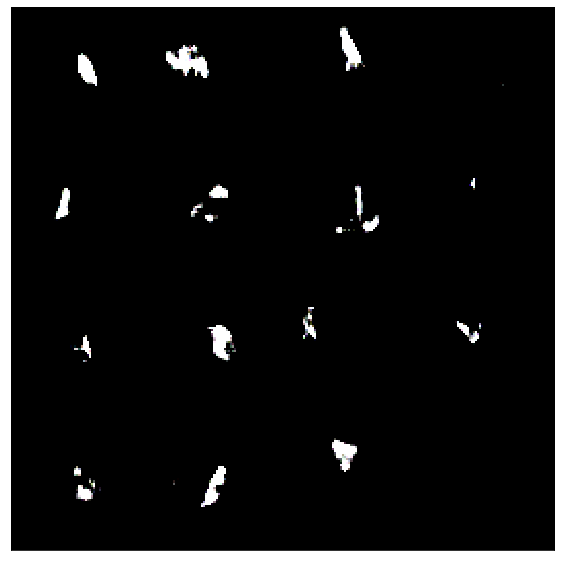

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


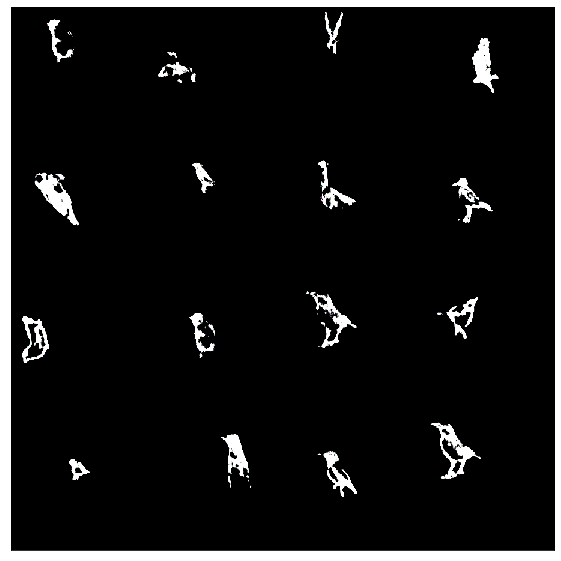

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 3


  0%|                                                                             | 1/17500 [00:14<69:40:01, 14.33s/it]

Train Epoch: 3 [0/280000 (0%)]	Loss: 0.040086
IOU : 0.0576324462890625
IOU : 0.0576324462890625


  0%|▏                                                                              | 53/17500 [00:17<45:40,  6.37it/s]

Train Epoch: 3 [200/280000 (0%)]	Loss: 0.033108
IOU : 0.05157470703125


  1%|▍                                                                             | 103/17500 [00:20<17:49, 16.27it/s]

Train Epoch: 3 [400/280000 (1%)]	Loss: 0.058835
IOU : 0.0530242919921875
IOU : 0.0530242919921875


  1%|▋                                                                             | 151/17500 [00:23<18:04, 16.00it/s]

Train Epoch: 3 [600/280000 (1%)]	Loss: 0.045859
IOU : 0.0517120361328125


  1%|▉                                                                             | 203/17500 [00:26<17:12, 16.75it/s]

Train Epoch: 3 [800/280000 (1%)]	Loss: 0.045310
IOU : 0.0520477294921875
IOU : 0.0520477294921875


  1%|█▏                                                                            | 254/17500 [00:29<16:54, 17.01it/s]

Train Epoch: 3 [1000/280000 (1%)]	Loss: 0.031664
IOU : 0.0460662841796875


  2%|█▎                                                                            | 301/17500 [00:32<18:50, 15.21it/s]

Train Epoch: 3 [1200/280000 (2%)]	Loss: 0.057880
IOU : 0.055389404296875
IOU : 0.055389404296875


  2%|█▌                                                                            | 353/17500 [00:35<16:07, 17.73it/s]

Train Epoch: 3 [1400/280000 (2%)]	Loss: 0.029945
IOU : 0.0459136962890625


  2%|█▊                                                                            | 402/17500 [00:38<17:00, 16.76it/s]

Train Epoch: 3 [1600/280000 (2%)]	Loss: 0.034698
IOU : 0.0518951416015625
IOU : 0.0518951416015625


  3%|██                                                                            | 451/17500 [00:41<18:39, 15.23it/s]

Train Epoch: 3 [1800/280000 (3%)]	Loss: 0.054882
IOU : 0.0555267333984375


  3%|██▏                                                                           | 504/17500 [00:44<16:06, 17.58it/s]

Train Epoch: 3 [2000/280000 (3%)]	Loss: 0.035915
IOU : 0.0519561767578125
IOU : 0.0519561767578125


  3%|██▍                                                                           | 554/17500 [00:47<16:11, 17.45it/s]

Train Epoch: 3 [2200/280000 (3%)]	Loss: 0.036041
IOU : 0.0465087890625


  3%|██▋                                                                           | 604/17500 [00:50<16:49, 16.73it/s]

Train Epoch: 3 [2400/280000 (3%)]	Loss: 0.030935
IOU : 0.0499267578125
IOU : 0.0499267578125


  4%|██▉                                                                           | 654/17500 [00:53<16:03, 17.49it/s]

Train Epoch: 3 [2600/280000 (4%)]	Loss: 0.057353
IOU : 0.0609283447265625


  4%|███                                                                           | 699/17500 [00:56<16:43, 16.75it/s]

Train Epoch: 3 [2800/280000 (4%)]	Loss: 0.046272
IOU : 0.0527496337890625
IOU : 0.0527496337890625


  4%|███▎                                                                          | 751/17500 [00:59<18:25, 15.15it/s]

Train Epoch: 3 [3000/280000 (4%)]	Loss: 0.040163
IOU : 0.0532684326171875


  5%|███▌                                                                          | 799/17500 [01:02<16:31, 16.84it/s]

Train Epoch: 3 [3200/280000 (5%)]	Loss: 0.042126
IOU : 0.049346923828125
IOU : 0.049346923828125


  5%|███▊                                                                          | 851/17500 [01:05<19:15, 14.41it/s]

Train Epoch: 3 [3400/280000 (5%)]	Loss: 0.030162
IOU : 0.049407958984375


  5%|████                                                                          | 899/17500 [01:08<17:26, 15.86it/s]

Train Epoch: 3 [3600/280000 (5%)]	Loss: 0.042483
IOU : 0.059326171875
IOU : 0.059326171875


  5%|████▏                                                                         | 951/17500 [01:11<16:43, 16.50it/s]

Train Epoch: 3 [3800/280000 (5%)]	Loss: 0.030825
IOU : 0.048431396484375


  6%|████▍                                                                        | 1003/17500 [01:14<18:40, 14.72it/s]

Train Epoch: 3 [4000/280000 (6%)]	Loss: 0.034560
IOU : 0.0484619140625
IOU : 0.0484619140625


  6%|████▋                                                                        | 1052/17500 [01:17<18:25, 14.88it/s]

Train Epoch: 3 [4200/280000 (6%)]	Loss: 0.032436
IOU : 0.0478668212890625


  6%|████▊                                                                        | 1103/17500 [01:20<16:25, 16.64it/s]

Train Epoch: 3 [4400/280000 (6%)]	Loss: 0.034840
IOU : 0.049713134765625
IOU : 0.049713134765625


  7%|█████                                                                        | 1152/17500 [01:23<18:12, 14.97it/s]

Train Epoch: 3 [4600/280000 (7%)]	Loss: 0.037305
IOU : 0.054595947265625


  7%|█████▎                                                                       | 1200/17500 [01:26<17:39, 15.38it/s]

Train Epoch: 3 [4800/280000 (7%)]	Loss: 0.031601
IOU : 0.0487213134765625
IOU : 0.0487213134765625


  7%|█████▌                                                                       | 1252/17500 [01:29<17:59, 15.05it/s]

Train Epoch: 3 [5000/280000 (7%)]	Loss: 0.053537
IOU : 0.06195068359375


  7%|█████▋                                                                       | 1300/17500 [01:32<19:08, 14.10it/s]

Train Epoch: 3 [5200/280000 (7%)]	Loss: 0.033579
IOU : 0.053375244140625
IOU : 0.053375244140625


  8%|█████▉                                                                       | 1352/17500 [01:36<16:22, 16.43it/s]

Train Epoch: 3 [5400/280000 (8%)]	Loss: 0.040321
IOU : 0.054473876953125


  8%|██████▏                                                                      | 1403/17500 [01:39<14:28, 18.54it/s]

Train Epoch: 3 [5600/280000 (8%)]	Loss: 0.030871
IOU : 0.0582122802734375
IOU : 0.0582122802734375


  8%|██████▍                                                                      | 1452/17500 [01:42<15:56, 16.77it/s]

Train Epoch: 3 [5800/280000 (8%)]	Loss: 0.027696
IOU : 0.0523681640625


  9%|██████▌                                                                      | 1503/17500 [01:45<17:55, 14.87it/s]

Train Epoch: 3 [6000/280000 (9%)]	Loss: 0.033741
IOU : 0.0517730712890625
IOU : 0.0517730712890625


  9%|██████▊                                                                      | 1553/17500 [01:48<18:01, 14.75it/s]

Train Epoch: 3 [6200/280000 (9%)]	Loss: 0.036006
IOU : 0.0574798583984375


  9%|███████                                                                      | 1601/17500 [01:51<18:04, 14.67it/s]

Train Epoch: 3 [6400/280000 (9%)]	Loss: 0.056718
IOU : 0.06512451171875
IOU : 0.06512451171875


  9%|███████▎                                                                     | 1654/17500 [01:54<17:06, 15.43it/s]

Train Epoch: 3 [6600/280000 (9%)]	Loss: 0.040322
IOU : 0.0613250732421875


 10%|███████▍                                                                     | 1701/17500 [01:57<19:19, 13.63it/s]

Train Epoch: 3 [6800/280000 (10%)]	Loss: 0.030802
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 10%|███████▋                                                                     | 1751/17500 [02:00<18:03, 14.54it/s]

Train Epoch: 3 [7000/280000 (10%)]	Loss: 0.036960
IOU : 0.0541229248046875


 10%|███████▉                                                                     | 1804/17500 [02:04<16:33, 15.79it/s]

Train Epoch: 3 [7200/280000 (10%)]	Loss: 0.036251
IOU : 0.0524749755859375
IOU : 0.0524749755859375


 11%|████████▏                                                                    | 1852/17500 [02:07<17:00, 15.33it/s]

Train Epoch: 3 [7400/280000 (11%)]	Loss: 0.038525
IOU : 0.0500946044921875


 11%|████████▍                                                                    | 1904/17500 [02:10<14:47, 17.58it/s]

Train Epoch: 3 [7600/280000 (11%)]	Loss: 0.028736
IOU : 0.052215576171875
IOU : 0.052215576171875


 11%|████████▌                                                                    | 1954/17500 [02:13<17:09, 15.10it/s]

Train Epoch: 3 [7800/280000 (11%)]	Loss: 0.055051
IOU : 0.0551910400390625


 11%|████████▊                                                                    | 2003/17500 [02:16<17:06, 15.10it/s]

Train Epoch: 3 [8000/280000 (11%)]	Loss: 0.038678
IOU : 0.0487060546875
IOU : 0.0487060546875


 12%|█████████                                                                    | 2054/17500 [02:19<15:20, 16.78it/s]

Train Epoch: 3 [8200/280000 (12%)]	Loss: 0.052002
IOU : 0.053924560546875


 12%|█████████▏                                                                   | 2102/17500 [02:22<16:46, 15.30it/s]

Train Epoch: 3 [8400/280000 (12%)]	Loss: 0.034698
IOU : 0.0516204833984375
IOU : 0.0516204833984375


 12%|█████████▍                                                                   | 2154/17500 [02:25<15:21, 16.66it/s]

Train Epoch: 3 [8600/280000 (12%)]	Loss: 0.035764
IOU : 0.0571746826171875


 13%|█████████▋                                                                   | 2202/17500 [02:29<17:09, 14.86it/s]

Train Epoch: 3 [8800/280000 (13%)]	Loss: 0.038252
IOU : 0.0510101318359375
IOU : 0.0510101318359375


 13%|█████████▉                                                                   | 2253/17500 [02:32<15:25, 16.47it/s]

Train Epoch: 3 [9000/280000 (13%)]	Loss: 0.044136
IOU : 0.053924560546875


 13%|██████████▏                                                                  | 2303/17500 [02:35<16:21, 15.49it/s]

Train Epoch: 3 [9200/280000 (13%)]	Loss: 0.043166
IOU : 0.0568084716796875
IOU : 0.0568084716796875


 13%|██████████▎                                                                  | 2353/17500 [02:38<16:20, 15.44it/s]

Train Epoch: 3 [9400/280000 (13%)]	Loss: 0.033032
IOU : 0.0455322265625


 14%|██████████▌                                                                  | 2404/17500 [02:41<15:23, 16.34it/s]

Train Epoch: 3 [9600/280000 (14%)]	Loss: 0.046177
IOU : 0.052398681640625
IOU : 0.052398681640625


 14%|██████████▊                                                                  | 2452/17500 [02:44<15:47, 15.88it/s]

Train Epoch: 3 [9800/280000 (14%)]	Loss: 0.039393
IOU : 0.050628662109375


 14%|███████████                                                                  | 2501/17500 [02:47<18:15, 13.69it/s]

Train Epoch: 3 [10000/280000 (14%)]	Loss: 0.050890
IOU : 0.057464599609375
IOU : 0.057464599609375


 15%|███████████▏                                                                 | 2552/17500 [02:50<15:54, 15.66it/s]

Train Epoch: 3 [10200/280000 (15%)]	Loss: 0.043298
IOU : 0.0532073974609375


 15%|███████████▍                                                                 | 2601/17500 [02:53<18:45, 13.23it/s]

Train Epoch: 3 [10400/280000 (15%)]	Loss: 0.033181
IOU : 0.0594024658203125
IOU : 0.0594024658203125


 15%|███████████▋                                                                 | 2653/17500 [02:56<15:04, 16.42it/s]

Train Epoch: 3 [10600/280000 (15%)]	Loss: 0.032864
IOU : 0.0525665283203125


 15%|███████████▉                                                                 | 2702/17500 [02:59<15:06, 16.33it/s]

Train Epoch: 3 [10800/280000 (15%)]	Loss: 0.038341
IOU : 0.04730224609375
IOU : 0.04730224609375


 16%|████████████                                                                 | 2754/17500 [03:03<14:10, 17.33it/s]

Train Epoch: 3 [11000/280000 (16%)]	Loss: 0.040222
IOU : 0.0595245361328125


 16%|████████████▎                                                                | 2802/17500 [03:06<14:34, 16.81it/s]

Train Epoch: 3 [11200/280000 (16%)]	Loss: 0.049448
IOU : 0.06024169921875
IOU : 0.06024169921875


 16%|████████████▌                                                                | 2852/17500 [03:09<16:52, 14.46it/s]

Train Epoch: 3 [11400/280000 (16%)]	Loss: 0.046984
IOU : 0.05560302734375


 17%|████████████▊                                                                | 2903/17500 [03:12<14:41, 16.55it/s]

Train Epoch: 3 [11600/280000 (17%)]	Loss: 0.038349
IOU : 0.0501861572265625
IOU : 0.0501861572265625


 17%|████████████▉                                                                | 2952/17500 [03:15<15:28, 15.67it/s]

Train Epoch: 3 [11800/280000 (17%)]	Loss: 0.032508
IOU : 0.0442047119140625


 17%|█████████████▏                                                               | 3003/17500 [03:18<15:31, 15.56it/s]

Train Epoch: 3 [12000/280000 (17%)]	Loss: 0.030131
IOU : 0.0480804443359375
IOU : 0.0480804443359375


 17%|█████████████▍                                                               | 3053/17500 [03:22<15:13, 15.81it/s]

Train Epoch: 3 [12200/280000 (17%)]	Loss: 0.055449
IOU : 0.05767822265625


 18%|█████████████▋                                                               | 3102/17500 [03:25<15:06, 15.88it/s]

Train Epoch: 3 [12400/280000 (18%)]	Loss: 0.035603
IOU : 0.056640625
IOU : 0.056640625


 18%|█████████████▉                                                               | 3154/17500 [03:28<14:18, 16.71it/s]

Train Epoch: 3 [12600/280000 (18%)]	Loss: 0.025791
IOU : 0.0426025390625


 18%|██████████████                                                               | 3201/17500 [03:31<17:12, 13.85it/s]

Train Epoch: 3 [12800/280000 (18%)]	Loss: 0.045236
IOU : 0.055572509765625
IOU : 0.055572509765625


 19%|██████████████▎                                                              | 3254/17500 [03:34<15:09, 15.66it/s]

Train Epoch: 3 [13000/280000 (19%)]	Loss: 0.035255
IOU : 0.054718017578125


 19%|██████████████▌                                                              | 3304/17500 [03:37<15:16, 15.49it/s]

Train Epoch: 3 [13200/280000 (19%)]	Loss: 0.039164
IOU : 0.05126953125
IOU : 0.05126953125


 19%|██████████████▊                                                              | 3354/17500 [03:41<13:37, 17.31it/s]

Train Epoch: 3 [13400/280000 (19%)]	Loss: 0.034075
IOU : 0.055084228515625


 19%|██████████████▉                                                              | 3402/17500 [03:44<16:43, 14.04it/s]

Train Epoch: 3 [13600/280000 (19%)]	Loss: 0.047524
IOU : 0.0506439208984375
IOU : 0.0506439208984375


 20%|███████████████▏                                                             | 3451/17500 [03:47<16:33, 14.14it/s]

Train Epoch: 3 [13800/280000 (20%)]	Loss: 0.048616
IOU : 0.0641937255859375


 20%|███████████████▍                                                             | 3499/17500 [03:50<14:44, 15.83it/s]

Train Epoch: 3 [14000/280000 (20%)]	Loss: 0.035540
IOU : 0.052642822265625
IOU : 0.052642822265625


 20%|███████████████▋                                                             | 3553/17500 [03:54<14:54, 15.59it/s]

Train Epoch: 3 [14200/280000 (20%)]	Loss: 0.027929
IOU : 0.0498809814453125


 21%|███████████████▊                                                             | 3604/17500 [03:57<14:22, 16.12it/s]

Train Epoch: 3 [14400/280000 (21%)]	Loss: 0.033152
IOU : 0.046966552734375
IOU : 0.046966552734375


 21%|████████████████                                                             | 3651/17500 [04:00<13:58, 16.51it/s]

Train Epoch: 3 [14600/280000 (21%)]	Loss: 0.039972
IOU : 0.0589752197265625


 21%|████████████████▎                                                            | 3700/17500 [04:03<15:04, 15.25it/s]

Train Epoch: 3 [14800/280000 (21%)]	Loss: 0.038713
IOU : 0.060791015625
IOU : 0.060791015625


 21%|████████████████▌                                                            | 3754/17500 [04:07<14:01, 16.33it/s]

Train Epoch: 3 [15000/280000 (21%)]	Loss: 0.029442
IOU : 0.043701171875


 22%|████████████████▋                                                            | 3802/17500 [04:10<15:23, 14.83it/s]

Train Epoch: 3 [15200/280000 (22%)]	Loss: 0.039908
IOU : 0.062164306640625
IOU : 0.062164306640625


 22%|████████████████▉                                                            | 3852/17500 [04:13<13:29, 16.85it/s]

Train Epoch: 3 [15400/280000 (22%)]	Loss: 0.047022
IOU : 0.053009033203125


 22%|█████████████████▏                                                           | 3904/17500 [04:16<12:59, 17.43it/s]

Train Epoch: 3 [15600/280000 (22%)]	Loss: 0.034704
IOU : 0.0573272705078125
IOU : 0.0573272705078125


 23%|█████████████████▍                                                           | 3953/17500 [04:19<16:01, 14.08it/s]

Train Epoch: 3 [15800/280000 (23%)]	Loss: 0.032511
IOU : 0.057373046875


 23%|█████████████████▌                                                           | 4002/17500 [04:22<15:52, 14.17it/s]

Train Epoch: 3 [16000/280000 (23%)]	Loss: 0.032901
IOU : 0.052276611328125
IOU : 0.052276611328125


 23%|█████████████████▊                                                           | 4053/17500 [04:26<16:18, 13.74it/s]

Train Epoch: 3 [16200/280000 (23%)]	Loss: 0.052314
IOU : 0.050567626953125


 23%|██████████████████                                                           | 4101/17500 [04:29<15:19, 14.58it/s]

Train Epoch: 3 [16400/280000 (23%)]	Loss: 0.054838
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 24%|██████████████████▎                                                          | 4154/17500 [04:32<13:21, 16.64it/s]

Train Epoch: 3 [16600/280000 (24%)]	Loss: 0.034481
IOU : 0.0451812744140625


 24%|██████████████████▍                                                          | 4201/17500 [04:35<14:02, 15.79it/s]

Train Epoch: 3 [16800/280000 (24%)]	Loss: 0.033176
IOU : 0.0512847900390625
IOU : 0.0512847900390625


 24%|██████████████████▋                                                          | 4249/17500 [04:38<14:04, 15.68it/s]

Train Epoch: 3 [17000/280000 (24%)]	Loss: 0.042650
IOU : 0.0473785400390625


 25%|██████████████████▉                                                          | 4301/17500 [04:41<14:37, 15.04it/s]

Train Epoch: 3 [17200/280000 (25%)]	Loss: 0.042343
IOU : 0.0498046875
IOU : 0.0498046875


 25%|███████████████████▏                                                         | 4349/17500 [04:44<13:10, 16.64it/s]

Train Epoch: 3 [17400/280000 (25%)]	Loss: 0.042887
IOU : 0.05316162109375


 25%|███████████████████▎                                                         | 4401/17500 [04:47<13:30, 16.16it/s]

Train Epoch: 3 [17600/280000 (25%)]	Loss: 0.034512
IOU : 0.049530029296875
IOU : 0.049530029296875


 25%|███████████████████▌                                                         | 4453/17500 [04:51<13:24, 16.21it/s]

Train Epoch: 3 [17800/280000 (25%)]	Loss: 0.071841
IOU : 0.0560760498046875


 26%|███████████████████▊                                                         | 4501/17500 [04:54<13:18, 16.27it/s]

Train Epoch: 3 [18000/280000 (26%)]	Loss: 0.035051
IOU : 0.052032470703125
IOU : 0.052032470703125


 26%|████████████████████                                                         | 4549/17500 [04:57<13:22, 16.14it/s]

Train Epoch: 3 [18200/280000 (26%)]	Loss: 0.033821
IOU : 0.060455322265625


 26%|████████████████████▏                                                        | 4601/17500 [05:00<13:33, 15.86it/s]

Train Epoch: 3 [18400/280000 (26%)]	Loss: 0.040206
IOU : 0.06341552734375
IOU : 0.06341552734375


 27%|████████████████████▍                                                        | 4652/17500 [05:03<13:00, 16.46it/s]

Train Epoch: 3 [18600/280000 (27%)]	Loss: 0.028854
IOU : 0.0501861572265625


 27%|████████████████████▋                                                        | 4701/17500 [05:06<14:16, 14.95it/s]

Train Epoch: 3 [18800/280000 (27%)]	Loss: 0.042718
IOU : 0.05926513671875
IOU : 0.05926513671875


 27%|████████████████████▉                                                        | 4749/17500 [05:09<13:02, 16.30it/s]

Train Epoch: 3 [19000/280000 (27%)]	Loss: 0.044051
IOU : 0.0556793212890625


 27%|█████████████████████                                                        | 4801/17500 [05:12<12:58, 16.31it/s]

Train Epoch: 3 [19200/280000 (27%)]	Loss: 0.031317
IOU : 0.050384521484375
IOU : 0.050384521484375


 28%|█████████████████████▎                                                       | 4849/17500 [05:15<12:44, 16.54it/s]

Train Epoch: 3 [19400/280000 (28%)]	Loss: 0.046939
IOU : 0.0495147705078125


 28%|█████████████████████▌                                                       | 4901/17500 [05:18<13:16, 15.82it/s]

Train Epoch: 3 [19600/280000 (28%)]	Loss: 0.028169
IOU : 0.0468902587890625
IOU : 0.0468902587890625


 28%|█████████████████████▊                                                       | 4953/17500 [05:22<12:41, 16.48it/s]

Train Epoch: 3 [19800/280000 (28%)]	Loss: 0.036819
IOU : 0.049652099609375


 29%|██████████████████████                                                       | 5004/17500 [05:25<11:35, 17.98it/s]

Train Epoch: 3 [20000/280000 (29%)]	Loss: 0.040683
IOU : 0.053253173828125
IOU : 0.053253173828125


 29%|██████████████████████▏                                                      | 5049/17500 [05:28<12:40, 16.37it/s]

Train Epoch: 3 [20200/280000 (29%)]	Loss: 0.043317
IOU : 0.0547637939453125


 29%|██████████████████████▍                                                      | 5102/17500 [05:31<15:11, 13.60it/s]

Train Epoch: 3 [20400/280000 (29%)]	Loss: 0.032733
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 29%|██████████████████████▋                                                      | 5148/17500 [05:34<14:48, 13.90it/s]

Train Epoch: 3 [20600/280000 (29%)]	Loss: 0.036977
IOU : 0.0687103271484375


 30%|██████████████████████▉                                                      | 5201/17500 [05:37<13:49, 14.83it/s]

Train Epoch: 3 [20800/280000 (30%)]	Loss: 0.030768
IOU : 0.0531463623046875
IOU : 0.0531463623046875


 30%|███████████████████████                                                      | 5252/17500 [05:41<13:37, 14.99it/s]

Train Epoch: 3 [21000/280000 (30%)]	Loss: 0.034709
IOU : 0.0550079345703125


 30%|███████████████████████▎                                                     | 5301/17500 [05:44<14:17, 14.23it/s]

Train Epoch: 3 [21200/280000 (30%)]	Loss: 0.038517
IOU : 0.049652099609375
IOU : 0.049652099609375


 31%|███████████████████████▌                                                     | 5348/17500 [05:47<12:43, 15.93it/s]

Train Epoch: 3 [21400/280000 (31%)]	Loss: 0.042198
IOU : 0.057952880859375


 31%|███████████████████████▊                                                     | 5403/17500 [05:50<11:30, 17.53it/s]

Train Epoch: 3 [21600/280000 (31%)]	Loss: 0.032536
IOU : 0.0580291748046875
IOU : 0.0580291748046875


 31%|███████████████████████▉                                                     | 5452/17500 [05:53<12:05, 16.62it/s]

Train Epoch: 3 [21800/280000 (31%)]	Loss: 0.032200
IOU : 0.046875


 31%|████████████████████████▏                                                    | 5500/17500 [05:56<12:21, 16.18it/s]

Train Epoch: 3 [22000/280000 (31%)]	Loss: 0.033241
IOU : 0.0489044189453125
IOU : 0.0489044189453125


 32%|████████████████████████▍                                                    | 5548/17500 [05:59<12:13, 16.30it/s]

Train Epoch: 3 [22200/280000 (32%)]	Loss: 0.036901
IOU : 0.053619384765625


 32%|████████████████████████▋                                                    | 5600/17500 [06:02<11:52, 16.71it/s]

Train Epoch: 3 [22400/280000 (32%)]	Loss: 0.037027
IOU : 0.049896240234375
IOU : 0.049896240234375


 32%|████████████████████████▊                                                    | 5652/17500 [06:06<12:22, 15.96it/s]

Train Epoch: 3 [22600/280000 (32%)]	Loss: 0.030323
IOU : 0.0508880615234375


 33%|█████████████████████████                                                    | 5700/17500 [06:09<12:41, 15.49it/s]

Train Epoch: 3 [22800/280000 (33%)]	Loss: 0.037367
IOU : 0.04815673828125
IOU : 0.04815673828125


 33%|█████████████████████████▎                                                   | 5751/17500 [06:12<11:48, 16.59it/s]

Train Epoch: 3 [23000/280000 (33%)]	Loss: 0.035493
IOU : 0.0506744384765625


 33%|█████████████████████████▌                                                   | 5800/17500 [06:15<12:37, 15.44it/s]

Train Epoch: 3 [23200/280000 (33%)]	Loss: 0.037271
IOU : 0.0574493408203125
IOU : 0.0574493408203125


 33%|█████████████████████████▋                                                   | 5852/17500 [06:18<11:58, 16.22it/s]

Train Epoch: 3 [23400/280000 (33%)]	Loss: 0.040490
IOU : 0.050384521484375


 34%|█████████████████████████▉                                                   | 5900/17500 [06:21<12:05, 15.99it/s]

Train Epoch: 3 [23600/280000 (34%)]	Loss: 0.034035
IOU : 0.044708251953125
IOU : 0.044708251953125


 34%|██████████████████████████▏                                                  | 5952/17500 [06:24<11:57, 16.09it/s]

Train Epoch: 3 [23800/280000 (34%)]	Loss: 0.055423
IOU : 0.0574798583984375


 34%|██████████████████████████▍                                                  | 6000/17500 [06:27<11:43, 16.34it/s]

Train Epoch: 3 [24000/280000 (34%)]	Loss: 0.037274
IOU : 0.0488433837890625
IOU : 0.0488433837890625


 35%|██████████████████████████▌                                                  | 6048/17500 [06:30<12:25, 15.36it/s]

Train Epoch: 3 [24200/280000 (35%)]	Loss: 0.043586
IOU : 0.0521240234375


 35%|██████████████████████████▊                                                  | 6100/17500 [06:34<11:52, 15.99it/s]

Train Epoch: 3 [24400/280000 (35%)]	Loss: 0.063888
IOU : 0.06439208984375
IOU : 0.06439208984375


 35%|███████████████████████████                                                  | 6152/17500 [06:37<11:37, 16.26it/s]

Train Epoch: 3 [24600/280000 (35%)]	Loss: 0.027198
IOU : 0.0510406494140625


 35%|███████████████████████████▎                                                 | 6203/17500 [06:40<10:53, 17.29it/s]

Train Epoch: 3 [24800/280000 (35%)]	Loss: 0.032134
IOU : 0.05889892578125
IOU : 0.05889892578125


 36%|███████████████████████████▌                                                 | 6252/17500 [06:43<12:10, 15.39it/s]

Train Epoch: 3 [25000/280000 (36%)]	Loss: 0.051410
IOU : 0.0601806640625


 36%|███████████████████████████▋                                                 | 6303/17500 [06:46<10:35, 17.61it/s]

Train Epoch: 3 [25200/280000 (36%)]	Loss: 0.036216
IOU : 0.0517730712890625
IOU : 0.0517730712890625


 36%|███████████████████████████▉                                                 | 6352/17500 [06:49<11:43, 15.85it/s]

Train Epoch: 3 [25400/280000 (36%)]	Loss: 0.032738
IOU : 0.0465545654296875


 37%|████████████████████████████▏                                                | 6404/17500 [06:52<10:53, 16.98it/s]

Train Epoch: 3 [25600/280000 (37%)]	Loss: 0.031271
IOU : 0.0472564697265625
IOU : 0.0472564697265625


 37%|████████████████████████████▍                                                | 6449/17500 [06:55<12:11, 15.10it/s]

Train Epoch: 3 [25800/280000 (37%)]	Loss: 0.041116
IOU : 0.054718017578125


 37%|████████████████████████████▌                                                | 6501/17500 [06:59<11:17, 16.23it/s]

Train Epoch: 3 [26000/280000 (37%)]	Loss: 0.042970
IOU : 0.0514068603515625
IOU : 0.0514068603515625


 37%|████████████████████████████▊                                                | 6553/17500 [07:02<12:29, 14.61it/s]

Train Epoch: 3 [26200/280000 (37%)]	Loss: 0.048741
IOU : 0.0554046630859375


 38%|█████████████████████████████                                                | 6602/17500 [07:05<12:03, 15.06it/s]

Train Epoch: 3 [26400/280000 (38%)]	Loss: 0.040734
IOU : 0.0550689697265625
IOU : 0.0550689697265625


 38%|█████████████████████████████▎                                               | 6652/17500 [07:08<11:47, 15.32it/s]

Train Epoch: 3 [26600/280000 (38%)]	Loss: 0.042163
IOU : 0.052490234375


 38%|█████████████████████████████▍                                               | 6700/17500 [07:11<12:20, 14.59it/s]

Train Epoch: 3 [26800/280000 (38%)]	Loss: 0.035224
IOU : 0.0452423095703125
IOU : 0.0452423095703125


 39%|█████████████████████████████▋                                               | 6752/17500 [07:14<11:29, 15.59it/s]

Train Epoch: 3 [27000/280000 (39%)]	Loss: 0.034930
IOU : 0.046539306640625


 39%|█████████████████████████████▉                                               | 6803/17500 [07:17<09:35, 18.58it/s]

Train Epoch: 3 [27200/280000 (39%)]	Loss: 0.049274
IOU : 0.0506134033203125
IOU : 0.0506134033203125


 39%|██████████████████████████████▏                                              | 6852/17500 [07:20<11:44, 15.11it/s]

Train Epoch: 3 [27400/280000 (39%)]	Loss: 0.028874
IOU : 0.0488433837890625


 39%|██████████████████████████████▎                                              | 6902/17500 [07:23<10:51, 16.26it/s]

Train Epoch: 3 [27600/280000 (39%)]	Loss: 0.038381
IOU : 0.0502777099609375
IOU : 0.0502777099609375


 40%|██████████████████████████████▌                                              | 6948/17500 [07:26<11:37, 15.13it/s]

Train Epoch: 3 [27800/280000 (40%)]	Loss: 0.032432
IOU : 0.0462646484375


 40%|██████████████████████████████▊                                              | 7002/17500 [07:30<11:34, 15.11it/s]

Train Epoch: 3 [28000/280000 (40%)]	Loss: 0.026144
IOU : 0.0438232421875
IOU : 0.0438232421875


 40%|███████████████████████████████                                              | 7052/17500 [07:33<11:14, 15.49it/s]

Train Epoch: 3 [28200/280000 (40%)]	Loss: 0.032524
IOU : 0.0531005859375


 41%|███████████████████████████████▎                                             | 7103/17500 [07:36<10:31, 16.45it/s]

Train Epoch: 3 [28400/280000 (41%)]	Loss: 0.040401
IOU : 0.0499725341796875
IOU : 0.0499725341796875


 41%|███████████████████████████████▍                                             | 7151/17500 [07:39<10:10, 16.96it/s]

Train Epoch: 3 [28600/280000 (41%)]	Loss: 0.054216
IOU : 0.051177978515625


 41%|███████████████████████████████▋                                             | 7200/17500 [07:42<11:09, 15.38it/s]

Train Epoch: 3 [28800/280000 (41%)]	Loss: 0.030001
IOU : 0.0473785400390625
IOU : 0.0473785400390625


 41%|███████████████████████████████▉                                             | 7251/17500 [07:45<10:12, 16.73it/s]

Train Epoch: 3 [29000/280000 (41%)]	Loss: 0.031026
IOU : 0.0449981689453125


 42%|████████████████████████████████                                             | 7300/17500 [07:49<10:52, 15.63it/s]

Train Epoch: 3 [29200/280000 (42%)]	Loss: 0.031300
IOU : 0.0534515380859375
IOU : 0.0534515380859375


 42%|████████████████████████████████▎                                            | 7353/17500 [07:52<10:50, 15.60it/s]

Train Epoch: 3 [29400/280000 (42%)]	Loss: 0.034762
IOU : 0.0593719482421875


 42%|████████████████████████████████▌                                            | 7403/17500 [07:55<10:15, 16.41it/s]

Train Epoch: 3 [29600/280000 (42%)]	Loss: 0.045320
IOU : 0.047210693359375
IOU : 0.047210693359375


 43%|████████████████████████████████▊                                            | 7452/17500 [07:58<10:28, 15.99it/s]

Train Epoch: 3 [29800/280000 (43%)]	Loss: 0.053609
IOU : 0.049163818359375


 43%|█████████████████████████████████                                            | 7503/17500 [08:01<09:06, 18.28it/s]

Train Epoch: 3 [30000/280000 (43%)]	Loss: 0.041743
IOU : 0.05303955078125
IOU : 0.05303955078125


 43%|█████████████████████████████████▏                                           | 7552/17500 [08:05<11:08, 14.87it/s]

Train Epoch: 3 [30200/280000 (43%)]	Loss: 0.037561
IOU : 0.0455169677734375


 43%|█████████████████████████████████▍                                           | 7603/17500 [08:08<08:49, 18.69it/s]

Train Epoch: 3 [30400/280000 (43%)]	Loss: 0.027764
IOU : 0.046783447265625
IOU : 0.046783447265625


 44%|█████████████████████████████████▋                                           | 7651/17500 [08:11<08:50, 18.58it/s]

Train Epoch: 3 [30600/280000 (44%)]	Loss: 0.036260
IOU : 0.0459747314453125


 44%|█████████████████████████████████▉                                           | 7701/17500 [08:14<11:31, 14.17it/s]

Train Epoch: 3 [30800/280000 (44%)]	Loss: 0.046829
IOU : 0.0540924072265625
IOU : 0.0540924072265625


 44%|██████████████████████████████████                                           | 7752/17500 [08:17<10:16, 15.81it/s]

Train Epoch: 3 [31000/280000 (44%)]	Loss: 0.029779
IOU : 0.0453033447265625


 45%|██████████████████████████████████▎                                          | 7800/17500 [08:20<10:31, 15.36it/s]

Train Epoch: 3 [31200/280000 (45%)]	Loss: 0.031983
IOU : 0.0484771728515625
IOU : 0.0484771728515625


 45%|██████████████████████████████████▌                                          | 7851/17500 [08:23<08:42, 18.45it/s]

Train Epoch: 3 [31400/280000 (45%)]	Loss: 0.046224
IOU : 0.0604400634765625


 45%|██████████████████████████████████▊                                          | 7900/17500 [08:27<11:45, 13.61it/s]

Train Epoch: 3 [31600/280000 (45%)]	Loss: 0.044535
IOU : 0.0556640625
IOU : 0.0556640625


 45%|██████████████████████████████████▉                                          | 7953/17500 [08:30<09:52, 16.12it/s]

Train Epoch: 3 [31800/280000 (45%)]	Loss: 0.033568
IOU : 0.0502777099609375


 46%|███████████████████████████████████▏                                         | 8000/17500 [08:33<10:06, 15.66it/s]

Train Epoch: 3 [32000/280000 (46%)]	Loss: 0.038065
IOU : 0.04925537109375
IOU : 0.04925537109375


 46%|███████████████████████████████████▍                                         | 8052/17500 [08:36<10:21, 15.21it/s]

Train Epoch: 3 [32200/280000 (46%)]	Loss: 0.029776
IOU : 0.0501861572265625


 46%|███████████████████████████████████▋                                         | 8100/17500 [08:39<09:45, 16.06it/s]

Train Epoch: 3 [32400/280000 (46%)]	Loss: 0.042318
IOU : 0.0502471923828125
IOU : 0.0502471923828125


 47%|███████████████████████████████████▊                                         | 8152/17500 [08:43<10:00, 15.58it/s]

Train Epoch: 3 [32600/280000 (47%)]	Loss: 0.035324
IOU : 0.0484771728515625


 47%|████████████████████████████████████                                         | 8200/17500 [08:46<09:21, 16.58it/s]

Train Epoch: 3 [32800/280000 (47%)]	Loss: 0.038761
IOU : 0.0525054931640625
IOU : 0.0525054931640625


 47%|████████████████████████████████████▎                                        | 8253/17500 [08:49<09:45, 15.78it/s]

Train Epoch: 3 [33000/280000 (47%)]	Loss: 0.038704
IOU : 0.0597991943359375


 47%|████████████████████████████████████▌                                        | 8301/17500 [08:52<10:03, 15.23it/s]

Train Epoch: 3 [33200/280000 (47%)]	Loss: 0.031261
IOU : 0.050567626953125
IOU : 0.050567626953125


 48%|████████████████████████████████████▋                                        | 8352/17500 [08:55<10:23, 14.68it/s]

Train Epoch: 3 [33400/280000 (48%)]	Loss: 0.037427
IOU : 0.0525970458984375


 48%|████████████████████████████████████▉                                        | 8403/17500 [08:58<08:03, 18.80it/s]

Train Epoch: 3 [33600/280000 (48%)]	Loss: 0.050657
IOU : 0.055389404296875
IOU : 0.055389404296875


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:01<08:47, 17.14it/s]

Train Epoch: 3 [33800/280000 (48%)]	Loss: 0.045017
IOU : 0.064239501953125


 49%|█████████████████████████████████████▍                                       | 8503/17500 [09:04<08:05, 18.55it/s]

Train Epoch: 3 [34000/280000 (49%)]	Loss: 0.031333
IOU : 0.044708251953125
IOU : 0.044708251953125


 49%|█████████████████████████████████████▌                                       | 8548/17500 [09:07<08:43, 17.10it/s]

Train Epoch: 3 [34200/280000 (49%)]	Loss: 0.037304
IOU : 0.0491790771484375


 49%|█████████████████████████████████████▊                                       | 8600/17500 [09:10<09:37, 15.42it/s]

Train Epoch: 3 [34400/280000 (49%)]	Loss: 0.037720
IOU : 0.049957275390625
IOU : 0.049957275390625


 49%|██████████████████████████████████████                                       | 8651/17500 [09:13<08:27, 17.43it/s]

Train Epoch: 3 [34600/280000 (49%)]	Loss: 0.044051
IOU : 0.050567626953125


 50%|██████████████████████████████████████▎                                      | 8701/17500 [09:16<09:31, 15.38it/s]

Train Epoch: 3 [34800/280000 (50%)]	Loss: 0.026253
IOU : 0.0483856201171875
IOU : 0.0483856201171875


 50%|██████████████████████████████████████▌                                      | 8752/17500 [09:20<08:55, 16.32it/s]

Train Epoch: 3 [35000/280000 (50%)]	Loss: 0.031840
IOU : 0.0485687255859375


 50%|██████████████████████████████████████▋                                      | 8803/17500 [09:23<08:23, 17.27it/s]

Train Epoch: 3 [35200/280000 (50%)]	Loss: 0.039029
IOU : 0.065704345703125
IOU : 0.065704345703125


 51%|██████████████████████████████████████▉                                      | 8852/17500 [09:26<08:39, 16.66it/s]

Train Epoch: 3 [35400/280000 (51%)]	Loss: 0.039483
IOU : 0.0575103759765625


 51%|███████████████████████████████████████▏                                     | 8902/17500 [09:29<08:49, 16.23it/s]

Train Epoch: 3 [35600/280000 (51%)]	Loss: 0.053148
IOU : 0.0593109130859375
IOU : 0.0593109130859375


 51%|███████████████████████████████████████▍                                     | 8952/17500 [09:32<08:48, 16.17it/s]

Train Epoch: 3 [35800/280000 (51%)]	Loss: 0.037202
IOU : 0.054443359375


 51%|███████████████████████████████████████▌                                     | 9000/17500 [09:35<09:03, 15.65it/s]

Train Epoch: 3 [36000/280000 (51%)]	Loss: 0.046887
IOU : 0.05169677734375
IOU : 0.05169677734375


 52%|███████████████████████████████████████▊                                     | 9052/17500 [09:38<08:45, 16.07it/s]

Train Epoch: 3 [36200/280000 (52%)]	Loss: 0.042070
IOU : 0.053466796875


 52%|████████████████████████████████████████                                     | 9103/17500 [09:41<08:14, 16.99it/s]

Train Epoch: 3 [36400/280000 (52%)]	Loss: 0.032525
IOU : 0.049285888671875
IOU : 0.049285888671875


 52%|████████████████████████████████████████▎                                    | 9153/17500 [09:45<08:38, 16.10it/s]

Train Epoch: 3 [36600/280000 (52%)]	Loss: 0.043983
IOU : 0.0492095947265625


 53%|████████████████████████████████████████▍                                    | 9199/17500 [09:48<08:46, 15.76it/s]

Train Epoch: 3 [36800/280000 (53%)]	Loss: 0.043402
IOU : 0.0531158447265625
IOU : 0.0531158447265625


 53%|████████████████████████████████████████▋                                    | 9251/17500 [09:51<08:36, 15.97it/s]

Train Epoch: 3 [37000/280000 (53%)]	Loss: 0.032646
IOU : 0.0511932373046875


 53%|████████████████████████████████████████▉                                    | 9303/17500 [09:54<08:26, 16.19it/s]

Train Epoch: 3 [37200/280000 (53%)]	Loss: 0.038370
IOU : 0.04681396484375
IOU : 0.04681396484375


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [09:57<08:30, 15.95it/s]

Train Epoch: 3 [37400/280000 (53%)]	Loss: 0.041135
IOU : 0.053558349609375


 54%|█████████████████████████████████████████▎                                   | 9399/17500 [10:00<08:14, 16.38it/s]

Train Epoch: 3 [37600/280000 (54%)]	Loss: 0.031736
IOU : 0.0477752685546875
IOU : 0.0477752685546875


 54%|█████████████████████████████████████████▌                                   | 9452/17500 [10:03<09:07, 14.69it/s]

Train Epoch: 3 [37800/280000 (54%)]	Loss: 0.033926
IOU : 0.0486297607421875


 54%|█████████████████████████████████████████▊                                   | 9503/17500 [10:07<09:05, 14.65it/s]

Train Epoch: 3 [38000/280000 (54%)]	Loss: 0.039168
IOU : 0.057952880859375
IOU : 0.057952880859375


 55%|██████████████████████████████████████████                                   | 9551/17500 [10:10<08:49, 15.03it/s]

Train Epoch: 3 [38200/280000 (55%)]	Loss: 0.046361
IOU : 0.054107666015625


 55%|██████████████████████████████████████████▏                                  | 9602/17500 [10:13<07:12, 18.27it/s]

Train Epoch: 3 [38400/280000 (55%)]	Loss: 0.042198
IOU : 0.0450286865234375
IOU : 0.0450286865234375


 55%|██████████████████████████████████████████▍                                  | 9653/17500 [10:16<08:02, 16.27it/s]

Train Epoch: 3 [38600/280000 (55%)]	Loss: 0.041546
IOU : 0.0501556396484375


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [10:19<08:32, 15.22it/s]

Train Epoch: 3 [38800/280000 (55%)]	Loss: 0.040761
IOU : 0.048431396484375
IOU : 0.048431396484375


 56%|██████████████████████████████████████████▉                                  | 9752/17500 [10:22<08:45, 14.75it/s]

Train Epoch: 3 [39000/280000 (56%)]	Loss: 0.051411
IOU : 0.0558319091796875


 56%|███████████████████████████████████████████                                  | 9800/17500 [10:26<08:50, 14.50it/s]

Train Epoch: 3 [39200/280000 (56%)]	Loss: 0.042168
IOU : 0.05291748046875
IOU : 0.05291748046875


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [10:29<06:40, 19.08it/s]

Train Epoch: 3 [39400/280000 (56%)]	Loss: 0.049786
IOU : 0.0542449951171875


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [10:32<08:29, 14.92it/s]

Train Epoch: 3 [39600/280000 (57%)]	Loss: 0.055975
IOU : 0.0555877685546875
IOU : 0.0555877685546875


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [10:35<08:11, 15.36it/s]

Train Epoch: 3 [39800/280000 (57%)]	Loss: 0.033364
IOU : 0.050140380859375


 57%|███████████████████████████████████████████▍                                | 10000/17500 [10:38<08:09, 15.32it/s]

Train Epoch: 3 [40000/280000 (57%)]	Loss: 0.046040
IOU : 0.0532989501953125
IOU : 0.0532989501953125


 57%|███████████████████████████████████████████▋                                | 10048/17500 [10:41<07:47, 15.95it/s]

Train Epoch: 3 [40200/280000 (57%)]	Loss: 0.041163
IOU : 0.05645751953125


 58%|███████████████████████████████████████████▊                                | 10100/17500 [10:44<08:18, 14.84it/s]

Train Epoch: 3 [40400/280000 (58%)]	Loss: 0.031955
IOU : 0.05078125
IOU : 0.05078125


 58%|████████████████████████████████████████████                                | 10153/17500 [10:48<07:04, 17.29it/s]

Train Epoch: 3 [40600/280000 (58%)]	Loss: 0.036823
IOU : 0.05401611328125


 58%|████████████████████████████████████████████▎                               | 10200/17500 [10:51<07:40, 15.85it/s]

Train Epoch: 3 [40800/280000 (58%)]	Loss: 0.031377
IOU : 0.0526275634765625
IOU : 0.0526275634765625


 59%|████████████████████████████████████████████▌                               | 10252/17500 [10:54<07:27, 16.21it/s]

Train Epoch: 3 [41000/280000 (59%)]	Loss: 0.033503
IOU : 0.0500335693359375


 59%|████████████████████████████████████████████▋                               | 10300/17500 [10:57<07:29, 16.02it/s]

Train Epoch: 3 [41200/280000 (59%)]	Loss: 0.031186
IOU : 0.046539306640625
IOU : 0.046539306640625


 59%|████████████████████████████████████████████▉                               | 10352/17500 [11:00<07:04, 16.83it/s]

Train Epoch: 3 [41400/280000 (59%)]	Loss: 0.035530
IOU : 0.048858642578125


 59%|█████████████████████████████████████████████▏                              | 10400/17500 [11:03<07:38, 15.49it/s]

Train Epoch: 3 [41600/280000 (59%)]	Loss: 0.055570
IOU : 0.0583953857421875
IOU : 0.0583953857421875


 60%|█████████████████████████████████████████████▍                              | 10452/17500 [11:06<07:19, 16.04it/s]

Train Epoch: 3 [41800/280000 (60%)]	Loss: 0.044063
IOU : 0.049591064453125


 60%|█████████████████████████████████████████████▌                              | 10500/17500 [11:09<06:52, 16.96it/s]

Train Epoch: 3 [42000/280000 (60%)]	Loss: 0.041763
IOU : 0.0509033203125
IOU : 0.0509033203125


 60%|█████████████████████████████████████████████▊                              | 10552/17500 [11:12<06:53, 16.80it/s]

Train Epoch: 3 [42200/280000 (60%)]	Loss: 0.049702
IOU : 0.0558013916015625


 61%|██████████████████████████████████████████████                              | 10603/17500 [11:15<06:59, 16.42it/s]

Train Epoch: 3 [42400/280000 (61%)]	Loss: 0.043964
IOU : 0.0478973388671875
IOU : 0.0478973388671875


 61%|██████████████████████████████████████████████▎                             | 10653/17500 [11:18<06:51, 16.64it/s]

Train Epoch: 3 [42600/280000 (61%)]	Loss: 0.045894
IOU : 0.0574188232421875


 61%|██████████████████████████████████████████████▍                             | 10700/17500 [11:21<07:04, 16.02it/s]

Train Epoch: 3 [42800/280000 (61%)]	Loss: 0.040511
IOU : 0.0471038818359375
IOU : 0.0471038818359375


 61%|██████████████████████████████████████████████▋                             | 10753/17500 [11:24<07:01, 16.00it/s]

Train Epoch: 3 [43000/280000 (61%)]	Loss: 0.028872
IOU : 0.0436859130859375


 62%|██████████████████████████████████████████████▉                             | 10800/17500 [11:27<06:44, 16.58it/s]

Train Epoch: 3 [43200/280000 (62%)]	Loss: 0.034813
IOU : 0.0534210205078125
IOU : 0.0534210205078125


 62%|███████████████████████████████████████████████▏                            | 10852/17500 [11:31<07:25, 14.93it/s]

Train Epoch: 3 [43400/280000 (62%)]	Loss: 0.043143
IOU : 0.061492919921875


 62%|███████████████████████████████████████████████▎                            | 10900/17500 [11:34<06:43, 16.35it/s]

Train Epoch: 3 [43600/280000 (62%)]	Loss: 0.038587
IOU : 0.0528106689453125
IOU : 0.0528106689453125


 63%|███████████████████████████████████████████████▌                            | 10952/17500 [11:37<07:35, 14.36it/s]

Train Epoch: 3 [43800/280000 (63%)]	Loss: 0.037620
IOU : 0.056732177734375


 63%|███████████████████████████████████████████████▊                            | 11003/17500 [11:40<06:07, 17.70it/s]

Train Epoch: 3 [44000/280000 (63%)]	Loss: 0.045197
IOU : 0.0517120361328125
IOU : 0.0517120361328125


 63%|███████████████████████████████████████████████▉                            | 11052/17500 [11:43<06:37, 16.22it/s]

Train Epoch: 3 [44200/280000 (63%)]	Loss: 0.039378
IOU : 0.0454254150390625


 63%|████████████████████████████████████████████████▏                           | 11102/17500 [11:46<06:48, 15.65it/s]

Train Epoch: 3 [44400/280000 (63%)]	Loss: 0.041714
IOU : 0.0531005859375
IOU : 0.0531005859375


 64%|████████████████████████████████████████████████▍                           | 11153/17500 [11:49<05:43, 18.50it/s]

Train Epoch: 3 [44600/280000 (64%)]	Loss: 0.045881
IOU : 0.0517578125


 64%|████████████████████████████████████████████████▋                           | 11203/17500 [11:52<06:24, 16.37it/s]

Train Epoch: 3 [44800/280000 (64%)]	Loss: 0.038425
IOU : 0.05401611328125
IOU : 0.05401611328125


 64%|████████████████████████████████████████████████▊                           | 11253/17500 [11:56<06:47, 15.34it/s]

Train Epoch: 3 [45000/280000 (64%)]	Loss: 0.038497
IOU : 0.0517578125


 65%|█████████████████████████████████████████████████                           | 11302/17500 [11:59<06:25, 16.08it/s]

Train Epoch: 3 [45200/280000 (65%)]	Loss: 0.039389
IOU : 0.057708740234375
IOU : 0.057708740234375


 65%|█████████████████████████████████████████████████▎                          | 11354/17500 [12:02<06:26, 15.90it/s]

Train Epoch: 3 [45400/280000 (65%)]	Loss: 0.034535
IOU : 0.0519561767578125


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [12:05<06:55, 14.68it/s]

Train Epoch: 3 [45600/280000 (65%)]	Loss: 0.048803
IOU : 0.0553741455078125
IOU : 0.0553741455078125


 65%|█████████████████████████████████████████████████▋                          | 11453/17500 [12:08<06:55, 14.54it/s]

Train Epoch: 3 [45800/280000 (65%)]	Loss: 0.036472
IOU : 0.059539794921875


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [12:11<07:06, 14.07it/s]

Train Epoch: 3 [46000/280000 (66%)]	Loss: 0.045884
IOU : 0.0536346435546875
IOU : 0.0536346435546875


 66%|██████████████████████████████████████████████████▏                         | 11553/17500 [12:14<06:45, 14.68it/s]

Train Epoch: 3 [46200/280000 (66%)]	Loss: 0.040924
IOU : 0.0514068603515625


 66%|██████████████████████████████████████████████████▍                         | 11603/17500 [12:17<05:36, 17.53it/s]

Train Epoch: 3 [46400/280000 (66%)]	Loss: 0.039131
IOU : 0.054107666015625
IOU : 0.054107666015625


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [12:20<05:05, 19.13it/s]

Train Epoch: 3 [46600/280000 (67%)]	Loss: 0.040618
IOU : 0.0511474609375


 67%|██████████████████████████████████████████████████▊                         | 11700/17500 [12:24<06:55, 13.96it/s]

Train Epoch: 3 [46800/280000 (67%)]	Loss: 0.035831
IOU : 0.049407958984375
IOU : 0.049407958984375


 67%|███████████████████████████████████████████████████                         | 11752/17500 [12:27<06:05, 15.71it/s]

Train Epoch: 3 [47000/280000 (67%)]	Loss: 0.026958
IOU : 0.051971435546875


 67%|███████████████████████████████████████████████████▏                        | 11800/17500 [12:30<06:05, 15.61it/s]

Train Epoch: 3 [47200/280000 (67%)]	Loss: 0.037336
IOU : 0.053497314453125
IOU : 0.053497314453125


 68%|███████████████████████████████████████████████████▍                        | 11852/17500 [12:33<05:39, 16.63it/s]

Train Epoch: 3 [47400/280000 (68%)]	Loss: 0.039294
IOU : 0.0469512939453125


 68%|███████████████████████████████████████████████████▋                        | 11900/17500 [12:36<05:57, 15.64it/s]

Train Epoch: 3 [47600/280000 (68%)]	Loss: 0.051835
IOU : 0.0544891357421875
IOU : 0.0544891357421875


 68%|███████████████████████████████████████████████████▉                        | 11952/17500 [12:40<05:40, 16.30it/s]

Train Epoch: 3 [47800/280000 (68%)]	Loss: 0.034645
IOU : 0.04693603515625


 69%|████████████████████████████████████████████████████                        | 12000/17500 [12:43<05:39, 16.21it/s]

Train Epoch: 3 [48000/280000 (69%)]	Loss: 0.045878
IOU : 0.058380126953125
IOU : 0.058380126953125


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [12:46<05:57, 15.26it/s]

Train Epoch: 3 [48200/280000 (69%)]	Loss: 0.034574
IOU : 0.0471649169921875


 69%|████████████████████████████████████████████████████▌                       | 12100/17500 [12:49<05:21, 16.80it/s]

Train Epoch: 3 [48400/280000 (69%)]	Loss: 0.046803
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 69%|████████████████████████████████████████████████████▊                       | 12152/17500 [12:52<05:21, 16.61it/s]

Train Epoch: 3 [48600/280000 (69%)]	Loss: 0.034917
IOU : 0.0541534423828125


 70%|█████████████████████████████████████████████████████                       | 12204/17500 [12:55<05:09, 17.09it/s]

Train Epoch: 3 [48800/280000 (70%)]	Loss: 0.039510
IOU : 0.0515289306640625
IOU : 0.0515289306640625


 70%|█████████████████████████████████████████████████████▏                      | 12252/17500 [12:58<06:10, 14.16it/s]

Train Epoch: 3 [49000/280000 (70%)]	Loss: 0.032880
IOU : 0.043853759765625


 70%|█████████████████████████████████████████████████████▍                      | 12304/17500 [13:01<05:35, 15.49it/s]

Train Epoch: 3 [49200/280000 (70%)]	Loss: 0.037382
IOU : 0.051025390625
IOU : 0.051025390625


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [13:04<05:00, 17.15it/s]

Train Epoch: 3 [49400/280000 (71%)]	Loss: 0.040389
IOU : 0.0478057861328125


 71%|█████████████████████████████████████████████████████▊                      | 12402/17500 [13:07<05:30, 15.41it/s]

Train Epoch: 3 [49600/280000 (71%)]	Loss: 0.030391
IOU : 0.0459747314453125
IOU : 0.0459747314453125


 71%|██████████████████████████████████████████████████████                      | 12452/17500 [13:10<05:26, 15.46it/s]

Train Epoch: 3 [49800/280000 (71%)]	Loss: 0.027388
IOU : 0.0442047119140625


 71%|██████████████████████████████████████████████████████▎                     | 12503/17500 [13:14<04:45, 17.48it/s]

Train Epoch: 3 [50000/280000 (71%)]	Loss: 0.032564
IOU : 0.0495147705078125
IOU : 0.0495147705078125


 72%|██████████████████████████████████████████████████████▌                     | 12553/17500 [13:17<04:45, 17.34it/s]

Train Epoch: 3 [50200/280000 (72%)]	Loss: 0.044301
IOU : 0.05279541015625


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [13:20<05:18, 15.39it/s]

Train Epoch: 3 [50400/280000 (72%)]	Loss: 0.042929
IOU : 0.052947998046875
IOU : 0.052947998046875


 72%|██████████████████████████████████████████████████████▉                     | 12649/17500 [13:23<04:51, 16.61it/s]

Train Epoch: 3 [50600/280000 (72%)]	Loss: 0.037679
IOU : 0.05352783203125


 73%|███████████████████████████████████████████████████████▏                    | 12703/17500 [13:26<04:37, 17.31it/s]

Train Epoch: 3 [50800/280000 (73%)]	Loss: 0.032622
IOU : 0.0531463623046875
IOU : 0.0531463623046875


 73%|███████████████████████████████████████████████████████▍                    | 12752/17500 [13:29<04:59, 15.86it/s]

Train Epoch: 3 [51000/280000 (73%)]	Loss: 0.047754
IOU : 0.05743408203125


 73%|███████████████████████████████████████████████████████▌                    | 12800/17500 [13:32<05:00, 15.63it/s]

Train Epoch: 3 [51200/280000 (73%)]	Loss: 0.034315
IOU : 0.0552520751953125
IOU : 0.0552520751953125


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [13:35<04:05, 18.97it/s]

Train Epoch: 3 [51400/280000 (73%)]	Loss: 0.036488
IOU : 0.0554351806640625


 74%|████████████████████████████████████████████████████████                    | 12900/17500 [13:38<05:05, 15.04it/s]

Train Epoch: 3 [51600/280000 (74%)]	Loss: 0.045000
IOU : 0.0479278564453125
IOU : 0.0479278564453125


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [13:41<04:45, 15.90it/s]

Train Epoch: 3 [51800/280000 (74%)]	Loss: 0.044457
IOU : 0.0533905029296875


 74%|████████████████████████████████████████████████████████▍                   | 13002/17500 [13:45<04:40, 16.03it/s]

Train Epoch: 3 [52000/280000 (74%)]	Loss: 0.048695
IOU : 0.05108642578125
IOU : 0.05108642578125


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [13:48<04:29, 16.49it/s]

Train Epoch: 3 [52200/280000 (75%)]	Loss: 0.060732
IOU : 0.057373046875


 75%|████████████████████████████████████████████████████████▉                   | 13103/17500 [13:51<04:30, 16.26it/s]

Train Epoch: 3 [52400/280000 (75%)]	Loss: 0.040290
IOU : 0.0521240234375
IOU : 0.0521240234375


 75%|█████████████████████████████████████████████████████████                   | 13153/17500 [13:54<04:55, 14.70it/s]

Train Epoch: 3 [52600/280000 (75%)]	Loss: 0.044217
IOU : 0.0544281005859375


 75%|█████████████████████████████████████████████████████████▎                  | 13203/17500 [13:57<04:05, 17.49it/s]

Train Epoch: 3 [52800/280000 (75%)]	Loss: 0.035171
IOU : 0.0514678955078125
IOU : 0.0514678955078125


 76%|█████████████████████████████████████████████████████████▌                  | 13254/17500 [14:00<04:02, 17.49it/s]

Train Epoch: 3 [53000/280000 (76%)]	Loss: 0.037944
IOU : 0.0498809814453125


 76%|█████████████████████████████████████████████████████████▊                  | 13303/17500 [14:03<04:35, 15.23it/s]

Train Epoch: 3 [53200/280000 (76%)]	Loss: 0.046958
IOU : 0.0507659912109375
IOU : 0.0507659912109375


 76%|█████████████████████████████████████████████████████████▉                  | 13354/17500 [14:06<04:08, 16.71it/s]

Train Epoch: 3 [53400/280000 (76%)]	Loss: 0.038205
IOU : 0.0510101318359375


 77%|██████████████████████████████████████████████████████████▏                 | 13399/17500 [14:09<04:23, 15.57it/s]

Train Epoch: 3 [53600/280000 (77%)]	Loss: 0.039186
IOU : 0.053802490234375
IOU : 0.053802490234375


 77%|██████████████████████████████████████████████████████████▍                 | 13454/17500 [14:12<03:51, 17.48it/s]

Train Epoch: 3 [53800/280000 (77%)]	Loss: 0.032148
IOU : 0.0468902587890625


 77%|██████████████████████████████████████████████████████████▌                 | 13499/17500 [14:15<04:42, 14.15it/s]

Train Epoch: 3 [54000/280000 (77%)]	Loss: 0.036215
IOU : 0.049530029296875
IOU : 0.049530029296875


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [14:19<04:20, 15.15it/s]

Train Epoch: 3 [54200/280000 (77%)]	Loss: 0.039812
IOU : 0.053314208984375


 78%|███████████████████████████████████████████████████████████                 | 13603/17500 [14:22<04:17, 15.11it/s]

Train Epoch: 3 [54400/280000 (78%)]	Loss: 0.038708
IOU : 0.058746337890625
IOU : 0.058746337890625


 78%|███████████████████████████████████████████████████████████▎                | 13654/17500 [14:25<03:43, 17.24it/s]

Train Epoch: 3 [54600/280000 (78%)]	Loss: 0.058886
IOU : 0.05108642578125


 78%|███████████████████████████████████████████████████████████▌                | 13703/17500 [14:28<04:08, 15.30it/s]

Train Epoch: 3 [54800/280000 (78%)]	Loss: 0.037826
IOU : 0.0555419921875
IOU : 0.0555419921875


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [14:31<03:46, 16.54it/s]

Train Epoch: 3 [55000/280000 (79%)]	Loss: 0.045010
IOU : 0.050140380859375


 79%|███████████████████████████████████████████████████████████▉                | 13800/17500 [14:34<03:51, 15.96it/s]

Train Epoch: 3 [55200/280000 (79%)]	Loss: 0.040653
IOU : 0.056610107421875
IOU : 0.056610107421875


 79%|████████████████████████████████████████████████████████████▏               | 13852/17500 [14:37<03:50, 15.84it/s]

Train Epoch: 3 [55400/280000 (79%)]	Loss: 0.043983
IOU : 0.0567169189453125


 79%|████████████████████████████████████████████████████████████▎               | 13900/17500 [14:40<03:41, 16.26it/s]

Train Epoch: 3 [55600/280000 (79%)]	Loss: 0.053821
IOU : 0.057403564453125
IOU : 0.057403564453125


 80%|████████████████████████████████████████████████████████████▌               | 13952/17500 [14:44<03:53, 15.17it/s]

Train Epoch: 3 [55800/280000 (80%)]	Loss: 0.039182
IOU : 0.0510101318359375


 80%|████████████████████████████████████████████████████████████▊               | 14000/17500 [14:47<03:35, 16.27it/s]

Train Epoch: 3 [56000/280000 (80%)]	Loss: 0.040736
IOU : 0.04998779296875
IOU : 0.04998779296875


 80%|█████████████████████████████████████████████████████████████               | 14048/17500 [14:50<03:29, 16.48it/s]

Train Epoch: 3 [56200/280000 (80%)]	Loss: 0.034759
IOU : 0.0471649169921875


 81%|█████████████████████████████████████████████████████████████▏              | 14100/17500 [14:53<03:32, 15.99it/s]

Train Epoch: 3 [56400/280000 (81%)]	Loss: 0.035904
IOU : 0.051422119140625
IOU : 0.051422119140625


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [14:56<03:24, 16.35it/s]

Train Epoch: 3 [56600/280000 (81%)]	Loss: 0.035954
IOU : 0.042938232421875


 81%|█████████████████████████████████████████████████████████████▋              | 14202/17500 [14:59<03:04, 17.83it/s]

Train Epoch: 3 [56800/280000 (81%)]	Loss: 0.037102
IOU : 0.054962158203125
IOU : 0.054962158203125


 81%|█████████████████████████████████████████████████████████████▉              | 14248/17500 [15:02<03:21, 16.13it/s]

Train Epoch: 3 [57000/280000 (81%)]	Loss: 0.054026
IOU : 0.052154541015625


 82%|██████████████████████████████████████████████████████████████              | 14303/17500 [15:05<02:45, 19.26it/s]

Train Epoch: 3 [57200/280000 (82%)]	Loss: 0.034123
IOU : 0.0487518310546875
IOU : 0.0487518310546875


 82%|██████████████████████████████████████████████████████████████▎             | 14352/17500 [15:08<03:29, 15.04it/s]

Train Epoch: 3 [57400/280000 (82%)]	Loss: 0.055453
IOU : 0.0625457763671875


 82%|██████████████████████████████████████████████████████████████▌             | 14400/17500 [15:11<03:29, 14.79it/s]

Train Epoch: 3 [57600/280000 (82%)]	Loss: 0.038508
IOU : 0.056549072265625
IOU : 0.056549072265625


 83%|██████████████████████████████████████████████████████████████▊             | 14452/17500 [15:15<03:05, 16.41it/s]

Train Epoch: 3 [57800/280000 (83%)]	Loss: 0.039914
IOU : 0.043487548828125


 83%|██████████████████████████████████████████████████████████████▉             | 14503/17500 [15:18<03:13, 15.51it/s]

Train Epoch: 3 [58000/280000 (83%)]	Loss: 0.031539
IOU : 0.050567626953125
IOU : 0.050567626953125


 83%|███████████████████████████████████████████████████████████████▏            | 14554/17500 [15:21<02:48, 17.53it/s]

Train Epoch: 3 [58200/280000 (83%)]	Loss: 0.044707
IOU : 0.050994873046875


 83%|███████████████████████████████████████████████████████████████▍            | 14600/17500 [15:24<03:03, 15.85it/s]

Train Epoch: 3 [58400/280000 (83%)]	Loss: 0.031529
IOU : 0.05169677734375
IOU : 0.05169677734375


 84%|███████████████████████████████████████████████████████████████▋            | 14652/17500 [15:27<02:53, 16.37it/s]

Train Epoch: 3 [58600/280000 (84%)]	Loss: 0.037347
IOU : 0.052978515625


 84%|███████████████████████████████████████████████████████████████▊            | 14700/17500 [15:30<02:57, 15.81it/s]

Train Epoch: 3 [58800/280000 (84%)]	Loss: 0.030678
IOU : 0.046600341796875
IOU : 0.046600341796875


 84%|████████████████████████████████████████████████████████████████            | 14752/17500 [15:33<02:50, 16.08it/s]

Train Epoch: 3 [59000/280000 (84%)]	Loss: 0.034891
IOU : 0.0513763427734375


 85%|████████████████████████████████████████████████████████████████▎           | 14800/17500 [15:36<03:22, 13.36it/s]

Train Epoch: 3 [59200/280000 (85%)]	Loss: 0.030451
IOU : 0.0517425537109375
IOU : 0.0517425537109375


 85%|████████████████████████████████████████████████████████████████▌           | 14852/17500 [15:40<02:43, 16.18it/s]

Train Epoch: 3 [59400/280000 (85%)]	Loss: 0.027947
IOU : 0.045684814453125


 85%|████████████████████████████████████████████████████████████████▋           | 14904/17500 [15:43<02:37, 16.50it/s]

Train Epoch: 3 [59600/280000 (85%)]	Loss: 0.040262
IOU : 0.049957275390625
IOU : 0.049957275390625


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [15:46<02:27, 17.32it/s]

Train Epoch: 3 [59800/280000 (85%)]	Loss: 0.048382
IOU : 0.056793212890625


 86%|█████████████████████████████████████████████████████████████████▏          | 15004/17500 [15:49<02:34, 16.17it/s]

Train Epoch: 3 [60000/280000 (86%)]	Loss: 0.028839
IOU : 0.04339599609375
IOU : 0.04339599609375


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [15:52<02:26, 16.69it/s]

Train Epoch: 3 [60200/280000 (86%)]	Loss: 0.034427
IOU : 0.0513916015625


 86%|█████████████████████████████████████████████████████████████████▌          | 15104/17500 [15:55<02:25, 16.49it/s]

Train Epoch: 3 [60400/280000 (86%)]	Loss: 0.028811
IOU : 0.0500030517578125
IOU : 0.0500030517578125


 87%|█████████████████████████████████████████████████████████████████▊          | 15153/17500 [15:58<02:25, 16.10it/s]

Train Epoch: 3 [60600/280000 (87%)]	Loss: 0.036790
IOU : 0.0560455322265625


 87%|██████████████████████████████████████████████████████████████████          | 15202/17500 [16:01<02:29, 15.41it/s]

Train Epoch: 3 [60800/280000 (87%)]	Loss: 0.030598
IOU : 0.0462799072265625
IOU : 0.0462799072265625


 87%|██████████████████████████████████████████████████████████████████▏         | 15252/17500 [16:04<02:15, 16.54it/s]

Train Epoch: 3 [61000/280000 (87%)]	Loss: 0.039950
IOU : 0.05364990234375


 87%|██████████████████████████████████████████████████████████████████▍         | 15304/17500 [16:08<02:19, 15.73it/s]

Train Epoch: 3 [61200/280000 (87%)]	Loss: 0.037971
IOU : 0.0557098388671875
IOU : 0.0557098388671875


 88%|██████████████████████████████████████████████████████████████████▋         | 15353/17500 [16:11<02:19, 15.36it/s]

Train Epoch: 3 [61400/280000 (88%)]	Loss: 0.043849
IOU : 0.0437164306640625


 88%|██████████████████████████████████████████████████████████████████▉         | 15404/17500 [16:14<02:14, 15.59it/s]

Train Epoch: 3 [61600/280000 (88%)]	Loss: 0.050766
IOU : 0.05279541015625
IOU : 0.05279541015625


 88%|███████████████████████████████████████████████████████████████████         | 15452/17500 [16:17<02:23, 14.29it/s]

Train Epoch: 3 [61800/280000 (88%)]	Loss: 0.051022
IOU : 0.0580596923828125


 89%|███████████████████████████████████████████████████████████████████▎        | 15504/17500 [16:20<02:11, 15.14it/s]

Train Epoch: 3 [62000/280000 (89%)]	Loss: 0.038848
IOU : 0.05267333984375
IOU : 0.05267333984375


 89%|███████████████████████████████████████████████████████████████████▌        | 15552/17500 [16:23<02:02, 15.88it/s]

Train Epoch: 3 [62200/280000 (89%)]	Loss: 0.050451
IOU : 0.055206298828125


 89%|███████████████████████████████████████████████████████████████████▊        | 15601/17500 [16:27<02:17, 13.85it/s]

Train Epoch: 3 [62400/280000 (89%)]	Loss: 0.040613
IOU : 0.0541839599609375
IOU : 0.0541839599609375


 89%|███████████████████████████████████████████████████████████████████▉        | 15649/17500 [16:30<01:56, 15.90it/s]

Train Epoch: 3 [62600/280000 (89%)]	Loss: 0.045205
IOU : 0.0576629638671875


 90%|████████████████████████████████████████████████████████████████████▏       | 15704/17500 [16:33<01:56, 15.39it/s]

Train Epoch: 3 [62800/280000 (90%)]	Loss: 0.044962
IOU : 0.0560150146484375
IOU : 0.0560150146484375


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [16:36<01:44, 16.72it/s]

Train Epoch: 3 [63000/280000 (90%)]	Loss: 0.029892
IOU : 0.0547027587890625


 90%|████████████████████████████████████████████████████████████████████▋       | 15803/17500 [16:39<01:40, 16.94it/s]

Train Epoch: 3 [63200/280000 (90%)]	Loss: 0.033250
IOU : 0.0492706298828125
IOU : 0.0492706298828125


 91%|████████████████████████████████████████████████████████████████████▊       | 15852/17500 [16:42<01:43, 15.97it/s]

Train Epoch: 3 [63400/280000 (91%)]	Loss: 0.031788
IOU : 0.04473876953125


 91%|█████████████████████████████████████████████████████████████████████       | 15902/17500 [16:46<01:39, 16.00it/s]

Train Epoch: 3 [63600/280000 (91%)]	Loss: 0.034014
IOU : 0.0522308349609375
IOU : 0.0522308349609375


 91%|█████████████████████████████████████████████████████████████████████▎      | 15952/17500 [16:49<01:37, 15.95it/s]

Train Epoch: 3 [63800/280000 (91%)]	Loss: 0.045596
IOU : 0.0556793212890625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16000/17500 [16:52<01:34, 15.83it/s]

Train Epoch: 3 [64000/280000 (91%)]	Loss: 0.040484
IOU : 0.0495452880859375
IOU : 0.0495452880859375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16051/17500 [16:55<01:19, 18.19it/s]

Train Epoch: 3 [64200/280000 (92%)]	Loss: 0.034967
IOU : 0.0559234619140625


 92%|█████████████████████████████████████████████████████████████████████▉      | 16102/17500 [16:58<01:25, 16.34it/s]

Train Epoch: 3 [64400/280000 (92%)]	Loss: 0.036267
IOU : 0.0574188232421875
IOU : 0.0574188232421875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16148/17500 [17:01<01:23, 16.10it/s]

Train Epoch: 3 [64600/280000 (92%)]	Loss: 0.040469
IOU : 0.0473785400390625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16203/17500 [17:04<01:10, 18.49it/s]

Train Epoch: 3 [64800/280000 (93%)]	Loss: 0.041919
IOU : 0.0462188720703125
IOU : 0.0462188720703125


 93%|██████████████████████████████████████████████████████████████████████▌     | 16252/17500 [17:08<01:13, 16.97it/s]

Train Epoch: 3 [65000/280000 (93%)]	Loss: 0.046689
IOU : 0.05950927734375


 93%|██████████████████████████████████████████████████████████████████████▊     | 16300/17500 [17:10<01:10, 17.02it/s]

Train Epoch: 3 [65200/280000 (93%)]	Loss: 0.030484
IOU : 0.0490570068359375
IOU : 0.0490570068359375


 93%|███████████████████████████████████████████████████████████████████████     | 16352/17500 [17:14<01:09, 16.44it/s]

Train Epoch: 3 [65400/280000 (93%)]	Loss: 0.051462
IOU : 0.06439208984375


 94%|███████████████████████████████████████████████████████████████████████▏    | 16403/17500 [17:17<01:09, 15.68it/s]

Train Epoch: 3 [65600/280000 (94%)]	Loss: 0.035627
IOU : 0.060272216796875
IOU : 0.060272216796875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16453/17500 [17:20<01:06, 15.64it/s]

Train Epoch: 3 [65800/280000 (94%)]	Loss: 0.031490
IOU : 0.048492431640625


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [17:23<01:04, 15.40it/s]

Train Epoch: 3 [66000/280000 (94%)]	Loss: 0.043706
IOU : 0.0557708740234375
IOU : 0.0557708740234375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16553/17500 [17:26<00:55, 16.94it/s]

Train Epoch: 3 [66200/280000 (95%)]	Loss: 0.039043
IOU : 0.052703857421875


 95%|████████████████████████████████████████████████████████████████████████    | 16603/17500 [17:29<00:55, 16.29it/s]

Train Epoch: 3 [66400/280000 (95%)]	Loss: 0.033246
IOU : 0.0509796142578125
IOU : 0.0509796142578125


 95%|████████████████████████████████████████████████████████████████████████▎   | 16652/17500 [17:32<00:54, 15.52it/s]

Train Epoch: 3 [66600/280000 (95%)]	Loss: 0.043489
IOU : 0.0530548095703125


 95%|████████████████████████████████████████████████████████████████████████▌   | 16703/17500 [17:35<00:46, 17.21it/s]

Train Epoch: 3 [66800/280000 (95%)]	Loss: 0.027744
IOU : 0.0484161376953125
IOU : 0.0484161376953125


 96%|████████████████████████████████████████████████████████████████████████▊   | 16752/17500 [17:39<00:46, 16.24it/s]

Train Epoch: 3 [67000/280000 (96%)]	Loss: 0.048780
IOU : 0.0529632568359375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16800/17500 [17:42<00:42, 16.36it/s]

Train Epoch: 3 [67200/280000 (96%)]	Loss: 0.041447
IOU : 0.0479736328125
IOU : 0.0479736328125


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16852/17500 [17:45<00:37, 17.07it/s]

Train Epoch: 3 [67400/280000 (96%)]	Loss: 0.029254
IOU : 0.049591064453125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16900/17500 [17:48<00:42, 14.09it/s]

Train Epoch: 3 [67600/280000 (97%)]	Loss: 0.045122
IOU : 0.063323974609375
IOU : 0.063323974609375


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [17:51<00:32, 16.75it/s]

Train Epoch: 3 [67800/280000 (97%)]	Loss: 0.034837
IOU : 0.049957275390625


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17000/17500 [17:54<00:31, 15.95it/s]

Train Epoch: 3 [68000/280000 (97%)]	Loss: 0.033870
IOU : 0.048065185546875
IOU : 0.048065185546875


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [17:57<00:28, 15.89it/s]

Train Epoch: 3 [68200/280000 (97%)]	Loss: 0.044589
IOU : 0.049835205078125


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17100/17500 [18:00<00:24, 16.11it/s]

Train Epoch: 3 [68400/280000 (98%)]	Loss: 0.040315
IOU : 0.0522918701171875
IOU : 0.0522918701171875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17148/17500 [18:03<00:22, 15.93it/s]

Train Epoch: 3 [68600/280000 (98%)]	Loss: 0.053397
IOU : 0.06134033203125


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17203/17500 [18:07<00:16, 18.28it/s]

Train Epoch: 3 [68800/280000 (98%)]	Loss: 0.036898
IOU : 0.052978515625
IOU : 0.052978515625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17248/17500 [18:10<00:18, 13.99it/s]

Train Epoch: 3 [69000/280000 (99%)]	Loss: 0.026445
IOU : 0.050384521484375


 99%|███████████████████████████████████████████████████████████████████████████▏| 17300/17500 [18:13<00:12, 15.76it/s]

Train Epoch: 3 [69200/280000 (99%)]	Loss: 0.033999
IOU : 0.05413818359375
IOU : 0.05413818359375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17348/17500 [18:16<00:09, 15.78it/s]

Train Epoch: 3 [69400/280000 (99%)]	Loss: 0.038971
IOU : 0.051788330078125


 99%|███████████████████████████████████████████████████████████████████████████▌| 17400/17500 [18:19<00:06, 16.18it/s]

Train Epoch: 3 [69600/280000 (99%)]	Loss: 0.037744
IOU : 0.05072021484375
IOU : 0.05072021484375


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [18:23<00:03, 15.94it/s]

Train Epoch: 3 [69800/280000 (100%)]	Loss: 0.030287
IOU : 0.050048828125


  0%|                                                                              | 1/7500 [00:12<26:03:44, 12.51s/it]

Test Epoch: 3 [0/120000 (0%)]	Loss: 0.050938
IOU : 0.04335115393813776


  1%|█                                                                              | 101/7500 [00:21<28:28,  4.33it/s]

Test Epoch: 3 [400/120000 (1%)]	Loss: 0.058564
IOU : 0.043589066485969385


  3%|██                                                                             | 201/7500 [00:29<10:44, 11.33it/s]

Test Epoch: 3 [800/120000 (3%)]	Loss: 0.048191
IOU : 0.04432771643813776


  4%|███▏                                                                           | 301/7500 [00:40<28:16,  4.24it/s]

Test Epoch: 3 [1200/120000 (4%)]	Loss: 0.063982
IOU : 0.040745326450892856


  5%|████▏                                                                          | 402/7500 [00:51<11:26, 10.35it/s]

Test Epoch: 3 [1600/120000 (5%)]	Loss: 0.053630
IOU : 0.03961181640625


  7%|█████▎                                                                         | 503/7500 [01:05<08:08, 14.34it/s]

Test Epoch: 3 [2000/120000 (7%)]	Loss: 0.048238
IOU : 0.04112897600446429


  8%|██████▎                                                                        | 602/7500 [01:13<09:42, 11.84it/s]

Test Epoch: 3 [2400/120000 (8%)]	Loss: 0.052280
IOU : 0.04205820511798469


  9%|███████▍                                                                       | 702/7500 [01:27<08:59, 12.61it/s]

Test Epoch: 3 [2800/120000 (9%)]	Loss: 0.053043
IOU : 0.04090102838010204


 11%|████████▍                                                                      | 800/7500 [01:35<08:15, 13.53it/s]

Test Epoch: 3 [3200/120000 (11%)]	Loss: 0.037970
IOU : 0.0396728515625


 12%|█████████▍                                                                     | 901/7500 [01:50<09:55, 11.07it/s]

Test Epoch: 3 [3600/120000 (12%)]	Loss: 0.047438
IOU : 0.03962302694515306


 13%|██████████▍                                                                   | 1001/7500 [01:59<24:21,  4.45it/s]

Test Epoch: 3 [4000/120000 (13%)]	Loss: 0.045630
IOU : 0.039996711575255105


 15%|███████████▍                                                                  | 1101/7500 [02:12<10:15, 10.40it/s]

Test Epoch: 3 [4400/120000 (15%)]	Loss: 0.045127
IOU : 0.04724868463010204


 16%|████████████▍                                                                 | 1201/7500 [02:21<19:11,  5.47it/s]

Test Epoch: 3 [4800/120000 (16%)]	Loss: 0.080102
IOU : 0.04202581911670918


 17%|█████████████▌                                                                | 1302/7500 [02:36<08:35, 12.02it/s]

Test Epoch: 3 [5200/120000 (17%)]	Loss: 0.034956
IOU : 0.047031947544642856


 19%|██████████████▌                                                               | 1402/7500 [02:44<09:22, 10.84it/s]

Test Epoch: 3 [5600/120000 (19%)]	Loss: 0.036098
IOU : 0.04810691366390306


 20%|███████████████▌                                                              | 1501/7500 [02:56<14:19,  6.98it/s]

Test Epoch: 3 [6000/120000 (20%)]	Loss: 0.059374
IOU : 0.04109409877232143


 21%|████████████████▋                                                             | 1602/7500 [03:08<12:56,  7.59it/s]

Test Epoch: 3 [6400/120000 (21%)]	Loss: 0.050342
IOU : 0.03970025510204082


 23%|█████████████████▋                                                            | 1701/7500 [03:20<13:42,  7.05it/s]

Test Epoch: 3 [6800/120000 (23%)]	Loss: 0.054436
IOU : 0.04400634765625


 24%|██████████████████▋                                                           | 1801/7500 [03:32<12:23,  7.66it/s]

Test Epoch: 3 [7200/120000 (24%)]	Loss: 0.062430
IOU : 0.04095334422831633


 25%|███████████████████▊                                                          | 1902/7500 [03:40<07:50, 11.89it/s]

Test Epoch: 3 [7600/120000 (25%)]	Loss: 0.048291
IOU : 0.04426294443558673


 27%|████████████████████▊                                                         | 2001/7500 [03:54<21:42,  4.22it/s]

Test Epoch: 3 [8000/120000 (27%)]	Loss: 0.028402
IOU : 0.04098697584502551


 28%|█████████████████████▊                                                        | 2102/7500 [04:03<08:11, 10.98it/s]

Test Epoch: 3 [8400/120000 (28%)]	Loss: 0.053673
IOU : 0.044602997448979595


 29%|██████████████████████▉                                                       | 2201/7500 [04:18<12:50,  6.87it/s]

Test Epoch: 3 [8800/120000 (29%)]	Loss: 0.058665
IOU : 0.039113570232780615


 31%|███████████████████████▉                                                      | 2301/7500 [04:26<09:59,  8.67it/s]

Test Epoch: 3 [9200/120000 (31%)]	Loss: 0.082959
IOU : 0.041949836575255105


 32%|████████████████████████▉                                                     | 2401/7500 [04:39<19:53,  4.27it/s]

Test Epoch: 3 [9600/120000 (32%)]	Loss: 0.067709
IOU : 0.04185516980229592


 33%|██████████████████████████                                                    | 2501/7500 [04:50<07:25, 11.22it/s]

Test Epoch: 3 [10000/120000 (33%)]	Loss: 0.043586
IOU : 0.040208466198979595


 35%|███████████████████████████                                                   | 2601/7500 [05:00<19:21,  4.22it/s]

Test Epoch: 3 [10400/120000 (35%)]	Loss: 0.051160
IOU : 0.03689762037627551


 36%|████████████████████████████                                                  | 2701/7500 [05:14<06:26, 12.41it/s]

Test Epoch: 3 [10800/120000 (36%)]	Loss: 0.056872
IOU : 0.03537174147002551


 37%|█████████████████████████████▏                                                | 2801/7500 [05:22<07:55,  9.88it/s]

Test Epoch: 3 [11200/120000 (37%)]	Loss: 0.079139
IOU : 0.03955202686543367


 39%|██████████████████████████████▏                                               | 2901/7500 [05:38<06:43, 11.40it/s]

Test Epoch: 3 [11600/120000 (39%)]	Loss: 0.077278
IOU : 0.03908990353954082


 40%|███████████████████████████████▏                                              | 3001/7500 [05:46<06:54, 10.84it/s]

Test Epoch: 3 [12000/120000 (40%)]	Loss: 0.051084
IOU : 0.04276571468431122


 41%|████████████████████████████████▎                                             | 3101/7500 [06:02<06:58, 10.52it/s]

Test Epoch: 3 [12400/120000 (41%)]	Loss: 0.049140
IOU : 0.04189752072704082


 43%|█████████████████████████████████▎                                            | 3201/7500 [06:14<17:06,  4.19it/s]

Test Epoch: 3 [12800/120000 (43%)]	Loss: 0.046123
IOU : 0.03860286790497449


 44%|██████████████████████████████████▎                                           | 3301/7500 [06:30<17:07,  4.08it/s]

Test Epoch: 3 [13200/120000 (44%)]	Loss: 0.058162
IOU : 0.046515017139668366


 45%|███████████████████████████████████▎                                          | 3401/7500 [06:47<09:23,  7.27it/s]

Test Epoch: 3 [13600/120000 (45%)]	Loss: 0.044265
IOU : 0.036122847576530615


 47%|████████████████████████████████████▍                                         | 3501/7500 [07:00<09:11,  7.26it/s]

Test Epoch: 3 [14000/120000 (47%)]	Loss: 0.064033
IOU : 0.05077253069196429


 48%|█████████████████████████████████████▍                                        | 3601/7500 [07:12<09:07,  7.12it/s]

Test Epoch: 3 [14400/120000 (48%)]	Loss: 0.032602
IOU : 0.03608423349808673


 49%|██████████████████████████████████████▍                                       | 3701/7500 [07:21<06:30,  9.73it/s]

Test Epoch: 3 [14800/120000 (49%)]	Loss: 0.051170
IOU : 0.03547761878188776


 51%|███████████████████████████████████████▌                                      | 3801/7500 [07:29<05:51, 10.53it/s]

Test Epoch: 3 [15200/120000 (51%)]	Loss: 0.046916
IOU : 0.04330257493622449


 52%|████████████████████████████████████████▌                                     | 3903/7500 [07:45<06:57,  8.61it/s]

Test Epoch: 3 [15600/120000 (52%)]	Loss: 0.052964
IOU : 0.04603794642857143


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [07:53<05:05, 11.46it/s]

Test Epoch: 3 [16000/120000 (53%)]	Loss: 0.057132
IOU : 0.04024334343112245


 55%|██████████████████████████████████████████▋                                   | 4102/7500 [08:07<04:37, 12.25it/s]

Test Epoch: 3 [16400/120000 (55%)]	Loss: 0.040643
IOU : 0.04260129344706633


 56%|███████████████████████████████████████████▋                                  | 4202/7500 [08:15<04:55, 11.17it/s]

Test Epoch: 3 [16800/120000 (56%)]	Loss: 0.059110
IOU : 0.04087736168686224


 57%|████████████████████████████████████████████▊                                 | 4303/7500 [08:30<06:26,  8.28it/s]

Test Epoch: 3 [17200/120000 (57%)]	Loss: 0.053159
IOU : 0.03234987842793367


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [08:38<04:17, 12.02it/s]

Test Epoch: 3 [17600/120000 (59%)]	Loss: 0.048482
IOU : 0.04051115074936224


 60%|██████████████████████████████████████████████▊                               | 4502/7500 [08:52<04:17, 11.65it/s]

Test Epoch: 3 [18000/120000 (60%)]	Loss: 0.061106
IOU : 0.03819555165816327


 61%|███████████████████████████████████████████████▊                              | 4602/7500 [09:01<04:32, 10.64it/s]

Test Epoch: 3 [18400/120000 (61%)]	Loss: 0.071327
IOU : 0.04472382214604592


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [09:16<05:10,  9.00it/s]

Test Epoch: 3 [18800/120000 (63%)]	Loss: 0.032589
IOU : 0.0330436862244898


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [09:27<05:13,  8.61it/s]

Test Epoch: 3 [19200/120000 (64%)]	Loss: 0.045022
IOU : 0.03769979671556122


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [09:41<03:58, 10.92it/s]

Test Epoch: 3 [19600/120000 (65%)]	Loss: 0.059696
IOU : 0.048854282924107144


 67%|████████████████████████████████████████████████████                          | 5000/7500 [09:51<03:56, 10.58it/s]

Test Epoch: 3 [20000/120000 (67%)]	Loss: 0.046528
IOU : 0.04630077128507653


 68%|█████████████████████████████████████████████████████                         | 5102/7500 [10:05<03:27, 11.57it/s]

Test Epoch: 3 [20400/120000 (68%)]	Loss: 0.051640
IOU : 0.035365513392857144


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [10:15<08:58,  4.27it/s]

Test Epoch: 3 [20800/120000 (69%)]	Loss: 0.055866
IOU : 0.04143041493941327


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [10:28<03:44,  9.80it/s]

Test Epoch: 3 [21200/120000 (71%)]	Loss: 0.041219
IOU : 0.033945511798469385


 72%|████████████████████████████████████████████████████████▏                     | 5402/7500 [10:36<03:20, 10.46it/s]

Test Epoch: 3 [21600/120000 (72%)]	Loss: 0.042229
IOU : 0.03657251474808673


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [10:51<02:47, 11.92it/s]

Test Epoch: 3 [22000/120000 (73%)]	Loss: 0.054143
IOU : 0.03996930803571429


 75%|██████████████████████████████████████████████████████████▎                   | 5602/7500 [10:59<03:02, 10.37it/s]

Test Epoch: 3 [22400/120000 (75%)]	Loss: 0.045994
IOU : 0.04024209781568878


 76%|███████████████████████████████████████████████████████████▎                  | 5702/7500 [11:13<02:31, 11.87it/s]

Test Epoch: 3 [22800/120000 (76%)]	Loss: 0.049474
IOU : 0.0416259765625


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [11:27<06:53,  4.11it/s]

Test Epoch: 3 [23200/120000 (77%)]	Loss: 0.041398
IOU : 0.04296875


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [11:35<02:34, 10.36it/s]

Test Epoch: 3 [23600/120000 (79%)]	Loss: 0.067188
IOU : 0.0389030612244898


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [11:50<04:08,  6.03it/s]

Test Epoch: 3 [24000/120000 (80%)]	Loss: 0.032946
IOU : 0.034254424426020405


 81%|███████████████████████████████████████████████████████████████▍              | 6100/7500 [11:58<01:49, 12.83it/s]

Test Epoch: 3 [24400/120000 (81%)]	Loss: 0.046975
IOU : 0.040395308514030615


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [12:11<05:15,  4.12it/s]

Test Epoch: 3 [24800/120000 (83%)]	Loss: 0.061372
IOU : 0.04369369818239796


 84%|█████████████████████████████████████████████████████████████████▌            | 6302/7500 [12:22<01:45, 11.38it/s]

Test Epoch: 3 [25200/120000 (84%)]	Loss: 0.058702
IOU : 0.03752416493941327


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [12:30<01:46, 10.31it/s]

Test Epoch: 3 [25600/120000 (85%)]	Loss: 0.051877
IOU : 0.039003956074617346


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [12:42<04:00,  4.15it/s]

Test Epoch: 3 [26000/120000 (87%)]	Loss: 0.036926
IOU : 0.04108164261798469


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [12:56<01:19, 11.27it/s]

Test Epoch: 3 [26400/120000 (88%)]	Loss: 0.072036
IOU : 0.04351059271364796


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [13:04<01:17, 10.30it/s]

Test Epoch: 3 [26800/120000 (89%)]	Loss: 0.053503
IOU : 0.03505037268813776


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [13:21<02:03,  5.68it/s]

Test Epoch: 3 [27200/120000 (91%)]	Loss: 0.034397
IOU : 0.03722023477359694


 92%|███████████████████████████████████████████████████████████████████████▊      | 6902/7500 [13:28<00:52, 11.45it/s]

Test Epoch: 3 [27600/120000 (92%)]	Loss: 0.049734
IOU : 0.04062201052295918


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [13:43<02:02,  4.07it/s]

Test Epoch: 3 [28000/120000 (93%)]	Loss: 0.037726
IOU : 0.03691132214604592


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7102/7500 [13:52<00:33, 11.86it/s]

Test Epoch: 3 [28400/120000 (95%)]	Loss: 0.041004
IOU : 0.03519610969387755


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [14:03<01:11,  4.21it/s]

Test Epoch: 3 [28800/120000 (96%)]	Loss: 0.051730
IOU : 0.03855802574936224


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [14:16<00:17, 11.24it/s]

Test Epoch: 3 [29200/120000 (97%)]	Loss: 0.059017
IOU : 0.045574577487244895


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [14:30<00:24,  4.09it/s]

Test Epoch: 3 [29600/120000 (99%)]	Loss: 0.051027
IOU : 0.03877227160395408


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [14:38<00:00,  8.53it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


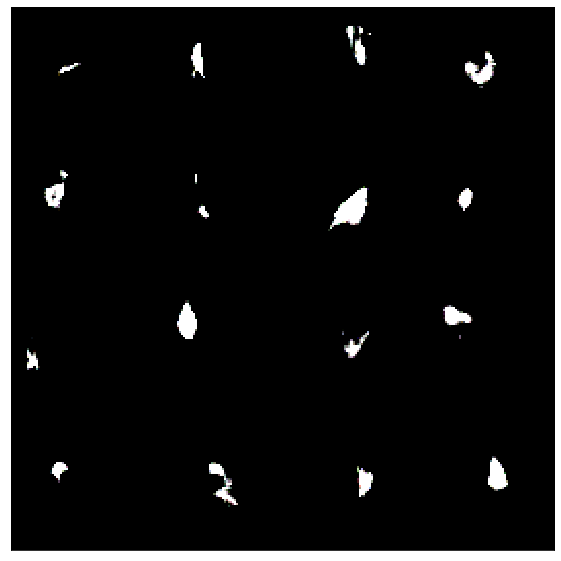

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


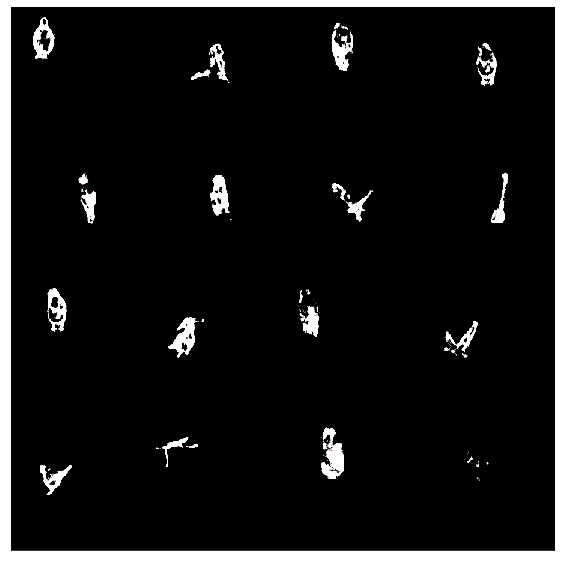

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 4


  0%|                                                                             | 1/17500 [00:14<68:27:03, 14.08s/it]

Train Epoch: 4 [0/280000 (0%)]	Loss: 0.035292
IOU : 0.0529327392578125
IOU : 0.0529327392578125


  0%|▏                                                                              | 50/17500 [00:17<46:05,  6.31it/s]

Train Epoch: 4 [200/280000 (0%)]	Loss: 0.031179
IOU : 0.046051025390625


  1%|▍                                                                             | 103/17500 [00:20<18:38, 15.55it/s]

Train Epoch: 4 [400/280000 (1%)]	Loss: 0.027494
IOU : 0.0457000732421875
IOU : 0.0457000732421875


  1%|▋                                                                             | 154/17500 [00:23<17:31, 16.50it/s]

Train Epoch: 4 [600/280000 (1%)]	Loss: 0.060801
IOU : 0.048553466796875


  1%|▉                                                                             | 201/17500 [00:26<15:24, 18.71it/s]

Train Epoch: 4 [800/280000 (1%)]	Loss: 0.029404
IOU : 0.0536956787109375
IOU : 0.0536956787109375


  1%|█▏                                                                            | 254/17500 [00:29<19:17, 14.90it/s]

Train Epoch: 4 [1000/280000 (1%)]	Loss: 0.033780
IOU : 0.0543212890625


  2%|█▎                                                                            | 302/17500 [00:32<16:43, 17.13it/s]

Train Epoch: 4 [1200/280000 (2%)]	Loss: 0.038805
IOU : 0.0580291748046875
IOU : 0.0580291748046875


  2%|█▌                                                                            | 351/17500 [00:35<18:12, 15.69it/s]

Train Epoch: 4 [1400/280000 (2%)]	Loss: 0.036781
IOU : 0.0523223876953125


  2%|█▊                                                                            | 399/17500 [00:38<17:31, 16.27it/s]

Train Epoch: 4 [1600/280000 (2%)]	Loss: 0.038737
IOU : 0.0624237060546875
IOU : 0.0624237060546875


  3%|██                                                                            | 454/17500 [00:41<16:51, 16.86it/s]

Train Epoch: 4 [1800/280000 (3%)]	Loss: 0.040633
IOU : 0.051666259765625


  3%|██▏                                                                           | 502/17500 [00:44<17:00, 16.66it/s]

Train Epoch: 4 [2000/280000 (3%)]	Loss: 0.038083
IOU : 0.04949951171875
IOU : 0.04949951171875


  3%|██▍                                                                           | 551/17500 [00:47<17:55, 15.75it/s]

Train Epoch: 4 [2200/280000 (3%)]	Loss: 0.053266
IOU : 0.0572967529296875


  3%|██▋                                                                           | 602/17500 [00:50<17:03, 16.51it/s]

Train Epoch: 4 [2400/280000 (3%)]	Loss: 0.042694
IOU : 0.0502777099609375
IOU : 0.0502777099609375


  4%|██▉                                                                           | 653/17500 [00:53<15:58, 17.57it/s]

Train Epoch: 4 [2600/280000 (4%)]	Loss: 0.035866
IOU : 0.0583648681640625


  4%|███▏                                                                          | 702/17500 [00:56<18:04, 15.49it/s]

Train Epoch: 4 [2800/280000 (4%)]	Loss: 0.053025
IOU : 0.056304931640625
IOU : 0.056304931640625


  4%|███▎                                                                          | 751/17500 [00:59<19:28, 14.33it/s]

Train Epoch: 4 [3000/280000 (4%)]	Loss: 0.042519
IOU : 0.04949951171875


  5%|███▌                                                                          | 798/17500 [01:02<17:23, 16.00it/s]

Train Epoch: 4 [3200/280000 (5%)]	Loss: 0.047105
IOU : 0.0618438720703125
IOU : 0.0618438720703125


  5%|███▊                                                                          | 854/17500 [01:05<17:21, 15.98it/s]

Train Epoch: 4 [3400/280000 (5%)]	Loss: 0.043183
IOU : 0.0565948486328125


  5%|████                                                                          | 902/17500 [01:08<17:57, 15.40it/s]

Train Epoch: 4 [3600/280000 (5%)]	Loss: 0.049229
IOU : 0.053863525390625
IOU : 0.053863525390625


  5%|████▏                                                                         | 950/17500 [01:11<17:16, 15.96it/s]

Train Epoch: 4 [3800/280000 (5%)]	Loss: 0.034574
IOU : 0.0467376708984375


  6%|████▍                                                                        | 1002/17500 [01:15<16:44, 16.42it/s]

Train Epoch: 4 [4000/280000 (6%)]	Loss: 0.037428
IOU : 0.0483551025390625
IOU : 0.0483551025390625


  6%|████▋                                                                        | 1052/17500 [01:18<16:45, 16.36it/s]

Train Epoch: 4 [4200/280000 (6%)]	Loss: 0.026847
IOU : 0.0501556396484375


  6%|████▊                                                                        | 1101/17500 [01:21<14:23, 19.00it/s]

Train Epoch: 4 [4400/280000 (6%)]	Loss: 0.035328
IOU : 0.0535125732421875
IOU : 0.0535125732421875


  7%|█████                                                                        | 1154/17500 [01:24<16:20, 16.66it/s]

Train Epoch: 4 [4600/280000 (7%)]	Loss: 0.030491
IOU : 0.0523529052734375


  7%|█████▎                                                                       | 1202/17500 [01:27<16:49, 16.15it/s]

Train Epoch: 4 [4800/280000 (7%)]	Loss: 0.044354
IOU : 0.0521240234375
IOU : 0.0521240234375


  7%|█████▌                                                                       | 1252/17500 [01:30<18:31, 14.62it/s]

Train Epoch: 4 [5000/280000 (7%)]	Loss: 0.047770
IOU : 0.0561065673828125


  7%|█████▋                                                                       | 1303/17500 [01:33<18:09, 14.87it/s]

Train Epoch: 4 [5200/280000 (7%)]	Loss: 0.039820
IOU : 0.0557098388671875
IOU : 0.0557098388671875


  8%|█████▉                                                                       | 1354/17500 [01:36<15:11, 17.71it/s]

Train Epoch: 4 [5400/280000 (8%)]	Loss: 0.038443
IOU : 0.057220458984375


  8%|██████▏                                                                      | 1401/17500 [01:40<18:16, 14.68it/s]

Train Epoch: 4 [5600/280000 (8%)]	Loss: 0.029163
IOU : 0.0598297119140625
IOU : 0.0598297119140625


  8%|██████▍                                                                      | 1453/17500 [01:43<17:40, 15.13it/s]

Train Epoch: 4 [5800/280000 (8%)]	Loss: 0.032727
IOU : 0.0554351806640625


  9%|██████▌                                                                      | 1503/17500 [01:46<17:19, 15.39it/s]

Train Epoch: 4 [6000/280000 (9%)]	Loss: 0.038858
IOU : 0.0616455078125
IOU : 0.0616455078125


  9%|██████▊                                                                      | 1553/17500 [01:49<17:11, 15.46it/s]

Train Epoch: 4 [6200/280000 (9%)]	Loss: 0.043751
IOU : 0.055419921875


  9%|███████                                                                      | 1602/17500 [01:52<18:17, 14.49it/s]

Train Epoch: 4 [6400/280000 (9%)]	Loss: 0.054017
IOU : 0.0543365478515625
IOU : 0.0543365478515625


  9%|███████▎                                                                     | 1652/17500 [01:55<16:36, 15.90it/s]

Train Epoch: 4 [6600/280000 (9%)]	Loss: 0.034471
IOU : 0.0484771728515625


 10%|███████▍                                                                     | 1701/17500 [01:58<18:03, 14.57it/s]

Train Epoch: 4 [6800/280000 (10%)]	Loss: 0.036822
IOU : 0.0518798828125
IOU : 0.0518798828125


 10%|███████▋                                                                     | 1748/17500 [02:01<17:29, 15.01it/s]

Train Epoch: 4 [7000/280000 (10%)]	Loss: 0.041326
IOU : 0.0536956787109375


 10%|███████▉                                                                     | 1800/17500 [02:05<17:16, 15.14it/s]

Train Epoch: 4 [7200/280000 (10%)]	Loss: 0.041597
IOU : 0.0575408935546875
IOU : 0.0575408935546875


 11%|████████▏                                                                    | 1853/17500 [02:08<16:19, 15.97it/s]

Train Epoch: 4 [7400/280000 (11%)]	Loss: 0.027845
IOU : 0.0455474853515625


 11%|████████▎                                                                    | 1903/17500 [02:11<17:16, 15.05it/s]

Train Epoch: 4 [7600/280000 (11%)]	Loss: 0.044058
IOU : 0.0540618896484375
IOU : 0.0540618896484375


 11%|████████▌                                                                    | 1953/17500 [02:14<16:10, 16.02it/s]

Train Epoch: 4 [7800/280000 (11%)]	Loss: 0.037451
IOU : 0.05889892578125


 11%|████████▊                                                                    | 2003/17500 [02:17<16:00, 16.13it/s]

Train Epoch: 4 [8000/280000 (11%)]	Loss: 0.032092
IOU : 0.0502777099609375
IOU : 0.0502777099609375


 12%|█████████                                                                    | 2051/17500 [02:20<14:40, 17.56it/s]

Train Epoch: 4 [8200/280000 (12%)]	Loss: 0.036510
IOU : 0.0575408935546875


 12%|█████████▏                                                                   | 2101/17500 [02:24<16:56, 15.15it/s]

Train Epoch: 4 [8400/280000 (12%)]	Loss: 0.032062
IOU : 0.05523681640625
IOU : 0.05523681640625


 12%|█████████▍                                                                   | 2151/17500 [02:27<15:29, 16.51it/s]

Train Epoch: 4 [8600/280000 (12%)]	Loss: 0.039725
IOU : 0.0533599853515625


 13%|█████████▋                                                                   | 2201/17500 [02:30<16:47, 15.19it/s]

Train Epoch: 4 [8800/280000 (13%)]	Loss: 0.033965
IOU : 0.0501861572265625
IOU : 0.0501861572265625


 13%|█████████▉                                                                   | 2252/17500 [02:33<16:13, 15.66it/s]

Train Epoch: 4 [9000/280000 (13%)]	Loss: 0.030722
IOU : 0.054229736328125


 13%|██████████                                                                   | 2301/17500 [02:36<16:50, 15.04it/s]

Train Epoch: 4 [9200/280000 (13%)]	Loss: 0.032541
IOU : 0.052703857421875
IOU : 0.052703857421875


 13%|██████████▎                                                                  | 2353/17500 [02:39<14:18, 17.65it/s]

Train Epoch: 4 [9400/280000 (13%)]	Loss: 0.026344
IOU : 0.0488128662109375


 14%|██████████▌                                                                  | 2402/17500 [02:42<15:32, 16.20it/s]

Train Epoch: 4 [9600/280000 (14%)]	Loss: 0.030101
IOU : 0.053802490234375
IOU : 0.053802490234375


 14%|██████████▊                                                                  | 2450/17500 [02:45<15:38, 16.03it/s]

Train Epoch: 4 [9800/280000 (14%)]	Loss: 0.029074
IOU : 0.051971435546875


 14%|███████████                                                                  | 2502/17500 [02:49<15:07, 16.53it/s]

Train Epoch: 4 [10000/280000 (14%)]	Loss: 0.043435
IOU : 0.0456695556640625
IOU : 0.0456695556640625


 15%|███████████▏                                                                 | 2550/17500 [02:52<16:01, 15.56it/s]

Train Epoch: 4 [10200/280000 (15%)]	Loss: 0.029411
IOU : 0.0525665283203125


 15%|███████████▍                                                                 | 2598/17500 [02:55<15:55, 15.59it/s]

Train Epoch: 4 [10400/280000 (15%)]	Loss: 0.039219
IOU : 0.0610198974609375
IOU : 0.0610198974609375


 15%|███████████▋                                                                 | 2650/17500 [02:58<15:12, 16.27it/s]

Train Epoch: 4 [10600/280000 (15%)]	Loss: 0.033593
IOU : 0.0537872314453125


 15%|███████████▉                                                                 | 2702/17500 [03:01<15:10, 16.25it/s]

Train Epoch: 4 [10800/280000 (15%)]	Loss: 0.035815
IOU : 0.0518646240234375
IOU : 0.0518646240234375


 16%|████████████                                                                 | 2750/17500 [03:04<15:58, 15.40it/s]

Train Epoch: 4 [11000/280000 (16%)]	Loss: 0.041101
IOU : 0.056884765625


 16%|████████████▎                                                                | 2798/17500 [03:07<15:32, 15.76it/s]

Train Epoch: 4 [11200/280000 (16%)]	Loss: 0.031207
IOU : 0.04925537109375
IOU : 0.04925537109375


 16%|████████████▌                                                                | 2850/17500 [03:11<15:10, 16.10it/s]

Train Epoch: 4 [11400/280000 (16%)]	Loss: 0.038682
IOU : 0.048431396484375


 17%|████████████▊                                                                | 2903/17500 [03:14<14:52, 16.35it/s]

Train Epoch: 4 [11600/280000 (17%)]	Loss: 0.049543
IOU : 0.05181884765625
IOU : 0.05181884765625


 17%|████████████▉                                                                | 2953/17500 [03:17<13:47, 17.58it/s]

Train Epoch: 4 [11800/280000 (17%)]	Loss: 0.038190
IOU : 0.054443359375


 17%|█████████████▏                                                               | 3003/17500 [03:20<15:02, 16.07it/s]

Train Epoch: 4 [12000/280000 (17%)]	Loss: 0.030163
IOU : 0.0529937744140625
IOU : 0.0529937744140625


 17%|█████████████▍                                                               | 3052/17500 [03:23<16:44, 14.38it/s]

Train Epoch: 4 [12200/280000 (17%)]	Loss: 0.038546
IOU : 0.0589599609375


 18%|█████████████▋                                                               | 3103/17500 [03:27<16:18, 14.71it/s]

Train Epoch: 4 [12400/280000 (18%)]	Loss: 0.051727
IOU : 0.0644683837890625
IOU : 0.0644683837890625


 18%|█████████████▊                                                               | 3153/17500 [03:30<13:12, 18.09it/s]

Train Epoch: 4 [12600/280000 (18%)]	Loss: 0.030010
IOU : 0.05401611328125


 18%|██████████████                                                               | 3201/17500 [03:33<15:16, 15.61it/s]

Train Epoch: 4 [12800/280000 (18%)]	Loss: 0.059945
IOU : 0.0609588623046875
IOU : 0.0609588623046875


 19%|██████████████▎                                                              | 3252/17500 [03:36<15:37, 15.19it/s]

Train Epoch: 4 [13000/280000 (19%)]	Loss: 0.027565
IOU : 0.0435638427734375


 19%|██████████████▌                                                              | 3302/17500 [03:39<16:47, 14.09it/s]

Train Epoch: 4 [13200/280000 (19%)]	Loss: 0.025494
IOU : 0.0465850830078125
IOU : 0.0465850830078125


 19%|██████████████▊                                                              | 3353/17500 [03:43<15:24, 15.30it/s]

Train Epoch: 4 [13400/280000 (19%)]	Loss: 0.038145
IOU : 0.04986572265625


 19%|██████████████▉                                                              | 3401/17500 [03:46<15:21, 15.30it/s]

Train Epoch: 4 [13600/280000 (19%)]	Loss: 0.032089
IOU : 0.0460357666015625
IOU : 0.0460357666015625


 20%|███████████████▏                                                             | 3452/17500 [03:49<15:02, 15.56it/s]

Train Epoch: 4 [13800/280000 (20%)]	Loss: 0.032576
IOU : 0.0532073974609375


 20%|███████████████▍                                                             | 3502/17500 [03:52<15:53, 14.68it/s]

Train Epoch: 4 [14000/280000 (20%)]	Loss: 0.040543
IOU : 0.059814453125
IOU : 0.059814453125


 20%|███████████████▌                                                             | 3550/17500 [03:55<15:02, 15.45it/s]

Train Epoch: 4 [14200/280000 (20%)]	Loss: 0.043020
IOU : 0.0626678466796875


 21%|███████████████▊                                                             | 3602/17500 [03:58<14:52, 15.57it/s]

Train Epoch: 4 [14400/280000 (21%)]	Loss: 0.058351
IOU : 0.04931640625
IOU : 0.04931640625


 21%|████████████████                                                             | 3650/17500 [04:01<14:08, 16.32it/s]

Train Epoch: 4 [14600/280000 (21%)]	Loss: 0.052092
IOU : 0.057952880859375


 21%|████████████████▎                                                            | 3701/17500 [04:04<16:11, 14.21it/s]

Train Epoch: 4 [14800/280000 (21%)]	Loss: 0.049765
IOU : 0.0634613037109375
IOU : 0.0634613037109375


 21%|████████████████▌                                                            | 3752/17500 [04:08<14:07, 16.22it/s]

Train Epoch: 4 [15000/280000 (21%)]	Loss: 0.045610
IOU : 0.05596923828125


 22%|████████████████▋                                                            | 3803/17500 [04:11<12:46, 17.86it/s]

Train Epoch: 4 [15200/280000 (22%)]	Loss: 0.030871
IOU : 0.04901123046875
IOU : 0.04901123046875


 22%|████████████████▉                                                            | 3853/17500 [04:14<14:54, 15.25it/s]

Train Epoch: 4 [15400/280000 (22%)]	Loss: 0.042153
IOU : 0.0509185791015625


 22%|█████████████████▏                                                           | 3901/17500 [04:17<15:56, 14.21it/s]

Train Epoch: 4 [15600/280000 (22%)]	Loss: 0.026573
IOU : 0.04766845703125
IOU : 0.04766845703125


 23%|█████████████████▎                                                           | 3948/17500 [04:20<14:07, 16.00it/s]

Train Epoch: 4 [15800/280000 (23%)]	Loss: 0.039525
IOU : 0.0498504638671875


 23%|█████████████████▌                                                           | 4000/17500 [04:23<14:33, 15.45it/s]

Train Epoch: 4 [16000/280000 (23%)]	Loss: 0.031112
IOU : 0.05096435546875
IOU : 0.05096435546875


 23%|█████████████████▊                                                           | 4052/17500 [04:27<13:23, 16.74it/s]

Train Epoch: 4 [16200/280000 (23%)]	Loss: 0.036934
IOU : 0.0536346435546875


 23%|██████████████████                                                           | 4100/17500 [04:30<14:23, 15.51it/s]

Train Epoch: 4 [16400/280000 (23%)]	Loss: 0.025331
IOU : 0.048736572265625
IOU : 0.048736572265625


 24%|██████████████████▎                                                          | 4151/17500 [04:33<12:11, 18.24it/s]

Train Epoch: 4 [16600/280000 (24%)]	Loss: 0.031790
IOU : 0.0486907958984375


 24%|██████████████████▍                                                          | 4200/17500 [04:36<15:31, 14.28it/s]

Train Epoch: 4 [16800/280000 (24%)]	Loss: 0.031979
IOU : 0.049468994140625
IOU : 0.049468994140625


 24%|██████████████████▋                                                          | 4248/17500 [04:39<14:19, 15.42it/s]

Train Epoch: 4 [17000/280000 (24%)]	Loss: 0.038485
IOU : 0.04669189453125


 25%|██████████████████▉                                                          | 4300/17500 [04:42<13:38, 16.12it/s]

Train Epoch: 4 [17200/280000 (25%)]	Loss: 0.040942
IOU : 0.05609130859375
IOU : 0.05609130859375


 25%|███████████████████▏                                                         | 4352/17500 [04:45<13:16, 16.50it/s]

Train Epoch: 4 [17400/280000 (25%)]	Loss: 0.034685
IOU : 0.0475616455078125


 25%|███████████████████▎                                                         | 4400/17500 [04:48<13:57, 15.64it/s]

Train Epoch: 4 [17600/280000 (25%)]	Loss: 0.030554
IOU : 0.047943115234375
IOU : 0.047943115234375


 25%|███████████████████▌                                                         | 4452/17500 [04:51<13:30, 16.09it/s]

Train Epoch: 4 [17800/280000 (25%)]	Loss: 0.043223
IOU : 0.052276611328125


 26%|███████████████████▊                                                         | 4500/17500 [04:54<13:10, 16.44it/s]

Train Epoch: 4 [18000/280000 (26%)]	Loss: 0.041443
IOU : 0.053436279296875
IOU : 0.053436279296875


 26%|████████████████████                                                         | 4552/17500 [04:58<13:05, 16.47it/s]

Train Epoch: 4 [18200/280000 (26%)]	Loss: 0.047529
IOU : 0.0530242919921875


 26%|████████████████████▎                                                        | 4603/17500 [05:01<11:38, 18.45it/s]

Train Epoch: 4 [18400/280000 (26%)]	Loss: 0.036040
IOU : 0.0469207763671875
IOU : 0.0469207763671875


 27%|████████████████████▍                                                        | 4652/17500 [05:04<13:10, 16.25it/s]

Train Epoch: 4 [18600/280000 (27%)]	Loss: 0.029502
IOU : 0.050994873046875


 27%|████████████████████▋                                                        | 4703/17500 [05:07<12:33, 16.99it/s]

Train Epoch: 4 [18800/280000 (27%)]	Loss: 0.044968
IOU : 0.0506591796875
IOU : 0.0506591796875


 27%|████████████████████▉                                                        | 4748/17500 [05:10<13:19, 15.96it/s]

Train Epoch: 4 [19000/280000 (27%)]	Loss: 0.036719
IOU : 0.048431396484375


 27%|█████████████████████                                                        | 4800/17500 [05:13<13:16, 15.95it/s]

Train Epoch: 4 [19200/280000 (27%)]	Loss: 0.044068
IOU : 0.0453338623046875
IOU : 0.0453338623046875


 28%|█████████████████████▎                                                       | 4852/17500 [05:17<12:45, 16.53it/s]

Train Epoch: 4 [19400/280000 (28%)]	Loss: 0.037750
IOU : 0.0568389892578125


 28%|█████████████████████▌                                                       | 4900/17500 [05:19<12:51, 16.34it/s]

Train Epoch: 4 [19600/280000 (28%)]	Loss: 0.035305
IOU : 0.0521087646484375
IOU : 0.0521087646484375


 28%|█████████████████████▊                                                       | 4952/17500 [05:23<12:37, 16.55it/s]

Train Epoch: 4 [19800/280000 (28%)]	Loss: 0.032333
IOU : 0.0563812255859375


 29%|██████████████████████                                                       | 5000/17500 [05:26<12:53, 16.16it/s]

Train Epoch: 4 [20000/280000 (29%)]	Loss: 0.036675
IOU : 0.055633544921875
IOU : 0.055633544921875


 29%|██████████████████████▏                                                      | 5052/17500 [05:29<13:02, 15.91it/s]

Train Epoch: 4 [20200/280000 (29%)]	Loss: 0.040001
IOU : 0.0530242919921875


 29%|██████████████████████▍                                                      | 5100/17500 [05:32<13:08, 15.73it/s]

Train Epoch: 4 [20400/280000 (29%)]	Loss: 0.051099
IOU : 0.0491485595703125
IOU : 0.0491485595703125


 29%|██████████████████████▋                                                      | 5148/17500 [05:35<12:51, 16.01it/s]

Train Epoch: 4 [20600/280000 (29%)]	Loss: 0.027540
IOU : 0.0536651611328125


 30%|██████████████████████▉                                                      | 5200/17500 [05:38<12:44, 16.10it/s]

Train Epoch: 4 [20800/280000 (30%)]	Loss: 0.034263
IOU : 0.046966552734375
IOU : 0.046966552734375


 30%|███████████████████████                                                      | 5252/17500 [05:41<12:26, 16.41it/s]

Train Epoch: 4 [21000/280000 (30%)]	Loss: 0.043786
IOU : 0.0501708984375


 30%|███████████████████████▎                                                     | 5303/17500 [05:44<11:12, 18.13it/s]

Train Epoch: 4 [21200/280000 (30%)]	Loss: 0.046377
IOU : 0.0541534423828125
IOU : 0.0541534423828125


 31%|███████████████████████▌                                                     | 5348/17500 [05:47<13:22, 15.14it/s]

Train Epoch: 4 [21400/280000 (31%)]	Loss: 0.041232
IOU : 0.063201904296875


 31%|███████████████████████▊                                                     | 5403/17500 [05:51<10:50, 18.60it/s]

Train Epoch: 4 [21600/280000 (31%)]	Loss: 0.049173
IOU : 0.062652587890625
IOU : 0.062652587890625


 31%|███████████████████████▉                                                     | 5452/17500 [05:54<12:41, 15.82it/s]

Train Epoch: 4 [21800/280000 (31%)]	Loss: 0.041353
IOU : 0.0532379150390625


 31%|████████████████████████▏                                                    | 5501/17500 [05:57<13:58, 14.31it/s]

Train Epoch: 4 [22000/280000 (31%)]	Loss: 0.038978
IOU : 0.0486297607421875
IOU : 0.0486297607421875


 32%|████████████████████████▍                                                    | 5548/17500 [06:00<12:47, 15.58it/s]

Train Epoch: 4 [22200/280000 (32%)]	Loss: 0.049001
IOU : 0.056427001953125


 32%|████████████████████████▋                                                    | 5600/17500 [06:03<12:14, 16.19it/s]

Train Epoch: 4 [22400/280000 (32%)]	Loss: 0.033057
IOU : 0.0543365478515625
IOU : 0.0543365478515625


 32%|████████████████████████▊                                                    | 5652/17500 [06:07<14:05, 14.01it/s]

Train Epoch: 4 [22600/280000 (32%)]	Loss: 0.058270
IOU : 0.0558929443359375


 33%|█████████████████████████                                                    | 5700/17500 [06:10<12:05, 16.27it/s]

Train Epoch: 4 [22800/280000 (33%)]	Loss: 0.052138
IOU : 0.0531463623046875
IOU : 0.0531463623046875


 33%|█████████████████████████▎                                                   | 5748/17500 [06:13<12:44, 15.37it/s]

Train Epoch: 4 [23000/280000 (33%)]	Loss: 0.036935
IOU : 0.048797607421875


 33%|█████████████████████████▌                                                   | 5800/17500 [06:16<12:29, 15.62it/s]

Train Epoch: 4 [23200/280000 (33%)]	Loss: 0.022724
IOU : 0.0405120849609375
IOU : 0.0405120849609375


 33%|█████████████████████████▋                                                   | 5848/17500 [06:19<11:57, 16.25it/s]

Train Epoch: 4 [23400/280000 (33%)]	Loss: 0.032155
IOU : 0.0563201904296875


 34%|█████████████████████████▉                                                   | 5900/17500 [06:22<12:08, 15.92it/s]

Train Epoch: 4 [23600/280000 (34%)]	Loss: 0.036127
IOU : 0.0494537353515625
IOU : 0.0494537353515625


 34%|██████████████████████████▏                                                  | 5952/17500 [06:25<11:55, 16.15it/s]

Train Epoch: 4 [23800/280000 (34%)]	Loss: 0.053781
IOU : 0.050811767578125


 34%|██████████████████████████▍                                                  | 6000/17500 [06:28<11:47, 16.25it/s]

Train Epoch: 4 [24000/280000 (34%)]	Loss: 0.023452
IOU : 0.0446929931640625
IOU : 0.0446929931640625


 35%|██████████████████████████▌                                                  | 6048/17500 [06:31<12:12, 15.64it/s]

Train Epoch: 4 [24200/280000 (35%)]	Loss: 0.036718
IOU : 0.0531158447265625


 35%|██████████████████████████▊                                                  | 6100/17500 [06:35<11:30, 16.51it/s]

Train Epoch: 4 [24400/280000 (35%)]	Loss: 0.043916
IOU : 0.0558624267578125
IOU : 0.0558624267578125


 35%|███████████████████████████                                                  | 6148/17500 [06:38<11:54, 15.88it/s]

Train Epoch: 4 [24600/280000 (35%)]	Loss: 0.047687
IOU : 0.0550689697265625


 35%|███████████████████████████▎                                                 | 6200/17500 [06:41<11:33, 16.30it/s]

Train Epoch: 4 [24800/280000 (35%)]	Loss: 0.045549
IOU : 0.0492095947265625
IOU : 0.0492095947265625


 36%|███████████████████████████▌                                                 | 6252/17500 [06:44<11:55, 15.71it/s]

Train Epoch: 4 [25000/280000 (36%)]	Loss: 0.033380
IOU : 0.058197021484375


 36%|███████████████████████████▋                                                 | 6300/17500 [06:47<11:11, 16.68it/s]

Train Epoch: 4 [25200/280000 (36%)]	Loss: 0.050722
IOU : 0.0589599609375
IOU : 0.0589599609375


 36%|███████████████████████████▉                                                 | 6348/17500 [06:50<11:40, 15.92it/s]

Train Epoch: 4 [25400/280000 (36%)]	Loss: 0.051776
IOU : 0.0516357421875


 37%|████████████████████████████▏                                                | 6400/17500 [06:53<11:22, 16.26it/s]

Train Epoch: 4 [25600/280000 (37%)]	Loss: 0.060343
IOU : 0.0617218017578125
IOU : 0.0617218017578125


 37%|████████████████████████████▎                                                | 6448/17500 [06:56<11:06, 16.59it/s]

Train Epoch: 4 [25800/280000 (37%)]	Loss: 0.048818
IOU : 0.0521697998046875


 37%|████████████████████████████▌                                                | 6500/17500 [06:59<12:30, 14.65it/s]

Train Epoch: 4 [26000/280000 (37%)]	Loss: 0.035930
IOU : 0.044677734375
IOU : 0.044677734375


 37%|████████████████████████████▊                                                | 6552/17500 [07:03<12:05, 15.10it/s]

Train Epoch: 4 [26200/280000 (37%)]	Loss: 0.036534
IOU : 0.0523223876953125


 38%|█████████████████████████████                                                | 6600/17500 [07:06<10:55, 16.63it/s]

Train Epoch: 4 [26400/280000 (38%)]	Loss: 0.030034
IOU : 0.0496368408203125
IOU : 0.0496368408203125


 38%|█████████████████████████████▎                                               | 6648/17500 [07:09<13:29, 13.41it/s]

Train Epoch: 4 [26600/280000 (38%)]	Loss: 0.052672
IOU : 0.057769775390625


 38%|█████████████████████████████▍                                               | 6703/17500 [07:12<10:53, 16.52it/s]

Train Epoch: 4 [26800/280000 (38%)]	Loss: 0.029983
IOU : 0.0531768798828125
IOU : 0.0531768798828125


 39%|█████████████████████████████▋                                               | 6752/17500 [07:15<11:14, 15.94it/s]

Train Epoch: 4 [27000/280000 (39%)]	Loss: 0.032509
IOU : 0.0557098388671875


 39%|█████████████████████████████▉                                               | 6800/17500 [07:18<10:52, 16.40it/s]

Train Epoch: 4 [27200/280000 (39%)]	Loss: 0.044530
IOU : 0.0599822998046875
IOU : 0.0599822998046875


 39%|██████████████████████████████▏                                              | 6853/17500 [07:21<12:31, 14.16it/s]

Train Epoch: 4 [27400/280000 (39%)]	Loss: 0.038904
IOU : 0.051177978515625


 39%|██████████████████████████████▎                                              | 6902/17500 [07:25<11:54, 14.84it/s]

Train Epoch: 4 [27600/280000 (39%)]	Loss: 0.041446
IOU : 0.0589447021484375
IOU : 0.0589447021484375


 40%|██████████████████████████████▌                                              | 6951/17500 [07:28<10:58, 16.03it/s]

Train Epoch: 4 [27800/280000 (40%)]	Loss: 0.037986
IOU : 0.0586700439453125


 40%|██████████████████████████████▊                                              | 7002/17500 [07:31<10:52, 16.09it/s]

Train Epoch: 4 [28000/280000 (40%)]	Loss: 0.037632
IOU : 0.0590667724609375
IOU : 0.0590667724609375


 40%|███████████████████████████████                                              | 7053/17500 [07:34<11:03, 15.75it/s]

Train Epoch: 4 [28200/280000 (40%)]	Loss: 0.036647
IOU : 0.0498504638671875


 41%|███████████████████████████████▏                                             | 7102/17500 [07:37<10:38, 16.29it/s]

Train Epoch: 4 [28400/280000 (41%)]	Loss: 0.032849
IOU : 0.059844970703125
IOU : 0.059844970703125


 41%|███████████████████████████████▍                                             | 7152/17500 [07:41<10:02, 17.17it/s]

Train Epoch: 4 [28600/280000 (41%)]	Loss: 0.038428
IOU : 0.0574188232421875


 41%|███████████████████████████████▋                                             | 7201/17500 [07:44<11:04, 15.49it/s]

Train Epoch: 4 [28800/280000 (41%)]	Loss: 0.032134
IOU : 0.048065185546875
IOU : 0.048065185546875


 41%|███████████████████████████████▉                                             | 7248/17500 [07:47<11:41, 14.61it/s]

Train Epoch: 4 [29000/280000 (41%)]	Loss: 0.029290
IOU : 0.0441741943359375


 42%|████████████████████████████████▏                                            | 7302/17500 [07:50<10:42, 15.86it/s]

Train Epoch: 4 [29200/280000 (42%)]	Loss: 0.034902
IOU : 0.0437774658203125
IOU : 0.0437774658203125


 42%|████████████████████████████████▎                                            | 7352/17500 [07:53<10:10, 16.61it/s]

Train Epoch: 4 [29400/280000 (42%)]	Loss: 0.033229
IOU : 0.052337646484375


 42%|████████████████████████████████▌                                            | 7403/17500 [07:56<10:31, 15.99it/s]

Train Epoch: 4 [29600/280000 (42%)]	Loss: 0.047530
IOU : 0.0557861328125
IOU : 0.0557861328125


 43%|████████████████████████████████▊                                            | 7452/17500 [07:59<11:42, 14.30it/s]

Train Epoch: 4 [29800/280000 (43%)]	Loss: 0.044949
IOU : 0.054046630859375


 43%|█████████████████████████████████                                            | 7503/17500 [08:02<10:16, 16.22it/s]

Train Epoch: 4 [30000/280000 (43%)]	Loss: 0.037948
IOU : 0.0507965087890625
IOU : 0.0507965087890625


 43%|█████████████████████████████████▏                                           | 7554/17500 [08:06<11:34, 14.32it/s]

Train Epoch: 4 [30200/280000 (43%)]	Loss: 0.038730
IOU : 0.0489501953125


 43%|█████████████████████████████████▍                                           | 7601/17500 [08:10<18:09,  9.08it/s]

Train Epoch: 4 [30400/280000 (43%)]	Loss: 0.049097
IOU : 0.0593414306640625
IOU : 0.0593414306640625


 44%|█████████████████████████████████▋                                           | 7653/17500 [08:13<10:49, 15.17it/s]

Train Epoch: 4 [30600/280000 (44%)]	Loss: 0.033144
IOU : 0.04876708984375


 44%|█████████████████████████████████▉                                           | 7703/17500 [08:16<10:29, 15.57it/s]

Train Epoch: 4 [30800/280000 (44%)]	Loss: 0.046796
IOU : 0.0538482666015625
IOU : 0.0538482666015625


 44%|██████████████████████████████████                                           | 7753/17500 [08:19<10:03, 16.14it/s]

Train Epoch: 4 [31000/280000 (44%)]	Loss: 0.041977
IOU : 0.060699462890625


 45%|██████████████████████████████████▎                                          | 7801/17500 [08:23<11:15, 14.35it/s]

Train Epoch: 4 [31200/280000 (45%)]	Loss: 0.062506
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 45%|██████████████████████████████████▌                                          | 7853/17500 [08:26<10:08, 15.85it/s]

Train Epoch: 4 [31400/280000 (45%)]	Loss: 0.030841
IOU : 0.0475006103515625


 45%|██████████████████████████████████▊                                          | 7902/17500 [08:29<09:55, 16.12it/s]

Train Epoch: 4 [31600/280000 (45%)]	Loss: 0.038616
IOU : 0.053070068359375
IOU : 0.053070068359375


 45%|██████████████████████████████████▉                                          | 7951/17500 [08:32<08:58, 17.72it/s]

Train Epoch: 4 [31800/280000 (45%)]	Loss: 0.045649
IOU : 0.0588226318359375


 46%|███████████████████████████████████▏                                         | 8003/17500 [08:35<08:58, 17.63it/s]

Train Epoch: 4 [32000/280000 (46%)]	Loss: 0.035138
IOU : 0.04876708984375
IOU : 0.04876708984375


 46%|███████████████████████████████████▍                                         | 8052/17500 [08:38<10:44, 14.65it/s]

Train Epoch: 4 [32200/280000 (46%)]	Loss: 0.039618
IOU : 0.057830810546875


 46%|███████████████████████████████████▋                                         | 8100/17500 [08:41<10:38, 14.73it/s]

Train Epoch: 4 [32400/280000 (46%)]	Loss: 0.043498
IOU : 0.0682220458984375
IOU : 0.0682220458984375


 47%|███████████████████████████████████▊                                         | 8152/17500 [08:44<10:30, 14.83it/s]

Train Epoch: 4 [32600/280000 (47%)]	Loss: 0.046937
IOU : 0.0522918701171875


 47%|████████████████████████████████████                                         | 8200/17500 [08:47<09:33, 16.22it/s]

Train Epoch: 4 [32800/280000 (47%)]	Loss: 0.046509
IOU : 0.0495452880859375
IOU : 0.0495452880859375


 47%|████████████████████████████████████▎                                        | 8251/17500 [08:50<08:26, 18.26it/s]

Train Epoch: 4 [33000/280000 (47%)]	Loss: 0.043847
IOU : 0.0568389892578125


 47%|████████████████████████████████████▌                                        | 8300/17500 [08:53<10:22, 14.78it/s]

Train Epoch: 4 [33200/280000 (47%)]	Loss: 0.049869
IOU : 0.0529327392578125
IOU : 0.0529327392578125


 48%|████████████████████████████████████▋                                        | 8352/17500 [08:57<09:06, 16.74it/s]

Train Epoch: 4 [33400/280000 (48%)]	Loss: 0.038772
IOU : 0.0473785400390625


 48%|████████████████████████████████████▉                                        | 8400/17500 [09:00<09:37, 15.75it/s]

Train Epoch: 4 [33600/280000 (48%)]	Loss: 0.039502
IOU : 0.051544189453125
IOU : 0.051544189453125


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:03<07:50, 19.25it/s]

Train Epoch: 4 [33800/280000 (48%)]	Loss: 0.051711
IOU : 0.0540924072265625


 49%|█████████████████████████████████████▍                                       | 8500/17500 [09:06<08:59, 16.67it/s]

Train Epoch: 4 [34000/280000 (49%)]	Loss: 0.039695
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 49%|█████████████████████████████████████▌                                       | 8548/17500 [09:09<09:01, 16.53it/s]

Train Epoch: 4 [34200/280000 (49%)]	Loss: 0.035339
IOU : 0.0537567138671875


 49%|█████████████████████████████████████▊                                       | 8603/17500 [09:12<07:43, 19.21it/s]

Train Epoch: 4 [34400/280000 (49%)]	Loss: 0.031892
IOU : 0.0485076904296875
IOU : 0.0485076904296875


 49%|██████████████████████████████████████                                       | 8652/17500 [09:15<09:08, 16.12it/s]

Train Epoch: 4 [34600/280000 (49%)]	Loss: 0.034332
IOU : 0.0453033447265625


 50%|██████████████████████████████████████▎                                      | 8700/17500 [09:18<08:46, 16.71it/s]

Train Epoch: 4 [34800/280000 (50%)]	Loss: 0.047566
IOU : 0.05645751953125
IOU : 0.05645751953125


 50%|██████████████████████████████████████▌                                      | 8752/17500 [09:21<09:08, 15.96it/s]

Train Epoch: 4 [35000/280000 (50%)]	Loss: 0.041138
IOU : 0.0511932373046875


 50%|██████████████████████████████████████▋                                      | 8800/17500 [09:24<08:48, 16.47it/s]

Train Epoch: 4 [35200/280000 (50%)]	Loss: 0.035630
IOU : 0.0576324462890625
IOU : 0.0576324462890625


 51%|██████████████████████████████████████▉                                      | 8848/17500 [09:27<08:42, 16.55it/s]

Train Epoch: 4 [35400/280000 (51%)]	Loss: 0.042250
IOU : 0.0498199462890625


 51%|███████████████████████████████████████▏                                     | 8900/17500 [09:30<08:18, 17.25it/s]

Train Epoch: 4 [35600/280000 (51%)]	Loss: 0.042279
IOU : 0.05450439453125
IOU : 0.05450439453125


 51%|███████████████████████████████████████▎                                     | 8948/17500 [09:33<08:53, 16.02it/s]

Train Epoch: 4 [35800/280000 (51%)]	Loss: 0.045127
IOU : 0.053253173828125


 51%|███████████████████████████████████████▌                                     | 9000/17500 [09:36<08:29, 16.68it/s]

Train Epoch: 4 [36000/280000 (51%)]	Loss: 0.037800
IOU : 0.0529327392578125
IOU : 0.0529327392578125


 52%|███████████████████████████████████████▊                                     | 9051/17500 [09:39<07:41, 18.29it/s]

Train Epoch: 4 [36200/280000 (52%)]	Loss: 0.047756
IOU : 0.06072998046875


 52%|████████████████████████████████████████                                     | 9100/17500 [09:43<08:52, 15.79it/s]

Train Epoch: 4 [36400/280000 (52%)]	Loss: 0.034435
IOU : 0.0536651611328125
IOU : 0.0536651611328125


 52%|████████████████████████████████████████▎                                    | 9152/17500 [09:46<08:33, 16.26it/s]

Train Epoch: 4 [36600/280000 (52%)]	Loss: 0.030393
IOU : 0.052459716796875


 53%|████████████████████████████████████████▍                                    | 9200/17500 [09:49<08:25, 16.41it/s]

Train Epoch: 4 [36800/280000 (53%)]	Loss: 0.030549
IOU : 0.0496368408203125
IOU : 0.0496368408203125


 53%|████████████████████████████████████████▋                                    | 9252/17500 [09:52<08:23, 16.39it/s]

Train Epoch: 4 [37000/280000 (53%)]	Loss: 0.076407
IOU : 0.0631256103515625


 53%|████████████████████████████████████████▉                                    | 9300/17500 [09:55<08:19, 16.41it/s]

Train Epoch: 4 [37200/280000 (53%)]	Loss: 0.047379
IOU : 0.0463714599609375
IOU : 0.0463714599609375


 53%|█████████████████████████████████████████▏                                   | 9352/17500 [09:58<08:52, 15.31it/s]

Train Epoch: 4 [37400/280000 (53%)]	Loss: 0.037376
IOU : 0.0472869873046875


 54%|█████████████████████████████████████████▎                                   | 9400/17500 [10:01<08:00, 16.86it/s]

Train Epoch: 4 [37600/280000 (54%)]	Loss: 0.039879
IOU : 0.0594024658203125
IOU : 0.0594024658203125


 54%|█████████████████████████████████████████▌                                   | 9452/17500 [10:04<08:10, 16.40it/s]

Train Epoch: 4 [37800/280000 (54%)]	Loss: 0.035858
IOU : 0.0470123291015625


 54%|█████████████████████████████████████████▊                                   | 9500/17500 [10:07<08:20, 15.98it/s]

Train Epoch: 4 [38000/280000 (54%)]	Loss: 0.040318
IOU : 0.058563232421875
IOU : 0.058563232421875


 55%|██████████████████████████████████████████                                   | 9552/17500 [10:11<07:58, 16.61it/s]

Train Epoch: 4 [38200/280000 (55%)]	Loss: 0.046888
IOU : 0.05816650390625


 55%|██████████████████████████████████████████▏                                  | 9600/17500 [10:13<07:45, 16.96it/s]

Train Epoch: 4 [38400/280000 (55%)]	Loss: 0.038174
IOU : 0.0504608154296875
IOU : 0.0504608154296875


 55%|██████████████████████████████████████████▍                                  | 9653/17500 [10:17<08:18, 15.75it/s]

Train Epoch: 4 [38600/280000 (55%)]	Loss: 0.033494
IOU : 0.056121826171875


 55%|██████████████████████████████████████████▋                                  | 9703/17500 [10:20<08:11, 15.85it/s]

Train Epoch: 4 [38800/280000 (55%)]	Loss: 0.039738
IOU : 0.05712890625
IOU : 0.05712890625


 56%|██████████████████████████████████████████▉                                  | 9754/17500 [10:23<07:26, 17.36it/s]

Train Epoch: 4 [39000/280000 (56%)]	Loss: 0.051330
IOU : 0.0572509765625


 56%|███████████████████████████████████████████▏                                 | 9803/17500 [10:26<08:00, 16.01it/s]

Train Epoch: 4 [39200/280000 (56%)]	Loss: 0.040026
IOU : 0.0550384521484375
IOU : 0.0550384521484375


 56%|███████████████████████████████████████████▎                                 | 9848/17500 [10:29<07:45, 16.42it/s]

Train Epoch: 4 [39400/280000 (56%)]	Loss: 0.045829
IOU : 0.051910400390625


 57%|███████████████████████████████████████████▌                                 | 9900/17500 [10:32<08:56, 14.18it/s]

Train Epoch: 4 [39600/280000 (57%)]	Loss: 0.042156
IOU : 0.06195068359375
IOU : 0.06195068359375


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [10:35<07:54, 15.90it/s]

Train Epoch: 4 [39800/280000 (57%)]	Loss: 0.041495
IOU : 0.048431396484375


 57%|███████████████████████████████████████████▍                                | 10000/17500 [10:38<07:55, 15.78it/s]

Train Epoch: 4 [40000/280000 (57%)]	Loss: 0.051036
IOU : 0.05426025390625
IOU : 0.05426025390625


 57%|███████████████████████████████████████████▋                                | 10048/17500 [10:41<07:51, 15.81it/s]

Train Epoch: 4 [40200/280000 (57%)]	Loss: 0.047092
IOU : 0.05865478515625


 58%|███████████████████████████████████████████▊                                | 10100/17500 [10:44<07:53, 15.64it/s]

Train Epoch: 4 [40400/280000 (58%)]	Loss: 0.029729
IOU : 0.0472564697265625
IOU : 0.0472564697265625


 58%|████████████████████████████████████████████                                | 10148/17500 [10:47<07:36, 16.10it/s]

Train Epoch: 4 [40600/280000 (58%)]	Loss: 0.043324
IOU : 0.0558929443359375


 58%|████████████████████████████████████████████▎                               | 10200/17500 [10:50<07:40, 15.86it/s]

Train Epoch: 4 [40800/280000 (58%)]	Loss: 0.068819
IOU : 0.057159423828125
IOU : 0.057159423828125


 59%|████████████████████████████████████████████▌                               | 10248/17500 [10:53<07:15, 16.64it/s]

Train Epoch: 4 [41000/280000 (59%)]	Loss: 0.037705
IOU : 0.0562591552734375


 59%|████████████████████████████████████████████▋                               | 10300/17500 [10:56<07:06, 16.88it/s]

Train Epoch: 4 [41200/280000 (59%)]	Loss: 0.046329
IOU : 0.0548095703125
IOU : 0.0548095703125


 59%|████████████████████████████████████████████▉                               | 10352/17500 [10:59<07:00, 16.98it/s]

Train Epoch: 4 [41400/280000 (59%)]	Loss: 0.038312
IOU : 0.0498504638671875


 59%|█████████████████████████████████████████████▏                              | 10400/17500 [11:02<07:04, 16.74it/s]

Train Epoch: 4 [41600/280000 (59%)]	Loss: 0.035060
IOU : 0.0475311279296875
IOU : 0.0475311279296875


 60%|█████████████████████████████████████████████▍                              | 10452/17500 [11:05<06:57, 16.90it/s]

Train Epoch: 4 [41800/280000 (60%)]	Loss: 0.029185
IOU : 0.046875


 60%|█████████████████████████████████████████████▌                              | 10500/17500 [11:08<07:02, 16.56it/s]

Train Epoch: 4 [42000/280000 (60%)]	Loss: 0.039466
IOU : 0.0650634765625
IOU : 0.0650634765625


 60%|█████████████████████████████████████████████▊                              | 10552/17500 [11:11<06:47, 17.03it/s]

Train Epoch: 4 [42200/280000 (60%)]	Loss: 0.041135
IOU : 0.061614990234375


 61%|██████████████████████████████████████████████                              | 10600/17500 [11:14<07:28, 15.40it/s]

Train Epoch: 4 [42400/280000 (61%)]	Loss: 0.038804
IOU : 0.0495758056640625
IOU : 0.0495758056640625


 61%|██████████████████████████████████████████████▎                             | 10652/17500 [11:18<06:46, 16.85it/s]

Train Epoch: 4 [42600/280000 (61%)]	Loss: 0.029057
IOU : 0.048828125


 61%|██████████████████████████████████████████████▍                             | 10700/17500 [11:20<06:49, 16.61it/s]

Train Epoch: 4 [42800/280000 (61%)]	Loss: 0.038434
IOU : 0.052001953125
IOU : 0.052001953125


 61%|██████████████████████████████████████████████▋                             | 10752/17500 [11:24<06:38, 16.94it/s]

Train Epoch: 4 [43000/280000 (61%)]	Loss: 0.048648
IOU : 0.057403564453125


 62%|██████████████████████████████████████████████▉                             | 10800/17500 [11:26<06:51, 16.29it/s]

Train Epoch: 4 [43200/280000 (62%)]	Loss: 0.039434
IOU : 0.046417236328125
IOU : 0.046417236328125


 62%|███████████████████████████████████████████████▏                            | 10852/17500 [11:30<06:33, 16.89it/s]

Train Epoch: 4 [43400/280000 (62%)]	Loss: 0.043020
IOU : 0.0491790771484375


 62%|███████████████████████████████████████████████▎                            | 10900/17500 [11:32<06:27, 17.01it/s]

Train Epoch: 4 [43600/280000 (62%)]	Loss: 0.037613
IOU : 0.0559844970703125
IOU : 0.0559844970703125


 63%|███████████████████████████████████████████████▌                            | 10952/17500 [11:36<06:30, 16.76it/s]

Train Epoch: 4 [43800/280000 (63%)]	Loss: 0.034178
IOU : 0.0527191162109375


 63%|███████████████████████████████████████████████▊                            | 11000/17500 [11:38<06:33, 16.54it/s]

Train Epoch: 4 [44000/280000 (63%)]	Loss: 0.034431
IOU : 0.055084228515625
IOU : 0.055084228515625


 63%|███████████████████████████████████████████████▉                            | 11052/17500 [11:42<06:24, 16.75it/s]

Train Epoch: 4 [44200/280000 (63%)]	Loss: 0.045153
IOU : 0.0504150390625


 63%|████████████████████████████████████████████████▏                           | 11100/17500 [11:44<06:22, 16.71it/s]

Train Epoch: 4 [44400/280000 (63%)]	Loss: 0.046161
IOU : 0.05535888671875
IOU : 0.05535888671875


 64%|████████████████████████████████████████████████▍                           | 11148/17500 [11:47<06:40, 15.88it/s]

Train Epoch: 4 [44600/280000 (64%)]	Loss: 0.031658
IOU : 0.04608154296875


 64%|████████████████████████████████████████████████▋                           | 11200/17500 [11:51<06:18, 16.62it/s]

Train Epoch: 4 [44800/280000 (64%)]	Loss: 0.035263
IOU : 0.0491790771484375
IOU : 0.0491790771484375


 64%|████████████████████████████████████████████████▊                           | 11248/17500 [11:53<06:10, 16.86it/s]

Train Epoch: 4 [45000/280000 (64%)]	Loss: 0.040929
IOU : 0.048614501953125


 65%|█████████████████████████████████████████████████                           | 11300/17500 [11:57<06:19, 16.34it/s]

Train Epoch: 4 [45200/280000 (65%)]	Loss: 0.038189
IOU : 0.0525970458984375
IOU : 0.0525970458984375


 65%|█████████████████████████████████████████████████▎                          | 11352/17500 [12:00<06:21, 16.14it/s]

Train Epoch: 4 [45400/280000 (65%)]	Loss: 0.053854
IOU : 0.058929443359375


 65%|█████████████████████████████████████████████████▌                          | 11400/17500 [12:03<06:15, 16.23it/s]

Train Epoch: 4 [45600/280000 (65%)]	Loss: 0.041481
IOU : 0.059814453125
IOU : 0.059814453125


 65%|█████████████████████████████████████████████████▋                          | 11452/17500 [12:06<06:00, 16.77it/s]

Train Epoch: 4 [45800/280000 (65%)]	Loss: 0.060335
IOU : 0.0571136474609375


 66%|█████████████████████████████████████████████████▉                          | 11500/17500 [12:09<05:58, 16.72it/s]

Train Epoch: 4 [46000/280000 (66%)]	Loss: 0.024443
IOU : 0.0474090576171875
IOU : 0.0474090576171875


 66%|██████████████████████████████████████████████████▏                         | 11552/17500 [12:12<05:53, 16.81it/s]

Train Epoch: 4 [46200/280000 (66%)]	Loss: 0.041159
IOU : 0.0557098388671875


 66%|██████████████████████████████████████████████████▍                         | 11603/17500 [12:15<05:09, 19.07it/s]

Train Epoch: 4 [46400/280000 (66%)]	Loss: 0.034394
IOU : 0.0541534423828125
IOU : 0.0541534423828125


 67%|██████████████████████████████████████████████████▌                         | 11652/17500 [12:18<06:04, 16.06it/s]

Train Epoch: 4 [46600/280000 (67%)]	Loss: 0.043723
IOU : 0.053680419921875


 67%|██████████████████████████████████████████████████▊                         | 11703/17500 [12:21<05:04, 19.01it/s]

Train Epoch: 4 [46800/280000 (67%)]	Loss: 0.036323
IOU : 0.0537872314453125
IOU : 0.0537872314453125


 67%|███████████████████████████████████████████████████                         | 11752/17500 [12:24<05:47, 16.52it/s]

Train Epoch: 4 [47000/280000 (67%)]	Loss: 0.030965
IOU : 0.0419921875


 67%|███████████████████████████████████████████████████▏                        | 11800/17500 [12:27<05:43, 16.59it/s]

Train Epoch: 4 [47200/280000 (67%)]	Loss: 0.043519
IOU : 0.056365966796875
IOU : 0.056365966796875


 68%|███████████████████████████████████████████████████▍                        | 11852/17500 [12:30<05:55, 15.89it/s]

Train Epoch: 4 [47400/280000 (68%)]	Loss: 0.029958
IOU : 0.0444488525390625


 68%|███████████████████████████████████████████████████▋                        | 11900/17500 [12:33<05:44, 16.27it/s]

Train Epoch: 4 [47600/280000 (68%)]	Loss: 0.032043
IOU : 0.052459716796875
IOU : 0.052459716796875


 68%|███████████████████████████████████████████████████▉                        | 11952/17500 [12:36<05:47, 15.98it/s]

Train Epoch: 4 [47800/280000 (68%)]	Loss: 0.061011
IOU : 0.0631256103515625


 69%|████████████████████████████████████████████████████                        | 12000/17500 [12:39<05:39, 16.19it/s]

Train Epoch: 4 [48000/280000 (69%)]	Loss: 0.030271
IOU : 0.04718017578125
IOU : 0.04718017578125


 69%|████████████████████████████████████████████████████▎                       | 12048/17500 [12:42<05:24, 16.80it/s]

Train Epoch: 4 [48200/280000 (69%)]	Loss: 0.031991
IOU : 0.0487518310546875


 69%|████████████████████████████████████████████████████▌                       | 12100/17500 [12:45<05:27, 16.48it/s]

Train Epoch: 4 [48400/280000 (69%)]	Loss: 0.059064
IOU : 0.052398681640625
IOU : 0.052398681640625


 69%|████████████████████████████████████████████████████▊                       | 12152/17500 [12:48<05:22, 16.58it/s]

Train Epoch: 4 [48600/280000 (69%)]	Loss: 0.059386
IOU : 0.0550384521484375


 70%|████████████████████████████████████████████████████▉                       | 12200/17500 [12:51<05:50, 15.12it/s]

Train Epoch: 4 [48800/280000 (70%)]	Loss: 0.059156
IOU : 0.0599517822265625
IOU : 0.0599517822265625


 70%|█████████████████████████████████████████████████████▏                      | 12252/17500 [12:54<05:12, 16.81it/s]

Train Epoch: 4 [49000/280000 (70%)]	Loss: 0.030744
IOU : 0.05181884765625


 70%|█████████████████████████████████████████████████████▍                      | 12302/17500 [12:57<04:48, 17.99it/s]

Train Epoch: 4 [49200/280000 (70%)]	Loss: 0.046150
IOU : 0.0567169189453125
IOU : 0.0567169189453125


 71%|█████████████████████████████████████████████████████▋                      | 12348/17500 [13:00<05:20, 16.08it/s]

Train Epoch: 4 [49400/280000 (71%)]	Loss: 0.046636
IOU : 0.05810546875


 71%|█████████████████████████████████████████████████████▊                      | 12400/17500 [13:03<05:07, 16.59it/s]

Train Epoch: 4 [49600/280000 (71%)]	Loss: 0.038411
IOU : 0.0515899658203125
IOU : 0.0515899658203125


 71%|██████████████████████████████████████████████████████                      | 12452/17500 [13:06<04:59, 16.88it/s]

Train Epoch: 4 [49800/280000 (71%)]	Loss: 0.039446
IOU : 0.0547027587890625


 71%|██████████████████████████████████████████████████████▎                     | 12503/17500 [13:09<04:23, 18.93it/s]

Train Epoch: 4 [50000/280000 (71%)]	Loss: 0.034300
IOU : 0.048980712890625
IOU : 0.048980712890625


 72%|██████████████████████████████████████████████████████▌                     | 12552/17500 [13:12<04:56, 16.69it/s]

Train Epoch: 4 [50200/280000 (72%)]	Loss: 0.047207
IOU : 0.057464599609375


 72%|██████████████████████████████████████████████████████▋                     | 12600/17500 [13:15<04:49, 16.94it/s]

Train Epoch: 4 [50400/280000 (72%)]	Loss: 0.039112
IOU : 0.05633544921875
IOU : 0.05633544921875


 72%|██████████████████████████████████████████████████████▉                     | 12652/17500 [13:19<05:00, 16.14it/s]

Train Epoch: 4 [50600/280000 (72%)]	Loss: 0.031526
IOU : 0.0490570068359375


 73%|███████████████████████████████████████████████████████▏                    | 12700/17500 [13:22<04:48, 16.63it/s]

Train Epoch: 4 [50800/280000 (73%)]	Loss: 0.036811
IOU : 0.049102783203125
IOU : 0.049102783203125


 73%|███████████████████████████████████████████████████████▍                    | 12752/17500 [13:25<04:49, 16.38it/s]

Train Epoch: 4 [51000/280000 (73%)]	Loss: 0.067616
IOU : 0.063720703125


 73%|███████████████████████████████████████████████████████▌                    | 12800/17500 [13:28<04:44, 16.54it/s]

Train Epoch: 4 [51200/280000 (73%)]	Loss: 0.030917
IOU : 0.0550689697265625
IOU : 0.0550689697265625


 73%|███████████████████████████████████████████████████████▊                    | 12852/17500 [13:31<04:36, 16.84it/s]

Train Epoch: 4 [51400/280000 (73%)]	Loss: 0.030606
IOU : 0.0459747314453125


 74%|████████████████████████████████████████████████████████                    | 12900/17500 [13:34<04:35, 16.71it/s]

Train Epoch: 4 [51600/280000 (74%)]	Loss: 0.036863
IOU : 0.054412841796875
IOU : 0.054412841796875


 74%|████████████████████████████████████████████████████████▏                   | 12950/17500 [13:37<04:28, 16.92it/s]

Train Epoch: 4 [51800/280000 (74%)]	Loss: 0.033766
IOU : 0.048583984375


 74%|████████████████████████████████████████████████████████▍                   | 13003/17500 [13:40<04:37, 16.22it/s]

Train Epoch: 4 [52000/280000 (74%)]	Loss: 0.032583
IOU : 0.048065185546875
IOU : 0.048065185546875


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [13:43<04:21, 17.02it/s]

Train Epoch: 4 [52200/280000 (75%)]	Loss: 0.040034
IOU : 0.0529937744140625


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [13:46<04:21, 16.81it/s]

Train Epoch: 4 [52400/280000 (75%)]	Loss: 0.029256
IOU : 0.0508270263671875
IOU : 0.0508270263671875


 75%|█████████████████████████████████████████████████████████                   | 13150/17500 [13:49<05:01, 14.44it/s]

Train Epoch: 4 [52600/280000 (75%)]	Loss: 0.046369
IOU : 0.0527801513671875


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [13:52<04:03, 17.68it/s]

Train Epoch: 4 [52800/280000 (75%)]	Loss: 0.045102
IOU : 0.0607757568359375
IOU : 0.0607757568359375


 76%|█████████████████████████████████████████████████████████▌                  | 13250/17500 [13:55<04:12, 16.85it/s]

Train Epoch: 4 [53000/280000 (76%)]	Loss: 0.041713
IOU : 0.0648345947265625


 76%|█████████████████████████████████████████████████████████▊                  | 13302/17500 [13:58<04:13, 16.54it/s]

Train Epoch: 4 [53200/280000 (76%)]	Loss: 0.029390
IOU : 0.049560546875
IOU : 0.049560546875


 76%|█████████████████████████████████████████████████████████▉                  | 13352/17500 [14:01<04:51, 14.25it/s]

Train Epoch: 4 [53400/280000 (76%)]	Loss: 0.035044
IOU : 0.054595947265625


 77%|██████████████████████████████████████████████████████████▏                 | 13402/17500 [14:04<04:03, 16.85it/s]

Train Epoch: 4 [53600/280000 (77%)]	Loss: 0.036323
IOU : 0.048858642578125
IOU : 0.048858642578125


 77%|██████████████████████████████████████████████████████████▍                 | 13453/17500 [14:08<04:15, 15.84it/s]

Train Epoch: 4 [53800/280000 (77%)]	Loss: 0.034787
IOU : 0.0526275634765625


 77%|██████████████████████████████████████████████████████████▋                 | 13503/17500 [14:11<04:13, 15.79it/s]

Train Epoch: 4 [54000/280000 (77%)]	Loss: 0.032331
IOU : 0.0532684326171875
IOU : 0.0532684326171875


 77%|██████████████████████████████████████████████████████████▊                 | 13550/17500 [14:14<04:16, 15.40it/s]

Train Epoch: 4 [54200/280000 (77%)]	Loss: 0.046786
IOU : 0.0529937744140625


 78%|███████████████████████████████████████████████████████████                 | 13602/17500 [14:17<04:01, 16.11it/s]

Train Epoch: 4 [54400/280000 (78%)]	Loss: 0.036211
IOU : 0.0567779541015625
IOU : 0.0567779541015625


 78%|███████████████████████████████████████████████████████████▎                | 13650/17500 [14:20<04:12, 15.25it/s]

Train Epoch: 4 [54600/280000 (78%)]	Loss: 0.030687
IOU : 0.0511932373046875


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [14:25<05:02, 12.56it/s]

Train Epoch: 4 [54800/280000 (78%)]	Loss: 0.040050
IOU : 0.0563201904296875
IOU : 0.0563201904296875


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [14:29<03:28, 17.97it/s]

Train Epoch: 4 [55000/280000 (79%)]	Loss: 0.037404
IOU : 0.05126953125


 79%|███████████████████████████████████████████████████████████▉                | 13802/17500 [14:32<04:10, 14.75it/s]

Train Epoch: 4 [55200/280000 (79%)]	Loss: 0.026094
IOU : 0.0463714599609375
IOU : 0.0463714599609375


 79%|████████████████████████████████████████████████████████████▏               | 13850/17500 [14:35<04:04, 14.93it/s]

Train Epoch: 4 [55400/280000 (79%)]	Loss: 0.032953
IOU : 0.053924560546875


 79%|████████████████████████████████████████████████████████████▎               | 13902/17500 [14:38<03:42, 16.17it/s]

Train Epoch: 4 [55600/280000 (79%)]	Loss: 0.026858
IOU : 0.0478668212890625
IOU : 0.0478668212890625


 80%|████████████████████████████████████████████████████████████▌               | 13950/17500 [14:41<03:34, 16.56it/s]

Train Epoch: 4 [55800/280000 (80%)]	Loss: 0.073458
IOU : 0.058013916015625


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [14:44<03:05, 18.84it/s]

Train Epoch: 4 [56000/280000 (80%)]	Loss: 0.040714
IOU : 0.055572509765625
IOU : 0.055572509765625


 80%|█████████████████████████████████████████████████████████████               | 14050/17500 [14:47<03:38, 15.78it/s]

Train Epoch: 4 [56200/280000 (80%)]	Loss: 0.037650
IOU : 0.0525665283203125


 81%|█████████████████████████████████████████████████████████████▏              | 14102/17500 [14:50<03:23, 16.66it/s]

Train Epoch: 4 [56400/280000 (81%)]	Loss: 0.026535
IOU : 0.04638671875
IOU : 0.04638671875


 81%|█████████████████████████████████████████████████████████████▍              | 14150/17500 [14:53<03:25, 16.28it/s]

Train Epoch: 4 [56600/280000 (81%)]	Loss: 0.035438
IOU : 0.0550079345703125


 81%|█████████████████████████████████████████████████████████████▋              | 14198/17500 [14:56<03:10, 17.31it/s]

Train Epoch: 4 [56800/280000 (81%)]	Loss: 0.057825
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 81%|█████████████████████████████████████████████████████████████▉              | 14253/17500 [14:59<03:00, 17.97it/s]

Train Epoch: 4 [57000/280000 (81%)]	Loss: 0.036158
IOU : 0.0505828857421875


 82%|██████████████████████████████████████████████████████████████              | 14304/17500 [15:02<02:54, 18.29it/s]

Train Epoch: 4 [57200/280000 (82%)]	Loss: 0.045173
IOU : 0.048736572265625
IOU : 0.048736572265625


 82%|██████████████████████████████████████████████████████████████▎             | 14350/17500 [15:05<03:10, 16.56it/s]

Train Epoch: 4 [57400/280000 (82%)]	Loss: 0.047906
IOU : 0.0545654296875


 82%|██████████████████████████████████████████████████████████████▌             | 14402/17500 [15:08<03:05, 16.71it/s]

Train Epoch: 4 [57600/280000 (82%)]	Loss: 0.038094
IOU : 0.0498199462890625
IOU : 0.0498199462890625


 83%|██████████████████████████████████████████████████████████████▊             | 14451/17500 [15:11<02:58, 17.11it/s]

Train Epoch: 4 [57800/280000 (83%)]	Loss: 0.030449
IOU : 0.050567626953125


 83%|██████████████████████████████████████████████████████████████▉             | 14498/17500 [15:14<03:00, 16.68it/s]

Train Epoch: 4 [58000/280000 (83%)]	Loss: 0.034888
IOU : 0.0587615966796875
IOU : 0.0587615966796875


 83%|███████████████████████████████████████████████████████████████▏            | 14550/17500 [15:17<02:55, 16.78it/s]

Train Epoch: 4 [58200/280000 (83%)]	Loss: 0.037775
IOU : 0.052978515625


 83%|███████████████████████████████████████████████████████████████▍            | 14602/17500 [15:20<02:57, 16.33it/s]

Train Epoch: 4 [58400/280000 (83%)]	Loss: 0.036243
IOU : 0.0535430908203125
IOU : 0.0535430908203125


 84%|███████████████████████████████████████████████████████████████▌            | 14650/17500 [15:24<02:55, 16.22it/s]

Train Epoch: 4 [58600/280000 (84%)]	Loss: 0.045711
IOU : 0.055084228515625


 84%|███████████████████████████████████████████████████████████████▊            | 14698/17500 [15:26<02:47, 16.68it/s]

Train Epoch: 4 [58800/280000 (84%)]	Loss: 0.036570
IOU : 0.057525634765625
IOU : 0.057525634765625


 84%|████████████████████████████████████████████████████████████████            | 14750/17500 [15:30<02:49, 16.23it/s]

Train Epoch: 4 [59000/280000 (84%)]	Loss: 0.040718
IOU : 0.0533294677734375


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [15:33<02:52, 15.62it/s]

Train Epoch: 4 [59200/280000 (85%)]	Loss: 0.040897
IOU : 0.0565643310546875
IOU : 0.0565643310546875


 85%|████████████████████████████████████████████████████████████████▌           | 14853/17500 [15:36<02:26, 18.13it/s]

Train Epoch: 4 [59400/280000 (85%)]	Loss: 0.049017
IOU : 0.059234619140625


 85%|████████████████████████████████████████████████████████████████▋           | 14902/17500 [15:39<02:55, 14.83it/s]

Train Epoch: 4 [59600/280000 (85%)]	Loss: 0.037342
IOU : 0.0518341064453125
IOU : 0.0518341064453125


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [15:42<02:28, 17.20it/s]

Train Epoch: 4 [59800/280000 (85%)]	Loss: 0.039674
IOU : 0.05499267578125


 86%|█████████████████████████████████████████████████████████████████▏          | 15003/17500 [15:45<02:33, 16.22it/s]

Train Epoch: 4 [60000/280000 (86%)]	Loss: 0.034290
IOU : 0.0508575439453125
IOU : 0.0508575439453125


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [15:48<02:16, 17.96it/s]

Train Epoch: 4 [60200/280000 (86%)]	Loss: 0.026999
IOU : 0.044097900390625


 86%|█████████████████████████████████████████████████████████████████▌          | 15102/17500 [15:51<02:21, 16.89it/s]

Train Epoch: 4 [60400/280000 (86%)]	Loss: 0.044116
IOU : 0.05133056640625
IOU : 0.05133056640625


 87%|█████████████████████████████████████████████████████████████████▊          | 15152/17500 [15:54<02:22, 16.47it/s]

Train Epoch: 4 [60600/280000 (87%)]	Loss: 0.032204
IOU : 0.0567474365234375


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [15:57<02:14, 17.05it/s]

Train Epoch: 4 [60800/280000 (87%)]	Loss: 0.040022
IOU : 0.0601806640625
IOU : 0.0601806640625


 87%|██████████████████████████████████████████████████████████████████▏         | 15254/17500 [16:01<02:21, 15.88it/s]

Train Epoch: 4 [61000/280000 (87%)]	Loss: 0.053338
IOU : 0.0651702880859375


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:04<02:14, 16.34it/s]

Train Epoch: 4 [61200/280000 (87%)]	Loss: 0.036469
IOU : 0.0493621826171875
IOU : 0.0493621826171875


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [16:07<02:20, 15.30it/s]

Train Epoch: 4 [61400/280000 (88%)]	Loss: 0.029430
IOU : 0.048675537109375


 88%|██████████████████████████████████████████████████████████████████▉         | 15403/17500 [16:10<02:13, 15.72it/s]

Train Epoch: 4 [61600/280000 (88%)]	Loss: 0.032305
IOU : 0.052032470703125
IOU : 0.052032470703125


 88%|███████████████████████████████████████████████████████████████████         | 15453/17500 [16:13<02:10, 15.63it/s]

Train Epoch: 4 [61800/280000 (88%)]	Loss: 0.033976
IOU : 0.0559539794921875


 89%|███████████████████████████████████████████████████████████████████▎        | 15503/17500 [16:16<02:12, 15.07it/s]

Train Epoch: 4 [62000/280000 (89%)]	Loss: 0.045823
IOU : 0.0628814697265625
IOU : 0.0628814697265625


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [16:19<01:57, 16.62it/s]

Train Epoch: 4 [62200/280000 (89%)]	Loss: 0.038292
IOU : 0.0496063232421875


 89%|███████████████████████████████████████████████████████████████████▊        | 15602/17500 [16:22<01:49, 17.36it/s]

Train Epoch: 4 [62400/280000 (89%)]	Loss: 0.038242
IOU : 0.0569915771484375
IOU : 0.0569915771484375


 89%|███████████████████████████████████████████████████████████████████▉        | 15653/17500 [16:25<01:48, 17.00it/s]

Train Epoch: 4 [62600/280000 (89%)]	Loss: 0.042861
IOU : 0.0497283935546875


 90%|████████████████████████████████████████████████████████████████████▏       | 15703/17500 [16:29<01:59, 15.09it/s]

Train Epoch: 4 [62800/280000 (90%)]	Loss: 0.033646
IOU : 0.051605224609375
IOU : 0.051605224609375


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [16:32<02:02, 14.30it/s]

Train Epoch: 4 [63000/280000 (90%)]	Loss: 0.026113
IOU : 0.0446014404296875


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [16:35<01:59, 14.23it/s]

Train Epoch: 4 [63200/280000 (90%)]	Loss: 0.024059
IOU : 0.04119873046875
IOU : 0.04119873046875


 91%|████████████████████████████████████████████████████████████████████▊       | 15853/17500 [16:38<01:43, 15.85it/s]

Train Epoch: 4 [63400/280000 (91%)]	Loss: 0.035037
IOU : 0.0558929443359375


 91%|█████████████████████████████████████████████████████████████████████       | 15900/17500 [16:41<01:43, 15.50it/s]

Train Epoch: 4 [63600/280000 (91%)]	Loss: 0.035980
IOU : 0.0462188720703125
IOU : 0.0462188720703125


 91%|█████████████████████████████████████████████████████████████████████▎      | 15952/17500 [16:44<01:32, 16.65it/s]

Train Epoch: 4 [63800/280000 (91%)]	Loss: 0.035149
IOU : 0.04644775390625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16002/17500 [16:47<01:35, 15.66it/s]

Train Epoch: 4 [64000/280000 (91%)]	Loss: 0.049744
IOU : 0.0548553466796875
IOU : 0.0548553466796875


 92%|█████████████████████████████████████████████████████████████████████▋      | 16052/17500 [16:50<01:29, 16.13it/s]

Train Epoch: 4 [64200/280000 (92%)]	Loss: 0.030629
IOU : 0.0507965087890625


 92%|█████████████████████████████████████████████████████████████████████▉      | 16100/17500 [16:53<01:22, 16.88it/s]

Train Epoch: 4 [64400/280000 (92%)]	Loss: 0.046133
IOU : 0.053497314453125
IOU : 0.053497314453125


 92%|██████████████████████████████████████████████████████████████████████▏     | 16152/17500 [16:56<01:22, 16.40it/s]

Train Epoch: 4 [64600/280000 (92%)]	Loss: 0.061007
IOU : 0.05401611328125


 93%|██████████████████████████████████████████████████████████████████████▎     | 16203/17500 [17:00<01:14, 17.38it/s]

Train Epoch: 4 [64800/280000 (93%)]	Loss: 0.058804
IOU : 0.0584869384765625
IOU : 0.0584869384765625


 93%|██████████████████████████████████████████████████████████████████████▌     | 16253/17500 [17:03<01:13, 17.03it/s]

Train Epoch: 4 [65000/280000 (93%)]	Loss: 0.035691
IOU : 0.0435333251953125


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [17:06<01:17, 15.44it/s]

Train Epoch: 4 [65200/280000 (93%)]	Loss: 0.034174
IOU : 0.0501708984375
IOU : 0.0501708984375


 93%|███████████████████████████████████████████████████████████████████████     | 16352/17500 [17:09<01:12, 15.91it/s]

Train Epoch: 4 [65400/280000 (93%)]	Loss: 0.033767
IOU : 0.0565338134765625


 94%|███████████████████████████████████████████████████████████████████████▏    | 16400/17500 [17:12<01:07, 16.35it/s]

Train Epoch: 4 [65600/280000 (94%)]	Loss: 0.043739
IOU : 0.0581817626953125
IOU : 0.0581817626953125


 94%|███████████████████████████████████████████████████████████████████████▍    | 16448/17500 [17:15<01:02, 16.90it/s]

Train Epoch: 4 [65800/280000 (94%)]	Loss: 0.029130
IOU : 0.0460052490234375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16500/17500 [17:18<01:01, 16.35it/s]

Train Epoch: 4 [66000/280000 (94%)]	Loss: 0.035301
IOU : 0.0601654052734375
IOU : 0.0601654052734375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [17:21<00:57, 16.59it/s]

Train Epoch: 4 [66200/280000 (95%)]	Loss: 0.044513
IOU : 0.04632568359375


 95%|████████████████████████████████████████████████████████████████████████    | 16600/17500 [17:24<00:53, 16.82it/s]

Train Epoch: 4 [66400/280000 (95%)]	Loss: 0.044564
IOU : 0.0550689697265625
IOU : 0.0550689697265625


 95%|████████████████████████████████████████████████████████████████████████▎   | 16652/17500 [17:27<00:51, 16.57it/s]

Train Epoch: 4 [66600/280000 (95%)]	Loss: 0.045441
IOU : 0.05438232421875


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [17:30<00:52, 15.35it/s]

Train Epoch: 4 [66800/280000 (95%)]	Loss: 0.050874
IOU : 0.050018310546875
IOU : 0.050018310546875


 96%|████████████████████████████████████████████████████████████████████████▊   | 16752/17500 [17:33<00:45, 16.50it/s]

Train Epoch: 4 [67000/280000 (96%)]	Loss: 0.044584
IOU : 0.0539093017578125


 96%|████████████████████████████████████████████████████████████████████████▉   | 16800/17500 [17:36<00:48, 14.53it/s]

Train Epoch: 4 [67200/280000 (96%)]	Loss: 0.045312
IOU : 0.059967041015625
IOU : 0.059967041015625


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16848/17500 [17:39<00:40, 16.01it/s]

Train Epoch: 4 [67400/280000 (96%)]	Loss: 0.034945
IOU : 0.053253173828125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16900/17500 [17:42<00:36, 16.51it/s]

Train Epoch: 4 [67600/280000 (97%)]	Loss: 0.039353
IOU : 0.0483245849609375
IOU : 0.0483245849609375


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [17:45<00:29, 18.78it/s]

Train Epoch: 4 [67800/280000 (97%)]	Loss: 0.046551
IOU : 0.0542755126953125


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17000/17500 [17:48<00:30, 16.49it/s]

Train Epoch: 4 [68000/280000 (97%)]	Loss: 0.033167
IOU : 0.05218505859375
IOU : 0.05218505859375


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [17:51<00:27, 16.38it/s]

Train Epoch: 4 [68200/280000 (97%)]	Loss: 0.033345
IOU : 0.059112548828125


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17100/17500 [17:54<00:23, 16.95it/s]

Train Epoch: 4 [68400/280000 (98%)]	Loss: 0.041036
IOU : 0.0459442138671875
IOU : 0.0459442138671875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17153/17500 [17:57<00:22, 15.36it/s]

Train Epoch: 4 [68600/280000 (98%)]	Loss: 0.034347
IOU : 0.0532073974609375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17203/17500 [18:00<00:17, 16.85it/s]

Train Epoch: 4 [68800/280000 (98%)]	Loss: 0.030074
IOU : 0.04998779296875
IOU : 0.04998779296875


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17250/17500 [18:03<00:16, 15.54it/s]

Train Epoch: 4 [69000/280000 (99%)]	Loss: 0.034281
IOU : 0.0558013916015625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17302/17500 [18:06<00:12, 16.22it/s]

Train Epoch: 4 [69200/280000 (99%)]	Loss: 0.031021
IOU : 0.05267333984375
IOU : 0.05267333984375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17349/17500 [18:10<00:10, 14.59it/s]

Train Epoch: 4 [69400/280000 (99%)]	Loss: 0.044939
IOU : 0.0547943115234375


 99%|███████████████████████████████████████████████████████████████████████████▌| 17404/17500 [18:13<00:05, 17.49it/s]

Train Epoch: 4 [69600/280000 (99%)]	Loss: 0.045538
IOU : 0.05029296875
IOU : 0.05029296875


100%|███████████████████████████████████████████████████████████████████████████▊| 17453/17500 [18:16<00:02, 17.69it/s]

Train Epoch: 4 [69800/280000 (100%)]	Loss: 0.044067
IOU : 0.0582275390625


  0%|                                                                              | 3/7500 [00:12<18:43:44,  8.99s/it]

Test Epoch: 4 [0/120000 (0%)]	Loss: 0.068425
IOU : 0.037729691485969385


  1%|█                                                                              | 101/7500 [00:20<12:04, 10.21it/s]

Test Epoch: 4 [400/120000 (1%)]	Loss: 0.029813
IOU : 0.03817188496492347


  3%|██                                                                             | 201/7500 [00:28<11:40, 10.42it/s]

Test Epoch: 4 [800/120000 (3%)]	Loss: 0.039682
IOU : 0.03819679727359694


  4%|███▏                                                                           | 302/7500 [00:36<10:12, 11.75it/s]

Test Epoch: 4 [1200/120000 (4%)]	Loss: 0.047478
IOU : 0.034767617984693876


  5%|████▏                                                                          | 401/7500 [00:51<25:01,  4.73it/s]

Test Epoch: 4 [1600/120000 (5%)]	Loss: 0.069458
IOU : 0.042127959582270405


  7%|█████▎                                                                         | 502/7500 [00:59<10:19, 11.30it/s]

Test Epoch: 4 [2000/120000 (7%)]	Loss: 0.060768
IOU : 0.047951211734693876


  8%|██████▎                                                                        | 602/7500 [01:13<10:25, 11.03it/s]

Test Epoch: 4 [2400/120000 (8%)]	Loss: 0.055393
IOU : 0.045831174266581634


  9%|███████▍                                                                       | 701/7500 [01:21<10:59, 10.31it/s]

Test Epoch: 4 [2800/120000 (9%)]	Loss: 0.080503
IOU : 0.04364387356505102


 11%|████████▍                                                                      | 801/7500 [01:36<09:42, 11.50it/s]

Test Epoch: 4 [3200/120000 (11%)]	Loss: 0.067600
IOU : 0.04515854193239796


 12%|█████████▌                                                                     | 903/7500 [01:44<08:53, 12.37it/s]

Test Epoch: 4 [3600/120000 (12%)]	Loss: 0.038078
IOU : 0.04291518853635204


 13%|██████████▍                                                                   | 1001/7500 [01:59<11:30,  9.41it/s]

Test Epoch: 4 [4000/120000 (13%)]	Loss: 0.053479
IOU : 0.03745939293686224


 15%|███████████▍                                                                  | 1101/7500 [02:07<10:05, 10.58it/s]

Test Epoch: 4 [4400/120000 (15%)]	Loss: 0.074021
IOU : 0.04786401865433673


 16%|████████████▌                                                                 | 1202/7500 [02:22<09:12, 11.40it/s]

Test Epoch: 4 [4800/120000 (16%)]	Loss: 0.043753
IOU : 0.0414055026307398


 17%|█████████████▌                                                                | 1302/7500 [02:30<08:53, 11.62it/s]

Test Epoch: 4 [5200/120000 (17%)]	Loss: 0.035914
IOU : 0.03720279615752551


 19%|██████████████▌                                                               | 1401/7500 [02:45<09:06, 11.15it/s]

Test Epoch: 4 [5600/120000 (19%)]	Loss: 0.050436
IOU : 0.049749880420918366


 20%|███████████████▌                                                              | 1502/7500 [02:53<09:53, 10.10it/s]

Test Epoch: 4 [6000/120000 (20%)]	Loss: 0.049948
IOU : 0.04510498046875


 21%|████████████████▋                                                             | 1601/7500 [03:07<08:52, 11.08it/s]

Test Epoch: 4 [6400/120000 (21%)]	Loss: 0.028784
IOU : 0.03207957987882653


 23%|█████████████████▋                                                            | 1701/7500 [03:17<22:39,  4.27it/s]

Test Epoch: 4 [6800/120000 (23%)]	Loss: 0.059378
IOU : 0.036916304607780615


 24%|██████████████████▋                                                           | 1802/7500 [03:28<07:58, 11.90it/s]

Test Epoch: 4 [7200/120000 (24%)]	Loss: 0.058084
IOU : 0.04084995814732143


 25%|███████████████████▊                                                          | 1901/7500 [03:41<22:47,  4.10it/s]

Test Epoch: 4 [7600/120000 (25%)]	Loss: 0.056701
IOU : 0.044468470982142856


 27%|████████████████████▊                                                         | 2002/7500 [03:51<07:37, 12.03it/s]

Test Epoch: 4 [8000/120000 (27%)]	Loss: 0.049738
IOU : 0.03879842952806122


 28%|█████████████████████▊                                                        | 2101/7500 [04:05<21:13,  4.24it/s]

Test Epoch: 4 [8400/120000 (28%)]	Loss: 0.062836
IOU : 0.043662557796556124


 29%|██████████████████████▉                                                       | 2201/7500 [04:14<08:50,  9.98it/s]

Test Epoch: 4 [8800/120000 (29%)]	Loss: 0.051472
IOU : 0.038616569674744895


 31%|███████████████████████▉                                                      | 2301/7500 [04:26<21:08,  4.10it/s]

Test Epoch: 4 [9200/120000 (31%)]	Loss: 0.060029
IOU : 0.034633091517857144


 32%|████████████████████████▉                                                     | 2402/7500 [04:36<07:07, 11.92it/s]

Test Epoch: 4 [9600/120000 (32%)]	Loss: 0.050067
IOU : 0.0469123684630102


 33%|██████████████████████████                                                    | 2501/7500 [04:45<19:21,  4.30it/s]

Test Epoch: 4 [10000/120000 (33%)]	Loss: 0.058086
IOU : 0.03903011399872449


 35%|███████████████████████████                                                   | 2602/7500 [04:59<07:33, 10.79it/s]

Test Epoch: 4 [10400/120000 (35%)]	Loss: 0.052586
IOU : 0.03735725247130102


 36%|████████████████████████████                                                  | 2701/7500 [05:08<17:03,  4.69it/s]

Test Epoch: 4 [10800/120000 (36%)]	Loss: 0.045578
IOU : 0.03827651666135204


 37%|█████████████████████████████▏                                                | 2801/7500 [05:22<08:00,  9.79it/s]

Test Epoch: 4 [11200/120000 (37%)]	Loss: 0.048291
IOU : 0.03660988321109694


 39%|██████████████████████████████▏                                               | 2901/7500 [05:33<18:37,  4.12it/s]

Test Epoch: 4 [11600/120000 (39%)]	Loss: 0.051032
IOU : 0.04025829081632653


 40%|███████████████████████████████▏                                              | 3001/7500 [05:44<06:54, 10.84it/s]

Test Epoch: 4 [12000/120000 (40%)]	Loss: 0.032686
IOU : 0.032484404894770405


 41%|████████████████████████████████▏                                             | 3100/7500 [05:52<09:59,  7.34it/s]

Test Epoch: 4 [12400/120000 (41%)]	Loss: 0.046087
IOU : 0.03721898915816327


 43%|█████████████████████████████████▎                                            | 3203/7500 [06:10<08:12,  8.72it/s]

Test Epoch: 4 [12800/120000 (43%)]	Loss: 0.057840
IOU : 0.041054239078443876


 44%|██████████████████████████████████▎                                           | 3301/7500 [06:18<06:15, 11.17it/s]

Test Epoch: 4 [13200/120000 (44%)]	Loss: 0.040788
IOU : 0.04238704759247449


 45%|███████████████████████████████████▎                                          | 3401/7500 [06:29<16:09,  4.23it/s]

Test Epoch: 4 [13600/120000 (45%)]	Loss: 0.045529
IOU : 0.03843595543686224


 47%|████████████████████████████████████▍                                         | 3501/7500 [06:41<06:31, 10.22it/s]

Test Epoch: 4 [14000/120000 (47%)]	Loss: 0.040516
IOU : 0.038133270886479595


 48%|█████████████████████████████████████▍                                        | 3601/7500 [06:54<06:16, 10.37it/s]

Test Epoch: 4 [14400/120000 (48%)]	Loss: 0.056988
IOU : 0.04181406449298469


 49%|██████████████████████████████████████▍                                       | 3701/7500 [07:01<05:33, 11.38it/s]

Test Epoch: 4 [14800/120000 (49%)]	Loss: 0.036280
IOU : 0.02829540019132653


 51%|███████████████████████████████████████▌                                      | 3801/7500 [07:10<08:29,  7.26it/s]

Test Epoch: 4 [15200/120000 (51%)]	Loss: 0.055184
IOU : 0.047629842952806124


 52%|████████████████████████████████████████▌                                     | 3901/7500 [07:22<08:15,  7.26it/s]

Test Epoch: 4 [15600/120000 (52%)]	Loss: 0.053659
IOU : 0.04281429368622449


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [07:35<08:13,  7.09it/s]

Test Epoch: 4 [16000/120000 (53%)]	Loss: 0.051114
IOU : 0.051967075892857144


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [07:47<07:52,  7.19it/s]

Test Epoch: 4 [16400/120000 (55%)]	Loss: 0.037298
IOU : 0.03581019810267857


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [07:58<05:07, 10.73it/s]

Test Epoch: 4 [16800/120000 (56%)]	Loss: 0.030709
IOU : 0.03619011080994898


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [08:06<05:19, 10.03it/s]

Test Epoch: 4 [17200/120000 (57%)]	Loss: 0.034908
IOU : 0.04087611607142857


 59%|█████████████████████████████████████████████▊                                | 4403/7500 [08:22<06:18,  8.19it/s]

Test Epoch: 4 [17600/120000 (59%)]	Loss: 0.053185
IOU : 0.0414665377869898


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [08:30<04:33, 10.98it/s]

Test Epoch: 4 [18000/120000 (60%)]	Loss: 0.046796
IOU : 0.042181521045918366


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:40<11:42,  4.13it/s]

Test Epoch: 4 [18400/120000 (61%)]	Loss: 0.063347
IOU : 0.044195681202168366


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [08:52<03:58, 11.73it/s]

Test Epoch: 4 [18800/120000 (63%)]	Loss: 0.060776
IOU : 0.0397102200255102


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [09:00<04:13, 10.63it/s]

Test Epoch: 4 [19200/120000 (64%)]	Loss: 0.064802
IOU : 0.039943150111607144


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [09:16<04:06, 10.53it/s]

Test Epoch: 4 [19600/120000 (65%)]	Loss: 0.061369
IOU : 0.042441854671556124


 67%|████████████████████████████████████████████████████                          | 5001/7500 [09:27<10:11,  4.09it/s]

Test Epoch: 4 [20000/120000 (67%)]	Loss: 0.033393
IOU : 0.03638068997130102


 68%|█████████████████████████████████████████████████████                         | 5102/7500 [09:37<03:43, 10.71it/s]

Test Epoch: 4 [20400/120000 (68%)]	Loss: 0.041050
IOU : 0.03687021683673469


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [09:52<07:43,  4.96it/s]

Test Epoch: 4 [20800/120000 (69%)]	Loss: 0.046827
IOU : 0.03721026985012755


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [10:00<03:42,  9.89it/s]

Test Epoch: 4 [21200/120000 (71%)]	Loss: 0.042194
IOU : 0.04114267777423469


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [10:11<08:23,  4.17it/s]

Test Epoch: 4 [21600/120000 (72%)]	Loss: 0.057232
IOU : 0.04595573580994898


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [10:24<02:59, 11.11it/s]

Test Epoch: 4 [22000/120000 (73%)]	Loss: 0.067016
IOU : 0.051377899792729595


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [10:35<07:44,  4.08it/s]

Test Epoch: 4 [22400/120000 (75%)]	Loss: 0.056170
IOU : 0.039727658641581634


 76%|███████████████████████████████████████████████████████████▎                  | 5702/7500 [10:46<02:34, 11.65it/s]

Test Epoch: 4 [22800/120000 (76%)]	Loss: 0.081567
IOU : 0.03827402543048469


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [10:57<06:50,  4.14it/s]

Test Epoch: 4 [23200/120000 (77%)]	Loss: 0.064405
IOU : 0.04863754583864796


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [11:09<02:24, 11.06it/s]

Test Epoch: 4 [23600/120000 (79%)]	Loss: 0.047040
IOU : 0.03268619459502551


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [11:23<03:25,  7.28it/s]

Test Epoch: 4 [24000/120000 (80%)]	Loss: 0.052781
IOU : 0.04614382374043367


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [11:33<02:24,  9.66it/s]

Test Epoch: 4 [24400/120000 (81%)]	Loss: 0.064219
IOU : 0.04177545041454082


 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [11:46<04:28,  4.83it/s]

Test Epoch: 4 [24800/120000 (83%)]	Loss: 0.037375
IOU : 0.040431431361607144


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [11:54<01:49, 10.99it/s]

Test Epoch: 4 [25200/120000 (84%)]	Loss: 0.044498
IOU : 0.04070920360331633


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [12:09<02:36,  7.04it/s]

Test Epoch: 4 [25600/120000 (85%)]	Loss: 0.060163
IOU : 0.0436164700255102


 87%|███████████████████████████████████████████████████████████████████▌          | 6502/7500 [12:19<01:24, 11.79it/s]

Test Epoch: 4 [26000/120000 (87%)]	Loss: 0.058019
IOU : 0.04722128109056122


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [12:27<01:26, 10.38it/s]

Test Epoch: 4 [26400/120000 (88%)]	Loss: 0.059126
IOU : 0.038914271763392856


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [12:42<01:10, 11.26it/s]

Test Epoch: 4 [26800/120000 (89%)]	Loss: 0.036093
IOU : 0.03167724609375


 91%|██████████████████████████████████████████████████████████████████████▋       | 6802/7500 [12:50<01:02, 11.23it/s]

Test Epoch: 4 [27200/120000 (91%)]	Loss: 0.055100
IOU : 0.03880714883609694


 92%|███████████████████████████████████████████████████████████████████████▊      | 6903/7500 [13:06<01:07,  8.86it/s]

Test Epoch: 4 [27600/120000 (92%)]	Loss: 0.044641
IOU : 0.036049356265943876


 93%|████████████████████████████████████████████████████████████████████████▊     | 7002/7500 [13:14<00:44, 11.13it/s]

Test Epoch: 4 [28000/120000 (93%)]	Loss: 0.047470
IOU : 0.03506532007334184


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [13:28<00:49,  8.01it/s]

Test Epoch: 4 [28400/120000 (95%)]	Loss: 0.042253
IOU : 0.04907102000956633


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7202/7500 [13:36<00:25, 11.84it/s]

Test Epoch: 4 [28800/120000 (96%)]	Loss: 0.046377
IOU : 0.03463184590242347


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [13:52<00:23,  8.40it/s]

Test Epoch: 4 [29200/120000 (97%)]	Loss: 0.034434
IOU : 0.034474898357780615


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7402/7500 [14:00<00:08, 11.46it/s]

Test Epoch: 4 [29600/120000 (99%)]	Loss: 0.066322
IOU : 0.04313441685267857


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [14:15<00:00,  8.77it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


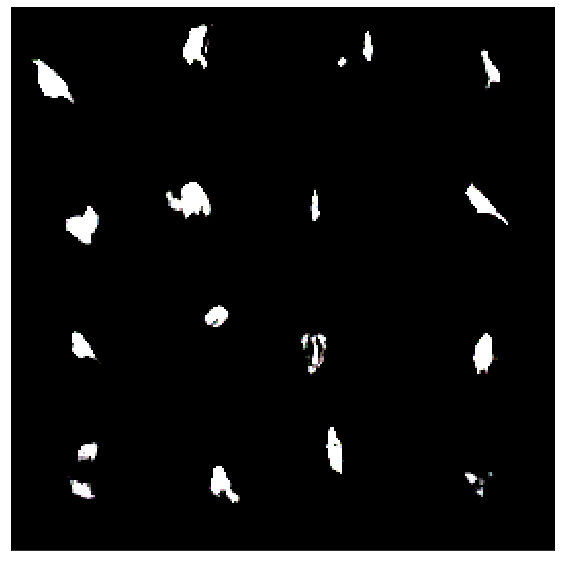

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


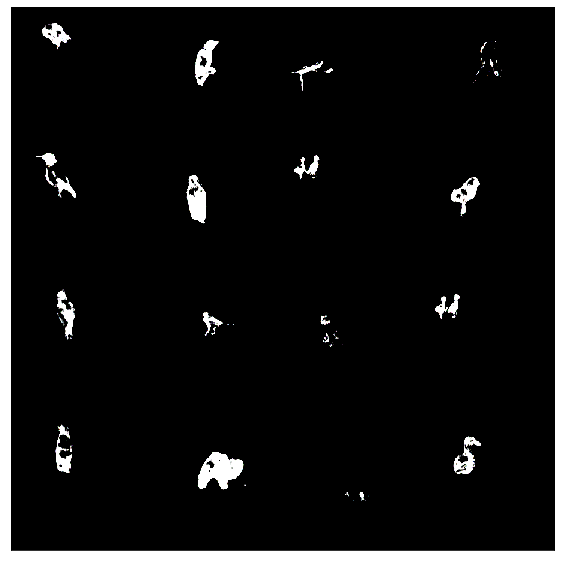

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 5


  0%|                                                                             | 1/17500 [00:15<74:52:07, 15.40s/it]

Train Epoch: 5 [0/280000 (0%)]	Loss: 0.044892
IOU : 0.0570220947265625
IOU : 0.0570220947265625


  0%|▏                                                                            | 53/17500 [00:18<1:00:45,  4.79it/s]

Train Epoch: 5 [200/280000 (0%)]	Loss: 0.028564
IOU : 0.0478973388671875


  1%|▍                                                                             | 103/17500 [00:21<16:40, 17.40it/s]

Train Epoch: 5 [400/280000 (1%)]	Loss: 0.051234
IOU : 0.049041748046875
IOU : 0.049041748046875


  1%|▋                                                                             | 153/17500 [00:24<16:40, 17.34it/s]

Train Epoch: 5 [600/280000 (1%)]	Loss: 0.036157
IOU : 0.049652099609375


  1%|▉                                                                             | 202/17500 [00:27<19:03, 15.13it/s]

Train Epoch: 5 [800/280000 (1%)]	Loss: 0.044632
IOU : 0.0527191162109375
IOU : 0.0527191162109375


  1%|█                                                                             | 250/17500 [00:30<18:39, 15.41it/s]

Train Epoch: 5 [1000/280000 (1%)]	Loss: 0.031380
IOU : 0.0586395263671875


  2%|█▎                                                                            | 304/17500 [00:33<15:37, 18.34it/s]

Train Epoch: 5 [1200/280000 (2%)]	Loss: 0.035475
IOU : 0.0474853515625
IOU : 0.0474853515625


  2%|█▌                                                                            | 353/17500 [00:36<18:45, 15.23it/s]

Train Epoch: 5 [1400/280000 (2%)]	Loss: 0.034647
IOU : 0.0545196533203125


  2%|█▊                                                                            | 404/17500 [00:39<16:19, 17.46it/s]

Train Epoch: 5 [1600/280000 (2%)]	Loss: 0.050235
IOU : 0.0543060302734375
IOU : 0.0543060302734375


  3%|██                                                                            | 451/17500 [00:42<18:04, 15.73it/s]

Train Epoch: 5 [1800/280000 (3%)]	Loss: 0.051113
IOU : 0.0523681640625


  3%|██▏                                                                           | 502/17500 [00:45<18:20, 15.45it/s]

Train Epoch: 5 [2000/280000 (3%)]	Loss: 0.048103
IOU : 0.0508880615234375
IOU : 0.0508880615234375


  3%|██▍                                                                           | 549/17500 [00:48<18:56, 14.91it/s]

Train Epoch: 5 [2200/280000 (3%)]	Loss: 0.046051
IOU : 0.0546417236328125


  3%|██▋                                                                           | 601/17500 [00:51<16:53, 16.68it/s]

Train Epoch: 5 [2400/280000 (3%)]	Loss: 0.029281
IOU : 0.050506591796875
IOU : 0.050506591796875


  4%|██▉                                                                           | 653/17500 [00:54<18:16, 15.36it/s]

Train Epoch: 5 [2600/280000 (4%)]	Loss: 0.027804
IOU : 0.042083740234375


  4%|███▏                                                                          | 703/17500 [00:57<17:24, 16.07it/s]

Train Epoch: 5 [2800/280000 (4%)]	Loss: 0.045308
IOU : 0.0553436279296875
IOU : 0.0553436279296875


  4%|███▎                                                                          | 751/17500 [01:00<17:21, 16.08it/s]

Train Epoch: 5 [3000/280000 (4%)]	Loss: 0.034905
IOU : 0.0539398193359375


  5%|███▌                                                                          | 803/17500 [01:03<16:54, 16.45it/s]

Train Epoch: 5 [3200/280000 (5%)]	Loss: 0.045025
IOU : 0.0610198974609375
IOU : 0.0610198974609375


  5%|███▊                                                                          | 853/17500 [01:06<15:32, 17.86it/s]

Train Epoch: 5 [3400/280000 (5%)]	Loss: 0.036055
IOU : 0.048980712890625


  5%|████                                                                          | 898/17500 [01:09<18:11, 15.21it/s]

Train Epoch: 5 [3600/280000 (5%)]	Loss: 0.041924
IOU : 0.061737060546875
IOU : 0.061737060546875


  5%|████▏                                                                         | 950/17500 [01:12<17:06, 16.13it/s]

Train Epoch: 5 [3800/280000 (5%)]	Loss: 0.039295
IOU : 0.0535430908203125


  6%|████▍                                                                        | 1001/17500 [01:15<15:36, 17.62it/s]

Train Epoch: 5 [4000/280000 (6%)]	Loss: 0.034475
IOU : 0.054229736328125
IOU : 0.054229736328125


  6%|████▌                                                                        | 1050/17500 [01:18<16:23, 16.72it/s]

Train Epoch: 5 [4200/280000 (6%)]	Loss: 0.042501
IOU : 0.054412841796875


  6%|████▊                                                                        | 1098/17500 [01:21<16:19, 16.74it/s]

Train Epoch: 5 [4400/280000 (6%)]	Loss: 0.031537
IOU : 0.046600341796875
IOU : 0.046600341796875


  7%|█████                                                                        | 1150/17500 [01:24<15:58, 17.07it/s]

Train Epoch: 5 [4600/280000 (7%)]	Loss: 0.042745
IOU : 0.0569000244140625


  7%|█████▎                                                                       | 1202/17500 [01:27<16:31, 16.44it/s]

Train Epoch: 5 [4800/280000 (7%)]	Loss: 0.039778
IOU : 0.054840087890625
IOU : 0.054840087890625


  7%|█████▌                                                                       | 1250/17500 [01:30<16:16, 16.65it/s]

Train Epoch: 5 [5000/280000 (7%)]	Loss: 0.044244
IOU : 0.0556182861328125


  7%|█████▋                                                                       | 1302/17500 [01:33<16:02, 16.84it/s]

Train Epoch: 5 [5200/280000 (7%)]	Loss: 0.030485
IOU : 0.0560760498046875
IOU : 0.0560760498046875


  8%|█████▉                                                                       | 1350/17500 [01:36<15:59, 16.82it/s]

Train Epoch: 5 [5400/280000 (8%)]	Loss: 0.036572
IOU : 0.051544189453125


  8%|██████▏                                                                      | 1402/17500 [01:39<16:22, 16.38it/s]

Train Epoch: 5 [5600/280000 (8%)]	Loss: 0.056349
IOU : 0.061859130859375
IOU : 0.061859130859375


  8%|██████▍                                                                      | 1450/17500 [01:42<15:28, 17.29it/s]

Train Epoch: 5 [5800/280000 (8%)]	Loss: 0.036788
IOU : 0.048858642578125


  9%|██████▌                                                                      | 1502/17500 [01:45<15:56, 16.72it/s]

Train Epoch: 5 [6000/280000 (9%)]	Loss: 0.037722
IOU : 0.0562286376953125
IOU : 0.0562286376953125


  9%|██████▊                                                                      | 1550/17500 [01:48<16:34, 16.05it/s]

Train Epoch: 5 [6200/280000 (9%)]	Loss: 0.038436
IOU : 0.04486083984375


  9%|███████                                                                      | 1602/17500 [01:51<16:12, 16.34it/s]

Train Epoch: 5 [6400/280000 (9%)]	Loss: 0.031417
IOU : 0.0486297607421875
IOU : 0.0486297607421875


  9%|███████▎                                                                     | 1654/17500 [01:55<16:05, 16.42it/s]

Train Epoch: 5 [6600/280000 (9%)]	Loss: 0.049807
IOU : 0.0489044189453125


 10%|███████▍                                                                     | 1698/17500 [01:57<15:39, 16.81it/s]

Train Epoch: 5 [6800/280000 (10%)]	Loss: 0.023436
IOU : 0.044830322265625
IOU : 0.044830322265625


 10%|███████▋                                                                     | 1750/17500 [02:00<16:19, 16.09it/s]

Train Epoch: 5 [7000/280000 (10%)]	Loss: 0.038802
IOU : 0.05438232421875


 10%|███████▉                                                                     | 1802/17500 [02:04<16:58, 15.41it/s]

Train Epoch: 5 [7200/280000 (10%)]	Loss: 0.033003
IOU : 0.052520751953125
IOU : 0.052520751953125


 11%|████████▏                                                                    | 1850/17500 [02:07<15:28, 16.85it/s]

Train Epoch: 5 [7400/280000 (11%)]	Loss: 0.036302
IOU : 0.05084228515625


 11%|████████▎                                                                    | 1898/17500 [02:10<16:07, 16.13it/s]

Train Epoch: 5 [7600/280000 (11%)]	Loss: 0.040244
IOU : 0.054443359375
IOU : 0.054443359375


 11%|████████▌                                                                    | 1950/17500 [02:13<15:39, 16.54it/s]

Train Epoch: 5 [7800/280000 (11%)]	Loss: 0.035223
IOU : 0.0558624267578125


 11%|████████▊                                                                    | 2002/17500 [02:16<15:36, 16.54it/s]

Train Epoch: 5 [8000/280000 (11%)]	Loss: 0.039641
IOU : 0.0506134033203125
IOU : 0.0506134033203125


 12%|█████████                                                                    | 2050/17500 [02:19<15:31, 16.58it/s]

Train Epoch: 5 [8200/280000 (12%)]	Loss: 0.037189
IOU : 0.0534820556640625


 12%|█████████▏                                                                   | 2102/17500 [02:22<15:23, 16.67it/s]

Train Epoch: 5 [8400/280000 (12%)]	Loss: 0.045011
IOU : 0.0568084716796875
IOU : 0.0568084716796875


 12%|█████████▍                                                                   | 2150/17500 [02:25<15:13, 16.80it/s]

Train Epoch: 5 [8600/280000 (12%)]	Loss: 0.048129
IOU : 0.054473876953125


 13%|█████████▋                                                                   | 2201/17500 [02:28<13:15, 19.24it/s]

Train Epoch: 5 [8800/280000 (13%)]	Loss: 0.038633
IOU : 0.0536041259765625
IOU : 0.0536041259765625


 13%|█████████▉                                                                   | 2250/17500 [02:31<15:27, 16.44it/s]

Train Epoch: 5 [9000/280000 (13%)]	Loss: 0.040197
IOU : 0.0530242919921875


 13%|██████████▏                                                                  | 2302/17500 [02:34<15:16, 16.59it/s]

Train Epoch: 5 [9200/280000 (13%)]	Loss: 0.053972
IOU : 0.0611114501953125
IOU : 0.0611114501953125


 13%|██████████▎                                                                  | 2354/17500 [02:37<17:40, 14.29it/s]

Train Epoch: 5 [9400/280000 (13%)]	Loss: 0.034491
IOU : 0.0554656982421875


 14%|██████████▌                                                                  | 2401/17500 [02:40<14:29, 17.36it/s]

Train Epoch: 5 [9600/280000 (14%)]	Loss: 0.042215
IOU : 0.051177978515625
IOU : 0.051177978515625


 14%|██████████▊                                                                  | 2452/17500 [02:43<15:58, 15.70it/s]

Train Epoch: 5 [9800/280000 (14%)]	Loss: 0.034274
IOU : 0.0508880615234375


 14%|███████████                                                                  | 2502/17500 [02:46<14:22, 17.40it/s]

Train Epoch: 5 [10000/280000 (14%)]	Loss: 0.037150
IOU : 0.0562286376953125
IOU : 0.0562286376953125


 15%|███████████▏                                                                 | 2551/17500 [02:49<15:44, 15.82it/s]

Train Epoch: 5 [10200/280000 (15%)]	Loss: 0.029590
IOU : 0.04461669921875


 15%|███████████▍                                                                 | 2602/17500 [02:53<15:46, 15.75it/s]

Train Epoch: 5 [10400/280000 (15%)]	Loss: 0.029916
IOU : 0.0462799072265625
IOU : 0.0462799072265625


 15%|███████████▋                                                                 | 2654/17500 [02:56<15:06, 16.37it/s]

Train Epoch: 5 [10600/280000 (15%)]	Loss: 0.031116
IOU : 0.0509796142578125


 15%|███████████▉                                                                 | 2702/17500 [02:59<15:07, 16.31it/s]

Train Epoch: 5 [10800/280000 (15%)]	Loss: 0.040766
IOU : 0.0564422607421875
IOU : 0.0564422607421875


 16%|████████████                                                                 | 2752/17500 [03:02<15:27, 15.90it/s]

Train Epoch: 5 [11000/280000 (16%)]	Loss: 0.036498
IOU : 0.0611572265625


 16%|████████████▎                                                                | 2802/17500 [03:05<16:43, 14.65it/s]

Train Epoch: 5 [11200/280000 (16%)]	Loss: 0.033267
IOU : 0.058624267578125
IOU : 0.058624267578125


 16%|████████████▌                                                                | 2853/17500 [03:08<13:43, 17.78it/s]

Train Epoch: 5 [11400/280000 (16%)]	Loss: 0.034275
IOU : 0.0478668212890625


 17%|████████████▊                                                                | 2902/17500 [03:11<16:45, 14.52it/s]

Train Epoch: 5 [11600/280000 (17%)]	Loss: 0.040317
IOU : 0.05438232421875
IOU : 0.05438232421875


 17%|████████████▉                                                                | 2950/17500 [03:14<15:34, 15.57it/s]

Train Epoch: 5 [11800/280000 (17%)]	Loss: 0.074669
IOU : 0.0624237060546875


 17%|█████████████▏                                                               | 3002/17500 [03:18<20:14, 11.93it/s]

Train Epoch: 5 [12000/280000 (17%)]	Loss: 0.073508
IOU : 0.066650390625
IOU : 0.066650390625


 17%|█████████████▍                                                               | 3052/17500 [03:22<19:57, 12.06it/s]

Train Epoch: 5 [12200/280000 (17%)]	Loss: 0.037667
IOU : 0.051239013671875


 18%|█████████████▋                                                               | 3100/17500 [03:27<20:24, 11.76it/s]

Train Epoch: 5 [12400/280000 (18%)]	Loss: 0.038574
IOU : 0.050811767578125
IOU : 0.050811767578125


 18%|█████████████▊                                                               | 3150/17500 [03:31<21:33, 11.10it/s]

Train Epoch: 5 [12600/280000 (18%)]	Loss: 0.034376
IOU : 0.0511627197265625


 18%|██████████████                                                               | 3198/17500 [03:36<21:31, 11.07it/s]

Train Epoch: 5 [12800/280000 (18%)]	Loss: 0.032101
IOU : 0.0488433837890625
IOU : 0.0488433837890625


 19%|██████████████▎                                                              | 3250/17500 [03:40<20:58, 11.33it/s]

Train Epoch: 5 [13000/280000 (19%)]	Loss: 0.061916
IOU : 0.05535888671875


 19%|██████████████▌                                                              | 3298/17500 [03:45<22:02, 10.74it/s]

Train Epoch: 5 [13200/280000 (19%)]	Loss: 0.037071
IOU : 0.0544281005859375
IOU : 0.0544281005859375


 19%|██████████████▋                                                              | 3350/17500 [03:50<22:08, 10.65it/s]

Train Epoch: 5 [13400/280000 (19%)]	Loss: 0.036538
IOU : 0.0574188232421875


 19%|██████████████▉                                                              | 3398/17500 [03:54<20:42, 11.35it/s]

Train Epoch: 5 [13600/280000 (19%)]	Loss: 0.046572
IOU : 0.0557098388671875
IOU : 0.0557098388671875


 20%|███████████████▏                                                             | 3450/17500 [03:58<19:48, 11.82it/s]

Train Epoch: 5 [13800/280000 (20%)]	Loss: 0.040309
IOU : 0.051361083984375


 20%|███████████████▍                                                             | 3498/17500 [04:03<21:33, 10.83it/s]

Train Epoch: 5 [14000/280000 (20%)]	Loss: 0.045033
IOU : 0.0565948486328125
IOU : 0.0565948486328125


 20%|███████████████▌                                                             | 3550/17500 [04:08<21:23, 10.87it/s]

Train Epoch: 5 [14200/280000 (20%)]	Loss: 0.040198
IOU : 0.0596771240234375


 21%|███████████████▊                                                             | 3598/17500 [04:12<20:00, 11.58it/s]

Train Epoch: 5 [14400/280000 (21%)]	Loss: 0.042087
IOU : 0.0558929443359375
IOU : 0.0558929443359375


 21%|████████████████                                                             | 3650/17500 [04:17<21:12, 10.89it/s]

Train Epoch: 5 [14600/280000 (21%)]	Loss: 0.029876
IOU : 0.0570220947265625


 21%|████████████████▎                                                            | 3698/17500 [04:21<19:37, 11.72it/s]

Train Epoch: 5 [14800/280000 (21%)]	Loss: 0.046280
IOU : 0.0500640869140625
IOU : 0.0500640869140625


 21%|████████████████▌                                                            | 3750/17500 [04:26<21:31, 10.65it/s]

Train Epoch: 5 [15000/280000 (21%)]	Loss: 0.048146
IOU : 0.05126953125


 22%|████████████████▋                                                            | 3798/17500 [04:30<20:12, 11.30it/s]

Train Epoch: 5 [15200/280000 (22%)]	Loss: 0.052097
IOU : 0.05718994140625
IOU : 0.05718994140625


 22%|████████████████▉                                                            | 3850/17500 [04:35<20:35, 11.04it/s]

Train Epoch: 5 [15400/280000 (22%)]	Loss: 0.032343
IOU : 0.0499114990234375


 22%|█████████████████▏                                                           | 3898/17500 [04:39<21:28, 10.56it/s]

Train Epoch: 5 [15600/280000 (22%)]	Loss: 0.041921
IOU : 0.057464599609375
IOU : 0.057464599609375


 23%|█████████████████▍                                                           | 3950/17500 [04:44<21:26, 10.53it/s]

Train Epoch: 5 [15800/280000 (23%)]	Loss: 0.050401
IOU : 0.049560546875


 23%|█████████████████▌                                                           | 3998/17500 [04:49<20:32, 10.95it/s]

Train Epoch: 5 [16000/280000 (23%)]	Loss: 0.092465
IOU : 0.055389404296875
IOU : 0.055389404296875


 23%|█████████████████▊                                                           | 4050/17500 [04:53<20:51, 10.75it/s]

Train Epoch: 5 [16200/280000 (23%)]	Loss: 0.039206
IOU : 0.0535736083984375


 23%|██████████████████                                                           | 4098/17500 [04:58<20:51, 10.71it/s]

Train Epoch: 5 [16400/280000 (23%)]	Loss: 0.047264
IOU : 0.0532684326171875
IOU : 0.0532684326171875


 24%|██████████████████▎                                                          | 4150/17500 [05:03<21:01, 10.58it/s]

Train Epoch: 5 [16600/280000 (24%)]	Loss: 0.043393
IOU : 0.05474853515625


 24%|██████████████████▍                                                          | 4198/17500 [05:07<20:28, 10.83it/s]

Train Epoch: 5 [16800/280000 (24%)]	Loss: 0.062652
IOU : 0.0581817626953125
IOU : 0.0581817626953125


 24%|██████████████████▋                                                          | 4250/17500 [05:12<19:53, 11.10it/s]

Train Epoch: 5 [17000/280000 (24%)]	Loss: 0.048033
IOU : 0.052825927734375


 25%|██████████████████▉                                                          | 4298/17500 [05:16<19:38, 11.21it/s]

Train Epoch: 5 [17200/280000 (25%)]	Loss: 0.040292
IOU : 0.052734375
IOU : 0.052734375


 25%|███████████████████▏                                                         | 4350/17500 [05:21<19:30, 11.24it/s]

Train Epoch: 5 [17400/280000 (25%)]	Loss: 0.036650
IOU : 0.052886962890625


 25%|███████████████████▎                                                         | 4398/17500 [05:25<19:40, 11.10it/s]

Train Epoch: 5 [17600/280000 (25%)]	Loss: 0.031766
IOU : 0.0452880859375
IOU : 0.0452880859375


 25%|███████████████████▌                                                         | 4450/17500 [05:30<19:14, 11.30it/s]

Train Epoch: 5 [17800/280000 (25%)]	Loss: 0.030179
IOU : 0.056793212890625


 26%|███████████████████▊                                                         | 4498/17500 [05:35<19:49, 10.93it/s]

Train Epoch: 5 [18000/280000 (26%)]	Loss: 0.059653
IOU : 0.0576934814453125
IOU : 0.0576934814453125


 26%|████████████████████                                                         | 4550/17500 [05:39<19:28, 11.08it/s]

Train Epoch: 5 [18200/280000 (26%)]	Loss: 0.052191
IOU : 0.0606536865234375


 26%|████████████████████▏                                                        | 4598/17500 [05:44<18:56, 11.36it/s]

Train Epoch: 5 [18400/280000 (26%)]	Loss: 0.038481
IOU : 0.05078125
IOU : 0.05078125


 27%|████████████████████▍                                                        | 4650/17500 [05:48<19:54, 10.76it/s]

Train Epoch: 5 [18600/280000 (27%)]	Loss: 0.030716
IOU : 0.0489959716796875


 27%|████████████████████▋                                                        | 4698/17500 [05:53<18:37, 11.45it/s]

Train Epoch: 5 [18800/280000 (27%)]	Loss: 0.031862
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 27%|████████████████████▉                                                        | 4750/17500 [05:57<19:06, 11.12it/s]

Train Epoch: 5 [19000/280000 (27%)]	Loss: 0.044265
IOU : 0.05438232421875


 27%|█████████████████████                                                        | 4798/17500 [06:01<19:03, 11.11it/s]

Train Epoch: 5 [19200/280000 (27%)]	Loss: 0.035677
IOU : 0.0532989501953125
IOU : 0.0532989501953125


 28%|█████████████████████▎                                                       | 4850/17500 [06:06<20:01, 10.53it/s]

Train Epoch: 5 [19400/280000 (28%)]	Loss: 0.040329
IOU : 0.0537872314453125


 28%|█████████████████████▌                                                       | 4898/17500 [06:11<19:09, 10.96it/s]

Train Epoch: 5 [19600/280000 (28%)]	Loss: 0.035591
IOU : 0.0493621826171875
IOU : 0.0493621826171875


 28%|█████████████████████▊                                                       | 4950/17500 [06:15<19:32, 10.71it/s]

Train Epoch: 5 [19800/280000 (28%)]	Loss: 0.027710
IOU : 0.042205810546875


 29%|█████████████████████▉                                                       | 4998/17500 [06:20<18:43, 11.13it/s]

Train Epoch: 5 [20000/280000 (29%)]	Loss: 0.032664
IOU : 0.056121826171875
IOU : 0.056121826171875


 29%|██████████████████████▏                                                      | 5050/17500 [06:24<18:14, 11.38it/s]

Train Epoch: 5 [20200/280000 (29%)]	Loss: 0.039309
IOU : 0.056854248046875


 29%|██████████████████████▍                                                      | 5098/17500 [06:29<18:32, 11.15it/s]

Train Epoch: 5 [20400/280000 (29%)]	Loss: 0.043531
IOU : 0.0532989501953125
IOU : 0.0532989501953125


 29%|██████████████████████▋                                                      | 5150/17500 [06:33<17:57, 11.46it/s]

Train Epoch: 5 [20600/280000 (29%)]	Loss: 0.035203
IOU : 0.053558349609375


 30%|██████████████████████▉                                                      | 5201/17500 [06:38<16:18, 12.57it/s]

Train Epoch: 5 [20800/280000 (30%)]	Loss: 0.033933
IOU : 0.05413818359375
IOU : 0.05413818359375


 30%|███████████████████████                                                      | 5252/17500 [06:42<18:14, 11.19it/s]

Train Epoch: 5 [21000/280000 (30%)]	Loss: 0.034987
IOU : 0.0503997802734375


 30%|███████████████████████▎                                                     | 5302/17500 [06:47<18:23, 11.05it/s]

Train Epoch: 5 [21200/280000 (30%)]	Loss: 0.048551
IOU : 0.0517425537109375
IOU : 0.0517425537109375


 31%|███████████████████████▌                                                     | 5350/17500 [06:52<18:29, 10.95it/s]

Train Epoch: 5 [21400/280000 (31%)]	Loss: 0.042393
IOU : 0.042327880859375


 31%|███████████████████████▊                                                     | 5400/17500 [06:56<19:32, 10.32it/s]

Train Epoch: 5 [21600/280000 (31%)]	Loss: 0.032337
IOU : 0.0502777099609375
IOU : 0.0502777099609375


 31%|███████████████████████▉                                                     | 5448/17500 [07:01<18:34, 10.81it/s]

Train Epoch: 5 [21800/280000 (31%)]	Loss: 0.028963
IOU : 0.046539306640625


 31%|████████████████████████▏                                                    | 5500/17500 [07:05<17:54, 11.16it/s]

Train Epoch: 5 [22000/280000 (31%)]	Loss: 0.047985
IOU : 0.0517120361328125
IOU : 0.0517120361328125


 32%|████████████████████████▍                                                    | 5548/17500 [07:10<18:01, 11.05it/s]

Train Epoch: 5 [22200/280000 (32%)]	Loss: 0.040059
IOU : 0.053985595703125


 32%|████████████████████████▋                                                    | 5600/17500 [07:14<17:32, 11.31it/s]

Train Epoch: 5 [22400/280000 (32%)]	Loss: 0.043578
IOU : 0.0507354736328125
IOU : 0.0507354736328125


 32%|████████████████████████▊                                                    | 5648/17500 [07:19<17:51, 11.06it/s]

Train Epoch: 5 [22600/280000 (32%)]	Loss: 0.045940
IOU : 0.0590972900390625


 33%|█████████████████████████                                                    | 5700/17500 [07:23<17:43, 11.09it/s]

Train Epoch: 5 [22800/280000 (33%)]	Loss: 0.027445
IOU : 0.0481414794921875
IOU : 0.0481414794921875


 33%|█████████████████████████▎                                                   | 5748/17500 [07:28<17:04, 11.47it/s]

Train Epoch: 5 [23000/280000 (33%)]	Loss: 0.047048
IOU : 0.0520782470703125


 33%|█████████████████████████▌                                                   | 5800/17500 [07:32<17:15, 11.30it/s]

Train Epoch: 5 [23200/280000 (33%)]	Loss: 0.050158
IOU : 0.0592041015625
IOU : 0.0592041015625


 33%|█████████████████████████▋                                                   | 5848/17500 [07:37<16:55, 11.48it/s]

Train Epoch: 5 [23400/280000 (33%)]	Loss: 0.046245
IOU : 0.0475921630859375


 34%|█████████████████████████▉                                                   | 5903/17500 [07:41<16:28, 11.73it/s]

Train Epoch: 5 [23600/280000 (34%)]	Loss: 0.045816
IOU : 0.0615081787109375
IOU : 0.0615081787109375


 34%|██████████████████████████▏                                                  | 5953/17500 [07:46<16:56, 11.35it/s]

Train Epoch: 5 [23800/280000 (34%)]	Loss: 0.039545
IOU : 0.046600341796875


 34%|██████████████████████████▍                                                  | 6001/17500 [07:50<16:12, 11.83it/s]

Train Epoch: 5 [24000/280000 (34%)]	Loss: 0.031067
IOU : 0.046630859375
IOU : 0.046630859375


 35%|██████████████████████████▋                                                  | 6052/17500 [07:55<17:24, 10.96it/s]

Train Epoch: 5 [24200/280000 (35%)]	Loss: 0.029926
IOU : 0.0466766357421875


 35%|██████████████████████████▊                                                  | 6101/17500 [07:59<16:56, 11.21it/s]

Train Epoch: 5 [24400/280000 (35%)]	Loss: 0.038680
IOU : 0.0630645751953125
IOU : 0.0630645751953125


 35%|███████████████████████████                                                  | 6154/17500 [08:04<14:00, 13.50it/s]

Train Epoch: 5 [24600/280000 (35%)]	Loss: 0.032007
IOU : 0.0539398193359375


 35%|███████████████████████████▎                                                 | 6199/17500 [08:08<16:36, 11.35it/s]

Train Epoch: 5 [24800/280000 (35%)]	Loss: 0.040976
IOU : 0.057037353515625
IOU : 0.057037353515625


 36%|███████████████████████████▌                                                 | 6251/17500 [08:13<17:20, 10.81it/s]

Train Epoch: 5 [25000/280000 (36%)]	Loss: 0.036907
IOU : 0.055999755859375


 36%|███████████████████████████▋                                                 | 6299/17500 [08:17<17:05, 10.92it/s]

Train Epoch: 5 [25200/280000 (36%)]	Loss: 0.039266
IOU : 0.052642822265625
IOU : 0.052642822265625


 36%|███████████████████████████▉                                                 | 6351/17500 [08:22<19:18,  9.62it/s]

Train Epoch: 5 [25400/280000 (36%)]	Loss: 0.037516
IOU : 0.0525665283203125


 37%|████████████████████████████▏                                                | 6402/17500 [08:26<15:00, 12.32it/s]

Train Epoch: 5 [25600/280000 (37%)]	Loss: 0.047969
IOU : 0.0589752197265625
IOU : 0.0589752197265625


 37%|████████████████████████████▍                                                | 6452/17500 [08:31<16:59, 10.84it/s]

Train Epoch: 5 [25800/280000 (37%)]	Loss: 0.049532
IOU : 0.051910400390625


 37%|████████████████████████████▌                                                | 6502/17500 [08:35<15:55, 11.51it/s]

Train Epoch: 5 [26000/280000 (37%)]	Loss: 0.033378
IOU : 0.05029296875
IOU : 0.05029296875


 37%|████████████████████████████▊                                                | 6551/17500 [08:40<18:50,  9.68it/s]

Train Epoch: 5 [26200/280000 (37%)]	Loss: 0.053697
IOU : 0.055999755859375


 38%|█████████████████████████████                                                | 6600/17500 [08:44<15:04, 12.05it/s]

Train Epoch: 5 [26400/280000 (38%)]	Loss: 0.032451
IOU : 0.04791259765625
IOU : 0.04791259765625


 38%|█████████████████████████████▎                                               | 6652/17500 [08:49<15:38, 11.55it/s]

Train Epoch: 5 [26600/280000 (38%)]	Loss: 0.040989
IOU : 0.058746337890625


 38%|█████████████████████████████▍                                               | 6698/17500 [08:53<17:48, 10.11it/s]

Train Epoch: 5 [26800/280000 (38%)]	Loss: 0.032171
IOU : 0.0490875244140625
IOU : 0.0490875244140625


 39%|█████████████████████████████▋                                               | 6751/17500 [08:57<18:27,  9.71it/s]

Train Epoch: 5 [27000/280000 (39%)]	Loss: 0.049233
IOU : 0.0520782470703125


 39%|█████████████████████████████▉                                               | 6798/17500 [09:01<15:24, 11.57it/s]

Train Epoch: 5 [27200/280000 (39%)]	Loss: 0.037859
IOU : 0.0514373779296875
IOU : 0.0514373779296875


 39%|██████████████████████████████▏                                              | 6850/17500 [09:06<15:34, 11.40it/s]

Train Epoch: 5 [27400/280000 (39%)]	Loss: 0.049363
IOU : 0.050048828125


 39%|██████████████████████████████▎                                              | 6898/17500 [09:10<15:47, 11.19it/s]

Train Epoch: 5 [27600/280000 (39%)]	Loss: 0.031525
IOU : 0.049041748046875
IOU : 0.049041748046875


 40%|██████████████████████████████▌                                              | 6950/17500 [09:15<15:30, 11.34it/s]

Train Epoch: 5 [27800/280000 (40%)]	Loss: 0.054167
IOU : 0.055511474609375


 40%|██████████████████████████████▊                                              | 6998/17500 [09:19<15:47, 11.08it/s]

Train Epoch: 5 [28000/280000 (40%)]	Loss: 0.031183
IOU : 0.0454559326171875
IOU : 0.0454559326171875


 40%|███████████████████████████████                                              | 7050/17500 [09:24<14:58, 11.63it/s]

Train Epoch: 5 [28200/280000 (40%)]	Loss: 0.041397
IOU : 0.053558349609375


 41%|███████████████████████████████▏                                             | 7101/17500 [09:28<14:19, 12.10it/s]

Train Epoch: 5 [28400/280000 (41%)]	Loss: 0.048763
IOU : 0.0541534423828125
IOU : 0.0541534423828125


 41%|███████████████████████████████▍                                             | 7150/17500 [09:33<16:46, 10.28it/s]

Train Epoch: 5 [28600/280000 (41%)]	Loss: 0.057018
IOU : 0.0613555908203125


 41%|███████████████████████████████▋                                             | 7201/17500 [09:37<14:08, 12.13it/s]

Train Epoch: 5 [28800/280000 (41%)]	Loss: 0.049437
IOU : 0.0650482177734375
IOU : 0.0650482177734375


 41%|███████████████████████████████▉                                             | 7250/17500 [09:42<15:58, 10.69it/s]

Train Epoch: 5 [29000/280000 (41%)]	Loss: 0.033546
IOU : 0.044281005859375


 42%|████████████████████████████████                                             | 7298/17500 [09:46<14:40, 11.59it/s]

Train Epoch: 5 [29200/280000 (42%)]	Loss: 0.032841
IOU : 0.05145263671875
IOU : 0.05145263671875


 42%|████████████████████████████████▎                                            | 7350/17500 [09:51<15:54, 10.63it/s]

Train Epoch: 5 [29400/280000 (42%)]	Loss: 0.041023
IOU : 0.051483154296875


 42%|████████████████████████████████▌                                            | 7398/17500 [09:55<14:30, 11.61it/s]

Train Epoch: 5 [29600/280000 (42%)]	Loss: 0.043481
IOU : 0.051177978515625
IOU : 0.051177978515625


 43%|████████████████████████████████▊                                            | 7450/17500 [09:59<15:08, 11.07it/s]

Train Epoch: 5 [29800/280000 (43%)]	Loss: 0.037439
IOU : 0.0551300048828125


 43%|████████████████████████████████▉                                            | 7498/17500 [10:04<14:52, 11.20it/s]

Train Epoch: 5 [30000/280000 (43%)]	Loss: 0.065338
IOU : 0.055084228515625
IOU : 0.055084228515625


 43%|█████████████████████████████████▏                                           | 7550/17500 [10:08<14:55, 11.11it/s]

Train Epoch: 5 [30200/280000 (43%)]	Loss: 0.027628
IOU : 0.0506591796875


 43%|█████████████████████████████████▍                                           | 7598/17500 [10:13<14:31, 11.36it/s]

Train Epoch: 5 [30400/280000 (43%)]	Loss: 0.033738
IOU : 0.0542449951171875
IOU : 0.0542449951171875


 44%|█████████████████████████████████▋                                           | 7650/17500 [10:17<14:50, 11.06it/s]

Train Epoch: 5 [30600/280000 (44%)]	Loss: 0.038330
IOU : 0.054351806640625


 44%|█████████████████████████████████▊                                           | 7698/17500 [10:22<15:10, 10.76it/s]

Train Epoch: 5 [30800/280000 (44%)]	Loss: 0.050784
IOU : 0.053131103515625
IOU : 0.053131103515625


 44%|██████████████████████████████████                                           | 7750/17500 [10:26<14:33, 11.16it/s]

Train Epoch: 5 [31000/280000 (44%)]	Loss: 0.062683
IOU : 0.0602264404296875


 45%|██████████████████████████████████▎                                          | 7798/17500 [10:30<13:46, 11.74it/s]

Train Epoch: 5 [31200/280000 (45%)]	Loss: 0.035245
IOU : 0.0506439208984375
IOU : 0.0506439208984375


 45%|██████████████████████████████████▌                                          | 7853/17500 [10:35<13:33, 11.86it/s]

Train Epoch: 5 [31400/280000 (45%)]	Loss: 0.027921
IOU : 0.046112060546875


 45%|██████████████████████████████████▊                                          | 7903/17500 [10:39<12:53, 12.41it/s]

Train Epoch: 5 [31600/280000 (45%)]	Loss: 0.028520
IOU : 0.0456390380859375
IOU : 0.0456390380859375


 45%|██████████████████████████████████▉                                          | 7948/17500 [10:43<13:46, 11.55it/s]

Train Epoch: 5 [31800/280000 (45%)]	Loss: 0.033307
IOU : 0.052215576171875


 46%|███████████████████████████████████▏                                         | 8000/17500 [10:48<15:57,  9.92it/s]

Train Epoch: 5 [32000/280000 (46%)]	Loss: 0.047845
IOU : 0.058258056640625
IOU : 0.058258056640625


 46%|███████████████████████████████████▍                                         | 8048/17500 [10:52<14:12, 11.09it/s]

Train Epoch: 5 [32200/280000 (46%)]	Loss: 0.032334
IOU : 0.0522613525390625


 46%|███████████████████████████████████▋                                         | 8100/17500 [10:57<13:32, 11.57it/s]

Train Epoch: 5 [32400/280000 (46%)]	Loss: 0.038783
IOU : 0.049072265625
IOU : 0.049072265625


 47%|███████████████████████████████████▊                                         | 8151/17500 [11:01<11:22, 13.71it/s]

Train Epoch: 5 [32600/280000 (47%)]	Loss: 0.034218
IOU : 0.0494842529296875


 47%|████████████████████████████████████                                         | 8203/17500 [11:06<13:23, 11.56it/s]

Train Epoch: 5 [32800/280000 (47%)]	Loss: 0.031661
IOU : 0.0469207763671875
IOU : 0.0469207763671875


 47%|████████████████████████████████████▎                                        | 8251/17500 [11:10<12:35, 12.25it/s]

Train Epoch: 5 [33000/280000 (47%)]	Loss: 0.048512
IOU : 0.049224853515625


 47%|████████████████████████████████████▌                                        | 8300/17500 [11:15<15:42,  9.77it/s]

Train Epoch: 5 [33200/280000 (47%)]	Loss: 0.029987
IOU : 0.0518035888671875
IOU : 0.0518035888671875


 48%|████████████████████████████████████▋                                        | 8351/17500 [11:19<12:59, 11.74it/s]

Train Epoch: 5 [33400/280000 (48%)]	Loss: 0.034783
IOU : 0.0552825927734375


 48%|████████████████████████████████████▉                                        | 8403/17500 [11:24<12:59, 11.67it/s]

Train Epoch: 5 [33600/280000 (48%)]	Loss: 0.040129
IOU : 0.0541839599609375
IOU : 0.0541839599609375


 48%|█████████████████████████████████████▏                                       | 8451/17500 [11:28<12:58, 11.62it/s]

Train Epoch: 5 [33800/280000 (48%)]	Loss: 0.047286
IOU : 0.052001953125


 49%|█████████████████████████████████████▍                                       | 8501/17500 [11:33<13:39, 10.98it/s]

Train Epoch: 5 [34000/280000 (49%)]	Loss: 0.054287
IOU : 0.0652008056640625
IOU : 0.0652008056640625


 49%|█████████████████████████████████████▋                                       | 8552/17500 [11:37<13:28, 11.06it/s]

Train Epoch: 5 [34200/280000 (49%)]	Loss: 0.041304
IOU : 0.0499420166015625


 49%|█████████████████████████████████████▊                                       | 8601/17500 [11:42<13:09, 11.27it/s]

Train Epoch: 5 [34400/280000 (49%)]	Loss: 0.043140
IOU : 0.05609130859375
IOU : 0.05609130859375


 49%|██████████████████████████████████████                                       | 8651/17500 [11:46<14:13, 10.37it/s]

Train Epoch: 5 [34600/280000 (49%)]	Loss: 0.039802
IOU : 0.0526885986328125


 50%|██████████████████████████████████████▎                                      | 8702/17500 [11:51<13:03, 11.23it/s]

Train Epoch: 5 [34800/280000 (50%)]	Loss: 0.052737
IOU : 0.0536956787109375
IOU : 0.0536956787109375


 50%|██████████████████████████████████████▌                                      | 8752/17500 [11:55<12:17, 11.86it/s]

Train Epoch: 5 [35000/280000 (50%)]	Loss: 0.064300
IOU : 0.05908203125


 50%|██████████████████████████████████████▋                                      | 8802/17500 [12:00<13:00, 11.15it/s]

Train Epoch: 5 [35200/280000 (50%)]	Loss: 0.035258
IOU : 0.0536956787109375
IOU : 0.0536956787109375


 51%|██████████████████████████████████████▉                                      | 8852/17500 [12:04<12:56, 11.13it/s]

Train Epoch: 5 [35400/280000 (51%)]	Loss: 0.033928
IOU : 0.05078125


 51%|███████████████████████████████████████▏                                     | 8898/17500 [12:09<13:33, 10.57it/s]

Train Epoch: 5 [35600/280000 (51%)]	Loss: 0.035361
IOU : 0.049285888671875
IOU : 0.049285888671875


 51%|███████████████████████████████████████▍                                     | 8950/17500 [12:13<12:44, 11.18it/s]

Train Epoch: 5 [35800/280000 (51%)]	Loss: 0.034225
IOU : 0.0508880615234375


 51%|███████████████████████████████████████▌                                     | 8998/17500 [12:18<12:58, 10.92it/s]

Train Epoch: 5 [36000/280000 (51%)]	Loss: 0.043102
IOU : 0.0546112060546875
IOU : 0.0546112060546875


 52%|███████████████████████████████████████▊                                     | 9050/17500 [12:23<14:17,  9.85it/s]

Train Epoch: 5 [36200/280000 (52%)]	Loss: 0.045239
IOU : 0.06488037109375


 52%|████████████████████████████████████████                                     | 9098/17500 [12:27<13:21, 10.48it/s]

Train Epoch: 5 [36400/280000 (52%)]	Loss: 0.027122
IOU : 0.0499267578125
IOU : 0.0499267578125


 52%|████████████████████████████████████████▎                                    | 9150/17500 [12:32<12:36, 11.03it/s]

Train Epoch: 5 [36600/280000 (52%)]	Loss: 0.045767
IOU : 0.0570526123046875


 53%|████████████████████████████████████████▍                                    | 9198/17500 [12:36<12:35, 11.00it/s]

Train Epoch: 5 [36800/280000 (53%)]	Loss: 0.034802
IOU : 0.05047607421875
IOU : 0.05047607421875


 53%|████████████████████████████████████████▋                                    | 9250/17500 [12:41<12:45, 10.77it/s]

Train Epoch: 5 [37000/280000 (53%)]	Loss: 0.044160
IOU : 0.055206298828125


 53%|████████████████████████████████████████▉                                    | 9301/17500 [12:46<09:57, 13.73it/s]

Train Epoch: 5 [37200/280000 (53%)]	Loss: 0.044945
IOU : 0.0568695068359375
IOU : 0.0568695068359375


 53%|█████████████████████████████████████████▏                                   | 9350/17500 [12:50<14:08,  9.61it/s]

Train Epoch: 5 [37400/280000 (53%)]	Loss: 0.059616
IOU : 0.059234619140625


 54%|█████████████████████████████████████████▎                                   | 9399/17500 [12:55<12:49, 10.53it/s]

Train Epoch: 5 [37600/280000 (54%)]	Loss: 0.045659
IOU : 0.058502197265625
IOU : 0.058502197265625


 54%|█████████████████████████████████████████▌                                   | 9450/17500 [12:59<11:58, 11.21it/s]

Train Epoch: 5 [37800/280000 (54%)]	Loss: 0.031958
IOU : 0.061553955078125


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [13:04<10:04, 13.22it/s]

Train Epoch: 5 [38000/280000 (54%)]	Loss: 0.038871
IOU : 0.0522308349609375
IOU : 0.0522308349609375


 55%|██████████████████████████████████████████                                   | 9550/17500 [13:08<11:55, 11.10it/s]

Train Epoch: 5 [38200/280000 (55%)]	Loss: 0.038141
IOU : 0.0465545654296875


 55%|██████████████████████████████████████████▏                                  | 9598/17500 [13:13<11:45, 11.20it/s]

Train Epoch: 5 [38400/280000 (55%)]	Loss: 0.037577
IOU : 0.052825927734375
IOU : 0.052825927734375


 55%|██████████████████████████████████████████▍                                  | 9650/17500 [13:17<11:47, 11.09it/s]

Train Epoch: 5 [38600/280000 (55%)]	Loss: 0.046803
IOU : 0.050537109375


 55%|██████████████████████████████████████████▋                                  | 9698/17500 [13:22<11:38, 11.18it/s]

Train Epoch: 5 [38800/280000 (55%)]	Loss: 0.035902
IOU : 0.0610504150390625
IOU : 0.0610504150390625


 56%|██████████████████████████████████████████▉                                  | 9750/17500 [13:27<11:55, 10.83it/s]

Train Epoch: 5 [39000/280000 (56%)]	Loss: 0.038200
IOU : 0.0587615966796875


 56%|███████████████████████████████████████████                                  | 9798/17500 [13:31<11:30, 11.15it/s]

Train Epoch: 5 [39200/280000 (56%)]	Loss: 0.035056
IOU : 0.048004150390625
IOU : 0.048004150390625


 56%|███████████████████████████████████████████▎                                 | 9853/17500 [13:36<10:23, 12.26it/s]

Train Epoch: 5 [39400/280000 (56%)]	Loss: 0.041298
IOU : 0.0494232177734375


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [13:40<11:25, 11.09it/s]

Train Epoch: 5 [39600/280000 (57%)]	Loss: 0.043051
IOU : 0.0568695068359375
IOU : 0.0568695068359375


 57%|███████████████████████████████████████████▊                                 | 9953/17500 [13:45<11:04, 11.36it/s]

Train Epoch: 5 [39800/280000 (57%)]	Loss: 0.036653
IOU : 0.0566558837890625


 57%|███████████████████████████████████████████▍                                | 10001/17500 [13:49<10:22, 12.05it/s]

Train Epoch: 5 [40000/280000 (57%)]	Loss: 0.038035
IOU : 0.0582122802734375
IOU : 0.0582122802734375


 57%|███████████████████████████████████████████▋                                | 10050/17500 [13:54<12:06, 10.26it/s]

Train Epoch: 5 [40200/280000 (57%)]	Loss: 0.027027
IOU : 0.048675537109375


 58%|███████████████████████████████████████████▊                                | 10098/17500 [13:58<10:36, 11.62it/s]

Train Epoch: 5 [40400/280000 (58%)]	Loss: 0.029149
IOU : 0.054412841796875
IOU : 0.054412841796875


 58%|████████████████████████████████████████████                                | 10150/17500 [14:03<11:50, 10.34it/s]

Train Epoch: 5 [40600/280000 (58%)]	Loss: 0.035466
IOU : 0.056671142578125


 58%|████████████████████████████████████████████▎                               | 10202/17500 [14:07<11:11, 10.86it/s]

Train Epoch: 5 [40800/280000 (58%)]	Loss: 0.048620
IOU : 0.0518798828125
IOU : 0.0518798828125


 59%|████████████████████████████████████████████▌                               | 10254/17500 [14:12<10:45, 11.22it/s]

Train Epoch: 5 [41000/280000 (59%)]	Loss: 0.039102
IOU : 0.052886962890625


 59%|████████████████████████████████████████████▋                               | 10302/17500 [14:17<10:19, 11.63it/s]

Train Epoch: 5 [41200/280000 (59%)]	Loss: 0.035927
IOU : 0.0546722412109375
IOU : 0.0546722412109375


 59%|████████████████████████████████████████████▉                               | 10351/17500 [14:21<11:11, 10.64it/s]

Train Epoch: 5 [41400/280000 (59%)]	Loss: 0.034115
IOU : 0.047149658203125


 59%|█████████████████████████████████████████████▏                              | 10399/17500 [14:26<11:16, 10.50it/s]

Train Epoch: 5 [41600/280000 (59%)]	Loss: 0.032927
IOU : 0.0485687255859375
IOU : 0.0485687255859375


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [14:30<11:57,  9.83it/s]

Train Epoch: 5 [41800/280000 (60%)]	Loss: 0.043495
IOU : 0.0557708740234375


 60%|█████████████████████████████████████████████▌                              | 10500/17500 [14:35<11:42,  9.97it/s]

Train Epoch: 5 [42000/280000 (60%)]	Loss: 0.039622
IOU : 0.0553741455078125
IOU : 0.0553741455078125


 60%|█████████████████████████████████████████████▊                              | 10554/17500 [14:40<09:57, 11.62it/s]

Train Epoch: 5 [42200/280000 (60%)]	Loss: 0.031622
IOU : 0.0537109375


 61%|██████████████████████████████████████████████                              | 10602/17500 [14:44<11:17, 10.18it/s]

Train Epoch: 5 [42400/280000 (61%)]	Loss: 0.040826
IOU : 0.044952392578125
IOU : 0.044952392578125


 61%|██████████████████████████████████████████████▎                             | 10654/17500 [14:49<09:46, 11.66it/s]

Train Epoch: 5 [42600/280000 (61%)]	Loss: 0.033664
IOU : 0.0518341064453125


 61%|██████████████████████████████████████████████▍                             | 10700/17500 [14:53<10:25, 10.87it/s]

Train Epoch: 5 [42800/280000 (61%)]	Loss: 0.033138
IOU : 0.0565948486328125
IOU : 0.0565948486328125


 61%|██████████████████████████████████████████████▋                             | 10750/17500 [14:58<10:31, 10.68it/s]

Train Epoch: 5 [43000/280000 (61%)]	Loss: 0.034445
IOU : 0.05010986328125


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [15:02<09:49, 11.37it/s]

Train Epoch: 5 [43200/280000 (62%)]	Loss: 0.038532
IOU : 0.048553466796875
IOU : 0.048553466796875


 62%|███████████████████████████████████████████████▏                            | 10853/17500 [15:07<09:43, 11.38it/s]

Train Epoch: 5 [43400/280000 (62%)]	Loss: 0.036434
IOU : 0.0491485595703125


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [15:12<09:26, 11.65it/s]

Train Epoch: 5 [43600/280000 (62%)]	Loss: 0.032433
IOU : 0.0494384765625
IOU : 0.0494384765625


 63%|███████████████████████████████████████████████▌                            | 10950/17500 [15:16<09:44, 11.21it/s]

Train Epoch: 5 [43800/280000 (63%)]	Loss: 0.030611
IOU : 0.051239013671875


 63%|███████████████████████████████████████████████▊                            | 10998/17500 [15:20<09:41, 11.18it/s]

Train Epoch: 5 [44000/280000 (63%)]	Loss: 0.031426
IOU : 0.051788330078125
IOU : 0.051788330078125


 63%|███████████████████████████████████████████████▉                            | 11050/17500 [15:25<09:41, 11.10it/s]

Train Epoch: 5 [44200/280000 (63%)]	Loss: 0.030506
IOU : 0.0521392822265625


 63%|████████████████████████████████████████████████▏                           | 11098/17500 [15:29<09:13, 11.56it/s]

Train Epoch: 5 [44400/280000 (63%)]	Loss: 0.046196
IOU : 0.0523834228515625
IOU : 0.0523834228515625


 64%|████████████████████████████████████████████████▍                           | 11150/17500 [15:34<09:32, 11.10it/s]

Train Epoch: 5 [44600/280000 (64%)]	Loss: 0.032684
IOU : 0.05322265625


 64%|████████████████████████████████████████████████▋                           | 11198/17500 [15:38<09:36, 10.92it/s]

Train Epoch: 5 [44800/280000 (64%)]	Loss: 0.035713
IOU : 0.0493316650390625
IOU : 0.0493316650390625


 64%|████████████████████████████████████████████████▊                           | 11250/17500 [15:43<08:53, 11.71it/s]

Train Epoch: 5 [45000/280000 (64%)]	Loss: 0.044619
IOU : 0.0499725341796875


 65%|█████████████████████████████████████████████████                           | 11298/17500 [15:47<08:51, 11.66it/s]

Train Epoch: 5 [45200/280000 (65%)]	Loss: 0.046402
IOU : 0.054962158203125
IOU : 0.054962158203125


 65%|█████████████████████████████████████████████████▎                          | 11351/17500 [15:51<09:19, 10.99it/s]

Train Epoch: 5 [45400/280000 (65%)]	Loss: 0.030398
IOU : 0.0514984130859375


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [15:56<09:13, 11.01it/s]

Train Epoch: 5 [45600/280000 (65%)]	Loss: 0.039811
IOU : 0.0602569580078125
IOU : 0.0602569580078125


 65%|█████████████████████████████████████████████████▋                          | 11453/17500 [16:00<08:26, 11.94it/s]

Train Epoch: 5 [45800/280000 (65%)]	Loss: 0.044719
IOU : 0.05108642578125


 66%|█████████████████████████████████████████████████▉                          | 11498/17500 [16:05<09:05, 11.00it/s]

Train Epoch: 5 [46000/280000 (66%)]	Loss: 0.039689
IOU : 0.0478057861328125
IOU : 0.0478057861328125


 66%|██████████████████████████████████████████████████▏                         | 11550/17500 [16:09<08:45, 11.32it/s]

Train Epoch: 5 [46200/280000 (66%)]	Loss: 0.040853
IOU : 0.05731201171875


 66%|██████████████████████████████████████████████████▎                         | 11598/17500 [16:13<08:42, 11.31it/s]

Train Epoch: 5 [46400/280000 (66%)]	Loss: 0.036537
IOU : 0.0604705810546875
IOU : 0.0604705810546875


 67%|██████████████████████████████████████████████████▌                         | 11650/17500 [16:18<08:43, 11.17it/s]

Train Epoch: 5 [46600/280000 (67%)]	Loss: 0.032056
IOU : 0.050689697265625


 67%|██████████████████████████████████████████████████▊                         | 11698/17500 [16:22<08:43, 11.08it/s]

Train Epoch: 5 [46800/280000 (67%)]	Loss: 0.032511
IOU : 0.0521240234375
IOU : 0.0521240234375


 67%|███████████████████████████████████████████████████                         | 11750/17500 [16:27<08:45, 10.93it/s]

Train Epoch: 5 [47000/280000 (67%)]	Loss: 0.033114
IOU : 0.0563812255859375


 67%|███████████████████████████████████████████████████▏                        | 11798/17500 [16:31<08:26, 11.25it/s]

Train Epoch: 5 [47200/280000 (67%)]	Loss: 0.034024
IOU : 0.05145263671875
IOU : 0.05145263671875


 68%|███████████████████████████████████████████████████▍                        | 11850/17500 [16:36<09:12, 10.23it/s]

Train Epoch: 5 [47400/280000 (68%)]	Loss: 0.040627
IOU : 0.052520751953125


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [16:40<07:59, 11.67it/s]

Train Epoch: 5 [47600/280000 (68%)]	Loss: 0.040294
IOU : 0.049346923828125
IOU : 0.049346923828125


 68%|███████████████████████████████████████████████████▉                        | 11953/17500 [16:45<08:12, 11.27it/s]

Train Epoch: 5 [47800/280000 (68%)]	Loss: 0.044384
IOU : 0.05682373046875


 69%|████████████████████████████████████████████████████                        | 11999/17500 [16:49<08:28, 10.82it/s]

Train Epoch: 5 [48000/280000 (69%)]	Loss: 0.036121
IOU : 0.050628662109375
IOU : 0.050628662109375


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [16:54<08:51, 10.26it/s]

Train Epoch: 5 [48200/280000 (69%)]	Loss: 0.063864
IOU : 0.05535888671875


 69%|████████████████████████████████████████████████████▌                       | 12100/17500 [16:58<08:39, 10.39it/s]

Train Epoch: 5 [48400/280000 (69%)]	Loss: 0.052858
IOU : 0.056854248046875
IOU : 0.056854248046875


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [17:03<08:00, 11.13it/s]

Train Epoch: 5 [48600/280000 (69%)]	Loss: 0.030102
IOU : 0.046295166015625


 70%|████████████████████████████████████████████████████▉                       | 12199/17500 [17:07<07:33, 11.68it/s]

Train Epoch: 5 [48800/280000 (70%)]	Loss: 0.031779
IOU : 0.04986572265625
IOU : 0.04986572265625


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [17:12<08:23, 10.42it/s]

Train Epoch: 5 [49000/280000 (70%)]	Loss: 0.038596
IOU : 0.0468597412109375


 70%|█████████████████████████████████████████████████████▍                      | 12299/17500 [17:16<07:41, 11.28it/s]

Train Epoch: 5 [49200/280000 (70%)]	Loss: 0.040683
IOU : 0.0576324462890625
IOU : 0.0576324462890625


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [17:21<07:47, 11.00it/s]

Train Epoch: 5 [49400/280000 (71%)]	Loss: 0.046330
IOU : 0.05780029296875


 71%|█████████████████████████████████████████████████████▊                      | 12399/17500 [17:25<07:33, 11.26it/s]

Train Epoch: 5 [49600/280000 (71%)]	Loss: 0.049397
IOU : 0.0479583740234375
IOU : 0.0479583740234375


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [17:30<08:15, 10.19it/s]

Train Epoch: 5 [49800/280000 (71%)]	Loss: 0.034536
IOU : 0.050537109375


 71%|██████████████████████████████████████████████████████▎                     | 12502/17500 [17:34<07:28, 11.15it/s]

Train Epoch: 5 [50000/280000 (71%)]	Loss: 0.036198
IOU : 0.0565032958984375
IOU : 0.0565032958984375


 72%|██████████████████████████████████████████████████████▌                     | 12552/17500 [17:39<07:02, 11.70it/s]

Train Epoch: 5 [50200/280000 (72%)]	Loss: 0.040872
IOU : 0.0548248291015625


 72%|██████████████████████████████████████████████████████▋                     | 12602/17500 [17:43<07:22, 11.06it/s]

Train Epoch: 5 [50400/280000 (72%)]	Loss: 0.035952
IOU : 0.055267333984375
IOU : 0.055267333984375


 72%|██████████████████████████████████████████████████████▉                     | 12653/17500 [17:48<06:22, 12.68it/s]

Train Epoch: 5 [50600/280000 (72%)]	Loss: 0.034111
IOU : 0.050994873046875


 73%|███████████████████████████████████████████████████████▏                    | 12698/17500 [17:52<06:56, 11.52it/s]

Train Epoch: 5 [50800/280000 (73%)]	Loss: 0.029823
IOU : 0.0497283935546875
IOU : 0.0497283935546875


 73%|███████████████████████████████████████████████████████▎                    | 12750/17500 [17:56<06:56, 11.42it/s]

Train Epoch: 5 [51000/280000 (73%)]	Loss: 0.038768
IOU : 0.047119140625


 73%|███████████████████████████████████████████████████████▌                    | 12798/17500 [18:01<06:49, 11.47it/s]

Train Epoch: 5 [51200/280000 (73%)]	Loss: 0.044180
IOU : 0.0596771240234375
IOU : 0.0596771240234375


 73%|███████████████████████████████████████████████████████▊                    | 12850/17500 [18:05<06:44, 11.50it/s]

Train Epoch: 5 [51400/280000 (73%)]	Loss: 0.044552
IOU : 0.0505828857421875


 74%|████████████████████████████████████████████████████████                    | 12898/17500 [18:09<06:36, 11.60it/s]

Train Epoch: 5 [51600/280000 (74%)]	Loss: 0.045063
IOU : 0.049530029296875
IOU : 0.049530029296875


 74%|████████████████████████████████████████████████████████▏                   | 12950/17500 [18:14<06:29, 11.69it/s]

Train Epoch: 5 [51800/280000 (74%)]	Loss: 0.044359
IOU : 0.050811767578125


 74%|████████████████████████████████████████████████████████▍                   | 13002/17500 [18:18<06:41, 11.21it/s]

Train Epoch: 5 [52000/280000 (74%)]	Loss: 0.028364
IOU : 0.049468994140625
IOU : 0.049468994140625


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [18:23<07:48,  9.49it/s]

Train Epoch: 5 [52200/280000 (75%)]	Loss: 0.060802
IOU : 0.061737060546875


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [18:27<06:32, 11.21it/s]

Train Epoch: 5 [52400/280000 (75%)]	Loss: 0.036670
IOU : 0.0502471923828125
IOU : 0.0502471923828125


 75%|█████████████████████████████████████████████████████████▏                  | 13154/17500 [18:32<06:26, 11.24it/s]

Train Epoch: 5 [52600/280000 (75%)]	Loss: 0.034979
IOU : 0.052947998046875


 75%|█████████████████████████████████████████████████████████▎                  | 13202/17500 [18:37<06:25, 11.16it/s]

Train Epoch: 5 [52800/280000 (75%)]	Loss: 0.032560
IOU : 0.052337646484375
IOU : 0.052337646484375


 76%|█████████████████████████████████████████████████████████▌                  | 13252/17500 [18:41<07:21,  9.61it/s]

Train Epoch: 5 [53000/280000 (76%)]	Loss: 0.044424
IOU : 0.0517425537109375


 76%|█████████████████████████████████████████████████████████▊                  | 13302/17500 [18:46<05:25, 12.89it/s]

Train Epoch: 5 [53200/280000 (76%)]	Loss: 0.033356
IOU : 0.053741455078125
IOU : 0.053741455078125


 76%|█████████████████████████████████████████████████████████▉                  | 13354/17500 [18:51<06:33, 10.54it/s]

Train Epoch: 5 [53400/280000 (76%)]	Loss: 0.050381
IOU : 0.05474853515625


 77%|██████████████████████████████████████████████████████████▏                 | 13402/17500 [18:55<06:08, 11.11it/s]

Train Epoch: 5 [53600/280000 (77%)]	Loss: 0.037392
IOU : 0.0547637939453125
IOU : 0.0547637939453125


 77%|██████████████████████████████████████████████████████████▍                 | 13454/17500 [19:00<05:50, 11.55it/s]

Train Epoch: 5 [53800/280000 (77%)]	Loss: 0.028903
IOU : 0.0499267578125


 77%|██████████████████████████████████████████████████████████▌                 | 13499/17500 [19:04<06:28, 10.30it/s]

Train Epoch: 5 [54000/280000 (77%)]	Loss: 0.033043
IOU : 0.0506744384765625
IOU : 0.0506744384765625


 77%|██████████████████████████████████████████████████████████▊                 | 13554/17500 [19:08<05:31, 11.89it/s]

Train Epoch: 5 [54200/280000 (77%)]	Loss: 0.028163
IOU : 0.04290771484375


 78%|███████████████████████████████████████████████████████████                 | 13602/17500 [19:13<05:38, 11.53it/s]

Train Epoch: 5 [54400/280000 (78%)]	Loss: 0.037267
IOU : 0.0510711669921875
IOU : 0.0510711669921875


 78%|███████████████████████████████████████████████████████████▎                | 13652/17500 [19:17<05:54, 10.87it/s]

Train Epoch: 5 [54600/280000 (78%)]	Loss: 0.037627
IOU : 0.0589752197265625


 78%|███████████████████████████████████████████████████████████▌                | 13702/17500 [19:22<05:25, 11.68it/s]

Train Epoch: 5 [54800/280000 (78%)]	Loss: 0.035529
IOU : 0.0509185791015625
IOU : 0.0509185791015625


 79%|███████████████████████████████████████████████████████████▋                | 13752/17500 [19:26<05:49, 10.72it/s]

Train Epoch: 5 [55000/280000 (79%)]	Loss: 0.034300
IOU : 0.049224853515625


 79%|███████████████████████████████████████████████████████████▉                | 13799/17500 [19:30<06:05, 10.13it/s]

Train Epoch: 5 [55200/280000 (79%)]	Loss: 0.056299
IOU : 0.0565338134765625
IOU : 0.0565338134765625


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [19:35<05:14, 11.61it/s]

Train Epoch: 5 [55400/280000 (79%)]	Loss: 0.032066
IOU : 0.0611114501953125


 79%|████████████████████████████████████████████████████████████▎               | 13899/17500 [19:39<05:07, 11.69it/s]

Train Epoch: 5 [55600/280000 (79%)]	Loss: 0.039327
IOU : 0.047210693359375
IOU : 0.047210693359375


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [19:43<05:02, 11.72it/s]

Train Epoch: 5 [55800/280000 (80%)]	Loss: 0.028357
IOU : 0.048370361328125


 80%|████████████████████████████████████████████████████████████▊               | 13999/17500 [19:48<05:10, 11.26it/s]

Train Epoch: 5 [56000/280000 (80%)]	Loss: 0.029446
IOU : 0.0465850830078125
IOU : 0.0465850830078125


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [19:52<05:06, 11.27it/s]

Train Epoch: 5 [56200/280000 (80%)]	Loss: 0.061448
IOU : 0.056884765625


 81%|█████████████████████████████████████████████████████████████▏              | 14099/17500 [19:56<04:51, 11.67it/s]

Train Epoch: 5 [56400/280000 (81%)]	Loss: 0.033989
IOU : 0.052398681640625
IOU : 0.052398681640625


 81%|█████████████████████████████████████████████████████████████▍              | 14151/17500 [20:01<05:06, 10.92it/s]

Train Epoch: 5 [56600/280000 (81%)]	Loss: 0.057571
IOU : 0.053955078125


 81%|█████████████████████████████████████████████████████████████▋              | 14199/17500 [20:05<04:52, 11.28it/s]

Train Epoch: 5 [56800/280000 (81%)]	Loss: 0.030484
IOU : 0.052276611328125
IOU : 0.052276611328125


 81%|█████████████████████████████████████████████████████████████▉              | 14251/17500 [20:10<04:48, 11.25it/s]

Train Epoch: 5 [57000/280000 (81%)]	Loss: 0.034620
IOU : 0.0552215576171875


 82%|██████████████████████████████████████████████████████████████              | 14299/17500 [20:14<04:42, 11.32it/s]

Train Epoch: 5 [57200/280000 (82%)]	Loss: 0.061263
IOU : 0.055450439453125
IOU : 0.055450439453125


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [20:19<04:35, 11.42it/s]

Train Epoch: 5 [57400/280000 (82%)]	Loss: 0.035278
IOU : 0.04718017578125


 82%|██████████████████████████████████████████████████████████████▌             | 14399/17500 [20:23<04:28, 11.55it/s]

Train Epoch: 5 [57600/280000 (82%)]	Loss: 0.048512
IOU : 0.0491943359375
IOU : 0.0491943359375


 83%|██████████████████████████████████████████████████████████████▊             | 14451/17500 [20:27<04:24, 11.54it/s]

Train Epoch: 5 [57800/280000 (83%)]	Loss: 0.040104
IOU : 0.0598602294921875


 83%|██████████████████████████████████████████████████████████████▉             | 14502/17500 [20:32<04:10, 11.97it/s]

Train Epoch: 5 [58000/280000 (83%)]	Loss: 0.046484
IOU : 0.052886962890625
IOU : 0.052886962890625


 83%|███████████████████████████████████████████████████████████████▏            | 14552/17500 [20:36<04:17, 11.43it/s]

Train Epoch: 5 [58200/280000 (83%)]	Loss: 0.041676
IOU : 0.05126953125


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [20:41<05:26,  8.87it/s]

Train Epoch: 5 [58400/280000 (83%)]	Loss: 0.035496
IOU : 0.0535888671875
IOU : 0.0535888671875


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [20:47<05:09,  9.21it/s]

Train Epoch: 5 [58600/280000 (84%)]	Loss: 0.051434
IOU : 0.048583984375


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [20:52<04:43,  9.88it/s]

Train Epoch: 5 [58800/280000 (84%)]	Loss: 0.066505
IOU : 0.06146240234375
IOU : 0.06146240234375


 84%|████████████████████████████████████████████████████████████████            | 14754/17500 [20:58<04:22, 10.47it/s]

Train Epoch: 5 [59000/280000 (84%)]	Loss: 0.039942
IOU : 0.0590667724609375


 85%|████████████████████████████████████████████████████████████████▎           | 14803/17500 [21:03<05:17,  8.48it/s]

Train Epoch: 5 [59200/280000 (85%)]	Loss: 0.033848
IOU : 0.051055908203125
IOU : 0.051055908203125


 85%|████████████████████████████████████████████████████████████████▌           | 14853/17500 [21:08<04:06, 10.73it/s]

Train Epoch: 5 [59400/280000 (85%)]	Loss: 0.034417
IOU : 0.0536651611328125


 85%|████████████████████████████████████████████████████████████████▋           | 14903/17500 [21:14<04:38,  9.32it/s]

Train Epoch: 5 [59600/280000 (85%)]	Loss: 0.044881
IOU : 0.0547637939453125
IOU : 0.0547637939453125


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [21:18<04:01, 10.56it/s]

Train Epoch: 5 [59800/280000 (85%)]	Loss: 0.046164
IOU : 0.0600738525390625


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [21:23<04:03, 10.25it/s]

Train Epoch: 5 [60000/280000 (86%)]	Loss: 0.039949
IOU : 0.061279296875
IOU : 0.061279296875


 86%|█████████████████████████████████████████████████████████████████▍          | 15054/17500 [21:29<03:41, 11.02it/s]

Train Epoch: 5 [60200/280000 (86%)]	Loss: 0.033711
IOU : 0.048675537109375


 86%|█████████████████████████████████████████████████████████████████▌          | 15102/17500 [21:33<03:39, 10.92it/s]

Train Epoch: 5 [60400/280000 (86%)]	Loss: 0.041059
IOU : 0.052978515625
IOU : 0.052978515625


 87%|█████████████████████████████████████████████████████████████████▊          | 15154/17500 [21:38<03:17, 11.88it/s]

Train Epoch: 5 [60600/280000 (87%)]	Loss: 0.048125
IOU : 0.052337646484375


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [21:42<03:21, 11.39it/s]

Train Epoch: 5 [60800/280000 (87%)]	Loss: 0.037635
IOU : 0.048797607421875
IOU : 0.048797607421875


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [21:47<03:38, 10.30it/s]

Train Epoch: 5 [61000/280000 (87%)]	Loss: 0.039140
IOU : 0.056976318359375


 87%|██████████████████████████████████████████████████████████████████▍         | 15299/17500 [21:51<03:17, 11.12it/s]

Train Epoch: 5 [61200/280000 (87%)]	Loss: 0.048204
IOU : 0.0648345947265625
IOU : 0.0648345947265625


 88%|██████████████████████████████████████████████████████████████████▋         | 15354/17500 [21:56<02:59, 11.93it/s]

Train Epoch: 5 [61400/280000 (88%)]	Loss: 0.037486
IOU : 0.0526275634765625


 88%|██████████████████████████████████████████████████████████████████▉         | 15402/17500 [22:00<03:06, 11.25it/s]

Train Epoch: 5 [61600/280000 (88%)]	Loss: 0.039087
IOU : 0.0482635498046875
IOU : 0.0482635498046875


 88%|███████████████████████████████████████████████████████████████████         | 15452/17500 [22:04<03:00, 11.32it/s]

Train Epoch: 5 [61800/280000 (88%)]	Loss: 0.035761
IOU : 0.0584716796875


 89%|███████████████████████████████████████████████████████████████████▎        | 15500/17500 [22:09<02:47, 11.94it/s]

Train Epoch: 5 [62000/280000 (89%)]	Loss: 0.037629
IOU : 0.04736328125
IOU : 0.04736328125


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [22:13<03:17,  9.85it/s]

Train Epoch: 5 [62200/280000 (89%)]	Loss: 0.044799
IOU : 0.0504913330078125


 89%|███████████████████████████████████████████████████████████████████▋        | 15600/17500 [22:17<02:45, 11.45it/s]

Train Epoch: 5 [62400/280000 (89%)]	Loss: 0.035092
IOU : 0.057098388671875
IOU : 0.057098388671875


 89%|███████████████████████████████████████████████████████████████████▉        | 15653/17500 [22:22<02:25, 12.73it/s]

Train Epoch: 5 [62600/280000 (89%)]	Loss: 0.041486
IOU : 0.0540771484375


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [22:26<02:16, 13.16it/s]

Train Epoch: 5 [62800/280000 (90%)]	Loss: 0.046720
IOU : 0.0535125732421875
IOU : 0.0535125732421875


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [22:31<02:40, 10.86it/s]

Train Epoch: 5 [63000/280000 (90%)]	Loss: 0.034751
IOU : 0.0541534423828125


 90%|████████████████████████████████████████████████████████████████████▌       | 15798/17500 [22:35<02:43, 10.40it/s]

Train Epoch: 5 [63200/280000 (90%)]	Loss: 0.034097
IOU : 0.05767822265625
IOU : 0.05767822265625


 91%|████████████████████████████████████████████████████████████████████▊       | 15850/17500 [22:40<02:23, 11.46it/s]

Train Epoch: 5 [63400/280000 (91%)]	Loss: 0.051034
IOU : 0.0531158447265625


 91%|█████████████████████████████████████████████████████████████████████       | 15898/17500 [22:44<02:19, 11.51it/s]

Train Epoch: 5 [63600/280000 (91%)]	Loss: 0.055992
IOU : 0.0549468994140625
IOU : 0.0549468994140625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15950/17500 [22:49<02:14, 11.48it/s]

Train Epoch: 5 [63800/280000 (91%)]	Loss: 0.034493
IOU : 0.0519866943359375


 91%|█████████████████████████████████████████████████████████████████████▍      | 15998/17500 [22:53<02:12, 11.37it/s]

Train Epoch: 5 [64000/280000 (91%)]	Loss: 0.041737
IOU : 0.0467376708984375
IOU : 0.0467376708984375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16050/17500 [22:58<02:13, 10.88it/s]

Train Epoch: 5 [64200/280000 (92%)]	Loss: 0.044210
IOU : 0.0554046630859375


 92%|█████████████████████████████████████████████████████████████████████▉      | 16098/17500 [23:02<02:07, 10.97it/s]

Train Epoch: 5 [64400/280000 (92%)]	Loss: 0.039305
IOU : 0.05596923828125
IOU : 0.05596923828125


 92%|██████████████████████████████████████████████████████████████████████▏     | 16150/17500 [23:07<01:57, 11.46it/s]

Train Epoch: 5 [64600/280000 (92%)]	Loss: 0.050694
IOU : 0.0592041015625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16198/17500 [23:11<01:48, 11.95it/s]

Train Epoch: 5 [64800/280000 (93%)]	Loss: 0.038595
IOU : 0.045623779296875
IOU : 0.045623779296875


 93%|██████████████████████████████████████████████████████████████████████▌     | 16250/17500 [23:15<01:44, 11.97it/s]

Train Epoch: 5 [65000/280000 (93%)]	Loss: 0.055680
IOU : 0.0604248046875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16298/17500 [23:19<01:50, 10.92it/s]

Train Epoch: 5 [65200/280000 (93%)]	Loss: 0.038470
IOU : 0.0494384765625
IOU : 0.0494384765625


 93%|███████████████████████████████████████████████████████████████████████     | 16350/17500 [23:24<01:40, 11.39it/s]

Train Epoch: 5 [65400/280000 (93%)]	Loss: 0.052949
IOU : 0.052947998046875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16398/17500 [23:28<01:37, 11.35it/s]

Train Epoch: 5 [65600/280000 (94%)]	Loss: 0.043824
IOU : 0.0544891357421875
IOU : 0.0544891357421875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16450/17500 [23:33<01:32, 11.29it/s]

Train Epoch: 5 [65800/280000 (94%)]	Loss: 0.054263
IOU : 0.0602874755859375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16498/17500 [23:37<01:29, 11.20it/s]

Train Epoch: 5 [66000/280000 (94%)]	Loss: 0.031499
IOU : 0.0523529052734375
IOU : 0.0523529052734375


 95%|███████████████████████████████████████████████████████████████████████▊    | 16550/17500 [23:42<01:25, 11.09it/s]

Train Epoch: 5 [66200/280000 (95%)]	Loss: 0.054009
IOU : 0.0489349365234375


 95%|████████████████████████████████████████████████████████████████████████    | 16598/17500 [23:46<01:18, 11.44it/s]

Train Epoch: 5 [66400/280000 (95%)]	Loss: 0.042502
IOU : 0.0523834228515625
IOU : 0.0523834228515625


 95%|████████████████████████████████████████████████████████████████████████▎   | 16650/17500 [23:50<01:14, 11.37it/s]

Train Epoch: 5 [66600/280000 (95%)]	Loss: 0.031768
IOU : 0.0440216064453125


 95%|████████████████████████████████████████████████████████████████████████▌   | 16698/17500 [23:54<01:10, 11.38it/s]

Train Epoch: 5 [66800/280000 (95%)]	Loss: 0.033181
IOU : 0.050689697265625
IOU : 0.050689697265625


 96%|████████████████████████████████████████████████████████████████████████▋   | 16750/17500 [23:59<01:03, 11.81it/s]

Train Epoch: 5 [67000/280000 (96%)]	Loss: 0.040009
IOU : 0.05535888671875


 96%|████████████████████████████████████████████████████████████████████████▉   | 16798/17500 [24:03<01:04, 10.96it/s]

Train Epoch: 5 [67200/280000 (96%)]	Loss: 0.035858
IOU : 0.0503692626953125
IOU : 0.0503692626953125


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16850/17500 [24:08<00:56, 11.50it/s]

Train Epoch: 5 [67400/280000 (96%)]	Loss: 0.027667
IOU : 0.05047607421875


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16900/17500 [24:12<00:51, 11.61it/s]

Train Epoch: 5 [67600/280000 (97%)]	Loss: 0.031250
IOU : 0.0504302978515625
IOU : 0.0504302978515625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [24:17<00:44, 12.35it/s]

Train Epoch: 5 [67800/280000 (97%)]	Loss: 0.034157
IOU : 0.053802490234375


 97%|█████████████████████████████████████████████████████████████████████████▊  | 16998/17500 [24:21<00:45, 11.04it/s]

Train Epoch: 5 [68000/280000 (97%)]	Loss: 0.034608
IOU : 0.056121826171875
IOU : 0.056121826171875


 97%|██████████████████████████████████████████████████████████████████████████  | 17053/17500 [24:25<00:32, 13.82it/s]

Train Epoch: 5 [68200/280000 (97%)]	Loss: 0.051564
IOU : 0.052490234375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17100/17500 [24:30<00:33, 12.07it/s]

Train Epoch: 5 [68400/280000 (98%)]	Loss: 0.031896
IOU : 0.0482635498046875
IOU : 0.0482635498046875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17152/17500 [24:34<00:31, 11.05it/s]

Train Epoch: 5 [68600/280000 (98%)]	Loss: 0.031002
IOU : 0.047515869140625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17200/17500 [24:39<00:26, 11.28it/s]

Train Epoch: 5 [68800/280000 (98%)]	Loss: 0.030863
IOU : 0.054168701171875
IOU : 0.054168701171875


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17252/17500 [24:43<00:21, 11.67it/s]

Train Epoch: 5 [69000/280000 (99%)]	Loss: 0.037844
IOU : 0.05322265625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17299/17500 [24:48<00:20,  9.92it/s]

Train Epoch: 5 [69200/280000 (99%)]	Loss: 0.030847
IOU : 0.0510101318359375
IOU : 0.0510101318359375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17350/17500 [24:52<00:13, 10.93it/s]

Train Epoch: 5 [69400/280000 (99%)]	Loss: 0.031970
IOU : 0.052703857421875


 99%|███████████████████████████████████████████████████████████████████████████▌| 17398/17500 [24:56<00:08, 11.76it/s]

Train Epoch: 5 [69600/280000 (99%)]	Loss: 0.029682
IOU : 0.0545196533203125
IOU : 0.0545196533203125


100%|███████████████████████████████████████████████████████████████████████████▊| 17450/17500 [25:01<00:04, 11.28it/s]

Train Epoch: 5 [69800/280000 (100%)]	Loss: 0.037092
IOU : 0.05426025390625


  0%|                                                                              | 4/7500 [00:19<28:30:12, 13.69s/it]

Test Epoch: 5 [0/120000 (0%)]	Loss: 0.053766
IOU : 0.047051877391581634


  1%|█                                                                              | 104/7500 [00:30<12:56,  9.52it/s]

Test Epoch: 5 [400/120000 (1%)]	Loss: 0.035659
IOU : 0.04367376833545918


  3%|██                                                                             | 201/7500 [00:41<13:01,  9.34it/s]

Test Epoch: 5 [800/120000 (3%)]	Loss: 0.045618
IOU : 0.04026327327806122


  4%|███▏                                                                           | 301/7500 [00:54<14:37,  8.21it/s]

Test Epoch: 5 [1200/120000 (4%)]	Loss: 0.046912
IOU : 0.042714644451530615


  5%|████▏                                                                          | 402/7500 [01:07<16:03,  7.37it/s]

Test Epoch: 5 [1600/120000 (5%)]	Loss: 0.055618
IOU : 0.044915646922831634


  7%|█████▎                                                                         | 501/7500 [01:19<14:21,  8.13it/s]

Test Epoch: 5 [2000/120000 (7%)]	Loss: 0.059629
IOU : 0.042262486049107144


  8%|██████▎                                                                        | 600/7500 [01:32<14:15,  8.07it/s]

Test Epoch: 5 [2400/120000 (8%)]	Loss: 0.042632
IOU : 0.037250129544005105


  9%|███████▎                                                                       | 700/7500 [01:44<13:09,  8.61it/s]

Test Epoch: 5 [2800/120000 (9%)]	Loss: 0.038968
IOU : 0.04070920360331633


 11%|████████▍                                                                      | 800/7500 [01:57<13:20,  8.37it/s]

Test Epoch: 5 [3200/120000 (11%)]	Loss: 0.052571
IOU : 0.04084746691645408


 12%|█████████▍                                                                     | 900/7500 [02:10<12:31,  8.78it/s]

Test Epoch: 5 [3600/120000 (12%)]	Loss: 0.056789
IOU : 0.04972247688137755


 13%|██████████▍                                                                   | 1001/7500 [02:23<13:31,  8.01it/s]

Test Epoch: 5 [4000/120000 (13%)]	Loss: 0.062810
IOU : 0.05269326969068878


 15%|███████████▍                                                                  | 1101/7500 [02:37<25:37,  4.16it/s]

Test Epoch: 5 [4400/120000 (15%)]	Loss: 0.041511
IOU : 0.04217155612244898


 16%|████████████▍                                                                 | 1201/7500 [02:52<15:40,  6.70it/s]

Test Epoch: 5 [4800/120000 (16%)]	Loss: 0.102661
IOU : 0.03863400829081633


 17%|█████████████▌                                                                | 1300/7500 [03:05<11:39,  8.87it/s]

Test Epoch: 5 [5200/120000 (17%)]	Loss: 0.041916
IOU : 0.046649543606505105


 19%|██████████████▌                                                               | 1401/7500 [03:18<15:24,  6.60it/s]

Test Epoch: 5 [5600/120000 (19%)]	Loss: 0.054892
IOU : 0.04850551060267857


 20%|███████████████▌                                                              | 1501/7500 [03:30<12:24,  8.06it/s]

Test Epoch: 5 [6000/120000 (20%)]	Loss: 0.052545
IOU : 0.04136190609056122


 21%|████████████████▋                                                             | 1601/7500 [03:47<23:12,  4.23it/s]

Test Epoch: 5 [6400/120000 (21%)]	Loss: 0.079014
IOU : 0.03597835618622449


 23%|█████████████████▋                                                            | 1700/7500 [03:59<10:48,  8.94it/s]

Test Epoch: 5 [6800/120000 (23%)]	Loss: 0.047597
IOU : 0.04246053890306122


 24%|██████████████████▋                                                           | 1801/7500 [04:12<12:29,  7.61it/s]

Test Epoch: 5 [7200/120000 (24%)]	Loss: 0.051161
IOU : 0.04042022082270408


 25%|███████████████████▊                                                          | 1901/7500 [04:25<15:21,  6.08it/s]

Test Epoch: 5 [7600/120000 (25%)]	Loss: 0.057556
IOU : 0.04058837890625


 27%|████████████████████▊                                                         | 2001/7500 [04:43<21:38,  4.23it/s]

Test Epoch: 5 [8000/120000 (27%)]	Loss: 0.039086
IOU : 0.04051613321109694


 28%|█████████████████████▊                                                        | 2101/7500 [04:55<14:53,  6.04it/s]

Test Epoch: 5 [8400/120000 (28%)]	Loss: 0.049550
IOU : 0.038242885044642856


 29%|██████████████████████▉                                                       | 2200/7500 [05:08<10:27,  8.44it/s]

Test Epoch: 5 [8800/120000 (29%)]	Loss: 0.051192
IOU : 0.04219646843112245


 31%|███████████████████████▉                                                      | 2300/7500 [05:20<09:43,  8.92it/s]

Test Epoch: 5 [9200/120000 (31%)]	Loss: 0.077914
IOU : 0.044838418765943876


 32%|████████████████████████▉                                                     | 2402/7500 [05:38<10:31,  8.07it/s]

Test Epoch: 5 [9600/120000 (32%)]	Loss: 0.052284
IOU : 0.0387199557557398


 33%|██████████████████████████                                                    | 2502/7500 [05:51<10:20,  8.05it/s]

Test Epoch: 5 [10000/120000 (33%)]	Loss: 0.058944
IOU : 0.04480727838010204


 35%|███████████████████████████                                                   | 2600/7500 [06:03<09:53,  8.26it/s]

Test Epoch: 5 [10400/120000 (35%)]	Loss: 0.041386
IOU : 0.03730991908482143


 36%|████████████████████████████                                                  | 2701/7500 [06:18<19:03,  4.20it/s]

Test Epoch: 5 [10800/120000 (36%)]	Loss: 0.073502
IOU : 0.04740936902104592


 37%|█████████████████████████████▏                                                | 2801/7500 [06:33<12:02,  6.50it/s]

Test Epoch: 5 [11200/120000 (37%)]	Loss: 0.038957
IOU : 0.04177669602997449


 39%|██████████████████████████████▏                                               | 2903/7500 [06:46<10:05,  7.59it/s]

Test Epoch: 5 [11600/120000 (39%)]	Loss: 0.046566
IOU : 0.03967409717793367


 40%|███████████████████████████████▏                                              | 3001/7500 [06:59<10:22,  7.23it/s]

Test Epoch: 5 [12000/120000 (40%)]	Loss: 0.067591
IOU : 0.04059211575255102


 41%|████████████████████████████████▏                                             | 3100/7500 [07:11<08:19,  8.80it/s]

Test Epoch: 5 [12400/120000 (41%)]	Loss: 0.032848
IOU : 0.033583037707270405


 43%|█████████████████████████████████▎                                            | 3203/7500 [07:30<08:13,  8.71it/s]

Test Epoch: 5 [12800/120000 (43%)]	Loss: 0.054315
IOU : 0.047337123325892856


 44%|██████████████████████████████████▎                                           | 3301/7500 [07:42<08:33,  8.17it/s]

Test Epoch: 5 [13200/120000 (44%)]	Loss: 0.068076
IOU : 0.04426294443558673


 45%|███████████████████████████████████▎                                          | 3400/7500 [07:54<07:30,  9.09it/s]

Test Epoch: 5 [13600/120000 (45%)]	Loss: 0.067121
IOU : 0.038926727917729595


 47%|████████████████████████████████████▍                                         | 3501/7500 [08:12<16:00,  4.16it/s]

Test Epoch: 5 [14000/120000 (47%)]	Loss: 0.066547
IOU : 0.04620485889668367


 48%|█████████████████████████████████████▍                                        | 3600/7500 [08:25<07:47,  8.34it/s]

Test Epoch: 5 [14400/120000 (48%)]	Loss: 0.045374
IOU : 0.041147660235969385


 49%|██████████████████████████████████████▍                                       | 3701/7500 [08:38<07:31,  8.41it/s]

Test Epoch: 5 [14800/120000 (49%)]	Loss: 0.036235
IOU : 0.040777712452168366


 51%|███████████████████████████████████████▌                                      | 3801/7500 [08:50<07:00,  8.80it/s]

Test Epoch: 5 [15200/120000 (51%)]	Loss: 0.042448
IOU : 0.040476273517219385


 52%|████████████████████████████████████████▌                                     | 3901/7500 [09:08<08:28,  7.08it/s]

Test Epoch: 5 [15600/120000 (52%)]	Loss: 0.046030
IOU : 0.03775086694834184


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [09:20<09:06,  6.40it/s]

Test Epoch: 5 [16000/120000 (53%)]	Loss: 0.045662
IOU : 0.03550751355229592


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [09:33<09:23,  6.03it/s]

Test Epoch: 5 [16400/120000 (55%)]	Loss: 0.069879
IOU : 0.039149693080357144


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [09:46<12:01,  4.57it/s]

Test Epoch: 5 [16800/120000 (56%)]	Loss: 0.046985
IOU : 0.04435138313137755


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [09:59<10:20,  5.15it/s]

Test Epoch: 5 [17200/120000 (57%)]	Loss: 0.061493
IOU : 0.04194859095982143


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [10:18<06:26,  8.01it/s]

Test Epoch: 5 [17600/120000 (59%)]	Loss: 0.062156
IOU : 0.04025455397002551


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [10:31<07:01,  7.11it/s]

Test Epoch: 5 [18000/120000 (60%)]	Loss: 0.070242
IOU : 0.04411097935267857


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [10:46<06:51,  7.05it/s]

Test Epoch: 5 [18400/120000 (61%)]	Loss: 0.085840
IOU : 0.046978386080994895


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [10:59<06:34,  7.09it/s]

Test Epoch: 5 [18800/120000 (63%)]	Loss: 0.037385
IOU : 0.034246950733418366


 64%|█████████████████████████████████████████████████▉                            | 4802/7500 [11:16<06:29,  6.93it/s]

Test Epoch: 5 [19200/120000 (64%)]	Loss: 0.046074
IOU : 0.04353799625318878


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [11:29<06:25,  6.75it/s]

Test Epoch: 5 [19600/120000 (65%)]	Loss: 0.038579
IOU : 0.04162223971619898


 67%|████████████████████████████████████████████████████                          | 5003/7500 [11:47<05:25,  7.67it/s]

Test Epoch: 5 [20000/120000 (67%)]	Loss: 0.055093
IOU : 0.04581249003507653


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [11:59<05:54,  6.76it/s]

Test Epoch: 5 [20400/120000 (68%)]	Loss: 0.047958
IOU : 0.037656200175382654


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [12:12<05:58,  6.42it/s]

Test Epoch: 5 [20800/120000 (69%)]	Loss: 0.066356
IOU : 0.04374601403061224


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [12:30<08:43,  4.20it/s]

Test Epoch: 5 [21200/120000 (71%)]	Loss: 0.053792
IOU : 0.044057417889030615


 72%|████████████████████████████████████████████████████████▏                     | 5402/7500 [12:43<04:52,  7.17it/s]

Test Epoch: 5 [21600/120000 (72%)]	Loss: 0.049472
IOU : 0.037144252232142856


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [12:55<04:33,  7.31it/s]

Test Epoch: 5 [22000/120000 (73%)]	Loss: 0.040381
IOU : 0.03258903659119898


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [13:07<04:30,  7.02it/s]

Test Epoch: 5 [22400/120000 (75%)]	Loss: 0.048606
IOU : 0.036289760044642856


 76%|███████████████████████████████████████████████████████████▎                  | 5702/7500 [13:26<03:33,  8.44it/s]

Test Epoch: 5 [22800/120000 (76%)]	Loss: 0.055650
IOU : 0.03531070631377551


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [13:38<03:30,  8.08it/s]

Test Epoch: 5 [23200/120000 (77%)]	Loss: 0.040735
IOU : 0.040932168765943876


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [13:51<03:01,  8.82it/s]

Test Epoch: 5 [23600/120000 (79%)]	Loss: 0.044902
IOU : 0.040106325733418366


 80%|██████████████████████████████████████████████████████████████▍               | 6002/7500 [14:09<02:19, 10.75it/s]

Test Epoch: 5 [24000/120000 (80%)]	Loss: 0.068524
IOU : 0.04196229272959184


 81%|███████████████████████████████████████████████████████████████▍              | 6102/7500 [14:21<02:51,  8.14it/s]

Test Epoch: 5 [24400/120000 (81%)]	Loss: 0.077660
IOU : 0.0390861666932398


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [14:36<05:07,  4.23it/s]

Test Epoch: 5 [24800/120000 (83%)]	Loss: 0.046129
IOU : 0.03267373844068878


 84%|█████████████████████████████████████████████████████████████████▌            | 6303/7500 [14:51<02:46,  7.20it/s]

Test Epoch: 5 [25200/120000 (84%)]	Loss: 0.029765
IOU : 0.04244808274872449


 85%|██████████████████████████████████████████████████████████████████▌           | 6400/7500 [15:03<02:09,  8.46it/s]

Test Epoch: 5 [25600/120000 (85%)]	Loss: 0.053442
IOU : 0.0416633450255102


 87%|███████████████████████████████████████████████████████████████████▌          | 6500/7500 [15:16<01:53,  8.81it/s]

Test Epoch: 5 [26000/120000 (87%)]	Loss: 0.078349
IOU : 0.04360650510204082


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [15:34<03:34,  4.20it/s]

Test Epoch: 5 [26400/120000 (88%)]	Loss: 0.064837
IOU : 0.04658975406568878


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [15:46<01:47,  7.42it/s]

Test Epoch: 5 [26800/120000 (89%)]	Loss: 0.063294
IOU : 0.04649384167729592


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [15:59<01:23,  8.32it/s]

Test Epoch: 5 [27200/120000 (91%)]	Loss: 0.045422
IOU : 0.04611019212372449


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [16:12<02:22,  4.20it/s]

Test Epoch: 5 [27600/120000 (92%)]	Loss: 0.050857
IOU : 0.04064816844706633


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [16:28<01:15,  6.62it/s]

Test Epoch: 5 [28000/120000 (93%)]	Loss: 0.047761
IOU : 0.03909862284757653


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [16:41<00:57,  6.90it/s]

Test Epoch: 5 [28400/120000 (95%)]	Loss: 0.035017
IOU : 0.032473194355867346


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [16:55<00:56,  5.34it/s]

Test Epoch: 5 [28800/120000 (96%)]	Loss: 0.043512
IOU : 0.044183225047831634


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [17:07<00:32,  6.06it/s]

Test Epoch: 5 [29200/120000 (97%)]	Loss: 0.054907
IOU : 0.03621875996492347


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7403/7500 [17:26<00:11,  8.72it/s]

Test Epoch: 5 [29600/120000 (99%)]	Loss: 0.066212
IOU : 0.051369180484693876


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [17:39<00:00,  7.08it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


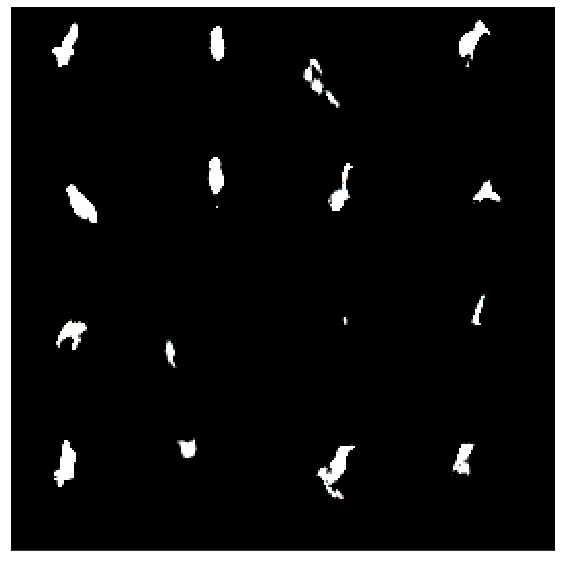

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


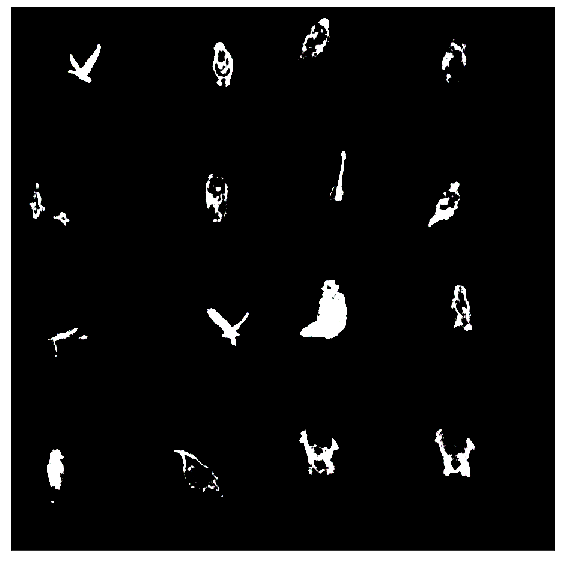

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 6


  0%|                                                                             | 1/17500 [00:14<68:52:28, 14.17s/it]

Train Epoch: 6 [0/280000 (0%)]	Loss: 0.034861
IOU : 0.0470733642578125
IOU : 0.0470733642578125


  0%|▏                                                                              | 52/17500 [00:17<30:14,  9.62it/s]

Train Epoch: 6 [200/280000 (0%)]	Loss: 0.030547
IOU : 0.057708740234375


  1%|▍                                                                             | 101/17500 [00:20<18:53, 15.35it/s]

Train Epoch: 6 [400/280000 (1%)]	Loss: 0.054752
IOU : 0.0616912841796875
IOU : 0.0616912841796875


  1%|▋                                                                             | 149/17500 [00:23<20:18, 14.24it/s]

Train Epoch: 6 [600/280000 (1%)]	Loss: 0.027014
IOU : 0.04754638671875


  1%|▉                                                                             | 201/17500 [00:27<19:38, 14.68it/s]

Train Epoch: 6 [800/280000 (1%)]	Loss: 0.048832
IOU : 0.0543975830078125
IOU : 0.0543975830078125


  1%|█                                                                             | 249/17500 [00:30<18:01, 15.94it/s]

Train Epoch: 6 [1000/280000 (1%)]	Loss: 0.037671
IOU : 0.0500030517578125


  2%|█▎                                                                            | 301/17500 [00:33<18:13, 15.73it/s]

Train Epoch: 6 [1200/280000 (2%)]	Loss: 0.039997
IOU : 0.0565643310546875
IOU : 0.0565643310546875


  2%|█▌                                                                            | 353/17500 [00:37<18:02, 15.84it/s]

Train Epoch: 6 [1400/280000 (2%)]	Loss: 0.035355
IOU : 0.056243896484375


  2%|█▊                                                                            | 401/17500 [00:40<18:16, 15.59it/s]

Train Epoch: 6 [1600/280000 (2%)]	Loss: 0.046416
IOU : 0.0573883056640625
IOU : 0.0573883056640625


  3%|██                                                                            | 449/17500 [00:43<18:20, 15.50it/s]

Train Epoch: 6 [1800/280000 (3%)]	Loss: 0.043763
IOU : 0.0535430908203125


  3%|██▏                                                                           | 504/17500 [00:46<16:51, 16.80it/s]

Train Epoch: 6 [2000/280000 (3%)]	Loss: 0.038266
IOU : 0.0561981201171875
IOU : 0.0561981201171875


  3%|██▍                                                                           | 553/17500 [00:50<18:39, 15.14it/s]

Train Epoch: 6 [2200/280000 (3%)]	Loss: 0.050946
IOU : 0.0526580810546875


  3%|██▋                                                                           | 598/17500 [00:53<19:08, 14.72it/s]

Train Epoch: 6 [2400/280000 (3%)]	Loss: 0.029117
IOU : 0.0491790771484375
IOU : 0.0491790771484375


  4%|██▉                                                                           | 650/17500 [00:56<18:44, 14.98it/s]

Train Epoch: 6 [2600/280000 (4%)]	Loss: 0.030868
IOU : 0.0502471923828125


  4%|███▏                                                                          | 702/17500 [01:00<21:05, 13.28it/s]

Train Epoch: 6 [2800/280000 (4%)]	Loss: 0.036759
IOU : 0.0535430908203125
IOU : 0.0535430908203125


  4%|███▎                                                                          | 753/17500 [01:03<19:47, 14.10it/s]

Train Epoch: 6 [3000/280000 (4%)]	Loss: 0.057513
IOU : 0.0544891357421875


  5%|███▌                                                                          | 799/17500 [01:06<20:47, 13.38it/s]

Train Epoch: 6 [3200/280000 (5%)]	Loss: 0.037670
IOU : 0.0539703369140625
IOU : 0.0539703369140625


  5%|███▊                                                                          | 851/17500 [01:10<20:19, 13.66it/s]

Train Epoch: 6 [3400/280000 (5%)]	Loss: 0.037535
IOU : 0.05712890625


  5%|████                                                                          | 901/17500 [01:13<15:55, 17.37it/s]

Train Epoch: 6 [3600/280000 (5%)]	Loss: 0.037956
IOU : 0.0509185791015625
IOU : 0.0509185791015625


  5%|████▏                                                                         | 953/17500 [01:16<17:52, 15.43it/s]

Train Epoch: 6 [3800/280000 (5%)]	Loss: 0.035385
IOU : 0.0563812255859375


  6%|████▍                                                                        | 1001/17500 [01:20<16:45, 16.40it/s]

Train Epoch: 6 [4000/280000 (6%)]	Loss: 0.032569
IOU : 0.0463409423828125
IOU : 0.0463409423828125


  6%|████▌                                                                        | 1051/17500 [01:23<20:06, 13.63it/s]

Train Epoch: 6 [4200/280000 (6%)]	Loss: 0.034346
IOU : 0.06060791015625


  6%|████▊                                                                        | 1104/17500 [01:27<16:45, 16.30it/s]

Train Epoch: 6 [4400/280000 (6%)]	Loss: 0.030328
IOU : 0.0542144775390625
IOU : 0.0542144775390625


  7%|█████                                                                        | 1152/17500 [01:30<15:40, 17.38it/s]

Train Epoch: 6 [4600/280000 (7%)]	Loss: 0.043164
IOU : 0.0494537353515625


  7%|█████▎                                                                       | 1198/17500 [01:33<19:22, 14.03it/s]

Train Epoch: 6 [4800/280000 (7%)]	Loss: 0.043934
IOU : 0.0576019287109375
IOU : 0.0576019287109375


  7%|█████▌                                                                       | 1250/17500 [01:37<18:02, 15.02it/s]

Train Epoch: 6 [5000/280000 (7%)]	Loss: 0.033233
IOU : 0.0524444580078125


  7%|█████▋                                                                       | 1302/17500 [01:40<16:38, 16.22it/s]

Train Epoch: 6 [5200/280000 (7%)]	Loss: 0.040878
IOU : 0.0599212646484375
IOU : 0.0599212646484375


  8%|█████▉                                                                       | 1350/17500 [01:43<17:52, 15.06it/s]

Train Epoch: 6 [5400/280000 (8%)]	Loss: 0.044605
IOU : 0.0562286376953125


  8%|██████▏                                                                      | 1402/17500 [01:47<17:54, 14.98it/s]

Train Epoch: 6 [5600/280000 (8%)]	Loss: 0.035117
IOU : 0.053558349609375
IOU : 0.053558349609375


  8%|██████▍                                                                      | 1451/17500 [01:50<18:08, 14.74it/s]

Train Epoch: 6 [5800/280000 (8%)]	Loss: 0.032662
IOU : 0.0556793212890625


  9%|██████▌                                                                      | 1499/17500 [01:53<18:37, 14.32it/s]

Train Epoch: 6 [6000/280000 (9%)]	Loss: 0.034763
IOU : 0.064697265625
IOU : 0.064697265625


  9%|██████▊                                                                      | 1551/17500 [01:57<16:57, 15.67it/s]

Train Epoch: 6 [6200/280000 (9%)]	Loss: 0.041351
IOU : 0.05029296875


  9%|███████                                                                      | 1601/17500 [02:00<19:32, 13.56it/s]

Train Epoch: 6 [6400/280000 (9%)]	Loss: 0.044503
IOU : 0.0584716796875
IOU : 0.0584716796875


  9%|███████▎                                                                     | 1649/17500 [02:03<17:26, 15.15it/s]

Train Epoch: 6 [6600/280000 (9%)]	Loss: 0.061202
IOU : 0.0572662353515625


 10%|███████▍                                                                     | 1701/17500 [02:07<17:51, 14.75it/s]

Train Epoch: 6 [6800/280000 (10%)]	Loss: 0.030235
IOU : 0.04278564453125
IOU : 0.04278564453125


 10%|███████▋                                                                     | 1753/17500 [02:10<16:13, 16.17it/s]

Train Epoch: 6 [7000/280000 (10%)]	Loss: 0.039035
IOU : 0.0614776611328125


 10%|███████▉                                                                     | 1801/17500 [02:14<18:42, 13.99it/s]

Train Epoch: 6 [7200/280000 (10%)]	Loss: 0.043180
IOU : 0.0467987060546875
IOU : 0.0467987060546875


 11%|████████▏                                                                    | 1850/17500 [02:17<17:52, 14.60it/s]

Train Epoch: 6 [7400/280000 (11%)]	Loss: 0.049407
IOU : 0.05572509765625


 11%|████████▎                                                                    | 1902/17500 [02:20<16:18, 15.93it/s]

Train Epoch: 6 [7600/280000 (11%)]	Loss: 0.036746
IOU : 0.05694580078125
IOU : 0.05694580078125


 11%|████████▌                                                                    | 1952/17500 [02:24<17:37, 14.70it/s]

Train Epoch: 6 [7800/280000 (11%)]	Loss: 0.026068
IOU : 0.041748046875


 11%|████████▊                                                                    | 2000/17500 [02:27<18:22, 14.06it/s]

Train Epoch: 6 [8000/280000 (11%)]	Loss: 0.038321
IOU : 0.0461578369140625
IOU : 0.0461578369140625


 12%|█████████                                                                    | 2052/17500 [02:31<18:50, 13.66it/s]

Train Epoch: 6 [8200/280000 (12%)]	Loss: 0.051337
IOU : 0.0567626953125


 12%|█████████▏                                                                   | 2101/17500 [02:34<20:02, 12.80it/s]

Train Epoch: 6 [8400/280000 (12%)]	Loss: 0.034434
IOU : 0.04449462890625
IOU : 0.04449462890625


 12%|█████████▍                                                                   | 2152/17500 [02:37<18:15, 14.02it/s]

Train Epoch: 6 [8600/280000 (12%)]	Loss: 0.029588
IOU : 0.05096435546875


 13%|█████████▋                                                                   | 2203/17500 [02:41<15:11, 16.78it/s]

Train Epoch: 6 [8800/280000 (13%)]	Loss: 0.035457
IOU : 0.0505828857421875
IOU : 0.0505828857421875


 13%|█████████▉                                                                   | 2252/17500 [02:44<17:45, 14.31it/s]

Train Epoch: 6 [9000/280000 (13%)]	Loss: 0.064140
IOU : 0.058807373046875


 13%|██████████                                                                   | 2301/17500 [02:48<19:04, 13.28it/s]

Train Epoch: 6 [9200/280000 (13%)]	Loss: 0.033166
IOU : 0.0495452880859375
IOU : 0.0495452880859375


 13%|██████████▎                                                                  | 2349/17500 [02:51<17:53, 14.11it/s]

Train Epoch: 6 [9400/280000 (13%)]	Loss: 0.036341
IOU : 0.059814453125


 14%|██████████▌                                                                  | 2401/17500 [02:55<17:12, 14.62it/s]

Train Epoch: 6 [9600/280000 (14%)]	Loss: 0.037574
IOU : 0.052825927734375
IOU : 0.052825927734375


 14%|██████████▊                                                                  | 2451/17500 [02:58<14:46, 16.97it/s]

Train Epoch: 6 [9800/280000 (14%)]	Loss: 0.036988
IOU : 0.0493621826171875


 14%|███████████                                                                  | 2501/17500 [03:01<18:13, 13.72it/s]

Train Epoch: 6 [10000/280000 (14%)]	Loss: 0.045133
IOU : 0.053466796875
IOU : 0.053466796875


 15%|███████████▏                                                                 | 2549/17500 [03:05<17:04, 14.59it/s]

Train Epoch: 6 [10200/280000 (15%)]	Loss: 0.035873
IOU : 0.0506134033203125


 15%|███████████▍                                                                 | 2601/17500 [03:09<18:45, 13.23it/s]

Train Epoch: 6 [10400/280000 (15%)]	Loss: 0.045505
IOU : 0.056915283203125
IOU : 0.056915283203125


 15%|███████████▋                                                                 | 2649/17500 [03:12<16:15, 15.23it/s]

Train Epoch: 6 [10600/280000 (15%)]	Loss: 0.032961
IOU : 0.044677734375


 15%|███████████▉                                                                 | 2701/17500 [03:16<17:43, 13.92it/s]

Train Epoch: 6 [10800/280000 (15%)]	Loss: 0.033541
IOU : 0.052978515625
IOU : 0.052978515625


 16%|████████████                                                                 | 2752/17500 [03:19<18:11, 13.52it/s]

Train Epoch: 6 [11000/280000 (16%)]	Loss: 0.039246
IOU : 0.0562744140625


 16%|████████████▎                                                                | 2804/17500 [03:23<17:13, 14.22it/s]

Train Epoch: 6 [11200/280000 (16%)]	Loss: 0.044742
IOU : 0.0579986572265625
IOU : 0.0579986572265625


 16%|████████████▌                                                                | 2849/17500 [03:26<17:44, 13.76it/s]

Train Epoch: 6 [11400/280000 (16%)]	Loss: 0.026206
IOU : 0.0451202392578125


 17%|████████████▊                                                                | 2901/17500 [03:30<16:34, 14.68it/s]

Train Epoch: 6 [11600/280000 (17%)]	Loss: 0.050206
IOU : 0.06170654296875
IOU : 0.06170654296875


 17%|████████████▉                                                                | 2949/17500 [03:33<16:50, 14.40it/s]

Train Epoch: 6 [11800/280000 (17%)]	Loss: 0.039314
IOU : 0.0565948486328125


 17%|█████████████▏                                                               | 3001/17500 [03:37<16:19, 14.81it/s]

Train Epoch: 6 [12000/280000 (17%)]	Loss: 0.036395
IOU : 0.0542144775390625
IOU : 0.0542144775390625


 17%|█████████████▍                                                               | 3049/17500 [03:40<16:00, 15.05it/s]

Train Epoch: 6 [12200/280000 (17%)]	Loss: 0.046061
IOU : 0.0640106201171875


 18%|█████████████▋                                                               | 3101/17500 [03:43<16:28, 14.56it/s]

Train Epoch: 6 [12400/280000 (18%)]	Loss: 0.042123
IOU : 0.055419921875
IOU : 0.055419921875


 18%|█████████████▉                                                               | 3154/17500 [03:47<16:17, 14.68it/s]

Train Epoch: 6 [12600/280000 (18%)]	Loss: 0.032418
IOU : 0.0496063232421875


 18%|██████████████                                                               | 3202/17500 [03:50<16:41, 14.28it/s]

Train Epoch: 6 [12800/280000 (18%)]	Loss: 0.032757
IOU : 0.0481414794921875
IOU : 0.0481414794921875


 19%|██████████████▎                                                              | 3254/17500 [03:54<16:29, 14.39it/s]

Train Epoch: 6 [13000/280000 (19%)]	Loss: 0.053949
IOU : 0.0556182861328125


 19%|██████████████▌                                                              | 3301/17500 [03:57<18:11, 13.00it/s]

Train Epoch: 6 [13200/280000 (19%)]	Loss: 0.031370
IOU : 0.0612945556640625
IOU : 0.0612945556640625


 19%|██████████████▊                                                              | 3353/17500 [04:00<15:22, 15.34it/s]

Train Epoch: 6 [13400/280000 (19%)]	Loss: 0.053970
IOU : 0.0572509765625


 19%|██████████████▉                                                              | 3401/17500 [04:04<17:09, 13.69it/s]

Train Epoch: 6 [13600/280000 (19%)]	Loss: 0.036175
IOU : 0.0524444580078125
IOU : 0.0524444580078125


 20%|███████████████▏                                                             | 3449/17500 [04:07<15:56, 14.69it/s]

Train Epoch: 6 [13800/280000 (20%)]	Loss: 0.034947
IOU : 0.0460357666015625


 20%|███████████████▍                                                             | 3501/17500 [04:11<16:08, 14.45it/s]

Train Epoch: 6 [14000/280000 (20%)]	Loss: 0.041027
IOU : 0.0496826171875
IOU : 0.0496826171875


 20%|███████████████▌                                                             | 3549/17500 [04:14<15:59, 14.54it/s]

Train Epoch: 6 [14200/280000 (20%)]	Loss: 0.057155
IOU : 0.0561370849609375


 21%|███████████████▊                                                             | 3601/17500 [04:18<17:23, 13.32it/s]

Train Epoch: 6 [14400/280000 (21%)]	Loss: 0.031213
IOU : 0.044036865234375
IOU : 0.044036865234375


 21%|████████████████                                                             | 3649/17500 [04:21<14:45, 15.64it/s]

Train Epoch: 6 [14600/280000 (21%)]	Loss: 0.039408
IOU : 0.05572509765625


 21%|████████████████▎                                                            | 3701/17500 [04:25<15:29, 14.85it/s]

Train Epoch: 6 [14800/280000 (21%)]	Loss: 0.083705
IOU : 0.0649261474609375
IOU : 0.0649261474609375


 21%|████████████████▍                                                            | 3749/17500 [04:28<16:13, 14.12it/s]

Train Epoch: 6 [15000/280000 (21%)]	Loss: 0.031479
IOU : 0.0437774658203125


 22%|████████████████▋                                                            | 3801/17500 [04:32<15:41, 14.56it/s]

Train Epoch: 6 [15200/280000 (22%)]	Loss: 0.049726
IOU : 0.054351806640625
IOU : 0.054351806640625


 22%|████████████████▉                                                            | 3849/17500 [04:35<15:26, 14.73it/s]

Train Epoch: 6 [15400/280000 (22%)]	Loss: 0.042086
IOU : 0.057403564453125


 22%|█████████████████▏                                                           | 3901/17500 [04:38<15:06, 15.00it/s]

Train Epoch: 6 [15600/280000 (22%)]	Loss: 0.037301
IOU : 0.0500030517578125
IOU : 0.0500030517578125


 23%|█████████████████▍                                                           | 3953/17500 [04:42<15:33, 14.50it/s]

Train Epoch: 6 [15800/280000 (23%)]	Loss: 0.035231
IOU : 0.0438079833984375


 23%|█████████████████▌                                                           | 4001/17500 [04:45<14:17, 15.74it/s]

Train Epoch: 6 [16000/280000 (23%)]	Loss: 0.033482
IOU : 0.049957275390625
IOU : 0.049957275390625


 23%|█████████████████▊                                                           | 4053/17500 [04:49<15:03, 14.88it/s]

Train Epoch: 6 [16200/280000 (23%)]	Loss: 0.036272
IOU : 0.0554046630859375


 23%|██████████████████                                                           | 4101/17500 [04:52<16:09, 13.83it/s]

Train Epoch: 6 [16400/280000 (23%)]	Loss: 0.039041
IOU : 0.0467529296875
IOU : 0.0467529296875


 24%|██████████████████▎                                                          | 4153/17500 [04:55<13:35, 16.37it/s]

Train Epoch: 6 [16600/280000 (24%)]	Loss: 0.028983
IOU : 0.0582733154296875


 24%|██████████████████▍                                                          | 4201/17500 [04:59<12:46, 17.35it/s]

Train Epoch: 6 [16800/280000 (24%)]	Loss: 0.038861
IOU : 0.052490234375
IOU : 0.052490234375


 24%|██████████████████▋                                                          | 4251/17500 [05:02<15:51, 13.92it/s]

Train Epoch: 6 [17000/280000 (24%)]	Loss: 0.047640
IOU : 0.0585784912109375


 25%|██████████████████▉                                                          | 4302/17500 [05:06<12:47, 17.20it/s]

Train Epoch: 6 [17200/280000 (25%)]	Loss: 0.042903
IOU : 0.0548553466796875
IOU : 0.0548553466796875


 25%|███████████████████▏                                                         | 4354/17500 [05:09<16:01, 13.68it/s]

Train Epoch: 6 [17400/280000 (25%)]	Loss: 0.052189
IOU : 0.050933837890625


 25%|███████████████████▎                                                         | 4402/17500 [05:12<15:13, 14.33it/s]

Train Epoch: 6 [17600/280000 (25%)]	Loss: 0.043189
IOU : 0.049285888671875
IOU : 0.049285888671875


 25%|███████████████████▌                                                         | 4454/17500 [05:16<16:35, 13.11it/s]

Train Epoch: 6 [17800/280000 (25%)]	Loss: 0.044853
IOU : 0.0522918701171875


 26%|███████████████████▊                                                         | 4501/17500 [05:20<18:25, 11.76it/s]

Train Epoch: 6 [18000/280000 (26%)]	Loss: 0.044843
IOU : 0.05816650390625
IOU : 0.05816650390625


 26%|████████████████████                                                         | 4549/17500 [05:23<16:32, 13.05it/s]

Train Epoch: 6 [18200/280000 (26%)]	Loss: 0.034603
IOU : 0.0526123046875


 26%|████████████████████▏                                                        | 4601/17500 [05:26<15:25, 13.94it/s]

Train Epoch: 6 [18400/280000 (26%)]	Loss: 0.044551
IOU : 0.0533905029296875
IOU : 0.0533905029296875


 27%|████████████████████▍                                                        | 4649/17500 [05:30<15:19, 13.98it/s]

Train Epoch: 6 [18600/280000 (27%)]	Loss: 0.050109
IOU : 0.0597381591796875


 27%|████████████████████▋                                                        | 4701/17500 [05:33<14:14, 14.98it/s]

Train Epoch: 6 [18800/280000 (27%)]	Loss: 0.038932
IOU : 0.058319091796875
IOU : 0.058319091796875


 27%|████████████████████▉                                                        | 4752/17500 [05:37<13:14, 16.05it/s]

Train Epoch: 6 [19000/280000 (27%)]	Loss: 0.025395
IOU : 0.0458526611328125


 27%|█████████████████████▏                                                       | 4802/17500 [05:40<16:31, 12.81it/s]

Train Epoch: 6 [19200/280000 (27%)]	Loss: 0.042737
IOU : 0.0500640869140625
IOU : 0.0500640869140625


 28%|█████████████████████▎                                                       | 4852/17500 [05:44<12:54, 16.34it/s]

Train Epoch: 6 [19400/280000 (28%)]	Loss: 0.039708
IOU : 0.052642822265625


 28%|█████████████████████▌                                                       | 4901/17500 [05:47<16:50, 12.47it/s]

Train Epoch: 6 [19600/280000 (28%)]	Loss: 0.047340
IOU : 0.0579833984375
IOU : 0.0579833984375


 28%|█████████████████████▊                                                       | 4949/17500 [05:51<15:58, 13.09it/s]

Train Epoch: 6 [19800/280000 (28%)]	Loss: 0.060378
IOU : 0.0553436279296875


 29%|██████████████████████                                                       | 5001/17500 [05:54<14:31, 14.33it/s]

Train Epoch: 6 [20000/280000 (29%)]	Loss: 0.027614
IOU : 0.0446929931640625
IOU : 0.0446929931640625


 29%|██████████████████████▏                                                      | 5049/17500 [05:58<14:46, 14.05it/s]

Train Epoch: 6 [20200/280000 (29%)]	Loss: 0.038843
IOU : 0.04705810546875


 29%|██████████████████████▍                                                      | 5101/17500 [06:01<13:35, 15.20it/s]

Train Epoch: 6 [20400/280000 (29%)]	Loss: 0.048498
IOU : 0.0643310546875
IOU : 0.0643310546875


 29%|██████████████████████▋                                                      | 5149/17500 [06:05<14:48, 13.90it/s]

Train Epoch: 6 [20600/280000 (29%)]	Loss: 0.035249
IOU : 0.0547332763671875


 30%|██████████████████████▉                                                      | 5201/17500 [06:08<14:26, 14.19it/s]

Train Epoch: 6 [20800/280000 (30%)]	Loss: 0.038321
IOU : 0.0503387451171875
IOU : 0.0503387451171875


 30%|███████████████████████                                                      | 5249/17500 [06:12<13:41, 14.92it/s]

Train Epoch: 6 [21000/280000 (30%)]	Loss: 0.038585
IOU : 0.0553741455078125


 30%|███████████████████████▎                                                     | 5301/17500 [06:15<13:16, 15.32it/s]

Train Epoch: 6 [21200/280000 (30%)]	Loss: 0.035185
IOU : 0.050018310546875
IOU : 0.050018310546875


 31%|███████████████████████▌                                                     | 5353/17500 [06:19<13:06, 15.44it/s]

Train Epoch: 6 [21400/280000 (31%)]	Loss: 0.042059
IOU : 0.05517578125


 31%|███████████████████████▊                                                     | 5401/17500 [06:22<13:07, 15.37it/s]

Train Epoch: 6 [21600/280000 (31%)]	Loss: 0.040961
IOU : 0.05853271484375
IOU : 0.05853271484375


 31%|███████████████████████▉                                                     | 5449/17500 [06:25<13:31, 14.85it/s]

Train Epoch: 6 [21800/280000 (31%)]	Loss: 0.033259
IOU : 0.0574188232421875


 31%|████████████████████████▏                                                    | 5501/17500 [06:29<13:21, 14.97it/s]

Train Epoch: 6 [22000/280000 (31%)]	Loss: 0.032176
IOU : 0.0530853271484375
IOU : 0.0530853271484375


 32%|████████████████████████▍                                                    | 5549/17500 [06:32<12:47, 15.57it/s]

Train Epoch: 6 [22200/280000 (32%)]	Loss: 0.034531
IOU : 0.0473785400390625


 32%|████████████████████████▋                                                    | 5604/17500 [06:36<12:26, 15.93it/s]

Train Epoch: 6 [22400/280000 (32%)]	Loss: 0.031983
IOU : 0.04791259765625
IOU : 0.04791259765625


 32%|████████████████████████▊                                                    | 5649/17500 [06:39<14:26, 13.68it/s]

Train Epoch: 6 [22600/280000 (32%)]	Loss: 0.040491
IOU : 0.0450897216796875


 33%|█████████████████████████                                                    | 5701/17500 [06:42<13:44, 14.31it/s]

Train Epoch: 6 [22800/280000 (33%)]	Loss: 0.036215
IOU : 0.0574951171875
IOU : 0.0574951171875


 33%|█████████████████████████▎                                                   | 5749/17500 [06:45<12:26, 15.75it/s]

Train Epoch: 6 [23000/280000 (33%)]	Loss: 0.055782
IOU : 0.054229736328125


 33%|█████████████████████████▌                                                   | 5801/17500 [06:49<12:55, 15.09it/s]

Train Epoch: 6 [23200/280000 (33%)]	Loss: 0.033193
IOU : 0.050323486328125
IOU : 0.050323486328125


 33%|█████████████████████████▋                                                   | 5852/17500 [06:52<11:16, 17.22it/s]

Train Epoch: 6 [23400/280000 (33%)]	Loss: 0.061805
IOU : 0.05291748046875


 34%|█████████████████████████▉                                                   | 5902/17500 [06:56<12:30, 15.45it/s]

Train Epoch: 6 [23600/280000 (34%)]	Loss: 0.031275
IOU : 0.0448455810546875
IOU : 0.0448455810546875


 34%|██████████████████████████▏                                                  | 5949/17500 [06:59<14:42, 13.09it/s]

Train Epoch: 6 [23800/280000 (34%)]	Loss: 0.049823
IOU : 0.061553955078125


 34%|██████████████████████████▍                                                  | 6000/17500 [07:02<12:29, 15.34it/s]

Train Epoch: 6 [24000/280000 (34%)]	Loss: 0.036276
IOU : 0.050445556640625
IOU : 0.050445556640625


 35%|██████████████████████████▌                                                  | 6048/17500 [07:06<12:51, 14.84it/s]

Train Epoch: 6 [24200/280000 (35%)]	Loss: 0.041436
IOU : 0.0557403564453125


 35%|██████████████████████████▊                                                  | 6100/17500 [07:09<12:04, 15.73it/s]

Train Epoch: 6 [24400/280000 (35%)]	Loss: 0.032128
IOU : 0.04974365234375
IOU : 0.04974365234375


 35%|███████████████████████████                                                  | 6152/17500 [07:13<13:41, 13.81it/s]

Train Epoch: 6 [24600/280000 (35%)]	Loss: 0.035831
IOU : 0.0525970458984375


 35%|███████████████████████████▎                                                 | 6201/17500 [07:16<12:52, 14.63it/s]

Train Epoch: 6 [24800/280000 (35%)]	Loss: 0.033834
IOU : 0.05926513671875
IOU : 0.05926513671875


 36%|███████████████████████████▌                                                 | 6250/17500 [07:20<13:03, 14.35it/s]

Train Epoch: 6 [25000/280000 (36%)]	Loss: 0.050327
IOU : 0.0487823486328125


 36%|███████████████████████████▋                                                 | 6298/17500 [07:23<12:49, 14.55it/s]

Train Epoch: 6 [25200/280000 (36%)]	Loss: 0.039529
IOU : 0.0542449951171875
IOU : 0.0542449951171875


 36%|███████████████████████████▉                                                 | 6350/17500 [07:26<12:47, 14.52it/s]

Train Epoch: 6 [25400/280000 (36%)]	Loss: 0.052486
IOU : 0.0532684326171875


 37%|████████████████████████████▏                                                | 6402/17500 [07:30<12:19, 15.00it/s]

Train Epoch: 6 [25600/280000 (37%)]	Loss: 0.038721
IOU : 0.0518341064453125
IOU : 0.0518341064453125


 37%|████████████████████████████▍                                                | 6450/17500 [07:33<13:20, 13.81it/s]

Train Epoch: 6 [25800/280000 (37%)]	Loss: 0.062438
IOU : 0.064178466796875


 37%|████████████████████████████▌                                                | 6498/17500 [07:36<12:28, 14.69it/s]

Train Epoch: 6 [26000/280000 (37%)]	Loss: 0.027252
IOU : 0.04681396484375
IOU : 0.04681396484375


 37%|████████████████████████████▊                                                | 6550/17500 [07:40<12:46, 14.29it/s]

Train Epoch: 6 [26200/280000 (37%)]	Loss: 0.038218
IOU : 0.058746337890625


 38%|█████████████████████████████                                                | 6598/17500 [07:43<11:45, 15.46it/s]

Train Epoch: 6 [26400/280000 (38%)]	Loss: 0.031494
IOU : 0.0537261962890625
IOU : 0.0537261962890625


 38%|█████████████████████████████▎                                               | 6650/17500 [07:47<12:37, 14.33it/s]

Train Epoch: 6 [26600/280000 (38%)]	Loss: 0.029523
IOU : 0.0473175048828125


 38%|█████████████████████████████▍                                               | 6702/17500 [07:50<11:33, 15.56it/s]

Train Epoch: 6 [26800/280000 (38%)]	Loss: 0.026956
IOU : 0.0460052490234375
IOU : 0.0460052490234375


 39%|█████████████████████████████▋                                               | 6750/17500 [07:54<12:05, 14.83it/s]

Train Epoch: 6 [27000/280000 (39%)]	Loss: 0.073164
IOU : 0.0530853271484375


 39%|█████████████████████████████▉                                               | 6798/17500 [07:57<12:05, 14.76it/s]

Train Epoch: 6 [27200/280000 (39%)]	Loss: 0.043654
IOU : 0.054779052734375
IOU : 0.054779052734375


 39%|██████████████████████████████▏                                              | 6850/17500 [08:00<13:04, 13.58it/s]

Train Epoch: 6 [27400/280000 (39%)]	Loss: 0.028269
IOU : 0.0464630126953125


 39%|██████████████████████████████▎                                              | 6898/17500 [08:04<11:58, 14.76it/s]

Train Epoch: 6 [27600/280000 (39%)]	Loss: 0.048189
IOU : 0.04766845703125
IOU : 0.04766845703125


 40%|██████████████████████████████▌                                              | 6950/17500 [08:07<12:13, 14.38it/s]

Train Epoch: 6 [27800/280000 (40%)]	Loss: 0.037676
IOU : 0.053802490234375


 40%|██████████████████████████████▊                                              | 6998/17500 [08:10<11:41, 14.97it/s]

Train Epoch: 6 [28000/280000 (40%)]	Loss: 0.047899
IOU : 0.053375244140625
IOU : 0.053375244140625


 40%|███████████████████████████████                                              | 7050/17500 [08:14<12:23, 14.05it/s]

Train Epoch: 6 [28200/280000 (40%)]	Loss: 0.032729
IOU : 0.052703857421875


 41%|███████████████████████████████▏                                             | 7098/17500 [08:17<11:12, 15.46it/s]

Train Epoch: 6 [28400/280000 (41%)]	Loss: 0.035974
IOU : 0.0515289306640625
IOU : 0.0515289306640625


 41%|███████████████████████████████▍                                             | 7148/17500 [08:21<13:20, 12.93it/s]

Train Epoch: 6 [28600/280000 (41%)]	Loss: 0.034640
IOU : 0.0583648681640625


 41%|███████████████████████████████▋                                             | 7200/17500 [08:24<11:32, 14.87it/s]

Train Epoch: 6 [28800/280000 (41%)]	Loss: 0.034027
IOU : 0.0611572265625
IOU : 0.0611572265625


 41%|███████████████████████████████▉                                             | 7252/17500 [08:27<11:22, 15.01it/s]

Train Epoch: 6 [29000/280000 (41%)]	Loss: 0.038380
IOU : 0.0478057861328125


 42%|████████████████████████████████▏                                            | 7303/17500 [08:31<11:41, 14.54it/s]

Train Epoch: 6 [29200/280000 (42%)]	Loss: 0.047648
IOU : 0.058380126953125
IOU : 0.058380126953125


 42%|████████████████████████████████▎                                            | 7349/17500 [08:34<13:41, 12.36it/s]

Train Epoch: 6 [29400/280000 (42%)]	Loss: 0.031478
IOU : 0.051971435546875


 42%|████████████████████████████████▌                                            | 7401/17500 [08:38<12:00, 14.02it/s]

Train Epoch: 6 [29600/280000 (42%)]	Loss: 0.048878
IOU : 0.0533599853515625
IOU : 0.0533599853515625


 43%|████████████████████████████████▊                                            | 7450/17500 [08:41<12:28, 13.43it/s]

Train Epoch: 6 [29800/280000 (43%)]	Loss: 0.035036
IOU : 0.049041748046875


 43%|█████████████████████████████████                                            | 7501/17500 [08:45<11:41, 14.25it/s]

Train Epoch: 6 [30000/280000 (43%)]	Loss: 0.038799
IOU : 0.051910400390625
IOU : 0.051910400390625


 43%|█████████████████████████████████▏                                           | 7549/17500 [08:48<10:49, 15.31it/s]

Train Epoch: 6 [30200/280000 (43%)]	Loss: 0.036016
IOU : 0.05377197265625


 43%|█████████████████████████████████▍                                           | 7601/17500 [08:51<11:14, 14.67it/s]

Train Epoch: 6 [30400/280000 (43%)]	Loss: 0.045522
IOU : 0.053680419921875
IOU : 0.053680419921875


 44%|█████████████████████████████████▋                                           | 7649/17500 [08:55<12:58, 12.65it/s]

Train Epoch: 6 [30600/280000 (44%)]	Loss: 0.037346
IOU : 0.0513153076171875


 44%|█████████████████████████████████▉                                           | 7701/17500 [08:58<14:41, 11.11it/s]

Train Epoch: 6 [30800/280000 (44%)]	Loss: 0.038653
IOU : 0.05657958984375
IOU : 0.05657958984375


 44%|██████████████████████████████████                                           | 7749/17500 [09:02<11:25, 14.23it/s]

Train Epoch: 6 [31000/280000 (44%)]	Loss: 0.040316
IOU : 0.055633544921875


 45%|██████████████████████████████████▎                                          | 7801/17500 [09:05<11:12, 14.43it/s]

Train Epoch: 6 [31200/280000 (45%)]	Loss: 0.028807
IOU : 0.056640625
IOU : 0.056640625


 45%|██████████████████████████████████▌                                          | 7849/17500 [09:08<10:32, 15.27it/s]

Train Epoch: 6 [31400/280000 (45%)]	Loss: 0.052071
IOU : 0.05255126953125


 45%|██████████████████████████████████▊                                          | 7901/17500 [09:12<10:11, 15.69it/s]

Train Epoch: 6 [31600/280000 (45%)]	Loss: 0.029996
IOU : 0.0456390380859375
IOU : 0.0456390380859375


 45%|██████████████████████████████████▉                                          | 7949/17500 [09:15<11:35, 13.74it/s]

Train Epoch: 6 [31800/280000 (45%)]	Loss: 0.048547
IOU : 0.060821533203125


 46%|███████████████████████████████████▏                                         | 8001/17500 [09:19<11:32, 13.72it/s]

Train Epoch: 6 [32000/280000 (46%)]	Loss: 0.033324
IOU : 0.0445404052734375
IOU : 0.0445404052734375


 46%|███████████████████████████████████▍                                         | 8054/17500 [09:22<10:26, 15.07it/s]

Train Epoch: 6 [32200/280000 (46%)]	Loss: 0.044509
IOU : 0.0540618896484375


 46%|███████████████████████████████████▋                                         | 8101/17500 [09:25<11:06, 14.10it/s]

Train Epoch: 6 [32400/280000 (46%)]	Loss: 0.037328
IOU : 0.0555267333984375
IOU : 0.0555267333984375


 47%|███████████████████████████████████▊                                         | 8152/17500 [09:29<09:21, 16.65it/s]

Train Epoch: 6 [32600/280000 (47%)]	Loss: 0.046081
IOU : 0.060302734375


 47%|████████████████████████████████████                                         | 8202/17500 [09:32<09:08, 16.94it/s]

Train Epoch: 6 [32800/280000 (47%)]	Loss: 0.048030
IOU : 0.053253173828125
IOU : 0.053253173828125


 47%|████████████████████████████████████▎                                        | 8251/17500 [09:36<10:59, 14.03it/s]

Train Epoch: 6 [33000/280000 (47%)]	Loss: 0.045442
IOU : 0.0538787841796875


 47%|████████████████████████████████████▌                                        | 8299/17500 [09:39<10:18, 14.87it/s]

Train Epoch: 6 [33200/280000 (47%)]	Loss: 0.037426
IOU : 0.051788330078125
IOU : 0.051788330078125


 48%|████████████████████████████████████▋                                        | 8352/17500 [09:43<13:55, 10.94it/s]

Train Epoch: 6 [33400/280000 (48%)]	Loss: 0.055451
IOU : 0.0515289306640625


 48%|████████████████████████████████████▉                                        | 8404/17500 [09:46<09:27, 16.02it/s]

Train Epoch: 6 [33600/280000 (48%)]	Loss: 0.032615
IOU : 0.04949951171875
IOU : 0.04949951171875


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:49<10:24, 14.49it/s]

Train Epoch: 6 [33800/280000 (48%)]	Loss: 0.036541
IOU : 0.0481109619140625


 49%|█████████████████████████████████████▍                                       | 8503/17500 [09:53<09:54, 15.15it/s]

Train Epoch: 6 [34000/280000 (49%)]	Loss: 0.028438
IOU : 0.0511322021484375
IOU : 0.0511322021484375


 49%|█████████████████████████████████████▌                                       | 8549/17500 [09:56<10:45, 13.87it/s]

Train Epoch: 6 [34200/280000 (49%)]	Loss: 0.037409
IOU : 0.05413818359375


 49%|█████████████████████████████████████▊                                       | 8601/17500 [10:00<10:04, 14.72it/s]

Train Epoch: 6 [34400/280000 (49%)]	Loss: 0.042516
IOU : 0.0555877685546875
IOU : 0.0555877685546875


 49%|██████████████████████████████████████                                       | 8652/17500 [10:03<08:02, 18.35it/s]

Train Epoch: 6 [34600/280000 (49%)]	Loss: 0.035637
IOU : 0.0471343994140625


 50%|██████████████████████████████████████▎                                      | 8703/17500 [10:07<09:55, 14.77it/s]

Train Epoch: 6 [34800/280000 (50%)]	Loss: 0.046588
IOU : 0.0614776611328125
IOU : 0.0614776611328125


 50%|██████████████████████████████████████▌                                      | 8752/17500 [10:10<10:01, 14.54it/s]

Train Epoch: 6 [35000/280000 (50%)]	Loss: 0.034397
IOU : 0.0551605224609375


 50%|██████████████████████████████████████▋                                      | 8801/17500 [10:13<08:45, 16.56it/s]

Train Epoch: 6 [35200/280000 (50%)]	Loss: 0.036780
IOU : 0.0561676025390625
IOU : 0.0561676025390625


 51%|██████████████████████████████████████▉                                      | 8852/17500 [10:17<10:30, 13.71it/s]

Train Epoch: 6 [35400/280000 (51%)]	Loss: 0.045977
IOU : 0.0554962158203125


 51%|███████████████████████████████████████▏                                     | 8899/17500 [10:20<09:25, 15.22it/s]

Train Epoch: 6 [35600/280000 (51%)]	Loss: 0.044513
IOU : 0.051971435546875
IOU : 0.051971435546875


 51%|███████████████████████████████████████▍                                     | 8951/17500 [10:24<09:54, 14.39it/s]

Train Epoch: 6 [35800/280000 (51%)]	Loss: 0.029221
IOU : 0.050079345703125


 51%|███████████████████████████████████████▌                                     | 9002/17500 [10:27<07:36, 18.60it/s]

Train Epoch: 6 [36000/280000 (51%)]	Loss: 0.032165
IOU : 0.0546722412109375
IOU : 0.0546722412109375


 52%|███████████████████████████████████████▊                                     | 9050/17500 [10:31<10:08, 13.88it/s]

Train Epoch: 6 [36200/280000 (52%)]	Loss: 0.038386
IOU : 0.053253173828125


 52%|████████████████████████████████████████                                     | 9098/17500 [10:34<09:42, 14.42it/s]

Train Epoch: 6 [36400/280000 (52%)]	Loss: 0.033933
IOU : 0.0565185546875
IOU : 0.0565185546875


 52%|████████████████████████████████████████▎                                    | 9150/17500 [10:37<09:03, 15.36it/s]

Train Epoch: 6 [36600/280000 (52%)]	Loss: 0.038571
IOU : 0.0525360107421875


 53%|████████████████████████████████████████▍                                    | 9198/17500 [10:41<08:58, 15.41it/s]

Train Epoch: 6 [36800/280000 (53%)]	Loss: 0.059671
IOU : 0.0528411865234375
IOU : 0.0528411865234375


 53%|████████████████████████████████████████▋                                    | 9250/17500 [10:44<08:46, 15.66it/s]

Train Epoch: 6 [37000/280000 (53%)]	Loss: 0.040928
IOU : 0.0507354736328125


 53%|████████████████████████████████████████▉                                    | 9298/17500 [10:47<09:39, 14.15it/s]

Train Epoch: 6 [37200/280000 (53%)]	Loss: 0.031665
IOU : 0.048828125
IOU : 0.048828125


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [10:51<08:56, 15.18it/s]

Train Epoch: 6 [37400/280000 (53%)]	Loss: 0.051693
IOU : 0.0562896728515625


 54%|█████████████████████████████████████████▎                                   | 9403/17500 [10:54<08:36, 15.69it/s]

Train Epoch: 6 [37600/280000 (54%)]	Loss: 0.050164
IOU : 0.055633544921875
IOU : 0.055633544921875


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [10:58<10:33, 12.70it/s]

Train Epoch: 6 [37800/280000 (54%)]	Loss: 0.027336
IOU : 0.045745849609375


 54%|█████████████████████████████████████████▊                                   | 9503/17500 [11:01<08:38, 15.44it/s]

Train Epoch: 6 [38000/280000 (54%)]	Loss: 0.033925
IOU : 0.045989990234375
IOU : 0.045989990234375


 55%|██████████████████████████████████████████                                   | 9554/17500 [11:05<08:14, 16.06it/s]

Train Epoch: 6 [38200/280000 (55%)]	Loss: 0.036266
IOU : 0.0518341064453125


 55%|██████████████████████████████████████████▎                                  | 9603/17500 [11:08<08:54, 14.77it/s]

Train Epoch: 6 [38400/280000 (55%)]	Loss: 0.050585
IOU : 0.05596923828125
IOU : 0.05596923828125


 55%|██████████████████████████████████████████▍                                  | 9653/17500 [11:12<09:17, 14.08it/s]

Train Epoch: 6 [38600/280000 (55%)]	Loss: 0.043643
IOU : 0.0588531494140625


 55%|██████████████████████████████████████████▋                                  | 9703/17500 [11:15<07:16, 17.88it/s]

Train Epoch: 6 [38800/280000 (55%)]	Loss: 0.039942
IOU : 0.0467681884765625
IOU : 0.0467681884765625


 56%|██████████████████████████████████████████▉                                  | 9752/17500 [11:18<08:07, 15.89it/s]

Train Epoch: 6 [39000/280000 (56%)]	Loss: 0.072580
IOU : 0.0589447021484375


 56%|███████████████████████████████████████████▏                                 | 9804/17500 [11:22<08:48, 14.55it/s]

Train Epoch: 6 [39200/280000 (56%)]	Loss: 0.033365
IOU : 0.04833984375
IOU : 0.04833984375


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [11:25<08:35, 14.83it/s]

Train Epoch: 6 [39400/280000 (56%)]	Loss: 0.035011
IOU : 0.0503387451171875


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [11:28<09:58, 12.69it/s]

Train Epoch: 6 [39600/280000 (57%)]	Loss: 0.038487
IOU : 0.0507659912109375
IOU : 0.0507659912109375


 57%|███████████████████████████████████████████▊                                 | 9950/17500 [11:32<09:02, 13.92it/s]

Train Epoch: 6 [39800/280000 (57%)]	Loss: 0.079588
IOU : 0.051239013671875


 57%|███████████████████████████████████████████▍                                | 10004/17500 [11:35<08:06, 15.40it/s]

Train Epoch: 6 [40000/280000 (57%)]	Loss: 0.029685
IOU : 0.0504150390625
IOU : 0.0504150390625


 57%|███████████████████████████████████████████▋                                | 10053/17500 [11:38<07:42, 16.11it/s]

Train Epoch: 6 [40200/280000 (57%)]	Loss: 0.047638
IOU : 0.061767578125


 58%|███████████████████████████████████████████▊                                | 10102/17500 [11:42<08:01, 15.36it/s]

Train Epoch: 6 [40400/280000 (58%)]	Loss: 0.036969
IOU : 0.0519256591796875
IOU : 0.0519256591796875


 58%|████████████████████████████████████████████                                | 10148/17500 [11:45<09:39, 12.69it/s]

Train Epoch: 6 [40600/280000 (58%)]	Loss: 0.046309
IOU : 0.05389404296875


 58%|████████████████████████████████████████████▎                               | 10201/17500 [11:48<08:12, 14.82it/s]

Train Epoch: 6 [40800/280000 (58%)]	Loss: 0.031727
IOU : 0.04638671875
IOU : 0.04638671875


 59%|████████████████████████████████████████████▌                               | 10248/17500 [11:52<09:10, 13.18it/s]

Train Epoch: 6 [41000/280000 (59%)]	Loss: 0.062745
IOU : 0.0572052001953125


 59%|████████████████████████████████████████████▋                               | 10300/17500 [11:55<08:18, 14.44it/s]

Train Epoch: 6 [41200/280000 (59%)]	Loss: 0.038686
IOU : 0.0533447265625
IOU : 0.0533447265625


 59%|████████████████████████████████████████████▉                               | 10350/17500 [11:59<08:50, 13.48it/s]

Train Epoch: 6 [41400/280000 (59%)]	Loss: 0.042230
IOU : 0.0527496337890625


 59%|█████████████████████████████████████████████▏                              | 10398/17500 [12:02<07:48, 15.17it/s]

Train Epoch: 6 [41600/280000 (59%)]	Loss: 0.031005
IOU : 0.0473175048828125
IOU : 0.0473175048828125


 60%|█████████████████████████████████████████████▍                              | 10450/17500 [12:06<07:51, 14.96it/s]

Train Epoch: 6 [41800/280000 (60%)]	Loss: 0.043035
IOU : 0.0536956787109375


 60%|█████████████████████████████████████████████▌                              | 10498/17500 [12:09<07:35, 15.36it/s]

Train Epoch: 6 [42000/280000 (60%)]	Loss: 0.029914
IOU : 0.04266357421875
IOU : 0.04266357421875


 60%|█████████████████████████████████████████████▊                              | 10550/17500 [12:12<07:21, 15.75it/s]

Train Epoch: 6 [42200/280000 (60%)]	Loss: 0.035132
IOU : 0.0540313720703125


 61%|██████████████████████████████████████████████                              | 10602/17500 [12:16<08:12, 13.99it/s]

Train Epoch: 6 [42400/280000 (61%)]	Loss: 0.045914
IOU : 0.06036376953125
IOU : 0.06036376953125


 61%|██████████████████████████████████████████████▎                             | 10650/17500 [12:19<07:39, 14.90it/s]

Train Epoch: 6 [42600/280000 (61%)]	Loss: 0.030926
IOU : 0.0485382080078125


 61%|██████████████████████████████████████████████▍                             | 10698/17500 [12:22<07:18, 15.50it/s]

Train Epoch: 6 [42800/280000 (61%)]	Loss: 0.035853
IOU : 0.05010986328125
IOU : 0.05010986328125


 61%|██████████████████████████████████████████████▋                             | 10753/17500 [12:26<07:27, 15.09it/s]

Train Epoch: 6 [43000/280000 (61%)]	Loss: 0.047544
IOU : 0.054534912109375


 62%|██████████████████████████████████████████████▉                             | 10803/17500 [12:29<07:47, 14.33it/s]

Train Epoch: 6 [43200/280000 (62%)]	Loss: 0.037040
IOU : 0.054046630859375
IOU : 0.054046630859375


 62%|███████████████████████████████████████████████                             | 10850/17500 [12:33<07:50, 14.15it/s]

Train Epoch: 6 [43400/280000 (62%)]	Loss: 0.048191
IOU : 0.0650482177734375


 62%|███████████████████████████████████████████████▎                            | 10898/17500 [12:36<07:05, 15.52it/s]

Train Epoch: 6 [43600/280000 (62%)]	Loss: 0.042789
IOU : 0.05230712890625
IOU : 0.05230712890625


 63%|███████████████████████████████████████████████▌                            | 10954/17500 [12:40<07:44, 14.08it/s]

Train Epoch: 6 [43800/280000 (63%)]	Loss: 0.045062
IOU : 0.0572967529296875


 63%|███████████████████████████████████████████████▊                            | 11000/17500 [12:43<07:37, 14.19it/s]

Train Epoch: 6 [44000/280000 (63%)]	Loss: 0.047526
IOU : 0.06512451171875
IOU : 0.06512451171875


 63%|████████████████████████████████████████████████                            | 11054/17500 [12:46<06:54, 15.54it/s]

Train Epoch: 6 [44200/280000 (63%)]	Loss: 0.053194
IOU : 0.05950927734375


 63%|████████████████████████████████████████████████▏                           | 11102/17500 [12:50<07:44, 13.79it/s]

Train Epoch: 6 [44400/280000 (63%)]	Loss: 0.044966
IOU : 0.0569610595703125
IOU : 0.0569610595703125


 64%|████████████████████████████████████████████████▍                           | 11152/17500 [12:53<06:52, 15.40it/s]

Train Epoch: 6 [44600/280000 (64%)]	Loss: 0.037202
IOU : 0.0523529052734375


 64%|████████████████████████████████████████████████▋                           | 11199/17500 [12:56<07:13, 14.53it/s]

Train Epoch: 6 [44800/280000 (64%)]	Loss: 0.050741
IOU : 0.0544281005859375
IOU : 0.0544281005859375


 64%|████████████████████████████████████████████████▊                           | 11254/17500 [13:00<06:49, 15.24it/s]

Train Epoch: 6 [45000/280000 (64%)]	Loss: 0.044385
IOU : 0.058349609375


 65%|█████████████████████████████████████████████████                           | 11299/17500 [13:03<06:55, 14.93it/s]

Train Epoch: 6 [45200/280000 (65%)]	Loss: 0.040331
IOU : 0.05865478515625
IOU : 0.05865478515625


 65%|█████████████████████████████████████████████████▎                          | 11351/17500 [13:06<07:17, 14.05it/s]

Train Epoch: 6 [45400/280000 (65%)]	Loss: 0.029343
IOU : 0.0450439453125


 65%|█████████████████████████████████████████████████▌                          | 11399/17500 [13:10<06:57, 14.61it/s]

Train Epoch: 6 [45600/280000 (65%)]	Loss: 0.038078
IOU : 0.0537109375
IOU : 0.0537109375


 65%|█████████████████████████████████████████████████▋                          | 11452/17500 [13:13<06:54, 14.60it/s]

Train Epoch: 6 [45800/280000 (65%)]	Loss: 0.030746
IOU : 0.0454254150390625


 66%|█████████████████████████████████████████████████▉                          | 11502/17500 [13:17<06:49, 14.66it/s]

Train Epoch: 6 [46000/280000 (66%)]	Loss: 0.036151
IOU : 0.0535430908203125
IOU : 0.0535430908203125


 66%|██████████████████████████████████████████████████▏                         | 11548/17500 [13:20<07:52, 12.61it/s]

Train Epoch: 6 [46200/280000 (66%)]	Loss: 0.046767
IOU : 0.0538177490234375


 66%|██████████████████████████████████████████████████▍                         | 11600/17500 [13:23<06:55, 14.20it/s]

Train Epoch: 6 [46400/280000 (66%)]	Loss: 0.035343
IOU : 0.0535888671875
IOU : 0.0535888671875


 67%|██████████████████████████████████████████████████▌                         | 11648/17500 [13:27<06:58, 13.97it/s]

Train Epoch: 6 [46600/280000 (67%)]	Loss: 0.061330
IOU : 0.051177978515625


 67%|██████████████████████████████████████████████████▊                         | 11700/17500 [13:30<06:39, 14.52it/s]

Train Epoch: 6 [46800/280000 (67%)]	Loss: 0.035156
IOU : 0.0503082275390625
IOU : 0.0503082275390625


 67%|███████████████████████████████████████████████████                         | 11748/17500 [13:34<06:27, 14.86it/s]

Train Epoch: 6 [47000/280000 (67%)]	Loss: 0.034216
IOU : 0.05572509765625


 67%|███████████████████████████████████████████████████▏                        | 11800/17500 [13:37<06:30, 14.61it/s]

Train Epoch: 6 [47200/280000 (67%)]	Loss: 0.034632
IOU : 0.0458831787109375
IOU : 0.0458831787109375


 68%|███████████████████████████████████████████████████▍                        | 11848/17500 [13:40<05:57, 15.79it/s]

Train Epoch: 6 [47400/280000 (68%)]	Loss: 0.034324
IOU : 0.04425048828125


 68%|███████████████████████████████████████████████████▋                        | 11900/17500 [13:44<06:37, 14.07it/s]

Train Epoch: 6 [47600/280000 (68%)]	Loss: 0.054547
IOU : 0.056304931640625
IOU : 0.056304931640625


 68%|███████████████████████████████████████████████████▉                        | 11948/17500 [13:47<05:52, 15.76it/s]

Train Epoch: 6 [47800/280000 (68%)]	Loss: 0.051215
IOU : 0.0592498779296875


 69%|████████████████████████████████████████████████████                        | 12000/17500 [13:51<06:08, 14.91it/s]

Train Epoch: 6 [48000/280000 (69%)]	Loss: 0.034903
IOU : 0.05206298828125
IOU : 0.05206298828125


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [13:54<05:34, 16.27it/s]

Train Epoch: 6 [48200/280000 (69%)]	Loss: 0.039901
IOU : 0.0494842529296875


 69%|████████████████████████████████████████████████████▌                       | 12103/17500 [13:57<06:24, 14.05it/s]

Train Epoch: 6 [48400/280000 (69%)]	Loss: 0.028085
IOU : 0.0492401123046875
IOU : 0.0492401123046875


 69%|████████████████████████████████████████████████████▊                       | 12153/17500 [14:01<05:46, 15.42it/s]

Train Epoch: 6 [48600/280000 (69%)]	Loss: 0.041807
IOU : 0.055267333984375


 70%|████████████████████████████████████████████████████▉                       | 12200/17500 [14:04<06:21, 13.90it/s]

Train Epoch: 6 [48800/280000 (70%)]	Loss: 0.030775
IOU : 0.056060791015625
IOU : 0.056060791015625


 70%|█████████████████████████████████████████████████████▏                      | 12252/17500 [14:08<05:45, 15.17it/s]

Train Epoch: 6 [49000/280000 (70%)]	Loss: 0.038968
IOU : 0.0500335693359375


 70%|█████████████████████████████████████████████████████▍                      | 12302/17500 [14:11<06:08, 14.12it/s]

Train Epoch: 6 [49200/280000 (70%)]	Loss: 0.060319
IOU : 0.0518798828125
IOU : 0.0518798828125


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [14:14<06:49, 12.57it/s]

Train Epoch: 6 [49400/280000 (71%)]	Loss: 0.041187
IOU : 0.0620269775390625


 71%|█████████████████████████████████████████████████████▊                      | 12403/17500 [14:18<05:37, 15.12it/s]

Train Epoch: 6 [49600/280000 (71%)]	Loss: 0.033249
IOU : 0.051971435546875
IOU : 0.051971435546875


 71%|██████████████████████████████████████████████████████                      | 12449/17500 [14:21<05:51, 14.38it/s]

Train Epoch: 6 [49800/280000 (71%)]	Loss: 0.041488
IOU : 0.0520477294921875


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [14:25<05:38, 14.77it/s]

Train Epoch: 6 [50000/280000 (71%)]	Loss: 0.042272
IOU : 0.0550537109375
IOU : 0.0550537109375


 72%|██████████████████████████████████████████████████████▍                     | 12549/17500 [14:28<05:51, 14.10it/s]

Train Epoch: 6 [50200/280000 (72%)]	Loss: 0.035094
IOU : 0.0472259521484375


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [14:32<05:26, 15.01it/s]

Train Epoch: 6 [50400/280000 (72%)]	Loss: 0.042640
IOU : 0.0547332763671875
IOU : 0.0547332763671875


 72%|██████████████████████████████████████████████████████▉                     | 12649/17500 [14:35<05:23, 15.00it/s]

Train Epoch: 6 [50600/280000 (72%)]	Loss: 0.045008
IOU : 0.05206298828125


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [14:38<05:40, 14.09it/s]

Train Epoch: 6 [50800/280000 (73%)]	Loss: 0.027434
IOU : 0.05218505859375
IOU : 0.05218505859375


 73%|███████████████████████████████████████████████████████▎                    | 12749/17500 [14:41<05:08, 15.39it/s]

Train Epoch: 6 [51000/280000 (73%)]	Loss: 0.040261
IOU : 0.05780029296875


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [14:45<05:11, 15.07it/s]

Train Epoch: 6 [51200/280000 (73%)]	Loss: 0.035573
IOU : 0.0534820556640625
IOU : 0.0534820556640625


 73%|███████████████████████████████████████████████████████▊                    | 12850/17500 [14:48<05:34, 13.92it/s]

Train Epoch: 6 [51400/280000 (73%)]	Loss: 0.029698
IOU : 0.0469818115234375


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [14:52<05:07, 14.94it/s]

Train Epoch: 6 [51600/280000 (74%)]	Loss: 0.031362
IOU : 0.0448760986328125
IOU : 0.0448760986328125


 74%|████████████████████████████████████████████████████████▏                   | 12949/17500 [14:55<04:55, 15.42it/s]

Train Epoch: 6 [51800/280000 (74%)]	Loss: 0.034793
IOU : 0.0571746826171875


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [14:58<05:35, 13.43it/s]

Train Epoch: 6 [52000/280000 (74%)]	Loss: 0.029513
IOU : 0.050811767578125
IOU : 0.050811767578125


 75%|████████████████████████████████████████████████████████▋                   | 13053/17500 [15:02<05:11, 14.28it/s]

Train Epoch: 6 [52200/280000 (75%)]	Loss: 0.037341
IOU : 0.061248779296875


 75%|████████████████████████████████████████████████████████▉                   | 13101/17500 [15:05<05:09, 14.20it/s]

Train Epoch: 6 [52400/280000 (75%)]	Loss: 0.024948
IOU : 0.0453643798828125
IOU : 0.0453643798828125


 75%|█████████████████████████████████████████████████████████                   | 13149/17500 [15:08<04:48, 15.06it/s]

Train Epoch: 6 [52600/280000 (75%)]	Loss: 0.031741
IOU : 0.0489349365234375


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [15:12<04:46, 14.98it/s]

Train Epoch: 6 [52800/280000 (75%)]	Loss: 0.026528
IOU : 0.0452728271484375
IOU : 0.0452728271484375


 76%|█████████████████████████████████████████████████████████▌                  | 13249/17500 [15:15<04:45, 14.89it/s]

Train Epoch: 6 [53000/280000 (76%)]	Loss: 0.029890
IOU : 0.0540313720703125


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [15:19<05:15, 13.31it/s]

Train Epoch: 6 [53200/280000 (76%)]	Loss: 0.054091
IOU : 0.0553131103515625
IOU : 0.0553131103515625


 76%|█████████████████████████████████████████████████████████▉                  | 13353/17500 [15:22<04:41, 14.71it/s]

Train Epoch: 6 [53400/280000 (76%)]	Loss: 0.039759
IOU : 0.0543670654296875


 77%|██████████████████████████████████████████████████████████▏                 | 13403/17500 [15:26<04:36, 14.83it/s]

Train Epoch: 6 [53600/280000 (77%)]	Loss: 0.028008
IOU : 0.050048828125
IOU : 0.050048828125


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [15:29<04:39, 14.47it/s]

Train Epoch: 6 [53800/280000 (77%)]	Loss: 0.042828
IOU : 0.0530853271484375


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [15:33<04:54, 13.60it/s]

Train Epoch: 6 [54000/280000 (77%)]	Loss: 0.039213
IOU : 0.0517578125
IOU : 0.0517578125


 77%|██████████████████████████████████████████████████████████▊                 | 13554/17500 [15:36<04:40, 14.08it/s]

Train Epoch: 6 [54200/280000 (77%)]	Loss: 0.034650
IOU : 0.051300048828125


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [15:39<04:22, 14.84it/s]

Train Epoch: 6 [54400/280000 (78%)]	Loss: 0.037266
IOU : 0.053009033203125
IOU : 0.053009033203125


 78%|███████████████████████████████████████████████████████████▎                | 13652/17500 [15:43<04:30, 14.23it/s]

Train Epoch: 6 [54600/280000 (78%)]	Loss: 0.054274
IOU : 0.0640411376953125


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [15:46<04:21, 14.52it/s]

Train Epoch: 6 [54800/280000 (78%)]	Loss: 0.061821
IOU : 0.0522308349609375
IOU : 0.0522308349609375


 79%|███████████████████████████████████████████████████████████▋                | 13749/17500 [15:49<04:36, 13.55it/s]

Train Epoch: 6 [55000/280000 (79%)]	Loss: 0.037447
IOU : 0.0475921630859375


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [15:53<04:04, 15.12it/s]

Train Epoch: 6 [55200/280000 (79%)]	Loss: 0.039320
IOU : 0.05767822265625
IOU : 0.05767822265625


 79%|████████████████████████████████████████████████████████████▏               | 13849/17500 [15:56<03:57, 15.40it/s]

Train Epoch: 6 [55400/280000 (79%)]	Loss: 0.043064
IOU : 0.055023193359375


 79%|████████████████████████████████████████████████████████████▎               | 13902/17500 [16:00<03:58, 15.11it/s]

Train Epoch: 6 [55600/280000 (79%)]	Loss: 0.035530
IOU : 0.0567779541015625
IOU : 0.0567779541015625


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [16:03<04:01, 14.69it/s]

Train Epoch: 6 [55800/280000 (80%)]	Loss: 0.034238
IOU : 0.0554046630859375


 80%|████████████████████████████████████████████████████████████▊               | 14002/17500 [16:07<04:19, 13.47it/s]

Train Epoch: 6 [56000/280000 (80%)]	Loss: 0.031981
IOU : 0.04986572265625
IOU : 0.04986572265625


 80%|█████████████████████████████████████████████████████████████               | 14054/17500 [16:10<03:46, 15.21it/s]

Train Epoch: 6 [56200/280000 (80%)]	Loss: 0.038421
IOU : 0.047454833984375


 81%|█████████████████████████████████████████████████████████████▏              | 14100/17500 [16:13<04:00, 14.13it/s]

Train Epoch: 6 [56400/280000 (81%)]	Loss: 0.036182
IOU : 0.0563201904296875
IOU : 0.0563201904296875


 81%|█████████████████████████████████████████████████████████████▍              | 14153/17500 [16:17<03:18, 16.89it/s]

Train Epoch: 6 [56600/280000 (81%)]	Loss: 0.038790
IOU : 0.05780029296875


 81%|█████████████████████████████████████████████████████████████▋              | 14200/17500 [16:20<03:49, 14.37it/s]

Train Epoch: 6 [56800/280000 (81%)]	Loss: 0.035121
IOU : 0.0543060302734375
IOU : 0.0543060302734375


 81%|█████████████████████████████████████████████████████████████▉              | 14253/17500 [16:24<03:31, 15.34it/s]

Train Epoch: 6 [57000/280000 (81%)]	Loss: 0.038179
IOU : 0.0521392822265625


 82%|██████████████████████████████████████████████████████████████              | 14304/17500 [16:27<03:28, 15.34it/s]

Train Epoch: 6 [57200/280000 (82%)]	Loss: 0.041062
IOU : 0.0464019775390625
IOU : 0.0464019775390625


 82%|██████████████████████████████████████████████████████████████▎             | 14354/17500 [16:31<03:29, 15.05it/s]

Train Epoch: 6 [57400/280000 (82%)]	Loss: 0.056158
IOU : 0.05804443359375


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [16:34<03:41, 14.00it/s]

Train Epoch: 6 [57600/280000 (82%)]	Loss: 0.034793
IOU : 0.0542144775390625
IOU : 0.0542144775390625


 83%|██████████████████████████████████████████████████████████████▊             | 14453/17500 [16:38<03:11, 15.95it/s]

Train Epoch: 6 [57800/280000 (83%)]	Loss: 0.047170
IOU : 0.0545806884765625


 83%|██████████████████████████████████████████████████████████████▉             | 14504/17500 [16:41<02:52, 17.36it/s]

Train Epoch: 6 [58000/280000 (83%)]	Loss: 0.044132
IOU : 0.0592041015625
IOU : 0.0592041015625


 83%|███████████████████████████████████████████████████████████████▏            | 14553/17500 [16:44<03:25, 14.36it/s]

Train Epoch: 6 [58200/280000 (83%)]	Loss: 0.042459
IOU : 0.053863525390625


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [16:48<03:31, 13.68it/s]

Train Epoch: 6 [58400/280000 (83%)]	Loss: 0.031095
IOU : 0.049285888671875
IOU : 0.049285888671875


 84%|███████████████████████████████████████████████████████████████▌            | 14649/17500 [16:51<03:26, 13.84it/s]

Train Epoch: 6 [58600/280000 (84%)]	Loss: 0.042063
IOU : 0.053619384765625


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [16:54<03:06, 15.02it/s]

Train Epoch: 6 [58800/280000 (84%)]	Loss: 0.043002
IOU : 0.0509033203125
IOU : 0.0509033203125


 84%|████████████████████████████████████████████████████████████████            | 14749/17500 [16:58<03:04, 14.91it/s]

Train Epoch: 6 [59000/280000 (84%)]	Loss: 0.035812
IOU : 0.051727294921875


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [17:01<03:02, 14.79it/s]

Train Epoch: 6 [59200/280000 (85%)]	Loss: 0.046148
IOU : 0.0565032958984375
IOU : 0.0565032958984375


 85%|████████████████████████████████████████████████████████████████▍           | 14849/17500 [17:05<03:06, 14.23it/s]

Train Epoch: 6 [59400/280000 (85%)]	Loss: 0.043267
IOU : 0.056732177734375


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [17:08<03:04, 14.07it/s]

Train Epoch: 6 [59600/280000 (85%)]	Loss: 0.035215
IOU : 0.0547332763671875
IOU : 0.0547332763671875


 85%|████████████████████████████████████████████████████████████████▉           | 14949/17500 [17:11<02:44, 15.49it/s]

Train Epoch: 6 [59800/280000 (85%)]	Loss: 0.031161
IOU : 0.0491485595703125


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [17:15<02:47, 14.95it/s]

Train Epoch: 6 [60000/280000 (86%)]	Loss: 0.033660
IOU : 0.043670654296875
IOU : 0.043670654296875


 86%|█████████████████████████████████████████████████████████████████▎          | 15052/17500 [17:18<02:46, 14.67it/s]

Train Epoch: 6 [60200/280000 (86%)]	Loss: 0.041681
IOU : 0.0517425537109375


 86%|█████████████████████████████████████████████████████████████████▌          | 15102/17500 [17:22<03:01, 13.22it/s]

Train Epoch: 6 [60400/280000 (86%)]	Loss: 0.042869
IOU : 0.0523681640625
IOU : 0.0523681640625


 87%|█████████████████████████████████████████████████████████████████▊          | 15148/17500 [17:25<02:50, 13.79it/s]

Train Epoch: 6 [60600/280000 (87%)]	Loss: 0.045430
IOU : 0.062103271484375


 87%|██████████████████████████████████████████████████████████████████          | 15198/17500 [17:28<02:52, 13.37it/s]

Train Epoch: 6 [60800/280000 (87%)]	Loss: 0.046067
IOU : 0.06146240234375
IOU : 0.06146240234375


 87%|██████████████████████████████████████████████████████████████████▏         | 15253/17500 [17:32<02:38, 14.13it/s]

Train Epoch: 6 [61000/280000 (87%)]	Loss: 0.046901
IOU : 0.0549774169921875


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [17:35<02:10, 16.79it/s]

Train Epoch: 6 [61200/280000 (87%)]	Loss: 0.048394
IOU : 0.057403564453125
IOU : 0.057403564453125


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [17:39<02:26, 14.65it/s]

Train Epoch: 6 [61400/280000 (88%)]	Loss: 0.033493
IOU : 0.0521392822265625


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [17:42<02:22, 14.69it/s]

Train Epoch: 6 [61600/280000 (88%)]	Loss: 0.041269
IOU : 0.0503692626953125
IOU : 0.0503692626953125


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [17:46<02:45, 12.41it/s]

Train Epoch: 6 [61800/280000 (88%)]	Loss: 0.030072
IOU : 0.0471649169921875


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [17:49<02:22, 14.02it/s]

Train Epoch: 6 [62000/280000 (89%)]	Loss: 0.028841
IOU : 0.051513671875
IOU : 0.051513671875


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [17:52<02:20, 13.84it/s]

Train Epoch: 6 [62200/280000 (89%)]	Loss: 0.042719
IOU : 0.0532989501953125


 89%|███████████████████████████████████████████████████████████████████▋        | 15599/17500 [17:56<02:06, 15.00it/s]

Train Epoch: 6 [62400/280000 (89%)]	Loss: 0.032635
IOU : 0.0472869873046875
IOU : 0.0472869873046875


 89%|███████████████████████████████████████████████████████████████████▉        | 15649/17500 [17:59<02:19, 13.24it/s]

Train Epoch: 6 [62600/280000 (89%)]	Loss: 0.025171
IOU : 0.0510406494140625


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [18:03<02:14, 13.37it/s]

Train Epoch: 6 [62800/280000 (90%)]	Loss: 0.035091
IOU : 0.05548095703125
IOU : 0.05548095703125


 90%|████████████████████████████████████████████████████████████████████▍       | 15749/17500 [18:06<02:02, 14.25it/s]

Train Epoch: 6 [63000/280000 (90%)]	Loss: 0.048387
IOU : 0.06341552734375


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [18:10<01:59, 14.16it/s]

Train Epoch: 6 [63200/280000 (90%)]	Loss: 0.042549
IOU : 0.05462646484375
IOU : 0.05462646484375


 91%|████████████████████████████████████████████████████████████████████▊       | 15849/17500 [18:13<01:45, 15.62it/s]

Train Epoch: 6 [63400/280000 (91%)]	Loss: 0.033348
IOU : 0.0532073974609375


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [18:16<01:48, 14.74it/s]

Train Epoch: 6 [63600/280000 (91%)]	Loss: 0.035825
IOU : 0.0518951416015625
IOU : 0.0518951416015625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15949/17500 [18:20<01:51, 13.89it/s]

Train Epoch: 6 [63800/280000 (91%)]	Loss: 0.030111
IOU : 0.0495452880859375


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [18:23<01:40, 14.89it/s]

Train Epoch: 6 [64000/280000 (91%)]	Loss: 0.039189
IOU : 0.0549468994140625
IOU : 0.0549468994140625


 92%|█████████████████████████████████████████████████████████████████████▋      | 16049/17500 [18:26<01:41, 14.26it/s]

Train Epoch: 6 [64200/280000 (92%)]	Loss: 0.040259
IOU : 0.05157470703125


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [18:30<01:37, 14.30it/s]

Train Epoch: 6 [64400/280000 (92%)]	Loss: 0.030644
IOU : 0.0507659912109375
IOU : 0.0507659912109375


 92%|██████████████████████████████████████████████████████████████████████▏     | 16149/17500 [18:33<01:31, 14.72it/s]

Train Epoch: 6 [64600/280000 (92%)]	Loss: 0.044508
IOU : 0.0489654541015625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [18:37<01:23, 15.54it/s]

Train Epoch: 6 [64800/280000 (93%)]	Loss: 0.034906
IOU : 0.0544891357421875
IOU : 0.0544891357421875


 93%|██████████████████████████████████████████████████████████████████████▌     | 16249/17500 [18:40<01:18, 15.90it/s]

Train Epoch: 6 [65000/280000 (93%)]	Loss: 0.042454
IOU : 0.06414794921875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16304/17500 [18:43<01:18, 15.29it/s]

Train Epoch: 6 [65200/280000 (93%)]	Loss: 0.034223
IOU : 0.049652099609375
IOU : 0.049652099609375


 93%|███████████████████████████████████████████████████████████████████████     | 16349/17500 [18:46<01:24, 13.67it/s]

Train Epoch: 6 [65400/280000 (93%)]	Loss: 0.034914
IOU : 0.057891845703125


 94%|███████████████████████████████████████████████████████████████████████▏    | 16401/17500 [18:50<01:15, 14.51it/s]

Train Epoch: 6 [65600/280000 (94%)]	Loss: 0.036540
IOU : 0.052032470703125
IOU : 0.052032470703125


 94%|███████████████████████████████████████████████████████████████████████▍    | 16449/17500 [18:53<01:13, 14.24it/s]

Train Epoch: 6 [65800/280000 (94%)]	Loss: 0.034509
IOU : 0.05645751953125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16502/17500 [18:57<01:10, 14.25it/s]

Train Epoch: 6 [66000/280000 (94%)]	Loss: 0.046328
IOU : 0.052490234375
IOU : 0.052490234375


 95%|███████████████████████████████████████████████████████████████████████▊    | 16548/17500 [19:00<01:05, 14.48it/s]

Train Epoch: 6 [66200/280000 (95%)]	Loss: 0.033318
IOU : 0.0503997802734375


 95%|████████████████████████████████████████████████████████████████████████    | 16601/17500 [19:04<01:05, 13.71it/s]

Train Epoch: 6 [66400/280000 (95%)]	Loss: 0.037830
IOU : 0.05267333984375
IOU : 0.05267333984375


 95%|████████████████████████████████████████████████████████████████████████▎   | 16649/17500 [19:07<00:56, 15.05it/s]

Train Epoch: 6 [66600/280000 (95%)]	Loss: 0.043994
IOU : 0.0545806884765625


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [19:10<00:54, 14.77it/s]

Train Epoch: 6 [66800/280000 (95%)]	Loss: 0.061642
IOU : 0.05718994140625
IOU : 0.05718994140625


 96%|████████████████████████████████████████████████████████████████████████▊   | 16753/17500 [19:14<00:49, 15.23it/s]

Train Epoch: 6 [67000/280000 (96%)]	Loss: 0.035065
IOU : 0.05389404296875


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [19:17<00:46, 15.10it/s]

Train Epoch: 6 [67200/280000 (96%)]	Loss: 0.035789
IOU : 0.0532073974609375
IOU : 0.0532073974609375


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16853/17500 [19:20<00:45, 14.31it/s]

Train Epoch: 6 [67400/280000 (96%)]	Loss: 0.030962
IOU : 0.052001953125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [19:24<00:43, 13.83it/s]

Train Epoch: 6 [67600/280000 (97%)]	Loss: 0.037571
IOU : 0.045928955078125
IOU : 0.045928955078125


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [19:27<00:31, 17.36it/s]

Train Epoch: 6 [67800/280000 (97%)]	Loss: 0.047312
IOU : 0.056121826171875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17001/17500 [19:31<00:33, 14.75it/s]

Train Epoch: 6 [68000/280000 (97%)]	Loss: 0.060274
IOU : 0.0601959228515625
IOU : 0.0601959228515625


 97%|██████████████████████████████████████████████████████████████████████████  | 17049/17500 [19:34<00:33, 13.50it/s]

Train Epoch: 6 [68200/280000 (97%)]	Loss: 0.030071
IOU : 0.054840087890625


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [19:37<00:26, 15.30it/s]

Train Epoch: 6 [68400/280000 (98%)]	Loss: 0.032942
IOU : 0.0509185791015625
IOU : 0.0509185791015625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17149/17500 [19:41<00:24, 14.53it/s]

Train Epoch: 6 [68600/280000 (98%)]	Loss: 0.038537
IOU : 0.0531158447265625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [19:44<00:20, 14.85it/s]

Train Epoch: 6 [68800/280000 (98%)]	Loss: 0.047322
IOU : 0.059051513671875
IOU : 0.059051513671875


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17249/17500 [19:47<00:16, 15.17it/s]

Train Epoch: 6 [69000/280000 (99%)]	Loss: 0.052355
IOU : 0.0577850341796875


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [19:51<00:12, 15.98it/s]

Train Epoch: 6 [69200/280000 (99%)]	Loss: 0.050664
IOU : 0.0617523193359375
IOU : 0.0617523193359375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17349/17500 [19:54<00:10, 13.97it/s]

Train Epoch: 6 [69400/280000 (99%)]	Loss: 0.030090
IOU : 0.0593719482421875


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [19:58<00:06, 14.94it/s]

Train Epoch: 6 [69600/280000 (99%)]	Loss: 0.070642
IOU : 0.055572509765625
IOU : 0.055572509765625


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [20:01<00:02, 16.78it/s]

Train Epoch: 6 [69800/280000 (100%)]	Loss: 0.038631
IOU : 0.054168701171875


  0%|                                                                              | 1/7500 [00:12<25:05:24, 12.04s/it]

Test Epoch: 6 [0/120000 (0%)]	Loss: 0.035679
IOU : 0.04052360690369898


  1%|█                                                                              | 101/7500 [00:19<10:53, 11.31it/s]

Test Epoch: 6 [400/120000 (1%)]	Loss: 0.062121
IOU : 0.05203060227997449


  3%|██                                                                             | 201/7500 [00:30<28:40,  4.24it/s]

Test Epoch: 6 [800/120000 (3%)]	Loss: 0.050459
IOU : 0.037778270487882654


  4%|███▏                                                                           | 301/7500 [00:41<10:17, 11.66it/s]

Test Epoch: 6 [1200/120000 (4%)]	Loss: 0.046628
IOU : 0.03518739038584184


  5%|████▏                                                                          | 402/7500 [00:50<10:17, 11.50it/s]

Test Epoch: 6 [1600/120000 (5%)]	Loss: 0.060538
IOU : 0.04139678332270408


  7%|█████▎                                                                         | 501/7500 [01:02<27:35,  4.23it/s]

Test Epoch: 6 [2000/120000 (7%)]	Loss: 0.075247
IOU : 0.04584985849808673


  8%|██████▎                                                                        | 601/7500 [01:12<11:15, 10.21it/s]

Test Epoch: 6 [2400/120000 (8%)]	Loss: 0.040464
IOU : 0.03737095424107143


  9%|███████▍                                                                       | 701/7500 [01:26<26:39,  4.25it/s]

Test Epoch: 6 [2800/120000 (9%)]	Loss: 0.028189
IOU : 0.037379673549107144


 11%|████████▍                                                                      | 801/7500 [01:36<22:19,  5.00it/s]

Test Epoch: 6 [3200/120000 (11%)]	Loss: 0.036922
IOU : 0.03311468630420918


 12%|█████████▌                                                                     | 902/7500 [01:48<09:12, 11.94it/s]

Test Epoch: 6 [3600/120000 (12%)]	Loss: 0.046258
IOU : 0.0461189114317602


 13%|██████████▍                                                                   | 1000/7500 [01:56<11:53,  9.11it/s]

Test Epoch: 6 [4000/120000 (13%)]	Loss: 0.047948
IOU : 0.04869359853316327


 15%|███████████▍                                                                  | 1102/7500 [02:11<09:50, 10.83it/s]

Test Epoch: 6 [4400/120000 (15%)]	Loss: 0.033991
IOU : 0.03607053172831633


 16%|████████████▍                                                                 | 1201/7500 [02:21<24:32,  4.28it/s]

Test Epoch: 6 [4800/120000 (16%)]	Loss: 0.038646
IOU : 0.03529825015943878


 17%|█████████████▌                                                                | 1301/7500 [02:35<10:04, 10.26it/s]

Test Epoch: 6 [5200/120000 (17%)]	Loss: 0.039266
IOU : 0.038853236607142856


 19%|██████████████▌                                                               | 1401/7500 [02:43<10:17,  9.88it/s]

Test Epoch: 6 [5600/120000 (19%)]	Loss: 0.073809
IOU : 0.04704315808354592


 20%|███████████████▌                                                              | 1501/7500 [02:54<14:08,  7.07it/s]

Test Epoch: 6 [6000/120000 (20%)]	Loss: 0.049161
IOU : 0.041176309390943876


 21%|████████████████▋                                                             | 1601/7500 [03:06<13:54,  7.07it/s]

Test Epoch: 6 [6400/120000 (21%)]	Loss: 0.066838
IOU : 0.04382822464923469


 23%|█████████████████▋                                                            | 1701/7500 [03:19<13:37,  7.09it/s]

Test Epoch: 6 [6800/120000 (23%)]	Loss: 0.060797
IOU : 0.04015988719706633


 24%|██████████████████▊                                                           | 1803/7500 [03:31<09:54,  9.58it/s]

Test Epoch: 6 [7200/120000 (24%)]	Loss: 0.058519
IOU : 0.049464634486607144


 25%|███████████████████▊                                                          | 1901/7500 [03:42<13:07,  7.11it/s]

Test Epoch: 6 [7600/120000 (25%)]	Loss: 0.049741
IOU : 0.043097048389668366


 27%|████████████████████▊                                                         | 2001/7500 [03:53<10:26,  8.78it/s]

Test Epoch: 6 [8000/120000 (27%)]	Loss: 0.058165
IOU : 0.03582389987244898


 28%|█████████████████████▊                                                        | 2102/7500 [04:01<08:15, 10.90it/s]

Test Epoch: 6 [8400/120000 (28%)]	Loss: 0.048032
IOU : 0.03616644411670918


 29%|██████████████████████▉                                                       | 2201/7500 [04:18<12:23,  7.13it/s]

Test Epoch: 6 [8800/120000 (29%)]	Loss: 0.032397
IOU : 0.03753537547831633


 31%|███████████████████████▉                                                      | 2302/7500 [04:26<08:13, 10.53it/s]

Test Epoch: 6 [9200/120000 (31%)]	Loss: 0.035555
IOU : 0.03383465202487245


 32%|████████████████████████▉                                                     | 2401/7500 [04:41<11:21,  7.48it/s]

Test Epoch: 6 [9600/120000 (32%)]	Loss: 0.060437
IOU : 0.049135792012117346


 33%|██████████████████████████                                                    | 2501/7500 [04:49<08:53,  9.37it/s]

Test Epoch: 6 [10000/120000 (33%)]	Loss: 0.077478
IOU : 0.04810068558673469


 35%|███████████████████████████                                                   | 2601/7500 [05:00<19:30,  4.19it/s]

Test Epoch: 6 [10400/120000 (35%)]	Loss: 0.050097
IOU : 0.03371133609693878


 36%|████████████████████████████                                                  | 2701/7500 [05:12<07:54, 10.12it/s]

Test Epoch: 6 [10800/120000 (36%)]	Loss: 0.036319
IOU : 0.03317073899872449


 37%|█████████████████████████████▏                                                | 2802/7500 [05:20<05:58, 13.11it/s]

Test Epoch: 6 [11200/120000 (37%)]	Loss: 0.045600
IOU : 0.043133171237244895


 39%|██████████████████████████████▏                                               | 2901/7500 [05:37<06:49, 11.24it/s]

Test Epoch: 6 [11600/120000 (39%)]	Loss: 0.045110
IOU : 0.041684520487882654


 40%|███████████████████████████████▏                                              | 3001/7500 [05:45<07:11, 10.42it/s]

Test Epoch: 6 [12000/120000 (40%)]	Loss: 0.055711
IOU : 0.04038534359056122


 41%|████████████████████████████████▎                                             | 3103/7500 [06:00<10:49,  6.77it/s]

Test Epoch: 6 [12400/120000 (41%)]	Loss: 0.054912
IOU : 0.0401611328125


 43%|█████████████████████████████████▎                                            | 3201/7500 [06:08<06:44, 10.63it/s]

Test Epoch: 6 [12800/120000 (43%)]	Loss: 0.037905
IOU : 0.03742327008928571


 44%|██████████████████████████████████▎                                           | 3302/7500 [06:22<06:15, 11.17it/s]

Test Epoch: 6 [13200/120000 (44%)]	Loss: 0.043303
IOU : 0.04397769850127551


 45%|███████████████████████████████████▎                                          | 3401/7500 [06:31<14:24,  4.74it/s]

Test Epoch: 6 [13600/120000 (45%)]	Loss: 0.047883
IOU : 0.042894013073979595


 47%|████████████████████████████████████▍                                         | 3501/7500 [06:45<06:36, 10.09it/s]

Test Epoch: 6 [14000/120000 (47%)]	Loss: 0.034729
IOU : 0.04101437938456633


 48%|█████████████████████████████████████▍                                        | 3601/7500 [06:55<14:59,  4.33it/s]

Test Epoch: 6 [14400/120000 (48%)]	Loss: 0.060297
IOU : 0.03653265505420918


 49%|██████████████████████████████████████▍                                       | 3701/7500 [07:07<06:32,  9.68it/s]

Test Epoch: 6 [14800/120000 (49%)]	Loss: 0.074857
IOU : 0.04284543407206633


 51%|███████████████████████████████████████▌                                      | 3801/7500 [07:16<05:25, 11.35it/s]

Test Epoch: 6 [15200/120000 (51%)]	Loss: 0.054201
IOU : 0.03883953483737245


 52%|████████████████████████████████████████▌                                     | 3901/7500 [07:32<05:29, 10.93it/s]

Test Epoch: 6 [15600/120000 (52%)]	Loss: 0.044814
IOU : 0.03580023317920918


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [07:41<05:06, 11.41it/s]

Test Epoch: 6 [16000/120000 (53%)]	Loss: 0.060140
IOU : 0.04351682079081633


 55%|██████████████████████████████████████████▋                                   | 4102/7500 [07:55<04:24, 12.86it/s]

Test Epoch: 6 [16400/120000 (55%)]	Loss: 0.057326
IOU : 0.04509252431441327


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [08:03<05:11, 10.60it/s]

Test Epoch: 6 [16800/120000 (56%)]	Loss: 0.077523
IOU : 0.046344367825255105


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [08:18<04:48, 11.10it/s]

Test Epoch: 6 [17200/120000 (57%)]	Loss: 0.044861
IOU : 0.041074168925382654


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [08:26<04:33, 11.35it/s]

Test Epoch: 6 [17600/120000 (59%)]	Loss: 0.058045
IOU : 0.04047502790178571


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [08:41<07:00,  7.14it/s]

Test Epoch: 6 [18000/120000 (60%)]	Loss: 0.056972
IOU : 0.046168736049107144


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:49<04:06, 11.75it/s]

Test Epoch: 6 [18400/120000 (61%)]	Loss: 0.060090
IOU : 0.040004185267857144


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [08:59<10:48,  4.32it/s]

Test Epoch: 6 [18800/120000 (63%)]	Loss: 0.045029
IOU : 0.03997802734375


 64%|█████████████████████████████████████████████████▉                            | 4802/7500 [09:13<03:53, 11.55it/s]

Test Epoch: 6 [19200/120000 (64%)]	Loss: 0.048512
IOU : 0.04635308713329082


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [09:27<10:13,  4.23it/s]

Test Epoch: 6 [19600/120000 (65%)]	Loss: 0.045486
IOU : 0.04026576450892857


 67%|████████████████████████████████████████████████████                          | 5002/7500 [09:36<03:42, 11.24it/s]

Test Epoch: 6 [20000/120000 (67%)]	Loss: 0.049099
IOU : 0.04606161312181122


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [09:52<03:47, 10.55it/s]

Test Epoch: 6 [20400/120000 (68%)]	Loss: 0.043364
IOU : 0.0415412747130102


 69%|██████████████████████████████████████████████████████                        | 5200/7500 [10:00<03:09, 12.11it/s]

Test Epoch: 6 [20800/120000 (69%)]	Loss: 0.059669
IOU : 0.04798982581313776


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [10:14<03:37, 10.13it/s]

Test Epoch: 6 [21200/120000 (71%)]	Loss: 0.037779
IOU : 0.03934650031887755


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [10:23<04:25,  7.91it/s]

Test Epoch: 6 [21600/120000 (72%)]	Loss: 0.035892
IOU : 0.036984813456632654


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [10:35<04:43,  7.04it/s]

Test Epoch: 6 [22000/120000 (73%)]	Loss: 0.046693
IOU : 0.04535784040178571


 75%|██████████████████████████████████████████████████████████▎                   | 5602/7500 [10:47<04:10,  7.57it/s]

Test Epoch: 6 [22400/120000 (75%)]	Loss: 0.044730
IOU : 0.03830018335459184


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [10:59<04:06,  7.31it/s]

Test Epoch: 6 [22800/120000 (76%)]	Loss: 0.058657
IOU : 0.03403644172512755


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [11:11<03:54,  7.25it/s]

Test Epoch: 6 [23200/120000 (77%)]	Loss: 0.044705
IOU : 0.03704833984375


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [11:22<02:36, 10.25it/s]

Test Epoch: 6 [23600/120000 (79%)]	Loss: 0.064169
IOU : 0.04053232621173469


 80%|██████████████████████████████████████████████████████████████▍               | 6003/7500 [11:35<02:56,  8.49it/s]

Test Epoch: 6 [24000/120000 (80%)]	Loss: 0.057946
IOU : 0.03425193319515306


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [11:43<02:45,  8.47it/s]

Test Epoch: 6 [24400/120000 (81%)]	Loss: 0.059120
IOU : 0.042372100207270405


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [11:59<05:07,  4.22it/s]

Test Epoch: 6 [24800/120000 (83%)]	Loss: 0.032797
IOU : 0.037623814174107144


 84%|█████████████████████████████████████████████████████████████████▌            | 6300/7500 [12:07<01:39, 12.10it/s]

Test Epoch: 6 [25200/120000 (84%)]	Loss: 0.035718
IOU : 0.03865269252232143


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [12:22<04:26,  4.12it/s]

Test Epoch: 6 [25600/120000 (85%)]	Loss: 0.054651
IOU : 0.04094960738201531


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [12:30<01:26, 11.59it/s]

Test Epoch: 6 [26000/120000 (87%)]	Loss: 0.063790
IOU : 0.04518220862563776


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [12:44<01:35,  9.44it/s]

Test Epoch: 6 [26400/120000 (88%)]	Loss: 0.050741
IOU : 0.042734574298469385


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [12:53<01:20,  9.97it/s]

Test Epoch: 6 [26800/120000 (89%)]	Loss: 0.040038
IOU : 0.047607421875


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [13:08<01:45,  6.61it/s]

Test Epoch: 6 [27200/120000 (91%)]	Loss: 0.044742
IOU : 0.03916713169642857


 92%|███████████████████████████████████████████████████████████████████████▊      | 6902/7500 [13:16<00:51, 11.66it/s]

Test Epoch: 6 [27600/120000 (92%)]	Loss: 0.052738
IOU : 0.04254897759885204


 93%|████████████████████████████████████████████████████████████████████████▊     | 7003/7500 [13:32<00:56,  8.78it/s]

Test Epoch: 6 [28000/120000 (93%)]	Loss: 0.037613
IOU : 0.03789411272321429


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [13:40<00:39, 10.03it/s]

Test Epoch: 6 [28400/120000 (95%)]	Loss: 0.032705
IOU : 0.04016860650510204


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [13:54<00:32,  9.33it/s]

Test Epoch: 6 [28800/120000 (96%)]	Loss: 0.051635
IOU : 0.03781439333545918


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [14:02<00:16, 11.82it/s]

Test Epoch: 6 [29200/120000 (97%)]	Loss: 0.050188
IOU : 0.04048374720982143


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [14:16<00:08, 11.43it/s]

Test Epoch: 6 [29600/120000 (99%)]	Loss: 0.046943
IOU : 0.03631716358418367


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [14:27<00:00,  8.64it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


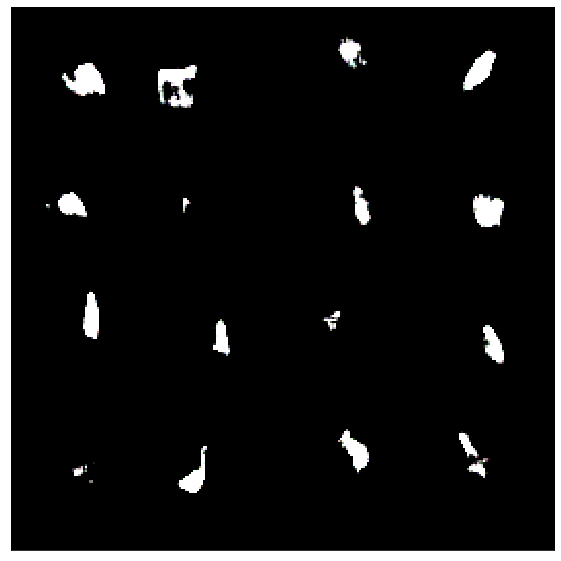

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


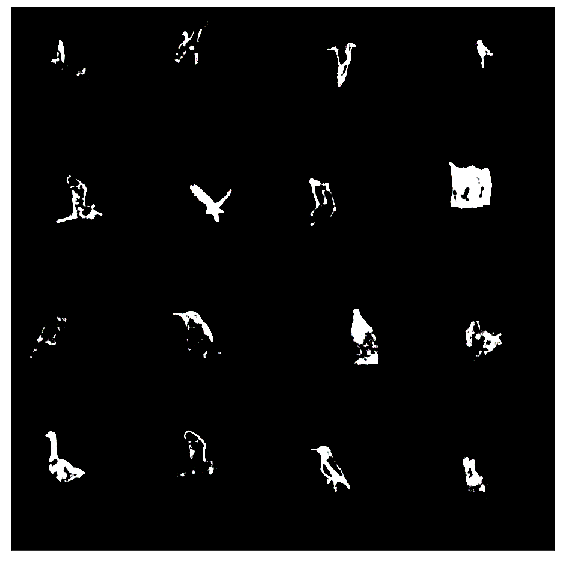

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 7


  0%|                                                                             | 1/17500 [00:13<66:39:02, 13.71s/it]

Train Epoch: 7 [0/280000 (0%)]	Loss: 0.054825
IOU : 0.0529937744140625
IOU : 0.0529937744140625


  0%|▏                                                                              | 53/17500 [00:16<55:40,  5.22it/s]

Train Epoch: 7 [200/280000 (0%)]	Loss: 0.040080
IOU : 0.0522613525390625


  1%|▍                                                                             | 101/17500 [00:19<19:54, 14.57it/s]

Train Epoch: 7 [400/280000 (1%)]	Loss: 0.048957
IOU : 0.05767822265625
IOU : 0.05767822265625


  1%|▋                                                                             | 152/17500 [00:22<15:19, 18.86it/s]

Train Epoch: 7 [600/280000 (1%)]	Loss: 0.025783
IOU : 0.048004150390625


  1%|▉                                                                             | 201/17500 [00:25<18:19, 15.73it/s]

Train Epoch: 7 [800/280000 (1%)]	Loss: 0.042792
IOU : 0.048553466796875
IOU : 0.048553466796875


  1%|█                                                                             | 252/17500 [00:28<17:23, 16.53it/s]

Train Epoch: 7 [1000/280000 (1%)]	Loss: 0.034908
IOU : 0.0480804443359375


  2%|█▎                                                                            | 303/17500 [00:31<17:40, 16.21it/s]

Train Epoch: 7 [1200/280000 (2%)]	Loss: 0.036019
IOU : 0.0521392822265625
IOU : 0.0521392822265625


  2%|█▌                                                                            | 351/17500 [00:34<17:31, 16.30it/s]

Train Epoch: 7 [1400/280000 (2%)]	Loss: 0.042002
IOU : 0.051666259765625


  2%|█▊                                                                            | 404/17500 [00:37<16:28, 17.29it/s]

Train Epoch: 7 [1600/280000 (2%)]	Loss: 0.026963
IOU : 0.0525054931640625
IOU : 0.0525054931640625


  3%|██                                                                            | 453/17500 [00:40<17:17, 16.43it/s]

Train Epoch: 7 [1800/280000 (3%)]	Loss: 0.039350
IOU : 0.05364990234375


  3%|██▏                                                                           | 502/17500 [00:43<20:31, 13.81it/s]

Train Epoch: 7 [2000/280000 (3%)]	Loss: 0.044556
IOU : 0.0523681640625
IOU : 0.0523681640625


  3%|██▍                                                                           | 550/17500 [00:46<17:41, 15.97it/s]

Train Epoch: 7 [2200/280000 (3%)]	Loss: 0.048223
IOU : 0.0565338134765625


  3%|██▋                                                                           | 602/17500 [00:50<17:29, 16.09it/s]

Train Epoch: 7 [2400/280000 (3%)]	Loss: 0.050537
IOU : 0.0590057373046875
IOU : 0.0590057373046875


  4%|██▉                                                                           | 650/17500 [00:53<18:20, 15.31it/s]

Train Epoch: 7 [2600/280000 (4%)]	Loss: 0.038354
IOU : 0.050323486328125


  4%|███▏                                                                          | 702/17500 [00:56<17:26, 16.05it/s]

Train Epoch: 7 [2800/280000 (4%)]	Loss: 0.046471
IOU : 0.060546875
IOU : 0.060546875


  4%|███▎                                                                          | 750/17500 [00:59<17:33, 15.89it/s]

Train Epoch: 7 [3000/280000 (4%)]	Loss: 0.039061
IOU : 0.054443359375


  5%|███▌                                                                          | 803/17500 [01:02<16:20, 17.02it/s]

Train Epoch: 7 [3200/280000 (5%)]	Loss: 0.026332
IOU : 0.0439605712890625
IOU : 0.0439605712890625


  5%|███▊                                                                          | 850/17500 [01:05<16:30, 16.81it/s]

Train Epoch: 7 [3400/280000 (5%)]	Loss: 0.028259
IOU : 0.0491943359375


  5%|████                                                                          | 902/17500 [01:08<16:31, 16.73it/s]

Train Epoch: 7 [3600/280000 (5%)]	Loss: 0.030538
IOU : 0.05145263671875
IOU : 0.05145263671875


  5%|████▎                                                                         | 954/17500 [01:11<16:28, 16.73it/s]

Train Epoch: 7 [3800/280000 (5%)]	Loss: 0.034734
IOU : 0.0530242919921875


  6%|████▍                                                                        | 1003/17500 [01:14<16:31, 16.64it/s]

Train Epoch: 7 [4000/280000 (6%)]	Loss: 0.033618
IOU : 0.055206298828125
IOU : 0.055206298828125


  6%|████▌                                                                        | 1051/17500 [01:17<17:29, 15.68it/s]

Train Epoch: 7 [4200/280000 (6%)]	Loss: 0.035555
IOU : 0.05096435546875


  6%|████▊                                                                        | 1102/17500 [01:20<20:44, 13.17it/s]

Train Epoch: 7 [4400/280000 (6%)]	Loss: 0.033254
IOU : 0.0468597412109375
IOU : 0.0468597412109375


  7%|█████                                                                        | 1151/17500 [01:23<18:47, 14.50it/s]

Train Epoch: 7 [4600/280000 (7%)]	Loss: 0.028274
IOU : 0.050201416015625


  7%|█████▎                                                                       | 1202/17500 [01:26<16:46, 16.20it/s]

Train Epoch: 7 [4800/280000 (7%)]	Loss: 0.047969
IOU : 0.0611419677734375
IOU : 0.0611419677734375


  7%|█████▌                                                                       | 1254/17500 [01:30<16:48, 16.10it/s]

Train Epoch: 7 [5000/280000 (7%)]	Loss: 0.051148
IOU : 0.0582122802734375


  7%|█████▋                                                                       | 1302/17500 [01:33<15:25, 17.51it/s]

Train Epoch: 7 [5200/280000 (7%)]	Loss: 0.046795
IOU : 0.0506744384765625
IOU : 0.0506744384765625


  8%|█████▉                                                                       | 1350/17500 [01:36<18:03, 14.91it/s]

Train Epoch: 7 [5400/280000 (8%)]	Loss: 0.028113
IOU : 0.0529327392578125


  8%|██████▏                                                                      | 1403/17500 [01:39<17:34, 15.26it/s]

Train Epoch: 7 [5600/280000 (8%)]	Loss: 0.049994
IOU : 0.05584716796875
IOU : 0.05584716796875


  8%|██████▍                                                                      | 1454/17500 [01:42<16:35, 16.12it/s]

Train Epoch: 7 [5800/280000 (8%)]	Loss: 0.043180
IOU : 0.0495758056640625


  9%|██████▌                                                                      | 1502/17500 [01:45<16:03, 16.61it/s]

Train Epoch: 7 [6000/280000 (9%)]	Loss: 0.033634
IOU : 0.05096435546875
IOU : 0.05096435546875


  9%|██████▊                                                                      | 1552/17500 [01:48<15:21, 17.31it/s]

Train Epoch: 7 [6200/280000 (9%)]	Loss: 0.053966
IOU : 0.05078125


  9%|███████                                                                      | 1601/17500 [01:51<16:31, 16.04it/s]

Train Epoch: 7 [6400/280000 (9%)]	Loss: 0.035880
IOU : 0.0467529296875
IOU : 0.0467529296875


  9%|███████▎                                                                     | 1653/17500 [01:54<15:58, 16.53it/s]

Train Epoch: 7 [6600/280000 (9%)]	Loss: 0.034697
IOU : 0.0496826171875


 10%|███████▍                                                                     | 1701/17500 [01:57<16:44, 15.73it/s]

Train Epoch: 7 [6800/280000 (10%)]	Loss: 0.031303
IOU : 0.050262451171875
IOU : 0.050262451171875


 10%|███████▋                                                                     | 1753/17500 [02:01<16:52, 15.55it/s]

Train Epoch: 7 [7000/280000 (10%)]	Loss: 0.032108
IOU : 0.0503997802734375


 10%|███████▉                                                                     | 1803/17500 [02:04<16:23, 15.96it/s]

Train Epoch: 7 [7200/280000 (10%)]	Loss: 0.043609
IOU : 0.0615386962890625
IOU : 0.0615386962890625


 11%|████████▏                                                                    | 1853/17500 [02:07<17:04, 15.27it/s]

Train Epoch: 7 [7400/280000 (11%)]	Loss: 0.031510
IOU : 0.0576324462890625


 11%|████████▎                                                                    | 1900/17500 [02:10<17:03, 15.25it/s]

Train Epoch: 7 [7600/280000 (11%)]	Loss: 0.038018
IOU : 0.0600128173828125
IOU : 0.0600128173828125


 11%|████████▌                                                                    | 1951/17500 [02:13<15:16, 16.97it/s]

Train Epoch: 7 [7800/280000 (11%)]	Loss: 0.047586
IOU : 0.0636138916015625


 11%|████████▊                                                                    | 2003/17500 [02:16<14:12, 18.18it/s]

Train Epoch: 7 [8000/280000 (11%)]	Loss: 0.034110
IOU : 0.044891357421875
IOU : 0.044891357421875


 12%|█████████                                                                    | 2052/17500 [02:19<15:34, 16.53it/s]

Train Epoch: 7 [8200/280000 (12%)]	Loss: 0.028256
IOU : 0.047119140625


 12%|█████████▎                                                                   | 2103/17500 [02:23<14:22, 17.86it/s]

Train Epoch: 7 [8400/280000 (12%)]	Loss: 0.036683
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 12%|█████████▍                                                                   | 2152/17500 [02:26<16:31, 15.48it/s]

Train Epoch: 7 [8600/280000 (12%)]	Loss: 0.049725
IOU : 0.0574798583984375


 13%|█████████▋                                                                   | 2200/17500 [02:29<17:26, 14.62it/s]

Train Epoch: 7 [8800/280000 (13%)]	Loss: 0.040544
IOU : 0.06121826171875
IOU : 0.06121826171875


 13%|█████████▉                                                                   | 2252/17500 [02:32<15:53, 15.99it/s]

Train Epoch: 7 [9000/280000 (13%)]	Loss: 0.032417
IOU : 0.0497589111328125


 13%|██████████                                                                   | 2300/17500 [02:35<16:23, 15.45it/s]

Train Epoch: 7 [9200/280000 (13%)]	Loss: 0.044956
IOU : 0.053466796875
IOU : 0.053466796875


 13%|██████████▎                                                                  | 2348/17500 [02:38<16:05, 15.69it/s]

Train Epoch: 7 [9400/280000 (13%)]	Loss: 0.037486
IOU : 0.0536041259765625


 14%|██████████▌                                                                  | 2404/17500 [02:41<16:42, 15.05it/s]

Train Epoch: 7 [9600/280000 (14%)]	Loss: 0.039153
IOU : 0.0557708740234375
IOU : 0.0557708740234375


 14%|██████████▊                                                                  | 2452/17500 [02:44<14:40, 17.09it/s]

Train Epoch: 7 [9800/280000 (14%)]	Loss: 0.040067
IOU : 0.0576629638671875


 14%|███████████                                                                  | 2504/17500 [02:48<14:50, 16.85it/s]

Train Epoch: 7 [10000/280000 (14%)]	Loss: 0.048037
IOU : 0.05401611328125
IOU : 0.05401611328125


 15%|███████████▏                                                                 | 2549/17500 [02:51<17:43, 14.06it/s]

Train Epoch: 7 [10200/280000 (15%)]	Loss: 0.049819
IOU : 0.0641937255859375


 15%|███████████▍                                                                 | 2601/17500 [02:54<15:47, 15.72it/s]

Train Epoch: 7 [10400/280000 (15%)]	Loss: 0.038396
IOU : 0.05780029296875
IOU : 0.05780029296875


 15%|███████████▋                                                                 | 2649/17500 [02:57<15:00, 16.49it/s]

Train Epoch: 7 [10600/280000 (15%)]	Loss: 0.036469
IOU : 0.051666259765625


 15%|███████████▉                                                                 | 2701/17500 [03:00<15:42, 15.70it/s]

Train Epoch: 7 [10800/280000 (15%)]	Loss: 0.052838
IOU : 0.05902099609375
IOU : 0.05902099609375


 16%|████████████                                                                 | 2749/17500 [03:03<15:31, 15.84it/s]

Train Epoch: 7 [11000/280000 (16%)]	Loss: 0.067204
IOU : 0.0582733154296875


 16%|████████████▎                                                                | 2801/17500 [03:07<15:59, 15.31it/s]

Train Epoch: 7 [11200/280000 (16%)]	Loss: 0.028636
IOU : 0.050537109375
IOU : 0.050537109375


 16%|████████████▌                                                                | 2849/17500 [03:10<15:11, 16.08it/s]

Train Epoch: 7 [11400/280000 (16%)]	Loss: 0.037300
IOU : 0.0515594482421875


 17%|████████████▊                                                                | 2901/17500 [03:13<15:52, 15.33it/s]

Train Epoch: 7 [11600/280000 (17%)]	Loss: 0.044890
IOU : 0.068115234375
IOU : 0.068115234375


 17%|████████████▉                                                                | 2949/17500 [03:16<15:30, 15.63it/s]

Train Epoch: 7 [11800/280000 (17%)]	Loss: 0.053667
IOU : 0.0548858642578125


 17%|█████████████▏                                                               | 3001/17500 [03:19<15:06, 16.00it/s]

Train Epoch: 7 [12000/280000 (17%)]	Loss: 0.029890
IOU : 0.049041748046875
IOU : 0.049041748046875


 17%|█████████████▍                                                               | 3049/17500 [03:22<14:43, 16.37it/s]

Train Epoch: 7 [12200/280000 (17%)]	Loss: 0.032072
IOU : 0.0526580810546875


 18%|█████████████▋                                                               | 3102/17500 [03:26<16:10, 14.84it/s]

Train Epoch: 7 [12400/280000 (18%)]	Loss: 0.034909
IOU : 0.051727294921875
IOU : 0.051727294921875


 18%|█████████████▊                                                               | 3153/17500 [03:29<15:05, 15.85it/s]

Train Epoch: 7 [12600/280000 (18%)]	Loss: 0.040422
IOU : 0.059783935546875


 18%|██████████████                                                               | 3201/17500 [03:32<15:23, 15.48it/s]

Train Epoch: 7 [12800/280000 (18%)]	Loss: 0.037320
IOU : 0.053802490234375
IOU : 0.053802490234375


 19%|██████████████▎                                                              | 3253/17500 [03:35<13:58, 17.00it/s]

Train Epoch: 7 [13000/280000 (19%)]	Loss: 0.043807
IOU : 0.04791259765625


 19%|██████████████▌                                                              | 3301/17500 [03:38<14:36, 16.19it/s]

Train Epoch: 7 [13200/280000 (19%)]	Loss: 0.040516
IOU : 0.052978515625
IOU : 0.052978515625


 19%|██████████████▋                                                              | 3349/17500 [03:41<14:10, 16.63it/s]

Train Epoch: 7 [13400/280000 (19%)]	Loss: 0.042802
IOU : 0.051116943359375


 19%|██████████████▉                                                              | 3401/17500 [03:44<14:43, 15.95it/s]

Train Epoch: 7 [13600/280000 (19%)]	Loss: 0.044805
IOU : 0.057037353515625
IOU : 0.057037353515625


 20%|███████████████▏                                                             | 3450/17500 [03:47<14:57, 15.65it/s]

Train Epoch: 7 [13800/280000 (20%)]	Loss: 0.039758
IOU : 0.0507049560546875


 20%|███████████████▍                                                             | 3501/17500 [03:50<15:00, 15.55it/s]

Train Epoch: 7 [14000/280000 (20%)]	Loss: 0.050725
IOU : 0.057586669921875
IOU : 0.057586669921875


 20%|███████████████▋                                                             | 3553/17500 [03:54<14:27, 16.07it/s]

Train Epoch: 7 [14200/280000 (20%)]	Loss: 0.025702
IOU : 0.0418548583984375


 21%|███████████████▊                                                             | 3601/17500 [03:57<14:30, 15.96it/s]

Train Epoch: 7 [14400/280000 (21%)]	Loss: 0.037172
IOU : 0.055450439453125
IOU : 0.055450439453125


 21%|████████████████                                                             | 3649/17500 [04:00<14:13, 16.24it/s]

Train Epoch: 7 [14600/280000 (21%)]	Loss: 0.032844
IOU : 0.0572509765625


 21%|████████████████▎                                                            | 3704/17500 [04:03<14:17, 16.08it/s]

Train Epoch: 7 [14800/280000 (21%)]	Loss: 0.030134
IOU : 0.0534515380859375
IOU : 0.0534515380859375


 21%|████████████████▌                                                            | 3752/17500 [04:06<13:18, 17.23it/s]

Train Epoch: 7 [15000/280000 (21%)]	Loss: 0.038765
IOU : 0.0565643310546875


 22%|████████████████▋                                                            | 3804/17500 [04:09<13:35, 16.80it/s]

Train Epoch: 7 [15200/280000 (22%)]	Loss: 0.025661
IOU : 0.0431976318359375
IOU : 0.0431976318359375


 22%|████████████████▉                                                            | 3853/17500 [04:12<15:38, 14.54it/s]

Train Epoch: 7 [15400/280000 (22%)]	Loss: 0.045123
IOU : 0.052093505859375


 22%|█████████████████▏                                                           | 3903/17500 [04:15<14:09, 16.01it/s]

Train Epoch: 7 [15600/280000 (22%)]	Loss: 0.032457
IOU : 0.0534820556640625
IOU : 0.0534820556640625


 23%|█████████████████▍                                                           | 3952/17500 [04:18<15:13, 14.83it/s]

Train Epoch: 7 [15800/280000 (23%)]	Loss: 0.033611
IOU : 0.0496063232421875


 23%|█████████████████▌                                                           | 4004/17500 [04:22<14:44, 15.25it/s]

Train Epoch: 7 [16000/280000 (23%)]	Loss: 0.030880
IOU : 0.0509796142578125
IOU : 0.0509796142578125


 23%|█████████████████▊                                                           | 4052/17500 [04:25<15:15, 14.69it/s]

Train Epoch: 7 [16200/280000 (23%)]	Loss: 0.029519
IOU : 0.04248046875


 23%|██████████████████                                                           | 4101/17500 [04:28<16:33, 13.49it/s]

Train Epoch: 7 [16400/280000 (23%)]	Loss: 0.033467
IOU : 0.0499114990234375
IOU : 0.0499114990234375


 24%|██████████████████▎                                                          | 4152/17500 [04:31<13:12, 16.85it/s]

Train Epoch: 7 [16600/280000 (24%)]	Loss: 0.034739
IOU : 0.053466796875


 24%|██████████████████▍                                                          | 4201/17500 [04:34<14:45, 15.02it/s]

Train Epoch: 7 [16800/280000 (24%)]	Loss: 0.034437
IOU : 0.058990478515625
IOU : 0.058990478515625


 24%|██████████████████▋                                                          | 4249/17500 [04:38<14:09, 15.60it/s]

Train Epoch: 7 [17000/280000 (24%)]	Loss: 0.032811
IOU : 0.049835205078125


 25%|██████████████████▉                                                          | 4301/17500 [04:41<13:47, 15.96it/s]

Train Epoch: 7 [17200/280000 (25%)]	Loss: 0.036474
IOU : 0.05047607421875
IOU : 0.05047607421875


 25%|███████████████████▏                                                         | 4349/17500 [04:44<16:34, 13.22it/s]

Train Epoch: 7 [17400/280000 (25%)]	Loss: 0.034685
IOU : 0.0560455322265625


 25%|███████████████████▎                                                         | 4401/17500 [04:47<14:49, 14.73it/s]

Train Epoch: 7 [17600/280000 (25%)]	Loss: 0.041518
IOU : 0.0573272705078125
IOU : 0.0573272705078125


 25%|███████████████████▌                                                         | 4449/17500 [04:50<14:39, 14.83it/s]

Train Epoch: 7 [17800/280000 (25%)]	Loss: 0.036858
IOU : 0.049774169921875


 26%|███████████████████▊                                                         | 4504/17500 [04:54<12:03, 17.95it/s]

Train Epoch: 7 [18000/280000 (26%)]	Loss: 0.040005
IOU : 0.056671142578125
IOU : 0.056671142578125


 26%|████████████████████                                                         | 4549/17500 [04:56<13:26, 16.06it/s]

Train Epoch: 7 [18200/280000 (26%)]	Loss: 0.036362
IOU : 0.053955078125


 26%|████████████████████▏                                                        | 4601/17500 [05:00<13:06, 16.40it/s]

Train Epoch: 7 [18400/280000 (26%)]	Loss: 0.043591
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 27%|████████████████████▍                                                        | 4649/17500 [05:03<14:05, 15.20it/s]

Train Epoch: 7 [18600/280000 (27%)]	Loss: 0.049769
IOU : 0.0621795654296875


 27%|████████████████████▋                                                        | 4703/17500 [05:06<14:07, 15.11it/s]

Train Epoch: 7 [18800/280000 (27%)]	Loss: 0.046612
IOU : 0.0510406494140625
IOU : 0.0510406494140625


 27%|████████████████████▉                                                        | 4752/17500 [05:09<12:10, 17.44it/s]

Train Epoch: 7 [19000/280000 (27%)]	Loss: 0.041143
IOU : 0.0564422607421875


 27%|█████████████████████▏                                                       | 4803/17500 [05:12<13:10, 16.06it/s]

Train Epoch: 7 [19200/280000 (27%)]	Loss: 0.040664
IOU : 0.0531768798828125
IOU : 0.0531768798828125


 28%|█████████████████████▎                                                       | 4850/17500 [05:15<14:26, 14.59it/s]

Train Epoch: 7 [19400/280000 (28%)]	Loss: 0.037911
IOU : 0.050933837890625


 28%|█████████████████████▌                                                       | 4902/17500 [05:19<14:02, 14.96it/s]

Train Epoch: 7 [19600/280000 (28%)]	Loss: 0.032947
IOU : 0.059295654296875
IOU : 0.059295654296875


 28%|█████████████████████▊                                                       | 4952/17500 [05:22<12:19, 16.97it/s]

Train Epoch: 7 [19800/280000 (28%)]	Loss: 0.050556
IOU : 0.0607452392578125


 29%|██████████████████████                                                       | 5001/17500 [05:25<12:53, 16.15it/s]

Train Epoch: 7 [20000/280000 (29%)]	Loss: 0.029650
IOU : 0.0499725341796875
IOU : 0.0499725341796875


 29%|██████████████████████▏                                                      | 5049/17500 [05:28<13:00, 15.95it/s]

Train Epoch: 7 [20200/280000 (29%)]	Loss: 0.037494
IOU : 0.0544891357421875


 29%|██████████████████████▍                                                      | 5104/17500 [05:31<12:32, 16.47it/s]

Train Epoch: 7 [20400/280000 (29%)]	Loss: 0.060863
IOU : 0.0574798583984375
IOU : 0.0574798583984375


 29%|██████████████████████▋                                                      | 5153/17500 [05:34<12:45, 16.13it/s]

Train Epoch: 7 [20600/280000 (29%)]	Loss: 0.031463
IOU : 0.051788330078125


 30%|██████████████████████▉                                                      | 5202/17500 [05:37<12:56, 15.83it/s]

Train Epoch: 7 [20800/280000 (30%)]	Loss: 0.029772
IOU : 0.0461883544921875
IOU : 0.0461883544921875


 30%|███████████████████████                                                      | 5253/17500 [05:41<12:24, 16.46it/s]

Train Epoch: 7 [21000/280000 (30%)]	Loss: 0.032229
IOU : 0.0519256591796875


 30%|███████████████████████▎                                                     | 5299/17500 [05:44<13:39, 14.88it/s]

Train Epoch: 7 [21200/280000 (30%)]	Loss: 0.037648
IOU : 0.051361083984375
IOU : 0.051361083984375


 31%|███████████████████████▌                                                     | 5350/17500 [05:47<12:56, 15.65it/s]

Train Epoch: 7 [21400/280000 (31%)]	Loss: 0.044971
IOU : 0.052032470703125


 31%|███████████████████████▊                                                     | 5398/17500 [05:50<12:59, 15.53it/s]

Train Epoch: 7 [21600/280000 (31%)]	Loss: 0.035588
IOU : 0.0500335693359375
IOU : 0.0500335693359375


 31%|███████████████████████▉                                                     | 5453/17500 [05:54<14:36, 13.75it/s]

Train Epoch: 7 [21800/280000 (31%)]	Loss: 0.033453
IOU : 0.04949951171875


 31%|████████████████████████▏                                                    | 5501/17500 [05:58<18:39, 10.72it/s]

Train Epoch: 7 [22000/280000 (31%)]	Loss: 0.057350
IOU : 0.056610107421875
IOU : 0.056610107421875


 32%|████████████████████████▍                                                    | 5552/17500 [06:02<17:32, 11.35it/s]

Train Epoch: 7 [22200/280000 (32%)]	Loss: 0.040277
IOU : 0.0547637939453125


 32%|████████████████████████▋                                                    | 5604/17500 [06:07<13:16, 14.93it/s]

Train Epoch: 7 [22400/280000 (32%)]	Loss: 0.029954
IOU : 0.0543975830078125
IOU : 0.0543975830078125


 32%|████████████████████████▊                                                    | 5653/17500 [06:10<13:50, 14.27it/s]

Train Epoch: 7 [22600/280000 (32%)]	Loss: 0.034559
IOU : 0.05010986328125


 33%|█████████████████████████                                                    | 5703/17500 [06:14<13:53, 14.15it/s]

Train Epoch: 7 [22800/280000 (33%)]	Loss: 0.058363
IOU : 0.05902099609375
IOU : 0.05902099609375


 33%|█████████████████████████▎                                                   | 5753/17500 [06:18<14:01, 13.96it/s]

Train Epoch: 7 [23000/280000 (33%)]	Loss: 0.034653
IOU : 0.0452117919921875


 33%|█████████████████████████▌                                                   | 5801/17500 [06:21<14:50, 13.13it/s]

Train Epoch: 7 [23200/280000 (33%)]	Loss: 0.032287
IOU : 0.0421295166015625
IOU : 0.0421295166015625


 33%|█████████████████████████▋                                                   | 5849/17500 [06:25<16:00, 12.13it/s]

Train Epoch: 7 [23400/280000 (33%)]	Loss: 0.052634
IOU : 0.0541534423828125


 34%|█████████████████████████▉                                                   | 5901/17500 [06:29<13:39, 14.15it/s]

Train Epoch: 7 [23600/280000 (34%)]	Loss: 0.035279
IOU : 0.059844970703125
IOU : 0.059844970703125


 34%|██████████████████████████▏                                                  | 5952/17500 [06:32<15:26, 12.47it/s]

Train Epoch: 7 [23800/280000 (34%)]	Loss: 0.036137
IOU : 0.0587158203125


 34%|██████████████████████████▍                                                  | 6002/17500 [06:36<14:33, 13.16it/s]

Train Epoch: 7 [24000/280000 (34%)]	Loss: 0.040658
IOU : 0.0492401123046875
IOU : 0.0492401123046875


 35%|██████████████████████████▌                                                  | 6050/17500 [06:39<14:52, 12.83it/s]

Train Epoch: 7 [24200/280000 (35%)]	Loss: 0.048973
IOU : 0.059112548828125


 35%|██████████████████████████▊                                                  | 6102/17500 [06:43<13:53, 13.68it/s]

Train Epoch: 7 [24400/280000 (35%)]	Loss: 0.059324
IOU : 0.0496978759765625
IOU : 0.0496978759765625


 35%|███████████████████████████                                                  | 6152/17500 [06:47<14:41, 12.87it/s]

Train Epoch: 7 [24600/280000 (35%)]	Loss: 0.042967
IOU : 0.0495758056640625


 35%|███████████████████████████▎                                                 | 6202/17500 [06:50<12:38, 14.90it/s]

Train Epoch: 7 [24800/280000 (35%)]	Loss: 0.029965
IOU : 0.04833984375
IOU : 0.04833984375


 36%|███████████████████████████▌                                                 | 6252/17500 [06:54<11:25, 16.40it/s]

Train Epoch: 7 [25000/280000 (36%)]	Loss: 0.034458
IOU : 0.0615081787109375


 36%|███████████████████████████▋                                                 | 6300/17500 [06:56<11:14, 16.61it/s]

Train Epoch: 7 [25200/280000 (36%)]	Loss: 0.049588
IOU : 0.0545654296875
IOU : 0.0545654296875


 36%|███████████████████████████▉                                                 | 6352/17500 [07:00<11:37, 15.98it/s]

Train Epoch: 7 [25400/280000 (36%)]	Loss: 0.036122
IOU : 0.0538177490234375


 37%|████████████████████████████▏                                                | 6403/17500 [07:03<10:33, 17.53it/s]

Train Epoch: 7 [25600/280000 (37%)]	Loss: 0.026801
IOU : 0.043853759765625
IOU : 0.043853759765625


 37%|████████████████████████████▍                                                | 6451/17500 [07:06<10:15, 17.96it/s]

Train Epoch: 7 [25800/280000 (37%)]	Loss: 0.046418
IOU : 0.05426025390625


 37%|████████████████████████████▌                                                | 6502/17500 [07:09<11:57, 15.33it/s]

Train Epoch: 7 [26000/280000 (37%)]	Loss: 0.041021
IOU : 0.0579833984375
IOU : 0.0579833984375


 37%|████████████████████████████▊                                                | 6552/17500 [07:12<12:11, 14.96it/s]

Train Epoch: 7 [26200/280000 (37%)]	Loss: 0.033658
IOU : 0.057586669921875


 38%|█████████████████████████████                                                | 6600/17500 [07:15<11:44, 15.48it/s]

Train Epoch: 7 [26400/280000 (38%)]	Loss: 0.029938
IOU : 0.05352783203125
IOU : 0.05352783203125


 38%|█████████████████████████████▎                                               | 6652/17500 [07:18<11:33, 15.64it/s]

Train Epoch: 7 [26600/280000 (38%)]	Loss: 0.036133
IOU : 0.0463104248046875


 38%|█████████████████████████████▍                                               | 6700/17500 [07:21<10:42, 16.81it/s]

Train Epoch: 7 [26800/280000 (38%)]	Loss: 0.037883
IOU : 0.05035400390625
IOU : 0.05035400390625


 39%|█████████████████████████████▋                                               | 6748/17500 [07:24<10:46, 16.63it/s]

Train Epoch: 7 [27000/280000 (39%)]	Loss: 0.052423
IOU : 0.055206298828125


 39%|█████████████████████████████▉                                               | 6800/17500 [07:27<10:42, 16.65it/s]

Train Epoch: 7 [27200/280000 (39%)]	Loss: 0.036292
IOU : 0.045135498046875
IOU : 0.045135498046875


 39%|██████████████████████████████▏                                              | 6848/17500 [07:30<10:46, 16.47it/s]

Train Epoch: 7 [27400/280000 (39%)]	Loss: 0.034116
IOU : 0.057220458984375


 39%|██████████████████████████████▎                                              | 6900/17500 [07:34<10:15, 17.23it/s]

Train Epoch: 7 [27600/280000 (39%)]	Loss: 0.044159
IOU : 0.0572662353515625
IOU : 0.0572662353515625


 40%|██████████████████████████████▌                                              | 6952/17500 [07:37<10:24, 16.89it/s]

Train Epoch: 7 [27800/280000 (40%)]	Loss: 0.030650
IOU : 0.05133056640625


 40%|██████████████████████████████▊                                              | 7004/17500 [07:40<11:24, 15.34it/s]

Train Epoch: 7 [28000/280000 (40%)]	Loss: 0.027682
IOU : 0.0479736328125
IOU : 0.0479736328125


 40%|███████████████████████████████                                              | 7053/17500 [07:43<11:44, 14.83it/s]

Train Epoch: 7 [28200/280000 (40%)]	Loss: 0.048977
IOU : 0.05072021484375


 41%|███████████████████████████████▎                                             | 7104/17500 [07:46<11:10, 15.51it/s]

Train Epoch: 7 [28400/280000 (41%)]	Loss: 0.035181
IOU : 0.046630859375
IOU : 0.046630859375


 41%|███████████████████████████████▍                                             | 7152/17500 [07:49<10:49, 15.93it/s]

Train Epoch: 7 [28600/280000 (41%)]	Loss: 0.041043
IOU : 0.0620880126953125


 41%|███████████████████████████████▋                                             | 7203/17500 [07:52<10:26, 16.43it/s]

Train Epoch: 7 [28800/280000 (41%)]	Loss: 0.051947
IOU : 0.0548553466796875
IOU : 0.0548553466796875


 41%|███████████████████████████████▉                                             | 7249/17500 [07:55<11:33, 14.78it/s]

Train Epoch: 7 [29000/280000 (41%)]	Loss: 0.045918
IOU : 0.0557098388671875


 42%|████████████████████████████████                                             | 7301/17500 [07:58<11:35, 14.67it/s]

Train Epoch: 7 [29200/280000 (42%)]	Loss: 0.037537
IOU : 0.055389404296875
IOU : 0.055389404296875


 42%|████████████████████████████████▎                                            | 7352/17500 [08:01<10:18, 16.41it/s]

Train Epoch: 7 [29400/280000 (42%)]	Loss: 0.029757
IOU : 0.0477752685546875


 42%|████████████████████████████████▌                                            | 7404/17500 [08:04<10:03, 16.74it/s]

Train Epoch: 7 [29600/280000 (42%)]	Loss: 0.044997
IOU : 0.04974365234375
IOU : 0.04974365234375


 43%|████████████████████████████████▊                                            | 7452/17500 [08:07<10:36, 15.78it/s]

Train Epoch: 7 [29800/280000 (43%)]	Loss: 0.033612
IOU : 0.0509490966796875


 43%|█████████████████████████████████                                            | 7501/17500 [08:11<10:54, 15.27it/s]

Train Epoch: 7 [30000/280000 (43%)]	Loss: 0.032232
IOU : 0.048431396484375
IOU : 0.048431396484375


 43%|█████████████████████████████████▏                                           | 7549/17500 [08:14<09:55, 16.70it/s]

Train Epoch: 7 [30200/280000 (43%)]	Loss: 0.036597
IOU : 0.059173583984375


 43%|█████████████████████████████████▍                                           | 7601/17500 [08:17<10:13, 16.15it/s]

Train Epoch: 7 [30400/280000 (43%)]	Loss: 0.030961
IOU : 0.049560546875
IOU : 0.049560546875


 44%|█████████████████████████████████▋                                           | 7649/17500 [08:20<10:06, 16.25it/s]

Train Epoch: 7 [30600/280000 (44%)]	Loss: 0.038677
IOU : 0.05145263671875


 44%|█████████████████████████████████▉                                           | 7701/17500 [08:23<10:23, 15.71it/s]

Train Epoch: 7 [30800/280000 (44%)]	Loss: 0.034752
IOU : 0.0602874755859375
IOU : 0.0602874755859375


 44%|██████████████████████████████████                                           | 7749/17500 [08:26<09:32, 17.03it/s]

Train Epoch: 7 [31000/280000 (44%)]	Loss: 0.035334
IOU : 0.05145263671875


 45%|██████████████████████████████████▎                                          | 7801/17500 [08:29<10:52, 14.87it/s]

Train Epoch: 7 [31200/280000 (45%)]	Loss: 0.047649
IOU : 0.050140380859375
IOU : 0.050140380859375


 45%|██████████████████████████████████▌                                          | 7849/17500 [08:32<10:08, 15.86it/s]

Train Epoch: 7 [31400/280000 (45%)]	Loss: 0.056861
IOU : 0.058837890625


 45%|██████████████████████████████████▊                                          | 7901/17500 [08:35<09:55, 16.12it/s]

Train Epoch: 7 [31600/280000 (45%)]	Loss: 0.041190
IOU : 0.049407958984375
IOU : 0.049407958984375


 45%|██████████████████████████████████▉                                          | 7949/17500 [08:38<09:23, 16.94it/s]

Train Epoch: 7 [31800/280000 (45%)]	Loss: 0.033801
IOU : 0.049835205078125


 46%|███████████████████████████████████▏                                         | 8001/17500 [08:42<09:47, 16.17it/s]

Train Epoch: 7 [32000/280000 (46%)]	Loss: 0.028685
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 46%|███████████████████████████████████▍                                         | 8053/17500 [08:45<09:35, 16.43it/s]

Train Epoch: 7 [32200/280000 (46%)]	Loss: 0.038250
IOU : 0.053558349609375


 46%|███████████████████████████████████▋                                         | 8101/17500 [08:48<09:40, 16.19it/s]

Train Epoch: 7 [32400/280000 (46%)]	Loss: 0.036340
IOU : 0.0493316650390625
IOU : 0.0493316650390625


 47%|███████████████████████████████████▊                                         | 8149/17500 [08:51<09:28, 16.44it/s]

Train Epoch: 7 [32600/280000 (47%)]	Loss: 0.055440
IOU : 0.0565338134765625


 47%|████████████████████████████████████                                         | 8201/17500 [08:54<09:27, 16.40it/s]

Train Epoch: 7 [32800/280000 (47%)]	Loss: 0.048733
IOU : 0.0601959228515625
IOU : 0.0601959228515625


 47%|████████████████████████████████████▎                                        | 8249/17500 [08:57<09:43, 15.86it/s]

Train Epoch: 7 [33000/280000 (47%)]	Loss: 0.049069
IOU : 0.054046630859375


 47%|████████████████████████████████████▌                                        | 8301/17500 [09:00<09:34, 16.00it/s]

Train Epoch: 7 [33200/280000 (47%)]	Loss: 0.033770
IOU : 0.05950927734375
IOU : 0.05950927734375


 48%|████████████████████████████████████▋                                        | 8349/17500 [09:03<09:19, 16.36it/s]

Train Epoch: 7 [33400/280000 (48%)]	Loss: 0.028154
IOU : 0.0464324951171875


 48%|████████████████████████████████████▉                                        | 8401/17500 [09:06<09:13, 16.43it/s]

Train Epoch: 7 [33600/280000 (48%)]	Loss: 0.034948
IOU : 0.0518646240234375
IOU : 0.0518646240234375


 48%|█████████████████████████████████████▏                                       | 8450/17500 [09:09<09:44, 15.47it/s]

Train Epoch: 7 [33800/280000 (48%)]	Loss: 0.028335
IOU : 0.054534912109375


 49%|█████████████████████████████████████▍                                       | 8503/17500 [09:12<08:45, 17.11it/s]

Train Epoch: 7 [34000/280000 (49%)]	Loss: 0.045525
IOU : 0.0556488037109375
IOU : 0.0556488037109375


 49%|█████████████████████████████████████▋                                       | 8552/17500 [09:15<09:34, 15.57it/s]

Train Epoch: 7 [34200/280000 (49%)]	Loss: 0.048136
IOU : 0.0595550537109375


 49%|█████████████████████████████████████▊                                       | 8600/17500 [09:19<09:24, 15.76it/s]

Train Epoch: 7 [34400/280000 (49%)]	Loss: 0.042003
IOU : 0.045013427734375
IOU : 0.045013427734375


 49%|██████████████████████████████████████                                       | 8651/17500 [09:22<08:17, 17.79it/s]

Train Epoch: 7 [34600/280000 (49%)]	Loss: 0.030405
IOU : 0.057647705078125


 50%|██████████████████████████████████████▎                                      | 8700/17500 [09:25<09:28, 15.48it/s]

Train Epoch: 7 [34800/280000 (50%)]	Loss: 0.029743
IOU : 0.0514373779296875
IOU : 0.0514373779296875


 50%|██████████████████████████████████████▌                                      | 8750/17500 [09:28<09:59, 14.59it/s]

Train Epoch: 7 [35000/280000 (50%)]	Loss: 0.033109
IOU : 0.051239013671875


 50%|██████████████████████████████████████▋                                      | 8803/17500 [09:31<10:16, 14.11it/s]

Train Epoch: 7 [35200/280000 (50%)]	Loss: 0.023577
IOU : 0.040435791015625
IOU : 0.040435791015625


 51%|██████████████████████████████████████▉                                      | 8853/17500 [09:34<08:37, 16.70it/s]

Train Epoch: 7 [35400/280000 (51%)]	Loss: 0.053240
IOU : 0.063201904296875


 51%|███████████████████████████████████████▏                                     | 8903/17500 [09:38<09:12, 15.56it/s]

Train Epoch: 7 [35600/280000 (51%)]	Loss: 0.033099
IOU : 0.05169677734375
IOU : 0.05169677734375


 51%|███████████████████████████████████████▍                                     | 8953/17500 [09:41<09:07, 15.62it/s]

Train Epoch: 7 [35800/280000 (51%)]	Loss: 0.036881
IOU : 0.0539398193359375


 51%|███████████████████████████████████████▌                                     | 9002/17500 [09:44<08:44, 16.21it/s]

Train Epoch: 7 [36000/280000 (51%)]	Loss: 0.037432
IOU : 0.053466796875
IOU : 0.053466796875


 52%|███████████████████████████████████████▊                                     | 9050/17500 [09:47<08:39, 16.26it/s]

Train Epoch: 7 [36200/280000 (52%)]	Loss: 0.032795
IOU : 0.05621337890625


 52%|████████████████████████████████████████                                     | 9103/17500 [09:50<07:58, 17.55it/s]

Train Epoch: 7 [36400/280000 (52%)]	Loss: 0.044268
IOU : 0.054351806640625
IOU : 0.054351806640625


 52%|████████████████████████████████████████▎                                    | 9153/17500 [09:53<08:40, 16.04it/s]

Train Epoch: 7 [36600/280000 (52%)]	Loss: 0.025057
IOU : 0.050323486328125


 53%|████████████████████████████████████████▍                                    | 9201/17500 [09:56<08:29, 16.30it/s]

Train Epoch: 7 [36800/280000 (53%)]	Loss: 0.039905
IOU : 0.055084228515625
IOU : 0.055084228515625


 53%|████████████████████████████████████████▋                                    | 9249/17500 [09:59<08:16, 16.61it/s]

Train Epoch: 7 [37000/280000 (53%)]	Loss: 0.054662
IOU : 0.0549774169921875


 53%|████████████████████████████████████████▉                                    | 9303/17500 [10:02<08:07, 16.83it/s]

Train Epoch: 7 [37200/280000 (53%)]	Loss: 0.039526
IOU : 0.0577239990234375
IOU : 0.0577239990234375


 53%|█████████████████████████████████████████▏                                   | 9353/17500 [10:05<08:46, 15.47it/s]

Train Epoch: 7 [37400/280000 (53%)]	Loss: 0.038048
IOU : 0.0548248291015625


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [10:08<08:50, 15.27it/s]

Train Epoch: 7 [37600/280000 (54%)]	Loss: 0.044167
IOU : 0.0518035888671875
IOU : 0.0518035888671875


 54%|█████████████████████████████████████████▌                                   | 9449/17500 [10:11<08:19, 16.11it/s]

Train Epoch: 7 [37800/280000 (54%)]	Loss: 0.041694
IOU : 0.056610107421875


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [10:14<08:07, 16.41it/s]

Train Epoch: 7 [38000/280000 (54%)]	Loss: 0.033626
IOU : 0.0540618896484375
IOU : 0.0540618896484375


 55%|██████████████████████████████████████████                                   | 9549/17500 [10:17<08:03, 16.43it/s]

Train Epoch: 7 [38200/280000 (55%)]	Loss: 0.039346
IOU : 0.0540771484375


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [10:20<07:59, 16.47it/s]

Train Epoch: 7 [38400/280000 (55%)]	Loss: 0.047049
IOU : 0.0636444091796875
IOU : 0.0636444091796875


 55%|██████████████████████████████████████████▍                                  | 9649/17500 [10:23<07:48, 16.77it/s]

Train Epoch: 7 [38600/280000 (55%)]	Loss: 0.034644
IOU : 0.04840087890625


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [10:26<08:12, 15.83it/s]

Train Epoch: 7 [38800/280000 (55%)]	Loss: 0.038417
IOU : 0.05682373046875
IOU : 0.05682373046875


 56%|██████████████████████████████████████████▉                                  | 9749/17500 [10:29<07:53, 16.38it/s]

Train Epoch: 7 [39000/280000 (56%)]	Loss: 0.040979
IOU : 0.04815673828125


 56%|███████████████████████████████████████████▏                                 | 9802/17500 [10:33<09:46, 13.13it/s]

Train Epoch: 7 [39200/280000 (56%)]	Loss: 0.059565
IOU : 0.054168701171875
IOU : 0.054168701171875


 56%|███████████████████████████████████████████▎                                 | 9849/17500 [10:36<07:42, 16.53it/s]

Train Epoch: 7 [39400/280000 (56%)]	Loss: 0.033222
IOU : 0.0606689453125


 57%|███████████████████████████████████████████▌                                 | 9904/17500 [10:39<07:22, 17.18it/s]

Train Epoch: 7 [39600/280000 (57%)]	Loss: 0.055361
IOU : 0.0537567138671875
IOU : 0.0537567138671875


 57%|███████████████████████████████████████████▊                                 | 9949/17500 [10:42<07:34, 16.61it/s]

Train Epoch: 7 [39800/280000 (57%)]	Loss: 0.041851
IOU : 0.060150146484375


 57%|███████████████████████████████████████████▍                                | 10001/17500 [10:45<08:43, 14.33it/s]

Train Epoch: 7 [40000/280000 (57%)]	Loss: 0.027651
IOU : 0.0475311279296875
IOU : 0.0475311279296875


 57%|███████████████████████████████████████████▋                                | 10052/17500 [10:48<06:40, 18.61it/s]

Train Epoch: 7 [40200/280000 (57%)]	Loss: 0.035836
IOU : 0.0533599853515625


 58%|███████████████████████████████████████████▊                                | 10101/17500 [10:51<07:52, 15.65it/s]

Train Epoch: 7 [40400/280000 (58%)]	Loss: 0.030990
IOU : 0.0531463623046875
IOU : 0.0531463623046875


 58%|████████████████████████████████████████████                                | 10149/17500 [10:54<08:05, 15.13it/s]

Train Epoch: 7 [40600/280000 (58%)]	Loss: 0.040272
IOU : 0.0480804443359375


 58%|████████████████████████████████████████████▎                               | 10201/17500 [10:57<08:25, 14.45it/s]

Train Epoch: 7 [40800/280000 (58%)]	Loss: 0.025608
IOU : 0.0479736328125
IOU : 0.0479736328125


 59%|████████████████████████████████████████████▌                               | 10249/17500 [11:00<07:30, 16.11it/s]

Train Epoch: 7 [41000/280000 (59%)]	Loss: 0.042111
IOU : 0.0553436279296875


 59%|████████████████████████████████████████████▋                               | 10301/17500 [11:04<07:42, 15.57it/s]

Train Epoch: 7 [41200/280000 (59%)]	Loss: 0.033766
IOU : 0.049530029296875
IOU : 0.049530029296875


 59%|████████████████████████████████████████████▉                               | 10352/17500 [11:07<06:32, 18.23it/s]

Train Epoch: 7 [41400/280000 (59%)]	Loss: 0.028474
IOU : 0.049102783203125


 59%|█████████████████████████████████████████████▏                              | 10401/17500 [11:10<07:35, 15.60it/s]

Train Epoch: 7 [41600/280000 (59%)]	Loss: 0.043427
IOU : 0.052276611328125
IOU : 0.052276611328125


 60%|█████████████████████████████████████████████▍                              | 10449/17500 [11:13<07:21, 15.96it/s]

Train Epoch: 7 [41800/280000 (60%)]	Loss: 0.029534
IOU : 0.0567474365234375


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [11:16<07:10, 16.24it/s]

Train Epoch: 7 [42000/280000 (60%)]	Loss: 0.040080
IOU : 0.05535888671875
IOU : 0.05535888671875


 60%|█████████████████████████████████████████████▊                              | 10549/17500 [11:19<08:07, 14.25it/s]

Train Epoch: 7 [42200/280000 (60%)]	Loss: 0.034671
IOU : 0.0497894287109375


 61%|██████████████████████████████████████████████                              | 10601/17500 [11:22<07:10, 16.03it/s]

Train Epoch: 7 [42400/280000 (61%)]	Loss: 0.033392
IOU : 0.05218505859375
IOU : 0.05218505859375


 61%|██████████████████████████████████████████████▏                             | 10649/17500 [11:25<07:28, 15.29it/s]

Train Epoch: 7 [42600/280000 (61%)]	Loss: 0.050750
IOU : 0.0645294189453125


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [11:29<07:03, 16.05it/s]

Train Epoch: 7 [42800/280000 (61%)]	Loss: 0.040800
IOU : 0.0532073974609375
IOU : 0.0532073974609375


 61%|██████████████████████████████████████████████▋                             | 10749/17500 [11:32<07:45, 14.49it/s]

Train Epoch: 7 [43000/280000 (61%)]	Loss: 0.063248
IOU : 0.0574798583984375


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [11:35<07:31, 14.84it/s]

Train Epoch: 7 [43200/280000 (62%)]	Loss: 0.027092
IOU : 0.0490570068359375
IOU : 0.0490570068359375


 62%|███████████████████████████████████████████████                             | 10851/17500 [11:38<06:37, 16.74it/s]

Train Epoch: 7 [43400/280000 (62%)]	Loss: 0.040853
IOU : 0.0588836669921875


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [11:41<06:47, 16.17it/s]

Train Epoch: 7 [43600/280000 (62%)]	Loss: 0.031707
IOU : 0.0527801513671875
IOU : 0.0527801513671875


 63%|███████████████████████████████████████████████▌                            | 10949/17500 [11:45<08:09, 13.38it/s]

Train Epoch: 7 [43800/280000 (63%)]	Loss: 0.033343
IOU : 0.056610107421875


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [11:48<06:45, 16.02it/s]

Train Epoch: 7 [44000/280000 (63%)]	Loss: 0.041285
IOU : 0.054412841796875
IOU : 0.054412841796875


 63%|███████████████████████████████████████████████▉                            | 11052/17500 [11:51<05:45, 18.66it/s]

Train Epoch: 7 [44200/280000 (63%)]	Loss: 0.032962
IOU : 0.04901123046875


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [11:54<06:56, 15.36it/s]

Train Epoch: 7 [44400/280000 (63%)]	Loss: 0.027076
IOU : 0.045318603515625
IOU : 0.045318603515625


 64%|████████████████████████████████████████████████▍                           | 11153/17500 [11:57<06:12, 17.02it/s]

Train Epoch: 7 [44600/280000 (64%)]	Loss: 0.052339
IOU : 0.0532073974609375


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [12:00<06:35, 15.93it/s]

Train Epoch: 7 [44800/280000 (64%)]	Loss: 0.036770
IOU : 0.0587005615234375
IOU : 0.0587005615234375


 64%|████████████████████████████████████████████████▊                           | 11249/17500 [12:03<06:11, 16.84it/s]

Train Epoch: 7 [45000/280000 (64%)]	Loss: 0.038541
IOU : 0.0549468994140625


 65%|█████████████████████████████████████████████████                           | 11301/17500 [12:06<06:22, 16.19it/s]

Train Epoch: 7 [45200/280000 (65%)]	Loss: 0.033042
IOU : 0.0579986572265625
IOU : 0.0579986572265625


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [12:10<06:29, 15.77it/s]

Train Epoch: 7 [45400/280000 (65%)]	Loss: 0.031068
IOU : 0.052520751953125


 65%|█████████████████████████████████████████████████▌                          | 11403/17500 [12:13<06:50, 14.86it/s]

Train Epoch: 7 [45600/280000 (65%)]	Loss: 0.033186
IOU : 0.054779052734375
IOU : 0.054779052734375


 65%|█████████████████████████████████████████████████▋                          | 11450/17500 [12:16<06:38, 15.16it/s]

Train Epoch: 7 [45800/280000 (65%)]	Loss: 0.036101
IOU : 0.0534210205078125


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [12:19<06:19, 15.80it/s]

Train Epoch: 7 [46000/280000 (66%)]	Loss: 0.034981
IOU : 0.0555267333984375
IOU : 0.0555267333984375


 66%|██████████████████████████████████████████████████▏                         | 11553/17500 [12:22<06:00, 16.49it/s]

Train Epoch: 7 [46200/280000 (66%)]	Loss: 0.049761
IOU : 0.0551300048828125


 66%|██████████████████████████████████████████████████▍                         | 11604/17500 [12:25<05:42, 17.19it/s]

Train Epoch: 7 [46400/280000 (66%)]	Loss: 0.038250
IOU : 0.0479583740234375
IOU : 0.0479583740234375


 67%|██████████████████████████████████████████████████▌                         | 11653/17500 [12:28<05:42, 17.07it/s]

Train Epoch: 7 [46600/280000 (67%)]	Loss: 0.051781
IOU : 0.059356689453125


 67%|██████████████████████████████████████████████████▊                         | 11702/17500 [12:32<06:07, 15.79it/s]

Train Epoch: 7 [46800/280000 (67%)]	Loss: 0.040563
IOU : 0.044525146484375
IOU : 0.044525146484375


 67%|███████████████████████████████████████████████████                         | 11753/17500 [12:35<06:14, 15.33it/s]

Train Epoch: 7 [47000/280000 (67%)]	Loss: 0.033362
IOU : 0.05474853515625


 67%|███████████████████████████████████████████████████▎                        | 11801/17500 [12:38<06:31, 14.57it/s]

Train Epoch: 7 [47200/280000 (67%)]	Loss: 0.039034
IOU : 0.054290771484375
IOU : 0.054290771484375


 68%|███████████████████████████████████████████████████▍                        | 11853/17500 [12:41<05:55, 15.88it/s]

Train Epoch: 7 [47400/280000 (68%)]	Loss: 0.038946
IOU : 0.053741455078125


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [12:44<06:07, 15.25it/s]

Train Epoch: 7 [47600/280000 (68%)]	Loss: 0.044746
IOU : 0.0534210205078125
IOU : 0.0534210205078125


 68%|███████████████████████████████████████████████████▉                        | 11953/17500 [12:47<05:43, 16.13it/s]

Train Epoch: 7 [47800/280000 (68%)]	Loss: 0.054228
IOU : 0.0557708740234375


 69%|████████████████████████████████████████████████████                        | 12001/17500 [12:50<06:00, 15.26it/s]

Train Epoch: 7 [48000/280000 (69%)]	Loss: 0.032401
IOU : 0.0463104248046875
IOU : 0.0463104248046875


 69%|████████████████████████████████████████████████████▎                       | 12049/17500 [12:53<05:24, 16.79it/s]

Train Epoch: 7 [48200/280000 (69%)]	Loss: 0.032813
IOU : 0.0558624267578125


 69%|████████████████████████████████████████████████████▌                       | 12101/17500 [12:56<06:04, 14.82it/s]

Train Epoch: 7 [48400/280000 (69%)]	Loss: 0.036963
IOU : 0.0563201904296875
IOU : 0.0563201904296875


 69%|████████████████████████████████████████████████████▊                       | 12149/17500 [12:59<05:36, 15.89it/s]

Train Epoch: 7 [48600/280000 (69%)]	Loss: 0.035842
IOU : 0.0545501708984375


 70%|████████████████████████████████████████████████████▉                       | 12202/17500 [13:02<06:12, 14.22it/s]

Train Epoch: 7 [48800/280000 (70%)]	Loss: 0.026447
IOU : 0.0496063232421875
IOU : 0.0496063232421875


 70%|█████████████████████████████████████████████████████▏                      | 12253/17500 [13:06<05:35, 15.64it/s]

Train Epoch: 7 [49000/280000 (70%)]	Loss: 0.048728
IOU : 0.057281494140625


 70%|█████████████████████████████████████████████████████▍                      | 12304/17500 [13:09<05:02, 17.17it/s]

Train Epoch: 7 [49200/280000 (70%)]	Loss: 0.041909
IOU : 0.056243896484375
IOU : 0.056243896484375


 71%|█████████████████████████████████████████████████████▋                      | 12353/17500 [13:12<05:26, 15.77it/s]

Train Epoch: 7 [49400/280000 (71%)]	Loss: 0.031589
IOU : 0.0494384765625


 71%|█████████████████████████████████████████████████████▊                      | 12398/17500 [13:15<05:24, 15.73it/s]

Train Epoch: 7 [49600/280000 (71%)]	Loss: 0.024391
IOU : 0.0454254150390625
IOU : 0.0454254150390625


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [13:18<05:31, 15.25it/s]

Train Epoch: 7 [49800/280000 (71%)]	Loss: 0.041650
IOU : 0.0499267578125


 71%|██████████████████████████████████████████████████████▎                     | 12498/17500 [13:21<05:01, 16.62it/s]

Train Epoch: 7 [50000/280000 (71%)]	Loss: 0.056286
IOU : 0.0535736083984375
IOU : 0.0535736083984375


 72%|██████████████████████████████████████████████████████▌                     | 12553/17500 [13:24<05:06, 16.16it/s]

Train Epoch: 7 [50200/280000 (72%)]	Loss: 0.042800
IOU : 0.05255126953125


 72%|██████████████████████████████████████████████████████▋                     | 12602/17500 [13:27<05:36, 14.54it/s]

Train Epoch: 7 [50400/280000 (72%)]	Loss: 0.043323
IOU : 0.060821533203125
IOU : 0.060821533203125


 72%|██████████████████████████████████████████████████████▉                     | 12649/17500 [13:30<05:16, 15.31it/s]

Train Epoch: 7 [50600/280000 (72%)]	Loss: 0.034207
IOU : 0.0573577880859375


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [13:33<05:02, 15.86it/s]

Train Epoch: 7 [50800/280000 (73%)]	Loss: 0.050742
IOU : 0.057525634765625
IOU : 0.057525634765625


 73%|███████████████████████████████████████████████████████▎                    | 12749/17500 [13:36<04:51, 16.30it/s]

Train Epoch: 7 [51000/280000 (73%)]	Loss: 0.028155
IOU : 0.060211181640625


 73%|███████████████████████████████████████████████████████▌                    | 12804/17500 [13:40<04:22, 17.91it/s]

Train Epoch: 7 [51200/280000 (73%)]	Loss: 0.031882
IOU : 0.05230712890625
IOU : 0.05230712890625


 73%|███████████████████████████████████████████████████████▊                    | 12852/17500 [13:42<04:13, 18.32it/s]

Train Epoch: 7 [51400/280000 (73%)]	Loss: 0.040388
IOU : 0.0514984130859375


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [13:46<05:42, 13.43it/s]

Train Epoch: 7 [51600/280000 (74%)]	Loss: 0.026764
IOU : 0.0462646484375
IOU : 0.0462646484375


 74%|████████████████████████████████████████████████████████▏                   | 12949/17500 [13:48<04:36, 16.45it/s]

Train Epoch: 7 [51800/280000 (74%)]	Loss: 0.031778
IOU : 0.05145263671875


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [13:52<04:32, 16.52it/s]

Train Epoch: 7 [52000/280000 (74%)]	Loss: 0.041233
IOU : 0.0503692626953125
IOU : 0.0503692626953125


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [13:55<04:19, 17.15it/s]

Train Epoch: 7 [52200/280000 (75%)]	Loss: 0.033094
IOU : 0.05914306640625


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [13:58<04:36, 15.92it/s]

Train Epoch: 7 [52400/280000 (75%)]	Loss: 0.040320
IOU : 0.04779052734375
IOU : 0.04779052734375


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [14:01<03:54, 18.55it/s]

Train Epoch: 7 [52600/280000 (75%)]	Loss: 0.034758
IOU : 0.0503082275390625


 75%|█████████████████████████████████████████████████████████▎                  | 13203/17500 [14:04<04:23, 16.30it/s]

Train Epoch: 7 [52800/280000 (75%)]	Loss: 0.031240
IOU : 0.0498046875
IOU : 0.0498046875


 76%|█████████████████████████████████████████████████████████▌                  | 13252/17500 [14:07<04:30, 15.70it/s]

Train Epoch: 7 [53000/280000 (76%)]	Loss: 0.031633
IOU : 0.0487823486328125


 76%|█████████████████████████████████████████████████████████▊                  | 13304/17500 [14:10<04:04, 17.16it/s]

Train Epoch: 7 [53200/280000 (76%)]	Loss: 0.039082
IOU : 0.0584716796875
IOU : 0.0584716796875


 76%|█████████████████████████████████████████████████████████▉                  | 13353/17500 [14:13<04:07, 16.73it/s]

Train Epoch: 7 [53400/280000 (76%)]	Loss: 0.029355
IOU : 0.050506591796875


 77%|██████████████████████████████████████████████████████████▏                 | 13404/17500 [14:16<04:00, 17.04it/s]

Train Epoch: 7 [53600/280000 (77%)]	Loss: 0.032600
IOU : 0.044830322265625
IOU : 0.044830322265625


 77%|██████████████████████████████████████████████████████████▍                 | 13453/17500 [14:19<04:07, 16.32it/s]

Train Epoch: 7 [53800/280000 (77%)]	Loss: 0.039605
IOU : 0.052459716796875


 77%|██████████████████████████████████████████████████████████▋                 | 13502/17500 [14:22<04:24, 15.10it/s]

Train Epoch: 7 [54000/280000 (77%)]	Loss: 0.045386
IOU : 0.058502197265625
IOU : 0.058502197265625


 77%|██████████████████████████████████████████████████████████▊                 | 13553/17500 [14:26<03:56, 16.66it/s]

Train Epoch: 7 [54200/280000 (77%)]	Loss: 0.036303
IOU : 0.05755615234375


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [14:29<03:54, 16.60it/s]

Train Epoch: 7 [54400/280000 (78%)]	Loss: 0.028333
IOU : 0.04754638671875
IOU : 0.04754638671875


 78%|███████████████████████████████████████████████████████████▎                | 13649/17500 [14:31<03:54, 16.45it/s]

Train Epoch: 7 [54600/280000 (78%)]	Loss: 0.033158
IOU : 0.0522308349609375


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [14:35<03:59, 15.86it/s]

Train Epoch: 7 [54800/280000 (78%)]	Loss: 0.032700
IOU : 0.0448455810546875
IOU : 0.0448455810546875


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [14:38<03:53, 16.07it/s]

Train Epoch: 7 [55000/280000 (79%)]	Loss: 0.038987
IOU : 0.059478759765625


 79%|███████████████████████████████████████████████████████████▉                | 13804/17500 [14:41<03:14, 19.02it/s]

Train Epoch: 7 [55200/280000 (79%)]	Loss: 0.046451
IOU : 0.0570220947265625
IOU : 0.0570220947265625


 79%|████████████████████████████████████████████████████████████▏               | 13849/17500 [14:44<04:12, 14.44it/s]

Train Epoch: 7 [55400/280000 (79%)]	Loss: 0.039007
IOU : 0.053131103515625


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [14:47<03:30, 17.07it/s]

Train Epoch: 7 [55600/280000 (79%)]	Loss: 0.036683
IOU : 0.05096435546875
IOU : 0.05096435546875


 80%|████████████████████████████████████████████████████████████▌               | 13952/17500 [14:50<03:48, 15.54it/s]

Train Epoch: 7 [55800/280000 (80%)]	Loss: 0.039478
IOU : 0.061676025390625


 80%|████████████████████████████████████████████████████████████▊               | 14002/17500 [14:53<03:54, 14.90it/s]

Train Epoch: 7 [56000/280000 (80%)]	Loss: 0.030807
IOU : 0.0447845458984375
IOU : 0.0447845458984375


 80%|█████████████████████████████████████████████████████████████               | 14053/17500 [14:56<03:28, 16.52it/s]

Train Epoch: 7 [56200/280000 (80%)]	Loss: 0.026922
IOU : 0.0447845458984375


 81%|█████████████████████████████████████████████████████████████▎              | 14104/17500 [14:59<03:16, 17.29it/s]

Train Epoch: 7 [56400/280000 (81%)]	Loss: 0.031680
IOU : 0.05609130859375
IOU : 0.05609130859375


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [15:02<03:23, 16.47it/s]

Train Epoch: 7 [56600/280000 (81%)]	Loss: 0.045062
IOU : 0.056121826171875


 81%|█████████████████████████████████████████████████████████████▋              | 14203/17500 [15:05<03:12, 17.15it/s]

Train Epoch: 7 [56800/280000 (81%)]	Loss: 0.039784
IOU : 0.052490234375
IOU : 0.052490234375


 81%|█████████████████████████████████████████████████████████████▉              | 14253/17500 [15:09<03:33, 15.19it/s]

Train Epoch: 7 [57000/280000 (81%)]	Loss: 0.045457
IOU : 0.0532989501953125


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [15:12<04:05, 13.03it/s]

Train Epoch: 7 [57200/280000 (82%)]	Loss: 0.040574
IOU : 0.0654144287109375
IOU : 0.0654144287109375


 82%|██████████████████████████████████████████████████████████████▎             | 14352/17500 [15:15<02:52, 18.24it/s]

Train Epoch: 7 [57400/280000 (82%)]	Loss: 0.035311
IOU : 0.0494384765625


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [15:18<03:59, 12.96it/s]

Train Epoch: 7 [57600/280000 (82%)]	Loss: 0.046467
IOU : 0.05133056640625
IOU : 0.05133056640625


 83%|██████████████████████████████████████████████████████████████▋             | 14449/17500 [15:21<03:08, 16.19it/s]

Train Epoch: 7 [57800/280000 (83%)]	Loss: 0.029801
IOU : 0.04095458984375


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [15:24<03:08, 15.87it/s]

Train Epoch: 7 [58000/280000 (83%)]	Loss: 0.031043
IOU : 0.053985595703125
IOU : 0.053985595703125


 83%|███████████████████████████████████████████████████████████████▏            | 14552/17500 [15:27<02:59, 16.41it/s]

Train Epoch: 7 [58200/280000 (83%)]	Loss: 0.040217
IOU : 0.0595703125


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [15:30<03:22, 14.31it/s]

Train Epoch: 7 [58400/280000 (83%)]	Loss: 0.031743
IOU : 0.0478515625
IOU : 0.0478515625


 84%|███████████████████████████████████████████████████████████████▋            | 14653/17500 [15:33<03:13, 14.73it/s]

Train Epoch: 7 [58600/280000 (84%)]	Loss: 0.043201
IOU : 0.0488128662109375


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [15:36<03:02, 15.36it/s]

Train Epoch: 7 [58800/280000 (84%)]	Loss: 0.037483
IOU : 0.050933837890625
IOU : 0.050933837890625


 84%|████████████████████████████████████████████████████████████████            | 14751/17500 [15:39<03:08, 14.61it/s]

Train Epoch: 7 [59000/280000 (84%)]	Loss: 0.037078
IOU : 0.049835205078125


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [15:43<03:04, 14.64it/s]

Train Epoch: 7 [59200/280000 (85%)]	Loss: 0.025824
IOU : 0.0499725341796875
IOU : 0.0499725341796875


 85%|████████████████████████████████████████████████████████████████▌           | 14852/17500 [15:46<02:52, 15.33it/s]

Train Epoch: 7 [59400/280000 (85%)]	Loss: 0.039185
IOU : 0.0489959716796875


 85%|████████████████████████████████████████████████████████████████▋           | 14903/17500 [15:49<02:23, 18.08it/s]

Train Epoch: 7 [59600/280000 (85%)]	Loss: 0.043504
IOU : 0.0617523193359375
IOU : 0.0617523193359375


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [15:52<02:13, 19.09it/s]

Train Epoch: 7 [59800/280000 (85%)]	Loss: 0.063102
IOU : 0.0554046630859375


 86%|█████████████████████████████████████████████████████████████████▏          | 15000/17500 [15:55<02:50, 14.70it/s]

Train Epoch: 7 [60000/280000 (86%)]	Loss: 0.043107
IOU : 0.0547637939453125
IOU : 0.0547637939453125


 86%|█████████████████████████████████████████████████████████████████▎          | 15048/17500 [15:58<02:27, 16.63it/s]

Train Epoch: 7 [60200/280000 (86%)]	Loss: 0.043006
IOU : 0.051910400390625


 86%|█████████████████████████████████████████████████████████████████▌          | 15100/17500 [16:01<02:26, 16.41it/s]

Train Epoch: 7 [60400/280000 (86%)]	Loss: 0.030103
IOU : 0.054168701171875
IOU : 0.054168701171875


 87%|█████████████████████████████████████████████████████████████████▊          | 15152/17500 [16:04<02:18, 16.98it/s]

Train Epoch: 7 [60600/280000 (87%)]	Loss: 0.054940
IOU : 0.047149658203125


 87%|██████████████████████████████████████████████████████████████████          | 15200/17500 [16:07<02:18, 16.57it/s]

Train Epoch: 7 [60800/280000 (87%)]	Loss: 0.038019
IOU : 0.0443878173828125
IOU : 0.0443878173828125


 87%|██████████████████████████████████████████████████████████████████▏         | 15253/17500 [16:11<02:45, 13.56it/s]

Train Epoch: 7 [61000/280000 (87%)]	Loss: 0.033013
IOU : 0.0497589111328125


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:14<02:22, 15.41it/s]

Train Epoch: 7 [61200/280000 (87%)]	Loss: 0.043206
IOU : 0.05291748046875
IOU : 0.05291748046875


 88%|██████████████████████████████████████████████████████████████████▋         | 15352/17500 [16:17<02:06, 16.95it/s]

Train Epoch: 7 [61400/280000 (88%)]	Loss: 0.064332
IOU : 0.0618438720703125


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [16:20<02:23, 14.59it/s]

Train Epoch: 7 [61600/280000 (88%)]	Loss: 0.041063
IOU : 0.054656982421875
IOU : 0.054656982421875


 88%|███████████████████████████████████████████████████████████████████         | 15453/17500 [16:23<02:02, 16.65it/s]

Train Epoch: 7 [61800/280000 (88%)]	Loss: 0.047680
IOU : 0.0588226318359375


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [16:26<02:11, 15.20it/s]

Train Epoch: 7 [62000/280000 (89%)]	Loss: 0.033368
IOU : 0.0511016845703125
IOU : 0.0511016845703125


 89%|███████████████████████████████████████████████████████████████████▌        | 15549/17500 [16:29<02:06, 15.40it/s]

Train Epoch: 7 [62200/280000 (89%)]	Loss: 0.035945
IOU : 0.0547027587890625


 89%|███████████████████████████████████████████████████████████████████▊        | 15603/17500 [16:32<01:54, 16.54it/s]

Train Epoch: 7 [62400/280000 (89%)]	Loss: 0.045108
IOU : 0.059814453125
IOU : 0.059814453125


 89%|███████████████████████████████████████████████████████████████████▉        | 15649/17500 [16:35<01:55, 15.97it/s]

Train Epoch: 7 [62600/280000 (89%)]	Loss: 0.037210
IOU : 0.0579986572265625


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [16:38<01:50, 16.22it/s]

Train Epoch: 7 [62800/280000 (90%)]	Loss: 0.035816
IOU : 0.055328369140625
IOU : 0.055328369140625


 90%|████████████████████████████████████████████████████████████████████▍       | 15749/17500 [16:42<01:58, 14.72it/s]

Train Epoch: 7 [63000/280000 (90%)]	Loss: 0.040235
IOU : 0.0638580322265625


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [16:45<01:42, 16.59it/s]

Train Epoch: 7 [63200/280000 (90%)]	Loss: 0.034087
IOU : 0.054901123046875
IOU : 0.054901123046875


 91%|████████████████████████████████████████████████████████████████████▊       | 15853/17500 [16:48<01:35, 17.16it/s]

Train Epoch: 7 [63400/280000 (91%)]	Loss: 0.034475
IOU : 0.052032470703125


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [16:51<01:42, 15.58it/s]

Train Epoch: 7 [63600/280000 (91%)]	Loss: 0.030911
IOU : 0.0472564697265625
IOU : 0.0472564697265625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15953/17500 [16:54<01:34, 16.44it/s]

Train Epoch: 7 [63800/280000 (91%)]	Loss: 0.029145
IOU : 0.0521240234375


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [16:57<01:40, 14.93it/s]

Train Epoch: 7 [64000/280000 (91%)]	Loss: 0.071718
IOU : 0.0496978759765625
IOU : 0.0496978759765625


 92%|█████████████████████████████████████████████████████████████████████▋      | 16049/17500 [17:00<01:27, 16.59it/s]

Train Epoch: 7 [64200/280000 (92%)]	Loss: 0.049281
IOU : 0.0483551025390625


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [17:03<01:34, 14.85it/s]

Train Epoch: 7 [64400/280000 (92%)]	Loss: 0.030045
IOU : 0.0496368408203125
IOU : 0.0496368408203125


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [17:06<01:23, 16.19it/s]

Train Epoch: 7 [64600/280000 (92%)]	Loss: 0.055226
IOU : 0.0606231689453125


 93%|██████████████████████████████████████████████████████████████████████▎     | 16204/17500 [17:09<01:16, 17.01it/s]

Train Epoch: 7 [64800/280000 (93%)]	Loss: 0.033227
IOU : 0.050323486328125
IOU : 0.050323486328125


 93%|██████████████████████████████████████████████████████████████████████▌     | 16250/17500 [17:12<01:23, 14.93it/s]

Train Epoch: 7 [65000/280000 (93%)]	Loss: 0.033381
IOU : 0.0497589111328125


 93%|██████████████████████████████████████████████████████████████████████▊     | 16302/17500 [17:16<01:15, 15.83it/s]

Train Epoch: 7 [65200/280000 (93%)]	Loss: 0.059697
IOU : 0.0576019287109375
IOU : 0.0576019287109375


 93%|███████████████████████████████████████████████████████████████████████     | 16350/17500 [17:18<01:14, 15.45it/s]

Train Epoch: 7 [65400/280000 (93%)]	Loss: 0.035290
IOU : 0.04962158203125


 94%|███████████████████████████████████████████████████████████████████████▏    | 16401/17500 [17:22<00:58, 18.93it/s]

Train Epoch: 7 [65600/280000 (94%)]	Loss: 0.032695
IOU : 0.046295166015625
IOU : 0.046295166015625


 94%|███████████████████████████████████████████████████████████████████████▍    | 16453/17500 [17:25<01:00, 17.36it/s]

Train Epoch: 7 [65800/280000 (94%)]	Loss: 0.042094
IOU : 0.0568389892578125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16502/17500 [17:28<01:10, 14.19it/s]

Train Epoch: 7 [66000/280000 (94%)]	Loss: 0.060435
IOU : 0.061614990234375
IOU : 0.061614990234375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16553/17500 [17:31<00:56, 16.76it/s]

Train Epoch: 7 [66200/280000 (95%)]	Loss: 0.030212
IOU : 0.0480499267578125


 95%|████████████████████████████████████████████████████████████████████████    | 16603/17500 [17:34<00:55, 16.14it/s]

Train Epoch: 7 [66400/280000 (95%)]	Loss: 0.047059
IOU : 0.0469818115234375
IOU : 0.0469818115234375


 95%|████████████████████████████████████████████████████████████████████████▎   | 16650/17500 [17:37<00:52, 16.09it/s]

Train Epoch: 7 [66600/280000 (95%)]	Loss: 0.043323
IOU : 0.0536041259765625


 95%|████████████████████████████████████████████████████████████████████████▌   | 16703/17500 [17:40<00:51, 15.38it/s]

Train Epoch: 7 [66800/280000 (95%)]	Loss: 0.044118
IOU : 0.055450439453125
IOU : 0.055450439453125


 96%|████████████████████████████████████████████████████████████████████████▋   | 16749/17500 [17:43<00:54, 13.78it/s]

Train Epoch: 7 [67000/280000 (96%)]	Loss: 0.029539
IOU : 0.0532379150390625


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [17:47<00:45, 15.49it/s]

Train Epoch: 7 [67200/280000 (96%)]	Loss: 0.040112
IOU : 0.04742431640625
IOU : 0.04742431640625


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16849/17500 [17:50<00:41, 15.84it/s]

Train Epoch: 7 [67400/280000 (96%)]	Loss: 0.048630
IOU : 0.0536346435546875


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [17:53<00:37, 15.91it/s]

Train Epoch: 7 [67600/280000 (97%)]	Loss: 0.031733
IOU : 0.0467529296875
IOU : 0.0467529296875


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [17:56<00:29, 18.79it/s]

Train Epoch: 7 [67800/280000 (97%)]	Loss: 0.053600
IOU : 0.055877685546875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17001/17500 [17:59<00:32, 15.36it/s]

Train Epoch: 7 [68000/280000 (97%)]	Loss: 0.034457
IOU : 0.060394287109375
IOU : 0.060394287109375


 97%|██████████████████████████████████████████████████████████████████████████  | 17049/17500 [18:02<00:26, 16.82it/s]

Train Epoch: 7 [68200/280000 (97%)]	Loss: 0.037898
IOU : 0.0519561767578125


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17104/17500 [18:05<00:22, 17.43it/s]

Train Epoch: 7 [68400/280000 (98%)]	Loss: 0.034388
IOU : 0.0483245849609375
IOU : 0.0483245849609375


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17152/17500 [18:08<00:23, 14.64it/s]

Train Epoch: 7 [68600/280000 (98%)]	Loss: 0.040002
IOU : 0.056915283203125


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17204/17500 [18:12<00:19, 14.86it/s]

Train Epoch: 7 [68800/280000 (98%)]	Loss: 0.050468
IOU : 0.0578460693359375
IOU : 0.0578460693359375


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17252/17500 [18:15<00:15, 15.96it/s]

Train Epoch: 7 [69000/280000 (99%)]	Loss: 0.040769
IOU : 0.05426025390625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17302/17500 [18:18<00:13, 14.53it/s]

Train Epoch: 7 [69200/280000 (99%)]	Loss: 0.044764
IOU : 0.063720703125
IOU : 0.063720703125


 99%|███████████████████████████████████████████████████████████████████████████▎| 17352/17500 [18:21<00:09, 15.80it/s]

Train Epoch: 7 [69400/280000 (99%)]	Loss: 0.036277
IOU : 0.053375244140625


 99%|███████████████████████████████████████████████████████████████████████████▌| 17402/17500 [18:24<00:06, 14.70it/s]

Train Epoch: 7 [69600/280000 (99%)]	Loss: 0.032757
IOU : 0.051513671875
IOU : 0.051513671875


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [18:27<00:02, 16.18it/s]

Train Epoch: 7 [69800/280000 (100%)]	Loss: 0.027896
IOU : 0.054443359375


  0%|                                                                              | 1/7500 [00:11<24:06:45, 11.58s/it]

Test Epoch: 7 [0/120000 (0%)]	Loss: 0.067757
IOU : 0.037400849011479595


  1%|█                                                                              | 101/7500 [00:20<17:37,  6.99it/s]

Test Epoch: 7 [400/120000 (1%)]	Loss: 0.034483
IOU : 0.03818309550382653


  3%|██                                                                             | 201/7500 [00:28<11:43, 10.38it/s]

Test Epoch: 7 [800/120000 (3%)]	Loss: 0.045474
IOU : 0.036688356983418366


  4%|███▏                                                                           | 301/7500 [00:36<11:08, 10.77it/s]

Test Epoch: 7 [1200/120000 (4%)]	Loss: 0.045822
IOU : 0.040989467075892856


  5%|████▏                                                                          | 402/7500 [00:49<11:01, 10.73it/s]

Test Epoch: 7 [1600/120000 (5%)]	Loss: 0.059544
IOU : 0.049945442044005105


  7%|█████▎                                                                         | 502/7500 [00:58<10:37, 10.98it/s]

Test Epoch: 7 [2000/120000 (7%)]	Loss: 0.055934
IOU : 0.03956323740433673


  8%|██████▎                                                                        | 601/7500 [01:09<27:04,  4.25it/s]

Test Epoch: 7 [2400/120000 (8%)]	Loss: 0.040928
IOU : 0.03875732421875


  9%|███████▍                                                                       | 701/7500 [01:22<09:55, 11.41it/s]

Test Epoch: 7 [2800/120000 (9%)]	Loss: 0.058063
IOU : 0.03795141103316327


 11%|████████▍                                                                      | 801/7500 [01:30<10:37, 10.51it/s]

Test Epoch: 7 [3200/120000 (11%)]	Loss: 0.064219
IOU : 0.043141890545280615


 12%|█████████▍                                                                     | 901/7500 [01:45<09:40, 11.37it/s]

Test Epoch: 7 [3600/120000 (12%)]	Loss: 0.067960
IOU : 0.04878701969068878


 13%|██████████▍                                                                   | 1001/7500 [01:54<10:03, 10.77it/s]

Test Epoch: 7 [4000/120000 (13%)]	Loss: 0.030529
IOU : 0.039984255420918366


 15%|███████████▍                                                                  | 1101/7500 [02:09<08:03, 13.23it/s]

Test Epoch: 7 [4400/120000 (15%)]	Loss: 0.059149
IOU : 0.03642304089604592


 16%|████████████▌                                                                 | 1202/7500 [02:18<09:19, 11.25it/s]

Test Epoch: 7 [4800/120000 (16%)]	Loss: 0.057101
IOU : 0.0369873046875


 17%|█████████████▌                                                                | 1301/7500 [02:30<09:04, 11.40it/s]

Test Epoch: 7 [5200/120000 (17%)]	Loss: 0.068472
IOU : 0.0379402004942602


 19%|██████████████▌                                                               | 1401/7500 [02:39<09:16, 10.96it/s]

Test Epoch: 7 [5600/120000 (19%)]	Loss: 0.063204
IOU : 0.04603670081313776


 20%|███████████████▌                                                              | 1501/7500 [02:53<10:47,  9.26it/s]

Test Epoch: 7 [6000/120000 (20%)]	Loss: 0.079305
IOU : 0.04299615353954082


 21%|████████████████▋                                                             | 1601/7500 [03:01<16:56,  5.80it/s]

Test Epoch: 7 [6400/120000 (21%)]	Loss: 0.046336
IOU : 0.055792360889668366


 23%|█████████████████▋                                                            | 1701/7500 [03:13<10:25,  9.27it/s]

Test Epoch: 7 [6800/120000 (23%)]	Loss: 0.065724
IOU : 0.0398796237244898


 24%|██████████████████▋                                                           | 1801/7500 [03:22<18:50,  5.04it/s]

Test Epoch: 7 [7200/120000 (24%)]	Loss: 0.061979
IOU : 0.04018604512117347


 25%|███████████████████▊                                                          | 1902/7500 [03:36<09:38,  9.68it/s]

Test Epoch: 7 [7600/120000 (25%)]	Loss: 0.053310
IOU : 0.04433145328443878


 27%|████████████████████▊                                                         | 2001/7500 [03:45<18:26,  4.97it/s]

Test Epoch: 7 [8000/120000 (27%)]	Loss: 0.037676
IOU : 0.039630500637755105


 28%|█████████████████████▊                                                        | 2101/7500 [03:58<08:00, 11.24it/s]

Test Epoch: 7 [8400/120000 (28%)]	Loss: 0.063643
IOU : 0.041758011798469385


 29%|██████████████████████▉                                                       | 2200/7500 [04:06<06:41, 13.19it/s]

Test Epoch: 7 [8800/120000 (29%)]	Loss: 0.041054
IOU : 0.03994688695790816


 31%|███████████████████████▉                                                      | 2302/7500 [04:21<08:17, 10.44it/s]

Test Epoch: 7 [9200/120000 (31%)]	Loss: 0.059160
IOU : 0.0333251953125


 32%|████████████████████████▉                                                     | 2402/7500 [04:29<07:03, 12.04it/s]

Test Epoch: 7 [9600/120000 (32%)]	Loss: 0.069410
IOU : 0.03481495137117347


 33%|██████████████████████████                                                    | 2501/7500 [04:43<07:27, 11.17it/s]

Test Epoch: 7 [10000/120000 (33%)]	Loss: 0.051824
IOU : 0.03579400510204082


 35%|███████████████████████████                                                   | 2602/7500 [04:51<06:43, 12.14it/s]

Test Epoch: 7 [10400/120000 (35%)]	Loss: 0.041845
IOU : 0.0374755859375


 36%|████████████████████████████                                                  | 2701/7500 [05:05<07:09, 11.16it/s]

Test Epoch: 7 [10800/120000 (36%)]	Loss: 0.047088
IOU : 0.03677555006377551


 37%|█████████████████████████████▏                                                | 2801/7500 [05:13<07:33, 10.37it/s]

Test Epoch: 7 [11200/120000 (37%)]	Loss: 0.070456
IOU : 0.04351931202168367


 39%|██████████████████████████████▏                                               | 2901/7500 [05:27<06:25, 11.91it/s]

Test Epoch: 7 [11600/120000 (39%)]	Loss: 0.027993
IOU : 0.0326164401307398


 40%|███████████████████████████████▏                                              | 3001/7500 [05:35<07:12, 10.41it/s]

Test Epoch: 7 [12000/120000 (40%)]	Loss: 0.067342
IOU : 0.044175751355229595


 41%|████████████████████████████████▎                                             | 3101/7500 [05:49<17:22,  4.22it/s]

Test Epoch: 7 [12400/120000 (41%)]	Loss: 0.049015
IOU : 0.042152871890943876


 43%|█████████████████████████████████▎                                            | 3201/7500 [05:59<06:27, 11.10it/s]

Test Epoch: 7 [12800/120000 (43%)]	Loss: 0.086537
IOU : 0.04420440051020408


 44%|██████████████████████████████████▎                                           | 3301/7500 [06:09<15:33,  4.50it/s]

Test Epoch: 7 [13200/120000 (44%)]	Loss: 0.045349
IOU : 0.04738321109693878


 45%|███████████████████████████████████▍                                          | 3402/7500 [06:20<06:14, 10.94it/s]

Test Epoch: 7 [13600/120000 (45%)]	Loss: 0.055676
IOU : 0.03998923788265306


 47%|████████████████████████████████████▍                                         | 3501/7500 [06:34<05:30, 12.08it/s]

Test Epoch: 7 [14000/120000 (47%)]	Loss: 0.059143
IOU : 0.0378654635682398


 48%|█████████████████████████████████████▍                                        | 3602/7500 [06:42<05:35, 11.62it/s]

Test Epoch: 7 [14400/120000 (48%)]	Loss: 0.084360
IOU : 0.04548364756058673


 49%|██████████████████████████████████████▍                                       | 3701/7500 [06:56<08:12,  7.72it/s]

Test Epoch: 7 [14800/120000 (49%)]	Loss: 0.030423
IOU : 0.03292784398915816


 51%|███████████████████████████████████████▌                                      | 3802/7500 [07:04<05:27, 11.28it/s]

Test Epoch: 7 [15200/120000 (51%)]	Loss: 0.035988
IOU : 0.04321787308673469


 52%|████████████████████████████████████████▌                                     | 3901/7500 [07:12<05:49, 10.31it/s]

Test Epoch: 7 [15600/120000 (52%)]	Loss: 0.050536
IOU : 0.04202581911670918


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [07:24<08:11,  7.13it/s]

Test Epoch: 7 [16000/120000 (53%)]	Loss: 0.062011
IOU : 0.03955451809630102


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [07:37<07:54,  7.16it/s]

Test Epoch: 7 [16400/120000 (55%)]	Loss: 0.069044
IOU : 0.04204948580994898


 56%|███████████████████████████████████████████▋                                  | 4200/7500 [07:47<04:19, 12.73it/s]

Test Epoch: 7 [16800/120000 (56%)]	Loss: 0.050980
IOU : 0.037986288265306124


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [07:56<11:22,  4.69it/s]

Test Epoch: 7 [17200/120000 (57%)]	Loss: 0.069402
IOU : 0.046787806919642856


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [08:09<05:12,  9.93it/s]

Test Epoch: 7 [17600/120000 (59%)]	Loss: 0.035759
IOU : 0.033999073262117346


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [08:20<11:58,  4.17it/s]

Test Epoch: 7 [18000/120000 (60%)]	Loss: 0.063182
IOU : 0.041018116230867346


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:32<04:34, 10.58it/s]

Test Epoch: 7 [18400/120000 (61%)]	Loss: 0.040602
IOU : 0.04346450494260204


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [08:40<04:16, 10.89it/s]

Test Epoch: 7 [18800/120000 (63%)]	Loss: 0.062234
IOU : 0.044472207828443876


 64%|█████████████████████████████████████████████████▉                            | 4802/7500 [08:54<03:46, 11.91it/s]

Test Epoch: 7 [19200/120000 (64%)]	Loss: 0.050506
IOU : 0.04082504583864796


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [09:06<10:26,  4.15it/s]

Test Epoch: 7 [19600/120000 (65%)]	Loss: 0.073652
IOU : 0.04574771803252551


 67%|████████████████████████████████████████████████████                          | 5001/7500 [09:15<03:54, 10.64it/s]

Test Epoch: 7 [20000/120000 (67%)]	Loss: 0.069913
IOU : 0.04324901347257653


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [09:28<09:28,  4.22it/s]

Test Epoch: 7 [20400/120000 (68%)]	Loss: 0.042691
IOU : 0.04028818558673469


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [09:36<03:36, 10.61it/s]

Test Epoch: 7 [20800/120000 (69%)]	Loss: 0.058209
IOU : 0.05110760124362245


 71%|███████████████████████████████████████████████████████▏                      | 5302/7500 [09:47<04:56,  7.40it/s]

Test Epoch: 7 [21200/120000 (71%)]	Loss: 0.044165
IOU : 0.04751400071747449


 72%|████████████████████████████████████████████████████████▏                     | 5402/7500 [09:59<04:38,  7.54it/s]

Test Epoch: 7 [21600/120000 (72%)]	Loss: 0.065711
IOU : 0.04175178372130102


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [10:10<03:05, 10.78it/s]

Test Epoch: 7 [22000/120000 (73%)]	Loss: 0.061362
IOU : 0.032823212292729595


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [10:18<02:55, 10.83it/s]

Test Epoch: 7 [22400/120000 (75%)]	Loss: 0.061414
IOU : 0.04456438337053571


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [10:31<07:18,  4.11it/s]

Test Epoch: 7 [22800/120000 (76%)]	Loss: 0.048683
IOU : 0.03801369180484694


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [10:43<02:46, 10.19it/s]

Test Epoch: 7 [23200/120000 (77%)]	Loss: 0.069784
IOU : 0.04525943678252551


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [10:51<02:23, 11.11it/s]

Test Epoch: 7 [23600/120000 (79%)]	Loss: 0.050699
IOU : 0.03737344547193878


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [11:05<06:03,  4.13it/s]

Test Epoch: 7 [24000/120000 (80%)]	Loss: 0.069294
IOU : 0.04097576530612245


 81%|███████████████████████████████████████████████████████████████▍              | 6102/7500 [11:14<01:52, 12.38it/s]

Test Epoch: 7 [24400/120000 (81%)]	Loss: 0.050430
IOU : 0.03595842633928571


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [11:23<04:55,  4.40it/s]

Test Epoch: 7 [24800/120000 (83%)]	Loss: 0.056042
IOU : 0.045220822704081634


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [11:38<01:49, 10.91it/s]

Test Epoch: 7 [25200/120000 (84%)]	Loss: 0.037676
IOU : 0.03595842633928571


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [11:45<01:30, 12.13it/s]

Test Epoch: 7 [25600/120000 (85%)]	Loss: 0.045851
IOU : 0.037356006855867346


 87%|███████████████████████████████████████████████████████████████████▋          | 6503/7500 [11:58<01:19, 12.48it/s]

Test Epoch: 7 [26000/120000 (87%)]	Loss: 0.054634
IOU : 0.049505739795918366


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [12:11<01:14, 12.01it/s]

Test Epoch: 7 [26400/120000 (88%)]	Loss: 0.050980
IOU : 0.04577138472576531


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [12:19<01:11, 11.21it/s]

Test Epoch: 7 [26800/120000 (89%)]	Loss: 0.064840
IOU : 0.04159732740752551


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [12:31<02:48,  4.15it/s]

Test Epoch: 7 [27200/120000 (91%)]	Loss: 0.042862
IOU : 0.04366754025829082


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [12:42<00:53, 11.14it/s]

Test Epoch: 7 [27600/120000 (92%)]	Loss: 0.043284
IOU : 0.03734977877869898


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [12:55<00:40, 12.35it/s]

Test Epoch: 7 [28000/120000 (93%)]	Loss: 0.059369
IOU : 0.04261001275510204


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [13:03<00:33, 12.05it/s]

Test Epoch: 7 [28400/120000 (95%)]	Loss: 0.048793
IOU : 0.04118751992984694


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [13:16<00:26, 11.37it/s]

Test Epoch: 7 [28800/120000 (96%)]	Loss: 0.066972
IOU : 0.04270841637436224


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [13:25<00:32,  6.13it/s]

Test Epoch: 7 [29200/120000 (97%)]	Loss: 0.033529
IOU : 0.03167226363201531


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7403/7500 [13:39<00:08, 11.50it/s]

Test Epoch: 7 [29600/120000 (99%)]	Loss: 0.041686
IOU : 0.038648955676020405


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [13:48<00:00,  9.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


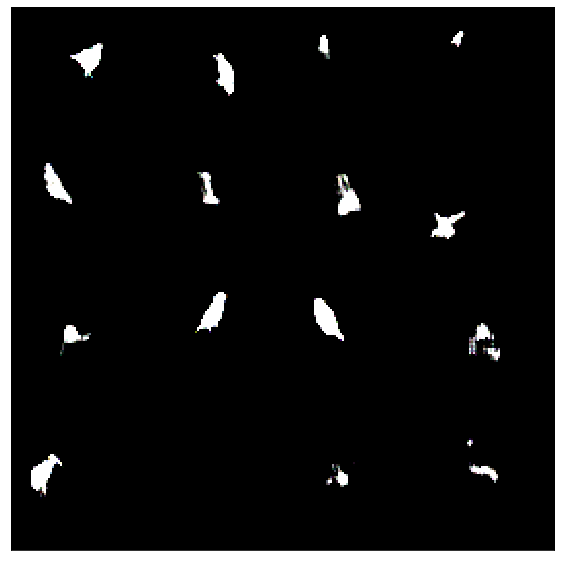

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


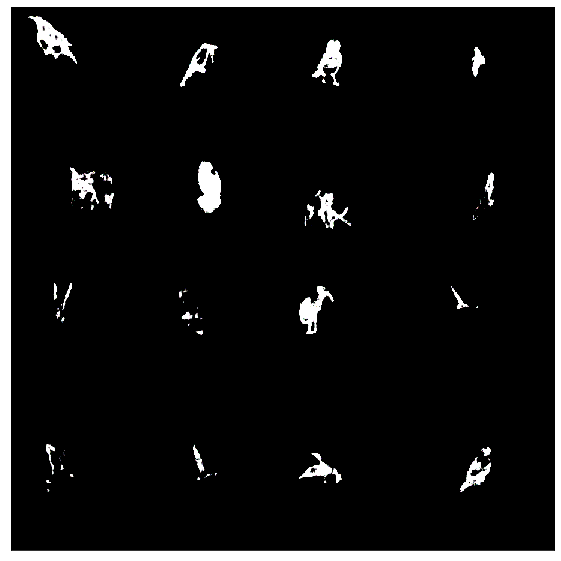

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 8


  0%|                                                                             | 1/17500 [00:13<66:42:42, 13.72s/it]

Train Epoch: 8 [0/280000 (0%)]	Loss: 0.035040
IOU : 0.0602264404296875
IOU : 0.0602264404296875


  0%|▏                                                                              | 53/17500 [00:16<55:26,  5.24it/s]

Train Epoch: 8 [200/280000 (0%)]	Loss: 0.048079
IOU : 0.05419921875


  1%|▍                                                                             | 101/17500 [00:19<18:19, 15.82it/s]

Train Epoch: 8 [400/280000 (1%)]	Loss: 0.042589
IOU : 0.057861328125
IOU : 0.057861328125


  1%|▋                                                                             | 153/17500 [00:22<19:26, 14.87it/s]

Train Epoch: 8 [600/280000 (1%)]	Loss: 0.047503
IOU : 0.0496368408203125


  1%|▉                                                                             | 201/17500 [00:25<19:36, 14.71it/s]

Train Epoch: 8 [800/280000 (1%)]	Loss: 0.036498
IOU : 0.056304931640625
IOU : 0.056304931640625


  1%|█▏                                                                            | 253/17500 [00:28<17:31, 16.40it/s]

Train Epoch: 8 [1000/280000 (1%)]	Loss: 0.033489
IOU : 0.048675537109375


  2%|█▎                                                                            | 301/17500 [00:31<19:52, 14.43it/s]

Train Epoch: 8 [1200/280000 (2%)]	Loss: 0.044311
IOU : 0.04949951171875
IOU : 0.04949951171875


  2%|█▌                                                                            | 349/17500 [00:34<17:35, 16.25it/s]

Train Epoch: 8 [1400/280000 (2%)]	Loss: 0.043243
IOU : 0.048919677734375


  2%|█▊                                                                            | 401/17500 [00:37<16:49, 16.94it/s]

Train Epoch: 8 [1600/280000 (2%)]	Loss: 0.034713
IOU : 0.0527191162109375
IOU : 0.0527191162109375


  3%|██                                                                            | 453/17500 [00:40<16:49, 16.89it/s]

Train Epoch: 8 [1800/280000 (3%)]	Loss: 0.044420
IOU : 0.0443878173828125


  3%|██▏                                                                           | 501/17500 [00:43<16:59, 16.68it/s]

Train Epoch: 8 [2000/280000 (3%)]	Loss: 0.063638
IOU : 0.058624267578125
IOU : 0.058624267578125


  3%|██▍                                                                           | 549/17500 [00:46<16:43, 16.90it/s]

Train Epoch: 8 [2200/280000 (3%)]	Loss: 0.034458
IOU : 0.0536346435546875


  3%|██▋                                                                           | 601/17500 [00:49<16:10, 17.40it/s]

Train Epoch: 8 [2400/280000 (3%)]	Loss: 0.032094
IOU : 0.0501708984375
IOU : 0.0501708984375


  4%|██▉                                                                           | 649/17500 [00:52<16:43, 16.80it/s]

Train Epoch: 8 [2600/280000 (4%)]	Loss: 0.033061
IOU : 0.052764892578125


  4%|███                                                                           | 701/17500 [00:55<16:46, 16.69it/s]

Train Epoch: 8 [2800/280000 (4%)]	Loss: 0.032673
IOU : 0.0495758056640625
IOU : 0.0495758056640625


  4%|███▎                                                                          | 749/17500 [00:58<16:34, 16.85it/s]

Train Epoch: 8 [3000/280000 (4%)]	Loss: 0.048394
IOU : 0.054107666015625


  5%|███▌                                                                          | 801/17500 [01:01<16:58, 16.39it/s]

Train Epoch: 8 [3200/280000 (5%)]	Loss: 0.032339
IOU : 0.0530242919921875
IOU : 0.0530242919921875


  5%|███▊                                                                          | 849/17500 [01:04<16:33, 16.77it/s]

Train Epoch: 8 [3400/280000 (5%)]	Loss: 0.034793
IOU : 0.0505828857421875


  5%|████                                                                          | 901/17500 [01:07<17:16, 16.01it/s]

Train Epoch: 8 [3600/280000 (5%)]	Loss: 0.034966
IOU : 0.053924560546875
IOU : 0.053924560546875


  5%|████▏                                                                         | 949/17500 [01:10<16:56, 16.29it/s]

Train Epoch: 8 [3800/280000 (5%)]	Loss: 0.056993
IOU : 0.053436279296875


  6%|████▍                                                                        | 1001/17500 [01:13<19:46, 13.91it/s]

Train Epoch: 8 [4000/280000 (6%)]	Loss: 0.031603
IOU : 0.04876708984375
IOU : 0.04876708984375


  6%|████▋                                                                        | 1053/17500 [01:17<18:18, 14.97it/s]

Train Epoch: 8 [4200/280000 (6%)]	Loss: 0.043396
IOU : 0.051666259765625


  6%|████▊                                                                        | 1101/17500 [01:20<17:04, 16.00it/s]

Train Epoch: 8 [4400/280000 (6%)]	Loss: 0.039252
IOU : 0.059722900390625
IOU : 0.059722900390625


  7%|█████                                                                        | 1153/17500 [01:23<16:17, 16.73it/s]

Train Epoch: 8 [4600/280000 (7%)]	Loss: 0.038038
IOU : 0.0615234375


  7%|█████▎                                                                       | 1202/17500 [01:26<18:04, 15.03it/s]

Train Epoch: 8 [4800/280000 (7%)]	Loss: 0.041111
IOU : 0.051055908203125
IOU : 0.051055908203125


  7%|█████▌                                                                       | 1254/17500 [01:29<16:55, 16.00it/s]

Train Epoch: 8 [5000/280000 (7%)]	Loss: 0.051677
IOU : 0.0580596923828125


  7%|█████▋                                                                       | 1302/17500 [01:32<18:00, 14.99it/s]

Train Epoch: 8 [5200/280000 (7%)]	Loss: 0.036616
IOU : 0.046630859375
IOU : 0.046630859375


  8%|█████▉                                                                       | 1349/17500 [01:35<16:18, 16.51it/s]

Train Epoch: 8 [5400/280000 (8%)]	Loss: 0.030822
IOU : 0.0511627197265625


  8%|██████▏                                                                      | 1401/17500 [01:38<16:58, 15.80it/s]

Train Epoch: 8 [5600/280000 (8%)]	Loss: 0.028906
IOU : 0.0543670654296875
IOU : 0.0543670654296875


  8%|██████▍                                                                      | 1453/17500 [01:41<16:32, 16.16it/s]

Train Epoch: 8 [5800/280000 (8%)]	Loss: 0.046550
IOU : 0.0512237548828125


  9%|██████▌                                                                      | 1501/17500 [01:44<14:59, 17.79it/s]

Train Epoch: 8 [6000/280000 (9%)]	Loss: 0.033191
IOU : 0.0539093017578125
IOU : 0.0539093017578125


  9%|██████▊                                                                      | 1550/17500 [01:47<15:59, 16.63it/s]

Train Epoch: 8 [6200/280000 (9%)]	Loss: 0.037481
IOU : 0.0591278076171875


  9%|███████                                                                      | 1603/17500 [01:50<17:05, 15.50it/s]

Train Epoch: 8 [6400/280000 (9%)]	Loss: 0.035528
IOU : 0.04925537109375
IOU : 0.04925537109375


  9%|███████▎                                                                     | 1651/17500 [01:53<17:51, 14.78it/s]

Train Epoch: 8 [6600/280000 (9%)]	Loss: 0.034817
IOU : 0.05328369140625


 10%|███████▍                                                                     | 1702/17500 [01:56<14:33, 18.08it/s]

Train Epoch: 8 [6800/280000 (10%)]	Loss: 0.031703
IOU : 0.043975830078125
IOU : 0.043975830078125


 10%|███████▋                                                                     | 1750/17500 [02:00<18:53, 13.90it/s]

Train Epoch: 8 [7000/280000 (10%)]	Loss: 0.046182
IOU : 0.0527496337890625


 10%|███████▉                                                                     | 1801/17500 [02:03<14:56, 17.51it/s]

Train Epoch: 8 [7200/280000 (10%)]	Loss: 0.052376
IOU : 0.0546417236328125
IOU : 0.0546417236328125


 11%|████████▏                                                                    | 1850/17500 [02:06<16:07, 16.18it/s]

Train Epoch: 8 [7400/280000 (11%)]	Loss: 0.037347
IOU : 0.047393798828125


 11%|████████▎                                                                    | 1902/17500 [02:09<15:34, 16.68it/s]

Train Epoch: 8 [7600/280000 (11%)]	Loss: 0.027552
IOU : 0.0497283935546875
IOU : 0.0497283935546875


 11%|████████▌                                                                    | 1950/17500 [02:12<16:34, 15.63it/s]

Train Epoch: 8 [7800/280000 (11%)]	Loss: 0.051762
IOU : 0.05657958984375


 11%|████████▊                                                                    | 2002/17500 [02:15<16:40, 15.50it/s]

Train Epoch: 8 [8000/280000 (11%)]	Loss: 0.042708
IOU : 0.0554656982421875
IOU : 0.0554656982421875


 12%|█████████                                                                    | 2052/17500 [02:18<16:06, 15.99it/s]

Train Epoch: 8 [8200/280000 (12%)]	Loss: 0.035228
IOU : 0.051422119140625


 12%|█████████▎                                                                   | 2104/17500 [02:21<16:07, 15.91it/s]

Train Epoch: 8 [8400/280000 (12%)]	Loss: 0.047679
IOU : 0.0527191162109375
IOU : 0.0527191162109375


 12%|█████████▍                                                                   | 2149/17500 [02:24<16:43, 15.30it/s]

Train Epoch: 8 [8600/280000 (12%)]	Loss: 0.039258
IOU : 0.0523681640625


 13%|█████████▋                                                                   | 2203/17500 [02:28<15:19, 16.63it/s]

Train Epoch: 8 [8800/280000 (13%)]	Loss: 0.057044
IOU : 0.0586700439453125
IOU : 0.0586700439453125


 13%|█████████▉                                                                   | 2251/17500 [02:31<16:58, 14.98it/s]

Train Epoch: 8 [9000/280000 (13%)]	Loss: 0.038337
IOU : 0.0468597412109375


 13%|██████████▏                                                                  | 2303/17500 [02:34<15:17, 16.56it/s]

Train Epoch: 8 [9200/280000 (13%)]	Loss: 0.032203
IOU : 0.0453033447265625
IOU : 0.0453033447265625


 13%|██████████▎                                                                  | 2351/17500 [02:37<15:25, 16.36it/s]

Train Epoch: 8 [9400/280000 (13%)]	Loss: 0.045744
IOU : 0.055511474609375


 14%|██████████▌                                                                  | 2399/17500 [02:40<15:59, 15.74it/s]

Train Epoch: 8 [9600/280000 (14%)]	Loss: 0.040256
IOU : 0.059234619140625
IOU : 0.059234619140625


 14%|██████████▊                                                                  | 2451/17500 [02:43<15:17, 16.41it/s]

Train Epoch: 8 [9800/280000 (14%)]	Loss: 0.024846
IOU : 0.047210693359375


 14%|███████████                                                                  | 2504/17500 [02:46<15:51, 15.77it/s]

Train Epoch: 8 [10000/280000 (14%)]	Loss: 0.042384
IOU : 0.0547637939453125
IOU : 0.0547637939453125


 15%|███████████▏                                                                 | 2551/17500 [02:49<15:56, 15.63it/s]

Train Epoch: 8 [10200/280000 (15%)]	Loss: 0.043287
IOU : 0.0517120361328125


 15%|███████████▍                                                                 | 2599/17500 [02:52<15:47, 15.73it/s]

Train Epoch: 8 [10400/280000 (15%)]	Loss: 0.032456
IOU : 0.0491943359375
IOU : 0.0491943359375


 15%|███████████▋                                                                 | 2651/17500 [02:56<16:34, 14.93it/s]

Train Epoch: 8 [10600/280000 (15%)]	Loss: 0.029489
IOU : 0.0444488525390625


 15%|███████████▉                                                                 | 2703/17500 [02:59<15:05, 16.34it/s]

Train Epoch: 8 [10800/280000 (15%)]	Loss: 0.030163
IOU : 0.051116943359375
IOU : 0.051116943359375


 16%|████████████                                                                 | 2754/17500 [03:02<14:19, 17.16it/s]

Train Epoch: 8 [11000/280000 (16%)]	Loss: 0.035457
IOU : 0.0535736083984375


 16%|████████████▎                                                                | 2799/17500 [03:05<15:16, 16.04it/s]

Train Epoch: 8 [11200/280000 (16%)]	Loss: 0.032017
IOU : 0.0533599853515625
IOU : 0.0533599853515625


 16%|████████████▌                                                                | 2851/17500 [03:08<16:41, 14.62it/s]

Train Epoch: 8 [11400/280000 (16%)]	Loss: 0.040551
IOU : 0.0587615966796875


 17%|████████████▊                                                                | 2899/17500 [03:11<15:36, 15.59it/s]

Train Epoch: 8 [11600/280000 (17%)]	Loss: 0.035183
IOU : 0.0574188232421875
IOU : 0.0574188232421875


 17%|████████████▉                                                                | 2951/17500 [03:15<15:42, 15.43it/s]

Train Epoch: 8 [11800/280000 (17%)]	Loss: 0.041260
IOU : 0.048736572265625


 17%|█████████████▏                                                               | 2999/17500 [03:18<14:45, 16.38it/s]

Train Epoch: 8 [12000/280000 (17%)]	Loss: 0.046898
IOU : 0.0483551025390625
IOU : 0.0483551025390625


 17%|█████████████▍                                                               | 3051/17500 [03:21<16:06, 14.95it/s]

Train Epoch: 8 [12200/280000 (17%)]	Loss: 0.050327
IOU : 0.05889892578125


 18%|█████████████▋                                                               | 3102/17500 [03:24<12:46, 18.78it/s]

Train Epoch: 8 [12400/280000 (18%)]	Loss: 0.039091
IOU : 0.04791259765625
IOU : 0.04791259765625


 18%|█████████████▊                                                               | 3151/17500 [03:27<15:09, 15.77it/s]

Train Epoch: 8 [12600/280000 (18%)]	Loss: 0.037457
IOU : 0.052520751953125


 18%|██████████████                                                               | 3199/17500 [03:30<14:53, 16.01it/s]

Train Epoch: 8 [12800/280000 (18%)]	Loss: 0.062173
IOU : 0.0580291748046875
IOU : 0.0580291748046875


 19%|██████████████▎                                                              | 3251/17500 [03:33<14:48, 16.04it/s]

Train Epoch: 8 [13000/280000 (19%)]	Loss: 0.040276
IOU : 0.056427001953125


 19%|██████████████▌                                                              | 3299/17500 [03:36<14:46, 16.02it/s]

Train Epoch: 8 [13200/280000 (19%)]	Loss: 0.031406
IOU : 0.0507049560546875
IOU : 0.0507049560546875


 19%|██████████████▋                                                              | 3351/17500 [03:40<15:01, 15.70it/s]

Train Epoch: 8 [13400/280000 (19%)]	Loss: 0.033843
IOU : 0.05218505859375


 19%|██████████████▉                                                              | 3399/17500 [03:43<14:33, 16.15it/s]

Train Epoch: 8 [13600/280000 (19%)]	Loss: 0.040317
IOU : 0.0540008544921875
IOU : 0.0540008544921875


 20%|███████████████▏                                                             | 3451/17500 [03:46<15:15, 15.34it/s]

Train Epoch: 8 [13800/280000 (20%)]	Loss: 0.042688
IOU : 0.061004638671875


 20%|███████████████▍                                                             | 3502/17500 [03:49<12:27, 18.73it/s]

Train Epoch: 8 [14000/280000 (20%)]	Loss: 0.035270
IOU : 0.0493927001953125
IOU : 0.0493927001953125


 20%|███████████████▋                                                             | 3553/17500 [03:52<15:10, 15.31it/s]

Train Epoch: 8 [14200/280000 (20%)]	Loss: 0.040286
IOU : 0.05352783203125


 21%|███████████████▊                                                             | 3599/17500 [03:55<15:00, 15.43it/s]

Train Epoch: 8 [14400/280000 (21%)]	Loss: 0.065220
IOU : 0.059783935546875
IOU : 0.059783935546875


 21%|████████████████                                                             | 3651/17500 [03:59<14:28, 15.94it/s]

Train Epoch: 8 [14600/280000 (21%)]	Loss: 0.032028
IOU : 0.0489349365234375


 21%|████████████████▎                                                            | 3699/17500 [04:02<14:04, 16.34it/s]

Train Epoch: 8 [14800/280000 (21%)]	Loss: 0.035018
IOU : 0.05499267578125
IOU : 0.05499267578125


 21%|████████████████▌                                                            | 3751/17500 [04:05<14:23, 15.92it/s]

Train Epoch: 8 [15000/280000 (21%)]	Loss: 0.047034
IOU : 0.05938720703125


 22%|████████████████▋                                                            | 3799/17500 [04:08<14:02, 16.26it/s]

Train Epoch: 8 [15200/280000 (22%)]	Loss: 0.030162
IOU : 0.0513916015625
IOU : 0.0513916015625


 22%|████████████████▉                                                            | 3854/17500 [04:11<12:42, 17.89it/s]

Train Epoch: 8 [15400/280000 (22%)]	Loss: 0.055912
IOU : 0.0534210205078125


 22%|█████████████████▏                                                           | 3899/17500 [04:14<14:11, 15.96it/s]

Train Epoch: 8 [15600/280000 (22%)]	Loss: 0.045754
IOU : 0.0528411865234375
IOU : 0.0528411865234375


 23%|█████████████████▍                                                           | 3951/17500 [04:17<14:31, 15.54it/s]

Train Epoch: 8 [15800/280000 (23%)]	Loss: 0.040339
IOU : 0.0494842529296875


 23%|█████████████████▌                                                           | 3999/17500 [04:20<14:12, 15.83it/s]

Train Epoch: 8 [16000/280000 (23%)]	Loss: 0.040207
IOU : 0.0572052001953125
IOU : 0.0572052001953125


 23%|█████████████████▊                                                           | 4051/17500 [04:24<14:14, 15.73it/s]

Train Epoch: 8 [16200/280000 (23%)]	Loss: 0.032719
IOU : 0.0478668212890625


 23%|██████████████████                                                           | 4099/17500 [04:27<14:07, 15.81it/s]

Train Epoch: 8 [16400/280000 (23%)]	Loss: 0.037409
IOU : 0.0480499267578125
IOU : 0.0480499267578125


 24%|██████████████████▎                                                          | 4151/17500 [04:30<13:43, 16.22it/s]

Train Epoch: 8 [16600/280000 (24%)]	Loss: 0.044880
IOU : 0.0555267333984375


 24%|██████████████████▍                                                          | 4199/17500 [04:33<13:42, 16.16it/s]

Train Epoch: 8 [16800/280000 (24%)]	Loss: 0.036146
IOU : 0.0551605224609375
IOU : 0.0551605224609375


 24%|██████████████████▋                                                          | 4251/17500 [04:36<13:31, 16.33it/s]

Train Epoch: 8 [17000/280000 (24%)]	Loss: 0.049467
IOU : 0.05224609375


 25%|██████████████████▉                                                          | 4299/17500 [04:39<14:04, 15.63it/s]

Train Epoch: 8 [17200/280000 (25%)]	Loss: 0.044090
IOU : 0.05718994140625
IOU : 0.05718994140625


 25%|███████████████████▏                                                         | 4351/17500 [04:42<13:55, 15.73it/s]

Train Epoch: 8 [17400/280000 (25%)]	Loss: 0.027665
IOU : 0.0511932373046875


 25%|███████████████████▎                                                         | 4399/17500 [04:45<13:34, 16.08it/s]

Train Epoch: 8 [17600/280000 (25%)]	Loss: 0.031351
IOU : 0.05120849609375
IOU : 0.05120849609375


 25%|███████████████████▌                                                         | 4451/17500 [04:49<15:22, 14.14it/s]

Train Epoch: 8 [17800/280000 (25%)]	Loss: 0.038141
IOU : 0.0539398193359375


 26%|███████████████████▊                                                         | 4501/17500 [04:52<14:43, 14.72it/s]

Train Epoch: 8 [18000/280000 (26%)]	Loss: 0.057240
IOU : 0.0529022216796875
IOU : 0.0529022216796875


 26%|████████████████████                                                         | 4554/17500 [04:55<11:47, 18.30it/s]

Train Epoch: 8 [18200/280000 (26%)]	Loss: 0.038790
IOU : 0.0568695068359375


 26%|████████████████████▏                                                        | 4601/17500 [04:58<15:28, 13.90it/s]

Train Epoch: 8 [18400/280000 (26%)]	Loss: 0.036160
IOU : 0.049560546875
IOU : 0.049560546875


 27%|████████████████████▍                                                        | 4653/17500 [05:01<14:01, 15.26it/s]

Train Epoch: 8 [18600/280000 (27%)]	Loss: 0.037167
IOU : 0.0500335693359375


 27%|████████████████████▋                                                        | 4701/17500 [05:04<13:27, 15.84it/s]

Train Epoch: 8 [18800/280000 (27%)]	Loss: 0.041668
IOU : 0.0528717041015625
IOU : 0.0528717041015625


 27%|████████████████████▉                                                        | 4752/17500 [05:07<11:25, 18.61it/s]

Train Epoch: 8 [19000/280000 (27%)]	Loss: 0.048363
IOU : 0.0576629638671875


 27%|█████████████████████                                                        | 4801/17500 [05:10<13:40, 15.48it/s]

Train Epoch: 8 [19200/280000 (27%)]	Loss: 0.030066
IOU : 0.0452728271484375
IOU : 0.0452728271484375


 28%|█████████████████████▎                                                       | 4851/17500 [05:14<12:28, 16.89it/s]

Train Epoch: 8 [19400/280000 (28%)]	Loss: 0.048368
IOU : 0.059326171875


 28%|█████████████████████▌                                                       | 4901/17500 [05:17<13:41, 15.33it/s]

Train Epoch: 8 [19600/280000 (28%)]	Loss: 0.050441
IOU : 0.05712890625
IOU : 0.05712890625


 28%|█████████████████████▊                                                       | 4949/17500 [05:20<13:10, 15.88it/s]

Train Epoch: 8 [19800/280000 (28%)]	Loss: 0.037720
IOU : 0.048309326171875


 29%|██████████████████████                                                       | 5001/17500 [05:23<13:00, 16.01it/s]

Train Epoch: 8 [20000/280000 (29%)]	Loss: 0.037271
IOU : 0.0506591796875
IOU : 0.0506591796875


 29%|██████████████████████▏                                                      | 5049/17500 [05:26<12:48, 16.20it/s]

Train Epoch: 8 [20200/280000 (29%)]	Loss: 0.046428
IOU : 0.0505523681640625


 29%|██████████████████████▍                                                      | 5101/17500 [05:29<13:23, 15.42it/s]

Train Epoch: 8 [20400/280000 (29%)]	Loss: 0.037751
IOU : 0.0499267578125
IOU : 0.0499267578125


 29%|██████████████████████▋                                                      | 5153/17500 [05:33<13:03, 15.77it/s]

Train Epoch: 8 [20600/280000 (29%)]	Loss: 0.049924
IOU : 0.04803466796875


 30%|██████████████████████▉                                                      | 5201/17500 [05:35<12:38, 16.22it/s]

Train Epoch: 8 [20800/280000 (30%)]	Loss: 0.048322
IOU : 0.0585479736328125
IOU : 0.0585479736328125


 30%|███████████████████████                                                      | 5252/17500 [05:39<11:45, 17.35it/s]

Train Epoch: 8 [21000/280000 (30%)]	Loss: 0.037584
IOU : 0.05328369140625


 30%|███████████████████████▎                                                     | 5301/17500 [05:42<12:43, 15.99it/s]

Train Epoch: 8 [21200/280000 (30%)]	Loss: 0.038133
IOU : 0.0524749755859375
IOU : 0.0524749755859375


 31%|███████████████████████▌                                                     | 5349/17500 [05:45<12:00, 16.86it/s]

Train Epoch: 8 [21400/280000 (31%)]	Loss: 0.048973
IOU : 0.052642822265625


 31%|███████████████████████▊                                                     | 5401/17500 [05:48<13:16, 15.19it/s]

Train Epoch: 8 [21600/280000 (31%)]	Loss: 0.037124
IOU : 0.0525360107421875
IOU : 0.0525360107421875


 31%|███████████████████████▉                                                     | 5449/17500 [05:51<12:10, 16.50it/s]

Train Epoch: 8 [21800/280000 (31%)]	Loss: 0.037662
IOU : 0.0550994873046875


 31%|████████████████████████▏                                                    | 5501/17500 [05:54<12:47, 15.63it/s]

Train Epoch: 8 [22000/280000 (31%)]	Loss: 0.035629
IOU : 0.052276611328125
IOU : 0.052276611328125


 32%|████████████████████████▍                                                    | 5553/17500 [05:57<13:05, 15.22it/s]

Train Epoch: 8 [22200/280000 (32%)]	Loss: 0.027974
IOU : 0.047515869140625


 32%|████████████████████████▋                                                    | 5604/17500 [06:01<12:18, 16.11it/s]

Train Epoch: 8 [22400/280000 (32%)]	Loss: 0.030853
IOU : 0.044158935546875
IOU : 0.044158935546875


 32%|████████████████████████▊                                                    | 5653/17500 [06:04<11:48, 16.71it/s]

Train Epoch: 8 [22600/280000 (32%)]	Loss: 0.029590
IOU : 0.056610107421875


 33%|█████████████████████████                                                    | 5702/17500 [06:07<11:16, 17.44it/s]

Train Epoch: 8 [22800/280000 (33%)]	Loss: 0.067854
IOU : 0.061279296875
IOU : 0.061279296875


 33%|█████████████████████████▎                                                   | 5751/17500 [06:10<13:41, 14.30it/s]

Train Epoch: 8 [23000/280000 (33%)]	Loss: 0.035227
IOU : 0.0542144775390625


 33%|█████████████████████████▌                                                   | 5802/17500 [06:13<12:51, 15.16it/s]

Train Epoch: 8 [23200/280000 (33%)]	Loss: 0.039269
IOU : 0.0549468994140625
IOU : 0.0549468994140625


 33%|█████████████████████████▋                                                   | 5849/17500 [06:16<13:33, 14.32it/s]

Train Epoch: 8 [23400/280000 (33%)]	Loss: 0.039287
IOU : 0.0534515380859375


 34%|█████████████████████████▉                                                   | 5900/17500 [06:19<13:34, 14.24it/s]

Train Epoch: 8 [23600/280000 (34%)]	Loss: 0.063245
IOU : 0.0618743896484375
IOU : 0.0618743896484375


 34%|██████████████████████████▏                                                  | 5953/17500 [06:22<12:22, 15.54it/s]

Train Epoch: 8 [23800/280000 (34%)]	Loss: 0.038341
IOU : 0.05303955078125


 34%|██████████████████████████▍                                                  | 6004/17500 [06:26<11:56, 16.05it/s]

Train Epoch: 8 [24000/280000 (34%)]	Loss: 0.029661
IOU : 0.058929443359375
IOU : 0.058929443359375


 35%|██████████████████████████▌                                                  | 6051/17500 [06:29<12:57, 14.73it/s]

Train Epoch: 8 [24200/280000 (35%)]	Loss: 0.030928
IOU : 0.0454864501953125


 35%|██████████████████████████▊                                                  | 6101/17500 [06:32<13:33, 14.01it/s]

Train Epoch: 8 [24400/280000 (35%)]	Loss: 0.046297
IOU : 0.05987548828125
IOU : 0.05987548828125


 35%|███████████████████████████                                                  | 6149/17500 [06:35<11:39, 16.23it/s]

Train Epoch: 8 [24600/280000 (35%)]	Loss: 0.038569
IOU : 0.0494537353515625


 35%|███████████████████████████▎                                                 | 6202/17500 [06:38<11:50, 15.90it/s]

Train Epoch: 8 [24800/280000 (35%)]	Loss: 0.033724
IOU : 0.0538177490234375
IOU : 0.0538177490234375


 36%|███████████████████████████▌                                                 | 6252/17500 [06:41<10:29, 17.87it/s]

Train Epoch: 8 [25000/280000 (36%)]	Loss: 0.081867
IOU : 0.0539093017578125


 36%|███████████████████████████▋                                                 | 6301/17500 [06:44<12:23, 15.07it/s]

Train Epoch: 8 [25200/280000 (36%)]	Loss: 0.051349
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 36%|███████████████████████████▉                                                 | 6353/17500 [06:48<12:37, 14.72it/s]

Train Epoch: 8 [25400/280000 (36%)]	Loss: 0.041020
IOU : 0.05267333984375


 37%|████████████████████████████▏                                                | 6401/17500 [06:51<11:13, 16.49it/s]

Train Epoch: 8 [25600/280000 (37%)]	Loss: 0.038087
IOU : 0.056793212890625
IOU : 0.056793212890625


 37%|████████████████████████████▍                                                | 6449/17500 [06:54<12:08, 15.16it/s]

Train Epoch: 8 [25800/280000 (37%)]	Loss: 0.032614
IOU : 0.0496368408203125


 37%|████████████████████████████▌                                                | 6503/17500 [06:57<11:10, 16.41it/s]

Train Epoch: 8 [26000/280000 (37%)]	Loss: 0.028542
IOU : 0.05035400390625
IOU : 0.05035400390625


 37%|████████████████████████████▊                                                | 6549/17500 [07:00<11:25, 15.99it/s]

Train Epoch: 8 [26200/280000 (37%)]	Loss: 0.034882
IOU : 0.05718994140625


 38%|█████████████████████████████                                                | 6601/17500 [07:03<11:03, 16.43it/s]

Train Epoch: 8 [26400/280000 (38%)]	Loss: 0.034870
IOU : 0.0514373779296875
IOU : 0.0514373779296875


 38%|█████████████████████████████▎                                               | 6649/17500 [07:06<10:58, 16.48it/s]

Train Epoch: 8 [26600/280000 (38%)]	Loss: 0.040399
IOU : 0.0561065673828125


 38%|█████████████████████████████▍                                               | 6701/17500 [07:10<11:20, 15.88it/s]

Train Epoch: 8 [26800/280000 (38%)]	Loss: 0.045437
IOU : 0.0520172119140625
IOU : 0.0520172119140625


 39%|█████████████████████████████▋                                               | 6749/17500 [07:12<10:58, 16.34it/s]

Train Epoch: 8 [27000/280000 (39%)]	Loss: 0.033207
IOU : 0.0531158447265625


 39%|█████████████████████████████▉                                               | 6801/17500 [07:16<11:02, 16.14it/s]

Train Epoch: 8 [27200/280000 (39%)]	Loss: 0.056127
IOU : 0.0595245361328125
IOU : 0.0595245361328125


 39%|██████████████████████████████▏                                              | 6852/17500 [07:19<09:22, 18.94it/s]

Train Epoch: 8 [27400/280000 (39%)]	Loss: 0.032708
IOU : 0.0597991943359375


 39%|██████████████████████████████▎                                              | 6901/17500 [07:22<11:56, 14.78it/s]

Train Epoch: 8 [27600/280000 (39%)]	Loss: 0.043974
IOU : 0.0549468994140625
IOU : 0.0549468994140625


 40%|██████████████████████████████▌                                              | 6949/17500 [07:25<10:52, 16.16it/s]

Train Epoch: 8 [27800/280000 (40%)]	Loss: 0.036794
IOU : 0.0515289306640625


 40%|██████████████████████████████▊                                              | 7001/17500 [07:28<10:56, 15.99it/s]

Train Epoch: 8 [28000/280000 (40%)]	Loss: 0.046992
IOU : 0.058624267578125
IOU : 0.058624267578125


 40%|███████████████████████████████                                              | 7049/17500 [07:31<12:47, 13.62it/s]

Train Epoch: 8 [28200/280000 (40%)]	Loss: 0.042134
IOU : 0.05389404296875


 41%|███████████████████████████████▎                                             | 7104/17500 [07:34<09:03, 19.14it/s]

Train Epoch: 8 [28400/280000 (41%)]	Loss: 0.035732
IOU : 0.0499420166015625
IOU : 0.0499420166015625


 41%|███████████████████████████████▍                                             | 7149/17500 [07:37<11:46, 14.66it/s]

Train Epoch: 8 [28600/280000 (41%)]	Loss: 0.035137
IOU : 0.052703857421875


 41%|███████████████████████████████▋                                             | 7201/17500 [07:40<11:05, 15.47it/s]

Train Epoch: 8 [28800/280000 (41%)]	Loss: 0.041108
IOU : 0.05450439453125
IOU : 0.05450439453125


 41%|███████████████████████████████▉                                             | 7254/17500 [07:44<10:53, 15.67it/s]

Train Epoch: 8 [29000/280000 (41%)]	Loss: 0.035129
IOU : 0.0446014404296875


 42%|████████████████████████████████▏                                            | 7304/17500 [07:47<10:33, 16.10it/s]

Train Epoch: 8 [29200/280000 (42%)]	Loss: 0.037630
IOU : 0.0509033203125
IOU : 0.0509033203125


 42%|████████████████████████████████▎                                            | 7354/17500 [07:50<09:39, 17.51it/s]

Train Epoch: 8 [29400/280000 (42%)]	Loss: 0.047581
IOU : 0.058990478515625


 42%|████████████████████████████████▌                                            | 7402/17500 [07:53<11:01, 15.28it/s]

Train Epoch: 8 [29600/280000 (42%)]	Loss: 0.040511
IOU : 0.0507354736328125
IOU : 0.0507354736328125


 43%|████████████████████████████████▊                                            | 7451/17500 [07:56<10:48, 15.49it/s]

Train Epoch: 8 [29800/280000 (43%)]	Loss: 0.049111
IOU : 0.0570068359375


 43%|█████████████████████████████████                                            | 7503/17500 [07:59<10:34, 15.76it/s]

Train Epoch: 8 [30000/280000 (43%)]	Loss: 0.032922
IOU : 0.044586181640625
IOU : 0.044586181640625


 43%|█████████████████████████████████▏                                           | 7554/17500 [08:03<10:29, 15.80it/s]

Train Epoch: 8 [30200/280000 (43%)]	Loss: 0.037952
IOU : 0.0535430908203125


 43%|█████████████████████████████████▍                                           | 7603/17500 [08:06<10:31, 15.67it/s]

Train Epoch: 8 [30400/280000 (43%)]	Loss: 0.069984
IOU : 0.053436279296875
IOU : 0.053436279296875


 44%|█████████████████████████████████▋                                           | 7652/17500 [08:09<08:56, 18.37it/s]

Train Epoch: 8 [30600/280000 (44%)]	Loss: 0.033383
IOU : 0.055816650390625


 44%|█████████████████████████████████▉                                           | 7701/17500 [08:12<10:59, 14.86it/s]

Train Epoch: 8 [30800/280000 (44%)]	Loss: 0.054199
IOU : 0.048187255859375
IOU : 0.048187255859375


 44%|██████████████████████████████████                                           | 7749/17500 [08:15<09:58, 16.30it/s]

Train Epoch: 8 [31000/280000 (44%)]	Loss: 0.031948
IOU : 0.0511016845703125


 45%|██████████████████████████████████▎                                          | 7801/17500 [08:18<10:11, 15.87it/s]

Train Epoch: 8 [31200/280000 (45%)]	Loss: 0.034314
IOU : 0.0480194091796875
IOU : 0.0480194091796875


 45%|██████████████████████████████████▌                                          | 7849/17500 [08:21<10:01, 16.05it/s]

Train Epoch: 8 [31400/280000 (45%)]	Loss: 0.046650
IOU : 0.056549072265625


 45%|██████████████████████████████████▊                                          | 7901/17500 [08:24<09:55, 16.12it/s]

Train Epoch: 8 [31600/280000 (45%)]	Loss: 0.036205
IOU : 0.04949951171875
IOU : 0.04949951171875


 45%|██████████████████████████████████▉                                          | 7949/17500 [08:27<09:47, 16.26it/s]

Train Epoch: 8 [31800/280000 (45%)]	Loss: 0.028327
IOU : 0.055694580078125


 46%|███████████████████████████████████▏                                         | 8001/17500 [08:30<09:39, 16.40it/s]

Train Epoch: 8 [32000/280000 (46%)]	Loss: 0.049486
IOU : 0.0566864013671875
IOU : 0.0566864013671875


 46%|███████████████████████████████████▍                                         | 8049/17500 [08:33<09:51, 15.97it/s]

Train Epoch: 8 [32200/280000 (46%)]	Loss: 0.039406
IOU : 0.0498046875


 46%|███████████████████████████████████▋                                         | 8101/17500 [08:36<09:50, 15.92it/s]

Train Epoch: 8 [32400/280000 (46%)]	Loss: 0.040190
IOU : 0.047760009765625
IOU : 0.047760009765625


 47%|███████████████████████████████████▊                                         | 8149/17500 [08:39<09:38, 16.17it/s]

Train Epoch: 8 [32600/280000 (47%)]	Loss: 0.034450
IOU : 0.0567169189453125


 47%|████████████████████████████████████                                         | 8201/17500 [08:42<09:46, 15.85it/s]

Train Epoch: 8 [32800/280000 (47%)]	Loss: 0.036401
IOU : 0.0544891357421875
IOU : 0.0544891357421875


 47%|████████████████████████████████████▎                                        | 8249/17500 [08:45<09:37, 16.02it/s]

Train Epoch: 8 [33000/280000 (47%)]	Loss: 0.033394
IOU : 0.0505828857421875


 47%|████████████████████████████████████▌                                        | 8301/17500 [08:49<09:49, 15.61it/s]

Train Epoch: 8 [33200/280000 (47%)]	Loss: 0.044805
IOU : 0.05572509765625
IOU : 0.05572509765625


 48%|████████████████████████████████████▋                                        | 8349/17500 [08:52<10:52, 14.03it/s]

Train Epoch: 8 [33400/280000 (48%)]	Loss: 0.033842
IOU : 0.0573577880859375


 48%|████████████████████████████████████▉                                        | 8402/17500 [08:55<09:29, 15.99it/s]

Train Epoch: 8 [33600/280000 (48%)]	Loss: 0.047398
IOU : 0.05462646484375
IOU : 0.05462646484375


 48%|█████████████████████████████████████▏                                       | 8452/17500 [08:58<09:08, 16.51it/s]

Train Epoch: 8 [33800/280000 (48%)]	Loss: 0.045743
IOU : 0.0552978515625


 49%|█████████████████████████████████████▍                                       | 8504/17500 [09:01<09:21, 16.01it/s]

Train Epoch: 8 [34000/280000 (49%)]	Loss: 0.038583
IOU : 0.059814453125
IOU : 0.059814453125


 49%|█████████████████████████████████████▌                                       | 8549/17500 [09:04<09:34, 15.58it/s]

Train Epoch: 8 [34200/280000 (49%)]	Loss: 0.030163
IOU : 0.050811767578125


 49%|█████████████████████████████████████▊                                       | 8602/17500 [09:07<09:57, 14.89it/s]

Train Epoch: 8 [34400/280000 (49%)]	Loss: 0.031642
IOU : 0.0412139892578125
IOU : 0.0412139892578125


 49%|██████████████████████████████████████                                       | 8649/17500 [09:10<09:11, 16.04it/s]

Train Epoch: 8 [34600/280000 (49%)]	Loss: 0.036712
IOU : 0.05303955078125


 50%|██████████████████████████████████████▎                                      | 8701/17500 [09:14<09:23, 15.61it/s]

Train Epoch: 8 [34800/280000 (50%)]	Loss: 0.050544
IOU : 0.0632781982421875
IOU : 0.0632781982421875


 50%|██████████████████████████████████████▌                                      | 8752/17500 [09:17<08:33, 17.03it/s]

Train Epoch: 8 [35000/280000 (50%)]	Loss: 0.041802
IOU : 0.05731201171875


 50%|██████████████████████████████████████▋                                      | 8801/17500 [09:20<09:09, 15.83it/s]

Train Epoch: 8 [35200/280000 (50%)]	Loss: 0.042352
IOU : 0.05804443359375
IOU : 0.05804443359375


 51%|██████████████████████████████████████▉                                      | 8849/17500 [09:23<09:03, 15.93it/s]

Train Epoch: 8 [35400/280000 (51%)]	Loss: 0.041696
IOU : 0.060577392578125


 51%|███████████████████████████████████████▏                                     | 8901/17500 [09:26<08:51, 16.19it/s]

Train Epoch: 8 [35600/280000 (51%)]	Loss: 0.033108
IOU : 0.0535888671875
IOU : 0.0535888671875


 51%|███████████████████████████████████████▍                                     | 8953/17500 [09:29<08:44, 16.29it/s]

Train Epoch: 8 [35800/280000 (51%)]	Loss: 0.031668
IOU : 0.0519561767578125


 51%|███████████████████████████████████████▌                                     | 9001/17500 [09:32<10:21, 13.67it/s]

Train Epoch: 8 [36000/280000 (51%)]	Loss: 0.031897
IOU : 0.0527496337890625
IOU : 0.0527496337890625


 52%|███████████████████████████████████████▊                                     | 9053/17500 [09:36<09:44, 14.44it/s]

Train Epoch: 8 [36200/280000 (52%)]	Loss: 0.052248
IOU : 0.06256103515625


 52%|████████████████████████████████████████                                     | 9101/17500 [09:39<09:03, 15.45it/s]

Train Epoch: 8 [36400/280000 (52%)]	Loss: 0.035348
IOU : 0.0554046630859375
IOU : 0.0554046630859375


 52%|████████████████████████████████████████▎                                    | 9153/17500 [09:42<08:46, 15.87it/s]

Train Epoch: 8 [36600/280000 (52%)]	Loss: 0.049433
IOU : 0.0662841796875


 53%|████████████████████████████████████████▍                                    | 9201/17500 [09:45<10:11, 13.57it/s]

Train Epoch: 8 [36800/280000 (53%)]	Loss: 0.027260
IOU : 0.0504608154296875
IOU : 0.0504608154296875


 53%|████████████████████████████████████████▋                                    | 9251/17500 [09:48<08:48, 15.60it/s]

Train Epoch: 8 [37000/280000 (53%)]	Loss: 0.037870
IOU : 0.0557708740234375


 53%|████████████████████████████████████████▉                                    | 9301/17500 [09:51<10:16, 13.30it/s]

Train Epoch: 8 [37200/280000 (53%)]	Loss: 0.039335
IOU : 0.0583343505859375
IOU : 0.0583343505859375


 53%|█████████████████████████████████████████▏                                   | 9353/17500 [09:54<08:54, 15.24it/s]

Train Epoch: 8 [37400/280000 (53%)]	Loss: 0.033669
IOU : 0.0537109375


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [09:57<07:35, 17.78it/s]

Train Epoch: 8 [37600/280000 (54%)]	Loss: 0.046079
IOU : 0.0518341064453125
IOU : 0.0518341064453125


 54%|█████████████████████████████████████████▌                                   | 9453/17500 [10:01<08:24, 15.95it/s]

Train Epoch: 8 [37800/280000 (54%)]	Loss: 0.027653
IOU : 0.0508270263671875


 54%|█████████████████████████████████████████▊                                   | 9502/17500 [10:04<08:24, 15.85it/s]

Train Epoch: 8 [38000/280000 (54%)]	Loss: 0.035247
IOU : 0.0498046875
IOU : 0.0498046875


 55%|██████████████████████████████████████████                                   | 9549/17500 [10:07<08:21, 15.85it/s]

Train Epoch: 8 [38200/280000 (55%)]	Loss: 0.083784
IOU : 0.0575408935546875


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [10:10<08:04, 16.30it/s]

Train Epoch: 8 [38400/280000 (55%)]	Loss: 0.042825
IOU : 0.0519866943359375
IOU : 0.0519866943359375


 55%|██████████████████████████████████████████▍                                  | 9649/17500 [10:13<08:07, 16.09it/s]

Train Epoch: 8 [38600/280000 (55%)]	Loss: 0.041757
IOU : 0.058746337890625


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [10:16<08:22, 15.51it/s]

Train Epoch: 8 [38800/280000 (55%)]	Loss: 0.037523
IOU : 0.0548858642578125
IOU : 0.0548858642578125


 56%|██████████████████████████████████████████▉                                  | 9749/17500 [10:19<07:50, 16.49it/s]

Train Epoch: 8 [39000/280000 (56%)]	Loss: 0.039748
IOU : 0.0561981201171875


 56%|███████████████████████████████████████████▏                                 | 9803/17500 [10:22<08:00, 16.01it/s]

Train Epoch: 8 [39200/280000 (56%)]	Loss: 0.041856
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [10:25<07:44, 16.45it/s]

Train Epoch: 8 [39400/280000 (56%)]	Loss: 0.038997
IOU : 0.0591278076171875


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [10:28<08:15, 15.34it/s]

Train Epoch: 8 [39600/280000 (57%)]	Loss: 0.039837
IOU : 0.05889892578125
IOU : 0.05889892578125


 57%|███████████████████████████████████████████▊                                 | 9953/17500 [10:31<08:04, 15.59it/s]

Train Epoch: 8 [39800/280000 (57%)]	Loss: 0.039956
IOU : 0.0557098388671875


 57%|███████████████████████████████████████████▍                                | 10001/17500 [10:35<09:33, 13.07it/s]

Train Epoch: 8 [40000/280000 (57%)]	Loss: 0.044418
IOU : 0.0495758056640625
IOU : 0.0495758056640625


 57%|███████████████████████████████████████████▋                                | 10049/17500 [10:38<09:03, 13.72it/s]

Train Epoch: 8 [40200/280000 (57%)]	Loss: 0.050331
IOU : 0.056732177734375


 58%|███████████████████████████████████████████▊                                | 10101/17500 [10:41<07:37, 16.17it/s]

Train Epoch: 8 [40400/280000 (58%)]	Loss: 0.032633
IOU : 0.05242919921875
IOU : 0.05242919921875


 58%|████████████████████████████████████████████                                | 10152/17500 [10:44<06:52, 17.80it/s]

Train Epoch: 8 [40600/280000 (58%)]	Loss: 0.035503
IOU : 0.0540008544921875


 58%|████████████████████████████████████████████▎                               | 10204/17500 [10:47<06:30, 18.67it/s]

Train Epoch: 8 [40800/280000 (58%)]	Loss: 0.040408
IOU : 0.052978515625
IOU : 0.052978515625


 59%|████████████████████████████████████████████▌                               | 10249/17500 [10:50<08:05, 14.94it/s]

Train Epoch: 8 [41000/280000 (59%)]	Loss: 0.033961
IOU : 0.0554962158203125


 59%|████████████████████████████████████████████▋                               | 10301/17500 [10:53<07:15, 16.52it/s]

Train Epoch: 8 [41200/280000 (59%)]	Loss: 0.030835
IOU : 0.054595947265625
IOU : 0.054595947265625


 59%|████████████████████████████████████████████▉                               | 10349/17500 [10:56<07:10, 16.62it/s]

Train Epoch: 8 [41400/280000 (59%)]	Loss: 0.047726
IOU : 0.0510101318359375


 59%|█████████████████████████████████████████████▏                              | 10401/17500 [11:00<07:27, 15.87it/s]

Train Epoch: 8 [41600/280000 (59%)]	Loss: 0.040963
IOU : 0.05242919921875
IOU : 0.05242919921875


 60%|█████████████████████████████████████████████▍                              | 10450/17500 [11:02<06:30, 18.06it/s]

Train Epoch: 8 [41800/280000 (60%)]	Loss: 0.028136
IOU : 0.0451202392578125


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [11:06<07:11, 16.21it/s]

Train Epoch: 8 [42000/280000 (60%)]	Loss: 0.037485
IOU : 0.05560302734375
IOU : 0.05560302734375


 60%|█████████████████████████████████████████████▊                              | 10549/17500 [11:08<06:58, 16.62it/s]

Train Epoch: 8 [42200/280000 (60%)]	Loss: 0.033351
IOU : 0.0600433349609375


 61%|██████████████████████████████████████████████                              | 10601/17500 [11:12<06:54, 16.66it/s]

Train Epoch: 8 [42400/280000 (61%)]	Loss: 0.047872
IOU : 0.055877685546875
IOU : 0.055877685546875


 61%|██████████████████████████████████████████████▏                             | 10649/17500 [11:15<07:00, 16.28it/s]

Train Epoch: 8 [42600/280000 (61%)]	Loss: 0.024392
IOU : 0.0447845458984375


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [11:18<06:58, 16.26it/s]

Train Epoch: 8 [42800/280000 (61%)]	Loss: 0.040003
IOU : 0.0516204833984375
IOU : 0.0516204833984375


 61%|██████████████████████████████████████████████▋                             | 10749/17500 [11:21<06:50, 16.44it/s]

Train Epoch: 8 [43000/280000 (61%)]	Loss: 0.035192
IOU : 0.0533294677734375


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [11:24<06:54, 16.17it/s]

Train Epoch: 8 [43200/280000 (62%)]	Loss: 0.042456
IOU : 0.053375244140625
IOU : 0.053375244140625


 62%|███████████████████████████████████████████████                             | 10849/17500 [11:27<06:36, 16.75it/s]

Train Epoch: 8 [43400/280000 (62%)]	Loss: 0.050507
IOU : 0.0554656982421875


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [11:30<06:26, 17.08it/s]

Train Epoch: 8 [43600/280000 (62%)]	Loss: 0.047141
IOU : 0.054901123046875
IOU : 0.054901123046875


 63%|███████████████████████████████████████████████▌                            | 10953/17500 [11:33<06:27, 16.90it/s]

Train Epoch: 8 [43800/280000 (63%)]	Loss: 0.037627
IOU : 0.0539093017578125


 63%|███████████████████████████████████████████████▊                            | 11003/17500 [11:36<07:01, 15.43it/s]

Train Epoch: 8 [44000/280000 (63%)]	Loss: 0.031643
IOU : 0.051055908203125
IOU : 0.051055908203125


 63%|███████████████████████████████████████████████▉                            | 11051/17500 [11:39<06:51, 15.66it/s]

Train Epoch: 8 [44200/280000 (63%)]	Loss: 0.035101
IOU : 0.050628662109375


 63%|████████████████████████████████████████████████▏                           | 11102/17500 [11:42<07:37, 13.99it/s]

Train Epoch: 8 [44400/280000 (63%)]	Loss: 0.044529
IOU : 0.0490264892578125
IOU : 0.0490264892578125


 64%|████████████████████████████████████████████████▍                           | 11152/17500 [11:45<06:29, 16.30it/s]

Train Epoch: 8 [44600/280000 (64%)]	Loss: 0.042756
IOU : 0.0488128662109375


 64%|████████████████████████████████████████████████▋                           | 11204/17500 [11:49<06:49, 15.39it/s]

Train Epoch: 8 [44800/280000 (64%)]	Loss: 0.055313
IOU : 0.0574798583984375
IOU : 0.0574798583984375


 64%|████████████████████████████████████████████████▊                           | 11249/17500 [11:51<07:04, 14.74it/s]

Train Epoch: 8 [45000/280000 (64%)]	Loss: 0.030795
IOU : 0.044189453125


 65%|█████████████████████████████████████████████████                           | 11301/17500 [11:55<06:20, 16.29it/s]

Train Epoch: 8 [45200/280000 (65%)]	Loss: 0.035065
IOU : 0.0509490966796875
IOU : 0.0509490966796875


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [11:58<06:42, 15.27it/s]

Train Epoch: 8 [45400/280000 (65%)]	Loss: 0.024062
IOU : 0.0421142578125


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [12:01<07:47, 13.03it/s]

Train Epoch: 8 [45600/280000 (65%)]	Loss: 0.046846
IOU : 0.0486602783203125
IOU : 0.0486602783203125


 65%|█████████████████████████████████████████████████▋                          | 11452/17500 [12:04<05:58, 16.89it/s]

Train Epoch: 8 [45800/280000 (65%)]	Loss: 0.035071
IOU : 0.0604248046875


 66%|█████████████████████████████████████████████████▉                          | 11503/17500 [12:07<06:00, 16.65it/s]

Train Epoch: 8 [46000/280000 (66%)]	Loss: 0.032111
IOU : 0.0538787841796875
IOU : 0.0538787841796875


 66%|██████████████████████████████████████████████████▏                         | 11553/17500 [12:10<06:47, 14.58it/s]

Train Epoch: 8 [46200/280000 (66%)]	Loss: 0.032365
IOU : 0.0575408935546875


 66%|██████████████████████████████████████████████████▍                         | 11602/17500 [12:13<06:28, 15.17it/s]

Train Epoch: 8 [46400/280000 (66%)]	Loss: 0.029124
IOU : 0.0468292236328125
IOU : 0.0468292236328125


 67%|██████████████████████████████████████████████████▌                         | 11653/17500 [12:17<06:32, 14.91it/s]

Train Epoch: 8 [46600/280000 (67%)]	Loss: 0.043647
IOU : 0.0526885986328125


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [12:20<06:09, 15.70it/s]

Train Epoch: 8 [46800/280000 (67%)]	Loss: 0.042060
IOU : 0.056854248046875
IOU : 0.056854248046875


 67%|███████████████████████████████████████████████████                         | 11749/17500 [12:23<05:46, 16.62it/s]

Train Epoch: 8 [47000/280000 (67%)]	Loss: 0.038993
IOU : 0.0513458251953125


 67%|███████████████████████████████████████████████████▎                        | 11804/17500 [12:26<05:38, 16.81it/s]

Train Epoch: 8 [47200/280000 (67%)]	Loss: 0.046703
IOU : 0.0499420166015625
IOU : 0.0499420166015625


 68%|███████████████████████████████████████████████████▍                        | 11853/17500 [12:29<05:40, 16.58it/s]

Train Epoch: 8 [47400/280000 (68%)]	Loss: 0.030957
IOU : 0.0483551025390625


 68%|███████████████████████████████████████████████████▋                        | 11904/17500 [12:32<05:20, 17.45it/s]

Train Epoch: 8 [47600/280000 (68%)]	Loss: 0.037730
IOU : 0.0603485107421875
IOU : 0.0603485107421875


 68%|███████████████████████████████████████████████████▉                        | 11953/17500 [12:35<06:09, 15.01it/s]

Train Epoch: 8 [47800/280000 (68%)]	Loss: 0.097263
IOU : 0.060028076171875


 69%|████████████████████████████████████████████████████                        | 12001/17500 [12:38<05:40, 16.16it/s]

Train Epoch: 8 [48000/280000 (69%)]	Loss: 0.057445
IOU : 0.0574798583984375
IOU : 0.0574798583984375


 69%|████████████████████████████████████████████████████▎                       | 12049/17500 [12:41<05:34, 16.32it/s]

Train Epoch: 8 [48200/280000 (69%)]	Loss: 0.032796
IOU : 0.0527801513671875


 69%|████████████████████████████████████████████████████▌                       | 12101/17500 [12:44<05:41, 15.81it/s]

Train Epoch: 8 [48400/280000 (69%)]	Loss: 0.036991
IOU : 0.053619384765625
IOU : 0.053619384765625


 69%|████████████████████████████████████████████████████▊                       | 12149/17500 [12:47<05:31, 16.13it/s]

Train Epoch: 8 [48600/280000 (69%)]	Loss: 0.044116
IOU : 0.057342529296875


 70%|████████████████████████████████████████████████████▉                       | 12201/17500 [12:51<06:11, 14.25it/s]

Train Epoch: 8 [48800/280000 (70%)]	Loss: 0.040544
IOU : 0.0504150390625
IOU : 0.0504150390625


 70%|█████████████████████████████████████████████████████▏                      | 12249/17500 [12:54<05:20, 16.38it/s]

Train Epoch: 8 [49000/280000 (70%)]	Loss: 0.032712
IOU : 0.0496673583984375


 70%|█████████████████████████████████████████████████████▍                      | 12302/17500 [12:57<06:43, 12.89it/s]

Train Epoch: 8 [49200/280000 (70%)]	Loss: 0.034117
IOU : 0.0485992431640625
IOU : 0.0485992431640625


 71%|█████████████████████████████████████████████████████▋                      | 12349/17500 [13:00<05:09, 16.64it/s]

Train Epoch: 8 [49400/280000 (71%)]	Loss: 0.045727
IOU : 0.057830810546875


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [13:03<05:49, 14.60it/s]

Train Epoch: 8 [49600/280000 (71%)]	Loss: 0.029638
IOU : 0.0481109619140625
IOU : 0.0481109619140625


 71%|██████████████████████████████████████████████████████                      | 12449/17500 [13:06<05:07, 16.40it/s]

Train Epoch: 8 [49800/280000 (71%)]	Loss: 0.035756
IOU : 0.05419921875


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [13:09<05:20, 15.57it/s]

Train Epoch: 8 [50000/280000 (71%)]	Loss: 0.035430
IOU : 0.045654296875
IOU : 0.045654296875


 72%|██████████████████████████████████████████████████████▌                     | 12553/17500 [13:13<05:13, 15.79it/s]

Train Epoch: 8 [50200/280000 (72%)]	Loss: 0.044461
IOU : 0.053009033203125


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [13:16<05:20, 15.29it/s]

Train Epoch: 8 [50400/280000 (72%)]	Loss: 0.035361
IOU : 0.0609588623046875
IOU : 0.0609588623046875


 72%|██████████████████████████████████████████████████████▉                     | 12654/17500 [13:19<04:51, 16.65it/s]

Train Epoch: 8 [50600/280000 (72%)]	Loss: 0.038391
IOU : 0.048828125


 73%|███████████████████████████████████████████████████████▏                    | 12699/17500 [13:22<05:15, 15.20it/s]

Train Epoch: 8 [50800/280000 (73%)]	Loss: 0.054694
IOU : 0.05865478515625
IOU : 0.05865478515625


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [13:25<04:56, 16.02it/s]

Train Epoch: 8 [51000/280000 (73%)]	Loss: 0.037235
IOU : 0.0502777099609375


 73%|███████████████████████████████████████████████████████▌                    | 12799/17500 [13:28<04:33, 17.22it/s]

Train Epoch: 8 [51200/280000 (73%)]	Loss: 0.042308
IOU : 0.0513763427734375
IOU : 0.0513763427734375


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [13:31<04:57, 15.64it/s]

Train Epoch: 8 [51400/280000 (73%)]	Loss: 0.037809
IOU : 0.043609619140625


 74%|████████████████████████████████████████████████████████                    | 12902/17500 [13:34<04:29, 17.08it/s]

Train Epoch: 8 [51600/280000 (74%)]	Loss: 0.047139
IOU : 0.0508880615234375
IOU : 0.0508880615234375


 74%|████████████████████████████████████████████████████████▏                   | 12951/17500 [13:37<04:59, 15.21it/s]

Train Epoch: 8 [51800/280000 (74%)]	Loss: 0.037557
IOU : 0.0555419921875


 74%|████████████████████████████████████████████████████████▍                   | 13002/17500 [13:40<04:48, 15.57it/s]

Train Epoch: 8 [52000/280000 (74%)]	Loss: 0.033661
IOU : 0.049102783203125
IOU : 0.049102783203125


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [13:44<05:26, 13.61it/s]

Train Epoch: 8 [52200/280000 (75%)]	Loss: 0.045458
IOU : 0.0542449951171875


 75%|████████████████████████████████████████████████████████▉                   | 13099/17500 [13:47<04:42, 15.60it/s]

Train Epoch: 8 [52400/280000 (75%)]	Loss: 0.034768
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [13:50<04:21, 16.61it/s]

Train Epoch: 8 [52600/280000 (75%)]	Loss: 0.039531
IOU : 0.0506439208984375


 75%|█████████████████████████████████████████████████████████▎                  | 13199/17500 [13:53<04:22, 16.39it/s]

Train Epoch: 8 [52800/280000 (75%)]	Loss: 0.039125
IOU : 0.047119140625
IOU : 0.047119140625


 76%|█████████████████████████████████████████████████████████▌                  | 13251/17500 [13:56<04:44, 14.95it/s]

Train Epoch: 8 [53000/280000 (76%)]	Loss: 0.032721
IOU : 0.0549468994140625


 76%|█████████████████████████████████████████████████████████▊                  | 13299/17500 [13:59<05:07, 13.67it/s]

Train Epoch: 8 [53200/280000 (76%)]	Loss: 0.048001
IOU : 0.0583343505859375
IOU : 0.0583343505859375


 76%|█████████████████████████████████████████████████████████▉                  | 13351/17500 [14:02<04:10, 16.57it/s]

Train Epoch: 8 [53400/280000 (76%)]	Loss: 0.046706
IOU : 0.058807373046875


 77%|██████████████████████████████████████████████████████████▏                 | 13399/17500 [14:05<04:03, 16.86it/s]

Train Epoch: 8 [53600/280000 (77%)]	Loss: 0.039950
IOU : 0.059417724609375
IOU : 0.059417724609375


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [14:08<04:18, 15.65it/s]

Train Epoch: 8 [53800/280000 (77%)]	Loss: 0.034870
IOU : 0.0488433837890625


 77%|██████████████████████████████████████████████████████████▌                 | 13499/17500 [14:11<04:10, 16.00it/s]

Train Epoch: 8 [54000/280000 (77%)]	Loss: 0.034036
IOU : 0.0550537109375
IOU : 0.0550537109375


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [14:15<04:30, 14.60it/s]

Train Epoch: 8 [54200/280000 (77%)]	Loss: 0.060968
IOU : 0.05523681640625


 78%|███████████████████████████████████████████████████████████                 | 13599/17500 [14:18<03:56, 16.53it/s]

Train Epoch: 8 [54400/280000 (78%)]	Loss: 0.031253
IOU : 0.044830322265625
IOU : 0.044830322265625


 78%|███████████████████████████████████████████████████████████▎                | 13651/17500 [14:21<04:02, 15.87it/s]

Train Epoch: 8 [54600/280000 (78%)]	Loss: 0.064674
IOU : 0.04791259765625


 78%|███████████████████████████████████████████████████████████▌                | 13702/17500 [14:24<03:23, 18.71it/s]

Train Epoch: 8 [54800/280000 (78%)]	Loss: 0.026940
IOU : 0.0489501953125
IOU : 0.0489501953125


 79%|███████████████████████████████████████████████████████████▋                | 13751/17500 [14:27<03:44, 16.68it/s]

Train Epoch: 8 [55000/280000 (79%)]	Loss: 0.045217
IOU : 0.0483245849609375


 79%|███████████████████████████████████████████████████████████▉                | 13802/17500 [14:30<03:25, 18.00it/s]

Train Epoch: 8 [55200/280000 (79%)]	Loss: 0.056138
IOU : 0.06170654296875
IOU : 0.06170654296875


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [14:33<03:44, 16.23it/s]

Train Epoch: 8 [55400/280000 (79%)]	Loss: 0.031724
IOU : 0.0540313720703125


 79%|████████████████████████████████████████████████████████████▍               | 13903/17500 [14:36<03:39, 16.37it/s]

Train Epoch: 8 [55600/280000 (79%)]	Loss: 0.040099
IOU : 0.051116943359375
IOU : 0.051116943359375


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [14:39<03:37, 16.32it/s]

Train Epoch: 8 [55800/280000 (80%)]	Loss: 0.044009
IOU : 0.0539398193359375


 80%|████████████████████████████████████████████████████████████▊               | 14003/17500 [14:42<03:33, 16.40it/s]

Train Epoch: 8 [56000/280000 (80%)]	Loss: 0.034638
IOU : 0.051116943359375
IOU : 0.051116943359375


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [14:45<03:31, 16.32it/s]

Train Epoch: 8 [56200/280000 (80%)]	Loss: 0.033493
IOU : 0.054107666015625


 81%|█████████████████████████████████████████████████████████████▏              | 14103/17500 [14:48<03:40, 15.40it/s]

Train Epoch: 8 [56400/280000 (81%)]	Loss: 0.037280
IOU : 0.046112060546875
IOU : 0.046112060546875


 81%|█████████████████████████████████████████████████████████████▍              | 14153/17500 [14:52<03:31, 15.79it/s]

Train Epoch: 8 [56600/280000 (81%)]	Loss: 0.040303
IOU : 0.0510101318359375


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [14:55<03:31, 15.57it/s]

Train Epoch: 8 [56800/280000 (81%)]	Loss: 0.024536
IOU : 0.0446929931640625
IOU : 0.0446929931640625


 81%|█████████████████████████████████████████████████████████████▉              | 14253/17500 [14:58<03:26, 15.70it/s]

Train Epoch: 8 [57000/280000 (81%)]	Loss: 0.037092
IOU : 0.0548553466796875


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [15:01<03:25, 15.52it/s]

Train Epoch: 8 [57200/280000 (82%)]	Loss: 0.047818
IOU : 0.053375244140625
IOU : 0.053375244140625


 82%|██████████████████████████████████████████████████████████████▎             | 14352/17500 [15:04<03:34, 14.65it/s]

Train Epoch: 8 [57400/280000 (82%)]	Loss: 0.028620
IOU : 0.046539306640625


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [15:07<03:16, 15.76it/s]

Train Epoch: 8 [57600/280000 (82%)]	Loss: 0.033244
IOU : 0.054351806640625
IOU : 0.054351806640625


 83%|██████████████████████████████████████████████████████████████▊             | 14453/17500 [15:11<03:11, 15.91it/s]

Train Epoch: 8 [57800/280000 (83%)]	Loss: 0.042069
IOU : 0.052093505859375


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [15:14<03:24, 14.67it/s]

Train Epoch: 8 [58000/280000 (83%)]	Loss: 0.061120
IOU : 0.054656982421875
IOU : 0.054656982421875


 83%|███████████████████████████████████████████████████████████████▏            | 14553/17500 [15:17<03:21, 14.59it/s]

Train Epoch: 8 [58200/280000 (83%)]	Loss: 0.049181
IOU : 0.0545654296875


 83%|███████████████████████████████████████████████████████████████▍            | 14602/17500 [15:20<02:41, 17.92it/s]

Train Epoch: 8 [58400/280000 (83%)]	Loss: 0.037893
IOU : 0.0489349365234375
IOU : 0.0489349365234375


 84%|███████████████████████████████████████████████████████████████▋            | 14652/17500 [15:23<03:09, 15.06it/s]

Train Epoch: 8 [58600/280000 (84%)]	Loss: 0.053595
IOU : 0.0543670654296875


 84%|███████████████████████████████████████████████████████████████▊            | 14700/17500 [15:26<02:53, 16.15it/s]

Train Epoch: 8 [58800/280000 (84%)]	Loss: 0.042760
IOU : 0.0478057861328125
IOU : 0.0478057861328125


 84%|████████████████████████████████████████████████████████████████            | 14752/17500 [15:29<02:54, 15.76it/s]

Train Epoch: 8 [59000/280000 (84%)]	Loss: 0.035436
IOU : 0.0623626708984375


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [15:32<02:51, 15.71it/s]

Train Epoch: 8 [59200/280000 (85%)]	Loss: 0.042122
IOU : 0.058441162109375
IOU : 0.058441162109375


 85%|████████████████████████████████████████████████████████████████▌           | 14853/17500 [15:35<02:38, 16.66it/s]

Train Epoch: 8 [59400/280000 (85%)]	Loss: 0.036203
IOU : 0.0511932373046875


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [15:38<02:40, 16.16it/s]

Train Epoch: 8 [59600/280000 (85%)]	Loss: 0.032782
IOU : 0.05029296875
IOU : 0.05029296875


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [15:41<02:20, 18.11it/s]

Train Epoch: 8 [59800/280000 (85%)]	Loss: 0.031684
IOU : 0.050811767578125


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [15:44<02:34, 16.14it/s]

Train Epoch: 8 [60000/280000 (86%)]	Loss: 0.027892
IOU : 0.050689697265625
IOU : 0.050689697265625


 86%|█████████████████████████████████████████████████████████████████▎          | 15050/17500 [15:47<03:00, 13.54it/s]

Train Epoch: 8 [60200/280000 (86%)]	Loss: 0.026422
IOU : 0.042877197265625


 86%|█████████████████████████████████████████████████████████████████▌          | 15103/17500 [15:51<02:34, 15.56it/s]

Train Epoch: 8 [60400/280000 (86%)]	Loss: 0.033159
IOU : 0.05145263671875
IOU : 0.05145263671875


 87%|█████████████████████████████████████████████████████████████████▊          | 15152/17500 [15:54<02:24, 16.20it/s]

Train Epoch: 8 [60600/280000 (87%)]	Loss: 0.038803
IOU : 0.045928955078125


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [15:57<02:33, 15.00it/s]

Train Epoch: 8 [60800/280000 (87%)]	Loss: 0.047859
IOU : 0.0530853271484375
IOU : 0.0530853271484375


 87%|██████████████████████████████████████████████████████████████████▏         | 15253/17500 [16:00<02:34, 14.57it/s]

Train Epoch: 8 [61000/280000 (87%)]	Loss: 0.045220
IOU : 0.056732177734375


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:03<02:26, 15.02it/s]

Train Epoch: 8 [61200/280000 (87%)]	Loss: 0.033501
IOU : 0.0539093017578125
IOU : 0.0539093017578125


 88%|██████████████████████████████████████████████████████████████████▋         | 15353/17500 [16:06<02:13, 16.05it/s]

Train Epoch: 8 [61400/280000 (88%)]	Loss: 0.052368
IOU : 0.0657958984375


 88%|██████████████████████████████████████████████████████████████████▉         | 15404/17500 [16:09<02:09, 16.21it/s]

Train Epoch: 8 [61600/280000 (88%)]	Loss: 0.043349
IOU : 0.0526580810546875
IOU : 0.0526580810546875


 88%|███████████████████████████████████████████████████████████████████         | 15452/17500 [16:13<01:50, 18.55it/s]

Train Epoch: 8 [61800/280000 (88%)]	Loss: 0.026998
IOU : 0.049774169921875


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [16:16<02:01, 16.50it/s]

Train Epoch: 8 [62000/280000 (89%)]	Loss: 0.050016
IOU : 0.0530242919921875
IOU : 0.0530242919921875


 89%|███████████████████████████████████████████████████████████████████▌        | 15549/17500 [16:19<02:07, 15.31it/s]

Train Epoch: 8 [62200/280000 (89%)]	Loss: 0.035680
IOU : 0.055511474609375


 89%|███████████████████████████████████████████████████████████████████▊        | 15601/17500 [16:22<02:04, 15.25it/s]

Train Epoch: 8 [62400/280000 (89%)]	Loss: 0.039363
IOU : 0.057647705078125
IOU : 0.057647705078125


 89%|███████████████████████████████████████████████████████████████████▉        | 15649/17500 [16:25<01:52, 16.44it/s]

Train Epoch: 8 [62600/280000 (89%)]	Loss: 0.034359
IOU : 0.04937744140625


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [16:28<01:49, 16.37it/s]

Train Epoch: 8 [62800/280000 (90%)]	Loss: 0.033891
IOU : 0.0508270263671875
IOU : 0.0508270263671875


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [16:31<01:33, 18.63it/s]

Train Epoch: 8 [63000/280000 (90%)]	Loss: 0.042065
IOU : 0.0538787841796875


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [16:34<01:45, 16.03it/s]

Train Epoch: 8 [63200/280000 (90%)]	Loss: 0.033440
IOU : 0.049468994140625
IOU : 0.049468994140625


 91%|████████████████████████████████████████████████████████████████████▊       | 15853/17500 [16:37<01:39, 16.60it/s]

Train Epoch: 8 [63400/280000 (91%)]	Loss: 0.041029
IOU : 0.0524139404296875


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [16:40<01:41, 15.82it/s]

Train Epoch: 8 [63600/280000 (91%)]	Loss: 0.035975
IOU : 0.0528717041015625
IOU : 0.0528717041015625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15949/17500 [16:43<01:33, 16.58it/s]

Train Epoch: 8 [63800/280000 (91%)]	Loss: 0.043201
IOU : 0.0539093017578125


 91%|█████████████████████████████████████████████████████████████████████▍      | 16002/17500 [16:47<01:38, 15.22it/s]

Train Epoch: 8 [64000/280000 (91%)]	Loss: 0.026037
IOU : 0.0448150634765625
IOU : 0.0448150634765625


 92%|█████████████████████████████████████████████████████████████████████▋      | 16054/17500 [16:50<01:29, 16.09it/s]

Train Epoch: 8 [64200/280000 (92%)]	Loss: 0.038735
IOU : 0.0518341064453125


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [16:53<01:30, 15.38it/s]

Train Epoch: 8 [64400/280000 (92%)]	Loss: 0.047670
IOU : 0.0485076904296875
IOU : 0.0485076904296875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16149/17500 [16:56<01:30, 14.97it/s]

Train Epoch: 8 [64600/280000 (92%)]	Loss: 0.034529
IOU : 0.045013427734375


 93%|██████████████████████████████████████████████████████████████████████▎     | 16202/17500 [16:59<01:25, 15.12it/s]

Train Epoch: 8 [64800/280000 (93%)]	Loss: 0.037704
IOU : 0.0493011474609375
IOU : 0.0493011474609375


 93%|██████████████████████████████████████████████████████████████████████▌     | 16252/17500 [17:02<01:24, 14.81it/s]

Train Epoch: 8 [65000/280000 (93%)]	Loss: 0.031047
IOU : 0.0529022216796875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16303/17500 [17:06<01:18, 15.21it/s]

Train Epoch: 8 [65200/280000 (93%)]	Loss: 0.030677
IOU : 0.0497894287109375
IOU : 0.0497894287109375


 93%|███████████████████████████████████████████████████████████████████████     | 16353/17500 [17:09<01:13, 15.66it/s]

Train Epoch: 8 [65400/280000 (93%)]	Loss: 0.061988
IOU : 0.0577545166015625


 94%|███████████████████████████████████████████████████████████████████████▏    | 16403/17500 [17:12<01:03, 17.29it/s]

Train Epoch: 8 [65600/280000 (94%)]	Loss: 0.049936
IOU : 0.0518951416015625
IOU : 0.0518951416015625


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [17:15<00:58, 17.98it/s]

Train Epoch: 8 [65800/280000 (94%)]	Loss: 0.025965
IOU : 0.0456085205078125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16502/17500 [17:18<01:11, 13.86it/s]

Train Epoch: 8 [66000/280000 (94%)]	Loss: 0.037787
IOU : 0.0585174560546875
IOU : 0.0585174560546875


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [17:21<00:53, 17.57it/s]

Train Epoch: 8 [66200/280000 (95%)]	Loss: 0.032516
IOU : 0.0510406494140625


 95%|████████████████████████████████████████████████████████████████████████    | 16603/17500 [17:25<00:58, 15.39it/s]

Train Epoch: 8 [66400/280000 (95%)]	Loss: 0.049292
IOU : 0.057342529296875
IOU : 0.057342529296875


 95%|████████████████████████████████████████████████████████████████████████▎   | 16653/17500 [17:28<00:54, 15.56it/s]

Train Epoch: 8 [66600/280000 (95%)]	Loss: 0.041662
IOU : 0.054290771484375


 95%|████████████████████████████████████████████████████████████████████████▌   | 16703/17500 [17:31<00:49, 16.24it/s]

Train Epoch: 8 [66800/280000 (95%)]	Loss: 0.043582
IOU : 0.052001953125
IOU : 0.052001953125


 96%|████████████████████████████████████████████████████████████████████████▊   | 16753/17500 [17:34<00:44, 16.78it/s]

Train Epoch: 8 [67000/280000 (96%)]	Loss: 0.031370
IOU : 0.0506591796875


 96%|████████████████████████████████████████████████████████████████████████▉   | 16802/17500 [17:37<00:46, 15.02it/s]

Train Epoch: 8 [67200/280000 (96%)]	Loss: 0.036365
IOU : 0.05157470703125
IOU : 0.05157470703125


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16853/17500 [17:40<00:41, 15.41it/s]

Train Epoch: 8 [67400/280000 (96%)]	Loss: 0.046117
IOU : 0.0513458251953125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16902/17500 [17:43<00:42, 13.97it/s]

Train Epoch: 8 [67600/280000 (97%)]	Loss: 0.044706
IOU : 0.0572662353515625
IOU : 0.0572662353515625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16953/17500 [17:46<00:33, 16.24it/s]

Train Epoch: 8 [67800/280000 (97%)]	Loss: 0.032432
IOU : 0.05059814453125


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17003/17500 [17:49<00:32, 15.29it/s]

Train Epoch: 8 [68000/280000 (97%)]	Loss: 0.037232
IOU : 0.051483154296875
IOU : 0.051483154296875


 97%|██████████████████████████████████████████████████████████████████████████  | 17050/17500 [17:52<00:29, 15.11it/s]

Train Epoch: 8 [68200/280000 (97%)]	Loss: 0.032729
IOU : 0.052581787109375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17102/17500 [17:56<00:24, 16.24it/s]

Train Epoch: 8 [68400/280000 (98%)]	Loss: 0.043525
IOU : 0.0583038330078125
IOU : 0.0583038330078125


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17150/17500 [17:59<00:21, 16.00it/s]

Train Epoch: 8 [68600/280000 (98%)]	Loss: 0.050885
IOU : 0.0586090087890625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [18:02<00:16, 18.14it/s]

Train Epoch: 8 [68800/280000 (98%)]	Loss: 0.034934
IOU : 0.0535888671875
IOU : 0.0535888671875


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17250/17500 [18:05<00:16, 15.26it/s]

Train Epoch: 8 [69000/280000 (99%)]	Loss: 0.029862
IOU : 0.04608154296875


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [18:08<00:10, 18.27it/s]

Train Epoch: 8 [69200/280000 (99%)]	Loss: 0.036824
IOU : 0.053375244140625
IOU : 0.053375244140625


 99%|███████████████████████████████████████████████████████████████████████████▎| 17350/17500 [18:11<00:09, 15.54it/s]

Train Epoch: 8 [69400/280000 (99%)]	Loss: 0.048359
IOU : 0.05572509765625


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [18:14<00:05, 19.01it/s]

Train Epoch: 8 [69600/280000 (99%)]	Loss: 0.032117
IOU : 0.05780029296875
IOU : 0.05780029296875


100%|███████████████████████████████████████████████████████████████████████████▊| 17450/17500 [18:18<00:03, 13.52it/s]

Train Epoch: 8 [69800/280000 (100%)]	Loss: 0.038773
IOU : 0.057403564453125


  0%|                                                                              | 1/7500 [00:12<25:00:00, 12.00s/it]

Test Epoch: 8 [0/120000 (0%)]	Loss: 0.037013
IOU : 0.040973274075255105


  1%|█                                                                              | 102/7500 [00:20<12:39,  9.74it/s]

Test Epoch: 8 [400/120000 (1%)]	Loss: 0.048041
IOU : 0.035805215640943876


  3%|██▏                                                                            | 202/7500 [00:28<11:46, 10.33it/s]

Test Epoch: 8 [800/120000 (3%)]	Loss: 0.046853
IOU : 0.03783681441326531


  4%|███▏                                                                           | 302/7500 [00:40<10:41, 11.22it/s]

Test Epoch: 8 [1200/120000 (4%)]	Loss: 0.048305
IOU : 0.038169393734056124


  5%|████▏                                                                          | 401/7500 [00:49<11:15, 10.51it/s]

Test Epoch: 8 [1600/120000 (5%)]	Loss: 0.050768
IOU : 0.046803999920280615


  7%|█████▎                                                                         | 502/7500 [01:01<12:22,  9.42it/s]

Test Epoch: 8 [2000/120000 (7%)]	Loss: 0.046092
IOU : 0.04155622209821429


  8%|██████▎                                                                        | 602/7500 [01:10<10:58, 10.48it/s]

Test Epoch: 8 [2400/120000 (8%)]	Loss: 0.042102
IOU : 0.038954131457270405


  9%|███████▍                                                                       | 701/7500 [01:24<10:26, 10.85it/s]

Test Epoch: 8 [2800/120000 (9%)]	Loss: 0.054843
IOU : 0.041029326769770405


 11%|████████▍                                                                      | 802/7500 [01:33<12:30,  8.92it/s]

Test Epoch: 8 [3200/120000 (11%)]	Loss: 0.057779
IOU : 0.03949721978635204


 12%|█████████▍                                                                     | 901/7500 [01:47<11:05,  9.92it/s]

Test Epoch: 8 [3600/120000 (12%)]	Loss: 0.068448
IOU : 0.048683633609693876


 13%|██████████▍                                                                   | 1001/7500 [01:55<09:46, 11.08it/s]

Test Epoch: 8 [4000/120000 (13%)]	Loss: 0.047737
IOU : 0.04541015625


 15%|███████████▍                                                                  | 1101/7500 [02:09<10:50,  9.83it/s]

Test Epoch: 8 [4400/120000 (15%)]	Loss: 0.056981
IOU : 0.040285694355867346


 16%|████████████▌                                                                 | 1202/7500 [02:18<10:31,  9.98it/s]

Test Epoch: 8 [4800/120000 (16%)]	Loss: 0.050096
IOU : 0.04197599449936224


 17%|█████████████▌                                                                | 1301/7500 [02:27<14:52,  6.94it/s]

Test Epoch: 8 [5200/120000 (17%)]	Loss: 0.038012
IOU : 0.03467917928890306


 19%|██████████████▌                                                               | 1401/7500 [02:40<14:16,  7.12it/s]

Test Epoch: 8 [5600/120000 (19%)]	Loss: 0.050898
IOU : 0.04368622448979592


 20%|███████████████▌                                                              | 1501/7500 [02:52<14:06,  7.08it/s]

Test Epoch: 8 [6000/120000 (20%)]	Loss: 0.045908
IOU : 0.03889060507015306


 21%|████████████████▋                                                             | 1603/7500 [03:02<08:01, 12.23it/s]

Test Epoch: 8 [6400/120000 (21%)]	Loss: 0.048857
IOU : 0.03964046556122449


 23%|█████████████████▋                                                            | 1702/7500 [03:10<09:14, 10.45it/s]

Test Epoch: 8 [6800/120000 (23%)]	Loss: 0.064975
IOU : 0.04671182437818878


 24%|██████████████████▋                                                           | 1802/7500 [03:24<09:15, 10.25it/s]

Test Epoch: 8 [7200/120000 (24%)]	Loss: 0.061667
IOU : 0.04329510124362245


 25%|███████████████████▊                                                          | 1902/7500 [03:32<08:01, 11.61it/s]

Test Epoch: 8 [7600/120000 (25%)]	Loss: 0.069707
IOU : 0.04738321109693878


 27%|████████████████████▊                                                         | 2001/7500 [03:47<12:38,  7.25it/s]

Test Epoch: 8 [8000/120000 (27%)]	Loss: 0.040037
IOU : 0.04530926139987245


 28%|█████████████████████▊                                                        | 2101/7500 [03:55<09:17,  9.69it/s]

Test Epoch: 8 [8400/120000 (28%)]	Loss: 0.048483
IOU : 0.041359414859693876


 29%|██████████████████████▉                                                       | 2201/7500 [04:09<12:54,  6.84it/s]

Test Epoch: 8 [8800/120000 (29%)]	Loss: 0.046406
IOU : 0.037045848612882654


 31%|███████████████████████▉                                                      | 2300/7500 [04:17<06:50, 12.66it/s]

Test Epoch: 8 [9200/120000 (31%)]	Loss: 0.047609
IOU : 0.04189004703443878


 32%|████████████████████████▉                                                     | 2401/7500 [04:31<11:43,  7.25it/s]

Test Epoch: 8 [9600/120000 (32%)]	Loss: 0.055175
IOU : 0.03599454918686224


 33%|██████████████████████████                                                    | 2501/7500 [04:39<07:32, 11.06it/s]

Test Epoch: 8 [10000/120000 (33%)]	Loss: 0.054271
IOU : 0.043165557238520405


 35%|███████████████████████████                                                   | 2601/7500 [04:49<18:45,  4.35it/s]

Test Epoch: 8 [10400/120000 (35%)]	Loss: 0.043909
IOU : 0.04257264429209184


 36%|████████████████████████████                                                  | 2701/7500 [05:03<07:54, 10.12it/s]

Test Epoch: 8 [10800/120000 (36%)]	Loss: 0.049454
IOU : 0.04409478635204082


 37%|█████████████████████████████▏                                                | 2801/7500 [05:12<15:38,  5.01it/s]

Test Epoch: 8 [11200/120000 (37%)]	Loss: 0.059732
IOU : 0.03994564134247449


 39%|██████████████████████████████▏                                               | 2902/7500 [05:25<06:48, 11.25it/s]

Test Epoch: 8 [11600/120000 (39%)]	Loss: 0.052482
IOU : 0.04296376753826531


 40%|███████████████████████████████▏                                              | 3002/7500 [05:37<06:49, 10.98it/s]

Test Epoch: 8 [12000/120000 (40%)]	Loss: 0.048556
IOU : 0.04036541374362245


 41%|████████████████████████████████▎                                             | 3101/7500 [05:46<07:23,  9.92it/s]

Test Epoch: 8 [12400/120000 (41%)]	Loss: 0.069023
IOU : 0.04646394690688776


 43%|█████████████████████████████████▎                                            | 3201/7500 [06:00<05:52, 12.19it/s]

Test Epoch: 8 [12800/120000 (43%)]	Loss: 0.068090
IOU : 0.042583854830994895


 44%|██████████████████████████████████▎                                           | 3301/7500 [06:08<06:41, 10.45it/s]

Test Epoch: 8 [13200/120000 (44%)]	Loss: 0.067678
IOU : 0.04894147600446429


 45%|███████████████████████████████████▍                                          | 3403/7500 [06:22<07:55,  8.62it/s]

Test Epoch: 8 [13600/120000 (45%)]	Loss: 0.043608
IOU : 0.03866016621492347


 47%|████████████████████████████████████▍                                         | 3502/7500 [06:30<06:02, 11.02it/s]

Test Epoch: 8 [14000/120000 (47%)]	Loss: 0.042158
IOU : 0.044333944515306124


 48%|█████████████████████████████████████▍                                        | 3602/7500 [06:38<05:31, 11.77it/s]

Test Epoch: 8 [14400/120000 (48%)]	Loss: 0.046467
IOU : 0.04249541613520408


 49%|██████████████████████████████████████▌                                       | 3702/7500 [06:53<06:00, 10.54it/s]

Test Epoch: 8 [14800/120000 (49%)]	Loss: 0.062317
IOU : 0.04257139867665816


 51%|███████████████████████████████████████▌                                      | 3802/7500 [07:02<06:14,  9.88it/s]

Test Epoch: 8 [15200/120000 (51%)]	Loss: 0.056623
IOU : 0.03750423509247449


 52%|████████████████████████████████████████▌                                     | 3901/7500 [07:16<11:05,  5.41it/s]

Test Epoch: 8 [15600/120000 (52%)]	Loss: 0.042194
IOU : 0.04684635084502551


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [07:24<05:05, 11.43it/s]

Test Epoch: 8 [16000/120000 (53%)]	Loss: 0.054570
IOU : 0.04513487523915816


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [07:32<05:26, 10.41it/s]

Test Epoch: 8 [16400/120000 (55%)]	Loss: 0.072330
IOU : 0.04055848413584184


 56%|███████████████████████████████████████████▋                                  | 4203/7500 [07:48<08:42,  6.31it/s]

Test Epoch: 8 [16800/120000 (56%)]	Loss: 0.038103
IOU : 0.03604188257334184


 57%|████████████████████████████████████████████▋                                 | 4302/7500 [07:56<04:52, 10.95it/s]

Test Epoch: 8 [17200/120000 (57%)]	Loss: 0.052151
IOU : 0.044508330676020405


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [08:10<04:23, 11.75it/s]

Test Epoch: 8 [17600/120000 (59%)]	Loss: 0.060619
IOU : 0.038499481823979595


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [08:18<04:29, 11.13it/s]

Test Epoch: 8 [18000/120000 (60%)]	Loss: 0.061539
IOU : 0.03902637715242347


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:32<05:47,  8.34it/s]

Test Epoch: 8 [18400/120000 (61%)]	Loss: 0.050149
IOU : 0.04145781847895408


 63%|████████████████████████████████████████████████▉                             | 4703/7500 [08:40<03:40, 12.66it/s]

Test Epoch: 8 [18800/120000 (63%)]	Loss: 0.058888
IOU : 0.03860411352040816


 64%|█████████████████████████████████████████████████▉                            | 4802/7500 [08:54<09:16,  4.85it/s]

Test Epoch: 8 [19200/120000 (64%)]	Loss: 0.045104
IOU : 0.03602195272640306


 65%|██████████████████████████████████████████████████▉                           | 4902/7500 [09:02<03:54, 11.09it/s]

Test Epoch: 8 [19600/120000 (65%)]	Loss: 0.059640
IOU : 0.04152009925063776


 67%|████████████████████████████████████████████████████                          | 5001/7500 [09:16<04:00, 10.38it/s]

Test Epoch: 8 [20000/120000 (67%)]	Loss: 0.048985
IOU : 0.050311652981505105


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [09:24<03:38, 11.00it/s]

Test Epoch: 8 [20400/120000 (68%)]	Loss: 0.056239
IOU : 0.03699104153380102


 69%|██████████████████████████████████████████████████████                        | 5202/7500 [09:38<03:14, 11.84it/s]

Test Epoch: 8 [20800/120000 (69%)]	Loss: 0.036349
IOU : 0.03983478156887755


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [09:47<03:21, 10.93it/s]

Test Epoch: 8 [21200/120000 (71%)]	Loss: 0.049095
IOU : 0.03975007971938776


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [09:55<03:20, 10.49it/s]

Test Epoch: 8 [21600/120000 (72%)]	Loss: 0.042619
IOU : 0.043466996173469385


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [10:09<03:05, 10.74it/s]

Test Epoch: 8 [22000/120000 (73%)]	Loss: 0.035581
IOU : 0.03412238919005102


 75%|██████████████████████████████████████████████████████████▏                   | 5600/7500 [10:18<03:15,  9.74it/s]

Test Epoch: 8 [22400/120000 (75%)]	Loss: 0.045952
IOU : 0.038388622050382654


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [10:31<02:51, 10.47it/s]

Test Epoch: 8 [22800/120000 (76%)]	Loss: 0.053212
IOU : 0.044016312579719385


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [10:45<06:47,  4.17it/s]

Test Epoch: 8 [23200/120000 (77%)]	Loss: 0.056705
IOU : 0.04285789022640306


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [10:53<02:39, 10.03it/s]

Test Epoch: 8 [23600/120000 (79%)]	Loss: 0.037032
IOU : 0.032419632892219385


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [11:07<02:19, 10.78it/s]

Test Epoch: 8 [24000/120000 (80%)]	Loss: 0.060544
IOU : 0.04711166693239796


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [11:16<02:33,  9.09it/s]

Test Epoch: 8 [24400/120000 (81%)]	Loss: 0.045347
IOU : 0.034108687420280615


 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [11:24<01:53, 11.39it/s]

Test Epoch: 8 [24800/120000 (83%)]	Loss: 0.070834
IOU : 0.04419692681760204


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [11:34<02:52,  6.94it/s]

Test Epoch: 8 [25200/120000 (84%)]	Loss: 0.053938
IOU : 0.03930788624043367


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [11:46<02:33,  7.14it/s]

Test Epoch: 8 [25600/120000 (85%)]	Loss: 0.058449
IOU : 0.0380859375


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [11:58<02:16,  7.32it/s]

Test Epoch: 8 [26000/120000 (87%)]	Loss: 0.054487
IOU : 0.04078892299107143


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [12:10<01:50,  8.12it/s]

Test Epoch: 8 [26400/120000 (88%)]	Loss: 0.063829
IOU : 0.04393036511479592


 89%|█████████████████████████████████████████████████████████████████████▋        | 6702/7500 [12:18<01:08, 11.63it/s]

Test Epoch: 8 [26800/120000 (89%)]	Loss: 0.054500
IOU : 0.045545928332270405


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [12:31<02:47,  4.18it/s]

Test Epoch: 8 [27200/120000 (91%)]	Loss: 0.035430
IOU : 0.03718535754145408


 92%|███████████████████████████████████████████████████████████████████████▊      | 6902/7500 [12:40<00:51, 11.61it/s]

Test Epoch: 8 [27600/120000 (92%)]	Loss: 0.076617
IOU : 0.0500861965880102


 93%|████████████████████████████████████████████████████████████████████████▊     | 7002/7500 [12:48<00:41, 11.91it/s]

Test Epoch: 8 [28000/120000 (93%)]	Loss: 0.043295
IOU : 0.03870874521683673


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [13:05<01:04,  6.22it/s]

Test Epoch: 8 [28400/120000 (95%)]	Loss: 0.042065
IOU : 0.04164092394770408


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7200/7500 [13:14<00:28, 10.62it/s]

Test Epoch: 8 [28800/120000 (96%)]	Loss: 0.048191
IOU : 0.03937888632015306


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [13:26<00:47,  4.17it/s]

Test Epoch: 8 [29200/120000 (97%)]	Loss: 0.034257
IOU : 0.04167455556441327


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [13:38<00:09, 10.87it/s]

Test Epoch: 8 [29600/120000 (99%)]	Loss: 0.055968
IOU : 0.03806102519132653


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [13:48<00:00,  9.06it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


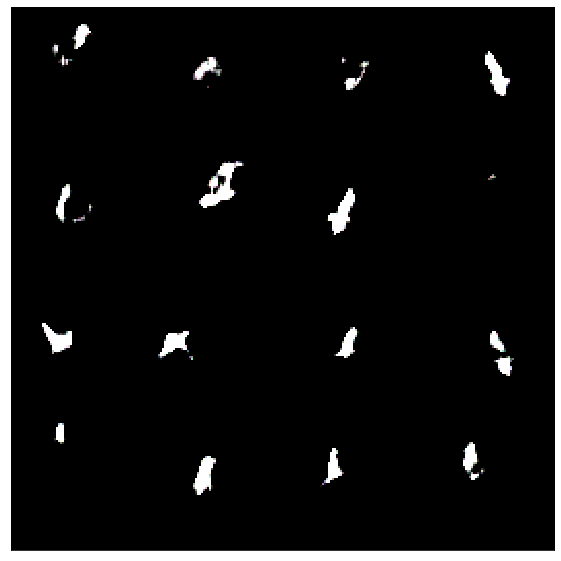

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


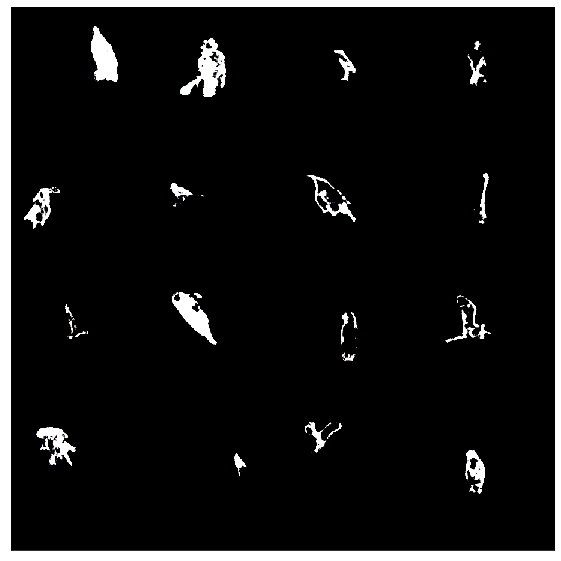

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 9


  0%|                                                                             | 1/17500 [00:14<69:05:00, 14.21s/it]

Train Epoch: 9 [0/280000 (0%)]	Loss: 0.050333
IOU : 0.05859375
IOU : 0.05859375


  0%|▏                                                                              | 53/17500 [00:17<33:07,  8.78it/s]

Train Epoch: 9 [200/280000 (0%)]	Loss: 0.036204
IOU : 0.05120849609375


  1%|▍                                                                             | 102/17500 [00:20<19:39, 14.75it/s]

Train Epoch: 9 [400/280000 (1%)]	Loss: 0.044486
IOU : 0.0495758056640625
IOU : 0.0495758056640625


  1%|▋                                                                             | 153/17500 [00:23<18:22, 15.74it/s]

Train Epoch: 9 [600/280000 (1%)]	Loss: 0.032661
IOU : 0.0486907958984375


  1%|▉                                                                             | 203/17500 [00:26<18:35, 15.50it/s]

Train Epoch: 9 [800/280000 (1%)]	Loss: 0.035195
IOU : 0.0530853271484375
IOU : 0.0530853271484375


  1%|█                                                                             | 250/17500 [00:29<19:08, 15.02it/s]

Train Epoch: 9 [1000/280000 (1%)]	Loss: 0.038126
IOU : 0.0506134033203125


  2%|█▎                                                                            | 303/17500 [00:32<18:24, 15.58it/s]

Train Epoch: 9 [1200/280000 (2%)]	Loss: 0.039849
IOU : 0.052978515625
IOU : 0.052978515625


  2%|█▌                                                                            | 353/17500 [00:35<17:06, 16.70it/s]

Train Epoch: 9 [1400/280000 (2%)]	Loss: 0.042020
IOU : 0.055908203125


  2%|█▊                                                                            | 402/17500 [00:39<18:54, 15.07it/s]

Train Epoch: 9 [1600/280000 (2%)]	Loss: 0.042942
IOU : 0.0577392578125
IOU : 0.0577392578125


  3%|██                                                                            | 451/17500 [00:42<18:54, 15.03it/s]

Train Epoch: 9 [1800/280000 (3%)]	Loss: 0.030048
IOU : 0.048248291015625


  3%|██▏                                                                           | 499/17500 [00:45<17:50, 15.88it/s]

Train Epoch: 9 [2000/280000 (3%)]	Loss: 0.042636
IOU : 0.0525970458984375
IOU : 0.0525970458984375


  3%|██▍                                                                           | 551/17500 [00:48<17:55, 15.76it/s]

Train Epoch: 9 [2200/280000 (3%)]	Loss: 0.035529
IOU : 0.057098388671875


  3%|██▋                                                                           | 599/17500 [00:51<18:11, 15.48it/s]

Train Epoch: 9 [2400/280000 (3%)]	Loss: 0.038268
IOU : 0.05120849609375
IOU : 0.05120849609375


  4%|██▉                                                                           | 651/17500 [00:55<18:55, 14.84it/s]

Train Epoch: 9 [2600/280000 (4%)]	Loss: 0.041168
IOU : 0.054107666015625


  4%|███▏                                                                          | 702/17500 [00:58<15:18, 18.29it/s]

Train Epoch: 9 [2800/280000 (4%)]	Loss: 0.044343
IOU : 0.0626220703125
IOU : 0.0626220703125


  4%|███▎                                                                          | 754/17500 [01:01<18:43, 14.91it/s]

Train Epoch: 9 [3000/280000 (4%)]	Loss: 0.031172
IOU : 0.0526123046875


  5%|███▌                                                                          | 802/17500 [01:04<18:38, 14.93it/s]

Train Epoch: 9 [3200/280000 (5%)]	Loss: 0.041915
IOU : 0.057647705078125
IOU : 0.057647705078125


  5%|███▊                                                                          | 852/17500 [01:08<17:44, 15.63it/s]

Train Epoch: 9 [3400/280000 (5%)]	Loss: 0.030608
IOU : 0.0476837158203125


  5%|████                                                                          | 902/17500 [01:11<17:41, 15.64it/s]

Train Epoch: 9 [3600/280000 (5%)]	Loss: 0.033742
IOU : 0.0549468994140625
IOU : 0.0549468994140625


  5%|████▏                                                                         | 951/17500 [01:14<20:04, 13.74it/s]

Train Epoch: 9 [3800/280000 (5%)]	Loss: 0.033489
IOU : 0.049896240234375


  6%|████▍                                                                        | 1000/17500 [01:17<18:31, 14.84it/s]

Train Epoch: 9 [4000/280000 (6%)]	Loss: 0.034481
IOU : 0.0507965087890625
IOU : 0.0507965087890625


  6%|████▌                                                                        | 1051/17500 [01:20<18:08, 15.11it/s]

Train Epoch: 9 [4200/280000 (6%)]	Loss: 0.039832
IOU : 0.0552978515625


  6%|████▊                                                                        | 1099/17500 [01:23<17:37, 15.51it/s]

Train Epoch: 9 [4400/280000 (6%)]	Loss: 0.028811
IOU : 0.04193115234375
IOU : 0.04193115234375


  7%|█████                                                                        | 1151/17500 [01:27<17:25, 15.64it/s]

Train Epoch: 9 [4600/280000 (7%)]	Loss: 0.032238
IOU : 0.0518951416015625


  7%|█████▎                                                                       | 1204/17500 [01:30<18:23, 14.76it/s]

Train Epoch: 9 [4800/280000 (7%)]	Loss: 0.040642
IOU : 0.0553436279296875
IOU : 0.0553436279296875


  7%|█████▌                                                                       | 1252/17500 [01:33<17:40, 15.32it/s]

Train Epoch: 9 [5000/280000 (7%)]	Loss: 0.037751
IOU : 0.0530548095703125


  7%|█████▋                                                                       | 1299/17500 [01:36<17:57, 15.03it/s]

Train Epoch: 9 [5200/280000 (7%)]	Loss: 0.042668
IOU : 0.053497314453125
IOU : 0.053497314453125


  8%|█████▉                                                                       | 1354/17500 [01:39<14:15, 18.88it/s]

Train Epoch: 9 [5400/280000 (8%)]	Loss: 0.042146
IOU : 0.05975341796875


  8%|██████▏                                                                      | 1402/17500 [01:43<16:25, 16.34it/s]

Train Epoch: 9 [5600/280000 (8%)]	Loss: 0.043343
IOU : 0.0502777099609375
IOU : 0.0502777099609375


  8%|██████▍                                                                      | 1453/17500 [01:46<14:49, 18.03it/s]

Train Epoch: 9 [5800/280000 (8%)]	Loss: 0.035928
IOU : 0.0475311279296875


  9%|██████▌                                                                      | 1503/17500 [01:49<17:57, 14.85it/s]

Train Epoch: 9 [6000/280000 (9%)]	Loss: 0.044330
IOU : 0.063262939453125
IOU : 0.063262939453125


  9%|██████▊                                                                      | 1553/17500 [01:52<18:00, 14.77it/s]

Train Epoch: 9 [6200/280000 (9%)]	Loss: 0.029361
IOU : 0.0556182861328125


  9%|███████                                                                      | 1602/17500 [01:55<16:29, 16.07it/s]

Train Epoch: 9 [6400/280000 (9%)]	Loss: 0.029258
IOU : 0.0548858642578125
IOU : 0.0548858642578125


  9%|███████▎                                                                     | 1653/17500 [01:58<15:30, 17.03it/s]

Train Epoch: 9 [6600/280000 (9%)]	Loss: 0.037847
IOU : 0.04901123046875


 10%|███████▍                                                                     | 1700/17500 [02:01<15:55, 16.54it/s]

Train Epoch: 9 [6800/280000 (10%)]	Loss: 0.035774
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 10%|███████▋                                                                     | 1753/17500 [02:05<15:16, 17.18it/s]

Train Epoch: 9 [7000/280000 (10%)]	Loss: 0.031616
IOU : 0.0503692626953125


 10%|███████▉                                                                     | 1802/17500 [02:08<17:14, 15.17it/s]

Train Epoch: 9 [7200/280000 (10%)]	Loss: 0.042319
IOU : 0.043914794921875
IOU : 0.043914794921875


 11%|████████▏                                                                    | 1852/17500 [02:11<16:20, 15.96it/s]

Train Epoch: 9 [7400/280000 (11%)]	Loss: 0.037703
IOU : 0.0585479736328125


 11%|████████▎                                                                    | 1902/17500 [02:14<15:41, 16.57it/s]

Train Epoch: 9 [7600/280000 (11%)]	Loss: 0.035838
IOU : 0.05267333984375
IOU : 0.05267333984375


 11%|████████▌                                                                    | 1951/17500 [02:18<19:28, 13.31it/s]

Train Epoch: 9 [7800/280000 (11%)]	Loss: 0.042255
IOU : 0.0565032958984375


 11%|████████▊                                                                    | 2000/17500 [02:21<17:44, 14.56it/s]

Train Epoch: 9 [8000/280000 (11%)]	Loss: 0.038817
IOU : 0.056549072265625
IOU : 0.056549072265625


 12%|█████████                                                                    | 2054/17500 [02:24<15:19, 16.80it/s]

Train Epoch: 9 [8200/280000 (12%)]	Loss: 0.049490
IOU : 0.0568084716796875


 12%|█████████▏                                                                   | 2099/17500 [02:27<16:11, 15.86it/s]

Train Epoch: 9 [8400/280000 (12%)]	Loss: 0.040659
IOU : 0.0526123046875
IOU : 0.0526123046875


 12%|█████████▍                                                                   | 2151/17500 [02:30<16:43, 15.30it/s]

Train Epoch: 9 [8600/280000 (12%)]	Loss: 0.033216
IOU : 0.0533905029296875


 13%|█████████▋                                                                   | 2202/17500 [02:33<15:59, 15.95it/s]

Train Epoch: 9 [8800/280000 (13%)]	Loss: 0.029305
IOU : 0.05169677734375
IOU : 0.05169677734375


 13%|█████████▉                                                                   | 2252/17500 [02:37<18:13, 13.94it/s]

Train Epoch: 9 [9000/280000 (13%)]	Loss: 0.031943
IOU : 0.0537567138671875


 13%|██████████▏                                                                  | 2303/17500 [02:40<15:39, 16.17it/s]

Train Epoch: 9 [9200/280000 (13%)]	Loss: 0.049639
IOU : 0.064117431640625
IOU : 0.064117431640625


 13%|██████████▎                                                                  | 2351/17500 [02:43<16:55, 14.91it/s]

Train Epoch: 9 [9400/280000 (13%)]	Loss: 0.033928
IOU : 0.0495758056640625


 14%|██████████▌                                                                  | 2402/17500 [02:46<14:38, 17.18it/s]

Train Epoch: 9 [9600/280000 (14%)]	Loss: 0.039839
IOU : 0.049468994140625
IOU : 0.049468994140625


 14%|██████████▊                                                                  | 2451/17500 [02:49<15:37, 16.05it/s]

Train Epoch: 9 [9800/280000 (14%)]	Loss: 0.052751
IOU : 0.0541839599609375


 14%|███████████                                                                  | 2503/17500 [02:52<15:32, 16.08it/s]

Train Epoch: 9 [10000/280000 (14%)]	Loss: 0.042767
IOU : 0.0545196533203125
IOU : 0.0545196533203125


 15%|███████████▏                                                                 | 2551/17500 [02:55<17:33, 14.19it/s]

Train Epoch: 9 [10200/280000 (15%)]	Loss: 0.069160
IOU : 0.05609130859375


 15%|███████████▍                                                                 | 2602/17500 [02:58<14:22, 17.27it/s]

Train Epoch: 9 [10400/280000 (15%)]	Loss: 0.033612
IOU : 0.047393798828125
IOU : 0.047393798828125


 15%|███████████▋                                                                 | 2654/17500 [03:02<14:48, 16.70it/s]

Train Epoch: 9 [10600/280000 (15%)]	Loss: 0.047438
IOU : 0.057281494140625


 15%|███████████▉                                                                 | 2703/17500 [03:05<15:05, 16.34it/s]

Train Epoch: 9 [10800/280000 (15%)]	Loss: 0.042069
IOU : 0.0562744140625
IOU : 0.0562744140625


 16%|████████████                                                                 | 2751/17500 [03:08<16:12, 15.16it/s]

Train Epoch: 9 [11000/280000 (16%)]	Loss: 0.039015
IOU : 0.0552825927734375


 16%|████████████▎                                                                | 2801/17500 [03:11<14:51, 16.48it/s]

Train Epoch: 9 [11200/280000 (16%)]	Loss: 0.045095
IOU : 0.0526580810546875
IOU : 0.0526580810546875


 16%|████████████▌                                                                | 2851/17500 [03:14<15:10, 16.08it/s]

Train Epoch: 9 [11400/280000 (16%)]	Loss: 0.041596
IOU : 0.050872802734375


 17%|████████████▊                                                                | 2899/17500 [03:17<14:56, 16.29it/s]

Train Epoch: 9 [11600/280000 (17%)]	Loss: 0.048668
IOU : 0.0573577880859375
IOU : 0.0573577880859375


 17%|████████████▉                                                                | 2951/17500 [03:20<15:02, 16.11it/s]

Train Epoch: 9 [11800/280000 (17%)]	Loss: 0.052913
IOU : 0.063629150390625


 17%|█████████████▏                                                               | 2999/17500 [03:23<15:00, 16.10it/s]

Train Epoch: 9 [12000/280000 (17%)]	Loss: 0.035048
IOU : 0.0532684326171875
IOU : 0.0532684326171875


 17%|█████████████▍                                                               | 3051/17500 [03:26<15:11, 15.86it/s]

Train Epoch: 9 [12200/280000 (17%)]	Loss: 0.035823
IOU : 0.0500335693359375


 18%|█████████████▋                                                               | 3099/17500 [03:29<14:13, 16.87it/s]

Train Epoch: 9 [12400/280000 (18%)]	Loss: 0.028927
IOU : 0.051300048828125
IOU : 0.051300048828125


 18%|█████████████▊                                                               | 3151/17500 [03:33<15:35, 15.34it/s]

Train Epoch: 9 [12600/280000 (18%)]	Loss: 0.031556
IOU : 0.0544281005859375


 18%|██████████████                                                               | 3203/17500 [03:36<16:27, 14.48it/s]

Train Epoch: 9 [12800/280000 (18%)]	Loss: 0.032428
IOU : 0.0512237548828125
IOU : 0.0512237548828125


 19%|██████████████▎                                                              | 3251/17500 [03:39<16:34, 14.33it/s]

Train Epoch: 9 [13000/280000 (19%)]	Loss: 0.049812
IOU : 0.0628509521484375


 19%|██████████████▌                                                              | 3299/17500 [03:42<14:53, 15.90it/s]

Train Epoch: 9 [13200/280000 (19%)]	Loss: 0.031726
IOU : 0.0579681396484375
IOU : 0.0579681396484375


 19%|██████████████▋                                                              | 3351/17500 [03:45<14:10, 16.63it/s]

Train Epoch: 9 [13400/280000 (19%)]	Loss: 0.036237
IOU : 0.058319091796875


 19%|██████████████▉                                                              | 3399/17500 [03:48<14:11, 16.56it/s]

Train Epoch: 9 [13600/280000 (19%)]	Loss: 0.037216
IOU : 0.04571533203125
IOU : 0.04571533203125


 20%|███████████████▏                                                             | 3451/17500 [03:51<14:22, 16.30it/s]

Train Epoch: 9 [13800/280000 (20%)]	Loss: 0.044917
IOU : 0.0503692626953125


 20%|███████████████▍                                                             | 3499/17500 [03:54<14:16, 16.34it/s]

Train Epoch: 9 [14000/280000 (20%)]	Loss: 0.026614
IOU : 0.050933837890625
IOU : 0.050933837890625


 20%|███████████████▌                                                             | 3551/17500 [03:57<14:49, 15.68it/s]

Train Epoch: 9 [14200/280000 (20%)]	Loss: 0.039442
IOU : 0.0445556640625


 21%|███████████████▊                                                             | 3599/17500 [04:00<14:32, 15.93it/s]

Train Epoch: 9 [14400/280000 (21%)]	Loss: 0.038375
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 21%|████████████████                                                             | 3651/17500 [04:04<15:07, 15.26it/s]

Train Epoch: 9 [14600/280000 (21%)]	Loss: 0.039781
IOU : 0.05255126953125


 21%|████████████████▎                                                            | 3699/17500 [04:07<14:25, 15.94it/s]

Train Epoch: 9 [14800/280000 (21%)]	Loss: 0.056234
IOU : 0.05194091796875
IOU : 0.05194091796875


 21%|████████████████▌                                                            | 3751/17500 [04:10<14:27, 15.85it/s]

Train Epoch: 9 [15000/280000 (21%)]	Loss: 0.035061
IOU : 0.050933837890625


 22%|████████████████▋                                                            | 3803/17500 [04:13<14:00, 16.30it/s]

Train Epoch: 9 [15200/280000 (22%)]	Loss: 0.043620
IOU : 0.05706787109375
IOU : 0.05706787109375


 22%|████████████████▉                                                            | 3851/17500 [04:16<14:14, 15.97it/s]

Train Epoch: 9 [15400/280000 (22%)]	Loss: 0.035639
IOU : 0.053192138671875


 22%|█████████████████▏                                                           | 3899/17500 [04:19<15:03, 15.06it/s]

Train Epoch: 9 [15600/280000 (22%)]	Loss: 0.040967
IOU : 0.0537872314453125
IOU : 0.0537872314453125


 23%|█████████████████▍                                                           | 3951/17500 [04:23<14:30, 15.56it/s]

Train Epoch: 9 [15800/280000 (23%)]	Loss: 0.036142
IOU : 0.047882080078125


 23%|█████████████████▌                                                           | 4002/17500 [04:26<12:44, 17.65it/s]

Train Epoch: 9 [16000/280000 (23%)]	Loss: 0.052815
IOU : 0.055328369140625
IOU : 0.055328369140625


 23%|█████████████████▊                                                           | 4051/17500 [04:29<13:46, 16.26it/s]

Train Epoch: 9 [16200/280000 (23%)]	Loss: 0.031078
IOU : 0.05078125


 23%|██████████████████                                                           | 4099/17500 [04:32<13:29, 16.56it/s]

Train Epoch: 9 [16400/280000 (23%)]	Loss: 0.038352
IOU : 0.052276611328125
IOU : 0.052276611328125


 24%|██████████████████▎                                                          | 4151/17500 [04:35<15:43, 14.14it/s]

Train Epoch: 9 [16600/280000 (24%)]	Loss: 0.044241
IOU : 0.05645751953125


 24%|██████████████████▍                                                          | 4201/17500 [04:38<16:02, 13.82it/s]

Train Epoch: 9 [16800/280000 (24%)]	Loss: 0.038644
IOU : 0.0538482666015625
IOU : 0.0538482666015625


 24%|██████████████████▋                                                          | 4253/17500 [04:41<13:42, 16.10it/s]

Train Epoch: 9 [17000/280000 (24%)]	Loss: 0.039491
IOU : 0.057647705078125


 25%|██████████████████▉                                                          | 4303/17500 [04:44<13:34, 16.20it/s]

Train Epoch: 9 [17200/280000 (25%)]	Loss: 0.034955
IOU : 0.0537109375
IOU : 0.0537109375


 25%|███████████████████▏                                                         | 4352/17500 [04:48<15:01, 14.59it/s]

Train Epoch: 9 [17400/280000 (25%)]	Loss: 0.044553
IOU : 0.046356201171875


 25%|███████████████████▎                                                         | 4403/17500 [04:51<14:13, 15.35it/s]

Train Epoch: 9 [17600/280000 (25%)]	Loss: 0.041577
IOU : 0.0508575439453125
IOU : 0.0508575439453125


 25%|███████████████████▌                                                         | 4452/17500 [04:54<14:44, 14.75it/s]

Train Epoch: 9 [17800/280000 (25%)]	Loss: 0.053066
IOU : 0.0555877685546875


 26%|███████████████████▊                                                         | 4503/17500 [04:57<13:27, 16.09it/s]

Train Epoch: 9 [18000/280000 (26%)]	Loss: 0.042931
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 26%|████████████████████                                                         | 4551/17500 [05:00<15:09, 14.25it/s]

Train Epoch: 9 [18200/280000 (26%)]	Loss: 0.043061
IOU : 0.0518035888671875


 26%|████████████████████▎                                                        | 4604/17500 [05:03<13:39, 15.74it/s]

Train Epoch: 9 [18400/280000 (26%)]	Loss: 0.032280
IOU : 0.0460205078125
IOU : 0.0460205078125


 27%|████████████████████▍                                                        | 4652/17500 [05:06<14:10, 15.11it/s]

Train Epoch: 9 [18600/280000 (27%)]	Loss: 0.035972
IOU : 0.0526885986328125


 27%|████████████████████▋                                                        | 4704/17500 [05:10<13:39, 15.61it/s]

Train Epoch: 9 [18800/280000 (27%)]	Loss: 0.028477
IOU : 0.0452423095703125
IOU : 0.0452423095703125


 27%|████████████████████▉                                                        | 4753/17500 [05:13<13:32, 15.68it/s]

Train Epoch: 9 [19000/280000 (27%)]	Loss: 0.038273
IOU : 0.05682373046875


 27%|█████████████████████▏                                                       | 4804/17500 [05:16<12:53, 16.41it/s]

Train Epoch: 9 [19200/280000 (27%)]	Loss: 0.042369
IOU : 0.0540618896484375
IOU : 0.0540618896484375


 28%|█████████████████████▎                                                       | 4853/17500 [05:19<12:48, 16.45it/s]

Train Epoch: 9 [19400/280000 (28%)]	Loss: 0.053778
IOU : 0.0585784912109375


 28%|█████████████████████▌                                                       | 4899/17500 [05:22<13:29, 15.56it/s]

Train Epoch: 9 [19600/280000 (28%)]	Loss: 0.031488
IOU : 0.0462188720703125
IOU : 0.0462188720703125


 28%|█████████████████████▊                                                       | 4951/17500 [05:25<13:01, 16.05it/s]

Train Epoch: 9 [19800/280000 (28%)]	Loss: 0.046976
IOU : 0.058929443359375


 29%|█████████████████████▉                                                       | 4999/17500 [05:28<12:56, 16.11it/s]

Train Epoch: 9 [20000/280000 (29%)]	Loss: 0.051265
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 29%|██████████████████████▏                                                      | 5051/17500 [05:31<12:54, 16.08it/s]

Train Epoch: 9 [20200/280000 (29%)]	Loss: 0.029273
IOU : 0.0484466552734375


 29%|██████████████████████▍                                                      | 5099/17500 [05:34<12:52, 16.05it/s]

Train Epoch: 9 [20400/280000 (29%)]	Loss: 0.034168
IOU : 0.055877685546875
IOU : 0.055877685546875


 29%|██████████████████████▋                                                      | 5151/17500 [05:38<12:49, 16.05it/s]

Train Epoch: 9 [20600/280000 (29%)]	Loss: 0.042945
IOU : 0.055206298828125


 30%|██████████████████████▉                                                      | 5202/17500 [05:41<10:58, 18.67it/s]

Train Epoch: 9 [20800/280000 (30%)]	Loss: 0.031536
IOU : 0.0503082275390625
IOU : 0.0503082275390625


 30%|███████████████████████                                                      | 5251/17500 [05:44<12:58, 15.74it/s]

Train Epoch: 9 [21000/280000 (30%)]	Loss: 0.031769
IOU : 0.0477294921875


 30%|███████████████████████▎                                                     | 5299/17500 [05:47<11:53, 17.09it/s]

Train Epoch: 9 [21200/280000 (30%)]	Loss: 0.040299
IOU : 0.0519866943359375
IOU : 0.0519866943359375


 31%|███████████████████████▌                                                     | 5351/17500 [05:50<12:37, 16.04it/s]

Train Epoch: 9 [21400/280000 (31%)]	Loss: 0.049637
IOU : 0.0612640380859375


 31%|███████████████████████▊                                                     | 5399/17500 [05:53<12:33, 16.06it/s]

Train Epoch: 9 [21600/280000 (31%)]	Loss: 0.043546
IOU : 0.0617828369140625
IOU : 0.0617828369140625


 31%|███████████████████████▉                                                     | 5451/17500 [05:56<12:23, 16.21it/s]

Train Epoch: 9 [21800/280000 (31%)]	Loss: 0.046821
IOU : 0.0495147705078125


 31%|████████████████████████▏                                                    | 5499/17500 [05:59<12:07, 16.49it/s]

Train Epoch: 9 [22000/280000 (31%)]	Loss: 0.049405
IOU : 0.0535888671875
IOU : 0.0535888671875


 32%|████████████████████████▍                                                    | 5551/17500 [06:02<12:04, 16.50it/s]

Train Epoch: 9 [22200/280000 (32%)]	Loss: 0.036169
IOU : 0.05633544921875


 32%|████████████████████████▋                                                    | 5599/17500 [06:05<12:22, 16.03it/s]

Train Epoch: 9 [22400/280000 (32%)]	Loss: 0.040852
IOU : 0.057525634765625
IOU : 0.057525634765625


 32%|████████████████████████▊                                                    | 5651/17500 [06:08<12:07, 16.28it/s]

Train Epoch: 9 [22600/280000 (32%)]	Loss: 0.032422
IOU : 0.053314208984375


 33%|█████████████████████████                                                    | 5699/17500 [06:11<12:18, 15.99it/s]

Train Epoch: 9 [22800/280000 (33%)]	Loss: 0.034384
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 33%|█████████████████████████▎                                                   | 5751/17500 [06:15<12:36, 15.53it/s]

Train Epoch: 9 [23000/280000 (33%)]	Loss: 0.047666
IOU : 0.050689697265625


 33%|█████████████████████████▌                                                   | 5799/17500 [06:18<12:14, 15.94it/s]

Train Epoch: 9 [23200/280000 (33%)]	Loss: 0.047329
IOU : 0.0630340576171875
IOU : 0.0630340576171875


 33%|█████████████████████████▋                                                   | 5851/17500 [06:21<12:05, 16.06it/s]

Train Epoch: 9 [23400/280000 (33%)]	Loss: 0.027432
IOU : 0.042999267578125


 34%|█████████████████████████▉                                                   | 5899/17500 [06:24<12:38, 15.30it/s]

Train Epoch: 9 [23600/280000 (34%)]	Loss: 0.052297
IOU : 0.0608978271484375
IOU : 0.0608978271484375


 34%|██████████████████████████▏                                                  | 5951/17500 [06:27<12:19, 15.62it/s]

Train Epoch: 9 [23800/280000 (34%)]	Loss: 0.039944
IOU : 0.058258056640625


 34%|██████████████████████████▍                                                  | 5999/17500 [06:30<12:56, 14.80it/s]

Train Epoch: 9 [24000/280000 (34%)]	Loss: 0.047208
IOU : 0.0606231689453125
IOU : 0.0606231689453125


 35%|██████████████████████████▌                                                  | 6051/17500 [06:33<11:44, 16.24it/s]

Train Epoch: 9 [24200/280000 (35%)]	Loss: 0.024743
IOU : 0.0456085205078125


 35%|██████████████████████████▊                                                  | 6099/17500 [06:36<11:38, 16.32it/s]

Train Epoch: 9 [24400/280000 (35%)]	Loss: 0.041339
IOU : 0.049774169921875
IOU : 0.049774169921875


 35%|███████████████████████████                                                  | 6151/17500 [06:40<11:23, 16.61it/s]

Train Epoch: 9 [24600/280000 (35%)]	Loss: 0.030595
IOU : 0.04742431640625


 35%|███████████████████████████▎                                                 | 6203/17500 [06:43<11:20, 16.60it/s]

Train Epoch: 9 [24800/280000 (35%)]	Loss: 0.029403
IOU : 0.050933837890625
IOU : 0.050933837890625


 36%|███████████████████████████▌                                                 | 6251/17500 [06:46<11:50, 15.84it/s]

Train Epoch: 9 [25000/280000 (36%)]	Loss: 0.063543
IOU : 0.0530548095703125


 36%|███████████████████████████▋                                                 | 6299/17500 [06:49<10:58, 17.01it/s]

Train Epoch: 9 [25200/280000 (36%)]	Loss: 0.037092
IOU : 0.0554046630859375
IOU : 0.0554046630859375


 36%|███████████████████████████▉                                                 | 6354/17500 [06:52<12:35, 14.76it/s]

Train Epoch: 9 [25400/280000 (36%)]	Loss: 0.043942
IOU : 0.0511474609375


 37%|████████████████████████████▏                                                | 6400/17500 [06:55<12:51, 14.39it/s]

Train Epoch: 9 [25600/280000 (37%)]	Loss: 0.033782
IOU : 0.0561065673828125
IOU : 0.0561065673828125


 37%|████████████████████████████▍                                                | 6451/17500 [06:58<11:39, 15.79it/s]

Train Epoch: 9 [25800/280000 (37%)]	Loss: 0.045619
IOU : 0.0599365234375


 37%|████████████████████████████▌                                                | 6499/17500 [07:01<11:01, 16.62it/s]

Train Epoch: 9 [26000/280000 (37%)]	Loss: 0.031163
IOU : 0.0436248779296875
IOU : 0.0436248779296875


 37%|████████████████████████████▊                                                | 6551/17500 [07:04<11:00, 16.57it/s]

Train Epoch: 9 [26200/280000 (37%)]	Loss: 0.027223
IOU : 0.0506439208984375


 38%|█████████████████████████████                                                | 6604/17500 [07:07<11:09, 16.27it/s]

Train Epoch: 9 [26400/280000 (38%)]	Loss: 0.042183
IOU : 0.0543212890625
IOU : 0.0543212890625


 38%|█████████████████████████████▎                                               | 6651/17500 [07:10<13:12, 13.69it/s]

Train Epoch: 9 [26600/280000 (38%)]	Loss: 0.036864
IOU : 0.058990478515625


 38%|█████████████████████████████▍                                               | 6699/17500 [07:13<10:59, 16.38it/s]

Train Epoch: 9 [26800/280000 (38%)]	Loss: 0.068443
IOU : 0.054412841796875
IOU : 0.054412841796875


 39%|█████████████████████████████▋                                               | 6751/17500 [07:17<10:48, 16.58it/s]

Train Epoch: 9 [27000/280000 (39%)]	Loss: 0.045414
IOU : 0.057281494140625


 39%|█████████████████████████████▉                                               | 6799/17500 [07:20<10:31, 16.95it/s]

Train Epoch: 9 [27200/280000 (39%)]	Loss: 0.058913
IOU : 0.0652618408203125
IOU : 0.0652618408203125


 39%|██████████████████████████████▏                                              | 6851/17500 [07:23<15:41, 11.31it/s]

Train Epoch: 9 [27400/280000 (39%)]	Loss: 0.030647
IOU : 0.0475921630859375


 39%|██████████████████████████████▎                                              | 6903/17500 [07:26<11:58, 14.75it/s]

Train Epoch: 9 [27600/280000 (39%)]	Loss: 0.040542
IOU : 0.0519256591796875
IOU : 0.0519256591796875


 40%|██████████████████████████████▌                                              | 6951/17500 [07:29<11:13, 15.66it/s]

Train Epoch: 9 [27800/280000 (40%)]	Loss: 0.058431
IOU : 0.0644989013671875


 40%|██████████████████████████████▊                                              | 6999/17500 [07:32<11:03, 15.83it/s]

Train Epoch: 9 [28000/280000 (40%)]	Loss: 0.037858
IOU : 0.0468902587890625
IOU : 0.0468902587890625


 40%|███████████████████████████████                                              | 7051/17500 [07:35<10:37, 16.39it/s]

Train Epoch: 9 [28200/280000 (40%)]	Loss: 0.048731
IOU : 0.054046630859375


 41%|███████████████████████████████▏                                             | 7099/17500 [07:38<10:34, 16.38it/s]

Train Epoch: 9 [28400/280000 (41%)]	Loss: 0.049892
IOU : 0.0494842529296875
IOU : 0.0494842529296875


 41%|███████████████████████████████▍                                             | 7151/17500 [07:41<10:48, 15.97it/s]

Train Epoch: 9 [28600/280000 (41%)]	Loss: 0.031836
IOU : 0.054901123046875


 41%|███████████████████████████████▋                                             | 7203/17500 [07:44<10:36, 16.19it/s]

Train Epoch: 9 [28800/280000 (41%)]	Loss: 0.036882
IOU : 0.0539398193359375
IOU : 0.0539398193359375


 41%|███████████████████████████████▉                                             | 7251/17500 [07:47<10:09, 16.81it/s]

Train Epoch: 9 [29000/280000 (41%)]	Loss: 0.035364
IOU : 0.04351806640625


 42%|████████████████████████████████                                             | 7299/17500 [07:50<10:41, 15.91it/s]

Train Epoch: 9 [29200/280000 (42%)]	Loss: 0.052386
IOU : 0.057159423828125
IOU : 0.057159423828125


 42%|████████████████████████████████▎                                            | 7351/17500 [07:53<10:29, 16.12it/s]

Train Epoch: 9 [29400/280000 (42%)]	Loss: 0.041635
IOU : 0.05133056640625


 42%|████████████████████████████████▌                                            | 7399/17500 [07:56<10:23, 16.21it/s]

Train Epoch: 9 [29600/280000 (42%)]	Loss: 0.068311
IOU : 0.059356689453125
IOU : 0.059356689453125


 43%|████████████████████████████████▊                                            | 7451/17500 [08:00<10:21, 16.16it/s]

Train Epoch: 9 [29800/280000 (43%)]	Loss: 0.035794
IOU : 0.0504302978515625


 43%|█████████████████████████████████                                            | 7502/17500 [08:03<08:46, 19.00it/s]

Train Epoch: 9 [30000/280000 (43%)]	Loss: 0.035448
IOU : 0.0477294921875
IOU : 0.0477294921875


 43%|█████████████████████████████████▏                                           | 7551/17500 [08:06<10:49, 15.32it/s]

Train Epoch: 9 [30200/280000 (43%)]	Loss: 0.036883
IOU : 0.0453338623046875


 43%|█████████████████████████████████▍                                           | 7603/17500 [08:09<09:39, 17.07it/s]

Train Epoch: 9 [30400/280000 (43%)]	Loss: 0.050143
IOU : 0.059783935546875
IOU : 0.059783935546875


 44%|█████████████████████████████████▋                                           | 7651/17500 [08:12<10:28, 15.68it/s]

Train Epoch: 9 [30600/280000 (44%)]	Loss: 0.052273
IOU : 0.0539093017578125


 44%|█████████████████████████████████▉                                           | 7702/17500 [08:15<08:35, 19.02it/s]

Train Epoch: 9 [30800/280000 (44%)]	Loss: 0.031423
IOU : 0.052337646484375
IOU : 0.052337646484375


 44%|██████████████████████████████████                                           | 7751/17500 [08:18<10:01, 16.20it/s]

Train Epoch: 9 [31000/280000 (44%)]	Loss: 0.062463
IOU : 0.0611724853515625


 45%|██████████████████████████████████▎                                          | 7803/17500 [08:21<10:06, 16.00it/s]

Train Epoch: 9 [31200/280000 (45%)]	Loss: 0.026992
IOU : 0.0523681640625
IOU : 0.0523681640625


 45%|██████████████████████████████████▌                                          | 7851/17500 [08:24<09:53, 16.26it/s]

Train Epoch: 9 [31400/280000 (45%)]	Loss: 0.026358
IOU : 0.04949951171875


 45%|██████████████████████████████████▊                                          | 7902/17500 [08:27<08:30, 18.80it/s]

Train Epoch: 9 [31600/280000 (45%)]	Loss: 0.034257
IOU : 0.0550537109375
IOU : 0.0550537109375


 45%|██████████████████████████████████▉                                          | 7951/17500 [08:30<09:40, 16.45it/s]

Train Epoch: 9 [31800/280000 (45%)]	Loss: 0.046606
IOU : 0.0547637939453125


 46%|███████████████████████████████████▏                                         | 8002/17500 [08:33<08:33, 18.51it/s]

Train Epoch: 9 [32000/280000 (46%)]	Loss: 0.038579
IOU : 0.054046630859375
IOU : 0.054046630859375


 46%|███████████████████████████████████▍                                         | 8051/17500 [08:36<10:05, 15.61it/s]

Train Epoch: 9 [32200/280000 (46%)]	Loss: 0.068024
IOU : 0.060699462890625


 46%|███████████████████████████████████▋                                         | 8103/17500 [08:40<09:23, 16.69it/s]

Train Epoch: 9 [32400/280000 (46%)]	Loss: 0.051677
IOU : 0.071685791015625
IOU : 0.071685791015625


 47%|███████████████████████████████████▊                                         | 8151/17500 [08:43<09:51, 15.80it/s]

Train Epoch: 9 [32600/280000 (47%)]	Loss: 0.031504
IOU : 0.049285888671875


 47%|████████████████████████████████████                                         | 8199/17500 [08:45<09:38, 16.08it/s]

Train Epoch: 9 [32800/280000 (47%)]	Loss: 0.030917
IOU : 0.0527191162109375
IOU : 0.0527191162109375


 47%|████████████████████████████████████▎                                        | 8251/17500 [08:49<09:31, 16.17it/s]

Train Epoch: 9 [33000/280000 (47%)]	Loss: 0.046317
IOU : 0.05389404296875


 47%|████████████████████████████████████▌                                        | 8302/17500 [08:52<08:18, 18.46it/s]

Train Epoch: 9 [33200/280000 (47%)]	Loss: 0.035305
IOU : 0.0506134033203125
IOU : 0.0506134033203125


 48%|████████████████████████████████████▋                                        | 8351/17500 [08:55<09:28, 16.10it/s]

Train Epoch: 9 [33400/280000 (48%)]	Loss: 0.041985
IOU : 0.06060791015625


 48%|████████████████████████████████████▉                                        | 8403/17500 [08:58<09:26, 16.07it/s]

Train Epoch: 9 [33600/280000 (48%)]	Loss: 0.039827
IOU : 0.0556182861328125
IOU : 0.0556182861328125


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:01<09:19, 16.16it/s]

Train Epoch: 9 [33800/280000 (48%)]	Loss: 0.032890
IOU : 0.0564422607421875


 49%|█████████████████████████████████████▍                                       | 8499/17500 [09:04<09:11, 16.33it/s]

Train Epoch: 9 [34000/280000 (49%)]	Loss: 0.045286
IOU : 0.0625152587890625
IOU : 0.0625152587890625


 49%|█████████████████████████████████████▌                                       | 8551/17500 [09:07<09:10, 16.26it/s]

Train Epoch: 9 [34200/280000 (49%)]	Loss: 0.038600
IOU : 0.046905517578125


 49%|█████████████████████████████████████▊                                       | 8603/17500 [09:10<09:20, 15.88it/s]

Train Epoch: 9 [34400/280000 (49%)]	Loss: 0.034807
IOU : 0.0533599853515625
IOU : 0.0533599853515625


 49%|██████████████████████████████████████                                       | 8651/17500 [09:13<09:34, 15.41it/s]

Train Epoch: 9 [34600/280000 (49%)]	Loss: 0.049294
IOU : 0.055145263671875


 50%|██████████████████████████████████████▎                                      | 8703/17500 [09:16<08:49, 16.60it/s]

Train Epoch: 9 [34800/280000 (50%)]	Loss: 0.043211
IOU : 0.0522613525390625
IOU : 0.0522613525390625


 50%|██████████████████████████████████████▌                                      | 8751/17500 [09:19<09:21, 15.59it/s]

Train Epoch: 9 [35000/280000 (50%)]	Loss: 0.039634
IOU : 0.0472564697265625


 50%|██████████████████████████████████████▋                                      | 8799/17500 [09:22<08:48, 16.45it/s]

Train Epoch: 9 [35200/280000 (50%)]	Loss: 0.039952
IOU : 0.048553466796875
IOU : 0.048553466796875


 51%|██████████████████████████████████████▉                                      | 8852/17500 [09:26<11:23, 12.66it/s]

Train Epoch: 9 [35400/280000 (51%)]	Loss: 0.042137
IOU : 0.058197021484375


 51%|███████████████████████████████████████▏                                     | 8899/17500 [09:29<09:02, 15.87it/s]

Train Epoch: 9 [35600/280000 (51%)]	Loss: 0.037383
IOU : 0.0483551025390625
IOU : 0.0483551025390625


 51%|███████████████████████████████████████▍                                     | 8951/17500 [09:32<08:49, 16.14it/s]

Train Epoch: 9 [35800/280000 (51%)]	Loss: 0.041934
IOU : 0.0581512451171875


 51%|███████████████████████████████████████▌                                     | 9002/17500 [09:35<07:40, 18.44it/s]

Train Epoch: 9 [36000/280000 (51%)]	Loss: 0.059656
IOU : 0.05706787109375
IOU : 0.05706787109375


 52%|███████████████████████████████████████▊                                     | 9051/17500 [09:38<09:00, 15.63it/s]

Train Epoch: 9 [36200/280000 (52%)]	Loss: 0.042582
IOU : 0.0525054931640625


 52%|████████████████████████████████████████                                     | 9099/17500 [09:41<08:21, 16.74it/s]

Train Epoch: 9 [36400/280000 (52%)]	Loss: 0.036116
IOU : 0.056243896484375
IOU : 0.056243896484375


 52%|████████████████████████████████████████▎                                    | 9151/17500 [09:44<08:13, 16.93it/s]

Train Epoch: 9 [36600/280000 (52%)]	Loss: 0.036797
IOU : 0.0467529296875


 53%|████████████████████████████████████████▍                                    | 9200/17500 [09:47<09:11, 15.05it/s]

Train Epoch: 9 [36800/280000 (53%)]	Loss: 0.034352
IOU : 0.0558319091796875
IOU : 0.0558319091796875


 53%|████████████████████████████████████████▋                                    | 9251/17500 [09:50<08:39, 15.87it/s]

Train Epoch: 9 [37000/280000 (53%)]	Loss: 0.027528
IOU : 0.0491790771484375


 53%|████████████████████████████████████████▉                                    | 9303/17500 [09:53<08:09, 16.75it/s]

Train Epoch: 9 [37200/280000 (53%)]	Loss: 0.049901
IOU : 0.051239013671875
IOU : 0.051239013671875


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [09:56<08:17, 16.38it/s]

Train Epoch: 9 [37400/280000 (53%)]	Loss: 0.039863
IOU : 0.05194091796875


 54%|█████████████████████████████████████████▎                                   | 9399/17500 [09:59<08:07, 16.60it/s]

Train Epoch: 9 [37600/280000 (54%)]	Loss: 0.043405
IOU : 0.056304931640625
IOU : 0.056304931640625


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [10:02<08:09, 16.46it/s]

Train Epoch: 9 [37800/280000 (54%)]	Loss: 0.041999
IOU : 0.0552215576171875


 54%|█████████████████████████████████████████▊                                   | 9503/17500 [10:06<08:01, 16.62it/s]

Train Epoch: 9 [38000/280000 (54%)]	Loss: 0.055753
IOU : 0.054412841796875
IOU : 0.054412841796875


 55%|██████████████████████████████████████████                                   | 9551/17500 [10:09<08:03, 16.44it/s]

Train Epoch: 9 [38200/280000 (55%)]	Loss: 0.039671
IOU : 0.051910400390625


 55%|██████████████████████████████████████████▏                                  | 9599/17500 [10:12<08:00, 16.44it/s]

Train Epoch: 9 [38400/280000 (55%)]	Loss: 0.027330
IOU : 0.0464019775390625
IOU : 0.0464019775390625


 55%|██████████████████████████████████████████▍                                  | 9655/17500 [10:15<11:00, 11.87it/s]

Train Epoch: 9 [38600/280000 (55%)]	Loss: 0.053093
IOU : 0.054473876953125


 55%|██████████████████████████████████████████▋                                  | 9699/17500 [10:18<07:54, 16.45it/s]

Train Epoch: 9 [38800/280000 (55%)]	Loss: 0.026714
IOU : 0.03863525390625
IOU : 0.03863525390625


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [10:21<07:37, 16.94it/s]

Train Epoch: 9 [39000/280000 (56%)]	Loss: 0.029699
IOU : 0.0519256591796875


 56%|███████████████████████████████████████████▏                                 | 9803/17500 [10:24<08:13, 15.60it/s]

Train Epoch: 9 [39200/280000 (56%)]	Loss: 0.035463
IOU : 0.05426025390625
IOU : 0.05426025390625


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [10:27<09:50, 12.96it/s]

Train Epoch: 9 [39400/280000 (56%)]	Loss: 0.040951
IOU : 0.0581817626953125


 57%|███████████████████████████████████████████▌                                 | 9903/17500 [10:30<07:37, 16.62it/s]

Train Epoch: 9 [39600/280000 (57%)]	Loss: 0.038889
IOU : 0.053619384765625
IOU : 0.053619384765625


 57%|███████████████████████████████████████████▊                                 | 9954/17500 [10:33<07:58, 15.76it/s]

Train Epoch: 9 [39800/280000 (57%)]	Loss: 0.040933
IOU : 0.0456390380859375


 57%|███████████████████████████████████████████▍                                | 10002/17500 [10:36<08:07, 15.38it/s]

Train Epoch: 9 [40000/280000 (57%)]	Loss: 0.046606
IOU : 0.06036376953125
IOU : 0.06036376953125


 57%|███████████████████████████████████████████▋                                | 10052/17500 [10:39<06:53, 18.03it/s]

Train Epoch: 9 [40200/280000 (57%)]	Loss: 0.037325
IOU : 0.050048828125


 58%|███████████████████████████████████████████▉                                | 10103/17500 [10:42<07:46, 15.85it/s]

Train Epoch: 9 [40400/280000 (58%)]	Loss: 0.051013
IOU : 0.0596160888671875
IOU : 0.0596160888671875


 58%|████████████████████████████████████████████                                | 10150/17500 [10:45<08:29, 14.43it/s]

Train Epoch: 9 [40600/280000 (58%)]	Loss: 0.030228
IOU : 0.0501708984375


 58%|████████████████████████████████████████████▎                               | 10201/17500 [10:48<06:59, 17.38it/s]

Train Epoch: 9 [40800/280000 (58%)]	Loss: 0.034397
IOU : 0.0468292236328125
IOU : 0.0468292236328125


 59%|████████████████████████████████████████████▌                               | 10251/17500 [10:52<08:03, 15.00it/s]

Train Epoch: 9 [41000/280000 (59%)]	Loss: 0.033763
IOU : 0.05047607421875


 59%|████████████████████████████████████████████▋                               | 10299/17500 [10:54<07:36, 15.77it/s]

Train Epoch: 9 [41200/280000 (59%)]	Loss: 0.034004
IOU : 0.05059814453125
IOU : 0.05059814453125


 59%|████████████████████████████████████████████▉                               | 10351/17500 [10:58<07:53, 15.09it/s]

Train Epoch: 9 [41400/280000 (59%)]	Loss: 0.044908
IOU : 0.0586090087890625


 59%|█████████████████████████████████████████████▏                              | 10402/17500 [11:01<06:33, 18.04it/s]

Train Epoch: 9 [41600/280000 (59%)]	Loss: 0.048560
IOU : 0.057159423828125
IOU : 0.057159423828125


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [11:04<08:15, 14.23it/s]

Train Epoch: 9 [41800/280000 (60%)]	Loss: 0.035648
IOU : 0.056060791015625


 60%|█████████████████████████████████████████████▌                              | 10499/17500 [11:07<07:00, 16.67it/s]

Train Epoch: 9 [42000/280000 (60%)]	Loss: 0.034961
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 60%|█████████████████████████████████████████████▊                              | 10551/17500 [11:10<06:57, 16.63it/s]

Train Epoch: 9 [42200/280000 (60%)]	Loss: 0.054645
IOU : 0.0567474365234375


 61%|██████████████████████████████████████████████                              | 10599/17500 [11:13<07:06, 16.20it/s]

Train Epoch: 9 [42400/280000 (61%)]	Loss: 0.049632
IOU : 0.0654754638671875
IOU : 0.0654754638671875


 61%|██████████████████████████████████████████████▎                             | 10652/17500 [11:16<07:37, 14.98it/s]

Train Epoch: 9 [42600/280000 (61%)]	Loss: 0.045917
IOU : 0.0582122802734375


 61%|██████████████████████████████████████████████▍                             | 10699/17500 [11:19<07:14, 15.66it/s]

Train Epoch: 9 [42800/280000 (61%)]	Loss: 0.032716
IOU : 0.048980712890625
IOU : 0.048980712890625


 61%|██████████████████████████████████████████████▋                             | 10751/17500 [11:22<07:01, 16.00it/s]

Train Epoch: 9 [43000/280000 (61%)]	Loss: 0.038373
IOU : 0.054962158203125


 62%|██████████████████████████████████████████████▉                             | 10799/17500 [11:25<06:44, 16.55it/s]

Train Epoch: 9 [43200/280000 (62%)]	Loss: 0.029319
IOU : 0.0543975830078125
IOU : 0.0543975830078125


 62%|███████████████████████████████████████████████▏                            | 10854/17500 [11:29<06:34, 16.83it/s]

Train Epoch: 9 [43400/280000 (62%)]	Loss: 0.037367
IOU : 0.0488433837890625


 62%|███████████████████████████████████████████████▎                            | 10899/17500 [11:31<06:30, 16.92it/s]

Train Epoch: 9 [43600/280000 (62%)]	Loss: 0.029620
IOU : 0.051910400390625
IOU : 0.051910400390625


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [11:35<07:35, 14.39it/s]

Train Epoch: 9 [43800/280000 (63%)]	Loss: 0.037831
IOU : 0.0472412109375


 63%|███████████████████████████████████████████████▊                            | 11003/17500 [11:38<06:24, 16.90it/s]

Train Epoch: 9 [44000/280000 (63%)]	Loss: 0.054901
IOU : 0.05096435546875
IOU : 0.05096435546875


 63%|███████████████████████████████████████████████▉                            | 11051/17500 [11:41<06:24, 16.77it/s]

Train Epoch: 9 [44200/280000 (63%)]	Loss: 0.031449
IOU : 0.0432281494140625


 63%|████████████████████████████████████████████████▏                           | 11103/17500 [11:44<06:22, 16.73it/s]

Train Epoch: 9 [44400/280000 (63%)]	Loss: 0.050727
IOU : 0.0580596923828125
IOU : 0.0580596923828125


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [11:47<06:46, 15.62it/s]

Train Epoch: 9 [44600/280000 (64%)]	Loss: 0.040212
IOU : 0.0540313720703125


 64%|████████████████████████████████████████████████▋                           | 11199/17500 [11:50<06:20, 16.58it/s]

Train Epoch: 9 [44800/280000 (64%)]	Loss: 0.052827
IOU : 0.058319091796875
IOU : 0.058319091796875


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [11:53<06:49, 15.27it/s]

Train Epoch: 9 [45000/280000 (64%)]	Loss: 0.035111
IOU : 0.0490570068359375


 65%|█████████████████████████████████████████████████                           | 11302/17500 [11:56<05:28, 18.90it/s]

Train Epoch: 9 [45200/280000 (65%)]	Loss: 0.034309
IOU : 0.0545196533203125
IOU : 0.0545196533203125


 65%|█████████████████████████████████████████████████▎                          | 11351/17500 [11:59<06:19, 16.22it/s]

Train Epoch: 9 [45400/280000 (65%)]	Loss: 0.048078
IOU : 0.060577392578125


 65%|█████████████████████████████████████████████████▌                          | 11399/17500 [12:02<06:10, 16.45it/s]

Train Epoch: 9 [45600/280000 (65%)]	Loss: 0.049797
IOU : 0.0569610595703125
IOU : 0.0569610595703125


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [12:06<06:15, 16.13it/s]

Train Epoch: 9 [45800/280000 (65%)]	Loss: 0.028967
IOU : 0.04681396484375


 66%|█████████████████████████████████████████████████▉                          | 11499/17500 [12:09<06:01, 16.58it/s]

Train Epoch: 9 [46000/280000 (66%)]	Loss: 0.049134
IOU : 0.052459716796875
IOU : 0.052459716796875


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [12:12<06:36, 14.99it/s]

Train Epoch: 9 [46200/280000 (66%)]	Loss: 0.031960
IOU : 0.0495147705078125


 66%|██████████████████████████████████████████████████▎                         | 11599/17500 [12:15<05:57, 16.52it/s]

Train Epoch: 9 [46400/280000 (66%)]	Loss: 0.035655
IOU : 0.0462188720703125
IOU : 0.0462188720703125


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [12:18<06:10, 15.79it/s]

Train Epoch: 9 [46600/280000 (67%)]	Loss: 0.035137
IOU : 0.0542449951171875


 67%|██████████████████████████████████████████████████▊                         | 11699/17500 [12:21<05:37, 17.16it/s]

Train Epoch: 9 [46800/280000 (67%)]	Loss: 0.042147
IOU : 0.051116943359375
IOU : 0.051116943359375


 67%|███████████████████████████████████████████████████                         | 11751/17500 [12:24<06:06, 15.70it/s]

Train Epoch: 9 [47000/280000 (67%)]	Loss: 0.034344
IOU : 0.050201416015625


 67%|███████████████████████████████████████████████████▎                        | 11803/17500 [12:27<05:48, 16.36it/s]

Train Epoch: 9 [47200/280000 (67%)]	Loss: 0.050073
IOU : 0.052886962890625
IOU : 0.052886962890625


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [12:30<07:12, 13.06it/s]

Train Epoch: 9 [47400/280000 (68%)]	Loss: 0.032799
IOU : 0.04327392578125


 68%|███████████████████████████████████████████████████▋                        | 11899/17500 [12:33<05:35, 16.70it/s]

Train Epoch: 9 [47600/280000 (68%)]	Loss: 0.032357
IOU : 0.047271728515625
IOU : 0.047271728515625


 68%|███████████████████████████████████████████████████▉                        | 11951/17500 [12:37<05:33, 16.65it/s]

Train Epoch: 9 [47800/280000 (68%)]	Loss: 0.058832
IOU : 0.0606689453125


 69%|████████████████████████████████████████████████████                        | 11999/17500 [12:40<05:37, 16.32it/s]

Train Epoch: 9 [48000/280000 (69%)]	Loss: 0.041411
IOU : 0.0578765869140625
IOU : 0.0578765869140625


 69%|████████████████████████████████████████████████████▎                       | 12051/17500 [12:43<05:47, 15.68it/s]

Train Epoch: 9 [48200/280000 (69%)]	Loss: 0.025968
IOU : 0.047637939453125


 69%|████████████████████████████████████████████████████▌                       | 12102/17500 [12:46<04:58, 18.07it/s]

Train Epoch: 9 [48400/280000 (69%)]	Loss: 0.032832
IOU : 0.0456390380859375
IOU : 0.0456390380859375


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [12:49<05:17, 16.87it/s]

Train Epoch: 9 [48600/280000 (69%)]	Loss: 0.048392
IOU : 0.0580596923828125


 70%|████████████████████████████████████████████████████▉                       | 12203/17500 [12:52<05:39, 15.60it/s]

Train Epoch: 9 [48800/280000 (70%)]	Loss: 0.044980
IOU : 0.0480804443359375
IOU : 0.0480804443359375


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [12:55<05:37, 15.55it/s]

Train Epoch: 9 [49000/280000 (70%)]	Loss: 0.040457
IOU : 0.064300537109375


 70%|█████████████████████████████████████████████████████▍                      | 12299/17500 [12:58<06:18, 13.75it/s]

Train Epoch: 9 [49200/280000 (70%)]	Loss: 0.042955
IOU : 0.0588531494140625
IOU : 0.0588531494140625


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [13:01<05:25, 15.83it/s]

Train Epoch: 9 [49400/280000 (71%)]	Loss: 0.040344
IOU : 0.04827880859375


 71%|█████████████████████████████████████████████████████▊                      | 12402/17500 [13:04<05:32, 15.33it/s]

Train Epoch: 9 [49600/280000 (71%)]	Loss: 0.042414
IOU : 0.0553741455078125
IOU : 0.0553741455078125


 71%|██████████████████████████████████████████████████████                      | 12454/17500 [13:08<05:02, 16.71it/s]

Train Epoch: 9 [49800/280000 (71%)]	Loss: 0.038406
IOU : 0.051727294921875


 71%|██████████████████████████████████████████████████████▎                     | 12502/17500 [13:11<05:07, 16.28it/s]

Train Epoch: 9 [50000/280000 (71%)]	Loss: 0.050798
IOU : 0.05096435546875
IOU : 0.05096435546875


 72%|██████████████████████████████████████████████████████▌                     | 12554/17500 [13:14<05:03, 16.28it/s]

Train Epoch: 9 [50200/280000 (72%)]	Loss: 0.032163
IOU : 0.053558349609375


 72%|██████████████████████████████████████████████████████▋                     | 12602/17500 [13:17<05:01, 16.25it/s]

Train Epoch: 9 [50400/280000 (72%)]	Loss: 0.046375
IOU : 0.0550994873046875
IOU : 0.0550994873046875


 72%|██████████████████████████████████████████████████████▉                     | 12652/17500 [13:20<05:02, 16.04it/s]

Train Epoch: 9 [50600/280000 (72%)]	Loss: 0.032193
IOU : 0.0587615966796875


 73%|███████████████████████████████████████████████████████▏                    | 12702/17500 [13:23<04:42, 17.00it/s]

Train Epoch: 9 [50800/280000 (73%)]	Loss: 0.061976
IOU : 0.0590057373046875
IOU : 0.0590057373046875


 73%|███████████████████████████████████████████████████████▍                    | 12754/17500 [13:26<04:39, 16.99it/s]

Train Epoch: 9 [51000/280000 (73%)]	Loss: 0.047663
IOU : 0.048736572265625


 73%|███████████████████████████████████████████████████████▌                    | 12803/17500 [13:29<05:09, 15.16it/s]

Train Epoch: 9 [51200/280000 (73%)]	Loss: 0.034784
IOU : 0.0583343505859375
IOU : 0.0583343505859375


 73%|███████████████████████████████████████████████████████▊                    | 12852/17500 [13:32<05:12, 14.86it/s]

Train Epoch: 9 [51400/280000 (73%)]	Loss: 0.044769
IOU : 0.05316162109375


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [13:35<04:10, 18.40it/s]

Train Epoch: 9 [51600/280000 (74%)]	Loss: 0.033492
IOU : 0.047821044921875
IOU : 0.047821044921875


 74%|████████████████████████████████████████████████████████▎                   | 12954/17500 [13:39<04:08, 18.28it/s]

Train Epoch: 9 [51800/280000 (74%)]	Loss: 0.041132
IOU : 0.0532684326171875


 74%|████████████████████████████████████████████████████████▍                   | 13000/17500 [13:41<04:35, 16.33it/s]

Train Epoch: 9 [52000/280000 (74%)]	Loss: 0.057996
IOU : 0.0498504638671875
IOU : 0.0498504638671875


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [13:45<04:36, 16.08it/s]

Train Epoch: 9 [52200/280000 (75%)]	Loss: 0.043835
IOU : 0.051849365234375


 75%|████████████████████████████████████████████████████████▉                   | 13103/17500 [13:48<04:32, 16.13it/s]

Train Epoch: 9 [52400/280000 (75%)]	Loss: 0.038380
IOU : 0.0492401123046875
IOU : 0.0492401123046875


 75%|█████████████████████████████████████████████████████████▏                  | 13154/17500 [13:51<04:06, 17.62it/s]

Train Epoch: 9 [52600/280000 (75%)]	Loss: 0.030771
IOU : 0.0504302978515625


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [13:54<04:03, 17.65it/s]

Train Epoch: 9 [52800/280000 (75%)]	Loss: 0.046239
IOU : 0.0531005859375
IOU : 0.0531005859375


 76%|█████████████████████████████████████████████████████████▌                  | 13252/17500 [13:57<04:25, 16.01it/s]

Train Epoch: 9 [53000/280000 (76%)]	Loss: 0.028722
IOU : 0.0416107177734375


 76%|█████████████████████████████████████████████████████████▊                  | 13302/17500 [14:00<03:53, 17.96it/s]

Train Epoch: 9 [53200/280000 (76%)]	Loss: 0.042953
IOU : 0.0568695068359375
IOU : 0.0568695068359375


 76%|█████████████████████████████████████████████████████████▉                  | 13351/17500 [14:03<04:13, 16.37it/s]

Train Epoch: 9 [53400/280000 (76%)]	Loss: 0.042192
IOU : 0.0534515380859375


 77%|██████████████████████████████████████████████████████████▏                 | 13399/17500 [14:06<04:01, 16.97it/s]

Train Epoch: 9 [53600/280000 (77%)]	Loss: 0.041576
IOU : 0.0566864013671875
IOU : 0.0566864013671875


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [14:09<05:03, 13.36it/s]

Train Epoch: 9 [53800/280000 (77%)]	Loss: 0.034489
IOU : 0.051666259765625


 77%|██████████████████████████████████████████████████████████▌                 | 13499/17500 [14:12<04:04, 16.37it/s]

Train Epoch: 9 [54000/280000 (77%)]	Loss: 0.043270
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [14:16<03:54, 16.85it/s]

Train Epoch: 9 [54200/280000 (77%)]	Loss: 0.034756
IOU : 0.0540008544921875


 78%|███████████████████████████████████████████████████████████                 | 13602/17500 [14:19<03:46, 17.24it/s]

Train Epoch: 9 [54400/280000 (78%)]	Loss: 0.047780
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 78%|███████████████████████████████████████████████████████████▎                | 13651/17500 [14:22<04:01, 15.95it/s]

Train Epoch: 9 [54600/280000 (78%)]	Loss: 0.034647
IOU : 0.0553741455078125


 78%|███████████████████████████████████████████████████████████▍                | 13699/17500 [14:25<03:59, 15.87it/s]

Train Epoch: 9 [54800/280000 (78%)]	Loss: 0.052782
IOU : 0.0519866943359375
IOU : 0.0519866943359375


 79%|███████████████████████████████████████████████████████████▋                | 13751/17500 [14:28<04:01, 15.52it/s]

Train Epoch: 9 [55000/280000 (79%)]	Loss: 0.040074
IOU : 0.0522003173828125


 79%|███████████████████████████████████████████████████████████▉                | 13799/17500 [14:31<03:40, 16.76it/s]

Train Epoch: 9 [55200/280000 (79%)]	Loss: 0.043081
IOU : 0.056121826171875
IOU : 0.056121826171875


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [14:34<03:48, 15.95it/s]

Train Epoch: 9 [55400/280000 (79%)]	Loss: 0.032126
IOU : 0.0518341064453125


 79%|████████████████████████████████████████████████████████████▎               | 13899/17500 [14:37<03:42, 16.19it/s]

Train Epoch: 9 [55600/280000 (79%)]	Loss: 0.031500
IOU : 0.0500640869140625
IOU : 0.0500640869140625


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [14:40<03:23, 17.43it/s]

Train Epoch: 9 [55800/280000 (80%)]	Loss: 0.049332
IOU : 0.045623779296875


 80%|████████████████████████████████████████████████████████████▊               | 13999/17500 [14:43<03:39, 15.97it/s]

Train Epoch: 9 [56000/280000 (80%)]	Loss: 0.036177
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 80%|█████████████████████████████████████████████████████████████               | 14052/17500 [14:47<03:39, 15.70it/s]

Train Epoch: 9 [56200/280000 (80%)]	Loss: 0.046700
IOU : 0.0541839599609375


 81%|█████████████████████████████████████████████████████████████▏              | 14102/17500 [14:50<03:23, 16.66it/s]

Train Epoch: 9 [56400/280000 (81%)]	Loss: 0.040959
IOU : 0.05157470703125
IOU : 0.05157470703125


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [14:53<03:31, 15.83it/s]

Train Epoch: 9 [56600/280000 (81%)]	Loss: 0.031972
IOU : 0.0514068603515625


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [14:56<03:40, 14.98it/s]

Train Epoch: 9 [56800/280000 (81%)]	Loss: 0.038081
IOU : 0.0552520751953125
IOU : 0.0552520751953125


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [14:59<03:33, 15.22it/s]

Train Epoch: 9 [57000/280000 (81%)]	Loss: 0.034638
IOU : 0.0564422607421875


 82%|██████████████████████████████████████████████████████████████              | 14303/17500 [15:02<03:22, 15.75it/s]

Train Epoch: 9 [57200/280000 (82%)]	Loss: 0.048690
IOU : 0.053009033203125
IOU : 0.053009033203125


 82%|██████████████████████████████████████████████████████████████▎             | 14353/17500 [15:05<03:23, 15.48it/s]

Train Epoch: 9 [57400/280000 (82%)]	Loss: 0.030839
IOU : 0.0555877685546875


 82%|██████████████████████████████████████████████████████████████▌             | 14400/17500 [15:08<03:10, 16.30it/s]

Train Epoch: 9 [57600/280000 (82%)]	Loss: 0.030023
IOU : 0.0522613525390625
IOU : 0.0522613525390625


 83%|██████████████████████████████████████████████████████████████▊             | 14452/17500 [15:12<03:23, 14.96it/s]

Train Epoch: 9 [57800/280000 (83%)]	Loss: 0.032830
IOU : 0.052398681640625


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [15:15<03:57, 12.63it/s]

Train Epoch: 9 [58000/280000 (83%)]	Loss: 0.032108
IOU : 0.0455474853515625
IOU : 0.0455474853515625


 83%|███████████████████████████████████████████████████████████████▏            | 14554/17500 [15:18<03:01, 16.27it/s]

Train Epoch: 9 [58200/280000 (83%)]	Loss: 0.032706
IOU : 0.0515289306640625


 83%|███████████████████████████████████████████████████████████████▍            | 14603/17500 [15:21<03:10, 15.24it/s]

Train Epoch: 9 [58400/280000 (83%)]	Loss: 0.033564
IOU : 0.04913330078125
IOU : 0.04913330078125


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [15:24<03:24, 13.92it/s]

Train Epoch: 9 [58600/280000 (84%)]	Loss: 0.048493
IOU : 0.0581512451171875


 84%|███████████████████████████████████████████████████████████████▊            | 14700/17500 [15:28<03:04, 15.17it/s]

Train Epoch: 9 [58800/280000 (84%)]	Loss: 0.041847
IOU : 0.05584716796875
IOU : 0.05584716796875


 84%|████████████████████████████████████████████████████████████████            | 14753/17500 [15:31<02:47, 16.40it/s]

Train Epoch: 9 [59000/280000 (84%)]	Loss: 0.031204
IOU : 0.0477142333984375


 85%|████████████████████████████████████████████████████████████████▎           | 14803/17500 [15:34<02:56, 15.32it/s]

Train Epoch: 9 [59200/280000 (85%)]	Loss: 0.034976
IOU : 0.054107666015625
IOU : 0.054107666015625


 85%|████████████████████████████████████████████████████████████████▌           | 14853/17500 [15:37<02:45, 16.03it/s]

Train Epoch: 9 [59400/280000 (85%)]	Loss: 0.028152
IOU : 0.043670654296875


 85%|████████████████████████████████████████████████████████████████▋           | 14903/17500 [15:40<02:36, 16.60it/s]

Train Epoch: 9 [59600/280000 (85%)]	Loss: 0.029686
IOU : 0.050079345703125
IOU : 0.050079345703125


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [15:44<03:00, 14.11it/s]

Train Epoch: 9 [59800/280000 (85%)]	Loss: 0.037575
IOU : 0.0534820556640625


 86%|█████████████████████████████████████████████████████████████████▏          | 15003/17500 [15:48<03:00, 13.84it/s]

Train Epoch: 9 [60000/280000 (86%)]	Loss: 0.033660
IOU : 0.0524444580078125
IOU : 0.0524444580078125


 86%|█████████████████████████████████████████████████████████████████▎          | 15048/17500 [15:51<02:34, 15.88it/s]

Train Epoch: 9 [60200/280000 (86%)]	Loss: 0.043819
IOU : 0.05596923828125


 86%|█████████████████████████████████████████████████████████████████▌          | 15100/17500 [15:54<02:29, 16.08it/s]

Train Epoch: 9 [60400/280000 (86%)]	Loss: 0.042803
IOU : 0.0532379150390625
IOU : 0.0532379150390625


 87%|█████████████████████████████████████████████████████████████████▊          | 15148/17500 [15:57<02:31, 15.55it/s]

Train Epoch: 9 [60600/280000 (87%)]	Loss: 0.045871
IOU : 0.05804443359375


 87%|██████████████████████████████████████████████████████████████████          | 15202/17500 [16:01<02:15, 16.93it/s]

Train Epoch: 9 [60800/280000 (87%)]	Loss: 0.030196
IOU : 0.0467071533203125
IOU : 0.0467071533203125


 87%|██████████████████████████████████████████████████████████████████▏         | 15250/17500 [16:04<02:41, 13.91it/s]

Train Epoch: 9 [61000/280000 (87%)]	Loss: 0.043844
IOU : 0.05615234375


 87%|██████████████████████████████████████████████████████████████████▍         | 15303/17500 [16:07<02:14, 16.31it/s]

Train Epoch: 9 [61200/280000 (87%)]	Loss: 0.047931
IOU : 0.0485076904296875
IOU : 0.0485076904296875


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [16:10<02:28, 14.48it/s]

Train Epoch: 9 [61400/280000 (88%)]	Loss: 0.042608
IOU : 0.06085205078125


 88%|██████████████████████████████████████████████████████████████████▉         | 15402/17500 [16:13<02:05, 16.77it/s]

Train Epoch: 9 [61600/280000 (88%)]	Loss: 0.034180
IOU : 0.0469512939453125
IOU : 0.0469512939453125


 88%|███████████████████████████████████████████████████████████████████         | 15450/17500 [16:16<02:03, 16.60it/s]

Train Epoch: 9 [61800/280000 (88%)]	Loss: 0.038021
IOU : 0.053466796875


 89%|███████████████████████████████████████████████████████████████████▎        | 15502/17500 [16:19<01:59, 16.73it/s]

Train Epoch: 9 [62000/280000 (89%)]	Loss: 0.053655
IOU : 0.0537872314453125
IOU : 0.0537872314453125


 89%|███████████████████████████████████████████████████████████████████▌        | 15550/17500 [16:22<01:55, 16.90it/s]

Train Epoch: 9 [62200/280000 (89%)]	Loss: 0.065295
IOU : 0.06243896484375


 89%|███████████████████████████████████████████████████████████████████▊        | 15602/17500 [16:25<01:55, 16.49it/s]

Train Epoch: 9 [62400/280000 (89%)]	Loss: 0.025583
IOU : 0.05206298828125
IOU : 0.05206298828125


 89%|███████████████████████████████████████████████████████████████████▉        | 15650/17500 [16:28<01:53, 16.27it/s]

Train Epoch: 9 [62600/280000 (89%)]	Loss: 0.037806
IOU : 0.05401611328125


 90%|████████████████████████████████████████████████████████████████████▏       | 15702/17500 [16:31<01:47, 16.80it/s]

Train Epoch: 9 [62800/280000 (90%)]	Loss: 0.033096
IOU : 0.0461883544921875
IOU : 0.0461883544921875


 90%|████████████████████████████████████████████████████████████████████▍       | 15750/17500 [16:34<01:43, 16.91it/s]

Train Epoch: 9 [63000/280000 (90%)]	Loss: 0.042462
IOU : 0.05474853515625


 90%|████████████████████████████████████████████████████████████████████▋       | 15802/17500 [16:37<01:45, 16.08it/s]

Train Epoch: 9 [63200/280000 (90%)]	Loss: 0.037452
IOU : 0.049163818359375
IOU : 0.049163818359375


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [16:40<01:40, 16.33it/s]

Train Epoch: 9 [63400/280000 (91%)]	Loss: 0.034719
IOU : 0.0569915771484375


 91%|█████████████████████████████████████████████████████████████████████       | 15902/17500 [16:43<01:49, 14.58it/s]

Train Epoch: 9 [63600/280000 (91%)]	Loss: 0.066776
IOU : 0.0509185791015625
IOU : 0.0509185791015625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15952/17500 [16:46<01:32, 16.69it/s]

Train Epoch: 9 [63800/280000 (91%)]	Loss: 0.039394
IOU : 0.054443359375


 91%|█████████████████████████████████████████████████████████████████████▍      | 16002/17500 [16:49<01:27, 17.09it/s]

Train Epoch: 9 [64000/280000 (91%)]	Loss: 0.035950
IOU : 0.0572357177734375
IOU : 0.0572357177734375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16052/17500 [16:52<01:32, 15.65it/s]

Train Epoch: 9 [64200/280000 (92%)]	Loss: 0.038503
IOU : 0.0460662841796875


 92%|█████████████████████████████████████████████████████████████████████▉      | 16102/17500 [16:55<01:17, 17.97it/s]

Train Epoch: 9 [64400/280000 (92%)]	Loss: 0.051056
IOU : 0.052886962890625
IOU : 0.052886962890625


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [16:58<01:28, 15.21it/s]

Train Epoch: 9 [64600/280000 (92%)]	Loss: 0.037201
IOU : 0.058563232421875


 93%|██████████████████████████████████████████████████████████████████████▎     | 16199/17500 [17:01<01:19, 16.46it/s]

Train Epoch: 9 [64800/280000 (93%)]	Loss: 0.057580
IOU : 0.062347412109375
IOU : 0.062347412109375


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [17:05<01:29, 14.00it/s]

Train Epoch: 9 [65000/280000 (93%)]	Loss: 0.030451
IOU : 0.0581207275390625


 93%|██████████████████████████████████████████████████████████████████████▊     | 16299/17500 [17:08<01:10, 16.96it/s]

Train Epoch: 9 [65200/280000 (93%)]	Loss: 0.034689
IOU : 0.0487823486328125
IOU : 0.0487823486328125


 93%|███████████████████████████████████████████████████████████████████████     | 16351/17500 [17:11<01:10, 16.29it/s]

Train Epoch: 9 [65400/280000 (93%)]	Loss: 0.029330
IOU : 0.04559326171875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16399/17500 [17:14<01:14, 14.83it/s]

Train Epoch: 9 [65600/280000 (94%)]	Loss: 0.062691
IOU : 0.053314208984375
IOU : 0.053314208984375


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [17:17<01:03, 16.43it/s]

Train Epoch: 9 [65800/280000 (94%)]	Loss: 0.034060
IOU : 0.0479278564453125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16503/17500 [17:20<01:01, 16.23it/s]

Train Epoch: 9 [66000/280000 (94%)]	Loss: 0.044611
IOU : 0.0538482666015625
IOU : 0.0538482666015625


 95%|███████████████████████████████████████████████████████████████████████▉    | 16551/17500 [17:23<00:58, 16.23it/s]

Train Epoch: 9 [66200/280000 (95%)]	Loss: 0.047410
IOU : 0.052276611328125


 95%|████████████████████████████████████████████████████████████████████████    | 16599/17500 [17:26<00:56, 16.03it/s]

Train Epoch: 9 [66400/280000 (95%)]	Loss: 0.026902
IOU : 0.0470428466796875
IOU : 0.0470428466796875


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [17:29<00:51, 16.44it/s]

Train Epoch: 9 [66600/280000 (95%)]	Loss: 0.041515
IOU : 0.0602569580078125


 95%|████████████████████████████████████████████████████████████████████████▌   | 16703/17500 [17:32<00:49, 16.23it/s]

Train Epoch: 9 [66800/280000 (95%)]	Loss: 0.028325
IOU : 0.047760009765625
IOU : 0.047760009765625


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [17:35<00:43, 17.08it/s]

Train Epoch: 9 [67000/280000 (96%)]	Loss: 0.032845
IOU : 0.0599365234375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16802/17500 [17:39<00:38, 18.11it/s]

Train Epoch: 9 [67200/280000 (96%)]	Loss: 0.032016
IOU : 0.0555419921875
IOU : 0.0555419921875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [17:42<00:41, 15.57it/s]

Train Epoch: 9 [67400/280000 (96%)]	Loss: 0.025906
IOU : 0.0523681640625


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16903/17500 [17:45<00:37, 15.94it/s]

Train Epoch: 9 [67600/280000 (97%)]	Loss: 0.032441
IOU : 0.0496063232421875
IOU : 0.0496063232421875


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [17:48<00:30, 17.90it/s]

Train Epoch: 9 [67800/280000 (97%)]	Loss: 0.031898
IOU : 0.0487518310546875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17003/17500 [17:51<00:33, 14.89it/s]

Train Epoch: 9 [68000/280000 (97%)]	Loss: 0.043966
IOU : 0.055755615234375
IOU : 0.055755615234375


 97%|██████████████████████████████████████████████████████████████████████████  | 17051/17500 [17:54<00:28, 15.76it/s]

Train Epoch: 9 [68200/280000 (97%)]	Loss: 0.037909
IOU : 0.0561981201171875


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17099/17500 [17:57<00:24, 16.05it/s]

Train Epoch: 9 [68400/280000 (98%)]	Loss: 0.033347
IOU : 0.047393798828125
IOU : 0.047393798828125


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17151/17500 [18:00<00:21, 16.53it/s]

Train Epoch: 9 [68600/280000 (98%)]	Loss: 0.045004
IOU : 0.056488037109375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17199/17500 [18:03<00:18, 15.87it/s]

Train Epoch: 9 [68800/280000 (98%)]	Loss: 0.052744
IOU : 0.05218505859375
IOU : 0.05218505859375


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [18:07<00:15, 15.94it/s]

Train Epoch: 9 [69000/280000 (99%)]	Loss: 0.029531
IOU : 0.051483154296875


 99%|███████████████████████████████████████████████████████████████████████████▏| 17299/17500 [18:10<00:12, 15.81it/s]

Train Epoch: 9 [69200/280000 (99%)]	Loss: 0.042881
IOU : 0.0588531494140625
IOU : 0.0588531494140625


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [18:13<00:09, 15.53it/s]

Train Epoch: 9 [69400/280000 (99%)]	Loss: 0.038619
IOU : 0.0581207275390625


 99%|███████████████████████████████████████████████████████████████████████████▌| 17402/17500 [18:16<00:05, 18.71it/s]

Train Epoch: 9 [69600/280000 (99%)]	Loss: 0.030757
IOU : 0.047943115234375
IOU : 0.047943115234375


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [18:19<00:03, 15.93it/s]

Train Epoch: 9 [69800/280000 (100%)]	Loss: 0.036189
IOU : 0.0454864501953125


  0%|                                                                              | 2/7500 [00:11<17:20:41,  8.33s/it]

Test Epoch: 9 [0/120000 (0%)]	Loss: 0.059697
IOU : 0.04391541772959184


  1%|█                                                                              | 101/7500 [00:19<10:16, 12.01it/s]

Test Epoch: 9 [400/120000 (1%)]	Loss: 0.053493
IOU : 0.03931411431760204


  3%|██▏                                                                            | 202/7500 [00:28<10:13, 11.90it/s]

Test Epoch: 9 [800/120000 (3%)]	Loss: 0.043183
IOU : 0.03665721659757653


  4%|███▏                                                                           | 302/7500 [00:36<10:30, 11.42it/s]

Test Epoch: 9 [1200/120000 (4%)]	Loss: 0.081860
IOU : 0.04919931839923469


  5%|████▏                                                                          | 400/7500 [00:44<09:21, 12.65it/s]

Test Epoch: 9 [1600/120000 (5%)]	Loss: 0.067669
IOU : 0.048988809390943876


  7%|█████▎                                                                         | 501/7500 [00:53<11:16, 10.35it/s]

Test Epoch: 9 [2000/120000 (7%)]	Loss: 0.047667
IOU : 0.04131332708864796


  8%|██████▎                                                                        | 602/7500 [01:06<08:50, 13.00it/s]

Test Epoch: 9 [2400/120000 (8%)]	Loss: 0.050347
IOU : 0.04464783960459184


  9%|███████▍                                                                       | 701/7500 [01:14<11:49,  9.58it/s]

Test Epoch: 9 [2800/120000 (9%)]	Loss: 0.068286
IOU : 0.051372917330994895


 11%|████████▍                                                                      | 802/7500 [01:23<09:24, 11.87it/s]

Test Epoch: 9 [3200/120000 (11%)]	Loss: 0.085717
IOU : 0.04395029496173469


 12%|█████████▌                                                                     | 902/7500 [01:36<09:25, 11.67it/s]

Test Epoch: 9 [3600/120000 (12%)]	Loss: 0.064882
IOU : 0.0419921875


 13%|██████████▍                                                                   | 1001/7500 [01:44<10:01, 10.81it/s]

Test Epoch: 9 [4000/120000 (13%)]	Loss: 0.060069
IOU : 0.043247767857142856


 15%|███████████▍                                                                  | 1102/7500 [01:53<09:26, 11.29it/s]

Test Epoch: 9 [4400/120000 (15%)]	Loss: 0.038074
IOU : 0.03136459661989796


 16%|████████████▍                                                                 | 1201/7500 [02:06<11:00,  9.54it/s]

Test Epoch: 9 [4800/120000 (16%)]	Loss: 0.042173
IOU : 0.043199188855229595


 17%|█████████████▌                                                                | 1301/7500 [02:14<09:02, 11.43it/s]

Test Epoch: 9 [5200/120000 (17%)]	Loss: 0.068010
IOU : 0.038876903300382654


 19%|██████████████▌                                                               | 1401/7500 [02:22<09:31, 10.68it/s]

Test Epoch: 9 [5600/120000 (19%)]	Loss: 0.034439
IOU : 0.03230877311862245


 20%|███████████████▌                                                              | 1501/7500 [02:36<08:56, 11.18it/s]

Test Epoch: 9 [6000/120000 (20%)]	Loss: 0.039985
IOU : 0.037494270169005105


 21%|████████████████▋                                                             | 1602/7500 [02:45<09:54,  9.92it/s]

Test Epoch: 9 [6400/120000 (21%)]	Loss: 0.054116
IOU : 0.04850301937181122


 23%|█████████████████▋                                                            | 1701/7500 [02:58<10:00,  9.65it/s]

Test Epoch: 9 [6800/120000 (23%)]	Loss: 0.070597
IOU : 0.04116509885204082


 24%|██████████████████▋                                                           | 1802/7500 [03:05<07:55, 11.99it/s]

Test Epoch: 9 [7200/120000 (24%)]	Loss: 0.088485
IOU : 0.05447699099170918


 25%|███████████████████▊                                                          | 1901/7500 [03:13<08:08, 11.46it/s]

Test Epoch: 9 [7600/120000 (25%)]	Loss: 0.050421
IOU : 0.03968406210140306


 27%|████████████████████▊                                                         | 2001/7500 [03:28<12:51,  7.13it/s]

Test Epoch: 9 [8000/120000 (27%)]	Loss: 0.042483
IOU : 0.04783661511479592


 28%|█████████████████████▊                                                        | 2101/7500 [03:35<08:05, 11.11it/s]

Test Epoch: 9 [8400/120000 (28%)]	Loss: 0.044684
IOU : 0.04141422193877551


 29%|██████████████████████▉                                                       | 2201/7500 [03:45<20:08,  4.38it/s]

Test Epoch: 9 [8800/120000 (29%)]	Loss: 0.057088
IOU : 0.044276646205357144


 31%|███████████████████████▉                                                      | 2303/7500 [03:57<06:55, 12.50it/s]

Test Epoch: 9 [9200/120000 (31%)]	Loss: 0.056426
IOU : 0.044452277981505105


 32%|████████████████████████▉                                                     | 2401/7500 [04:05<07:35, 11.20it/s]

Test Epoch: 9 [9600/120000 (32%)]	Loss: 0.051943
IOU : 0.041224888392857144


 33%|██████████████████████████                                                    | 2502/7500 [04:14<07:12, 11.56it/s]

Test Epoch: 9 [10000/120000 (33%)]	Loss: 0.060628
IOU : 0.04536531409438776


 35%|███████████████████████████                                                   | 2601/7500 [04:27<07:53, 10.34it/s]

Test Epoch: 9 [10400/120000 (35%)]	Loss: 0.049697
IOU : 0.039560746173469385


 36%|████████████████████████████                                                  | 2702/7500 [04:35<07:10, 11.14it/s]

Test Epoch: 9 [10800/120000 (36%)]	Loss: 0.068292
IOU : 0.049563038105867346


 37%|█████████████████████████████▏                                                | 2801/7500 [04:48<08:42,  8.99it/s]

Test Epoch: 9 [11200/120000 (37%)]	Loss: 0.035379
IOU : 0.035792759486607144


 39%|██████████████████████████████▏                                               | 2901/7500 [04:55<07:28, 10.25it/s]

Test Epoch: 9 [11600/120000 (39%)]	Loss: 0.037107
IOU : 0.0373771823182398


 40%|███████████████████████████████▏                                              | 3001/7500 [05:07<17:48,  4.21it/s]

Test Epoch: 9 [12000/120000 (40%)]	Loss: 0.056431
IOU : 0.03801369180484694


 41%|████████████████████████████████▎                                             | 3101/7500 [05:17<06:35, 11.13it/s]

Test Epoch: 9 [12400/120000 (41%)]	Loss: 0.044283
IOU : 0.03838737643494898


 43%|█████████████████████████████████▎                                            | 3202/7500 [05:29<06:11, 11.56it/s]

Test Epoch: 9 [12800/120000 (43%)]	Loss: 0.050695
IOU : 0.044867067920918366


 44%|██████████████████████████████████▎                                           | 3302/7500 [05:37<05:42, 12.27it/s]

Test Epoch: 9 [13200/120000 (44%)]	Loss: 0.056081
IOU : 0.04038409797512755


 45%|███████████████████████████████████▎                                          | 3400/7500 [05:45<06:39, 10.26it/s]

Test Epoch: 9 [13600/120000 (45%)]	Loss: 0.068252
IOU : 0.04117880062181122


 47%|████████████████████████████████████▍                                         | 3503/7500 [05:58<05:27, 12.20it/s]

Test Epoch: 9 [14000/120000 (47%)]	Loss: 0.058911
IOU : 0.04785903619260204


 48%|█████████████████████████████████████▍                                        | 3600/7500 [06:06<05:16, 12.33it/s]

Test Epoch: 9 [14400/120000 (48%)]	Loss: 0.044609
IOU : 0.043531768176020405


 49%|██████████████████████████████████████▌                                       | 3702/7500 [06:19<05:23, 11.73it/s]

Test Epoch: 9 [14800/120000 (49%)]	Loss: 0.082711
IOU : 0.04508505062181122


 51%|███████████████████████████████████████▌                                      | 3802/7500 [06:27<05:15, 11.70it/s]

Test Epoch: 9 [15200/120000 (51%)]	Loss: 0.090942
IOU : 0.046034209582270405


 52%|████████████████████████████████████████▌                                     | 3902/7500 [06:40<05:04, 11.81it/s]

Test Epoch: 9 [15600/120000 (52%)]	Loss: 0.059853
IOU : 0.034690389827806124


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [06:48<04:58, 11.71it/s]

Test Epoch: 9 [16000/120000 (53%)]	Loss: 0.039872
IOU : 0.04293885522959184


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [07:01<04:50, 11.69it/s]

Test Epoch: 9 [16400/120000 (55%)]	Loss: 0.061938
IOU : 0.03642304089604592


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [07:09<05:25, 10.13it/s]

Test Epoch: 9 [16800/120000 (56%)]	Loss: 0.038938
IOU : 0.03391437141262755


 57%|████████████████████████████████████████████▋                                 | 4300/7500 [07:22<04:03, 13.16it/s]

Test Epoch: 9 [17200/120000 (57%)]	Loss: 0.043819
IOU : 0.042152871890943876


 59%|█████████████████████████████████████████████▊                                | 4402/7500 [07:31<04:41, 11.01it/s]

Test Epoch: 9 [17600/120000 (59%)]	Loss: 0.045630
IOU : 0.038063516422193876


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [07:44<11:57,  4.18it/s]

Test Epoch: 9 [18000/120000 (60%)]	Loss: 0.045261
IOU : 0.042445591517857144


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [07:52<04:17, 11.24it/s]

Test Epoch: 9 [18400/120000 (61%)]	Loss: 0.066943
IOU : 0.041432906170280615


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [08:00<04:26, 10.49it/s]

Test Epoch: 9 [18800/120000 (63%)]	Loss: 0.037018
IOU : 0.03496567083864796


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [08:14<04:03, 11.06it/s]

Test Epoch: 9 [19200/120000 (64%)]	Loss: 0.057472
IOU : 0.048459422831632654


 65%|██████████████████████████████████████████████████▉                           | 4902/7500 [08:22<03:35, 12.07it/s]

Test Epoch: 9 [19600/120000 (65%)]	Loss: 0.054102
IOU : 0.04119125677614796


 67%|████████████████████████████████████████████████████                          | 5001/7500 [08:33<10:00,  4.16it/s]

Test Epoch: 9 [20000/120000 (67%)]	Loss: 0.046240
IOU : 0.039980518574617346


 68%|█████████████████████████████████████████████████████                         | 5102/7500 [08:44<03:50, 10.39it/s]

Test Epoch: 9 [20400/120000 (68%)]	Loss: 0.047422
IOU : 0.03901765784438776


 69%|██████████████████████████████████████████████████████                        | 5202/7500 [08:52<03:47, 10.08it/s]

Test Epoch: 9 [20800/120000 (69%)]	Loss: 0.069869
IOU : 0.03938885124362245


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [09:07<03:04, 11.91it/s]

Test Epoch: 9 [21200/120000 (71%)]	Loss: 0.056694
IOU : 0.03936767578125


 72%|████████████████████████████████████████████████████████▏                     | 5402/7500 [09:14<02:59, 11.70it/s]

Test Epoch: 9 [21600/120000 (72%)]	Loss: 0.054158
IOU : 0.039980518574617346


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [09:28<08:01,  4.15it/s]

Test Epoch: 9 [22000/120000 (73%)]	Loss: 0.044962
IOU : 0.031365842235331634


 75%|██████████████████████████████████████████████████████████▎                   | 5602/7500 [09:36<02:44, 11.57it/s]

Test Epoch: 9 [22400/120000 (75%)]	Loss: 0.047296
IOU : 0.039348991549744895


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [09:47<07:07,  4.21it/s]

Test Epoch: 9 [22800/120000 (76%)]	Loss: 0.031840
IOU : 0.031996123644770405


 77%|████████████████████████████████████████████████████████████▎                 | 5802/7500 [09:58<02:19, 12.14it/s]

Test Epoch: 9 [23200/120000 (77%)]	Loss: 0.056231
IOU : 0.04606908681441327


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [10:08<06:19,  4.22it/s]

Test Epoch: 9 [23600/120000 (79%)]	Loss: 0.047424
IOU : 0.046189911511479595


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [10:19<02:18, 10.85it/s]

Test Epoch: 9 [24000/120000 (80%)]	Loss: 0.035935
IOU : 0.03654511120854592


 81%|███████████████████████████████████████████████████████████████▍              | 6102/7500 [10:27<02:01, 11.49it/s]

Test Epoch: 9 [24400/120000 (81%)]	Loss: 0.054728
IOU : 0.040257045200892856


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [10:42<03:50,  5.65it/s]

Test Epoch: 9 [24800/120000 (83%)]	Loss: 0.068550
IOU : 0.04462790975765306


 84%|█████████████████████████████████████████████████████████████████▌            | 6302/7500 [10:50<01:34, 12.73it/s]

Test Epoch: 9 [25200/120000 (84%)]	Loss: 0.048855
IOU : 0.042689732142857144


 85%|██████████████████████████████████████████████████████████████████▌           | 6402/7500 [10:58<01:30, 12.09it/s]

Test Epoch: 9 [25600/120000 (85%)]	Loss: 0.085252
IOU : 0.04253029336734694


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [11:12<01:28, 11.25it/s]

Test Epoch: 9 [26000/120000 (87%)]	Loss: 0.078826
IOU : 0.042014608577806124


 88%|████████████████████████████████████████████████████████████████████▋         | 6602/7500 [11:20<01:24, 10.64it/s]

Test Epoch: 9 [26400/120000 (88%)]	Loss: 0.061933
IOU : 0.05044617944834184


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [11:29<01:52,  7.10it/s]

Test Epoch: 9 [26800/120000 (89%)]	Loss: 0.041960
IOU : 0.04700454400510204


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [11:41<01:37,  7.18it/s]

Test Epoch: 9 [27200/120000 (91%)]	Loss: 0.033971
IOU : 0.02809859295280612


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [11:53<01:24,  7.12it/s]

Test Epoch: 9 [27600/120000 (92%)]	Loss: 0.037393
IOU : 0.03427061742665816


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [12:01<00:50,  9.97it/s]

Test Epoch: 9 [28000/120000 (93%)]	Loss: 0.047596
IOU : 0.042795609454719385


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [12:09<00:37, 10.76it/s]

Test Epoch: 9 [28400/120000 (95%)]	Loss: 0.033403
IOU : 0.03477758290816327


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [12:21<01:13,  4.08it/s]

Test Epoch: 9 [28800/120000 (96%)]	Loss: 0.054574
IOU : 0.04256890744579082


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7302/7500 [12:32<00:17, 11.29it/s]

Test Epoch: 9 [29200/120000 (97%)]	Loss: 0.068601
IOU : 0.03851318359375


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [12:42<00:23,  4.15it/s]

Test Epoch: 9 [29600/120000 (99%)]	Loss: 0.043490
IOU : 0.043865593112244895


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [12:54<00:00,  9.69it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


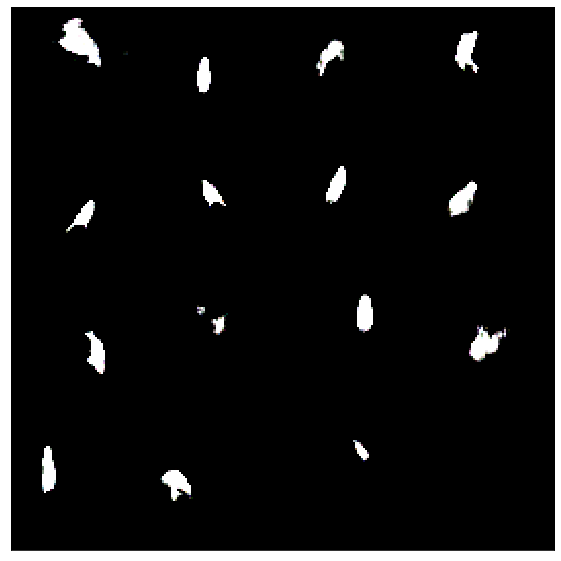

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


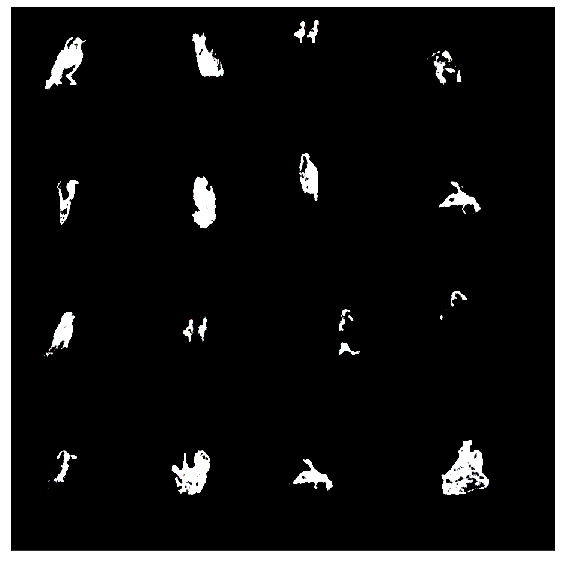

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 10


  0%|                                                                             | 4/17500 [00:13<46:27:30,  9.56s/it]

Train Epoch: 10 [0/280000 (0%)]	Loss: 0.033891
IOU : 0.049346923828125
IOU : 0.049346923828125


  0%|▏                                                                              | 52/17500 [00:16<29:36,  9.82it/s]

Train Epoch: 10 [200/280000 (0%)]	Loss: 0.042688
IOU : 0.04901123046875


  1%|▍                                                                             | 104/17500 [00:19<16:23, 17.68it/s]

Train Epoch: 10 [400/280000 (1%)]	Loss: 0.030849
IOU : 0.051910400390625
IOU : 0.051910400390625


  1%|▋                                                                             | 153/17500 [00:22<16:54, 17.11it/s]

Train Epoch: 10 [600/280000 (1%)]	Loss: 0.030927
IOU : 0.0544586181640625


  1%|▉                                                                             | 201/17500 [00:25<17:44, 16.25it/s]

Train Epoch: 10 [800/280000 (1%)]	Loss: 0.053233
IOU : 0.05438232421875
IOU : 0.05438232421875


  1%|█                                                                             | 249/17500 [00:28<18:21, 15.66it/s]

Train Epoch: 10 [1000/280000 (1%)]	Loss: 0.038326
IOU : 0.055267333984375


  2%|█▎                                                                            | 301/17500 [00:31<16:35, 17.27it/s]

Train Epoch: 10 [1200/280000 (2%)]	Loss: 0.040365
IOU : 0.0506439208984375
IOU : 0.0506439208984375


  2%|█▌                                                                            | 349/17500 [00:34<17:14, 16.58it/s]

Train Epoch: 10 [1400/280000 (2%)]	Loss: 0.036548
IOU : 0.0495147705078125


  2%|█▊                                                                            | 404/17500 [00:37<15:20, 18.57it/s]

Train Epoch: 10 [1600/280000 (2%)]	Loss: 0.047325
IOU : 0.06597900390625
IOU : 0.06597900390625


  3%|██                                                                            | 449/17500 [00:40<17:15, 16.47it/s]

Train Epoch: 10 [1800/280000 (3%)]	Loss: 0.057363
IOU : 0.05670166015625


  3%|██▏                                                                           | 501/17500 [00:43<16:48, 16.86it/s]

Train Epoch: 10 [2000/280000 (3%)]	Loss: 0.040288
IOU : 0.0511474609375
IOU : 0.0511474609375


  3%|██▍                                                                           | 549/17500 [00:46<17:08, 16.48it/s]

Train Epoch: 10 [2200/280000 (3%)]	Loss: 0.043320
IOU : 0.05535888671875


  3%|██▋                                                                           | 601/17500 [00:50<17:47, 15.84it/s]

Train Epoch: 10 [2400/280000 (3%)]	Loss: 0.028489
IOU : 0.0476837158203125
IOU : 0.0476837158203125


  4%|██▉                                                                           | 653/17500 [00:53<16:41, 16.83it/s]

Train Epoch: 10 [2600/280000 (4%)]	Loss: 0.039166
IOU : 0.0507659912109375


  4%|███                                                                           | 701/17500 [00:56<16:35, 16.88it/s]

Train Epoch: 10 [2800/280000 (4%)]	Loss: 0.048134
IOU : 0.0614013671875
IOU : 0.0614013671875


  4%|███▎                                                                          | 749/17500 [00:59<16:24, 17.02it/s]

Train Epoch: 10 [3000/280000 (4%)]	Loss: 0.036233
IOU : 0.0549163818359375


  5%|███▌                                                                          | 801/17500 [01:02<16:34, 16.80it/s]

Train Epoch: 10 [3200/280000 (5%)]	Loss: 0.038306
IOU : 0.053375244140625
IOU : 0.053375244140625


  5%|███▊                                                                          | 853/17500 [01:05<16:27, 16.85it/s]

Train Epoch: 10 [3400/280000 (5%)]	Loss: 0.041117
IOU : 0.054962158203125


  5%|████                                                                          | 903/17500 [01:08<16:33, 16.70it/s]

Train Epoch: 10 [3600/280000 (5%)]	Loss: 0.031612
IOU : 0.0536956787109375
IOU : 0.0536956787109375


  5%|████▏                                                                         | 952/17500 [01:11<15:20, 17.97it/s]

Train Epoch: 10 [3800/280000 (5%)]	Loss: 0.039643
IOU : 0.052978515625


  6%|████▍                                                                        | 1001/17500 [01:14<18:20, 14.99it/s]

Train Epoch: 10 [4000/280000 (6%)]	Loss: 0.030028
IOU : 0.050140380859375
IOU : 0.050140380859375


  6%|████▌                                                                        | 1050/17500 [01:17<18:05, 15.15it/s]

Train Epoch: 10 [4200/280000 (6%)]	Loss: 0.036027
IOU : 0.0552978515625


  6%|████▊                                                                        | 1101/17500 [01:20<19:54, 13.73it/s]

Train Epoch: 10 [4400/280000 (6%)]	Loss: 0.037405
IOU : 0.0483551025390625
IOU : 0.0483551025390625


  7%|█████                                                                        | 1153/17500 [01:23<16:15, 16.75it/s]

Train Epoch: 10 [4600/280000 (7%)]	Loss: 0.039371
IOU : 0.05084228515625


  7%|█████▎                                                                       | 1201/17500 [01:26<17:30, 15.52it/s]

Train Epoch: 10 [4800/280000 (7%)]	Loss: 0.036060
IOU : 0.0495758056640625
IOU : 0.0495758056640625


  7%|█████▍                                                                       | 1249/17500 [01:29<16:18, 16.61it/s]

Train Epoch: 10 [5000/280000 (7%)]	Loss: 0.036400
IOU : 0.054534912109375


  7%|█████▋                                                                       | 1301/17500 [01:33<16:47, 16.09it/s]

Train Epoch: 10 [5200/280000 (7%)]	Loss: 0.036039
IOU : 0.046722412109375
IOU : 0.046722412109375


  8%|█████▉                                                                       | 1353/17500 [01:36<15:43, 17.12it/s]

Train Epoch: 10 [5400/280000 (8%)]	Loss: 0.032329
IOU : 0.0428466796875


  8%|██████▏                                                                      | 1401/17500 [01:39<17:27, 15.37it/s]

Train Epoch: 10 [5600/280000 (8%)]	Loss: 0.033733
IOU : 0.0561981201171875
IOU : 0.0561981201171875


  8%|██████▍                                                                      | 1453/17500 [01:42<18:42, 14.30it/s]

Train Epoch: 10 [5800/280000 (8%)]	Loss: 0.033931
IOU : 0.048675537109375


  9%|██████▌                                                                      | 1501/17500 [01:45<19:52, 13.41it/s]

Train Epoch: 10 [6000/280000 (9%)]	Loss: 0.033221
IOU : 0.0511932373046875
IOU : 0.0511932373046875


  9%|██████▊                                                                      | 1553/17500 [01:48<16:58, 15.66it/s]

Train Epoch: 10 [6200/280000 (9%)]	Loss: 0.047405
IOU : 0.0504302978515625


  9%|███████                                                                      | 1601/17500 [01:51<17:16, 15.35it/s]

Train Epoch: 10 [6400/280000 (9%)]	Loss: 0.034195
IOU : 0.0446014404296875
IOU : 0.0446014404296875


  9%|███████▎                                                                     | 1653/17500 [01:54<19:33, 13.50it/s]

Train Epoch: 10 [6600/280000 (9%)]	Loss: 0.047106
IOU : 0.0499267578125


 10%|███████▍                                                                     | 1701/17500 [01:57<17:46, 14.81it/s]

Train Epoch: 10 [6800/280000 (10%)]	Loss: 0.026653
IOU : 0.053375244140625
IOU : 0.053375244140625


 10%|███████▋                                                                     | 1753/17500 [02:00<15:34, 16.86it/s]

Train Epoch: 10 [7000/280000 (10%)]	Loss: 0.027685
IOU : 0.039459228515625


 10%|███████▉                                                                     | 1801/17500 [02:03<16:22, 15.98it/s]

Train Epoch: 10 [7200/280000 (10%)]	Loss: 0.042448
IOU : 0.0527801513671875
IOU : 0.0527801513671875


 11%|████████▏                                                                    | 1853/17500 [02:06<15:38, 16.67it/s]

Train Epoch: 10 [7400/280000 (11%)]	Loss: 0.036626
IOU : 0.0513763427734375


 11%|████████▎                                                                    | 1901/17500 [02:09<15:23, 16.88it/s]

Train Epoch: 10 [7600/280000 (11%)]	Loss: 0.029020
IOU : 0.0468902587890625
IOU : 0.0468902587890625


 11%|████████▌                                                                    | 1949/17500 [02:12<15:41, 16.51it/s]

Train Epoch: 10 [7800/280000 (11%)]	Loss: 0.035223
IOU : 0.0484466552734375


 11%|████████▊                                                                    | 2001/17500 [02:15<16:33, 15.61it/s]

Train Epoch: 10 [8000/280000 (11%)]	Loss: 0.031068
IOU : 0.0461578369140625
IOU : 0.0461578369140625


 12%|█████████                                                                    | 2049/17500 [02:19<16:03, 16.03it/s]

Train Epoch: 10 [8200/280000 (12%)]	Loss: 0.036968
IOU : 0.0589141845703125


 12%|█████████▎                                                                   | 2104/17500 [02:22<16:09, 15.87it/s]

Train Epoch: 10 [8400/280000 (12%)]	Loss: 0.036711
IOU : 0.0495758056640625
IOU : 0.0495758056640625


 12%|█████████▍                                                                   | 2151/17500 [02:25<20:16, 12.62it/s]

Train Epoch: 10 [8600/280000 (12%)]	Loss: 0.037808
IOU : 0.0630340576171875


 13%|█████████▋                                                                   | 2202/17500 [02:28<16:23, 15.56it/s]

Train Epoch: 10 [8800/280000 (13%)]	Loss: 0.037420
IOU : 0.0511322021484375
IOU : 0.0511322021484375


 13%|█████████▉                                                                   | 2250/17500 [02:31<16:57, 14.99it/s]

Train Epoch: 10 [9000/280000 (13%)]	Loss: 0.059266
IOU : 0.05743408203125


 13%|██████████▏                                                                  | 2303/17500 [02:34<14:41, 17.23it/s]

Train Epoch: 10 [9200/280000 (13%)]	Loss: 0.034434
IOU : 0.059539794921875
IOU : 0.059539794921875


 13%|██████████▎                                                                  | 2352/17500 [02:37<14:35, 17.29it/s]

Train Epoch: 10 [9400/280000 (13%)]	Loss: 0.035210
IOU : 0.0484619140625


 14%|██████████▌                                                                  | 2403/17500 [02:41<20:22, 12.34it/s]

Train Epoch: 10 [9600/280000 (14%)]	Loss: 0.038674
IOU : 0.0486297607421875
IOU : 0.0486297607421875


 14%|██████████▊                                                                  | 2450/17500 [02:44<16:09, 15.52it/s]

Train Epoch: 10 [9800/280000 (14%)]	Loss: 0.029558
IOU : 0.05035400390625


 14%|███████████                                                                  | 2501/17500 [02:47<13:37, 18.34it/s]

Train Epoch: 10 [10000/280000 (14%)]	Loss: 0.033136
IOU : 0.0489349365234375
IOU : 0.0489349365234375


 15%|███████████▏                                                                 | 2554/17500 [02:50<16:03, 15.51it/s]

Train Epoch: 10 [10200/280000 (15%)]	Loss: 0.039296
IOU : 0.0483245849609375


 15%|███████████▍                                                                 | 2600/17500 [02:53<15:53, 15.63it/s]

Train Epoch: 10 [10400/280000 (15%)]	Loss: 0.032313
IOU : 0.051116943359375
IOU : 0.051116943359375


 15%|███████████▋                                                                 | 2651/17500 [02:56<15:36, 15.85it/s]

Train Epoch: 10 [10600/280000 (15%)]	Loss: 0.038680
IOU : 0.0648651123046875


 15%|███████████▉                                                                 | 2699/17500 [02:59<15:32, 15.88it/s]

Train Epoch: 10 [10800/280000 (15%)]	Loss: 0.041048
IOU : 0.0572357177734375
IOU : 0.0572357177734375


 16%|████████████                                                                 | 2751/17500 [03:02<14:20, 17.13it/s]

Train Epoch: 10 [11000/280000 (16%)]	Loss: 0.046291
IOU : 0.0516357421875


 16%|████████████▎                                                                | 2802/17500 [03:06<17:10, 14.26it/s]

Train Epoch: 10 [11200/280000 (16%)]	Loss: 0.029115
IOU : 0.0491485595703125
IOU : 0.0491485595703125


 16%|████████████▌                                                                | 2851/17500 [03:09<14:51, 16.43it/s]

Train Epoch: 10 [11400/280000 (16%)]	Loss: 0.036217
IOU : 0.054412841796875


 17%|████████████▊                                                                | 2903/17500 [03:12<15:17, 15.91it/s]

Train Epoch: 10 [11600/280000 (17%)]	Loss: 0.035758
IOU : 0.0549163818359375
IOU : 0.0549163818359375


 17%|████████████▉                                                                | 2951/17500 [03:15<14:49, 16.35it/s]

Train Epoch: 10 [11800/280000 (17%)]	Loss: 0.028584
IOU : 0.0515899658203125


 17%|█████████████▏                                                               | 3002/17500 [03:18<12:40, 19.06it/s]

Train Epoch: 10 [12000/280000 (17%)]	Loss: 0.045558
IOU : 0.0595550537109375
IOU : 0.0595550537109375


 17%|█████████████▍                                                               | 3052/17500 [03:21<19:08, 12.57it/s]

Train Epoch: 10 [12200/280000 (17%)]	Loss: 0.024941
IOU : 0.0472869873046875


 18%|█████████████▋                                                               | 3101/17500 [03:24<14:00, 17.12it/s]

Train Epoch: 10 [12400/280000 (18%)]	Loss: 0.042857
IOU : 0.04888916015625
IOU : 0.04888916015625


 18%|█████████████▊                                                               | 3153/17500 [03:27<12:23, 19.29it/s]

Train Epoch: 10 [12600/280000 (18%)]	Loss: 0.038816
IOU : 0.053009033203125


 18%|██████████████                                                               | 3202/17500 [03:30<13:59, 17.04it/s]

Train Epoch: 10 [12800/280000 (18%)]	Loss: 0.052032
IOU : 0.0521087646484375
IOU : 0.0521087646484375


 19%|██████████████▎                                                              | 3251/17500 [03:34<16:38, 14.27it/s]

Train Epoch: 10 [13000/280000 (19%)]	Loss: 0.032087
IOU : 0.05615234375


 19%|██████████████▌                                                              | 3302/17500 [03:37<16:47, 14.09it/s]

Train Epoch: 10 [13200/280000 (19%)]	Loss: 0.036971
IOU : 0.0548858642578125
IOU : 0.0548858642578125


 19%|██████████████▊                                                              | 3353/17500 [03:40<13:46, 17.11it/s]

Train Epoch: 10 [13400/280000 (19%)]	Loss: 0.044289
IOU : 0.0498504638671875


 19%|██████████████▉                                                              | 3402/17500 [03:43<15:42, 14.96it/s]

Train Epoch: 10 [13600/280000 (19%)]	Loss: 0.041264
IOU : 0.0538330078125
IOU : 0.0538330078125


 20%|███████████████▏                                                             | 3450/17500 [03:46<14:40, 15.95it/s]

Train Epoch: 10 [13800/280000 (20%)]	Loss: 0.033469
IOU : 0.05419921875


 20%|███████████████▍                                                             | 3502/17500 [03:49<14:13, 16.40it/s]

Train Epoch: 10 [14000/280000 (20%)]	Loss: 0.038407
IOU : 0.048309326171875
IOU : 0.048309326171875


 20%|███████████████▌                                                             | 3550/17500 [03:52<13:51, 16.78it/s]

Train Epoch: 10 [14200/280000 (20%)]	Loss: 0.040114
IOU : 0.055084228515625


 21%|███████████████▊                                                             | 3598/17500 [03:55<14:17, 16.22it/s]

Train Epoch: 10 [14400/280000 (21%)]	Loss: 0.040716
IOU : 0.055572509765625
IOU : 0.055572509765625


 21%|████████████████                                                             | 3650/17500 [03:58<14:35, 15.82it/s]

Train Epoch: 10 [14600/280000 (21%)]	Loss: 0.032027
IOU : 0.0497589111328125


 21%|████████████████▎                                                            | 3698/17500 [04:01<14:32, 15.82it/s]

Train Epoch: 10 [14800/280000 (21%)]	Loss: 0.034624
IOU : 0.04925537109375
IOU : 0.04925537109375


 21%|████████████████▌                                                            | 3750/17500 [04:05<13:39, 16.77it/s]

Train Epoch: 10 [15000/280000 (21%)]	Loss: 0.051723
IOU : 0.0465087890625


 22%|████████████████▋                                                            | 3802/17500 [04:08<13:58, 16.34it/s]

Train Epoch: 10 [15200/280000 (22%)]	Loss: 0.034481
IOU : 0.05029296875
IOU : 0.05029296875


 22%|████████████████▉                                                            | 3852/17500 [04:11<13:50, 16.44it/s]

Train Epoch: 10 [15400/280000 (22%)]	Loss: 0.043978
IOU : 0.0581207275390625


 22%|█████████████████▏                                                           | 3902/17500 [04:14<13:46, 16.46it/s]

Train Epoch: 10 [15600/280000 (22%)]	Loss: 0.029329
IOU : 0.054351806640625
IOU : 0.054351806640625


 23%|█████████████████▍                                                           | 3950/17500 [04:17<13:37, 16.57it/s]

Train Epoch: 10 [15800/280000 (23%)]	Loss: 0.044052
IOU : 0.0540313720703125


 23%|█████████████████▌                                                           | 4002/17500 [04:20<14:34, 15.43it/s]

Train Epoch: 10 [16000/280000 (23%)]	Loss: 0.031673
IOU : 0.0509033203125
IOU : 0.0509033203125


 23%|█████████████████▊                                                           | 4050/17500 [04:23<13:36, 16.47it/s]

Train Epoch: 10 [16200/280000 (23%)]	Loss: 0.047360
IOU : 0.060028076171875


 23%|██████████████████                                                           | 4102/17500 [04:27<13:54, 16.06it/s]

Train Epoch: 10 [16400/280000 (23%)]	Loss: 0.032430
IOU : 0.0537109375
IOU : 0.0537109375


 24%|██████████████████▎                                                          | 4153/17500 [04:30<13:42, 16.23it/s]

Train Epoch: 10 [16600/280000 (24%)]	Loss: 0.052288
IOU : 0.055450439453125


 24%|██████████████████▍                                                          | 4202/17500 [04:33<13:34, 16.32it/s]

Train Epoch: 10 [16800/280000 (24%)]	Loss: 0.037496
IOU : 0.0484466552734375
IOU : 0.0484466552734375


 24%|██████████████████▋                                                          | 4252/17500 [04:36<13:41, 16.12it/s]

Train Epoch: 10 [17000/280000 (24%)]	Loss: 0.053728
IOU : 0.062286376953125


 25%|██████████████████▉                                                          | 4302/17500 [04:39<14:35, 15.08it/s]

Train Epoch: 10 [17200/280000 (25%)]	Loss: 0.055390
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 25%|███████████████████▏                                                         | 4352/17500 [04:42<14:04, 15.57it/s]

Train Epoch: 10 [17400/280000 (25%)]	Loss: 0.048409
IOU : 0.058197021484375


 25%|███████████████████▎                                                         | 4402/17500 [04:46<14:11, 15.38it/s]

Train Epoch: 10 [17600/280000 (25%)]	Loss: 0.047273
IOU : 0.0508575439453125
IOU : 0.0508575439453125


 25%|███████████████████▌                                                         | 4454/17500 [04:49<14:35, 14.90it/s]

Train Epoch: 10 [17800/280000 (25%)]	Loss: 0.035235
IOU : 0.0525665283203125


 26%|███████████████████▊                                                         | 4502/17500 [04:52<15:56, 13.58it/s]

Train Epoch: 10 [18000/280000 (26%)]	Loss: 0.026183
IOU : 0.042236328125
IOU : 0.042236328125


 26%|████████████████████                                                         | 4551/17500 [04:55<15:50, 13.62it/s]

Train Epoch: 10 [18200/280000 (26%)]	Loss: 0.049625
IOU : 0.05828857421875


 26%|████████████████████▏                                                        | 4598/17500 [04:58<13:45, 15.64it/s]

Train Epoch: 10 [18400/280000 (26%)]	Loss: 0.030905
IOU : 0.047760009765625
IOU : 0.047760009765625


 27%|████████████████████▍                                                        | 4650/17500 [05:01<12:52, 16.63it/s]

Train Epoch: 10 [18600/280000 (27%)]	Loss: 0.032360
IOU : 0.047332763671875


 27%|████████████████████▋                                                        | 4702/17500 [05:05<14:03, 15.17it/s]

Train Epoch: 10 [18800/280000 (27%)]	Loss: 0.041796
IOU : 0.0533447265625
IOU : 0.0533447265625


 27%|████████████████████▉                                                        | 4751/17500 [05:08<13:56, 15.24it/s]

Train Epoch: 10 [19000/280000 (27%)]	Loss: 0.035089
IOU : 0.0570526123046875


 27%|█████████████████████                                                        | 4799/17500 [05:11<14:01, 15.10it/s]

Train Epoch: 10 [19200/280000 (27%)]	Loss: 0.040370
IOU : 0.05291748046875
IOU : 0.05291748046875


 28%|█████████████████████▎                                                       | 4851/17500 [05:14<14:54, 14.15it/s]

Train Epoch: 10 [19400/280000 (28%)]	Loss: 0.042950
IOU : 0.054962158203125


 28%|█████████████████████▌                                                       | 4902/17500 [05:17<11:36, 18.08it/s]

Train Epoch: 10 [19600/280000 (28%)]	Loss: 0.040943
IOU : 0.059112548828125
IOU : 0.059112548828125


 28%|█████████████████████▊                                                       | 4954/17500 [05:20<13:31, 15.46it/s]

Train Epoch: 10 [19800/280000 (28%)]	Loss: 0.043943
IOU : 0.0569305419921875


 29%|██████████████████████                                                       | 5002/17500 [05:23<13:44, 15.16it/s]

Train Epoch: 10 [20000/280000 (29%)]	Loss: 0.040721
IOU : 0.0538330078125
IOU : 0.0538330078125


 29%|██████████████████████▏                                                      | 5052/17500 [05:26<13:25, 15.46it/s]

Train Epoch: 10 [20200/280000 (29%)]	Loss: 0.047388
IOU : 0.058624267578125


 29%|██████████████████████▍                                                      | 5101/17500 [05:29<12:57, 15.94it/s]

Train Epoch: 10 [20400/280000 (29%)]	Loss: 0.040908
IOU : 0.0539703369140625
IOU : 0.0539703369140625


 29%|██████████████████████▋                                                      | 5154/17500 [05:33<12:15, 16.78it/s]

Train Epoch: 10 [20600/280000 (29%)]	Loss: 0.035708
IOU : 0.052825927734375


 30%|██████████████████████▉                                                      | 5199/17500 [05:36<12:48, 16.01it/s]

Train Epoch: 10 [20800/280000 (30%)]	Loss: 0.040010
IOU : 0.0544891357421875
IOU : 0.0544891357421875


 30%|███████████████████████                                                      | 5251/17500 [05:39<12:44, 16.03it/s]

Train Epoch: 10 [21000/280000 (30%)]	Loss: 0.030771
IOU : 0.0525054931640625


 30%|███████████████████████▎                                                     | 5303/17500 [05:42<12:56, 15.70it/s]

Train Epoch: 10 [21200/280000 (30%)]	Loss: 0.032136
IOU : 0.04522705078125
IOU : 0.04522705078125


 31%|███████████████████████▌                                                     | 5354/17500 [05:45<12:17, 16.46it/s]

Train Epoch: 10 [21400/280000 (31%)]	Loss: 0.053375
IOU : 0.0587615966796875


 31%|███████████████████████▊                                                     | 5402/17500 [05:48<12:01, 16.78it/s]

Train Epoch: 10 [21600/280000 (31%)]	Loss: 0.032561
IOU : 0.048248291015625
IOU : 0.048248291015625


 31%|███████████████████████▉                                                     | 5451/17500 [05:51<13:51, 14.49it/s]

Train Epoch: 10 [21800/280000 (31%)]	Loss: 0.038506
IOU : 0.0574493408203125


 31%|████████████████████████▏                                                    | 5502/17500 [05:54<12:16, 16.29it/s]

Train Epoch: 10 [22000/280000 (31%)]	Loss: 0.039959
IOU : 0.0499420166015625
IOU : 0.0499420166015625


 32%|████████████████████████▍                                                    | 5550/17500 [05:57<13:37, 14.62it/s]

Train Epoch: 10 [22200/280000 (32%)]	Loss: 0.038926
IOU : 0.0546112060546875


 32%|████████████████████████▋                                                    | 5602/17500 [06:01<16:04, 12.34it/s]

Train Epoch: 10 [22400/280000 (32%)]	Loss: 0.040541
IOU : 0.0513458251953125
IOU : 0.0513458251953125


 32%|████████████████████████▊                                                    | 5653/17500 [06:04<10:52, 18.16it/s]

Train Epoch: 10 [22600/280000 (32%)]	Loss: 0.045132
IOU : 0.0559844970703125


 33%|█████████████████████████                                                    | 5702/17500 [06:07<12:08, 16.20it/s]

Train Epoch: 10 [22800/280000 (33%)]	Loss: 0.036062
IOU : 0.04559326171875
IOU : 0.04559326171875


 33%|█████████████████████████▎                                                   | 5753/17500 [06:10<11:57, 16.37it/s]

Train Epoch: 10 [23000/280000 (33%)]	Loss: 0.029276
IOU : 0.05389404296875


 33%|█████████████████████████▌                                                   | 5802/17500 [06:13<12:46, 15.27it/s]

Train Epoch: 10 [23200/280000 (33%)]	Loss: 0.046448
IOU : 0.0568084716796875
IOU : 0.0568084716796875


 33%|█████████████████████████▊                                                   | 5854/17500 [06:16<12:08, 15.99it/s]

Train Epoch: 10 [23400/280000 (33%)]	Loss: 0.033876
IOU : 0.0539398193359375


 34%|█████████████████████████▉                                                   | 5902/17500 [06:19<11:58, 16.13it/s]

Train Epoch: 10 [23600/280000 (34%)]	Loss: 0.029989
IOU : 0.0532989501953125
IOU : 0.0532989501953125


 34%|██████████████████████████▏                                                  | 5951/17500 [06:23<13:14, 14.53it/s]

Train Epoch: 10 [23800/280000 (34%)]	Loss: 0.031392
IOU : 0.0473480224609375


 34%|██████████████████████████▍                                                  | 5999/17500 [06:25<12:44, 15.05it/s]

Train Epoch: 10 [24000/280000 (34%)]	Loss: 0.033975
IOU : 0.0587005615234375
IOU : 0.0587005615234375


 35%|██████████████████████████▌                                                  | 6051/17500 [06:29<11:47, 16.18it/s]

Train Epoch: 10 [24200/280000 (35%)]	Loss: 0.038172
IOU : 0.0525054931640625


 35%|██████████████████████████▊                                                  | 6099/17500 [06:32<12:20, 15.39it/s]

Train Epoch: 10 [24400/280000 (35%)]	Loss: 0.037423
IOU : 0.053466796875
IOU : 0.053466796875


 35%|███████████████████████████                                                  | 6151/17500 [06:35<11:29, 16.46it/s]

Train Epoch: 10 [24600/280000 (35%)]	Loss: 0.039833
IOU : 0.0606536865234375


 35%|███████████████████████████▎                                                 | 6203/17500 [06:38<12:43, 14.80it/s]

Train Epoch: 10 [24800/280000 (35%)]	Loss: 0.038327
IOU : 0.0613555908203125
IOU : 0.0613555908203125


 36%|███████████████████████████▌                                                 | 6250/17500 [06:41<12:33, 14.93it/s]

Train Epoch: 10 [25000/280000 (36%)]	Loss: 0.038764
IOU : 0.0496978759765625


 36%|███████████████████████████▋                                                 | 6302/17500 [06:44<13:34, 13.76it/s]

Train Epoch: 10 [25200/280000 (36%)]	Loss: 0.041076
IOU : 0.0623321533203125
IOU : 0.0623321533203125


 36%|███████████████████████████▉                                                 | 6353/17500 [06:47<11:26, 16.24it/s]

Train Epoch: 10 [25400/280000 (36%)]	Loss: 0.033131
IOU : 0.043548583984375


 37%|████████████████████████████▏                                                | 6403/17500 [06:50<12:02, 15.36it/s]

Train Epoch: 10 [25600/280000 (37%)]	Loss: 0.041523
IOU : 0.0569610595703125
IOU : 0.0569610595703125


 37%|████████████████████████████▍                                                | 6450/17500 [06:53<12:53, 14.28it/s]

Train Epoch: 10 [25800/280000 (37%)]	Loss: 0.049616
IOU : 0.05462646484375


 37%|████████████████████████████▌                                                | 6502/17500 [06:56<11:11, 16.38it/s]

Train Epoch: 10 [26000/280000 (37%)]	Loss: 0.043922
IOU : 0.05596923828125
IOU : 0.05596923828125


 37%|████████████████████████████▊                                                | 6550/17500 [06:59<11:19, 16.12it/s]

Train Epoch: 10 [26200/280000 (37%)]	Loss: 0.048835
IOU : 0.0614776611328125


 38%|█████████████████████████████                                                | 6602/17500 [07:03<11:58, 15.17it/s]

Train Epoch: 10 [26400/280000 (38%)]	Loss: 0.031741
IOU : 0.049102783203125
IOU : 0.049102783203125


 38%|█████████████████████████████▎                                               | 6650/17500 [07:06<11:17, 16.03it/s]

Train Epoch: 10 [26600/280000 (38%)]	Loss: 0.040753
IOU : 0.0582275390625


 38%|█████████████████████████████▍                                               | 6698/17500 [07:08<10:51, 16.59it/s]

Train Epoch: 10 [26800/280000 (38%)]	Loss: 0.028917
IOU : 0.0498809814453125
IOU : 0.0498809814453125


 39%|█████████████████████████████▋                                               | 6750/17500 [07:12<10:54, 16.43it/s]

Train Epoch: 10 [27000/280000 (39%)]	Loss: 0.041229
IOU : 0.059173583984375


 39%|█████████████████████████████▉                                               | 6798/17500 [07:15<10:43, 16.62it/s]

Train Epoch: 10 [27200/280000 (39%)]	Loss: 0.045487
IOU : 0.0540924072265625
IOU : 0.0540924072265625


 39%|██████████████████████████████▏                                              | 6850/17500 [07:18<10:28, 16.94it/s]

Train Epoch: 10 [27400/280000 (39%)]	Loss: 0.026781
IOU : 0.05133056640625


 39%|██████████████████████████████▎                                              | 6901/17500 [07:21<09:06, 19.39it/s]

Train Epoch: 10 [27600/280000 (39%)]	Loss: 0.036289
IOU : 0.0455474853515625
IOU : 0.0455474853515625


 40%|██████████████████████████████▌                                              | 6950/17500 [07:24<11:02, 15.93it/s]

Train Epoch: 10 [27800/280000 (40%)]	Loss: 0.027351
IOU : 0.04754638671875


 40%|██████████████████████████████▊                                              | 7002/17500 [07:27<14:00, 12.48it/s]

Train Epoch: 10 [28000/280000 (40%)]	Loss: 0.040903
IOU : 0.0524749755859375
IOU : 0.0524749755859375


 40%|███████████████████████████████                                              | 7052/17500 [07:30<11:49, 14.72it/s]

Train Epoch: 10 [28200/280000 (40%)]	Loss: 0.041282
IOU : 0.0546875


 41%|███████████████████████████████▏                                             | 7101/17500 [07:33<09:58, 17.39it/s]

Train Epoch: 10 [28400/280000 (41%)]	Loss: 0.032502
IOU : 0.0571441650390625
IOU : 0.0571441650390625


 41%|███████████████████████████████▍                                             | 7150/17500 [07:36<11:02, 15.63it/s]

Train Epoch: 10 [28600/280000 (41%)]	Loss: 0.034016
IOU : 0.0556793212890625


 41%|███████████████████████████████▋                                             | 7198/17500 [07:39<10:34, 16.24it/s]

Train Epoch: 10 [28800/280000 (41%)]	Loss: 0.038301
IOU : 0.0497589111328125
IOU : 0.0497589111328125


 41%|███████████████████████████████▉                                             | 7251/17500 [07:42<11:03, 15.46it/s]

Train Epoch: 10 [29000/280000 (41%)]	Loss: 0.040954
IOU : 0.057525634765625


 42%|████████████████████████████████                                             | 7298/17500 [07:45<11:43, 14.51it/s]

Train Epoch: 10 [29200/280000 (42%)]	Loss: 0.049221
IOU : 0.0525970458984375
IOU : 0.0525970458984375


 42%|████████████████████████████████▎                                            | 7352/17500 [07:49<10:59, 15.39it/s]

Train Epoch: 10 [29400/280000 (42%)]	Loss: 0.038584
IOU : 0.055389404296875


 42%|████████████████████████████████▌                                            | 7402/17500 [07:52<10:19, 16.31it/s]

Train Epoch: 10 [29600/280000 (42%)]	Loss: 0.036349
IOU : 0.0564727783203125
IOU : 0.0564727783203125


 43%|████████████████████████████████▊                                            | 7453/17500 [07:55<10:31, 15.90it/s]

Train Epoch: 10 [29800/280000 (43%)]	Loss: 0.032683
IOU : 0.0414886474609375


 43%|█████████████████████████████████                                            | 7504/17500 [07:58<09:51, 16.90it/s]

Train Epoch: 10 [30000/280000 (43%)]	Loss: 0.033407
IOU : 0.0525970458984375
IOU : 0.0525970458984375


 43%|█████████████████████████████████▏                                           | 7553/17500 [08:01<10:20, 16.04it/s]

Train Epoch: 10 [30200/280000 (43%)]	Loss: 0.029980
IOU : 0.0552825927734375


 43%|█████████████████████████████████▍                                           | 7604/17500 [08:04<09:14, 17.86it/s]

Train Epoch: 10 [30400/280000 (43%)]	Loss: 0.044957
IOU : 0.054473876953125
IOU : 0.054473876953125


 44%|█████████████████████████████████▋                                           | 7651/17500 [08:07<09:45, 16.81it/s]

Train Epoch: 10 [30600/280000 (44%)]	Loss: 0.031991
IOU : 0.0546417236328125


 44%|█████████████████████████████████▉                                           | 7701/17500 [08:10<10:24, 15.70it/s]

Train Epoch: 10 [30800/280000 (44%)]	Loss: 0.043792
IOU : 0.0596923828125
IOU : 0.0596923828125


 44%|██████████████████████████████████                                           | 7752/17500 [08:13<08:37, 18.84it/s]

Train Epoch: 10 [31000/280000 (44%)]	Loss: 0.041701
IOU : 0.053375244140625


 45%|██████████████████████████████████▎                                          | 7801/17500 [08:16<09:56, 16.26it/s]

Train Epoch: 10 [31200/280000 (45%)]	Loss: 0.045240
IOU : 0.052978515625
IOU : 0.052978515625


 45%|██████████████████████████████████▌                                          | 7853/17500 [08:19<09:19, 17.23it/s]

Train Epoch: 10 [31400/280000 (45%)]	Loss: 0.028970
IOU : 0.0494842529296875


 45%|██████████████████████████████████▊                                          | 7901/17500 [08:22<10:20, 15.48it/s]

Train Epoch: 10 [31600/280000 (45%)]	Loss: 0.026532
IOU : 0.0455169677734375
IOU : 0.0455169677734375


 45%|██████████████████████████████████▉                                          | 7949/17500 [08:25<09:40, 16.47it/s]

Train Epoch: 10 [31800/280000 (45%)]	Loss: 0.040157
IOU : 0.057373046875


 46%|███████████████████████████████████▏                                         | 8001/17500 [08:28<09:27, 16.73it/s]

Train Epoch: 10 [32000/280000 (46%)]	Loss: 0.043023
IOU : 0.0523681640625
IOU : 0.0523681640625


 46%|███████████████████████████████████▍                                         | 8053/17500 [08:32<09:19, 16.88it/s]

Train Epoch: 10 [32200/280000 (46%)]	Loss: 0.029732
IOU : 0.0406341552734375


 46%|███████████████████████████████████▋                                         | 8101/17500 [08:35<09:34, 16.37it/s]

Train Epoch: 10 [32400/280000 (46%)]	Loss: 0.038272
IOU : 0.0505218505859375
IOU : 0.0505218505859375


 47%|███████████████████████████████████▊                                         | 8153/17500 [08:38<09:34, 16.26it/s]

Train Epoch: 10 [32600/280000 (47%)]	Loss: 0.035891
IOU : 0.0515289306640625


 47%|████████████████████████████████████                                         | 8202/17500 [08:41<09:59, 15.51it/s]

Train Epoch: 10 [32800/280000 (47%)]	Loss: 0.028799
IOU : 0.047454833984375
IOU : 0.047454833984375


 47%|████████████████████████████████████▎                                        | 8253/17500 [08:44<10:00, 15.39it/s]

Train Epoch: 10 [33000/280000 (47%)]	Loss: 0.033559
IOU : 0.050750732421875


 47%|████████████████████████████████████▌                                        | 8303/17500 [08:47<09:21, 16.38it/s]

Train Epoch: 10 [33200/280000 (47%)]	Loss: 0.036113
IOU : 0.0476226806640625
IOU : 0.0476226806640625


 48%|████████████████████████████████████▊                                        | 8353/17500 [08:50<09:09, 16.66it/s]

Train Epoch: 10 [33400/280000 (48%)]	Loss: 0.038252
IOU : 0.060791015625


 48%|████████████████████████████████████▉                                        | 8402/17500 [08:53<08:48, 17.20it/s]

Train Epoch: 10 [33600/280000 (48%)]	Loss: 0.032896
IOU : 0.0536651611328125
IOU : 0.0536651611328125


 48%|█████████████████████████████████████▏                                       | 8451/17500 [08:56<09:39, 15.63it/s]

Train Epoch: 10 [33800/280000 (48%)]	Loss: 0.030621
IOU : 0.047210693359375


 49%|█████████████████████████████████████▍                                       | 8503/17500 [08:59<09:50, 15.23it/s]

Train Epoch: 10 [34000/280000 (49%)]	Loss: 0.032415
IOU : 0.053741455078125
IOU : 0.053741455078125


 49%|█████████████████████████████████████▋                                       | 8552/17500 [09:02<09:05, 16.40it/s]

Train Epoch: 10 [34200/280000 (49%)]	Loss: 0.038746
IOU : 0.05035400390625


 49%|█████████████████████████████████████▊                                       | 8599/17500 [09:05<08:47, 16.86it/s]

Train Epoch: 10 [34400/280000 (49%)]	Loss: 0.032097
IOU : 0.0530853271484375
IOU : 0.0530853271484375


 49%|██████████████████████████████████████                                       | 8652/17500 [09:08<08:56, 16.50it/s]

Train Epoch: 10 [34600/280000 (49%)]	Loss: 0.040514
IOU : 0.054931640625


 50%|██████████████████████████████████████▎                                      | 8702/17500 [09:11<08:57, 16.38it/s]

Train Epoch: 10 [34800/280000 (50%)]	Loss: 0.038519
IOU : 0.05340576171875
IOU : 0.05340576171875


 50%|██████████████████████████████████████▌                                      | 8751/17500 [09:14<08:50, 16.48it/s]

Train Epoch: 10 [35000/280000 (50%)]	Loss: 0.030891
IOU : 0.04888916015625


 50%|██████████████████████████████████████▋                                      | 8803/17500 [09:17<09:16, 15.62it/s]

Train Epoch: 10 [35200/280000 (50%)]	Loss: 0.034861
IOU : 0.054168701171875
IOU : 0.054168701171875


 51%|██████████████████████████████████████▉                                      | 8850/17500 [09:20<09:00, 16.01it/s]

Train Epoch: 10 [35400/280000 (51%)]	Loss: 0.040135
IOU : 0.0549468994140625


 51%|███████████████████████████████████████▏                                     | 8898/17500 [09:23<09:21, 15.32it/s]

Train Epoch: 10 [35600/280000 (51%)]	Loss: 0.033530
IOU : 0.042999267578125
IOU : 0.042999267578125


 51%|███████████████████████████████████████▍                                     | 8950/17500 [09:26<08:40, 16.41it/s]

Train Epoch: 10 [35800/280000 (51%)]	Loss: 0.037745
IOU : 0.0561065673828125


 51%|███████████████████████████████████████▌                                     | 8998/17500 [09:29<09:41, 14.63it/s]

Train Epoch: 10 [36000/280000 (51%)]	Loss: 0.054102
IOU : 0.050018310546875
IOU : 0.050018310546875


 52%|███████████████████████████████████████▊                                     | 9050/17500 [09:33<08:16, 17.01it/s]

Train Epoch: 10 [36200/280000 (52%)]	Loss: 0.040943
IOU : 0.0546875


 52%|████████████████████████████████████████                                     | 9103/17500 [09:36<08:44, 16.02it/s]

Train Epoch: 10 [36400/280000 (52%)]	Loss: 0.039398
IOU : 0.0502777099609375
IOU : 0.0502777099609375


 52%|████████████████████████████████████████▎                                    | 9152/17500 [09:39<09:35, 14.49it/s]

Train Epoch: 10 [36600/280000 (52%)]	Loss: 0.032253
IOU : 0.056365966796875


 53%|████████████████████████████████████████▍                                    | 9203/17500 [09:42<08:41, 15.92it/s]

Train Epoch: 10 [36800/280000 (53%)]	Loss: 0.040133
IOU : 0.0530853271484375
IOU : 0.0530853271484375


 53%|████████████████████████████████████████▋                                    | 9250/17500 [09:45<11:01, 12.47it/s]

Train Epoch: 10 [37000/280000 (53%)]	Loss: 0.038348
IOU : 0.0554656982421875


 53%|████████████████████████████████████████▉                                    | 9304/17500 [09:49<08:39, 15.77it/s]

Train Epoch: 10 [37200/280000 (53%)]	Loss: 0.038232
IOU : 0.049774169921875
IOU : 0.049774169921875


 53%|█████████████████████████████████████████▏                                   | 9353/17500 [09:52<09:27, 14.34it/s]

Train Epoch: 10 [37400/280000 (53%)]	Loss: 0.034637
IOU : 0.0520172119140625


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [09:55<09:17, 14.53it/s]

Train Epoch: 10 [37600/280000 (54%)]	Loss: 0.034011
IOU : 0.0550689697265625
IOU : 0.0550689697265625


 54%|█████████████████████████████████████████▌                                   | 9449/17500 [09:58<09:08, 14.68it/s]

Train Epoch: 10 [37800/280000 (54%)]	Loss: 0.043738
IOU : 0.0656890869140625


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [10:01<08:32, 15.61it/s]

Train Epoch: 10 [38000/280000 (54%)]	Loss: 0.042749
IOU : 0.062652587890625
IOU : 0.062652587890625


 55%|██████████████████████████████████████████                                   | 9549/17500 [10:04<07:58, 16.61it/s]

Train Epoch: 10 [38200/280000 (55%)]	Loss: 0.055016
IOU : 0.05908203125


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [10:08<10:14, 12.86it/s]

Train Epoch: 10 [38400/280000 (55%)]	Loss: 0.032309
IOU : 0.046478271484375
IOU : 0.046478271484375


 55%|██████████████████████████████████████████▍                                  | 9649/17500 [10:11<08:39, 15.12it/s]

Train Epoch: 10 [38600/280000 (55%)]	Loss: 0.038030
IOU : 0.0572052001953125


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [10:14<07:51, 16.53it/s]

Train Epoch: 10 [38800/280000 (55%)]	Loss: 0.036404
IOU : 0.0486602783203125
IOU : 0.0486602783203125


 56%|██████████████████████████████████████████▉                                  | 9749/17500 [10:17<07:54, 16.32it/s]

Train Epoch: 10 [39000/280000 (56%)]	Loss: 0.038349
IOU : 0.06024169921875


 56%|███████████████████████████████████████████                                  | 9801/17500 [10:21<07:56, 16.16it/s]

Train Epoch: 10 [39200/280000 (56%)]	Loss: 0.035127
IOU : 0.046844482421875
IOU : 0.046844482421875


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [10:24<07:39, 16.65it/s]

Train Epoch: 10 [39400/280000 (56%)]	Loss: 0.038172
IOU : 0.0536651611328125


 57%|███████████████████████████████████████████▌                                 | 9902/17500 [10:27<08:47, 14.40it/s]

Train Epoch: 10 [39600/280000 (57%)]	Loss: 0.035535
IOU : 0.056549072265625
IOU : 0.056549072265625


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [10:30<07:07, 17.66it/s]

Train Epoch: 10 [39800/280000 (57%)]	Loss: 0.049277
IOU : 0.0535430908203125


 57%|███████████████████████████████████████████▍                                | 10001/17500 [10:33<06:37, 18.87it/s]

Train Epoch: 10 [40000/280000 (57%)]	Loss: 0.033285
IOU : 0.048004150390625
IOU : 0.048004150390625


 57%|███████████████████████████████████████████▋                                | 10050/17500 [10:37<09:29, 13.09it/s]

Train Epoch: 10 [40200/280000 (57%)]	Loss: 0.041185
IOU : 0.050872802734375


 58%|███████████████████████████████████████████▊                                | 10102/17500 [10:40<07:22, 16.74it/s]

Train Epoch: 10 [40400/280000 (58%)]	Loss: 0.034422
IOU : 0.0479278564453125
IOU : 0.0479278564453125


 58%|████████████████████████████████████████████                                | 10154/17500 [10:43<07:20, 16.69it/s]

Train Epoch: 10 [40600/280000 (58%)]	Loss: 0.031973
IOU : 0.0518646240234375


 58%|████████████████████████████████████████████▎                               | 10202/17500 [10:46<08:32, 14.25it/s]

Train Epoch: 10 [40800/280000 (58%)]	Loss: 0.037040
IOU : 0.05194091796875
IOU : 0.05194091796875


 59%|████████████████████████████████████████████▌                               | 10253/17500 [10:49<07:11, 16.78it/s]

Train Epoch: 10 [41000/280000 (59%)]	Loss: 0.035937
IOU : 0.052215576171875


 59%|████████████████████████████████████████████▋                               | 10298/17500 [10:52<07:35, 15.80it/s]

Train Epoch: 10 [41200/280000 (59%)]	Loss: 0.034912
IOU : 0.0460205078125
IOU : 0.0460205078125


 59%|████████████████████████████████████████████▉                               | 10353/17500 [10:55<06:15, 19.05it/s]

Train Epoch: 10 [41400/280000 (59%)]	Loss: 0.044101
IOU : 0.048370361328125


 59%|█████████████████████████████████████████████▏                              | 10402/17500 [10:58<07:26, 15.90it/s]

Train Epoch: 10 [41600/280000 (59%)]	Loss: 0.036393
IOU : 0.04876708984375
IOU : 0.04876708984375


 60%|█████████████████████████████████████████████▍                              | 10453/17500 [11:01<06:48, 17.25it/s]

Train Epoch: 10 [41800/280000 (60%)]	Loss: 0.035275
IOU : 0.0526275634765625


 60%|█████████████████████████████████████████████▌                              | 10502/17500 [11:04<07:03, 16.54it/s]

Train Epoch: 10 [42000/280000 (60%)]	Loss: 0.052905
IOU : 0.0600128173828125
IOU : 0.0600128173828125


 60%|█████████████████████████████████████████████▊                              | 10550/17500 [11:07<07:36, 15.22it/s]

Train Epoch: 10 [42200/280000 (60%)]	Loss: 0.031543
IOU : 0.0544281005859375


 61%|██████████████████████████████████████████████                              | 10603/17500 [11:11<07:15, 15.82it/s]

Train Epoch: 10 [42400/280000 (61%)]	Loss: 0.036852
IOU : 0.0546875
IOU : 0.0546875


 61%|██████████████████████████████████████████████▎                             | 10650/17500 [11:13<06:59, 16.34it/s]

Train Epoch: 10 [42600/280000 (61%)]	Loss: 0.036484
IOU : 0.046478271484375


 61%|██████████████████████████████████████████████▍                             | 10702/17500 [11:17<06:50, 16.57it/s]

Train Epoch: 10 [42800/280000 (61%)]	Loss: 0.028445
IOU : 0.0440673828125
IOU : 0.0440673828125


 61%|██████████████████████████████████████████████▋                             | 10750/17500 [11:19<06:43, 16.74it/s]

Train Epoch: 10 [43000/280000 (61%)]	Loss: 0.060285
IOU : 0.05926513671875


 62%|██████████████████████████████████████████████▉                             | 10802/17500 [11:23<06:39, 16.78it/s]

Train Epoch: 10 [43200/280000 (62%)]	Loss: 0.042617
IOU : 0.0554046630859375
IOU : 0.0554046630859375


 62%|███████████████████████████████████████████████▏                            | 10853/17500 [11:26<05:44, 19.28it/s]

Train Epoch: 10 [43400/280000 (62%)]	Loss: 0.025873
IOU : 0.0538482666015625


 62%|███████████████████████████████████████████████▎                            | 10902/17500 [11:29<07:12, 15.26it/s]

Train Epoch: 10 [43600/280000 (62%)]	Loss: 0.038651
IOU : 0.055084228515625
IOU : 0.055084228515625


 63%|███████████████████████████████████████████████▌                            | 10953/17500 [11:32<06:17, 17.36it/s]

Train Epoch: 10 [43800/280000 (63%)]	Loss: 0.033337
IOU : 0.0536041259765625


 63%|███████████████████████████████████████████████▊                            | 11002/17500 [11:35<06:40, 16.24it/s]

Train Epoch: 10 [44000/280000 (63%)]	Loss: 0.051537
IOU : 0.053802490234375
IOU : 0.053802490234375


 63%|████████████████████████████████████████████████                            | 11054/17500 [11:38<06:50, 15.72it/s]

Train Epoch: 10 [44200/280000 (63%)]	Loss: 0.048335
IOU : 0.053680419921875


 63%|████████████████████████████████████████████████▏                           | 11102/17500 [11:41<06:46, 15.74it/s]

Train Epoch: 10 [44400/280000 (63%)]	Loss: 0.040387
IOU : 0.0537567138671875
IOU : 0.0537567138671875


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [11:44<07:35, 13.95it/s]

Train Epoch: 10 [44600/280000 (64%)]	Loss: 0.053853
IOU : 0.059112548828125


 64%|████████████████████████████████████████████████▋                           | 11202/17500 [11:47<06:23, 16.40it/s]

Train Epoch: 10 [44800/280000 (64%)]	Loss: 0.038036
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [11:50<07:13, 14.42it/s]

Train Epoch: 10 [45000/280000 (64%)]	Loss: 0.037890
IOU : 0.05108642578125


 65%|█████████████████████████████████████████████████                           | 11298/17500 [11:53<07:27, 13.85it/s]

Train Epoch: 10 [45200/280000 (65%)]	Loss: 0.039485
IOU : 0.0428466796875
IOU : 0.0428466796875


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [11:56<05:58, 17.13it/s]

Train Epoch: 10 [45400/280000 (65%)]	Loss: 0.040504
IOU : 0.0557098388671875


 65%|█████████████████████████████████████████████████▌                          | 11403/17500 [12:00<06:17, 16.16it/s]

Train Epoch: 10 [45600/280000 (65%)]	Loss: 0.050764
IOU : 0.056976318359375
IOU : 0.056976318359375


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [12:03<06:20, 15.88it/s]

Train Epoch: 10 [45800/280000 (65%)]	Loss: 0.044338
IOU : 0.0614166259765625


 66%|█████████████████████████████████████████████████▉                          | 11499/17500 [12:06<07:06, 14.08it/s]

Train Epoch: 10 [46000/280000 (66%)]	Loss: 0.038293
IOU : 0.055572509765625
IOU : 0.055572509765625


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [12:09<05:59, 16.55it/s]

Train Epoch: 10 [46200/280000 (66%)]	Loss: 0.039644
IOU : 0.0553131103515625


 66%|██████████████████████████████████████████████████▍                         | 11602/17500 [12:12<05:17, 18.59it/s]

Train Epoch: 10 [46400/280000 (66%)]	Loss: 0.038764
IOU : 0.053375244140625
IOU : 0.053375244140625


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [12:15<05:58, 16.30it/s]

Train Epoch: 10 [46600/280000 (67%)]	Loss: 0.035819
IOU : 0.0496978759765625


 67%|██████████████████████████████████████████████████▊                         | 11702/17500 [12:18<05:41, 17.00it/s]

Train Epoch: 10 [46800/280000 (67%)]	Loss: 0.029763
IOU : 0.046783447265625
IOU : 0.046783447265625


 67%|███████████████████████████████████████████████████                         | 11751/17500 [12:21<06:03, 15.83it/s]

Train Epoch: 10 [47000/280000 (67%)]	Loss: 0.042846
IOU : 0.0480194091796875


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [12:24<06:55, 13.71it/s]

Train Epoch: 10 [47200/280000 (67%)]	Loss: 0.043774
IOU : 0.0523529052734375
IOU : 0.0523529052734375


 68%|███████████████████████████████████████████████████▍                        | 11853/17500 [12:27<05:39, 16.62it/s]

Train Epoch: 10 [47400/280000 (68%)]	Loss: 0.036938
IOU : 0.0568084716796875


 68%|███████████████████████████████████████████████████▋                        | 11898/17500 [12:30<05:48, 16.06it/s]

Train Epoch: 10 [47600/280000 (68%)]	Loss: 0.034702
IOU : 0.052276611328125
IOU : 0.052276611328125


 68%|███████████████████████████████████████████████████▉                        | 11950/17500 [12:33<05:37, 16.46it/s]

Train Epoch: 10 [47800/280000 (68%)]	Loss: 0.028338
IOU : 0.052825927734375


 69%|████████████████████████████████████████████████████                        | 11998/17500 [12:36<05:36, 16.34it/s]

Train Epoch: 10 [48000/280000 (69%)]	Loss: 0.050668
IOU : 0.06207275390625
IOU : 0.06207275390625


 69%|████████████████████████████████████████████████████▎                       | 12050/17500 [12:40<05:22, 16.87it/s]

Train Epoch: 10 [48200/280000 (69%)]	Loss: 0.053366
IOU : 0.0576934814453125


 69%|████████████████████████████████████████████████████▌                       | 12102/17500 [12:43<05:21, 16.79it/s]

Train Epoch: 10 [48400/280000 (69%)]	Loss: 0.040640
IOU : 0.0509796142578125
IOU : 0.0509796142578125


 69%|████████████████████████████████████████████████████▊                       | 12150/17500 [12:46<05:30, 16.21it/s]

Train Epoch: 10 [48600/280000 (69%)]	Loss: 0.035596
IOU : 0.06268310546875


 70%|████████████████████████████████████████████████████▉                       | 12202/17500 [12:49<05:35, 15.77it/s]

Train Epoch: 10 [48800/280000 (70%)]	Loss: 0.033552
IOU : 0.054351806640625
IOU : 0.054351806640625


 70%|█████████████████████████████████████████████████████▏                      | 12250/17500 [12:52<05:21, 16.33it/s]

Train Epoch: 10 [49000/280000 (70%)]	Loss: 0.034730
IOU : 0.049896240234375


 70%|█████████████████████████████████████████████████████▍                      | 12304/17500 [12:55<05:08, 16.84it/s]

Train Epoch: 10 [49200/280000 (70%)]	Loss: 0.038721
IOU : 0.0576934814453125
IOU : 0.0576934814453125


 71%|█████████████████████████████████████████████████████▋                      | 12353/17500 [12:58<05:53, 14.58it/s]

Train Epoch: 10 [49400/280000 (71%)]	Loss: 0.032033
IOU : 0.052734375


 71%|█████████████████████████████████████████████████████▊                      | 12398/17500 [13:01<05:31, 15.40it/s]

Train Epoch: 10 [49600/280000 (71%)]	Loss: 0.043120
IOU : 0.0511322021484375
IOU : 0.0511322021484375


 71%|██████████████████████████████████████████████████████                      | 12454/17500 [13:04<04:58, 16.93it/s]

Train Epoch: 10 [49800/280000 (71%)]	Loss: 0.052553
IOU : 0.0602569580078125


 71%|██████████████████████████████████████████████████████▎                     | 12498/17500 [13:07<05:02, 16.52it/s]

Train Epoch: 10 [50000/280000 (71%)]	Loss: 0.039460
IOU : 0.0497589111328125
IOU : 0.0497589111328125


 72%|██████████████████████████████████████████████████████▌                     | 12550/17500 [13:10<05:02, 16.34it/s]

Train Epoch: 10 [50200/280000 (72%)]	Loss: 0.031148
IOU : 0.051849365234375


 72%|██████████████████████████████████████████████████████▋                     | 12598/17500 [13:13<06:11, 13.18it/s]

Train Epoch: 10 [50400/280000 (72%)]	Loss: 0.048019
IOU : 0.0518798828125
IOU : 0.0518798828125


 72%|██████████████████████████████████████████████████████▉                     | 12653/17500 [13:17<05:22, 15.01it/s]

Train Epoch: 10 [50600/280000 (72%)]	Loss: 0.042293
IOU : 0.05291748046875


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [13:20<04:51, 16.48it/s]

Train Epoch: 10 [50800/280000 (73%)]	Loss: 0.042984
IOU : 0.0552825927734375
IOU : 0.0552825927734375


 73%|███████████████████████████████████████████████████████▎                    | 12749/17500 [13:23<05:07, 15.45it/s]

Train Epoch: 10 [51000/280000 (73%)]	Loss: 0.041664
IOU : 0.052642822265625


 73%|███████████████████████████████████████████████████████▌                    | 12804/17500 [13:26<04:16, 18.31it/s]

Train Epoch: 10 [51200/280000 (73%)]	Loss: 0.053503
IOU : 0.062255859375
IOU : 0.062255859375


 73%|███████████████████████████████████████████████████████▊                    | 12853/17500 [13:29<04:44, 16.34it/s]

Train Epoch: 10 [51400/280000 (73%)]	Loss: 0.037724
IOU : 0.05609130859375


 74%|████████████████████████████████████████████████████████                    | 12902/17500 [13:32<04:42, 16.29it/s]

Train Epoch: 10 [51600/280000 (74%)]	Loss: 0.047042
IOU : 0.06103515625
IOU : 0.06103515625


 74%|████████████████████████████████████████████████████████▎                   | 12954/17500 [13:36<04:47, 15.83it/s]

Train Epoch: 10 [51800/280000 (74%)]	Loss: 0.031100
IOU : 0.04888916015625


 74%|████████████████████████████████████████████████████████▍                   | 13002/17500 [13:38<04:38, 16.14it/s]

Train Epoch: 10 [52000/280000 (74%)]	Loss: 0.040249
IOU : 0.0592193603515625
IOU : 0.0592193603515625


 75%|████████████████████████████████████████████████████████▋                   | 13053/17500 [13:42<03:58, 18.68it/s]

Train Epoch: 10 [52200/280000 (75%)]	Loss: 0.046266
IOU : 0.0574188232421875


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [13:45<04:22, 16.77it/s]

Train Epoch: 10 [52400/280000 (75%)]	Loss: 0.036571
IOU : 0.0526275634765625
IOU : 0.0526275634765625


 75%|█████████████████████████████████████████████████████████                   | 13150/17500 [13:48<05:08, 14.09it/s]

Train Epoch: 10 [52600/280000 (75%)]	Loss: 0.037130
IOU : 0.06103515625


 75%|█████████████████████████████████████████████████████████▎                  | 13198/17500 [13:51<04:19, 16.56it/s]

Train Epoch: 10 [52800/280000 (75%)]	Loss: 0.036423
IOU : 0.04815673828125
IOU : 0.04815673828125


 76%|█████████████████████████████████████████████████████████▌                  | 13254/17500 [13:54<04:40, 15.12it/s]

Train Epoch: 10 [53000/280000 (76%)]	Loss: 0.029539
IOU : 0.0486602783203125


 76%|█████████████████████████████████████████████████████████▊                  | 13298/17500 [13:57<04:24, 15.91it/s]

Train Epoch: 10 [53200/280000 (76%)]	Loss: 0.031172
IOU : 0.0486297607421875
IOU : 0.0486297607421875


 76%|█████████████████████████████████████████████████████████▉                  | 13353/17500 [14:00<03:48, 18.11it/s]

Train Epoch: 10 [53400/280000 (76%)]	Loss: 0.036795
IOU : 0.0492401123046875


 77%|██████████████████████████████████████████████████████████▏                 | 13403/17500 [14:04<04:31, 15.09it/s]

Train Epoch: 10 [53600/280000 (77%)]	Loss: 0.036500
IOU : 0.05438232421875
IOU : 0.05438232421875


 77%|██████████████████████████████████████████████████████████▍                 | 13454/17500 [14:07<04:04, 16.54it/s]

Train Epoch: 10 [53800/280000 (77%)]	Loss: 0.045559
IOU : 0.0569305419921875


 77%|██████████████████████████████████████████████████████████▋                 | 13502/17500 [14:10<04:19, 15.39it/s]

Train Epoch: 10 [54000/280000 (77%)]	Loss: 0.038007
IOU : 0.0526275634765625
IOU : 0.0526275634765625


 77%|██████████████████████████████████████████████████████████▊                 | 13550/17500 [14:13<04:32, 14.49it/s]

Train Epoch: 10 [54200/280000 (77%)]	Loss: 0.030351
IOU : 0.0488739013671875


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [14:16<04:01, 16.15it/s]

Train Epoch: 10 [54400/280000 (78%)]	Loss: 0.034834
IOU : 0.0512237548828125
IOU : 0.0512237548828125


 78%|███████████████████████████████████████████████████████████▎                | 13651/17500 [14:19<04:06, 15.64it/s]

Train Epoch: 10 [54600/280000 (78%)]	Loss: 0.045388
IOU : 0.057464599609375


 78%|███████████████████████████████████████████████████████████▍                | 13698/17500 [14:22<04:28, 14.16it/s]

Train Epoch: 10 [54800/280000 (78%)]	Loss: 0.050703
IOU : 0.0566558837890625
IOU : 0.0566558837890625


 79%|███████████████████████████████████████████████████████████▋                | 13750/17500 [14:25<03:44, 16.69it/s]

Train Epoch: 10 [55000/280000 (79%)]	Loss: 0.039465
IOU : 0.0561065673828125


 79%|███████████████████████████████████████████████████████████▉                | 13802/17500 [14:28<03:41, 16.73it/s]

Train Epoch: 10 [55200/280000 (79%)]	Loss: 0.032660
IOU : 0.047882080078125
IOU : 0.047882080078125


 79%|████████████████████████████████████████████████████████████▏               | 13854/17500 [14:31<04:12, 14.43it/s]

Train Epoch: 10 [55400/280000 (79%)]	Loss: 0.039347
IOU : 0.0450897216796875


 79%|████████████████████████████████████████████████████████████▎               | 13902/17500 [14:35<04:05, 14.63it/s]

Train Epoch: 10 [55600/280000 (79%)]	Loss: 0.045207
IOU : 0.0523223876953125
IOU : 0.0523223876953125


 80%|████████████████████████████████████████████████████████████▌               | 13954/17500 [14:38<03:43, 15.85it/s]

Train Epoch: 10 [55800/280000 (80%)]	Loss: 0.044431
IOU : 0.05535888671875


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [14:41<03:15, 17.92it/s]

Train Epoch: 10 [56000/280000 (80%)]	Loss: 0.037306
IOU : 0.0532379150390625
IOU : 0.0532379150390625


 80%|█████████████████████████████████████████████████████████████               | 14053/17500 [14:44<03:38, 15.80it/s]

Train Epoch: 10 [56200/280000 (80%)]	Loss: 0.033427
IOU : 0.0491943359375


 81%|█████████████████████████████████████████████████████████████▏              | 14102/17500 [14:47<03:57, 14.28it/s]

Train Epoch: 10 [56400/280000 (81%)]	Loss: 0.027382
IOU : 0.0443572998046875
IOU : 0.0443572998046875


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [14:50<03:40, 15.20it/s]

Train Epoch: 10 [56600/280000 (81%)]	Loss: 0.042635
IOU : 0.05291748046875


 81%|█████████████████████████████████████████████████████████████▋              | 14200/17500 [14:53<03:19, 16.55it/s]

Train Epoch: 10 [56800/280000 (81%)]	Loss: 0.042748
IOU : 0.057037353515625
IOU : 0.057037353515625


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [14:57<03:44, 14.48it/s]

Train Epoch: 10 [57000/280000 (81%)]	Loss: 0.041612
IOU : 0.0587615966796875


 82%|██████████████████████████████████████████████████████████████              | 14299/17500 [15:00<03:11, 16.75it/s]

Train Epoch: 10 [57200/280000 (82%)]	Loss: 0.043247
IOU : 0.057586669921875
IOU : 0.057586669921875


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [15:03<03:14, 16.19it/s]

Train Epoch: 10 [57400/280000 (82%)]	Loss: 0.029024
IOU : 0.0482940673828125


 82%|██████████████████████████████████████████████████████████████▌             | 14403/17500 [15:06<03:21, 15.35it/s]

Train Epoch: 10 [57600/280000 (82%)]	Loss: 0.046950
IOU : 0.0653533935546875
IOU : 0.0653533935546875


 83%|██████████████████████████████████████████████████████████████▊             | 14454/17500 [15:09<03:06, 16.37it/s]

Train Epoch: 10 [57800/280000 (83%)]	Loss: 0.035213
IOU : 0.0470733642578125


 83%|██████████████████████████████████████████████████████████████▉             | 14502/17500 [15:12<03:23, 14.70it/s]

Train Epoch: 10 [58000/280000 (83%)]	Loss: 0.050923
IOU : 0.0503692626953125
IOU : 0.0503692626953125


 83%|███████████████████████████████████████████████████████████████▏            | 14551/17500 [15:15<03:07, 15.71it/s]

Train Epoch: 10 [58200/280000 (83%)]	Loss: 0.029259
IOU : 0.049407958984375


 83%|███████████████████████████████████████████████████████████████▍            | 14602/17500 [15:19<03:08, 15.36it/s]

Train Epoch: 10 [58400/280000 (83%)]	Loss: 0.035178
IOU : 0.05413818359375
IOU : 0.05413818359375


 84%|███████████████████████████████████████████████████████████████▌            | 14650/17500 [15:22<02:57, 16.06it/s]

Train Epoch: 10 [58600/280000 (84%)]	Loss: 0.067968
IOU : 0.059356689453125


 84%|███████████████████████████████████████████████████████████████▊            | 14702/17500 [15:25<02:49, 16.53it/s]

Train Epoch: 10 [58800/280000 (84%)]	Loss: 0.036891
IOU : 0.054595947265625
IOU : 0.054595947265625


 84%|████████████████████████████████████████████████████████████████            | 14750/17500 [15:28<02:45, 16.57it/s]

Train Epoch: 10 [59000/280000 (84%)]	Loss: 0.042263
IOU : 0.058868408203125


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [15:31<02:49, 15.93it/s]

Train Epoch: 10 [59200/280000 (85%)]	Loss: 0.050188
IOU : 0.052825927734375
IOU : 0.052825927734375


 85%|████████████████████████████████████████████████████████████████▍           | 14850/17500 [15:34<02:43, 16.19it/s]

Train Epoch: 10 [59400/280000 (85%)]	Loss: 0.041285
IOU : 0.052459716796875


 85%|████████████████████████████████████████████████████████████████▋           | 14898/17500 [15:37<02:36, 16.59it/s]

Train Epoch: 10 [59600/280000 (85%)]	Loss: 0.027904
IOU : 0.055938720703125
IOU : 0.055938720703125


 85%|████████████████████████████████████████████████████████████████▉           | 14950/17500 [15:40<02:31, 16.82it/s]

Train Epoch: 10 [59800/280000 (85%)]	Loss: 0.050738
IOU : 0.053863525390625


 86%|█████████████████████████████████████████████████████████████████▏          | 15002/17500 [15:43<02:28, 16.86it/s]

Train Epoch: 10 [60000/280000 (86%)]	Loss: 0.049876
IOU : 0.055999755859375
IOU : 0.055999755859375


 86%|█████████████████████████████████████████████████████████████████▎          | 15050/17500 [15:46<02:37, 15.55it/s]

Train Epoch: 10 [60200/280000 (86%)]	Loss: 0.034288
IOU : 0.0460662841796875


 86%|█████████████████████████████████████████████████████████████████▌          | 15098/17500 [15:49<02:23, 16.74it/s]

Train Epoch: 10 [60400/280000 (86%)]	Loss: 0.051478
IOU : 0.050201416015625
IOU : 0.050201416015625


 87%|█████████████████████████████████████████████████████████████████▊          | 15150/17500 [15:52<02:16, 17.22it/s]

Train Epoch: 10 [60600/280000 (87%)]	Loss: 0.036123
IOU : 0.05682373046875


 87%|██████████████████████████████████████████████████████████████████          | 15202/17500 [15:55<02:16, 16.83it/s]

Train Epoch: 10 [60800/280000 (87%)]	Loss: 0.040877
IOU : 0.05279541015625
IOU : 0.05279541015625


 87%|██████████████████████████████████████████████████████████████████▏         | 15250/17500 [15:58<02:28, 15.11it/s]

Train Epoch: 10 [61000/280000 (87%)]	Loss: 0.030690
IOU : 0.058258056640625


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:01<02:37, 13.92it/s]

Train Epoch: 10 [61200/280000 (87%)]	Loss: 0.029083
IOU : 0.0465545654296875
IOU : 0.0465545654296875


 88%|██████████████████████████████████████████████████████████████████▋         | 15354/17500 [16:05<02:26, 14.61it/s]

Train Epoch: 10 [61400/280000 (88%)]	Loss: 0.048662
IOU : 0.054840087890625


 88%|██████████████████████████████████████████████████████████████████▉         | 15402/17500 [16:08<02:21, 14.84it/s]

Train Epoch: 10 [61600/280000 (88%)]	Loss: 0.043259
IOU : 0.0537872314453125
IOU : 0.0537872314453125


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [16:11<02:19, 14.68it/s]

Train Epoch: 10 [61800/280000 (88%)]	Loss: 0.048836
IOU : 0.0576934814453125


 89%|███████████████████████████████████████████████████████████████████▎        | 15502/17500 [16:14<01:51, 17.88it/s]

Train Epoch: 10 [62000/280000 (89%)]	Loss: 0.034403
IOU : 0.0539703369140625
IOU : 0.0539703369140625


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [16:17<02:08, 15.22it/s]

Train Epoch: 10 [62200/280000 (89%)]	Loss: 0.036749
IOU : 0.0576934814453125


 89%|███████████████████████████████████████████████████████████████████▊        | 15602/17500 [16:20<02:04, 15.27it/s]

Train Epoch: 10 [62400/280000 (89%)]	Loss: 0.041964
IOU : 0.0576171875
IOU : 0.0576171875


 89%|███████████████████████████████████████████████████████████████████▉        | 15654/17500 [16:23<01:49, 16.89it/s]

Train Epoch: 10 [62600/280000 (89%)]	Loss: 0.030306
IOU : 0.0470123291015625


 90%|████████████████████████████████████████████████████████████████████▏       | 15703/17500 [16:26<01:58, 15.14it/s]

Train Epoch: 10 [62800/280000 (90%)]	Loss: 0.045970
IOU : 0.057159423828125
IOU : 0.057159423828125


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [16:29<01:43, 16.96it/s]

Train Epoch: 10 [63000/280000 (90%)]	Loss: 0.043478
IOU : 0.0587310791015625


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [16:32<01:40, 16.98it/s]

Train Epoch: 10 [63200/280000 (90%)]	Loss: 0.052730
IOU : 0.0567169189453125
IOU : 0.0567169189453125


 91%|████████████████████████████████████████████████████████████████████▊       | 15853/17500 [16:35<01:26, 18.96it/s]

Train Epoch: 10 [63400/280000 (91%)]	Loss: 0.041114
IOU : 0.0558929443359375


 91%|█████████████████████████████████████████████████████████████████████       | 15902/17500 [16:38<01:35, 16.71it/s]

Train Epoch: 10 [63600/280000 (91%)]	Loss: 0.033132
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 91%|█████████████████████████████████████████████████████████████████████▎      | 15951/17500 [16:41<01:45, 14.75it/s]

Train Epoch: 10 [63800/280000 (91%)]	Loss: 0.032423
IOU : 0.0595703125


 91%|█████████████████████████████████████████████████████████████████████▍      | 15999/17500 [16:44<01:30, 16.62it/s]

Train Epoch: 10 [64000/280000 (91%)]	Loss: 0.033835
IOU : 0.0540924072265625
IOU : 0.0540924072265625


 92%|█████████████████████████████████████████████████████████████████████▋      | 16054/17500 [16:47<01:25, 16.83it/s]

Train Epoch: 10 [64200/280000 (92%)]	Loss: 0.039135
IOU : 0.05889892578125


 92%|█████████████████████████████████████████████████████████████████████▉      | 16103/17500 [16:50<01:27, 15.91it/s]

Train Epoch: 10 [64400/280000 (92%)]	Loss: 0.046418
IOU : 0.0626068115234375
IOU : 0.0626068115234375


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [16:53<01:31, 14.77it/s]

Train Epoch: 10 [64600/280000 (92%)]	Loss: 0.035031
IOU : 0.053955078125


 93%|██████████████████████████████████████████████████████████████████████▎     | 16203/17500 [16:57<01:23, 15.46it/s]

Train Epoch: 10 [64800/280000 (93%)]	Loss: 0.032161
IOU : 0.0509185791015625
IOU : 0.0509185791015625


 93%|██████████████████████████████████████████████████████████████████████▌     | 16250/17500 [17:00<01:31, 13.59it/s]

Train Epoch: 10 [65000/280000 (93%)]	Loss: 0.034868
IOU : 0.050201416015625


 93%|██████████████████████████████████████████████████████████████████████▊     | 16298/17500 [17:03<01:14, 16.07it/s]

Train Epoch: 10 [65200/280000 (93%)]	Loss: 0.042243
IOU : 0.052276611328125
IOU : 0.052276611328125


 93%|███████████████████████████████████████████████████████████████████████     | 16350/17500 [17:06<01:10, 16.36it/s]

Train Epoch: 10 [65400/280000 (93%)]	Loss: 0.038331
IOU : 0.053131103515625


 94%|███████████████████████████████████████████████████████████████████████▏    | 16402/17500 [17:09<01:10, 15.58it/s]

Train Epoch: 10 [65600/280000 (94%)]	Loss: 0.027439
IOU : 0.0450439453125
IOU : 0.0450439453125


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [17:12<01:08, 15.27it/s]

Train Epoch: 10 [65800/280000 (94%)]	Loss: 0.026857
IOU : 0.0454864501953125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16503/17500 [17:15<01:02, 15.84it/s]

Train Epoch: 10 [66000/280000 (94%)]	Loss: 0.037250
IOU : 0.04986572265625
IOU : 0.04986572265625


 95%|███████████████████████████████████████████████████████████████████████▉    | 16553/17500 [17:19<00:57, 16.41it/s]

Train Epoch: 10 [66200/280000 (95%)]	Loss: 0.037786
IOU : 0.0549163818359375


 95%|████████████████████████████████████████████████████████████████████████    | 16602/17500 [17:22<01:04, 13.97it/s]

Train Epoch: 10 [66400/280000 (95%)]	Loss: 0.028053
IOU : 0.047943115234375
IOU : 0.047943115234375


 95%|████████████████████████████████████████████████████████████████████████▎   | 16649/17500 [17:24<00:51, 16.55it/s]

Train Epoch: 10 [66600/280000 (95%)]	Loss: 0.039362
IOU : 0.0524139404296875


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [17:28<00:49, 15.98it/s]

Train Epoch: 10 [66800/280000 (95%)]	Loss: 0.031827
IOU : 0.05438232421875
IOU : 0.05438232421875


 96%|████████████████████████████████████████████████████████████████████████▊   | 16753/17500 [17:31<00:43, 17.24it/s]

Train Epoch: 10 [67000/280000 (96%)]	Loss: 0.028007
IOU : 0.0465240478515625


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [17:34<00:43, 16.25it/s]

Train Epoch: 10 [67200/280000 (96%)]	Loss: 0.044734
IOU : 0.04638671875
IOU : 0.04638671875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [17:37<00:36, 17.87it/s]

Train Epoch: 10 [67400/280000 (96%)]	Loss: 0.041006
IOU : 0.0472564697265625


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16904/17500 [17:40<00:32, 18.11it/s]

Train Epoch: 10 [67600/280000 (97%)]	Loss: 0.033649
IOU : 0.05322265625
IOU : 0.05322265625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16949/17500 [17:43<00:37, 14.59it/s]

Train Epoch: 10 [67800/280000 (97%)]	Loss: 0.043260
IOU : 0.0501251220703125


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17003/17500 [17:46<00:32, 15.40it/s]

Train Epoch: 10 [68000/280000 (97%)]	Loss: 0.062874
IOU : 0.063018798828125
IOU : 0.063018798828125


 97%|██████████████████████████████████████████████████████████████████████████  | 17051/17500 [17:49<00:29, 15.14it/s]

Train Epoch: 10 [68200/280000 (97%)]	Loss: 0.032813
IOU : 0.04876708984375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17102/17500 [17:52<00:25, 15.90it/s]

Train Epoch: 10 [68400/280000 (98%)]	Loss: 0.036157
IOU : 0.0504913330078125
IOU : 0.0504913330078125


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17152/17500 [17:55<00:19, 17.67it/s]

Train Epoch: 10 [68600/280000 (98%)]	Loss: 0.035816
IOU : 0.052459716796875


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17202/17500 [17:58<00:20, 14.67it/s]

Train Epoch: 10 [68800/280000 (98%)]	Loss: 0.027160
IOU : 0.052642822265625
IOU : 0.052642822265625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [18:02<00:17, 14.27it/s]

Train Epoch: 10 [69000/280000 (99%)]	Loss: 0.051594
IOU : 0.061065673828125


 99%|███████████████████████████████████████████████████████████████████████████▏| 17303/17500 [18:05<00:11, 16.66it/s]

Train Epoch: 10 [69200/280000 (99%)]	Loss: 0.056980
IOU : 0.0629119873046875
IOU : 0.0629119873046875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17353/17500 [18:08<00:09, 15.16it/s]

Train Epoch: 10 [69400/280000 (99%)]	Loss: 0.050063
IOU : 0.0558624267578125


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [18:11<00:06, 16.35it/s]

Train Epoch: 10 [69600/280000 (99%)]	Loss: 0.043980
IOU : 0.05609130859375
IOU : 0.05609130859375


100%|███████████████████████████████████████████████████████████████████████████▊| 17453/17500 [18:14<00:02, 16.35it/s]

Train Epoch: 10 [69800/280000 (100%)]	Loss: 0.055215
IOU : 0.0580902099609375


  0%|                                                                              | 1/7500 [00:13<27:51:57, 13.38s/it]

Test Epoch: 10 [0/120000 (0%)]	Loss: 0.040089
IOU : 0.03653016382334184


  1%|█                                                                              | 101/7500 [00:21<12:32,  9.83it/s]

Test Epoch: 10 [400/120000 (1%)]	Loss: 0.045991
IOU : 0.042181521045918366


  3%|██                                                                             | 201/7500 [00:29<10:48, 11.26it/s]

Test Epoch: 10 [800/120000 (3%)]	Loss: 0.064702
IOU : 0.03781065648915816


  4%|███▏                                                                           | 302/7500 [00:37<10:39, 11.25it/s]

Test Epoch: 10 [1200/120000 (4%)]	Loss: 0.075067
IOU : 0.05133928571428571


  5%|████▏                                                                          | 401/7500 [00:46<22:35,  5.24it/s]

Test Epoch: 10 [1600/120000 (5%)]	Loss: 0.071403
IOU : 0.03788539341517857


  7%|█████▎                                                                         | 502/7500 [00:59<11:01, 10.58it/s]

Test Epoch: 10 [2000/120000 (7%)]	Loss: 0.044038
IOU : 0.03743198939732143


  8%|██████▎                                                                        | 601/7500 [01:07<11:10, 10.30it/s]

Test Epoch: 10 [2400/120000 (8%)]	Loss: 0.034292
IOU : 0.03997304488201531


  9%|███████▍                                                                       | 701/7500 [01:21<09:56, 11.40it/s]

Test Epoch: 10 [2800/120000 (9%)]	Loss: 0.053059
IOU : 0.042641153140943876


 11%|████████▍                                                                      | 802/7500 [01:29<09:47, 11.41it/s]

Test Epoch: 10 [3200/120000 (11%)]	Loss: 0.044946
IOU : 0.03910609654017857


 12%|█████████▌                                                                     | 902/7500 [01:37<10:06, 10.88it/s]

Test Epoch: 10 [3600/120000 (12%)]	Loss: 0.043272
IOU : 0.03835000797193878


 13%|██████████▍                                                                   | 1001/7500 [01:51<13:55,  7.77it/s]

Test Epoch: 10 [4000/120000 (13%)]	Loss: 0.051279
IOU : 0.03433538942920918


 15%|███████████▍                                                                  | 1101/7500 [01:59<09:24, 11.35it/s]

Test Epoch: 10 [4400/120000 (15%)]	Loss: 0.061949
IOU : 0.04328887316645408


 16%|████████████▌                                                                 | 1202/7500 [02:07<09:18, 11.27it/s]

Test Epoch: 10 [4800/120000 (16%)]	Loss: 0.055350
IOU : 0.04309829400510204


 17%|█████████████▌                                                                | 1301/7500 [02:21<08:26, 12.25it/s]

Test Epoch: 10 [5200/120000 (17%)]	Loss: 0.046059
IOU : 0.04307587292729592


 19%|██████████████▌                                                               | 1402/7500 [02:29<09:21, 10.85it/s]

Test Epoch: 10 [5600/120000 (19%)]	Loss: 0.059997
IOU : 0.04554468271683673


 20%|███████████████▌                                                              | 1501/7500 [02:42<23:48,  4.20it/s]

Test Epoch: 10 [6000/120000 (20%)]	Loss: 0.048208
IOU : 0.044720085299744895


 21%|████████████████▋                                                             | 1601/7500 [02:51<09:55,  9.91it/s]

Test Epoch: 10 [6400/120000 (21%)]	Loss: 0.060457
IOU : 0.04566924426020408


 23%|█████████████████▋                                                            | 1702/7500 [02:59<08:26, 11.45it/s]

Test Epoch: 10 [6800/120000 (23%)]	Loss: 0.060869
IOU : 0.045667998644770405


 24%|██████████████████▋                                                           | 1801/7500 [03:12<23:14,  4.09it/s]

Test Epoch: 10 [7200/120000 (24%)]	Loss: 0.037651
IOU : 0.04237085459183673


 25%|███████████████████▊                                                          | 1902/7500 [03:21<07:50, 11.89it/s]

Test Epoch: 10 [7600/120000 (25%)]	Loss: 0.044689
IOU : 0.03937514947385204


 27%|████████████████████▊                                                         | 2002/7500 [03:29<07:54, 11.59it/s]

Test Epoch: 10 [8000/120000 (27%)]	Loss: 0.056073
IOU : 0.040757782605229595


 28%|█████████████████████▊                                                        | 2101/7500 [03:44<08:02, 11.18it/s]

Test Epoch: 10 [8400/120000 (28%)]	Loss: 0.038844
IOU : 0.036859006297831634


 29%|██████████████████████▉                                                       | 2201/7500 [03:52<07:31, 11.75it/s]

Test Epoch: 10 [8800/120000 (29%)]	Loss: 0.045900
IOU : 0.04520961216517857


 31%|███████████████████████▉                                                      | 2301/7500 [04:04<08:25, 10.29it/s]

Test Epoch: 10 [9200/120000 (31%)]	Loss: 0.051945
IOU : 0.047259895169005105


 32%|████████████████████████▉                                                     | 2401/7500 [04:13<08:01, 10.60it/s]

Test Epoch: 10 [9600/120000 (32%)]	Loss: 0.044688
IOU : 0.041795380261479595


 33%|██████████████████████████                                                    | 2502/7500 [04:26<06:56, 11.99it/s]

Test Epoch: 10 [10000/120000 (33%)]	Loss: 0.084369
IOU : 0.04924416055484694


 35%|███████████████████████████                                                   | 2602/7500 [04:35<07:26, 10.97it/s]

Test Epoch: 10 [10400/120000 (35%)]	Loss: 0.072936
IOU : 0.03934276347257653


 36%|████████████████████████████                                                  | 2701/7500 [04:44<17:20,  4.61it/s]

Test Epoch: 10 [10800/120000 (36%)]	Loss: 0.035071
IOU : 0.03744818239795918


 37%|█████████████████████████████▏                                                | 2801/7500 [04:58<07:26, 10.53it/s]

Test Epoch: 10 [11200/120000 (37%)]	Loss: 0.052520
IOU : 0.03848453443877551


 39%|██████████████████████████████▏                                               | 2902/7500 [05:06<06:20, 12.10it/s]

Test Epoch: 10 [11600/120000 (39%)]	Loss: 0.045144
IOU : 0.043536750637755105


 40%|███████████████████████████████▏                                              | 3001/7500 [05:20<10:24,  7.20it/s]

Test Epoch: 10 [12000/120000 (40%)]	Loss: 0.047401
IOU : 0.03925307916135204


 41%|████████████████████████████████▎                                             | 3101/7500 [05:28<07:05, 10.35it/s]

Test Epoch: 10 [12400/120000 (41%)]	Loss: 0.062205
IOU : 0.046559859295280615


 43%|█████████████████████████████████▎                                            | 3200/7500 [05:36<05:54, 12.14it/s]

Test Epoch: 10 [12800/120000 (43%)]	Loss: 0.067078
IOU : 0.04076276506696429


 44%|██████████████████████████████████▎                                           | 3301/7500 [05:44<06:35, 10.63it/s]

Test Epoch: 10 [13200/120000 (44%)]	Loss: 0.054185
IOU : 0.04779550980548469


 45%|███████████████████████████████████▎                                          | 3401/7500 [05:59<09:32,  7.16it/s]

Test Epoch: 10 [13600/120000 (45%)]	Loss: 0.036904
IOU : 0.04066436144770408


 47%|████████████████████████████████████▍                                         | 3502/7500 [06:07<05:44, 11.59it/s]

Test Epoch: 10 [14000/120000 (47%)]	Loss: 0.054546
IOU : 0.03829395527742347


 48%|█████████████████████████████████████▍                                        | 3602/7500 [06:15<06:02, 10.75it/s]

Test Epoch: 10 [14400/120000 (48%)]	Loss: 0.059344
IOU : 0.04226871412627551


 49%|██████████████████████████████████████▍                                       | 3701/7500 [06:28<05:40, 11.15it/s]

Test Epoch: 10 [14800/120000 (49%)]	Loss: 0.052578
IOU : 0.04044637874681122


 51%|███████████████████████████████████████▌                                      | 3800/7500 [06:36<04:40, 13.18it/s]

Test Epoch: 10 [15200/120000 (51%)]	Loss: 0.044186
IOU : 0.034478635204081634


 52%|████████████████████████████████████████▌                                     | 3901/7500 [06:50<05:16, 11.36it/s]

Test Epoch: 10 [15600/120000 (52%)]	Loss: 0.040273
IOU : 0.04331503109056122


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [06:58<05:30, 10.59it/s]

Test Epoch: 10 [16000/120000 (53%)]	Loss: 0.055436
IOU : 0.04460922552614796


 55%|██████████████████████████████████████████▋                                   | 4103/7500 [07:13<06:27,  8.77it/s]

Test Epoch: 10 [16400/120000 (55%)]	Loss: 0.048773
IOU : 0.036151496731505105


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [07:21<04:45, 11.54it/s]

Test Epoch: 10 [16800/120000 (56%)]	Loss: 0.042750
IOU : 0.036891392299107144


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [07:30<07:36,  7.01it/s]

Test Epoch: 10 [17200/120000 (57%)]	Loss: 0.061077
IOU : 0.04502899792729592


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [07:42<07:09,  7.21it/s]

Test Epoch: 10 [17600/120000 (59%)]	Loss: 0.043898
IOU : 0.042555205676020405


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [07:53<05:38,  8.87it/s]

Test Epoch: 10 [18000/120000 (60%)]	Loss: 0.061190
IOU : 0.04373106664540816


 61%|███████████████████████████████████████████████▊                              | 4602/7500 [08:01<04:23, 10.99it/s]

Test Epoch: 10 [18400/120000 (61%)]	Loss: 0.040807
IOU : 0.04051613321109694


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [08:13<04:20, 10.75it/s]

Test Epoch: 10 [18800/120000 (63%)]	Loss: 0.066118
IOU : 0.038018674266581634


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [08:22<08:35,  5.23it/s]

Test Epoch: 10 [19200/120000 (64%)]	Loss: 0.073323
IOU : 0.04297248684630102


 65%|██████████████████████████████████████████████████▉                           | 4902/7500 [08:34<03:57, 10.95it/s]

Test Epoch: 10 [19600/120000 (65%)]	Loss: 0.050682
IOU : 0.0342643893494898


 67%|████████████████████████████████████████████████████                          | 5000/7500 [08:42<03:36, 11.54it/s]

Test Epoch: 10 [20000/120000 (67%)]	Loss: 0.102549
IOU : 0.04805210658482143


 68%|█████████████████████████████████████████████████████                         | 5102/7500 [08:55<03:25, 11.66it/s]

Test Epoch: 10 [20400/120000 (68%)]	Loss: 0.032681
IOU : 0.035959671954719385


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [09:03<03:32, 10.83it/s]

Test Epoch: 10 [20800/120000 (69%)]	Loss: 0.048009
IOU : 0.037433235012755105


 71%|███████████████████████████████████████████████████████▏                      | 5302/7500 [09:17<02:49, 12.94it/s]

Test Epoch: 10 [21200/120000 (71%)]	Loss: 0.043949
IOU : 0.034645547672193876


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [09:25<03:26, 10.18it/s]

Test Epoch: 10 [21600/120000 (72%)]	Loss: 0.044316
IOU : 0.03979865872130102


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [09:38<08:09,  4.08it/s]

Test Epoch: 10 [22000/120000 (73%)]	Loss: 0.052180
IOU : 0.04455441844706633


 75%|██████████████████████████████████████████████████████████▎                   | 5602/7500 [09:47<02:47, 11.36it/s]

Test Epoch: 10 [22400/120000 (75%)]	Loss: 0.041473
IOU : 0.0350578463807398


 76%|███████████████████████████████████████████████████████████▎                  | 5700/7500 [09:55<02:29, 12.05it/s]

Test Epoch: 10 [22800/120000 (76%)]	Loss: 0.053690
IOU : 0.03852937659438776


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [10:10<02:22, 11.95it/s]

Test Epoch: 10 [23200/120000 (77%)]	Loss: 0.069795
IOU : 0.04347446986607143


 79%|█████████████████████████████████████████████████████████████▍                | 5902/7500 [10:18<02:15, 11.77it/s]

Test Epoch: 10 [23600/120000 (79%)]	Loss: 0.068218
IOU : 0.03726258569834184


 80%|██████████████████████████████████████████████████████████████▍               | 6002/7500 [10:26<02:14, 11.16it/s]

Test Epoch: 10 [24000/120000 (80%)]	Loss: 0.056799
IOU : 0.04570785833864796


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [10:43<03:35,  6.49it/s]

Test Epoch: 10 [24400/120000 (81%)]	Loss: 0.057569
IOU : 0.041822783801020405


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [10:52<02:38,  8.19it/s]

Test Epoch: 10 [24800/120000 (83%)]	Loss: 0.041811
IOU : 0.03458949497767857


 84%|█████████████████████████████████████████████████████████████████▌            | 6302/7500 [11:02<02:03,  9.68it/s]

Test Epoch: 10 [25200/120000 (84%)]	Loss: 0.041759
IOU : 0.033505809550382654


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [11:11<02:09,  8.48it/s]

Test Epoch: 10 [25600/120000 (85%)]	Loss: 0.040964
IOU : 0.041278449856505105


 87%|███████████████████████████████████████████████████████████████████▌          | 6502/7500 [11:21<01:47,  9.26it/s]

Test Epoch: 10 [26000/120000 (87%)]	Loss: 0.063559
IOU : 0.038714973294005105


 88%|████████████████████████████████████████████████████████████████████▋         | 6602/7500 [11:35<01:22, 10.85it/s]

Test Epoch: 10 [26400/120000 (88%)]	Loss: 0.061713
IOU : 0.04547617386798469


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [11:43<01:06, 12.10it/s]

Test Epoch: 10 [26800/120000 (89%)]	Loss: 0.060457
IOU : 0.044529506138392856


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [11:56<01:08, 10.18it/s]

Test Epoch: 10 [27200/120000 (91%)]	Loss: 0.039430
IOU : 0.03446867028061224


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [12:04<00:53, 11.27it/s]

Test Epoch: 10 [27600/120000 (92%)]	Loss: 0.056853
IOU : 0.04997284558354592


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [12:19<00:49, 10.10it/s]

Test Epoch: 10 [28000/120000 (93%)]	Loss: 0.037671
IOU : 0.040093869579081634


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7102/7500 [12:28<00:40,  9.87it/s]

Test Epoch: 10 [28400/120000 (95%)]	Loss: 0.049955
IOU : 0.03634456712372449


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [12:37<00:33,  8.96it/s]

Test Epoch: 10 [28800/120000 (96%)]	Loss: 0.047920
IOU : 0.03315703722895408


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7303/7500 [12:52<00:18, 10.88it/s]

Test Epoch: 10 [29200/120000 (97%)]	Loss: 0.068644
IOU : 0.04079639668367347


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7402/7500 [13:00<00:08, 12.23it/s]

Test Epoch: 10 [29600/120000 (99%)]	Loss: 0.041817
IOU : 0.03750797193877551


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [13:15<00:00,  9.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


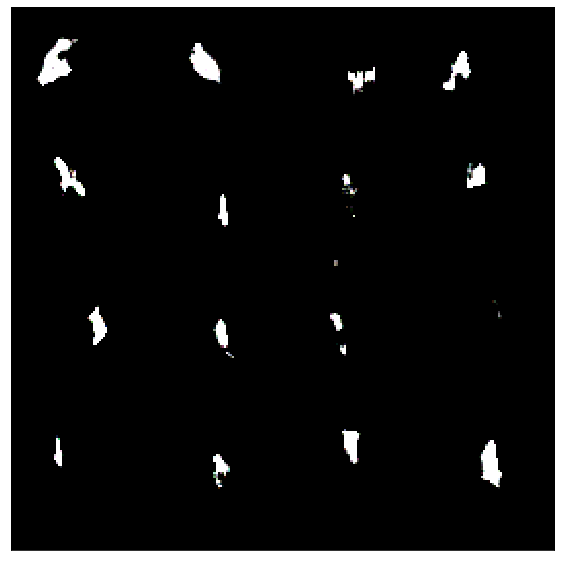

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


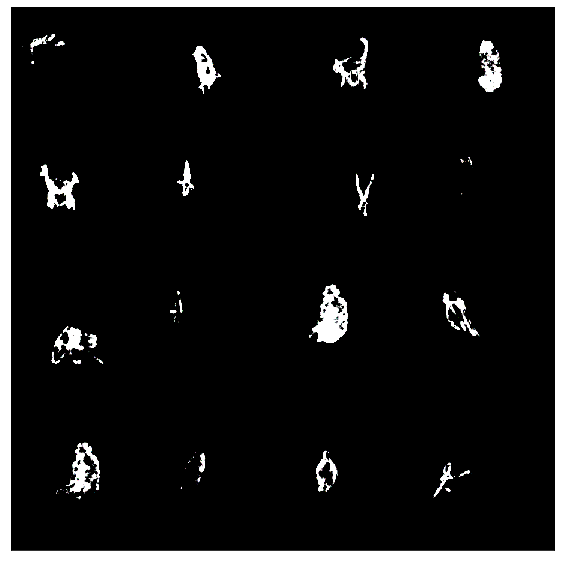

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 11


  0%|                                                                             | 1/17500 [00:13<67:57:41, 13.98s/it]

Train Epoch: 11 [0/280000 (0%)]	Loss: 0.032839
IOU : 0.05023193359375
IOU : 0.05023193359375


  0%|▏                                                                              | 53/17500 [00:17<56:55,  5.11it/s]

Train Epoch: 11 [200/280000 (0%)]	Loss: 0.028758
IOU : 0.0498199462890625


  1%|▍                                                                             | 101/17500 [00:20<18:01, 16.09it/s]

Train Epoch: 11 [400/280000 (1%)]	Loss: 0.036768
IOU : 0.0494384765625
IOU : 0.0494384765625


  1%|▋                                                                             | 149/17500 [00:22<17:18, 16.71it/s]

Train Epoch: 11 [600/280000 (1%)]	Loss: 0.028270
IOU : 0.0489959716796875


  1%|▉                                                                             | 201/17500 [00:26<17:20, 16.63it/s]

Train Epoch: 11 [800/280000 (1%)]	Loss: 0.058614
IOU : 0.05206298828125
IOU : 0.05206298828125


  1%|█                                                                             | 249/17500 [00:28<17:14, 16.67it/s]

Train Epoch: 11 [1000/280000 (1%)]	Loss: 0.046304
IOU : 0.0440826416015625


  2%|█▎                                                                            | 301/17500 [00:32<17:32, 16.34it/s]

Train Epoch: 11 [1200/280000 (2%)]	Loss: 0.039342
IOU : 0.047637939453125
IOU : 0.047637939453125


  2%|█▌                                                                            | 349/17500 [00:35<17:16, 16.54it/s]

Train Epoch: 11 [1400/280000 (2%)]	Loss: 0.038991
IOU : 0.05474853515625


  2%|█▊                                                                            | 401/17500 [00:38<18:08, 15.71it/s]

Train Epoch: 11 [1600/280000 (2%)]	Loss: 0.032216
IOU : 0.054351806640625
IOU : 0.054351806640625


  3%|██                                                                            | 453/17500 [00:41<16:42, 17.01it/s]

Train Epoch: 11 [1800/280000 (3%)]	Loss: 0.035713
IOU : 0.0535125732421875


  3%|██▏                                                                           | 502/17500 [00:44<20:21, 13.91it/s]

Train Epoch: 11 [2000/280000 (3%)]	Loss: 0.032754
IOU : 0.0492706298828125
IOU : 0.0492706298828125


  3%|██▍                                                                           | 552/17500 [00:47<16:54, 16.71it/s]

Train Epoch: 11 [2200/280000 (3%)]	Loss: 0.031916
IOU : 0.0496978759765625


  3%|██▋                                                                           | 601/17500 [00:50<17:43, 15.89it/s]

Train Epoch: 11 [2400/280000 (3%)]	Loss: 0.050654
IOU : 0.053955078125
IOU : 0.053955078125


  4%|██▉                                                                           | 652/17500 [00:54<17:25, 16.12it/s]

Train Epoch: 11 [2600/280000 (4%)]	Loss: 0.038977
IOU : 0.0496368408203125


  4%|███                                                                           | 701/17500 [00:57<19:37, 14.26it/s]

Train Epoch: 11 [2800/280000 (4%)]	Loss: 0.046898
IOU : 0.058807373046875
IOU : 0.058807373046875


  4%|███▎                                                                          | 749/17500 [01:00<17:00, 16.42it/s]

Train Epoch: 11 [3000/280000 (4%)]	Loss: 0.046424
IOU : 0.059295654296875


  5%|███▌                                                                          | 801/17500 [01:03<17:22, 16.01it/s]

Train Epoch: 11 [3200/280000 (5%)]	Loss: 0.028700
IOU : 0.0479736328125
IOU : 0.0479736328125


  5%|███▊                                                                          | 849/17500 [01:06<17:04, 16.26it/s]

Train Epoch: 11 [3400/280000 (5%)]	Loss: 0.041658
IOU : 0.0442352294921875


  5%|████                                                                          | 901/17500 [01:09<16:22, 16.89it/s]

Train Epoch: 11 [3600/280000 (5%)]	Loss: 0.038882
IOU : 0.0459442138671875
IOU : 0.0459442138671875


  5%|████▏                                                                         | 949/17500 [01:12<16:25, 16.79it/s]

Train Epoch: 11 [3800/280000 (5%)]	Loss: 0.045248
IOU : 0.0511322021484375


  6%|████▍                                                                        | 1001/17500 [01:15<17:44, 15.50it/s]

Train Epoch: 11 [4000/280000 (6%)]	Loss: 0.053310
IOU : 0.0660247802734375
IOU : 0.0660247802734375


  6%|████▌                                                                        | 1050/17500 [01:18<17:28, 15.68it/s]

Train Epoch: 11 [4200/280000 (6%)]	Loss: 0.041887
IOU : 0.0664520263671875


  6%|████▊                                                                        | 1101/17500 [01:21<17:04, 16.00it/s]

Train Epoch: 11 [4400/280000 (6%)]	Loss: 0.041461
IOU : 0.061431884765625
IOU : 0.061431884765625


  7%|█████                                                                        | 1151/17500 [01:24<15:57, 17.08it/s]

Train Epoch: 11 [4600/280000 (7%)]	Loss: 0.042341
IOU : 0.065093994140625


  7%|█████▎                                                                       | 1202/17500 [01:27<18:32, 14.64it/s]

Train Epoch: 11 [4800/280000 (7%)]	Loss: 0.034665
IOU : 0.05108642578125
IOU : 0.05108642578125


  7%|█████▌                                                                       | 1252/17500 [01:30<18:25, 14.69it/s]

Train Epoch: 11 [5000/280000 (7%)]	Loss: 0.034951
IOU : 0.05316162109375


  7%|█████▋                                                                       | 1304/17500 [01:34<16:42, 16.15it/s]

Train Epoch: 11 [5200/280000 (7%)]	Loss: 0.034032
IOU : 0.0519561767578125
IOU : 0.0519561767578125


  8%|█████▉                                                                       | 1352/17500 [01:37<18:25, 14.60it/s]

Train Epoch: 11 [5400/280000 (8%)]	Loss: 0.034080
IOU : 0.052978515625


  8%|██████▏                                                                      | 1401/17500 [01:40<17:41, 15.16it/s]

Train Epoch: 11 [5600/280000 (8%)]	Loss: 0.038367
IOU : 0.0528564453125
IOU : 0.0528564453125


  8%|██████▍                                                                      | 1449/17500 [01:43<16:01, 16.69it/s]

Train Epoch: 11 [5800/280000 (8%)]	Loss: 0.041647
IOU : 0.0545196533203125


  9%|██████▌                                                                      | 1501/17500 [01:46<17:05, 15.60it/s]

Train Epoch: 11 [6000/280000 (9%)]	Loss: 0.030275
IOU : 0.0496063232421875
IOU : 0.0496063232421875


  9%|██████▊                                                                      | 1549/17500 [01:49<18:50, 14.11it/s]

Train Epoch: 11 [6200/280000 (9%)]	Loss: 0.035402
IOU : 0.05499267578125


  9%|███████                                                                      | 1601/17500 [01:53<17:05, 15.50it/s]

Train Epoch: 11 [6400/280000 (9%)]	Loss: 0.044321
IOU : 0.0623626708984375
IOU : 0.0623626708984375


  9%|███████▎                                                                     | 1653/17500 [01:56<17:06, 15.44it/s]

Train Epoch: 11 [6600/280000 (9%)]	Loss: 0.041173
IOU : 0.0474853515625


 10%|███████▍                                                                     | 1701/17500 [01:59<17:08, 15.36it/s]

Train Epoch: 11 [6800/280000 (10%)]	Loss: 0.039191
IOU : 0.0476226806640625
IOU : 0.0476226806640625


 10%|███████▋                                                                     | 1749/17500 [02:02<16:53, 15.55it/s]

Train Epoch: 11 [7000/280000 (10%)]	Loss: 0.028819
IOU : 0.051727294921875


 10%|███████▉                                                                     | 1801/17500 [02:05<16:33, 15.80it/s]

Train Epoch: 11 [7200/280000 (10%)]	Loss: 0.047823
IOU : 0.05584716796875
IOU : 0.05584716796875


 11%|████████▏                                                                    | 1849/17500 [02:08<16:04, 16.23it/s]

Train Epoch: 11 [7400/280000 (11%)]	Loss: 0.029012
IOU : 0.048675537109375


 11%|████████▍                                                                    | 1904/17500 [02:12<14:01, 18.53it/s]

Train Epoch: 11 [7600/280000 (11%)]	Loss: 0.036857
IOU : 0.047088623046875
IOU : 0.047088623046875


 11%|████████▌                                                                    | 1949/17500 [02:15<15:39, 16.55it/s]

Train Epoch: 11 [7800/280000 (11%)]	Loss: 0.043203
IOU : 0.0550537109375


 11%|████████▊                                                                    | 2001/17500 [02:18<15:28, 16.68it/s]

Train Epoch: 11 [8000/280000 (11%)]	Loss: 0.038869
IOU : 0.0592803955078125
IOU : 0.0592803955078125


 12%|█████████                                                                    | 2049/17500 [02:21<16:20, 15.76it/s]

Train Epoch: 11 [8200/280000 (12%)]	Loss: 0.038197
IOU : 0.053375244140625


 12%|█████████▏                                                                   | 2101/17500 [02:24<16:12, 15.84it/s]

Train Epoch: 11 [8400/280000 (12%)]	Loss: 0.037703
IOU : 0.05633544921875
IOU : 0.05633544921875


 12%|█████████▍                                                                   | 2149/17500 [02:27<16:03, 15.94it/s]

Train Epoch: 11 [8600/280000 (12%)]	Loss: 0.039709
IOU : 0.050689697265625


 13%|█████████▋                                                                   | 2201/17500 [02:30<16:13, 15.72it/s]

Train Epoch: 11 [8800/280000 (13%)]	Loss: 0.040715
IOU : 0.058135986328125
IOU : 0.058135986328125


 13%|█████████▉                                                                   | 2249/17500 [02:33<18:40, 13.62it/s]

Train Epoch: 11 [9000/280000 (13%)]	Loss: 0.030900
IOU : 0.0529632568359375


 13%|██████████                                                                   | 2301/17500 [02:36<16:40, 15.19it/s]

Train Epoch: 11 [9200/280000 (13%)]	Loss: 0.045783
IOU : 0.0555267333984375
IOU : 0.0555267333984375


 13%|██████████▎                                                                  | 2349/17500 [02:39<14:59, 16.84it/s]

Train Epoch: 11 [9400/280000 (13%)]	Loss: 0.045652
IOU : 0.0535736083984375


 14%|██████████▌                                                                  | 2401/17500 [02:43<15:50, 15.88it/s]

Train Epoch: 11 [9600/280000 (14%)]	Loss: 0.055351
IOU : 0.0565643310546875
IOU : 0.0565643310546875


 14%|██████████▊                                                                  | 2453/17500 [02:46<15:10, 16.52it/s]

Train Epoch: 11 [9800/280000 (14%)]	Loss: 0.030233
IOU : 0.0512542724609375


 14%|███████████                                                                  | 2504/17500 [02:49<13:48, 18.09it/s]

Train Epoch: 11 [10000/280000 (14%)]	Loss: 0.036044
IOU : 0.0557708740234375
IOU : 0.0557708740234375


 15%|███████████▏                                                                 | 2552/17500 [02:52<16:10, 15.40it/s]

Train Epoch: 11 [10200/280000 (15%)]	Loss: 0.046104
IOU : 0.0569915771484375


 15%|███████████▍                                                                 | 2604/17500 [02:55<14:48, 16.76it/s]

Train Epoch: 11 [10400/280000 (15%)]	Loss: 0.035229
IOU : 0.05743408203125
IOU : 0.05743408203125


 15%|███████████▋                                                                 | 2652/17500 [02:58<16:04, 15.39it/s]

Train Epoch: 11 [10600/280000 (15%)]	Loss: 0.031867
IOU : 0.0517425537109375


 15%|███████████▉                                                                 | 2704/17500 [03:02<16:07, 15.30it/s]

Train Epoch: 11 [10800/280000 (15%)]	Loss: 0.027694
IOU : 0.0442352294921875
IOU : 0.0442352294921875


 16%|████████████                                                                 | 2752/17500 [03:05<17:39, 13.91it/s]

Train Epoch: 11 [11000/280000 (16%)]	Loss: 0.036679
IOU : 0.049957275390625


 16%|████████████▎                                                                | 2800/17500 [03:08<16:41, 14.68it/s]

Train Epoch: 11 [11200/280000 (16%)]	Loss: 0.037211
IOU : 0.05206298828125
IOU : 0.05206298828125


 16%|████████████▌                                                                | 2852/17500 [03:11<15:28, 15.78it/s]

Train Epoch: 11 [11400/280000 (16%)]	Loss: 0.031409
IOU : 0.0502777099609375


 17%|████████████▊                                                                | 2900/17500 [03:14<16:18, 14.92it/s]

Train Epoch: 11 [11600/280000 (17%)]	Loss: 0.028751
IOU : 0.053558349609375
IOU : 0.053558349609375


 17%|████████████▉                                                                | 2949/17500 [03:17<15:55, 15.23it/s]

Train Epoch: 11 [11800/280000 (17%)]	Loss: 0.034121
IOU : 0.0529632568359375


 17%|█████████████▏                                                               | 3000/17500 [03:20<15:03, 16.06it/s]

Train Epoch: 11 [12000/280000 (17%)]	Loss: 0.029962
IOU : 0.0537109375
IOU : 0.0537109375


 17%|█████████████▍                                                               | 3048/17500 [03:23<14:50, 16.24it/s]

Train Epoch: 11 [12200/280000 (17%)]	Loss: 0.039286
IOU : 0.0550537109375


 18%|█████████████▋                                                               | 3102/17500 [03:26<13:57, 17.20it/s]

Train Epoch: 11 [12400/280000 (18%)]	Loss: 0.041941
IOU : 0.06036376953125
IOU : 0.06036376953125


 18%|█████████████▊                                                               | 3152/17500 [03:29<14:08, 16.90it/s]

Train Epoch: 11 [12600/280000 (18%)]	Loss: 0.045691
IOU : 0.0515899658203125


 18%|██████████████                                                               | 3203/17500 [03:32<12:42, 18.76it/s]

Train Epoch: 11 [12800/280000 (18%)]	Loss: 0.040304
IOU : 0.0512237548828125
IOU : 0.0512237548828125


 19%|██████████████▎                                                              | 3252/17500 [03:35<14:15, 16.66it/s]

Train Epoch: 11 [13000/280000 (19%)]	Loss: 0.038280
IOU : 0.0580902099609375


 19%|██████████████▌                                                              | 3300/17500 [03:38<14:22, 16.47it/s]

Train Epoch: 11 [13200/280000 (19%)]	Loss: 0.033211
IOU : 0.0532073974609375
IOU : 0.0532073974609375


 19%|██████████████▋                                                              | 3352/17500 [03:42<14:20, 16.45it/s]

Train Epoch: 11 [13400/280000 (19%)]	Loss: 0.037474
IOU : 0.0512542724609375


 19%|██████████████▉                                                              | 3403/17500 [03:45<12:24, 18.92it/s]

Train Epoch: 11 [13600/280000 (19%)]	Loss: 0.034107
IOU : 0.0564117431640625
IOU : 0.0564117431640625


 20%|███████████████▏                                                             | 3448/17500 [03:47<14:07, 16.58it/s]

Train Epoch: 11 [13800/280000 (20%)]	Loss: 0.029091
IOU : 0.0540618896484375


 20%|███████████████▍                                                             | 3502/17500 [03:51<13:58, 16.70it/s]

Train Epoch: 11 [14000/280000 (20%)]	Loss: 0.025982
IOU : 0.05047607421875
IOU : 0.05047607421875


 20%|███████████████▋                                                             | 3552/17500 [03:54<15:08, 15.34it/s]

Train Epoch: 11 [14200/280000 (20%)]	Loss: 0.034466
IOU : 0.0460052490234375


 21%|███████████████▊                                                             | 3600/17500 [03:57<14:08, 16.39it/s]

Train Epoch: 11 [14400/280000 (21%)]	Loss: 0.031588
IOU : 0.0489959716796875
IOU : 0.0489959716796875


 21%|████████████████                                                             | 3652/17500 [04:00<14:23, 16.03it/s]

Train Epoch: 11 [14600/280000 (21%)]	Loss: 0.034990
IOU : 0.0582733154296875


 21%|████████████████▎                                                            | 3700/17500 [04:03<13:47, 16.69it/s]

Train Epoch: 11 [14800/280000 (21%)]	Loss: 0.038744
IOU : 0.0516204833984375
IOU : 0.0516204833984375


 21%|████████████████▌                                                            | 3752/17500 [04:06<13:50, 16.56it/s]

Train Epoch: 11 [15000/280000 (21%)]	Loss: 0.040297
IOU : 0.0563812255859375


 22%|████████████████▋                                                            | 3800/17500 [04:09<14:39, 15.59it/s]

Train Epoch: 11 [15200/280000 (22%)]	Loss: 0.044904
IOU : 0.051849365234375
IOU : 0.051849365234375


 22%|████████████████▉                                                            | 3852/17500 [04:13<13:48, 16.48it/s]

Train Epoch: 11 [15400/280000 (22%)]	Loss: 0.038033
IOU : 0.04864501953125


 22%|█████████████████▏                                                           | 3900/17500 [04:16<13:28, 16.82it/s]

Train Epoch: 11 [15600/280000 (22%)]	Loss: 0.031738
IOU : 0.06060791015625
IOU : 0.06060791015625


 23%|█████████████████▍                                                           | 3952/17500 [04:19<13:57, 16.18it/s]

Train Epoch: 11 [15800/280000 (23%)]	Loss: 0.034938
IOU : 0.051116943359375


 23%|█████████████████▌                                                           | 4000/17500 [04:22<13:12, 17.04it/s]

Train Epoch: 11 [16000/280000 (23%)]	Loss: 0.038426
IOU : 0.0537567138671875
IOU : 0.0537567138671875


 23%|█████████████████▊                                                           | 4052/17500 [04:25<14:15, 15.71it/s]

Train Epoch: 11 [16200/280000 (23%)]	Loss: 0.033297
IOU : 0.0457611083984375


 23%|██████████████████                                                           | 4100/17500 [04:28<13:49, 16.16it/s]

Train Epoch: 11 [16400/280000 (23%)]	Loss: 0.033655
IOU : 0.04437255859375
IOU : 0.04437255859375


 24%|██████████████████▎                                                          | 4148/17500 [04:31<13:24, 16.61it/s]

Train Epoch: 11 [16600/280000 (24%)]	Loss: 0.052282
IOU : 0.0572967529296875


 24%|██████████████████▍                                                          | 4202/17500 [04:34<12:43, 17.41it/s]

Train Epoch: 11 [16800/280000 (24%)]	Loss: 0.036672
IOU : 0.0552520751953125
IOU : 0.0552520751953125


 24%|██████████████████▋                                                          | 4252/17500 [04:37<16:02, 13.77it/s]

Train Epoch: 11 [17000/280000 (24%)]	Loss: 0.037933
IOU : 0.0586090087890625


 25%|██████████████████▉                                                          | 4302/17500 [04:40<14:28, 15.20it/s]

Train Epoch: 11 [17200/280000 (25%)]	Loss: 0.038915
IOU : 0.053924560546875
IOU : 0.053924560546875


 25%|███████████████████▏                                                         | 4351/17500 [04:43<12:37, 17.37it/s]

Train Epoch: 11 [17400/280000 (25%)]	Loss: 0.046485
IOU : 0.055023193359375


 25%|███████████████████▎                                                         | 4402/17500 [04:47<13:17, 16.42it/s]

Train Epoch: 11 [17600/280000 (25%)]	Loss: 0.036613
IOU : 0.0521392822265625
IOU : 0.0521392822265625


 25%|███████████████████▌                                                         | 4452/17500 [04:50<14:34, 14.92it/s]

Train Epoch: 11 [17800/280000 (25%)]	Loss: 0.052797
IOU : 0.0560760498046875


 26%|███████████████████▊                                                         | 4502/17500 [04:53<13:30, 16.04it/s]

Train Epoch: 11 [18000/280000 (26%)]	Loss: 0.048468
IOU : 0.0586090087890625
IOU : 0.0586090087890625


 26%|████████████████████                                                         | 4551/17500 [04:56<11:32, 18.70it/s]

Train Epoch: 11 [18200/280000 (26%)]	Loss: 0.029656
IOU : 0.0563812255859375


 26%|████████████████████▏                                                        | 4600/17500 [04:59<12:57, 16.58it/s]

Train Epoch: 11 [18400/280000 (26%)]	Loss: 0.036302
IOU : 0.0540924072265625
IOU : 0.0540924072265625


 27%|████████████████████▍                                                        | 4652/17500 [05:02<15:07, 14.16it/s]

Train Epoch: 11 [18600/280000 (27%)]	Loss: 0.040194
IOU : 0.0515899658203125


 27%|████████████████████▋                                                        | 4702/17500 [05:05<13:25, 15.90it/s]

Train Epoch: 11 [18800/280000 (27%)]	Loss: 0.030141
IOU : 0.0637664794921875
IOU : 0.0637664794921875


 27%|████████████████████▉                                                        | 4752/17500 [05:08<12:14, 17.35it/s]

Train Epoch: 11 [19000/280000 (27%)]	Loss: 0.049218
IOU : 0.0562591552734375


 27%|█████████████████████▏                                                       | 4802/17500 [05:11<13:49, 15.32it/s]

Train Epoch: 11 [19200/280000 (27%)]	Loss: 0.037223
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 28%|█████████████████████▎                                                       | 4853/17500 [05:15<13:43, 15.35it/s]

Train Epoch: 11 [19400/280000 (28%)]	Loss: 0.054150
IOU : 0.0631256103515625


 28%|█████████████████████▌                                                       | 4902/17500 [05:18<14:27, 14.52it/s]

Train Epoch: 11 [19600/280000 (28%)]	Loss: 0.029713
IOU : 0.050140380859375
IOU : 0.050140380859375


 28%|█████████████████████▊                                                       | 4954/17500 [05:21<12:29, 16.74it/s]

Train Epoch: 11 [19800/280000 (28%)]	Loss: 0.049205
IOU : 0.0547637939453125


 29%|██████████████████████                                                       | 5002/17500 [05:24<13:03, 15.95it/s]

Train Epoch: 11 [20000/280000 (29%)]	Loss: 0.036655
IOU : 0.0485687255859375
IOU : 0.0485687255859375


 29%|██████████████████████▏                                                      | 5054/17500 [05:27<13:34, 15.29it/s]

Train Epoch: 11 [20200/280000 (29%)]	Loss: 0.027705
IOU : 0.0453643798828125


 29%|██████████████████████▍                                                      | 5101/17500 [05:30<13:33, 15.23it/s]

Train Epoch: 11 [20400/280000 (29%)]	Loss: 0.032637
IOU : 0.0557708740234375
IOU : 0.0557708740234375


 29%|██████████████████████▋                                                      | 5152/17500 [05:33<11:55, 17.25it/s]

Train Epoch: 11 [20600/280000 (29%)]	Loss: 0.038501
IOU : 0.046173095703125


 30%|██████████████████████▉                                                      | 5201/17500 [05:36<13:14, 15.48it/s]

Train Epoch: 11 [20800/280000 (30%)]	Loss: 0.032875
IOU : 0.0547943115234375
IOU : 0.0547943115234375


 30%|███████████████████████                                                      | 5251/17500 [05:39<12:46, 15.99it/s]

Train Epoch: 11 [21000/280000 (30%)]	Loss: 0.034321
IOU : 0.0543975830078125


 30%|███████████████████████▎                                                     | 5301/17500 [05:42<12:22, 16.42it/s]

Train Epoch: 11 [21200/280000 (30%)]	Loss: 0.029954
IOU : 0.053375244140625
IOU : 0.053375244140625


 31%|███████████████████████▌                                                     | 5353/17500 [05:45<12:03, 16.79it/s]

Train Epoch: 11 [21400/280000 (31%)]	Loss: 0.045360
IOU : 0.0617523193359375


 31%|███████████████████████▊                                                     | 5401/17500 [05:48<12:29, 16.15it/s]

Train Epoch: 11 [21600/280000 (31%)]	Loss: 0.035583
IOU : 0.0502777099609375
IOU : 0.0502777099609375


 31%|███████████████████████▉                                                     | 5449/17500 [05:51<12:08, 16.54it/s]

Train Epoch: 11 [21800/280000 (31%)]	Loss: 0.030058
IOU : 0.04833984375


 31%|████████████████████████▏                                                    | 5502/17500 [05:55<16:49, 11.88it/s]

Train Epoch: 11 [22000/280000 (31%)]	Loss: 0.031875
IOU : 0.0613250732421875
IOU : 0.0613250732421875


 32%|████████████████████████▍                                                    | 5553/17500 [05:58<12:05, 16.47it/s]

Train Epoch: 11 [22200/280000 (32%)]	Loss: 0.053336
IOU : 0.0453948974609375


 32%|████████████████████████▋                                                    | 5601/17500 [06:01<12:03, 16.46it/s]

Train Epoch: 11 [22400/280000 (32%)]	Loss: 0.037658
IOU : 0.0487518310546875
IOU : 0.0487518310546875


 32%|████████████████████████▊                                                    | 5649/17500 [06:04<12:13, 16.17it/s]

Train Epoch: 11 [22600/280000 (32%)]	Loss: 0.035925
IOU : 0.0525970458984375


 33%|█████████████████████████                                                    | 5701/17500 [06:07<11:58, 16.42it/s]

Train Epoch: 11 [22800/280000 (33%)]	Loss: 0.040125
IOU : 0.0532379150390625
IOU : 0.0532379150390625


 33%|█████████████████████████▎                                                   | 5749/17500 [06:10<11:47, 16.60it/s]

Train Epoch: 11 [23000/280000 (33%)]	Loss: 0.031611
IOU : 0.05078125


 33%|█████████████████████████▌                                                   | 5801/17500 [06:13<12:27, 15.65it/s]

Train Epoch: 11 [23200/280000 (33%)]	Loss: 0.031589
IOU : 0.0543212890625
IOU : 0.0543212890625


 33%|█████████████████████████▊                                                   | 5853/17500 [06:16<11:33, 16.80it/s]

Train Epoch: 11 [23400/280000 (33%)]	Loss: 0.029748
IOU : 0.05682373046875


 34%|█████████████████████████▉                                                   | 5901/17500 [06:19<13:13, 14.61it/s]

Train Epoch: 11 [23600/280000 (34%)]	Loss: 0.050093
IOU : 0.057525634765625
IOU : 0.057525634765625


 34%|██████████████████████████▏                                                  | 5953/17500 [06:22<11:54, 16.17it/s]

Train Epoch: 11 [23800/280000 (34%)]	Loss: 0.028172
IOU : 0.04693603515625


 34%|██████████████████████████▍                                                  | 6001/17500 [06:25<13:51, 13.83it/s]

Train Epoch: 11 [24000/280000 (34%)]	Loss: 0.039361
IOU : 0.0588226318359375
IOU : 0.0588226318359375


 35%|██████████████████████████▋                                                  | 6053/17500 [06:29<13:10, 14.48it/s]

Train Epoch: 11 [24200/280000 (35%)]	Loss: 0.042373
IOU : 0.0572662353515625


 35%|██████████████████████████▊                                                  | 6101/17500 [06:31<11:25, 16.62it/s]

Train Epoch: 11 [24400/280000 (35%)]	Loss: 0.039577
IOU : 0.055633544921875
IOU : 0.055633544921875


 35%|███████████████████████████                                                  | 6152/17500 [06:34<10:07, 18.69it/s]

Train Epoch: 11 [24600/280000 (35%)]	Loss: 0.042358
IOU : 0.0611114501953125


 35%|███████████████████████████▎                                                 | 6201/17500 [06:38<12:09, 15.49it/s]

Train Epoch: 11 [24800/280000 (35%)]	Loss: 0.033848
IOU : 0.0505523681640625
IOU : 0.0505523681640625


 36%|███████████████████████████▍                                                 | 6249/17500 [06:40<11:21, 16.52it/s]

Train Epoch: 11 [25000/280000 (36%)]	Loss: 0.031730
IOU : 0.0514373779296875


 36%|███████████████████████████▋                                                 | 6304/17500 [06:44<10:06, 18.45it/s]

Train Epoch: 11 [25200/280000 (36%)]	Loss: 0.037844
IOU : 0.0518646240234375
IOU : 0.0518646240234375


 36%|███████████████████████████▉                                                 | 6353/17500 [06:47<12:06, 15.34it/s]

Train Epoch: 11 [25400/280000 (36%)]	Loss: 0.036657
IOU : 0.0506744384765625


 37%|████████████████████████████▏                                                | 6401/17500 [06:50<11:17, 16.39it/s]

Train Epoch: 11 [25600/280000 (37%)]	Loss: 0.041514
IOU : 0.0611114501953125
IOU : 0.0611114501953125


 37%|████████████████████████████▍                                                | 6454/17500 [06:53<11:01, 16.71it/s]

Train Epoch: 11 [25800/280000 (37%)]	Loss: 0.043789
IOU : 0.0592803955078125


 37%|████████████████████████████▌                                                | 6503/17500 [06:56<13:05, 14.00it/s]

Train Epoch: 11 [26000/280000 (37%)]	Loss: 0.034457
IOU : 0.052337646484375
IOU : 0.052337646484375


 37%|████████████████████████████▊                                                | 6554/17500 [06:59<10:37, 17.17it/s]

Train Epoch: 11 [26200/280000 (37%)]	Loss: 0.034215
IOU : 0.0463714599609375


 38%|█████████████████████████████                                                | 6603/17500 [07:02<10:54, 16.64it/s]

Train Epoch: 11 [26400/280000 (38%)]	Loss: 0.038072
IOU : 0.060791015625
IOU : 0.060791015625


 38%|█████████████████████████████▎                                               | 6653/17500 [07:06<11:37, 15.55it/s]

Train Epoch: 11 [26600/280000 (38%)]	Loss: 0.038619
IOU : 0.0544891357421875


 38%|█████████████████████████████▍                                               | 6703/17500 [07:09<12:22, 14.54it/s]

Train Epoch: 11 [26800/280000 (38%)]	Loss: 0.046420
IOU : 0.05810546875
IOU : 0.05810546875


 39%|█████████████████████████████▋                                               | 6753/17500 [07:12<11:39, 15.37it/s]

Train Epoch: 11 [27000/280000 (39%)]	Loss: 0.046132
IOU : 0.066680908203125


 39%|█████████████████████████████▉                                               | 6800/17500 [07:15<10:56, 16.29it/s]

Train Epoch: 11 [27200/280000 (39%)]	Loss: 0.037389
IOU : 0.052093505859375
IOU : 0.052093505859375


 39%|██████████████████████████████▏                                              | 6852/17500 [07:18<11:30, 15.42it/s]

Train Epoch: 11 [27400/280000 (39%)]	Loss: 0.041017
IOU : 0.05877685546875


 39%|██████████████████████████████▎                                              | 6902/17500 [07:21<11:09, 15.83it/s]

Train Epoch: 11 [27600/280000 (39%)]	Loss: 0.040192
IOU : 0.0601348876953125
IOU : 0.0601348876953125


 40%|██████████████████████████████▌                                              | 6952/17500 [07:24<10:54, 16.11it/s]

Train Epoch: 11 [27800/280000 (40%)]	Loss: 0.032430
IOU : 0.0521087646484375


 40%|██████████████████████████████▊                                              | 7000/17500 [07:27<10:39, 16.41it/s]

Train Epoch: 11 [28000/280000 (40%)]	Loss: 0.039309
IOU : 0.05401611328125
IOU : 0.05401611328125


 40%|███████████████████████████████                                              | 7048/17500 [07:30<10:37, 16.40it/s]

Train Epoch: 11 [28200/280000 (40%)]	Loss: 0.055506
IOU : 0.0599822998046875


 41%|███████████████████████████████▏                                             | 7100/17500 [07:33<10:38, 16.29it/s]

Train Epoch: 11 [28400/280000 (41%)]	Loss: 0.042554
IOU : 0.050537109375
IOU : 0.050537109375


 41%|███████████████████████████████▍                                             | 7152/17500 [07:37<10:26, 16.52it/s]

Train Epoch: 11 [28600/280000 (41%)]	Loss: 0.037955
IOU : 0.0463714599609375


 41%|███████████████████████████████▋                                             | 7200/17500 [07:40<11:15, 15.24it/s]

Train Epoch: 11 [28800/280000 (41%)]	Loss: 0.039429
IOU : 0.0583648681640625
IOU : 0.0583648681640625


 41%|███████████████████████████████▉                                             | 7248/17500 [07:42<10:27, 16.34it/s]

Train Epoch: 11 [29000/280000 (41%)]	Loss: 0.036171
IOU : 0.054168701171875


 42%|████████████████████████████████▏                                            | 7303/17500 [07:46<09:19, 18.22it/s]

Train Epoch: 11 [29200/280000 (42%)]	Loss: 0.034187
IOU : 0.04730224609375
IOU : 0.04730224609375


 42%|████████████████████████████████▎                                            | 7353/17500 [07:49<10:27, 16.18it/s]

Train Epoch: 11 [29400/280000 (42%)]	Loss: 0.067050
IOU : 0.0617218017578125


 42%|████████████████████████████████▌                                            | 7403/17500 [07:52<11:26, 14.71it/s]

Train Epoch: 11 [29600/280000 (42%)]	Loss: 0.043037
IOU : 0.05499267578125
IOU : 0.05499267578125


 43%|████████████████████████████████▊                                            | 7454/17500 [07:55<09:29, 17.64it/s]

Train Epoch: 11 [29800/280000 (43%)]	Loss: 0.055868
IOU : 0.057830810546875


 43%|█████████████████████████████████                                            | 7503/17500 [07:58<10:02, 16.59it/s]

Train Epoch: 11 [30000/280000 (43%)]	Loss: 0.028626
IOU : 0.04498291015625
IOU : 0.04498291015625


 43%|█████████████████████████████████▏                                           | 7551/17500 [08:01<10:14, 16.18it/s]

Train Epoch: 11 [30200/280000 (43%)]	Loss: 0.045912
IOU : 0.0613861083984375


 43%|█████████████████████████████████▍                                           | 7599/17500 [08:04<10:03, 16.39it/s]

Train Epoch: 11 [30400/280000 (43%)]	Loss: 0.045190
IOU : 0.0550994873046875
IOU : 0.0550994873046875


 44%|█████████████████████████████████▋                                           | 7654/17500 [08:07<08:59, 18.25it/s]

Train Epoch: 11 [30600/280000 (44%)]	Loss: 0.035775
IOU : 0.0536346435546875


 44%|█████████████████████████████████▉                                           | 7699/17500 [08:10<10:24, 15.69it/s]

Train Epoch: 11 [30800/280000 (44%)]	Loss: 0.031698
IOU : 0.0487823486328125
IOU : 0.0487823486328125


 44%|██████████████████████████████████                                           | 7751/17500 [08:14<09:56, 16.35it/s]

Train Epoch: 11 [31000/280000 (44%)]	Loss: 0.043585
IOU : 0.04620361328125


 45%|██████████████████████████████████▎                                          | 7802/17500 [08:17<08:57, 18.03it/s]

Train Epoch: 11 [31200/280000 (45%)]	Loss: 0.035909
IOU : 0.05499267578125
IOU : 0.05499267578125


 45%|██████████████████████████████████▌                                          | 7853/17500 [08:20<10:03, 16.00it/s]

Train Epoch: 11 [31400/280000 (45%)]	Loss: 0.077547
IOU : 0.0667877197265625


 45%|██████████████████████████████████▊                                          | 7904/17500 [08:23<09:44, 16.42it/s]

Train Epoch: 11 [31600/280000 (45%)]	Loss: 0.047464
IOU : 0.0479278564453125
IOU : 0.0479278564453125


 45%|██████████████████████████████████▉                                          | 7953/17500 [08:26<10:04, 15.80it/s]

Train Epoch: 11 [31800/280000 (45%)]	Loss: 0.043096
IOU : 0.0547027587890625


 46%|███████████████████████████████████▏                                         | 8001/17500 [08:29<10:02, 15.76it/s]

Train Epoch: 11 [32000/280000 (46%)]	Loss: 0.026863
IOU : 0.0474090576171875
IOU : 0.0474090576171875


 46%|███████████████████████████████████▍                                         | 8049/17500 [08:32<09:48, 16.05it/s]

Train Epoch: 11 [32200/280000 (46%)]	Loss: 0.035203
IOU : 0.04864501953125


 46%|███████████████████████████████████▋                                         | 8101/17500 [08:35<09:52, 15.87it/s]

Train Epoch: 11 [32400/280000 (46%)]	Loss: 0.035525
IOU : 0.0489349365234375
IOU : 0.0489349365234375


 47%|███████████████████████████████████▊                                         | 8149/17500 [08:38<10:02, 15.53it/s]

Train Epoch: 11 [32600/280000 (47%)]	Loss: 0.038135
IOU : 0.0565032958984375


 47%|████████████████████████████████████                                         | 8202/17500 [08:41<10:30, 14.74it/s]

Train Epoch: 11 [32800/280000 (47%)]	Loss: 0.037215
IOU : 0.0459442138671875
IOU : 0.0459442138671875


 47%|████████████████████████████████████▎                                        | 8249/17500 [08:44<09:17, 16.60it/s]

Train Epoch: 11 [33000/280000 (47%)]	Loss: 0.047901
IOU : 0.056732177734375


 47%|████████████████████████████████████▌                                        | 8303/17500 [08:47<08:56, 17.13it/s]

Train Epoch: 11 [33200/280000 (47%)]	Loss: 0.042526
IOU : 0.054412841796875
IOU : 0.054412841796875


 48%|████████████████████████████████████▋                                        | 8349/17500 [08:50<09:25, 16.18it/s]

Train Epoch: 11 [33400/280000 (48%)]	Loss: 0.043441
IOU : 0.047149658203125


 48%|████████████████████████████████████▉                                        | 8401/17500 [08:53<09:03, 16.75it/s]

Train Epoch: 11 [33600/280000 (48%)]	Loss: 0.038312
IOU : 0.0530853271484375
IOU : 0.0530853271484375


 48%|█████████████████████████████████████▏                                       | 8453/17500 [08:57<08:58, 16.81it/s]

Train Epoch: 11 [33800/280000 (48%)]	Loss: 0.035840
IOU : 0.049346923828125


 49%|█████████████████████████████████████▍                                       | 8501/17500 [09:00<09:40, 15.50it/s]

Train Epoch: 11 [34000/280000 (49%)]	Loss: 0.038574
IOU : 0.0511474609375
IOU : 0.0511474609375


 49%|█████████████████████████████████████▌                                       | 8549/17500 [09:03<09:13, 16.18it/s]

Train Epoch: 11 [34200/280000 (49%)]	Loss: 0.061451
IOU : 0.0620574951171875


 49%|█████████████████████████████████████▊                                       | 8601/17500 [09:06<09:02, 16.40it/s]

Train Epoch: 11 [34400/280000 (49%)]	Loss: 0.028006
IOU : 0.0547943115234375
IOU : 0.0547943115234375


 49%|██████████████████████████████████████                                       | 8649/17500 [09:09<08:47, 16.77it/s]

Train Epoch: 11 [34600/280000 (49%)]	Loss: 0.037976
IOU : 0.06097412109375


 50%|██████████████████████████████████████▎                                      | 8701/17500 [09:12<09:12, 15.94it/s]

Train Epoch: 11 [34800/280000 (50%)]	Loss: 0.035649
IOU : 0.061614990234375
IOU : 0.061614990234375


 50%|██████████████████████████████████████▌                                      | 8753/17500 [09:15<08:43, 16.70it/s]

Train Epoch: 11 [35000/280000 (50%)]	Loss: 0.037975
IOU : 0.054107666015625


 50%|██████████████████████████████████████▋                                      | 8801/17500 [09:18<09:08, 15.87it/s]

Train Epoch: 11 [35200/280000 (50%)]	Loss: 0.033746
IOU : 0.057159423828125
IOU : 0.057159423828125


 51%|██████████████████████████████████████▉                                      | 8853/17500 [09:21<08:35, 16.78it/s]

Train Epoch: 11 [35400/280000 (51%)]	Loss: 0.034963
IOU : 0.052978515625


 51%|███████████████████████████████████████▏                                     | 8901/17500 [09:24<08:38, 16.57it/s]

Train Epoch: 11 [35600/280000 (51%)]	Loss: 0.027608
IOU : 0.0494537353515625
IOU : 0.0494537353515625


 51%|███████████████████████████████████████▍                                     | 8949/17500 [09:27<08:55, 15.98it/s]

Train Epoch: 11 [35800/280000 (51%)]	Loss: 0.059131
IOU : 0.06060791015625


 51%|███████████████████████████████████████▌                                     | 9001/17500 [09:30<08:43, 16.24it/s]

Train Epoch: 11 [36000/280000 (51%)]	Loss: 0.036387
IOU : 0.0516357421875
IOU : 0.0516357421875


 52%|███████████████████████████████████████▊                                     | 9049/17500 [09:33<08:32, 16.50it/s]

Train Epoch: 11 [36200/280000 (52%)]	Loss: 0.056112
IOU : 0.0675506591796875


 52%|████████████████████████████████████████                                     | 9101/17500 [09:36<08:32, 16.40it/s]

Train Epoch: 11 [36400/280000 (52%)]	Loss: 0.044452
IOU : 0.0562896728515625
IOU : 0.0562896728515625


 52%|████████████████████████████████████████▎                                    | 9153/17500 [09:40<08:45, 15.88it/s]

Train Epoch: 11 [36600/280000 (52%)]	Loss: 0.029899
IOU : 0.05133056640625


 53%|████████████████████████████████████████▍                                    | 9201/17500 [09:43<08:55, 15.51it/s]

Train Epoch: 11 [36800/280000 (53%)]	Loss: 0.042328
IOU : 0.0537261962890625
IOU : 0.0537261962890625


 53%|████████████████████████████████████████▋                                    | 9249/17500 [09:46<08:17, 16.59it/s]

Train Epoch: 11 [37000/280000 (53%)]	Loss: 0.037492
IOU : 0.061279296875


 53%|████████████████████████████████████████▉                                    | 9301/17500 [09:49<08:13, 16.61it/s]

Train Epoch: 11 [37200/280000 (53%)]	Loss: 0.036251
IOU : 0.0477142333984375
IOU : 0.0477142333984375


 53%|█████████████████████████████████████████▏                                   | 9349/17500 [09:52<08:03, 16.85it/s]

Train Epoch: 11 [37400/280000 (53%)]	Loss: 0.039610
IOU : 0.05255126953125


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [09:55<08:39, 15.59it/s]

Train Epoch: 11 [37600/280000 (54%)]	Loss: 0.044201
IOU : 0.050201416015625
IOU : 0.050201416015625


 54%|█████████████████████████████████████████▌                                   | 9449/17500 [09:58<08:18, 16.16it/s]

Train Epoch: 11 [37800/280000 (54%)]	Loss: 0.031290
IOU : 0.04833984375


 54%|█████████████████████████████████████████▊                                   | 9504/17500 [10:01<08:21, 15.93it/s]

Train Epoch: 11 [38000/280000 (54%)]	Loss: 0.031882
IOU : 0.0531005859375
IOU : 0.0531005859375


 55%|██████████████████████████████████████████                                   | 9549/17500 [10:04<08:26, 15.71it/s]

Train Epoch: 11 [38200/280000 (55%)]	Loss: 0.035645
IOU : 0.0503082275390625


 55%|██████████████████████████████████████████▏                                  | 9602/17500 [10:07<08:57, 14.69it/s]

Train Epoch: 11 [38400/280000 (55%)]	Loss: 0.044471
IOU : 0.053619384765625
IOU : 0.053619384765625


 55%|██████████████████████████████████████████▍                                  | 9649/17500 [10:10<08:00, 16.34it/s]

Train Epoch: 11 [38600/280000 (55%)]	Loss: 0.062059
IOU : 0.054046630859375


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [10:13<07:53, 16.46it/s]

Train Epoch: 11 [38800/280000 (55%)]	Loss: 0.039735
IOU : 0.0484161376953125
IOU : 0.0484161376953125


 56%|██████████████████████████████████████████▉                                  | 9749/17500 [10:16<07:50, 16.49it/s]

Train Epoch: 11 [39000/280000 (56%)]	Loss: 0.034044
IOU : 0.0480499267578125


 56%|███████████████████████████████████████████                                  | 9801/17500 [10:19<07:56, 16.15it/s]

Train Epoch: 11 [39200/280000 (56%)]	Loss: 0.057289
IOU : 0.056549072265625
IOU : 0.056549072265625


 56%|███████████████████████████████████████████▎                                 | 9853/17500 [10:23<07:35, 16.80it/s]

Train Epoch: 11 [39400/280000 (56%)]	Loss: 0.040495
IOU : 0.05242919921875


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [10:26<08:18, 15.24it/s]

Train Epoch: 11 [39600/280000 (57%)]	Loss: 0.037955
IOU : 0.0532073974609375
IOU : 0.0532073974609375


 57%|███████████████████████████████████████████▊                                 | 9949/17500 [10:29<08:19, 15.11it/s]

Train Epoch: 11 [39800/280000 (57%)]	Loss: 0.030949
IOU : 0.0535430908203125


 57%|███████████████████████████████████████████▍                                | 10001/17500 [10:32<07:54, 15.82it/s]

Train Epoch: 11 [40000/280000 (57%)]	Loss: 0.029983
IOU : 0.0538177490234375
IOU : 0.0538177490234375


 57%|███████████████████████████████████████████▋                                | 10049/17500 [10:35<07:30, 16.54it/s]

Train Epoch: 11 [40200/280000 (57%)]	Loss: 0.040163
IOU : 0.0534820556640625


 58%|███████████████████████████████████████████▊                                | 10101/17500 [10:38<07:36, 16.21it/s]

Train Epoch: 11 [40400/280000 (58%)]	Loss: 0.058488
IOU : 0.0657806396484375
IOU : 0.0657806396484375


 58%|████████████████████████████████████████████                                | 10149/17500 [10:41<07:37, 16.05it/s]

Train Epoch: 11 [40600/280000 (58%)]	Loss: 0.034321
IOU : 0.0533599853515625


 58%|████████████████████████████████████████████▎                               | 10201/17500 [10:44<07:25, 16.38it/s]

Train Epoch: 11 [40800/280000 (58%)]	Loss: 0.039916
IOU : 0.053253173828125
IOU : 0.053253173828125


 59%|████████████████████████████████████████████▌                               | 10253/17500 [10:47<08:02, 15.03it/s]

Train Epoch: 11 [41000/280000 (59%)]	Loss: 0.038450
IOU : 0.051361083984375


 59%|████████████████████████████████████████████▋                               | 10301/17500 [10:50<07:33, 15.87it/s]

Train Epoch: 11 [41200/280000 (59%)]	Loss: 0.042644
IOU : 0.0492401123046875
IOU : 0.0492401123046875


 59%|████████████████████████████████████████████▉                               | 10353/17500 [10:53<07:03, 16.89it/s]

Train Epoch: 11 [41400/280000 (59%)]	Loss: 0.034620
IOU : 0.0485687255859375


 59%|█████████████████████████████████████████████▏                              | 10402/17500 [10:56<07:01, 16.85it/s]

Train Epoch: 11 [41600/280000 (59%)]	Loss: 0.035542
IOU : 0.0550689697265625
IOU : 0.0550689697265625


 60%|█████████████████████████████████████████████▍                              | 10449/17500 [10:59<07:27, 15.75it/s]

Train Epoch: 11 [41800/280000 (60%)]	Loss: 0.045235
IOU : 0.0576019287109375


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [11:03<07:09, 16.28it/s]

Train Epoch: 11 [42000/280000 (60%)]	Loss: 0.074969
IOU : 0.0586090087890625
IOU : 0.0586090087890625


 60%|█████████████████████████████████████████████▊                              | 10549/17500 [11:06<06:54, 16.77it/s]

Train Epoch: 11 [42200/280000 (60%)]	Loss: 0.034024
IOU : 0.0461883544921875


 61%|██████████████████████████████████████████████                              | 10601/17500 [11:09<07:42, 14.91it/s]

Train Epoch: 11 [42400/280000 (61%)]	Loss: 0.038116
IOU : 0.0563507080078125
IOU : 0.0563507080078125


 61%|██████████████████████████████████████████████▏                             | 10649/17500 [11:12<07:37, 14.99it/s]

Train Epoch: 11 [42600/280000 (61%)]	Loss: 0.038072
IOU : 0.0551910400390625


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [11:15<07:16, 15.59it/s]

Train Epoch: 11 [42800/280000 (61%)]	Loss: 0.044138
IOU : 0.0600738525390625
IOU : 0.0600738525390625


 61%|██████████████████████████████████████████████▋                             | 10749/17500 [11:19<07:35, 14.81it/s]

Train Epoch: 11 [43000/280000 (61%)]	Loss: 0.038169
IOU : 0.0557861328125


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [11:22<07:07, 15.67it/s]

Train Epoch: 11 [43200/280000 (62%)]	Loss: 0.034965
IOU : 0.0499267578125
IOU : 0.0499267578125


 62%|███████████████████████████████████████████████                             | 10849/17500 [11:25<06:49, 16.26it/s]

Train Epoch: 11 [43400/280000 (62%)]	Loss: 0.029313
IOU : 0.0621490478515625


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [11:28<06:56, 15.86it/s]

Train Epoch: 11 [43600/280000 (62%)]	Loss: 0.031496
IOU : 0.05645751953125
IOU : 0.05645751953125


 63%|███████████████████████████████████████████████▌                            | 10949/17500 [11:31<07:20, 14.86it/s]

Train Epoch: 11 [43800/280000 (63%)]	Loss: 0.044862
IOU : 0.0626068115234375


 63%|███████████████████████████████████████████████▊                            | 11004/17500 [11:35<05:58, 18.11it/s]

Train Epoch: 11 [44000/280000 (63%)]	Loss: 0.030735
IOU : 0.04766845703125
IOU : 0.04766845703125


 63%|████████████████████████████████████████████████                            | 11053/17500 [11:38<06:35, 16.31it/s]

Train Epoch: 11 [44200/280000 (63%)]	Loss: 0.044517
IOU : 0.0498046875


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [11:41<07:13, 14.78it/s]

Train Epoch: 11 [44400/280000 (63%)]	Loss: 0.038270
IOU : 0.0563507080078125
IOU : 0.0563507080078125


 64%|████████████████████████████████████████████████▍                           | 11153/17500 [11:45<06:45, 15.66it/s]

Train Epoch: 11 [44600/280000 (64%)]	Loss: 0.054116
IOU : 0.0562744140625


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [11:48<07:43, 13.58it/s]

Train Epoch: 11 [44800/280000 (64%)]	Loss: 0.040131
IOU : 0.047454833984375
IOU : 0.047454833984375


 64%|████████████████████████████████████████████████▊                           | 11249/17500 [11:51<06:28, 16.09it/s]

Train Epoch: 11 [45000/280000 (64%)]	Loss: 0.041180
IOU : 0.05377197265625


 65%|█████████████████████████████████████████████████                           | 11301/17500 [11:54<06:13, 16.59it/s]

Train Epoch: 11 [45200/280000 (65%)]	Loss: 0.042305
IOU : 0.0568389892578125
IOU : 0.0568389892578125


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [11:58<06:42, 15.26it/s]

Train Epoch: 11 [45400/280000 (65%)]	Loss: 0.030561
IOU : 0.05023193359375


 65%|█████████████████████████████████████████████████▌                          | 11404/17500 [12:01<06:22, 15.96it/s]

Train Epoch: 11 [45600/280000 (65%)]	Loss: 0.035066
IOU : 0.049713134765625
IOU : 0.049713134765625


 65%|█████████████████████████████████████████████████▋                          | 11452/17500 [12:04<06:46, 14.87it/s]

Train Epoch: 11 [45800/280000 (65%)]	Loss: 0.027355
IOU : 0.04571533203125


 66%|█████████████████████████████████████████████████▉                          | 11504/17500 [12:07<06:06, 16.37it/s]

Train Epoch: 11 [46000/280000 (66%)]	Loss: 0.037079
IOU : 0.0471038818359375
IOU : 0.0471038818359375


 66%|██████████████████████████████████████████████████▏                         | 11552/17500 [12:10<06:17, 15.74it/s]

Train Epoch: 11 [46200/280000 (66%)]	Loss: 0.030984
IOU : 0.051910400390625


 66%|██████████████████████████████████████████████████▍                         | 11603/17500 [12:13<05:46, 17.01it/s]

Train Epoch: 11 [46400/280000 (66%)]	Loss: 0.041902
IOU : 0.05413818359375
IOU : 0.05413818359375


 67%|██████████████████████████████████████████████████▌                         | 11652/17500 [12:16<05:48, 16.78it/s]

Train Epoch: 11 [46600/280000 (67%)]	Loss: 0.033343
IOU : 0.052337646484375


 67%|██████████████████████████████████████████████████▊                         | 11700/17500 [12:19<06:44, 14.34it/s]

Train Epoch: 11 [46800/280000 (67%)]	Loss: 0.045373
IOU : 0.060882568359375
IOU : 0.060882568359375


 67%|███████████████████████████████████████████████████                         | 11752/17500 [12:23<05:46, 16.59it/s]

Train Epoch: 11 [47000/280000 (67%)]	Loss: 0.044969
IOU : 0.0579681396484375


 67%|███████████████████████████████████████████████████▏                        | 11800/17500 [12:26<05:58, 15.89it/s]

Train Epoch: 11 [47200/280000 (67%)]	Loss: 0.045771
IOU : 0.05511474609375
IOU : 0.05511474609375


 68%|███████████████████████████████████████████████████▍                        | 11848/17500 [12:29<05:51, 16.06it/s]

Train Epoch: 11 [47400/280000 (68%)]	Loss: 0.039165
IOU : 0.045135498046875


 68%|███████████████████████████████████████████████████▋                        | 11902/17500 [12:32<06:01, 15.49it/s]

Train Epoch: 11 [47600/280000 (68%)]	Loss: 0.039126
IOU : 0.04632568359375
IOU : 0.04632568359375


 68%|███████████████████████████████████████████████████▉                        | 11952/17500 [12:35<06:01, 15.34it/s]

Train Epoch: 11 [47800/280000 (68%)]	Loss: 0.038167
IOU : 0.0532989501953125


 69%|████████████████████████████████████████████████████                        | 12000/17500 [12:38<05:29, 16.68it/s]

Train Epoch: 11 [48000/280000 (69%)]	Loss: 0.044587
IOU : 0.054046630859375
IOU : 0.054046630859375


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [12:42<05:25, 16.73it/s]

Train Epoch: 11 [48200/280000 (69%)]	Loss: 0.032750
IOU : 0.0456085205078125


 69%|████████████████████████████████████████████████████▌                       | 12100/17500 [12:45<05:54, 15.23it/s]

Train Epoch: 11 [48400/280000 (69%)]	Loss: 0.048503
IOU : 0.0496368408203125
IOU : 0.0496368408203125


 69%|████████████████████████████████████████████████████▊                       | 12152/17500 [12:48<05:34, 15.99it/s]

Train Epoch: 11 [48600/280000 (69%)]	Loss: 0.025650
IOU : 0.0509185791015625


 70%|████████████████████████████████████████████████████▉                       | 12200/17500 [12:51<05:44, 15.37it/s]

Train Epoch: 11 [48800/280000 (70%)]	Loss: 0.047027
IOU : 0.061065673828125
IOU : 0.061065673828125


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [12:55<05:19, 16.44it/s]

Train Epoch: 11 [49000/280000 (70%)]	Loss: 0.029008
IOU : 0.0513458251953125


 70%|█████████████████████████████████████████████████████▍                      | 12303/17500 [12:58<05:40, 15.24it/s]

Train Epoch: 11 [49200/280000 (70%)]	Loss: 0.029611
IOU : 0.0588226318359375
IOU : 0.0588226318359375


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [13:01<05:48, 14.77it/s]

Train Epoch: 11 [49400/280000 (71%)]	Loss: 0.030735
IOU : 0.0467071533203125


 71%|█████████████████████████████████████████████████████▊                      | 12402/17500 [13:05<05:26, 15.61it/s]

Train Epoch: 11 [49600/280000 (71%)]	Loss: 0.047446
IOU : 0.047637939453125
IOU : 0.047637939453125


 71%|██████████████████████████████████████████████████████                      | 12453/17500 [13:08<05:18, 15.84it/s]

Train Epoch: 11 [49800/280000 (71%)]	Loss: 0.042561
IOU : 0.057861328125


 71%|██████████████████████████████████████████████████████▎                     | 12499/17500 [13:11<05:34, 14.96it/s]

Train Epoch: 11 [50000/280000 (71%)]	Loss: 0.042654
IOU : 0.0521087646484375
IOU : 0.0521087646484375


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [13:14<05:23, 15.28it/s]

Train Epoch: 11 [50200/280000 (72%)]	Loss: 0.057608
IOU : 0.064697265625


 72%|██████████████████████████████████████████████████████▋                     | 12599/17500 [13:17<05:08, 15.86it/s]

Train Epoch: 11 [50400/280000 (72%)]	Loss: 0.040993
IOU : 0.0563201904296875
IOU : 0.0563201904296875


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [13:21<05:07, 15.79it/s]

Train Epoch: 11 [50600/280000 (72%)]	Loss: 0.033933
IOU : 0.052490234375


 73%|███████████████████████████████████████████████████████▏                    | 12699/17500 [13:24<05:02, 15.88it/s]

Train Epoch: 11 [50800/280000 (73%)]	Loss: 0.033192
IOU : 0.046478271484375
IOU : 0.046478271484375


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [13:27<05:06, 15.48it/s]

Train Epoch: 11 [51000/280000 (73%)]	Loss: 0.033585
IOU : 0.0608673095703125


 73%|███████████████████████████████████████████████████████▌                    | 12799/17500 [13:30<05:00, 15.62it/s]

Train Epoch: 11 [51200/280000 (73%)]	Loss: 0.057169
IOU : 0.060577392578125
IOU : 0.060577392578125


 73%|███████████████████████████████████████████████████████▊                    | 12853/17500 [13:33<04:32, 17.06it/s]

Train Epoch: 11 [51400/280000 (73%)]	Loss: 0.033292
IOU : 0.05218505859375


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [13:37<05:00, 15.29it/s]

Train Epoch: 11 [51600/280000 (74%)]	Loss: 0.037916
IOU : 0.0513153076171875
IOU : 0.0513153076171875


 74%|████████████████████████████████████████████████████████▏                   | 12949/17500 [13:40<04:48, 15.79it/s]

Train Epoch: 11 [51800/280000 (74%)]	Loss: 0.028733
IOU : 0.047210693359375


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [13:43<05:00, 14.97it/s]

Train Epoch: 11 [52000/280000 (74%)]	Loss: 0.044091
IOU : 0.0536041259765625
IOU : 0.0536041259765625


 75%|████████████████████████████████████████████████████████▋                   | 13049/17500 [13:46<04:35, 16.14it/s]

Train Epoch: 11 [52200/280000 (75%)]	Loss: 0.029693
IOU : 0.0454559326171875


 75%|████████████████████████████████████████████████████████▉                   | 13101/17500 [13:49<04:36, 15.89it/s]

Train Epoch: 11 [52400/280000 (75%)]	Loss: 0.030280
IOU : 0.0495758056640625
IOU : 0.0495758056640625


 75%|█████████████████████████████████████████████████████████                   | 13149/17500 [13:52<04:30, 16.11it/s]

Train Epoch: 11 [52600/280000 (75%)]	Loss: 0.033378
IOU : 0.04522705078125


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [13:55<04:20, 16.51it/s]

Train Epoch: 11 [52800/280000 (75%)]	Loss: 0.031524
IOU : 0.05181884765625
IOU : 0.05181884765625


 76%|█████████████████████████████████████████████████████████▌                  | 13249/17500 [13:58<04:24, 16.05it/s]

Train Epoch: 11 [53000/280000 (76%)]	Loss: 0.059023
IOU : 0.055755615234375


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [14:02<04:15, 16.44it/s]

Train Epoch: 11 [53200/280000 (76%)]	Loss: 0.034441
IOU : 0.04595947265625
IOU : 0.04595947265625


 76%|█████████████████████████████████████████████████████████▉                  | 13349/17500 [14:05<04:46, 14.50it/s]

Train Epoch: 11 [53400/280000 (76%)]	Loss: 0.042020
IOU : 0.0576324462890625


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [14:08<05:01, 13.61it/s]

Train Epoch: 11 [53600/280000 (77%)]	Loss: 0.056551
IOU : 0.059326171875
IOU : 0.059326171875


 77%|██████████████████████████████████████████████████████████▍                 | 13449/17500 [14:11<04:32, 14.84it/s]

Train Epoch: 11 [53800/280000 (77%)]	Loss: 0.039047
IOU : 0.054779052734375


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [14:15<04:32, 14.69it/s]

Train Epoch: 11 [54000/280000 (77%)]	Loss: 0.030714
IOU : 0.05340576171875
IOU : 0.05340576171875


 77%|██████████████████████████████████████████████████████████▊                 | 13553/17500 [14:18<04:07, 15.93it/s]

Train Epoch: 11 [54200/280000 (77%)]	Loss: 0.035523
IOU : 0.05035400390625


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [14:21<04:06, 15.84it/s]

Train Epoch: 11 [54400/280000 (78%)]	Loss: 0.044480
IOU : 0.05242919921875
IOU : 0.05242919921875


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [14:24<04:04, 15.72it/s]

Train Epoch: 11 [54600/280000 (78%)]	Loss: 0.046365
IOU : 0.0522308349609375


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [14:27<04:09, 15.22it/s]

Train Epoch: 11 [54800/280000 (78%)]	Loss: 0.038298
IOU : 0.053955078125
IOU : 0.053955078125


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [14:31<03:51, 16.17it/s]

Train Epoch: 11 [55000/280000 (79%)]	Loss: 0.045755
IOU : 0.0650482177734375


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [14:33<03:52, 15.92it/s]

Train Epoch: 11 [55200/280000 (79%)]	Loss: 0.038685
IOU : 0.0523681640625
IOU : 0.0523681640625


 79%|████████████████████████████████████████████████████████████▏               | 13852/17500 [14:37<03:24, 17.87it/s]

Train Epoch: 11 [55400/280000 (79%)]	Loss: 0.057791
IOU : 0.05963134765625


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [14:40<03:49, 15.69it/s]

Train Epoch: 11 [55600/280000 (79%)]	Loss: 0.034462
IOU : 0.0502471923828125
IOU : 0.0502471923828125


 80%|████████████████████████████████████████████████████████████▌               | 13949/17500 [14:43<03:36, 16.37it/s]

Train Epoch: 11 [55800/280000 (80%)]	Loss: 0.046548
IOU : 0.0474395751953125


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [14:46<03:51, 15.13it/s]

Train Epoch: 11 [56000/280000 (80%)]	Loss: 0.027464
IOU : 0.0486297607421875
IOU : 0.0486297607421875


 80%|█████████████████████████████████████████████████████████████               | 14049/17500 [14:49<03:24, 16.87it/s]

Train Epoch: 11 [56200/280000 (80%)]	Loss: 0.045617
IOU : 0.0575103759765625


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [14:52<04:04, 13.92it/s]

Train Epoch: 11 [56400/280000 (81%)]	Loss: 0.043087
IOU : 0.053497314453125
IOU : 0.053497314453125


 81%|█████████████████████████████████████████████████████████████▍              | 14153/17500 [14:56<03:26, 16.22it/s]

Train Epoch: 11 [56600/280000 (81%)]	Loss: 0.038055
IOU : 0.056854248046875


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [14:59<03:21, 16.40it/s]

Train Epoch: 11 [56800/280000 (81%)]	Loss: 0.037510
IOU : 0.04693603515625
IOU : 0.04693603515625


 81%|█████████████████████████████████████████████████████████████▉              | 14249/17500 [15:02<03:27, 15.63it/s]

Train Epoch: 11 [57000/280000 (81%)]	Loss: 0.035272
IOU : 0.0474853515625


 82%|██████████████████████████████████████████████████████████████              | 14301/17500 [15:05<03:25, 15.58it/s]

Train Epoch: 11 [57200/280000 (82%)]	Loss: 0.054272
IOU : 0.0618133544921875
IOU : 0.0618133544921875


 82%|██████████████████████████████████████████████████████████████▎             | 14349/17500 [15:08<03:29, 15.02it/s]

Train Epoch: 11 [57400/280000 (82%)]	Loss: 0.031233
IOU : 0.0482025146484375


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [15:11<03:13, 16.00it/s]

Train Epoch: 11 [57600/280000 (82%)]	Loss: 0.043648
IOU : 0.0566864013671875
IOU : 0.0566864013671875


 83%|██████████████████████████████████████████████████████████████▋             | 14449/17500 [15:14<03:09, 16.14it/s]

Train Epoch: 11 [57800/280000 (83%)]	Loss: 0.036241
IOU : 0.0525665283203125


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [15:18<03:15, 15.33it/s]

Train Epoch: 11 [58000/280000 (83%)]	Loss: 0.048101
IOU : 0.0567626953125
IOU : 0.0567626953125


 83%|███████████████████████████████████████████████████████████████▏            | 14553/17500 [15:21<03:02, 16.19it/s]

Train Epoch: 11 [58200/280000 (83%)]	Loss: 0.049719
IOU : 0.0606842041015625


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [15:24<02:58, 16.25it/s]

Train Epoch: 11 [58400/280000 (83%)]	Loss: 0.043504
IOU : 0.06427001953125
IOU : 0.06427001953125


 84%|███████████████████████████████████████████████████████████████▌            | 14649/17500 [15:27<03:05, 15.35it/s]

Train Epoch: 11 [58600/280000 (84%)]	Loss: 0.034037
IOU : 0.0457763671875


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [15:30<02:54, 16.04it/s]

Train Epoch: 11 [58800/280000 (84%)]	Loss: 0.048959
IOU : 0.0580902099609375
IOU : 0.0580902099609375


 84%|████████████████████████████████████████████████████████████████            | 14753/17500 [15:33<02:49, 16.18it/s]

Train Epoch: 11 [59000/280000 (84%)]	Loss: 0.046579
IOU : 0.0545501708984375


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [15:36<02:59, 15.05it/s]

Train Epoch: 11 [59200/280000 (85%)]	Loss: 0.041503
IOU : 0.050750732421875
IOU : 0.050750732421875


 85%|████████████████████████████████████████████████████████████████▍           | 14849/17500 [15:39<02:50, 15.51it/s]

Train Epoch: 11 [59400/280000 (85%)]	Loss: 0.030182
IOU : 0.046295166015625


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [15:43<02:40, 16.24it/s]

Train Epoch: 11 [59600/280000 (85%)]	Loss: 0.033241
IOU : 0.05108642578125
IOU : 0.05108642578125


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [15:47<04:32,  9.34it/s]

Train Epoch: 11 [59800/280000 (85%)]	Loss: 0.032984
IOU : 0.053314208984375


 86%|█████████████████████████████████████████████████████████████████▏          | 15002/17500 [15:50<02:39, 15.67it/s]

Train Epoch: 11 [60000/280000 (86%)]	Loss: 0.034990
IOU : 0.05364990234375
IOU : 0.05364990234375


 86%|█████████████████████████████████████████████████████████████████▎          | 15052/17500 [15:54<02:27, 16.58it/s]

Train Epoch: 11 [60200/280000 (86%)]	Loss: 0.050299
IOU : 0.05682373046875


 86%|█████████████████████████████████████████████████████████████████▌          | 15104/17500 [15:57<02:26, 16.38it/s]

Train Epoch: 11 [60400/280000 (86%)]	Loss: 0.041910
IOU : 0.0552520751953125
IOU : 0.0552520751953125


 87%|█████████████████████████████████████████████████████████████████▊          | 15153/17500 [16:00<02:28, 15.77it/s]

Train Epoch: 11 [60600/280000 (87%)]	Loss: 0.038850
IOU : 0.0436248779296875


 87%|██████████████████████████████████████████████████████████████████          | 15203/17500 [16:04<02:39, 14.36it/s]

Train Epoch: 11 [60800/280000 (87%)]	Loss: 0.044443
IOU : 0.051971435546875
IOU : 0.051971435546875


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [16:08<05:10,  7.24it/s]

Train Epoch: 11 [61000/280000 (87%)]	Loss: 0.028143
IOU : 0.04925537109375


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:11<02:29, 14.67it/s]

Train Epoch: 11 [61200/280000 (87%)]	Loss: 0.031126
IOU : 0.04229736328125
IOU : 0.04229736328125


 88%|██████████████████████████████████████████████████████████████████▋         | 15350/17500 [16:14<02:21, 15.19it/s]

Train Epoch: 11 [61400/280000 (88%)]	Loss: 0.046869
IOU : 0.05767822265625


 88%|██████████████████████████████████████████████████████████████████▉         | 15402/17500 [16:18<02:13, 15.71it/s]

Train Epoch: 11 [61600/280000 (88%)]	Loss: 0.041302
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 88%|███████████████████████████████████████████████████████████████████         | 15452/17500 [16:21<02:12, 15.41it/s]

Train Epoch: 11 [61800/280000 (88%)]	Loss: 0.056754
IOU : 0.0601043701171875


 89%|███████████████████████████████████████████████████████████████████▎        | 15502/17500 [16:24<02:24, 13.79it/s]

Train Epoch: 11 [62000/280000 (89%)]	Loss: 0.036729
IOU : 0.058074951171875
IOU : 0.058074951171875


 89%|███████████████████████████████████████████████████████████████████▌        | 15552/17500 [16:27<02:12, 14.75it/s]

Train Epoch: 11 [62200/280000 (89%)]	Loss: 0.028911
IOU : 0.053802490234375


 89%|███████████████████████████████████████████████████████████████████▊        | 15603/17500 [16:30<01:50, 17.24it/s]

Train Epoch: 11 [62400/280000 (89%)]	Loss: 0.041186
IOU : 0.05572509765625
IOU : 0.05572509765625


 89%|███████████████████████████████████████████████████████████████████▉        | 15652/17500 [16:33<02:09, 14.28it/s]

Train Epoch: 11 [62600/280000 (89%)]	Loss: 0.048944
IOU : 0.0600738525390625


 90%|████████████████████████████████████████████████████████████████████▏       | 15700/17500 [16:36<01:50, 16.23it/s]

Train Epoch: 11 [62800/280000 (90%)]	Loss: 0.025683
IOU : 0.0387420654296875
IOU : 0.0387420654296875


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [16:40<01:45, 16.49it/s]

Train Epoch: 11 [63000/280000 (90%)]	Loss: 0.046065
IOU : 0.055450439453125


 90%|████████████████████████████████████████████████████████████████████▌       | 15800/17500 [16:43<01:42, 16.58it/s]

Train Epoch: 11 [63200/280000 (90%)]	Loss: 0.035554
IOU : 0.0529632568359375
IOU : 0.0529632568359375


 91%|████████████████████████████████████████████████████████████████████▊       | 15848/17500 [16:46<01:46, 15.58it/s]

Train Epoch: 11 [63400/280000 (91%)]	Loss: 0.055586
IOU : 0.0538482666015625


 91%|█████████████████████████████████████████████████████████████████████       | 15900/17500 [16:49<01:48, 14.78it/s]

Train Epoch: 11 [63600/280000 (91%)]	Loss: 0.039338
IOU : 0.05462646484375
IOU : 0.05462646484375


 91%|█████████████████████████████████████████████████████████████████████▎      | 15952/17500 [16:52<01:33, 16.49it/s]

Train Epoch: 11 [63800/280000 (91%)]	Loss: 0.042814
IOU : 0.057373046875


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [16:55<01:50, 13.61it/s]

Train Epoch: 11 [64000/280000 (91%)]	Loss: 0.051142
IOU : 0.0557098388671875
IOU : 0.0557098388671875


 92%|█████████████████████████████████████████████████████████████████████▋      | 16051/17500 [16:58<01:24, 17.25it/s]

Train Epoch: 11 [64200/280000 (92%)]	Loss: 0.028419
IOU : 0.0439300537109375


 92%|█████████████████████████████████████████████████████████████████████▉      | 16100/17500 [17:01<01:27, 15.98it/s]

Train Epoch: 11 [64400/280000 (92%)]	Loss: 0.037078
IOU : 0.0507659912109375
IOU : 0.0507659912109375


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [17:04<01:09, 19.38it/s]

Train Epoch: 11 [64600/280000 (92%)]	Loss: 0.031611
IOU : 0.0529937744140625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16203/17500 [17:08<01:21, 15.97it/s]

Train Epoch: 11 [64800/280000 (93%)]	Loss: 0.034352
IOU : 0.052215576171875
IOU : 0.052215576171875


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [17:11<01:20, 15.54it/s]

Train Epoch: 11 [65000/280000 (93%)]	Loss: 0.032070
IOU : 0.0576324462890625


 93%|██████████████████████████████████████████████████████████████████████▊     | 16302/17500 [17:14<01:14, 16.18it/s]

Train Epoch: 11 [65200/280000 (93%)]	Loss: 0.028463
IOU : 0.0464324951171875
IOU : 0.0464324951171875


 93%|███████████████████████████████████████████████████████████████████████     | 16352/17500 [17:17<01:11, 16.14it/s]

Train Epoch: 11 [65400/280000 (93%)]	Loss: 0.034198
IOU : 0.0524444580078125


 94%|███████████████████████████████████████████████████████████████████████▏    | 16404/17500 [17:21<01:09, 15.72it/s]

Train Epoch: 11 [65600/280000 (94%)]	Loss: 0.037469
IOU : 0.0543060302734375
IOU : 0.0543060302734375


 94%|███████████████████████████████████████████████████████████████████████▍    | 16449/17500 [17:24<01:09, 15.09it/s]

Train Epoch: 11 [65800/280000 (94%)]	Loss: 0.045815
IOU : 0.0529022216796875


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [17:27<01:00, 16.55it/s]

Train Epoch: 11 [66000/280000 (94%)]	Loss: 0.037670
IOU : 0.046112060546875
IOU : 0.046112060546875


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [17:30<00:52, 18.02it/s]

Train Epoch: 11 [66200/280000 (95%)]	Loss: 0.028907
IOU : 0.048919677734375


 95%|████████████████████████████████████████████████████████████████████████    | 16601/17500 [17:33<01:05, 13.65it/s]

Train Epoch: 11 [66400/280000 (95%)]	Loss: 0.031939
IOU : 0.04833984375
IOU : 0.04833984375


 95%|████████████████████████████████████████████████████████████████████████▎   | 16649/17500 [17:36<00:52, 16.13it/s]

Train Epoch: 11 [66600/280000 (95%)]	Loss: 0.040717
IOU : 0.0516204833984375


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [17:39<00:48, 16.63it/s]

Train Epoch: 11 [66800/280000 (95%)]	Loss: 0.037807
IOU : 0.0489501953125
IOU : 0.0489501953125


 96%|████████████████████████████████████████████████████████████████████████▊   | 16753/17500 [17:42<00:46, 16.17it/s]

Train Epoch: 11 [67000/280000 (96%)]	Loss: 0.038032
IOU : 0.044464111328125


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [17:45<00:46, 15.16it/s]

Train Epoch: 11 [67200/280000 (96%)]	Loss: 0.060267
IOU : 0.0569915771484375
IOU : 0.0569915771484375


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16852/17500 [17:48<00:37, 17.27it/s]

Train Epoch: 11 [67400/280000 (96%)]	Loss: 0.030331
IOU : 0.046630859375


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16900/17500 [17:51<00:37, 15.98it/s]

Train Epoch: 11 [67600/280000 (97%)]	Loss: 0.041924
IOU : 0.0534515380859375
IOU : 0.0534515380859375


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [17:55<00:32, 16.64it/s]

Train Epoch: 11 [67800/280000 (97%)]	Loss: 0.052166
IOU : 0.0585174560546875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17003/17500 [17:58<00:27, 18.08it/s]

Train Epoch: 11 [68000/280000 (97%)]	Loss: 0.038982
IOU : 0.045867919921875
IOU : 0.045867919921875


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [18:01<00:28, 15.79it/s]

Train Epoch: 11 [68200/280000 (97%)]	Loss: 0.035295
IOU : 0.0570526123046875


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17102/17500 [18:04<00:25, 15.56it/s]

Train Epoch: 11 [68400/280000 (98%)]	Loss: 0.029975
IOU : 0.046051025390625
IOU : 0.046051025390625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17152/17500 [18:07<00:23, 15.09it/s]

Train Epoch: 11 [68600/280000 (98%)]	Loss: 0.044242
IOU : 0.0614471435546875


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17203/17500 [18:10<00:17, 17.18it/s]

Train Epoch: 11 [68800/280000 (98%)]	Loss: 0.046199
IOU : 0.053375244140625
IOU : 0.053375244140625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17252/17500 [18:14<00:15, 16.10it/s]

Train Epoch: 11 [69000/280000 (99%)]	Loss: 0.034641
IOU : 0.0527496337890625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17303/17500 [18:17<00:11, 17.42it/s]

Train Epoch: 11 [69200/280000 (99%)]	Loss: 0.048848
IOU : 0.0503997802734375
IOU : 0.0503997802734375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17350/17500 [18:20<00:09, 16.56it/s]

Train Epoch: 11 [69400/280000 (99%)]	Loss: 0.041165
IOU : 0.052215576171875


 99%|███████████████████████████████████████████████████████████████████████████▌| 17404/17500 [18:23<00:06, 15.43it/s]

Train Epoch: 11 [69600/280000 (99%)]	Loss: 0.044672
IOU : 0.0497894287109375
IOU : 0.0497894287109375


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [18:26<00:02, 18.76it/s]

Train Epoch: 11 [69800/280000 (100%)]	Loss: 0.061295
IOU : 0.0541534423828125


  0%|                                                                              | 4/7500 [00:12<17:35:11,  8.45s/it]

Test Epoch: 11 [0/120000 (0%)]	Loss: 0.062203
IOU : 0.042152871890943876


  1%|█                                                                              | 101/7500 [00:19<10:00, 12.33it/s]

Test Epoch: 11 [400/120000 (1%)]	Loss: 0.062493
IOU : 0.03830018335459184


  3%|██                                                                             | 201/7500 [00:28<10:20, 11.76it/s]

Test Epoch: 11 [800/120000 (3%)]	Loss: 0.046735
IOU : 0.037123076769770405


  4%|███▏                                                                           | 301/7500 [00:36<10:21, 11.58it/s]

Test Epoch: 11 [1200/120000 (4%)]	Loss: 0.061408
IOU : 0.0430534518494898


  5%|████▏                                                                          | 402/7500 [00:47<10:26, 11.33it/s]

Test Epoch: 11 [1600/120000 (5%)]	Loss: 0.060216
IOU : 0.041815310108418366


  7%|█████▎                                                                         | 502/7500 [00:55<10:07, 11.51it/s]

Test Epoch: 11 [2000/120000 (7%)]	Loss: 0.052909
IOU : 0.03442507374043367


  8%|██████▎                                                                        | 602/7500 [01:04<09:49, 11.71it/s]

Test Epoch: 11 [2400/120000 (8%)]	Loss: 0.062419
IOU : 0.04446971659757653


  9%|███████▍                                                                       | 701/7500 [01:12<09:59, 11.34it/s]

Test Epoch: 11 [2800/120000 (9%)]	Loss: 0.057792
IOU : 0.037440708705357144


 11%|████████▍                                                                      | 802/7500 [01:25<09:23, 11.89it/s]

Test Epoch: 11 [3200/120000 (11%)]	Loss: 0.053517
IOU : 0.04310701331313776


 12%|█████████▍                                                                     | 901/7500 [01:34<09:40, 11.36it/s]

Test Epoch: 11 [3600/120000 (12%)]	Loss: 0.058198
IOU : 0.038332569355867346


 13%|██████████▍                                                                   | 1001/7500 [01:46<25:42,  4.21it/s]

Test Epoch: 11 [4000/120000 (13%)]	Loss: 0.075873
IOU : 0.05177400550063776


 15%|███████████▍                                                                  | 1102/7500 [01:56<09:15, 11.51it/s]

Test Epoch: 11 [4400/120000 (15%)]	Loss: 0.054985
IOU : 0.03913225446428571


 16%|████████████▌                                                                 | 1202/7500 [02:04<08:57, 11.72it/s]

Test Epoch: 11 [4800/120000 (16%)]	Loss: 0.072166
IOU : 0.04462417291135204


 17%|█████████████▌                                                                | 1301/7500 [02:18<10:09, 10.17it/s]

Test Epoch: 11 [5200/120000 (17%)]	Loss: 0.059088
IOU : 0.03933902662627551


 19%|██████████████▌                                                               | 1402/7500 [02:26<08:49, 11.51it/s]

Test Epoch: 11 [5600/120000 (19%)]	Loss: 0.055054
IOU : 0.04169822225765306


 20%|███████████████▌                                                              | 1502/7500 [02:34<08:51, 11.29it/s]

Test Epoch: 11 [6000/120000 (20%)]	Loss: 0.036325
IOU : 0.043788364955357144


 21%|████████████████▋                                                             | 1602/7500 [02:43<08:25, 11.67it/s]

Test Epoch: 11 [6400/120000 (21%)]	Loss: 0.034526
IOU : 0.03861407844387755


 23%|█████████████████▋                                                            | 1702/7500 [02:57<07:55, 12.19it/s]

Test Epoch: 11 [6800/120000 (23%)]	Loss: 0.042454
IOU : 0.03923439492984694


 24%|██████████████████▋                                                           | 1801/7500 [03:06<08:31, 11.14it/s]

Test Epoch: 11 [7200/120000 (24%)]	Loss: 0.060808
IOU : 0.048956423389668366


 25%|███████████████████▊                                                          | 1902/7500 [03:19<07:58, 11.70it/s]

Test Epoch: 11 [7600/120000 (25%)]	Loss: 0.050015
IOU : 0.04012127311862245


 27%|████████████████████▊                                                         | 2002/7500 [03:27<07:48, 11.74it/s]

Test Epoch: 11 [8000/120000 (27%)]	Loss: 0.060037
IOU : 0.04370864556760204


 28%|█████████████████████▊                                                        | 2101/7500 [03:40<21:12,  4.24it/s]

Test Epoch: 11 [8400/120000 (28%)]	Loss: 0.061200
IOU : 0.042849170918367346


 29%|██████████████████████▉                                                       | 2202/7500 [03:50<07:18, 12.07it/s]

Test Epoch: 11 [8800/120000 (29%)]	Loss: 0.062522
IOU : 0.042653609295280615


 31%|███████████████████████▉                                                      | 2302/7500 [03:58<07:17, 11.87it/s]

Test Epoch: 11 [9200/120000 (31%)]	Loss: 0.050184
IOU : 0.041318309550382654


 32%|████████████████████████▉                                                     | 2401/7500 [04:11<20:06,  4.23it/s]

Test Epoch: 11 [9600/120000 (32%)]	Loss: 0.040499
IOU : 0.04528061224489796


 33%|██████████████████████████                                                    | 2501/7500 [04:22<07:22, 11.29it/s]

Test Epoch: 11 [10000/120000 (33%)]	Loss: 0.057935
IOU : 0.04211052096619898


 35%|███████████████████████████                                                   | 2601/7500 [04:30<07:19, 11.15it/s]

Test Epoch: 11 [10400/120000 (35%)]	Loss: 0.053012
IOU : 0.04021718550701531


 36%|████████████████████████████                                                  | 2702/7500 [04:44<07:11, 11.12it/s]

Test Epoch: 11 [10800/120000 (36%)]	Loss: 0.051665
IOU : 0.037433235012755105


 37%|█████████████████████████████▏                                                | 2801/7500 [04:52<06:50, 11.45it/s]

Test Epoch: 11 [11200/120000 (37%)]	Loss: 0.058915
IOU : 0.04557333187181122


 39%|██████████████████████████████▏                                               | 2902/7500 [05:06<06:22, 12.01it/s]

Test Epoch: 11 [11600/120000 (39%)]	Loss: 0.058560
IOU : 0.04715028101084184


 40%|███████████████████████████████▏                                              | 3001/7500 [05:14<06:36, 11.34it/s]

Test Epoch: 11 [12000/120000 (40%)]	Loss: 0.053774
IOU : 0.03627979512117347


 41%|████████████████████████████████▎                                             | 3102/7500 [05:27<05:58, 12.27it/s]

Test Epoch: 11 [12400/120000 (41%)]	Loss: 0.063571
IOU : 0.04500034877232143


 43%|█████████████████████████████████▎                                            | 3202/7500 [05:36<06:09, 11.64it/s]

Test Epoch: 11 [12800/120000 (43%)]	Loss: 0.035257
IOU : 0.03740209462691327


 44%|██████████████████████████████████▎                                           | 3301/7500 [05:46<10:05,  6.94it/s]

Test Epoch: 11 [13200/120000 (44%)]	Loss: 0.073464
IOU : 0.05212776028380102


 45%|███████████████████████████████████▎                                          | 3401/7500 [05:59<09:35,  7.12it/s]

Test Epoch: 11 [13600/120000 (45%)]	Loss: 0.035847
IOU : 0.03587621572066327


 47%|████████████████████████████████████▍                                         | 3502/7500 [06:07<06:02, 11.04it/s]

Test Epoch: 11 [14000/120000 (47%)]	Loss: 0.045348
IOU : 0.0467765963807398


 48%|█████████████████████████████████████▍                                        | 3602/7500 [06:16<05:42, 11.39it/s]

Test Epoch: 11 [14400/120000 (48%)]	Loss: 0.038034
IOU : 0.04004653619260204


 49%|██████████████████████████████████████▌                                       | 3702/7500 [06:31<06:15, 10.13it/s]

Test Epoch: 11 [14800/120000 (49%)]	Loss: 0.057771
IOU : 0.04535036670918367


 51%|███████████████████████████████████████▌                                      | 3802/7500 [06:39<05:17, 11.64it/s]

Test Epoch: 11 [15200/120000 (51%)]	Loss: 0.052237
IOU : 0.0443351901307398


 52%|████████████████████████████████████████▌                                     | 3900/7500 [06:48<07:14,  8.28it/s]

Test Epoch: 11 [15600/120000 (52%)]	Loss: 0.044275
IOU : 0.03572175940688776


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [07:02<05:02, 11.56it/s]

Test Epoch: 11 [16000/120000 (53%)]	Loss: 0.090154
IOU : 0.05077377630739796


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [07:12<13:34,  4.17it/s]

Test Epoch: 11 [16400/120000 (55%)]	Loss: 0.040214
IOU : 0.03707823461415816


 56%|███████████████████████████████████████████▋                                  | 4202/7500 [07:24<04:54, 11.18it/s]

Test Epoch: 11 [16800/120000 (56%)]	Loss: 0.034426
IOU : 0.03618512834821429


 57%|████████████████████████████████████████████▋                                 | 4302/7500 [07:32<04:28, 11.90it/s]

Test Epoch: 11 [17200/120000 (57%)]	Loss: 0.058951
IOU : 0.04027448381696429


 59%|█████████████████████████████████████████████▊                                | 4402/7500 [07:46<04:31, 11.42it/s]

Test Epoch: 11 [17600/120000 (59%)]	Loss: 0.058264
IOU : 0.04268101283482143


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [07:55<04:19, 11.56it/s]

Test Epoch: 11 [18000/120000 (60%)]	Loss: 0.048136
IOU : 0.04302480269451531


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:09<06:52,  7.03it/s]

Test Epoch: 11 [18400/120000 (61%)]	Loss: 0.050373
IOU : 0.04290024115114796


 63%|████████████████████████████████████████████████▉                             | 4702/7500 [08:17<03:57, 11.79it/s]

Test Epoch: 11 [18800/120000 (63%)]	Loss: 0.066239
IOU : 0.04655861367984694


 64%|█████████████████████████████████████████████████▉                            | 4802/7500 [08:25<04:27, 10.09it/s]

Test Epoch: 11 [19200/120000 (64%)]	Loss: 0.048677
IOU : 0.03746063855229592


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [08:40<10:19,  4.20it/s]

Test Epoch: 11 [19600/120000 (65%)]	Loss: 0.075227
IOU : 0.04428038305165816


 67%|████████████████████████████████████████████████████                          | 5002/7500 [08:49<03:51, 10.81it/s]

Test Epoch: 11 [20000/120000 (67%)]	Loss: 0.044096
IOU : 0.041635941485969385


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [08:57<05:12,  7.68it/s]

Test Epoch: 11 [20400/120000 (68%)]	Loss: 0.045602
IOU : 0.03405886280293367


 69%|██████████████████████████████████████████████████████                        | 5202/7500 [09:11<03:20, 11.48it/s]

Test Epoch: 11 [20800/120000 (69%)]	Loss: 0.054007
IOU : 0.03629847935267857


 71%|███████████████████████████████████████████████████████▏                      | 5302/7500 [09:19<03:19, 11.00it/s]

Test Epoch: 11 [21200/120000 (71%)]	Loss: 0.040093
IOU : 0.041668327487244895


 72%|████████████████████████████████████████████████████████▏                     | 5402/7500 [09:34<03:09, 11.08it/s]

Test Epoch: 11 [21600/120000 (72%)]	Loss: 0.052669
IOU : 0.039451132015306124


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [09:42<03:02, 10.94it/s]

Test Epoch: 11 [22000/120000 (73%)]	Loss: 0.042899
IOU : 0.037620077327806124


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [09:55<02:48, 11.25it/s]

Test Epoch: 11 [22400/120000 (75%)]	Loss: 0.071918
IOU : 0.04409976881377551


 76%|███████████████████████████████████████████████████████████▎                  | 5702/7500 [10:04<02:30, 11.97it/s]

Test Epoch: 11 [22800/120000 (76%)]	Loss: 0.061326
IOU : 0.03706577845982143


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [10:13<06:25,  4.41it/s]

Test Epoch: 11 [23200/120000 (77%)]	Loss: 0.053543
IOU : 0.037298708545918366


 79%|█████████████████████████████████████████████████████████████▍                | 5902/7500 [10:28<02:09, 12.37it/s]

Test Epoch: 11 [23600/120000 (79%)]	Loss: 0.041517
IOU : 0.043531768176020405


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [10:37<03:29,  7.14it/s]

Test Epoch: 11 [24000/120000 (80%)]	Loss: 0.075713
IOU : 0.04842205436862245


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [10:49<03:16,  7.13it/s]

Test Epoch: 11 [24400/120000 (81%)]	Loss: 0.063454
IOU : 0.04028444874043367


 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [11:00<01:44, 12.38it/s]

Test Epoch: 11 [24800/120000 (83%)]	Loss: 0.042724
IOU : 0.040537308673469385


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [11:08<01:43, 11.62it/s]

Test Epoch: 11 [25200/120000 (84%)]	Loss: 0.059940
IOU : 0.04301857461734694


 85%|██████████████████████████████████████████████████████████████████▌           | 6402/7500 [11:21<01:37, 11.29it/s]

Test Epoch: 11 [25600/120000 (85%)]	Loss: 0.061726
IOU : 0.04949452925701531


 87%|███████████████████████████████████████████████████████████████████▌          | 6502/7500 [11:29<01:23, 12.02it/s]

Test Epoch: 11 [26000/120000 (87%)]	Loss: 0.067344
IOU : 0.04763233418367347


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [11:42<03:32,  4.24it/s]

Test Epoch: 11 [26400/120000 (88%)]	Loss: 0.050591
IOU : 0.041029326769770405


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [11:53<01:08, 11.62it/s]

Test Epoch: 11 [26800/120000 (89%)]	Loss: 0.060946
IOU : 0.032823212292729595


 91%|██████████████████████████████████████████████████████████████████████▋       | 6800/7500 [12:02<01:20,  8.73it/s]

Test Epoch: 11 [27200/120000 (91%)]	Loss: 0.059657
IOU : 0.04151636240433673


 92%|███████████████████████████████████████████████████████████████████████▊      | 6902/7500 [12:16<00:54, 10.93it/s]

Test Epoch: 11 [27600/120000 (92%)]	Loss: 0.045323
IOU : 0.04299989038584184


 93%|████████████████████████████████████████████████████████████████████████▊     | 7002/7500 [12:24<00:44, 11.24it/s]

Test Epoch: 11 [28000/120000 (93%)]	Loss: 0.082439
IOU : 0.03920450015943878


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7102/7500 [12:32<00:39, 10.16it/s]

Test Epoch: 11 [28400/120000 (95%)]	Loss: 0.036298
IOU : 0.03540786431760204


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [12:44<00:41,  7.22it/s]

Test Epoch: 11 [28800/120000 (96%)]	Loss: 0.062466
IOU : 0.03753662109375


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [12:57<00:27,  7.14it/s]

Test Epoch: 11 [29200/120000 (97%)]	Loss: 0.054478
IOU : 0.04265485491071429


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7402/7500 [13:08<00:07, 12.92it/s]

Test Epoch: 11 [29600/120000 (99%)]	Loss: 0.063576
IOU : 0.04656484175701531


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [13:16<00:00,  9.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


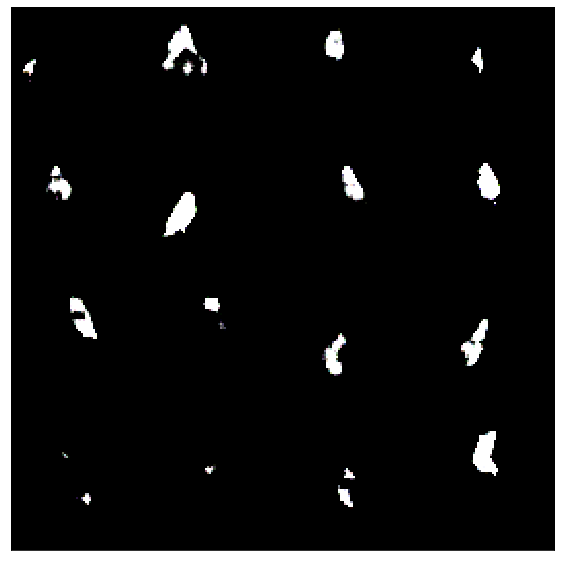

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


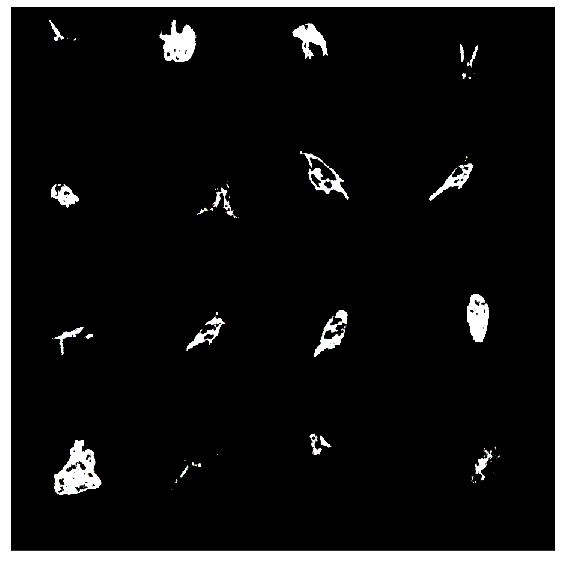

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 12


  0%|                                                                             | 1/17500 [00:15<73:37:02, 15.15s/it]

Train Epoch: 12 [0/280000 (0%)]	Loss: 0.029478
IOU : 0.0574188232421875
IOU : 0.0574188232421875


  0%|▏                                                                              | 53/17500 [00:18<51:50,  5.61it/s]

Train Epoch: 12 [200/280000 (0%)]	Loss: 0.045158
IOU : 0.059844970703125


  1%|▍                                                                             | 101/17500 [00:21<18:07, 16.00it/s]

Train Epoch: 12 [400/280000 (1%)]	Loss: 0.042182
IOU : 0.0514068603515625
IOU : 0.0514068603515625


  1%|▋                                                                             | 153/17500 [00:24<19:17, 14.99it/s]

Train Epoch: 12 [600/280000 (1%)]	Loss: 0.038920
IOU : 0.0457611083984375


  1%|▉                                                                             | 204/17500 [00:27<19:07, 15.07it/s]

Train Epoch: 12 [800/280000 (1%)]	Loss: 0.051332
IOU : 0.0464935302734375
IOU : 0.0464935302734375


  1%|█                                                                             | 252/17500 [00:30<17:39, 16.28it/s]

Train Epoch: 12 [1000/280000 (1%)]	Loss: 0.031969
IOU : 0.050567626953125


  2%|█▎                                                                            | 300/17500 [00:33<17:50, 16.06it/s]

Train Epoch: 12 [1200/280000 (2%)]	Loss: 0.039456
IOU : 0.0495758056640625
IOU : 0.0495758056640625


  2%|█▌                                                                            | 353/17500 [00:37<18:24, 15.53it/s]

Train Epoch: 12 [1400/280000 (2%)]	Loss: 0.038845
IOU : 0.053436279296875


  2%|█▊                                                                            | 400/17500 [00:40<17:06, 16.65it/s]

Train Epoch: 12 [1600/280000 (2%)]	Loss: 0.034105
IOU : 0.050140380859375
IOU : 0.050140380859375


  3%|██                                                                            | 452/17500 [00:43<18:04, 15.72it/s]

Train Epoch: 12 [1800/280000 (3%)]	Loss: 0.033724
IOU : 0.056671142578125


  3%|██▏                                                                           | 500/17500 [00:46<17:32, 16.16it/s]

Train Epoch: 12 [2000/280000 (3%)]	Loss: 0.041749
IOU : 0.0528106689453125
IOU : 0.0528106689453125


  3%|██▍                                                                           | 548/17500 [00:49<17:44, 15.92it/s]

Train Epoch: 12 [2200/280000 (3%)]	Loss: 0.057074
IOU : 0.0580291748046875


  3%|██▋                                                                           | 600/17500 [00:52<17:36, 15.99it/s]

Train Epoch: 12 [2400/280000 (3%)]	Loss: 0.028633
IOU : 0.04949951171875
IOU : 0.04949951171875


  4%|██▉                                                                           | 652/17500 [00:55<17:40, 15.89it/s]

Train Epoch: 12 [2600/280000 (4%)]	Loss: 0.044176
IOU : 0.0470123291015625


  4%|███                                                                           | 701/17500 [00:58<18:46, 14.91it/s]

Train Epoch: 12 [2800/280000 (4%)]	Loss: 0.045822
IOU : 0.0572662353515625
IOU : 0.0572662353515625


  4%|███▎                                                                          | 749/17500 [01:01<18:26, 15.14it/s]

Train Epoch: 12 [3000/280000 (4%)]	Loss: 0.032019
IOU : 0.04705810546875


  5%|███▌                                                                          | 801/17500 [01:04<17:37, 15.79it/s]

Train Epoch: 12 [3200/280000 (5%)]	Loss: 0.035253
IOU : 0.054443359375
IOU : 0.054443359375


  5%|███▊                                                                          | 853/17500 [01:08<17:30, 15.85it/s]

Train Epoch: 12 [3400/280000 (5%)]	Loss: 0.049593
IOU : 0.051727294921875


  5%|████                                                                          | 903/17500 [01:11<14:53, 18.58it/s]

Train Epoch: 12 [3600/280000 (5%)]	Loss: 0.031367
IOU : 0.0461578369140625
IOU : 0.0461578369140625


  5%|████▏                                                                         | 952/17500 [01:14<18:50, 14.64it/s]

Train Epoch: 12 [3800/280000 (5%)]	Loss: 0.034298
IOU : 0.04541015625


  6%|████▍                                                                        | 1003/17500 [01:17<14:39, 18.75it/s]

Train Epoch: 12 [4000/280000 (6%)]	Loss: 0.035809
IOU : 0.0531005859375
IOU : 0.0531005859375


  6%|████▋                                                                        | 1052/17500 [01:20<17:16, 15.87it/s]

Train Epoch: 12 [4200/280000 (6%)]	Loss: 0.042458
IOU : 0.060028076171875


  6%|████▊                                                                        | 1103/17500 [01:23<17:41, 15.44it/s]

Train Epoch: 12 [4400/280000 (6%)]	Loss: 0.041126
IOU : 0.0433197021484375
IOU : 0.0433197021484375


  7%|█████                                                                        | 1153/17500 [01:26<19:10, 14.21it/s]

Train Epoch: 12 [4600/280000 (7%)]	Loss: 0.040103
IOU : 0.054107666015625


  7%|█████▎                                                                       | 1203/17500 [01:29<14:41, 18.50it/s]

Train Epoch: 12 [4800/280000 (7%)]	Loss: 0.040160
IOU : 0.057098388671875
IOU : 0.057098388671875


  7%|█████▍                                                                       | 1248/17500 [01:32<18:06, 14.96it/s]

Train Epoch: 12 [5000/280000 (7%)]	Loss: 0.045042
IOU : 0.0565338134765625


  7%|█████▋                                                                       | 1303/17500 [01:36<14:43, 18.34it/s]

Train Epoch: 12 [5200/280000 (7%)]	Loss: 0.034178
IOU : 0.0476837158203125
IOU : 0.0476837158203125


  8%|█████▉                                                                       | 1352/17500 [01:39<16:41, 16.13it/s]

Train Epoch: 12 [5400/280000 (8%)]	Loss: 0.048853
IOU : 0.054443359375


  8%|██████▏                                                                      | 1400/17500 [01:42<16:48, 15.97it/s]

Train Epoch: 12 [5600/280000 (8%)]	Loss: 0.041168
IOU : 0.0554351806640625
IOU : 0.0554351806640625


  8%|██████▍                                                                      | 1452/17500 [01:45<16:43, 15.99it/s]

Train Epoch: 12 [5800/280000 (8%)]	Loss: 0.031323
IOU : 0.0431060791015625


  9%|██████▌                                                                      | 1500/17500 [01:48<16:25, 16.23it/s]

Train Epoch: 12 [6000/280000 (9%)]	Loss: 0.044701
IOU : 0.0644073486328125
IOU : 0.0644073486328125


  9%|██████▊                                                                      | 1553/17500 [01:51<16:03, 16.54it/s]

Train Epoch: 12 [6200/280000 (9%)]	Loss: 0.031997
IOU : 0.0534210205078125


  9%|███████                                                                      | 1600/17500 [01:54<16:41, 15.88it/s]

Train Epoch: 12 [6400/280000 (9%)]	Loss: 0.042522
IOU : 0.0453033447265625
IOU : 0.0453033447265625


  9%|███████▎                                                                     | 1648/17500 [01:57<16:04, 16.44it/s]

Train Epoch: 12 [6600/280000 (9%)]	Loss: 0.038740
IOU : 0.0559539794921875


 10%|███████▍                                                                     | 1700/17500 [02:01<16:27, 16.00it/s]

Train Epoch: 12 [6800/280000 (10%)]	Loss: 0.049164
IOU : 0.052490234375
IOU : 0.052490234375


 10%|███████▋                                                                     | 1752/17500 [02:04<16:06, 16.29it/s]

Train Epoch: 12 [7000/280000 (10%)]	Loss: 0.031887
IOU : 0.053863525390625


 10%|███████▉                                                                     | 1800/17500 [02:07<15:41, 16.67it/s]

Train Epoch: 12 [7200/280000 (10%)]	Loss: 0.042734
IOU : 0.0533905029296875
IOU : 0.0533905029296875


 11%|████████▏                                                                    | 1852/17500 [02:10<15:51, 16.44it/s]

Train Epoch: 12 [7400/280000 (11%)]	Loss: 0.031242
IOU : 0.051910400390625


 11%|████████▎                                                                    | 1900/17500 [02:13<15:54, 16.35it/s]

Train Epoch: 12 [7600/280000 (11%)]	Loss: 0.041252
IOU : 0.047027587890625
IOU : 0.047027587890625


 11%|████████▌                                                                    | 1952/17500 [02:16<16:20, 15.87it/s]

Train Epoch: 12 [7800/280000 (11%)]	Loss: 0.033459
IOU : 0.0526885986328125


 11%|████████▊                                                                    | 2000/17500 [02:19<15:49, 16.32it/s]

Train Epoch: 12 [8000/280000 (11%)]	Loss: 0.036669
IOU : 0.0631256103515625
IOU : 0.0631256103515625


 12%|█████████                                                                    | 2052/17500 [02:22<17:28, 14.73it/s]

Train Epoch: 12 [8200/280000 (12%)]	Loss: 0.043308
IOU : 0.0504913330078125


 12%|█████████▏                                                                   | 2100/17500 [02:25<16:05, 15.96it/s]

Train Epoch: 12 [8400/280000 (12%)]	Loss: 0.034404
IOU : 0.0476531982421875
IOU : 0.0476531982421875


 12%|█████████▍                                                                   | 2152/17500 [02:29<15:53, 16.09it/s]

Train Epoch: 12 [8600/280000 (12%)]	Loss: 0.036357
IOU : 0.04425048828125


 13%|█████████▋                                                                   | 2203/17500 [02:32<13:36, 18.74it/s]

Train Epoch: 12 [8800/280000 (13%)]	Loss: 0.036193
IOU : 0.0467376708984375
IOU : 0.0467376708984375


 13%|█████████▉                                                                   | 2248/17500 [02:34<15:07, 16.81it/s]

Train Epoch: 12 [9000/280000 (13%)]	Loss: 0.028953
IOU : 0.052032470703125


 13%|██████████                                                                   | 2300/17500 [02:38<16:00, 15.82it/s]

Train Epoch: 12 [9200/280000 (13%)]	Loss: 0.032609
IOU : 0.0490875244140625
IOU : 0.0490875244140625


 13%|██████████▎                                                                  | 2348/17500 [02:41<15:37, 16.17it/s]

Train Epoch: 12 [9400/280000 (13%)]	Loss: 0.030643
IOU : 0.0519866943359375


 14%|██████████▌                                                                  | 2403/17500 [02:44<13:34, 18.54it/s]

Train Epoch: 12 [9600/280000 (14%)]	Loss: 0.039513
IOU : 0.054779052734375
IOU : 0.054779052734375


 14%|██████████▊                                                                  | 2452/17500 [02:47<15:50, 15.83it/s]

Train Epoch: 12 [9800/280000 (14%)]	Loss: 0.059790
IOU : 0.06134033203125


 14%|███████████                                                                  | 2503/17500 [02:50<14:16, 17.50it/s]

Train Epoch: 12 [10000/280000 (14%)]	Loss: 0.048809
IOU : 0.0499267578125
IOU : 0.0499267578125


 15%|███████████▏                                                                 | 2554/17500 [02:53<14:58, 16.63it/s]

Train Epoch: 12 [10200/280000 (15%)]	Loss: 0.037202
IOU : 0.0540313720703125


 15%|███████████▍                                                                 | 2601/17500 [02:56<17:14, 14.40it/s]

Train Epoch: 12 [10400/280000 (15%)]	Loss: 0.044280
IOU : 0.05426025390625
IOU : 0.05426025390625


 15%|███████████▋                                                                 | 2653/17500 [03:00<16:16, 15.20it/s]

Train Epoch: 12 [10600/280000 (15%)]	Loss: 0.049013
IOU : 0.0562286376953125


 15%|███████████▉                                                                 | 2704/17500 [03:03<15:15, 16.17it/s]

Train Epoch: 12 [10800/280000 (15%)]	Loss: 0.035684
IOU : 0.059112548828125
IOU : 0.059112548828125


 16%|████████████                                                                 | 2752/17500 [03:06<15:18, 16.06it/s]

Train Epoch: 12 [11000/280000 (16%)]	Loss: 0.030619
IOU : 0.050140380859375


 16%|████████████▎                                                                | 2801/17500 [03:09<17:31, 13.98it/s]

Train Epoch: 12 [11200/280000 (16%)]	Loss: 0.051541
IOU : 0.05194091796875
IOU : 0.05194091796875


 16%|████████████▌                                                                | 2851/17500 [03:12<14:14, 17.14it/s]

Train Epoch: 12 [11400/280000 (16%)]	Loss: 0.045609
IOU : 0.049652099609375


 17%|████████████▊                                                                | 2903/17500 [03:15<15:27, 15.74it/s]

Train Epoch: 12 [11600/280000 (17%)]	Loss: 0.041896
IOU : 0.055572509765625
IOU : 0.055572509765625


 17%|████████████▉                                                                | 2948/17500 [03:18<14:50, 16.34it/s]

Train Epoch: 12 [11800/280000 (17%)]	Loss: 0.044306
IOU : 0.054107666015625


 17%|█████████████▏                                                               | 3000/17500 [03:21<14:57, 16.16it/s]

Train Epoch: 12 [12000/280000 (17%)]	Loss: 0.031131
IOU : 0.0480804443359375
IOU : 0.0480804443359375


 17%|█████████████▍                                                               | 3052/17500 [03:24<14:46, 16.31it/s]

Train Epoch: 12 [12200/280000 (17%)]	Loss: 0.030476
IOU : 0.0470428466796875


 18%|█████████████▋                                                               | 3100/17500 [03:27<15:05, 15.91it/s]

Train Epoch: 12 [12400/280000 (18%)]	Loss: 0.048079
IOU : 0.05340576171875
IOU : 0.05340576171875


 18%|█████████████▊                                                               | 3148/17500 [03:30<14:43, 16.24it/s]

Train Epoch: 12 [12600/280000 (18%)]	Loss: 0.047017
IOU : 0.0584716796875


 18%|██████████████                                                               | 3202/17500 [03:34<13:51, 17.20it/s]

Train Epoch: 12 [12800/280000 (18%)]	Loss: 0.046009
IOU : 0.0491943359375
IOU : 0.0491943359375


 19%|██████████████▎                                                              | 3252/17500 [03:37<15:22, 15.45it/s]

Train Epoch: 12 [13000/280000 (19%)]	Loss: 0.036393
IOU : 0.05621337890625


 19%|██████████████▌                                                              | 3300/17500 [03:40<14:29, 16.33it/s]

Train Epoch: 12 [13200/280000 (19%)]	Loss: 0.046375
IOU : 0.053466796875
IOU : 0.053466796875


 19%|██████████████▋                                                              | 3352/17500 [03:43<14:19, 16.46it/s]

Train Epoch: 12 [13400/280000 (19%)]	Loss: 0.036685
IOU : 0.0485687255859375


 19%|██████████████▉                                                              | 3401/17500 [03:46<19:09, 12.26it/s]

Train Epoch: 12 [13600/280000 (19%)]	Loss: 0.031018
IOU : 0.052734375
IOU : 0.052734375


 20%|███████████████▏                                                             | 3451/17500 [03:50<13:22, 17.50it/s]

Train Epoch: 12 [13800/280000 (20%)]	Loss: 0.037893
IOU : 0.051849365234375


 20%|███████████████▍                                                             | 3500/17500 [03:53<14:20, 16.27it/s]

Train Epoch: 12 [14000/280000 (20%)]	Loss: 0.029497
IOU : 0.0540924072265625
IOU : 0.0540924072265625


 20%|███████████████▌                                                             | 3548/17500 [03:56<14:18, 16.25it/s]

Train Epoch: 12 [14200/280000 (20%)]	Loss: 0.031781
IOU : 0.0456695556640625


 21%|███████████████▊                                                             | 3600/17500 [03:59<14:01, 16.51it/s]

Train Epoch: 12 [14400/280000 (21%)]	Loss: 0.038668
IOU : 0.0572509765625
IOU : 0.0572509765625


 21%|████████████████                                                             | 3648/17500 [04:02<14:18, 16.14it/s]

Train Epoch: 12 [14600/280000 (21%)]	Loss: 0.034799
IOU : 0.0498199462890625


 21%|████████████████▎                                                            | 3700/17500 [04:05<14:45, 15.59it/s]

Train Epoch: 12 [14800/280000 (21%)]	Loss: 0.030413
IOU : 0.04510498046875
IOU : 0.04510498046875


 21%|████████████████▍                                                            | 3748/17500 [04:08<15:15, 15.03it/s]

Train Epoch: 12 [15000/280000 (21%)]	Loss: 0.045198
IOU : 0.05023193359375


 22%|████████████████▋                                                            | 3803/17500 [04:11<14:38, 15.59it/s]

Train Epoch: 12 [15200/280000 (22%)]	Loss: 0.052339
IOU : 0.0586395263671875
IOU : 0.0586395263671875


 22%|████████████████▉                                                            | 3852/17500 [04:15<13:40, 16.63it/s]

Train Epoch: 12 [15400/280000 (22%)]	Loss: 0.047983
IOU : 0.0589599609375


 22%|█████████████████▏                                                           | 3902/17500 [04:18<15:47, 14.35it/s]

Train Epoch: 12 [15600/280000 (22%)]	Loss: 0.040887
IOU : 0.0493927001953125
IOU : 0.0493927001953125


 23%|█████████████████▍                                                           | 3950/17500 [04:21<15:49, 14.26it/s]

Train Epoch: 12 [15800/280000 (23%)]	Loss: 0.040954
IOU : 0.0552215576171875


 23%|█████████████████▌                                                           | 4001/17500 [04:24<14:22, 15.65it/s]

Train Epoch: 12 [16000/280000 (23%)]	Loss: 0.041990
IOU : 0.0462493896484375
IOU : 0.0462493896484375


 23%|█████████████████▊                                                           | 4052/17500 [04:27<14:18, 15.66it/s]

Train Epoch: 12 [16200/280000 (23%)]	Loss: 0.033653
IOU : 0.0475921630859375


 23%|██████████████████                                                           | 4100/17500 [04:30<14:10, 15.76it/s]

Train Epoch: 12 [16400/280000 (23%)]	Loss: 0.038622
IOU : 0.0508270263671875
IOU : 0.0508270263671875


 24%|██████████████████▎                                                          | 4152/17500 [04:34<13:38, 16.30it/s]

Train Epoch: 12 [16600/280000 (24%)]	Loss: 0.041671
IOU : 0.0551605224609375


 24%|██████████████████▍                                                          | 4203/17500 [04:37<11:48, 18.78it/s]

Train Epoch: 12 [16800/280000 (24%)]	Loss: 0.048906
IOU : 0.061859130859375
IOU : 0.061859130859375


 24%|██████████████████▋                                                          | 4252/17500 [04:40<13:52, 15.92it/s]

Train Epoch: 12 [17000/280000 (24%)]	Loss: 0.028947
IOU : 0.053741455078125


 25%|██████████████████▉                                                          | 4300/17500 [04:43<14:02, 15.67it/s]

Train Epoch: 12 [17200/280000 (25%)]	Loss: 0.037541
IOU : 0.052703857421875
IOU : 0.052703857421875


 25%|███████████████████▏                                                         | 4348/17500 [04:46<13:43, 15.98it/s]

Train Epoch: 12 [17400/280000 (25%)]	Loss: 0.028684
IOU : 0.0483551025390625


 25%|███████████████████▎                                                         | 4400/17500 [04:49<13:44, 15.88it/s]

Train Epoch: 12 [17600/280000 (25%)]	Loss: 0.047215
IOU : 0.0587310791015625
IOU : 0.0587310791015625


 25%|███████████████████▌                                                         | 4452/17500 [04:52<13:27, 16.16it/s]

Train Epoch: 12 [17800/280000 (25%)]	Loss: 0.032646
IOU : 0.05364990234375


 26%|███████████████████▊                                                         | 4500/17500 [04:55<13:26, 16.11it/s]

Train Epoch: 12 [18000/280000 (26%)]	Loss: 0.031358
IOU : 0.04931640625
IOU : 0.04931640625


 26%|████████████████████                                                         | 4548/17500 [04:58<13:18, 16.22it/s]

Train Epoch: 12 [18200/280000 (26%)]	Loss: 0.031342
IOU : 0.0587158203125


 26%|████████████████████▏                                                        | 4600/17500 [05:02<15:32, 13.84it/s]

Train Epoch: 12 [18400/280000 (26%)]	Loss: 0.031948
IOU : 0.052825927734375
IOU : 0.052825927734375


 27%|████████████████████▍                                                        | 4652/17500 [05:05<13:06, 16.33it/s]

Train Epoch: 12 [18600/280000 (27%)]	Loss: 0.035235
IOU : 0.0567169189453125


 27%|████████████████████▋                                                        | 4700/17500 [05:08<13:32, 15.75it/s]

Train Epoch: 12 [18800/280000 (27%)]	Loss: 0.035907
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 27%|████████████████████▉                                                        | 4748/17500 [05:11<13:02, 16.30it/s]

Train Epoch: 12 [19000/280000 (27%)]	Loss: 0.052843
IOU : 0.055694580078125


 27%|█████████████████████                                                        | 4800/17500 [05:14<13:36, 15.54it/s]

Train Epoch: 12 [19200/280000 (27%)]	Loss: 0.034602
IOU : 0.06121826171875
IOU : 0.06121826171875


 28%|█████████████████████▎                                                       | 4852/17500 [05:18<13:15, 15.90it/s]

Train Epoch: 12 [19400/280000 (28%)]	Loss: 0.041352
IOU : 0.053619384765625


 28%|█████████████████████▌                                                       | 4900/17500 [05:20<12:47, 16.41it/s]

Train Epoch: 12 [19600/280000 (28%)]	Loss: 0.037186
IOU : 0.0544586181640625
IOU : 0.0544586181640625


 28%|█████████████████████▊                                                       | 4948/17500 [05:24<14:20, 14.59it/s]

Train Epoch: 12 [19800/280000 (28%)]	Loss: 0.038498
IOU : 0.052001953125


 29%|██████████████████████                                                       | 5000/17500 [05:27<12:48, 16.26it/s]

Train Epoch: 12 [20000/280000 (29%)]	Loss: 0.040040
IOU : 0.053131103515625
IOU : 0.053131103515625


 29%|██████████████████████▏                                                      | 5052/17500 [05:30<12:37, 16.44it/s]

Train Epoch: 12 [20200/280000 (29%)]	Loss: 0.040978
IOU : 0.0598907470703125


 29%|██████████████████████▍                                                      | 5100/17500 [05:33<12:27, 16.59it/s]

Train Epoch: 12 [20400/280000 (29%)]	Loss: 0.037150
IOU : 0.052093505859375
IOU : 0.052093505859375


 29%|██████████████████████▋                                                      | 5148/17500 [05:36<13:30, 15.24it/s]

Train Epoch: 12 [20600/280000 (29%)]	Loss: 0.070039
IOU : 0.0623321533203125


 30%|██████████████████████▉                                                      | 5200/17500 [05:39<12:10, 16.84it/s]

Train Epoch: 12 [20800/280000 (30%)]	Loss: 0.042981
IOU : 0.0524139404296875
IOU : 0.0524139404296875


 30%|███████████████████████                                                      | 5248/17500 [05:42<12:36, 16.21it/s]

Train Epoch: 12 [21000/280000 (30%)]	Loss: 0.041986
IOU : 0.0499420166015625


 30%|███████████████████████▎                                                     | 5302/17500 [05:46<13:12, 15.39it/s]

Train Epoch: 12 [21200/280000 (30%)]	Loss: 0.053242
IOU : 0.052886962890625
IOU : 0.052886962890625


 31%|███████████████████████▌                                                     | 5352/17500 [05:49<13:55, 14.54it/s]

Train Epoch: 12 [21400/280000 (31%)]	Loss: 0.030925
IOU : 0.051300048828125


 31%|███████████████████████▊                                                     | 5404/17500 [05:52<12:54, 15.61it/s]

Train Epoch: 12 [21600/280000 (31%)]	Loss: 0.043860
IOU : 0.0507659912109375
IOU : 0.0507659912109375


 31%|███████████████████████▉                                                     | 5452/17500 [05:55<11:44, 17.11it/s]

Train Epoch: 12 [21800/280000 (31%)]	Loss: 0.036815
IOU : 0.05126953125


 31%|████████████████████████▏                                                    | 5503/17500 [05:58<12:39, 15.79it/s]

Train Epoch: 12 [22000/280000 (31%)]	Loss: 0.054350
IOU : 0.0516815185546875
IOU : 0.0516815185546875


 32%|████████████████████████▍                                                    | 5551/17500 [06:01<12:38, 15.75it/s]

Train Epoch: 12 [22200/280000 (32%)]	Loss: 0.030775
IOU : 0.0452880859375


 32%|████████████████████████▋                                                    | 5601/17500 [06:05<12:57, 15.30it/s]

Train Epoch: 12 [22400/280000 (32%)]	Loss: 0.025088
IOU : 0.04779052734375
IOU : 0.04779052734375


 32%|████████████████████████▊                                                    | 5651/17500 [06:08<11:47, 16.75it/s]

Train Epoch: 12 [22600/280000 (32%)]	Loss: 0.025107
IOU : 0.0496063232421875


 33%|█████████████████████████                                                    | 5701/17500 [06:11<12:42, 15.48it/s]

Train Epoch: 12 [22800/280000 (33%)]	Loss: 0.036542
IOU : 0.0517578125
IOU : 0.0517578125


 33%|█████████████████████████▎                                                   | 5753/17500 [06:14<12:06, 16.18it/s]

Train Epoch: 12 [23000/280000 (33%)]	Loss: 0.041848
IOU : 0.059295654296875


 33%|█████████████████████████▌                                                   | 5801/17500 [06:17<11:59, 16.27it/s]

Train Epoch: 12 [23200/280000 (33%)]	Loss: 0.033947
IOU : 0.0565948486328125
IOU : 0.0565948486328125


 33%|█████████████████████████▋                                                   | 5849/17500 [06:20<12:02, 16.12it/s]

Train Epoch: 12 [23400/280000 (33%)]	Loss: 0.037731
IOU : 0.0627593994140625


 34%|█████████████████████████▉                                                   | 5901/17500 [06:23<12:49, 15.06it/s]

Train Epoch: 12 [23600/280000 (34%)]	Loss: 0.039679
IOU : 0.0532989501953125
IOU : 0.0532989501953125


 34%|██████████████████████████▏                                                  | 5953/17500 [06:26<12:50, 14.99it/s]

Train Epoch: 12 [23800/280000 (34%)]	Loss: 0.042273
IOU : 0.0503082275390625


 34%|██████████████████████████▍                                                  | 6002/17500 [06:29<13:18, 14.40it/s]

Train Epoch: 12 [24000/280000 (34%)]	Loss: 0.031034
IOU : 0.0545501708984375
IOU : 0.0545501708984375


 35%|██████████████████████████▋                                                  | 6053/17500 [06:33<12:39, 15.07it/s]

Train Epoch: 12 [24200/280000 (35%)]	Loss: 0.048939
IOU : 0.0539398193359375


 35%|██████████████████████████▊                                                  | 6101/17500 [06:36<12:37, 15.05it/s]

Train Epoch: 12 [24400/280000 (35%)]	Loss: 0.032268
IOU : 0.0524444580078125
IOU : 0.0524444580078125


 35%|███████████████████████████                                                  | 6152/17500 [06:39<11:35, 16.32it/s]

Train Epoch: 12 [24600/280000 (35%)]	Loss: 0.024666
IOU : 0.0440673828125


 35%|███████████████████████████▎                                                 | 6201/17500 [06:42<12:49, 14.67it/s]

Train Epoch: 12 [24800/280000 (35%)]	Loss: 0.033279
IOU : 0.054840087890625
IOU : 0.054840087890625


 36%|███████████████████████████▌                                                 | 6252/17500 [06:45<12:57, 14.47it/s]

Train Epoch: 12 [25000/280000 (36%)]	Loss: 0.039526
IOU : 0.0501861572265625


 36%|███████████████████████████▋                                                 | 6300/17500 [06:48<11:18, 16.50it/s]

Train Epoch: 12 [25200/280000 (36%)]	Loss: 0.041126
IOU : 0.0572052001953125
IOU : 0.0572052001953125


 36%|███████████████████████████▉                                                 | 6352/17500 [06:51<11:30, 16.14it/s]

Train Epoch: 12 [25400/280000 (36%)]	Loss: 0.035073
IOU : 0.0487823486328125


 37%|████████████████████████████▏                                                | 6400/17500 [06:54<11:28, 16.11it/s]

Train Epoch: 12 [25600/280000 (37%)]	Loss: 0.031361
IOU : 0.0466766357421875
IOU : 0.0466766357421875


 37%|████████████████████████████▎                                                | 6448/17500 [06:57<11:04, 16.64it/s]

Train Epoch: 12 [25800/280000 (37%)]	Loss: 0.036362
IOU : 0.0513458251953125


 37%|████████████████████████████▌                                                | 6500/17500 [07:01<13:30, 13.58it/s]

Train Epoch: 12 [26000/280000 (37%)]	Loss: 0.032878
IOU : 0.0482940673828125
IOU : 0.0482940673828125


 37%|████████████████████████████▊                                                | 6552/17500 [07:04<10:45, 16.95it/s]

Train Epoch: 12 [26200/280000 (37%)]	Loss: 0.035094
IOU : 0.046539306640625


 38%|█████████████████████████████                                                | 6600/17500 [07:07<13:01, 13.94it/s]

Train Epoch: 12 [26400/280000 (38%)]	Loss: 0.038468
IOU : 0.052886962890625
IOU : 0.052886962890625


 38%|█████████████████████████████▎                                               | 6652/17500 [07:10<10:43, 16.86it/s]

Train Epoch: 12 [26600/280000 (38%)]	Loss: 0.035377
IOU : 0.0546112060546875


 38%|█████████████████████████████▍                                               | 6701/17500 [07:13<11:28, 15.68it/s]

Train Epoch: 12 [26800/280000 (38%)]	Loss: 0.042670
IOU : 0.056488037109375
IOU : 0.056488037109375


 39%|█████████████████████████████▋                                               | 6753/17500 [07:16<11:41, 15.32it/s]

Train Epoch: 12 [27000/280000 (39%)]	Loss: 0.043154
IOU : 0.054351806640625


 39%|█████████████████████████████▉                                               | 6800/17500 [07:19<11:11, 15.93it/s]

Train Epoch: 12 [27200/280000 (39%)]	Loss: 0.038912
IOU : 0.0546417236328125
IOU : 0.0546417236328125


 39%|██████████████████████████████▏                                              | 6852/17500 [07:22<11:07, 15.96it/s]

Train Epoch: 12 [27400/280000 (39%)]	Loss: 0.038813
IOU : 0.0533447265625


 39%|██████████████████████████████▎                                              | 6900/17500 [07:25<10:47, 16.37it/s]

Train Epoch: 12 [27600/280000 (39%)]	Loss: 0.052228
IOU : 0.0549774169921875
IOU : 0.0549774169921875


 40%|██████████████████████████████▌                                              | 6948/17500 [07:28<10:48, 16.27it/s]

Train Epoch: 12 [27800/280000 (40%)]	Loss: 0.038041
IOU : 0.0577545166015625


 40%|██████████████████████████████▊                                              | 7000/17500 [07:31<10:31, 16.62it/s]

Train Epoch: 12 [28000/280000 (40%)]	Loss: 0.036153
IOU : 0.053314208984375
IOU : 0.053314208984375


 40%|███████████████████████████████                                              | 7052/17500 [07:35<10:36, 16.41it/s]

Train Epoch: 12 [28200/280000 (40%)]	Loss: 0.044663
IOU : 0.0601348876953125


 41%|███████████████████████████████▏                                             | 7100/17500 [07:38<10:53, 15.91it/s]

Train Epoch: 12 [28400/280000 (41%)]	Loss: 0.036331
IOU : 0.0527191162109375
IOU : 0.0527191162109375


 41%|███████████████████████████████▍                                             | 7152/17500 [07:41<10:32, 16.37it/s]

Train Epoch: 12 [28600/280000 (41%)]	Loss: 0.038887
IOU : 0.0555877685546875


 41%|███████████████████████████████▋                                             | 7200/17500 [07:44<10:44, 15.98it/s]

Train Epoch: 12 [28800/280000 (41%)]	Loss: 0.038923
IOU : 0.055145263671875
IOU : 0.055145263671875


 41%|███████████████████████████████▉                                             | 7252/17500 [07:47<11:00, 15.51it/s]

Train Epoch: 12 [29000/280000 (41%)]	Loss: 0.053292
IOU : 0.0562591552734375


 42%|████████████████████████████████                                             | 7300/17500 [07:50<10:11, 16.69it/s]

Train Epoch: 12 [29200/280000 (42%)]	Loss: 0.057448
IOU : 0.05279541015625
IOU : 0.05279541015625


 42%|████████████████████████████████▎                                            | 7352/17500 [07:53<10:35, 15.98it/s]

Train Epoch: 12 [29400/280000 (42%)]	Loss: 0.039429
IOU : 0.0489501953125


 42%|████████████████████████████████▌                                            | 7400/17500 [07:56<10:09, 16.56it/s]

Train Epoch: 12 [29600/280000 (42%)]	Loss: 0.035502
IOU : 0.05340576171875
IOU : 0.05340576171875


 43%|████████████████████████████████▊                                            | 7449/17500 [07:59<11:19, 14.79it/s]

Train Epoch: 12 [29800/280000 (43%)]	Loss: 0.035450
IOU : 0.05029296875


 43%|█████████████████████████████████                                            | 7503/17500 [08:03<09:13, 18.07it/s]

Train Epoch: 12 [30000/280000 (43%)]	Loss: 0.040499
IOU : 0.0577850341796875
IOU : 0.0577850341796875


 43%|█████████████████████████████████▏                                           | 7552/17500 [08:06<10:09, 16.32it/s]

Train Epoch: 12 [30200/280000 (43%)]	Loss: 0.047063
IOU : 0.0582122802734375


 43%|█████████████████████████████████▍                                           | 7600/17500 [08:09<10:10, 16.23it/s]

Train Epoch: 12 [30400/280000 (43%)]	Loss: 0.034814
IOU : 0.06500244140625
IOU : 0.06500244140625


 44%|█████████████████████████████████▋                                           | 7648/17500 [08:12<10:34, 15.54it/s]

Train Epoch: 12 [30600/280000 (44%)]	Loss: 0.035081
IOU : 0.0445556640625


 44%|█████████████████████████████████▉                                           | 7700/17500 [08:16<10:17, 15.88it/s]

Train Epoch: 12 [30800/280000 (44%)]	Loss: 0.035697
IOU : 0.04681396484375
IOU : 0.04681396484375


 44%|██████████████████████████████████                                           | 7752/17500 [08:19<10:13, 15.90it/s]

Train Epoch: 12 [31000/280000 (44%)]	Loss: 0.056665
IOU : 0.0533905029296875


 45%|██████████████████████████████████▎                                          | 7800/17500 [08:22<09:55, 16.30it/s]

Train Epoch: 12 [31200/280000 (45%)]	Loss: 0.037582
IOU : 0.05596923828125
IOU : 0.05596923828125


 45%|██████████████████████████████████▌                                          | 7852/17500 [08:25<10:04, 15.96it/s]

Train Epoch: 12 [31400/280000 (45%)]	Loss: 0.031407
IOU : 0.0542755126953125


 45%|██████████████████████████████████▊                                          | 7900/17500 [08:28<09:50, 16.25it/s]

Train Epoch: 12 [31600/280000 (45%)]	Loss: 0.047092
IOU : 0.0602874755859375
IOU : 0.0602874755859375


 45%|██████████████████████████████████▉                                          | 7952/17500 [08:31<09:54, 16.05it/s]

Train Epoch: 12 [31800/280000 (45%)]	Loss: 0.037134
IOU : 0.0535888671875


 46%|███████████████████████████████████▏                                         | 8000/17500 [08:34<10:19, 15.33it/s]

Train Epoch: 12 [32000/280000 (46%)]	Loss: 0.029686
IOU : 0.0560760498046875
IOU : 0.0560760498046875


 46%|███████████████████████████████████▍                                         | 8051/17500 [08:37<08:25, 18.71it/s]

Train Epoch: 12 [32200/280000 (46%)]	Loss: 0.040763
IOU : 0.057220458984375


 46%|███████████████████████████████████▋                                         | 8100/17500 [08:41<09:58, 15.72it/s]

Train Epoch: 12 [32400/280000 (46%)]	Loss: 0.030475
IOU : 0.0488739013671875
IOU : 0.0488739013671875


 47%|███████████████████████████████████▊                                         | 8148/17500 [08:44<10:16, 15.17it/s]

Train Epoch: 12 [32600/280000 (47%)]	Loss: 0.042472
IOU : 0.05926513671875


 47%|████████████████████████████████████                                         | 8200/17500 [08:47<10:13, 15.16it/s]

Train Epoch: 12 [32800/280000 (47%)]	Loss: 0.032034
IOU : 0.0482635498046875
IOU : 0.0482635498046875


 47%|████████████████████████████████████▎                                        | 8252/17500 [08:50<10:08, 15.20it/s]

Train Epoch: 12 [33000/280000 (47%)]	Loss: 0.031599
IOU : 0.0518798828125


 47%|████████████████████████████████████▌                                        | 8300/17500 [08:53<09:53, 15.49it/s]

Train Epoch: 12 [33200/280000 (47%)]	Loss: 0.035785
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 48%|████████████████████████████████████▋                                        | 8352/17500 [08:56<09:55, 15.37it/s]

Train Epoch: 12 [33400/280000 (48%)]	Loss: 0.030725
IOU : 0.0552978515625


 48%|████████████████████████████████████▉                                        | 8403/17500 [09:00<09:57, 15.23it/s]

Train Epoch: 12 [33600/280000 (48%)]	Loss: 0.037060
IOU : 0.047210693359375
IOU : 0.047210693359375


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:03<09:39, 15.62it/s]

Train Epoch: 12 [33800/280000 (48%)]	Loss: 0.043425
IOU : 0.0572662353515625


 49%|█████████████████████████████████████▍                                       | 8503/17500 [09:06<09:23, 15.95it/s]

Train Epoch: 12 [34000/280000 (49%)]	Loss: 0.029273
IOU : 0.052947998046875
IOU : 0.052947998046875


 49%|█████████████████████████████████████▋                                       | 8553/17500 [09:09<09:02, 16.50it/s]

Train Epoch: 12 [34200/280000 (49%)]	Loss: 0.033933
IOU : 0.0449371337890625


 49%|█████████████████████████████████████▊                                       | 8603/17500 [09:12<09:15, 16.00it/s]

Train Epoch: 12 [34400/280000 (49%)]	Loss: 0.038969
IOU : 0.052001953125
IOU : 0.052001953125


 49%|██████████████████████████████████████                                       | 8653/17500 [09:15<08:52, 16.60it/s]

Train Epoch: 12 [34600/280000 (49%)]	Loss: 0.055684
IOU : 0.048736572265625


 50%|██████████████████████████████████████▎                                      | 8703/17500 [09:19<09:21, 15.68it/s]

Train Epoch: 12 [34800/280000 (50%)]	Loss: 0.039674
IOU : 0.0502471923828125
IOU : 0.0502471923828125


 50%|██████████████████████████████████████▌                                      | 8752/17500 [09:22<09:57, 14.63it/s]

Train Epoch: 12 [35000/280000 (50%)]	Loss: 0.044116
IOU : 0.0521392822265625


 50%|██████████████████████████████████████▋                                      | 8800/17500 [09:25<09:16, 15.62it/s]

Train Epoch: 12 [35200/280000 (50%)]	Loss: 0.046019
IOU : 0.05926513671875
IOU : 0.05926513671875


 51%|██████████████████████████████████████▉                                      | 8852/17500 [09:28<09:07, 15.80it/s]

Train Epoch: 12 [35400/280000 (51%)]	Loss: 0.041971
IOU : 0.0478668212890625


 51%|███████████████████████████████████████▏                                     | 8900/17500 [09:31<08:54, 16.08it/s]

Train Epoch: 12 [35600/280000 (51%)]	Loss: 0.042461
IOU : 0.058929443359375
IOU : 0.058929443359375


 51%|███████████████████████████████████████▎                                     | 8948/17500 [09:34<08:53, 16.02it/s]

Train Epoch: 12 [35800/280000 (51%)]	Loss: 0.028675
IOU : 0.04595947265625


 51%|███████████████████████████████████████▌                                     | 9000/17500 [09:38<08:49, 16.05it/s]

Train Epoch: 12 [36000/280000 (51%)]	Loss: 0.052709
IOU : 0.0611114501953125
IOU : 0.0611114501953125


 52%|███████████████████████████████████████▊                                     | 9052/17500 [09:41<08:35, 16.40it/s]

Train Epoch: 12 [36200/280000 (52%)]	Loss: 0.046050
IOU : 0.0575714111328125


 52%|████████████████████████████████████████                                     | 9100/17500 [09:44<08:46, 15.96it/s]

Train Epoch: 12 [36400/280000 (52%)]	Loss: 0.040331
IOU : 0.062103271484375
IOU : 0.062103271484375


 52%|████████████████████████████████████████▎                                    | 9151/17500 [09:47<07:25, 18.75it/s]

Train Epoch: 12 [36600/280000 (52%)]	Loss: 0.037313
IOU : 0.055908203125


 53%|████████████████████████████████████████▍                                    | 9201/17500 [09:50<08:29, 16.29it/s]

Train Epoch: 12 [36800/280000 (53%)]	Loss: 0.044909
IOU : 0.0538482666015625
IOU : 0.0538482666015625


 53%|████████████████████████████████████████▋                                    | 9252/17500 [09:53<09:42, 14.16it/s]

Train Epoch: 12 [37000/280000 (53%)]	Loss: 0.034109
IOU : 0.0489349365234375


 53%|████████████████████████████████████████▉                                    | 9300/17500 [09:56<08:29, 16.10it/s]

Train Epoch: 12 [37200/280000 (53%)]	Loss: 0.040645
IOU : 0.05078125
IOU : 0.05078125


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [09:59<07:57, 17.06it/s]

Train Epoch: 12 [37400/280000 (53%)]	Loss: 0.037432
IOU : 0.0601806640625


 54%|█████████████████████████████████████████▎                                   | 9400/17500 [10:03<08:38, 15.62it/s]

Train Epoch: 12 [37600/280000 (54%)]	Loss: 0.038345
IOU : 0.0525970458984375
IOU : 0.0525970458984375


 54%|█████████████████████████████████████████▌                                   | 9448/17500 [10:06<09:01, 14.88it/s]

Train Epoch: 12 [37800/280000 (54%)]	Loss: 0.044440
IOU : 0.05633544921875


 54%|█████████████████████████████████████████▊                                   | 9500/17500 [10:09<09:05, 14.68it/s]

Train Epoch: 12 [38000/280000 (54%)]	Loss: 0.046144
IOU : 0.056427001953125
IOU : 0.056427001953125


 55%|██████████████████████████████████████████                                   | 9552/17500 [10:13<07:59, 16.58it/s]

Train Epoch: 12 [38200/280000 (55%)]	Loss: 0.045226
IOU : 0.05767822265625


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [10:16<08:47, 14.96it/s]

Train Epoch: 12 [38400/280000 (55%)]	Loss: 0.031697
IOU : 0.0514678955078125
IOU : 0.0514678955078125


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [10:19<09:21, 13.97it/s]

Train Epoch: 12 [38600/280000 (55%)]	Loss: 0.042541
IOU : 0.054168701171875


 55%|██████████████████████████████████████████▋                                  | 9703/17500 [10:22<08:25, 15.44it/s]

Train Epoch: 12 [38800/280000 (55%)]	Loss: 0.036725
IOU : 0.0550537109375
IOU : 0.0550537109375


 56%|██████████████████████████████████████████▉                                  | 9752/17500 [10:25<07:48, 16.54it/s]

Train Epoch: 12 [39000/280000 (56%)]	Loss: 0.035008
IOU : 0.05169677734375


 56%|███████████████████████████████████████████▏                                 | 9804/17500 [10:28<07:48, 16.43it/s]

Train Epoch: 12 [39200/280000 (56%)]	Loss: 0.034462
IOU : 0.05279541015625
IOU : 0.05279541015625


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [10:32<07:54, 16.12it/s]

Train Epoch: 12 [39400/280000 (56%)]	Loss: 0.035666
IOU : 0.054443359375


 57%|███████████████████████████████████████████▌                                 | 9902/17500 [10:35<08:16, 15.30it/s]

Train Epoch: 12 [39600/280000 (57%)]	Loss: 0.027671
IOU : 0.0540771484375
IOU : 0.0540771484375


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [10:38<08:06, 15.50it/s]

Train Epoch: 12 [39800/280000 (57%)]	Loss: 0.033938
IOU : 0.05657958984375


 57%|███████████████████████████████████████████▍                                | 10000/17500 [10:41<07:29, 16.67it/s]

Train Epoch: 12 [40000/280000 (57%)]	Loss: 0.045874
IOU : 0.0512237548828125
IOU : 0.0512237548828125


 57%|███████████████████████████████████████████▋                                | 10048/17500 [10:44<07:34, 16.41it/s]

Train Epoch: 12 [40200/280000 (57%)]	Loss: 0.031416
IOU : 0.0466766357421875


 58%|███████████████████████████████████████████▊                                | 10100/17500 [10:48<08:05, 15.24it/s]

Train Epoch: 12 [40400/280000 (58%)]	Loss: 0.039149
IOU : 0.050811767578125
IOU : 0.050811767578125


 58%|████████████████████████████████████████████                                | 10148/17500 [10:51<07:36, 16.11it/s]

Train Epoch: 12 [40600/280000 (58%)]	Loss: 0.032642
IOU : 0.0496368408203125


 58%|████████████████████████████████████████████▎                               | 10200/17500 [10:54<07:15, 16.77it/s]

Train Epoch: 12 [40800/280000 (58%)]	Loss: 0.032301
IOU : 0.0491485595703125
IOU : 0.0491485595703125


 59%|████████████████████████████████████████████▌                               | 10248/17500 [10:59<08:41, 13.92it/s]

Train Epoch: 12 [41000/280000 (59%)]	Loss: 0.038081
IOU : 0.055816650390625


 59%|████████████████████████████████████████████▋                               | 10300/17500 [11:02<07:24, 16.21it/s]

Train Epoch: 12 [41200/280000 (59%)]	Loss: 0.038581
IOU : 0.0533294677734375
IOU : 0.0533294677734375


 59%|████████████████████████████████████████████▉                               | 10352/17500 [11:05<07:33, 15.77it/s]

Train Epoch: 12 [41400/280000 (59%)]	Loss: 0.048287
IOU : 0.062469482421875


 59%|█████████████████████████████████████████████▏                              | 10400/17500 [11:08<07:20, 16.13it/s]

Train Epoch: 12 [41600/280000 (59%)]	Loss: 0.052651
IOU : 0.05706787109375
IOU : 0.05706787109375


 60%|█████████████████████████████████████████████▎                              | 10448/17500 [11:11<07:30, 15.65it/s]

Train Epoch: 12 [41800/280000 (60%)]	Loss: 0.053678
IOU : 0.0545806884765625


 60%|█████████████████████████████████████████████▌                              | 10500/17500 [11:14<06:58, 16.74it/s]

Train Epoch: 12 [42000/280000 (60%)]	Loss: 0.031210
IOU : 0.04638671875
IOU : 0.04638671875


 60%|█████████████████████████████████████████████▊                              | 10552/17500 [11:18<07:04, 16.37it/s]

Train Epoch: 12 [42200/280000 (60%)]	Loss: 0.042288
IOU : 0.0597991943359375


 61%|██████████████████████████████████████████████                              | 10600/17500 [11:21<07:16, 15.80it/s]

Train Epoch: 12 [42400/280000 (61%)]	Loss: 0.029503
IOU : 0.047882080078125
IOU : 0.047882080078125


 61%|██████████████████████████████████████████████▏                             | 10648/17500 [11:23<06:50, 16.69it/s]

Train Epoch: 12 [42600/280000 (61%)]	Loss: 0.043815
IOU : 0.0482177734375


 61%|██████████████████████████████████████████████▍                             | 10700/17500 [11:27<07:00, 16.16it/s]

Train Epoch: 12 [42800/280000 (61%)]	Loss: 0.046856
IOU : 0.0515594482421875
IOU : 0.0515594482421875


 61%|██████████████████████████████████████████████▋                             | 10748/17500 [11:30<06:56, 16.19it/s]

Train Epoch: 12 [43000/280000 (61%)]	Loss: 0.032275
IOU : 0.052215576171875


 62%|██████████████████████████████████████████████▉                             | 10804/17500 [11:33<06:35, 16.91it/s]

Train Epoch: 12 [43200/280000 (62%)]	Loss: 0.031812
IOU : 0.051971435546875
IOU : 0.051971435546875


 62%|███████████████████████████████████████████████▏                            | 10852/17500 [11:36<06:49, 16.23it/s]

Train Epoch: 12 [43400/280000 (62%)]	Loss: 0.046979
IOU : 0.058135986328125


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [11:39<07:12, 15.25it/s]

Train Epoch: 12 [43600/280000 (62%)]	Loss: 0.045804
IOU : 0.0536651611328125
IOU : 0.0536651611328125


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [11:42<07:14, 15.06it/s]

Train Epoch: 12 [43800/280000 (63%)]	Loss: 0.046721
IOU : 0.0534820556640625


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [11:45<06:24, 16.89it/s]

Train Epoch: 12 [44000/280000 (63%)]	Loss: 0.032641
IOU : 0.0505523681640625
IOU : 0.0505523681640625


 63%|███████████████████████████████████████████████▉                            | 11050/17500 [11:49<06:49, 15.75it/s]

Train Epoch: 12 [44200/280000 (63%)]	Loss: 0.033031
IOU : 0.0479278564453125


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [11:52<06:18, 16.89it/s]

Train Epoch: 12 [44400/280000 (63%)]	Loss: 0.055410
IOU : 0.054534912109375
IOU : 0.054534912109375


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [11:55<06:56, 15.23it/s]

Train Epoch: 12 [44600/280000 (64%)]	Loss: 0.061957
IOU : 0.0625


 64%|████████████████████████████████████████████████▋                           | 11203/17500 [11:58<06:03, 17.33it/s]

Train Epoch: 12 [44800/280000 (64%)]	Loss: 0.033184
IOU : 0.0513458251953125
IOU : 0.0513458251953125


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [12:01<05:32, 18.78it/s]

Train Epoch: 12 [45000/280000 (64%)]	Loss: 0.038653
IOU : 0.0466156005859375


 65%|█████████████████████████████████████████████████                           | 11303/17500 [12:04<06:08, 16.80it/s]

Train Epoch: 12 [45200/280000 (65%)]	Loss: 0.038714
IOU : 0.05950927734375
IOU : 0.05950927734375


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [12:07<06:28, 15.82it/s]

Train Epoch: 12 [45400/280000 (65%)]	Loss: 0.039152
IOU : 0.057525634765625


 65%|█████████████████████████████████████████████████▌                          | 11403/17500 [12:10<05:58, 17.00it/s]

Train Epoch: 12 [45600/280000 (65%)]	Loss: 0.057902
IOU : 0.0549774169921875
IOU : 0.0549774169921875


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [12:13<05:58, 16.86it/s]

Train Epoch: 12 [45800/280000 (65%)]	Loss: 0.045715
IOU : 0.0534210205078125


 66%|█████████████████████████████████████████████████▉                          | 11500/17500 [12:16<06:19, 15.80it/s]

Train Epoch: 12 [46000/280000 (66%)]	Loss: 0.028867
IOU : 0.05462646484375
IOU : 0.05462646484375


 66%|██████████████████████████████████████████████████▏                         | 11552/17500 [12:20<06:31, 15.19it/s]

Train Epoch: 12 [46200/280000 (66%)]	Loss: 0.034989
IOU : 0.04986572265625


 66%|██████████████████████████████████████████████████▍                         | 11602/17500 [12:23<06:40, 14.71it/s]

Train Epoch: 12 [46400/280000 (66%)]	Loss: 0.039423
IOU : 0.0520477294921875
IOU : 0.0520477294921875


 67%|██████████████████████████████████████████████████▌                         | 11650/17500 [12:26<06:04, 16.05it/s]

Train Epoch: 12 [46600/280000 (67%)]	Loss: 0.047560
IOU : 0.055572509765625


 67%|██████████████████████████████████████████████████▊                         | 11698/17500 [12:29<06:01, 16.04it/s]

Train Epoch: 12 [46800/280000 (67%)]	Loss: 0.040324
IOU : 0.0511322021484375
IOU : 0.0511322021484375


 67%|███████████████████████████████████████████████████                         | 11750/17500 [12:32<05:59, 16.00it/s]

Train Epoch: 12 [47000/280000 (67%)]	Loss: 0.044234
IOU : 0.051361083984375


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [12:35<05:44, 16.52it/s]

Train Epoch: 12 [47200/280000 (67%)]	Loss: 0.029879
IOU : 0.0586700439453125
IOU : 0.0586700439453125


 68%|███████████████████████████████████████████████████▍                        | 11850/17500 [12:38<05:37, 16.72it/s]

Train Epoch: 12 [47400/280000 (68%)]	Loss: 0.026209
IOU : 0.04278564453125


 68%|███████████████████████████████████████████████████▋                        | 11898/17500 [12:41<05:27, 17.10it/s]

Train Epoch: 12 [47600/280000 (68%)]	Loss: 0.035752
IOU : 0.0530853271484375
IOU : 0.0530853271484375


 68%|███████████████████████████████████████████████████▉                        | 11950/17500 [12:44<05:26, 17.02it/s]

Train Epoch: 12 [47800/280000 (68%)]	Loss: 0.032590
IOU : 0.0579071044921875


 69%|████████████████████████████████████████████████████                        | 12002/17500 [12:47<06:16, 14.60it/s]

Train Epoch: 12 [48000/280000 (69%)]	Loss: 0.041401
IOU : 0.0528106689453125
IOU : 0.0528106689453125


 69%|████████████████████████████████████████████████████▎                       | 12053/17500 [12:50<05:16, 17.20it/s]

Train Epoch: 12 [48200/280000 (69%)]	Loss: 0.041890
IOU : 0.055694580078125


 69%|████████████████████████████████████████████████████▌                       | 12102/17500 [12:53<05:42, 15.75it/s]

Train Epoch: 12 [48400/280000 (69%)]	Loss: 0.049310
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [12:56<05:50, 15.27it/s]

Train Epoch: 12 [48600/280000 (69%)]	Loss: 0.034535
IOU : 0.0571136474609375


 70%|████████████████████████████████████████████████████▉                       | 12200/17500 [12:59<05:45, 15.32it/s]

Train Epoch: 12 [48800/280000 (70%)]	Loss: 0.030896
IOU : 0.0482635498046875
IOU : 0.0482635498046875


 70%|█████████████████████████████████████████████████████▏                      | 12254/17500 [13:02<04:50, 18.06it/s]

Train Epoch: 12 [49000/280000 (70%)]	Loss: 0.038081
IOU : 0.0519256591796875


 70%|█████████████████████████████████████████████████████▍                      | 12302/17500 [13:05<05:13, 16.59it/s]

Train Epoch: 12 [49200/280000 (70%)]	Loss: 0.039152
IOU : 0.04736328125
IOU : 0.04736328125


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [13:09<06:43, 12.75it/s]

Train Epoch: 12 [49400/280000 (71%)]	Loss: 0.037481
IOU : 0.053314208984375


 71%|█████████████████████████████████████████████████████▊                      | 12399/17500 [13:12<05:08, 16.52it/s]

Train Epoch: 12 [49600/280000 (71%)]	Loss: 0.047626
IOU : 0.05816650390625
IOU : 0.05816650390625


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [13:15<05:15, 16.01it/s]

Train Epoch: 12 [49800/280000 (71%)]	Loss: 0.041838
IOU : 0.051544189453125


 71%|██████████████████████████████████████████████████████▎                     | 12499/17500 [13:18<05:06, 16.33it/s]

Train Epoch: 12 [50000/280000 (71%)]	Loss: 0.026267
IOU : 0.0434417724609375
IOU : 0.0434417724609375


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [13:21<05:14, 15.76it/s]

Train Epoch: 12 [50200/280000 (72%)]	Loss: 0.031638
IOU : 0.0528717041015625


 72%|██████████████████████████████████████████████████████▋                     | 12599/17500 [13:24<04:57, 16.46it/s]

Train Epoch: 12 [50400/280000 (72%)]	Loss: 0.036097
IOU : 0.05767822265625
IOU : 0.05767822265625


 72%|██████████████████████████████████████████████████████▉                     | 12654/17500 [13:27<04:23, 18.42it/s]

Train Epoch: 12 [50600/280000 (72%)]	Loss: 0.040487
IOU : 0.0550994873046875


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [13:30<05:03, 15.79it/s]

Train Epoch: 12 [50800/280000 (73%)]	Loss: 0.033300
IOU : 0.0507049560546875
IOU : 0.0507049560546875


 73%|███████████████████████████████████████████████████████▍                    | 12753/17500 [13:33<04:57, 15.95it/s]

Train Epoch: 12 [51000/280000 (73%)]	Loss: 0.046541
IOU : 0.055816650390625


 73%|███████████████████████████████████████████████████████▌                    | 12800/17500 [13:36<05:10, 15.12it/s]

Train Epoch: 12 [51200/280000 (73%)]	Loss: 0.043682
IOU : 0.0451507568359375
IOU : 0.0451507568359375


 73%|███████████████████████████████████████████████████████▊                    | 12852/17500 [13:39<04:39, 16.62it/s]

Train Epoch: 12 [51400/280000 (73%)]	Loss: 0.034667
IOU : 0.0479888916015625


 74%|████████████████████████████████████████████████████████                    | 12900/17500 [13:42<05:05, 15.08it/s]

Train Epoch: 12 [51600/280000 (74%)]	Loss: 0.081781
IOU : 0.0670928955078125
IOU : 0.0670928955078125


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [13:46<04:35, 16.50it/s]

Train Epoch: 12 [51800/280000 (74%)]	Loss: 0.036651
IOU : 0.05120849609375


 74%|████████████████████████████████████████████████████████▍                   | 13000/17500 [13:49<04:46, 15.71it/s]

Train Epoch: 12 [52000/280000 (74%)]	Loss: 0.038572
IOU : 0.0523529052734375
IOU : 0.0523529052734375


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [13:52<04:26, 16.68it/s]

Train Epoch: 12 [52200/280000 (75%)]	Loss: 0.030181
IOU : 0.05523681640625


 75%|████████████████████████████████████████████████████████▉                   | 13100/17500 [13:55<04:25, 16.59it/s]

Train Epoch: 12 [52400/280000 (75%)]	Loss: 0.032076
IOU : 0.055999755859375
IOU : 0.055999755859375


 75%|█████████████████████████████████████████████████████████                   | 13152/17500 [13:58<04:26, 16.32it/s]

Train Epoch: 12 [52600/280000 (75%)]	Loss: 0.039866
IOU : 0.054107666015625


 75%|█████████████████████████████████████████████████████████▎                  | 13200/17500 [14:01<04:24, 16.26it/s]

Train Epoch: 12 [52800/280000 (75%)]	Loss: 0.036393
IOU : 0.0577850341796875
IOU : 0.0577850341796875


 76%|█████████████████████████████████████████████████████████▌                  | 13252/17500 [14:04<04:14, 16.68it/s]

Train Epoch: 12 [53000/280000 (76%)]	Loss: 0.035068
IOU : 0.0503387451171875


 76%|█████████████████████████████████████████████████████████▊                  | 13303/17500 [14:07<03:41, 18.93it/s]

Train Epoch: 12 [53200/280000 (76%)]	Loss: 0.029020
IOU : 0.045379638671875
IOU : 0.045379638671875


 76%|█████████████████████████████████████████████████████████▉                  | 13348/17500 [14:10<04:48, 14.38it/s]

Train Epoch: 12 [53400/280000 (76%)]	Loss: 0.038738
IOU : 0.055419921875


 77%|██████████████████████████████████████████████████████████▏                 | 13400/17500 [14:14<04:21, 15.67it/s]

Train Epoch: 12 [53600/280000 (77%)]	Loss: 0.037138
IOU : 0.0479888916015625
IOU : 0.0479888916015625


 77%|██████████████████████████████████████████████████████████▍                 | 13448/17500 [14:17<04:10, 16.19it/s]

Train Epoch: 12 [53800/280000 (77%)]	Loss: 0.034638
IOU : 0.048797607421875


 77%|██████████████████████████████████████████████████████████▋                 | 13500/17500 [14:20<04:21, 15.30it/s]

Train Epoch: 12 [54000/280000 (77%)]	Loss: 0.036502
IOU : 0.0597991943359375
IOU : 0.0597991943359375


 77%|██████████████████████████████████████████████████████████▊                 | 13548/17500 [14:23<04:07, 15.96it/s]

Train Epoch: 12 [54200/280000 (77%)]	Loss: 0.042667
IOU : 0.0576934814453125


 78%|███████████████████████████████████████████████████████████                 | 13600/17500 [14:26<03:51, 16.84it/s]

Train Epoch: 12 [54400/280000 (78%)]	Loss: 0.033067
IOU : 0.0476226806640625
IOU : 0.0476226806640625


 78%|███████████████████████████████████████████████████████████▎                | 13652/17500 [14:29<03:58, 16.14it/s]

Train Epoch: 12 [54600/280000 (78%)]	Loss: 0.038616
IOU : 0.04522705078125


 78%|███████████████████████████████████████████████████████████▍                | 13700/17500 [14:32<03:47, 16.74it/s]

Train Epoch: 12 [54800/280000 (78%)]	Loss: 0.046016
IOU : 0.0520782470703125
IOU : 0.0520782470703125


 79%|███████████████████████████████████████████████████████████▋                | 13752/17500 [14:36<04:22, 14.28it/s]

Train Epoch: 12 [55000/280000 (79%)]	Loss: 0.045701
IOU : 0.0625152587890625


 79%|███████████████████████████████████████████████████████████▉                | 13800/17500 [14:38<03:41, 16.70it/s]

Train Epoch: 12 [55200/280000 (79%)]	Loss: 0.048954
IOU : 0.0570831298828125
IOU : 0.0570831298828125


 79%|████████████████████████████████████████████████████████████▏               | 13852/17500 [14:42<03:47, 16.04it/s]

Train Epoch: 12 [55400/280000 (79%)]	Loss: 0.034903
IOU : 0.0565185546875


 79%|████████████████████████████████████████████████████████████▎               | 13900/17500 [14:44<03:30, 17.11it/s]

Train Epoch: 12 [55600/280000 (79%)]	Loss: 0.036781
IOU : 0.0553131103515625
IOU : 0.0553131103515625


 80%|████████████████████████████████████████████████████████████▌               | 13948/17500 [14:47<03:33, 16.60it/s]

Train Epoch: 12 [55800/280000 (80%)]	Loss: 0.040405
IOU : 0.055450439453125


 80%|████████████████████████████████████████████████████████████▊               | 14000/17500 [14:51<03:36, 16.18it/s]

Train Epoch: 12 [56000/280000 (80%)]	Loss: 0.034647
IOU : 0.051116943359375
IOU : 0.051116943359375


 80%|█████████████████████████████████████████████████████████████               | 14052/17500 [14:54<03:47, 15.14it/s]

Train Epoch: 12 [56200/280000 (80%)]	Loss: 0.030101
IOU : 0.046966552734375


 81%|█████████████████████████████████████████████████████████████▏              | 14100/17500 [14:57<03:43, 15.24it/s]

Train Epoch: 12 [56400/280000 (81%)]	Loss: 0.043302
IOU : 0.056915283203125
IOU : 0.056915283203125


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [15:00<03:27, 16.16it/s]

Train Epoch: 12 [56600/280000 (81%)]	Loss: 0.036838
IOU : 0.0491485595703125


 81%|█████████████████████████████████████████████████████████████▋              | 14200/17500 [15:03<03:11, 17.19it/s]

Train Epoch: 12 [56800/280000 (81%)]	Loss: 0.031637
IOU : 0.045379638671875
IOU : 0.045379638671875


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [15:06<03:15, 16.64it/s]

Train Epoch: 12 [57000/280000 (81%)]	Loss: 0.045093
IOU : 0.05865478515625


 82%|██████████████████████████████████████████████████████████████              | 14300/17500 [15:09<03:40, 14.54it/s]

Train Epoch: 12 [57200/280000 (82%)]	Loss: 0.052137
IOU : 0.05401611328125
IOU : 0.05401611328125


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [15:12<03:36, 14.53it/s]

Train Epoch: 12 [57400/280000 (82%)]	Loss: 0.030150
IOU : 0.0501861572265625


 82%|██████████████████████████████████████████████████████████████▌             | 14403/17500 [15:15<03:22, 15.28it/s]

Train Epoch: 12 [57600/280000 (82%)]	Loss: 0.033210
IOU : 0.04949951171875
IOU : 0.04949951171875


 83%|██████████████████████████████████████████████████████████████▊             | 14453/17500 [15:18<03:00, 16.91it/s]

Train Epoch: 12 [57800/280000 (83%)]	Loss: 0.041942
IOU : 0.0659637451171875


 83%|██████████████████████████████████████████████████████████████▉             | 14500/17500 [15:21<03:40, 13.62it/s]

Train Epoch: 12 [58000/280000 (83%)]	Loss: 0.056294
IOU : 0.0540771484375
IOU : 0.0540771484375


 83%|███████████████████████████████████████████████████████████████▏            | 14552/17500 [15:24<02:57, 16.65it/s]

Train Epoch: 12 [58200/280000 (83%)]	Loss: 0.038218
IOU : 0.056060791015625


 83%|███████████████████████████████████████████████████████████████▍            | 14600/17500 [15:27<02:52, 16.77it/s]

Train Epoch: 12 [58400/280000 (83%)]	Loss: 0.041066
IOU : 0.0519561767578125
IOU : 0.0519561767578125


 84%|███████████████████████████████████████████████████████████████▋            | 14652/17500 [15:30<02:53, 16.44it/s]

Train Epoch: 12 [58600/280000 (84%)]	Loss: 0.032470
IOU : 0.0507965087890625


 84%|███████████████████████████████████████████████████████████████▊            | 14704/17500 [15:34<02:39, 17.53it/s]

Train Epoch: 12 [58800/280000 (84%)]	Loss: 0.050620
IOU : 0.0531005859375
IOU : 0.0531005859375


 84%|████████████████████████████████████████████████████████████████            | 14752/17500 [15:36<02:45, 16.62it/s]

Train Epoch: 12 [59000/280000 (84%)]	Loss: 0.045012
IOU : 0.058990478515625


 85%|████████████████████████████████████████████████████████████████▎           | 14800/17500 [15:39<02:46, 16.24it/s]

Train Epoch: 12 [59200/280000 (85%)]	Loss: 0.030641
IOU : 0.0507354736328125
IOU : 0.0507354736328125


 85%|████████████████████████████████████████████████████████████████▌           | 14852/17500 [15:42<02:40, 16.47it/s]

Train Epoch: 12 [59400/280000 (85%)]	Loss: 0.037952
IOU : 0.0524139404296875


 85%|████████████████████████████████████████████████████████████████▋           | 14900/17500 [15:45<02:38, 16.45it/s]

Train Epoch: 12 [59600/280000 (85%)]	Loss: 0.045674
IOU : 0.051300048828125
IOU : 0.051300048828125


 85%|████████████████████████████████████████████████████████████████▉           | 14948/17500 [15:48<02:32, 16.69it/s]

Train Epoch: 12 [59800/280000 (85%)]	Loss: 0.027713
IOU : 0.0469818115234375


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [15:51<02:43, 15.30it/s]

Train Epoch: 12 [60000/280000 (86%)]	Loss: 0.030293
IOU : 0.045318603515625
IOU : 0.045318603515625


 86%|█████████████████████████████████████████████████████████████████▎          | 15053/17500 [15:55<02:33, 15.94it/s]

Train Epoch: 12 [60200/280000 (86%)]	Loss: 0.058215
IOU : 0.05438232421875


 86%|█████████████████████████████████████████████████████████████████▌          | 15103/17500 [15:58<02:34, 15.55it/s]

Train Epoch: 12 [60400/280000 (86%)]	Loss: 0.056757
IOU : 0.0573883056640625
IOU : 0.0573883056640625


 87%|█████████████████████████████████████████████████████████████████▊          | 15153/17500 [16:01<02:33, 15.24it/s]

Train Epoch: 12 [60600/280000 (87%)]	Loss: 0.030369
IOU : 0.052734375


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [16:04<02:33, 14.93it/s]

Train Epoch: 12 [60800/280000 (87%)]	Loss: 0.040779
IOU : 0.052093505859375
IOU : 0.052093505859375


 87%|██████████████████████████████████████████████████████████████████▏         | 15252/17500 [16:07<02:24, 15.56it/s]

Train Epoch: 12 [61000/280000 (87%)]	Loss: 0.036456
IOU : 0.054351806640625


 87%|██████████████████████████████████████████████████████████████████▍         | 15300/17500 [16:10<02:18, 15.87it/s]

Train Epoch: 12 [61200/280000 (87%)]	Loss: 0.037462
IOU : 0.056365966796875
IOU : 0.056365966796875


 88%|██████████████████████████████████████████████████████████████████▋         | 15348/17500 [16:13<02:30, 14.27it/s]

Train Epoch: 12 [61400/280000 (88%)]	Loss: 0.039566
IOU : 0.055816650390625


 88%|██████████████████████████████████████████████████████████████████▉         | 15400/17500 [16:16<02:12, 15.91it/s]

Train Epoch: 12 [61600/280000 (88%)]	Loss: 0.036343
IOU : 0.04534912109375
IOU : 0.04534912109375


 88%|███████████████████████████████████████████████████████████████████         | 15448/17500 [16:19<02:05, 16.34it/s]

Train Epoch: 12 [61800/280000 (88%)]	Loss: 0.030065
IOU : 0.052032470703125


 89%|███████████████████████████████████████████████████████████████████▎        | 15500/17500 [16:22<02:03, 16.15it/s]

Train Epoch: 12 [62000/280000 (89%)]	Loss: 0.056803
IOU : 0.053558349609375
IOU : 0.053558349609375


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [16:25<01:43, 18.90it/s]

Train Epoch: 12 [62200/280000 (89%)]	Loss: 0.050610
IOU : 0.062408447265625


 89%|███████████████████████████████████████████████████████████████████▊        | 15603/17500 [16:28<01:41, 18.63it/s]

Train Epoch: 12 [62400/280000 (89%)]	Loss: 0.034625
IOU : 0.0487213134765625
IOU : 0.0487213134765625


 89%|███████████████████████████████████████████████████████████████████▉        | 15652/17500 [16:31<01:52, 16.50it/s]

Train Epoch: 12 [62600/280000 (89%)]	Loss: 0.033031
IOU : 0.0553131103515625


 90%|████████████████████████████████████████████████████████████████████▏       | 15703/17500 [16:34<01:35, 18.74it/s]

Train Epoch: 12 [62800/280000 (90%)]	Loss: 0.038768
IOU : 0.058563232421875
IOU : 0.058563232421875


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [16:37<01:46, 16.40it/s]

Train Epoch: 12 [63000/280000 (90%)]	Loss: 0.043174
IOU : 0.050140380859375


 90%|████████████████████████████████████████████████████████████████████▌       | 15800/17500 [16:40<01:46, 15.97it/s]

Train Epoch: 12 [63200/280000 (90%)]	Loss: 0.045259
IOU : 0.0511627197265625
IOU : 0.0511627197265625


 91%|████████████████████████████████████████████████████████████████████▊       | 15848/17500 [16:43<01:38, 16.77it/s]

Train Epoch: 12 [63400/280000 (91%)]	Loss: 0.035955
IOU : 0.05303955078125


 91%|█████████████████████████████████████████████████████████████████████       | 15902/17500 [16:46<01:29, 17.80it/s]

Train Epoch: 12 [63600/280000 (91%)]	Loss: 0.042869
IOU : 0.0618896484375
IOU : 0.0618896484375


 91%|█████████████████████████████████████████████████████████████████████▎      | 15948/17500 [16:49<01:39, 15.66it/s]

Train Epoch: 12 [63800/280000 (91%)]	Loss: 0.033669
IOU : 0.0532379150390625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16000/17500 [16:53<01:30, 16.58it/s]

Train Epoch: 12 [64000/280000 (91%)]	Loss: 0.049105
IOU : 0.0567169189453125
IOU : 0.0567169189453125


 92%|█████████████████████████████████████████████████████████████████████▋      | 16052/17500 [16:56<01:29, 16.21it/s]

Train Epoch: 12 [64200/280000 (92%)]	Loss: 0.035758
IOU : 0.0508880615234375


 92%|█████████████████████████████████████████████████████████████████████▉      | 16100/17500 [16:59<01:27, 16.04it/s]

Train Epoch: 12 [64400/280000 (92%)]	Loss: 0.032972
IOU : 0.0531768798828125
IOU : 0.0531768798828125


 92%|██████████████████████████████████████████████████████████████████████▏     | 16152/17500 [17:02<01:19, 16.87it/s]

Train Epoch: 12 [64600/280000 (92%)]	Loss: 0.047180
IOU : 0.05206298828125


 93%|██████████████████████████████████████████████████████████████████████▎     | 16200/17500 [17:05<01:14, 17.55it/s]

Train Epoch: 12 [64800/280000 (93%)]	Loss: 0.042540
IOU : 0.0574188232421875
IOU : 0.0574188232421875


 93%|██████████████████████████████████████████████████████████████████████▌     | 16252/17500 [17:08<01:15, 16.56it/s]

Train Epoch: 12 [65000/280000 (93%)]	Loss: 0.039635
IOU : 0.0543670654296875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16300/17500 [17:11<01:13, 16.25it/s]

Train Epoch: 12 [65200/280000 (93%)]	Loss: 0.025887
IOU : 0.04632568359375
IOU : 0.04632568359375


 93%|██████████████████████████████████████████████████████████████████████▉     | 16348/17500 [17:14<01:19, 14.55it/s]

Train Epoch: 12 [65400/280000 (93%)]	Loss: 0.035026
IOU : 0.0448150634765625


 94%|███████████████████████████████████████████████████████████████████████▏    | 16404/17500 [17:17<01:03, 17.31it/s]

Train Epoch: 12 [65600/280000 (94%)]	Loss: 0.048540
IOU : 0.0538787841796875
IOU : 0.0538787841796875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16452/17500 [17:20<01:02, 16.76it/s]

Train Epoch: 12 [65800/280000 (94%)]	Loss: 0.028799
IOU : 0.0460052490234375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16500/17500 [17:23<01:01, 16.20it/s]

Train Epoch: 12 [66000/280000 (94%)]	Loss: 0.051164
IOU : 0.0452728271484375
IOU : 0.0452728271484375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [17:26<01:01, 15.45it/s]

Train Epoch: 12 [66200/280000 (95%)]	Loss: 0.024879
IOU : 0.04449462890625


 95%|████████████████████████████████████████████████████████████████████████    | 16600/17500 [17:29<00:54, 16.40it/s]

Train Epoch: 12 [66400/280000 (95%)]	Loss: 0.040401
IOU : 0.0581207275390625
IOU : 0.0581207275390625


 95%|████████████████████████████████████████████████████████████████████████▎   | 16648/17500 [17:32<00:50, 16.75it/s]

Train Epoch: 12 [66600/280000 (95%)]	Loss: 0.036508
IOU : 0.04461669921875


 95%|████████████████████████████████████████████████████████████████████████▌   | 16700/17500 [17:36<00:54, 14.56it/s]

Train Epoch: 12 [66800/280000 (95%)]	Loss: 0.035869
IOU : 0.0514373779296875
IOU : 0.0514373779296875


 96%|████████████████████████████████████████████████████████████████████████▋   | 16748/17500 [17:39<00:47, 15.85it/s]

Train Epoch: 12 [67000/280000 (96%)]	Loss: 0.027210
IOU : 0.0489349365234375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [17:42<00:43, 16.12it/s]

Train Epoch: 12 [67200/280000 (96%)]	Loss: 0.049414
IOU : 0.0633697509765625
IOU : 0.0633697509765625


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16852/17500 [17:45<00:39, 16.37it/s]

Train Epoch: 12 [67400/280000 (96%)]	Loss: 0.033355
IOU : 0.0515899658203125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16903/17500 [17:48<00:31, 19.16it/s]

Train Epoch: 12 [67600/280000 (97%)]	Loss: 0.049130
IOU : 0.0576629638671875
IOU : 0.0576629638671875


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [17:51<00:36, 14.94it/s]

Train Epoch: 12 [67800/280000 (97%)]	Loss: 0.037912
IOU : 0.0488433837890625


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17000/17500 [17:54<00:30, 16.55it/s]

Train Epoch: 12 [68000/280000 (97%)]	Loss: 0.030774
IOU : 0.0556488037109375
IOU : 0.0556488037109375


 97%|██████████████████████████████████████████████████████████████████████████  | 17048/17500 [17:57<00:27, 16.40it/s]

Train Epoch: 12 [68200/280000 (97%)]	Loss: 0.035025
IOU : 0.0477142333984375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17100/17500 [18:00<00:25, 15.90it/s]

Train Epoch: 12 [68400/280000 (98%)]	Loss: 0.031104
IOU : 0.0484771728515625
IOU : 0.0484771728515625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17152/17500 [18:03<00:21, 16.03it/s]

Train Epoch: 12 [68600/280000 (98%)]	Loss: 0.043305
IOU : 0.052734375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17200/17500 [18:06<00:18, 16.31it/s]

Train Epoch: 12 [68800/280000 (98%)]	Loss: 0.033602
IOU : 0.0431671142578125
IOU : 0.0431671142578125


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17252/17500 [18:10<00:15, 16.06it/s]

Train Epoch: 12 [69000/280000 (99%)]	Loss: 0.037200
IOU : 0.0448150634765625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17300/17500 [18:13<00:13, 15.04it/s]

Train Epoch: 12 [69200/280000 (99%)]	Loss: 0.042913
IOU : 0.058685302734375
IOU : 0.058685302734375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17352/17500 [18:16<00:10, 14.73it/s]

Train Epoch: 12 [69400/280000 (99%)]	Loss: 0.027526
IOU : 0.04864501953125


 99%|███████████████████████████████████████████████████████████████████████████▌| 17403/17500 [18:19<00:05, 17.64it/s]

Train Epoch: 12 [69600/280000 (99%)]	Loss: 0.040772
IOU : 0.0560302734375
IOU : 0.0560302734375


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [18:22<00:03, 14.55it/s]

Train Epoch: 12 [69800/280000 (100%)]	Loss: 0.034392
IOU : 0.056243896484375


  0%|                                                                              | 1/7500 [00:14<30:01:36, 14.41s/it]

Test Epoch: 12 [0/120000 (0%)]	Loss: 0.073131
IOU : 0.042127959582270405


  1%|█                                                                              | 101/7500 [00:22<11:53, 10.36it/s]

Test Epoch: 12 [400/120000 (1%)]	Loss: 0.044729
IOU : 0.044081084582270405


  3%|██▏                                                                            | 204/7500 [00:31<09:57, 12.22it/s]

Test Epoch: 12 [800/120000 (3%)]	Loss: 0.060722
IOU : 0.03930788624043367


  4%|███▏                                                                           | 301/7500 [00:39<11:34, 10.36it/s]

Test Epoch: 12 [1200/120000 (4%)]	Loss: 0.039022
IOU : 0.03504539022640306


  5%|████▏                                                                          | 401/7500 [00:48<11:20, 10.44it/s]

Test Epoch: 12 [1600/120000 (5%)]	Loss: 0.037390
IOU : 0.04106544961734694


  7%|█████▎                                                                         | 502/7500 [01:02<12:00,  9.71it/s]

Test Epoch: 12 [2000/120000 (7%)]	Loss: 0.056476
IOU : 0.03789037587691327


  8%|██████▎                                                                        | 601/7500 [01:10<10:23, 11.06it/s]

Test Epoch: 12 [2400/120000 (8%)]	Loss: 0.053869
IOU : 0.04122862523915816


  9%|███████▍                                                                       | 701/7500 [01:19<09:45, 11.61it/s]

Test Epoch: 12 [2800/120000 (9%)]	Loss: 0.053141
IOU : 0.03756153340242347


 11%|████████▍                                                                      | 801/7500 [01:33<10:01, 11.14it/s]

Test Epoch: 12 [3200/120000 (11%)]	Loss: 0.047859
IOU : 0.04514484016262755


 12%|█████████▍                                                                     | 901/7500 [01:41<10:39, 10.32it/s]

Test Epoch: 12 [3600/120000 (12%)]	Loss: 0.072257
IOU : 0.04984952965561224


 13%|██████████▍                                                                   | 1001/7500 [01:50<14:53,  7.27it/s]

Test Epoch: 12 [4000/120000 (13%)]	Loss: 0.043439
IOU : 0.03639314612563776


 15%|███████████▍                                                                  | 1101/7500 [02:05<28:18,  3.77it/s]

Test Epoch: 12 [4400/120000 (15%)]	Loss: 0.050708
IOU : 0.035008021763392856


 16%|████████████▍                                                                 | 1201/7500 [02:13<10:06, 10.39it/s]

Test Epoch: 12 [4800/120000 (16%)]	Loss: 0.061694
IOU : 0.04546745455994898


 17%|█████████████▌                                                                | 1301/7500 [02:23<09:29, 10.89it/s]

Test Epoch: 12 [5200/120000 (17%)]	Loss: 0.059802
IOU : 0.04206817004145408


 19%|██████████████▌                                                               | 1401/7500 [02:34<24:16,  4.19it/s]

Test Epoch: 12 [5600/120000 (19%)]	Loss: 0.039097
IOU : 0.04112150231186224


 20%|███████████████▌                                                              | 1501/7500 [02:45<09:26, 10.58it/s]

Test Epoch: 12 [6000/120000 (20%)]	Loss: 0.048598
IOU : 0.04075155452806122


 21%|████████████████▋                                                             | 1602/7500 [02:54<10:03,  9.77it/s]

Test Epoch: 12 [6400/120000 (21%)]	Loss: 0.042458
IOU : 0.03573670679209184


 23%|█████████████████▋                                                            | 1701/7500 [03:04<23:03,  4.19it/s]

Test Epoch: 12 [6800/120000 (23%)]	Loss: 0.037103
IOU : 0.03427061742665816


 24%|██████████████████▊                                                           | 1803/7500 [03:18<08:21, 11.35it/s]

Test Epoch: 12 [7200/120000 (24%)]	Loss: 0.059469
IOU : 0.036607391980229595


 25%|███████████████████▊                                                          | 1901/7500 [03:26<08:51, 10.53it/s]

Test Epoch: 12 [7600/120000 (25%)]	Loss: 0.042112
IOU : 0.03683658522002551


 27%|████████████████████▊                                                         | 2002/7500 [03:40<08:09, 11.24it/s]

Test Epoch: 12 [8000/120000 (27%)]	Loss: 0.059514
IOU : 0.03737842793367347


 28%|█████████████████████▊                                                        | 2101/7500 [03:48<08:32, 10.53it/s]

Test Epoch: 12 [8400/120000 (28%)]	Loss: 0.051831
IOU : 0.0421516262755102


 29%|██████████████████████▉                                                       | 2201/7500 [03:58<20:03,  4.40it/s]

Test Epoch: 12 [8800/120000 (29%)]	Loss: 0.043376
IOU : 0.040944624920280615


 31%|███████████████████████▉                                                      | 2301/7500 [04:12<08:42,  9.95it/s]

Test Epoch: 12 [9200/120000 (31%)]	Loss: 0.054373
IOU : 0.04392040019132653


 32%|████████████████████████▉                                                     | 2401/7500 [04:20<08:59,  9.45it/s]

Test Epoch: 12 [9600/120000 (32%)]	Loss: 0.051959
IOU : 0.03741081393494898


 33%|██████████████████████████                                                    | 2501/7500 [04:31<19:55,  4.18it/s]

Test Epoch: 12 [10000/120000 (33%)]	Loss: 0.036836
IOU : 0.04050990513392857


 35%|███████████████████████████                                                   | 2601/7500 [04:43<08:11,  9.97it/s]

Test Epoch: 12 [10400/120000 (35%)]	Loss: 0.087233
IOU : 0.04125852000956633


 36%|████████████████████████████                                                  | 2701/7500 [04:55<19:08,  4.18it/s]

Test Epoch: 12 [10800/120000 (36%)]	Loss: 0.056860
IOU : 0.04502401546556122


 37%|█████████████████████████████▏                                                | 2801/7500 [05:05<07:51,  9.97it/s]

Test Epoch: 12 [11200/120000 (37%)]	Loss: 0.044591
IOU : 0.045762665417729595


 39%|██████████████████████████████▏                                               | 2901/7500 [05:13<07:57,  9.62it/s]

Test Epoch: 12 [11600/120000 (39%)]	Loss: 0.068014
IOU : 0.047703334263392856


 40%|███████████████████████████████▏                                              | 3001/7500 [05:22<07:04, 10.61it/s]

Test Epoch: 12 [12000/120000 (40%)]	Loss: 0.059264
IOU : 0.04710170200892857


 41%|████████████████████████████████▎                                             | 3101/7500 [05:30<06:32, 11.22it/s]

Test Epoch: 12 [12400/120000 (41%)]	Loss: 0.041537
IOU : 0.040793905452806124


 43%|█████████████████████████████████▎                                            | 3201/7500 [05:40<10:26,  6.87it/s]

Test Epoch: 12 [12800/120000 (43%)]	Loss: 0.042991
IOU : 0.03681665537308673


 44%|██████████████████████████████████▎                                           | 3301/7500 [05:53<11:29,  6.09it/s]

Test Epoch: 12 [13200/120000 (44%)]	Loss: 0.041645
IOU : 0.033607950015943876


 45%|███████████████████████████████████▍                                          | 3402/7500 [06:03<07:55,  8.61it/s]

Test Epoch: 12 [13600/120000 (45%)]	Loss: 0.049140
IOU : 0.04542634925063776


 47%|████████████████████████████████████▍                                         | 3502/7500 [06:13<07:30,  8.87it/s]

Test Epoch: 12 [14000/120000 (47%)]	Loss: 0.039517
IOU : 0.0347053372130102


 48%|█████████████████████████████████████▍                                        | 3602/7500 [06:23<06:09, 10.54it/s]

Test Epoch: 12 [14400/120000 (48%)]	Loss: 0.050355
IOU : 0.044680225605867346


 49%|██████████████████████████████████████▍                                       | 3701/7500 [06:36<15:04,  4.20it/s]

Test Epoch: 12 [14800/120000 (49%)]	Loss: 0.050695
IOU : 0.03796511280293367


 51%|███████████████████████████████████████▌                                      | 3801/7500 [06:46<05:40, 10.86it/s]

Test Epoch: 12 [15200/120000 (51%)]	Loss: 0.074669
IOU : 0.043682487643494895


 52%|████████████████████████████████████████▌                                     | 3901/7500 [06:59<06:33,  9.15it/s]

Test Epoch: 12 [15600/120000 (52%)]	Loss: 0.047559
IOU : 0.04115513392857143


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [07:08<05:43, 10.19it/s]

Test Epoch: 12 [16000/120000 (53%)]	Loss: 0.052589
IOU : 0.043897979113520405


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [07:21<09:40,  5.86it/s]

Test Epoch: 12 [16400/120000 (55%)]	Loss: 0.048077
IOU : 0.04161476602359694


 56%|███████████████████████████████████████████▋                                  | 4202/7500 [07:29<05:44,  9.57it/s]

Test Epoch: 12 [16800/120000 (56%)]	Loss: 0.049648
IOU : 0.036318409199617346


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [07:38<05:45,  9.26it/s]

Test Epoch: 12 [17200/120000 (57%)]	Loss: 0.063559
IOU : 0.047877720424107144


 59%|█████████████████████████████████████████████▊                                | 4402/7500 [07:50<06:52,  7.51it/s]

Test Epoch: 12 [17600/120000 (59%)]	Loss: 0.053462
IOU : 0.03850072743941327


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [08:01<04:42, 10.63it/s]

Test Epoch: 12 [18000/120000 (60%)]	Loss: 0.049764
IOU : 0.048960160235969385


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [08:09<04:30, 10.71it/s]

Test Epoch: 12 [18400/120000 (61%)]	Loss: 0.032002
IOU : 0.038763552295918366


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [08:17<04:26, 10.49it/s]

Test Epoch: 12 [18800/120000 (63%)]	Loss: 0.054246
IOU : 0.040289431202168366


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [08:32<09:51,  4.56it/s]

Test Epoch: 12 [19200/120000 (64%)]	Loss: 0.056899
IOU : 0.04043392259247449


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [08:41<04:33,  9.51it/s]

Test Epoch: 12 [19600/120000 (65%)]	Loss: 0.064493
IOU : 0.044545699139030615


 67%|████████████████████████████████████████████████████                          | 5001/7500 [08:51<09:55,  4.20it/s]

Test Epoch: 12 [20000/120000 (67%)]	Loss: 0.069354
IOU : 0.03751170878507653


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [09:03<03:52, 10.34it/s]

Test Epoch: 12 [20400/120000 (68%)]	Loss: 0.058445
IOU : 0.04368124202806122


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [09:11<03:42, 10.35it/s]

Test Epoch: 12 [20800/120000 (69%)]	Loss: 0.066795
IOU : 0.04998779296875


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [09:20<03:23, 10.80it/s]

Test Epoch: 12 [21200/120000 (71%)]	Loss: 0.044901
IOU : 0.03588493502869898


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [09:31<04:58,  7.03it/s]

Test Epoch: 12 [21600/120000 (72%)]	Loss: 0.068980
IOU : 0.043283890704719385


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [09:43<04:26,  7.50it/s]

Test Epoch: 12 [22000/120000 (73%)]	Loss: 0.099534
IOU : 0.0421516262755102


 75%|██████████████████████████████████████████████████████████▎                   | 5602/7500 [09:54<03:21,  9.43it/s]

Test Epoch: 12 [22400/120000 (75%)]	Loss: 0.074731
IOU : 0.03945860570790816


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [10:02<03:02,  9.83it/s]

Test Epoch: 12 [22800/120000 (76%)]	Loss: 0.069254
IOU : 0.04791758011798469


 77%|████████████████████████████████████████████████████████████▎                 | 5800/7500 [10:15<02:30, 11.27it/s]

Test Epoch: 12 [23200/120000 (77%)]	Loss: 0.048998
IOU : 0.04010009765625


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [10:23<02:35, 10.25it/s]

Test Epoch: 12 [23600/120000 (79%)]	Loss: 0.054719
IOU : 0.0443115234375


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [10:33<05:51,  4.27it/s]

Test Epoch: 12 [24000/120000 (80%)]	Loss: 0.059397
IOU : 0.043337452168367346


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [10:47<01:58, 11.85it/s]

Test Epoch: 12 [24400/120000 (81%)]	Loss: 0.051481
IOU : 0.04826261559311224


 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [10:56<02:19,  9.31it/s]

Test Epoch: 12 [24800/120000 (83%)]	Loss: 0.050073
IOU : 0.044655313297193876


 84%|█████████████████████████████████████████████████████████████████▌            | 6302/7500 [11:04<01:57, 10.20it/s]

Test Epoch: 12 [25200/120000 (84%)]	Loss: 0.040612
IOU : 0.03719034000318878


 85%|██████████████████████████████████████████████████████████████████▌           | 6402/7500 [11:19<01:34, 11.57it/s]

Test Epoch: 12 [25600/120000 (85%)]	Loss: 0.041690
IOU : 0.035931022799744895


 87%|███████████████████████████████████████████████████████████████████▋          | 6503/7500 [11:27<01:20, 12.38it/s]

Test Epoch: 12 [26000/120000 (87%)]	Loss: 0.039692
IOU : 0.03508649553571429


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [11:36<01:22, 10.89it/s]

Test Epoch: 12 [26400/120000 (88%)]	Loss: 0.066468
IOU : 0.039296675701530615


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [11:44<01:11, 11.18it/s]

Test Epoch: 12 [26800/120000 (89%)]	Loss: 0.045251
IOU : 0.04061578244579082


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [11:57<02:48,  4.14it/s]

Test Epoch: 12 [27200/120000 (91%)]	Loss: 0.071517
IOU : 0.04263866191007653


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [12:08<01:00,  9.88it/s]

Test Epoch: 12 [27600/120000 (92%)]	Loss: 0.031737
IOU : 0.038279007892219385


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [12:16<00:45, 10.99it/s]

Test Epoch: 12 [28000/120000 (93%)]	Loss: 0.037980
IOU : 0.037571498325892856


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [12:31<00:35, 11.38it/s]

Test Epoch: 12 [28400/120000 (95%)]	Loss: 0.067238
IOU : 0.04168701171875


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [12:39<00:31,  9.62it/s]

Test Epoch: 12 [28800/120000 (96%)]	Loss: 0.052501
IOU : 0.037656200175382654


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [12:48<00:18, 10.94it/s]

Test Epoch: 12 [29200/120000 (97%)]	Loss: 0.079513
IOU : 0.04234718789859694


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [13:02<00:09, 10.85it/s]

Test Epoch: 12 [29600/120000 (99%)]	Loss: 0.054946
IOU : 0.04011504504145408


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [13:11<00:00,  9.47it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


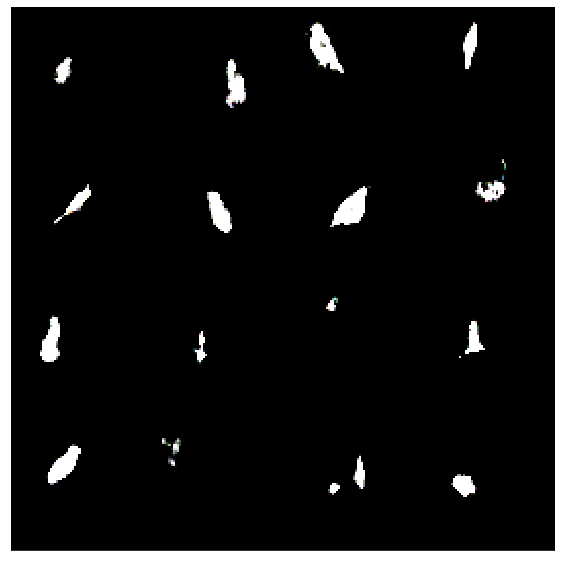

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


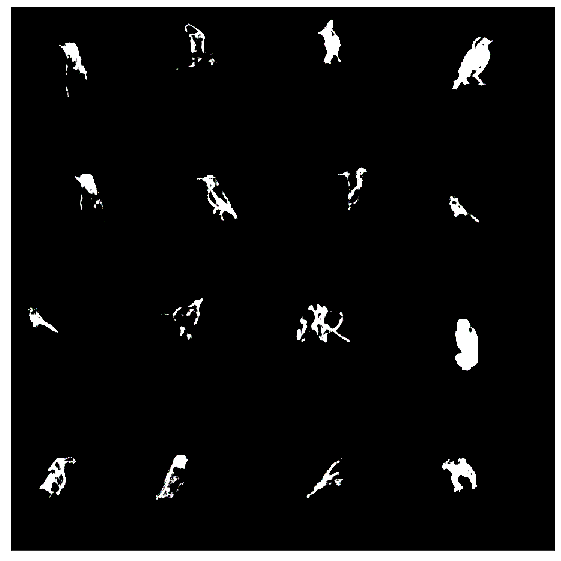

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 13


  0%|                                                                             | 1/17500 [00:14<72:53:57, 15.00s/it]

Train Epoch: 13 [0/280000 (0%)]	Loss: 0.034121
IOU : 0.04730224609375
IOU : 0.04730224609375


  0%|▏                                                                              | 53/17500 [00:18<41:25,  7.02it/s]

Train Epoch: 13 [200/280000 (0%)]	Loss: 0.041732
IOU : 0.0561065673828125


  1%|▍                                                                             | 104/17500 [00:21<18:35, 15.60it/s]

Train Epoch: 13 [400/280000 (1%)]	Loss: 0.036402
IOU : 0.0548858642578125
IOU : 0.0548858642578125


  1%|▋                                                                             | 153/17500 [00:24<19:37, 14.74it/s]

Train Epoch: 13 [600/280000 (1%)]	Loss: 0.034208
IOU : 0.055023193359375


  1%|▉                                                                             | 202/17500 [00:28<21:12, 13.60it/s]

Train Epoch: 13 [800/280000 (1%)]	Loss: 0.030260
IOU : 0.0574493408203125
IOU : 0.0574493408203125


  1%|█▏                                                                            | 253/17500 [00:31<20:34, 13.97it/s]

Train Epoch: 13 [1000/280000 (1%)]	Loss: 0.027615
IOU : 0.04833984375


  2%|█▎                                                                            | 302/17500 [00:34<20:39, 13.88it/s]

Train Epoch: 13 [1200/280000 (2%)]	Loss: 0.031640
IOU : 0.04998779296875
IOU : 0.04998779296875


  2%|█▌                                                                            | 349/17500 [00:37<18:05, 15.80it/s]

Train Epoch: 13 [1400/280000 (2%)]	Loss: 0.043687
IOU : 0.055023193359375


  2%|█▊                                                                            | 402/17500 [00:40<20:00, 14.24it/s]

Train Epoch: 13 [1600/280000 (2%)]	Loss: 0.051798
IOU : 0.0494232177734375
IOU : 0.0494232177734375


  3%|██                                                                            | 453/17500 [00:44<19:23, 14.65it/s]

Train Epoch: 13 [1800/280000 (3%)]	Loss: 0.034009
IOU : 0.0469207763671875


  3%|██▏                                                                           | 503/17500 [00:47<17:47, 15.92it/s]

Train Epoch: 13 [2000/280000 (3%)]	Loss: 0.029392
IOU : 0.0496978759765625
IOU : 0.0496978759765625


  3%|██▍                                                                           | 550/17500 [00:50<18:09, 15.55it/s]

Train Epoch: 13 [2200/280000 (3%)]	Loss: 0.041988
IOU : 0.049163818359375


  3%|██▋                                                                           | 598/17500 [00:53<18:17, 15.40it/s]

Train Epoch: 13 [2400/280000 (3%)]	Loss: 0.035639
IOU : 0.0571136474609375
IOU : 0.0571136474609375


  4%|██▉                                                                           | 650/17500 [00:56<18:32, 15.15it/s]

Train Epoch: 13 [2600/280000 (4%)]	Loss: 0.064234
IOU : 0.06353759765625


  4%|███▏                                                                          | 702/17500 [01:00<18:14, 15.35it/s]

Train Epoch: 13 [2800/280000 (4%)]	Loss: 0.035361
IOU : 0.05279541015625
IOU : 0.05279541015625


  4%|███▎                                                                          | 753/17500 [01:03<19:04, 14.63it/s]

Train Epoch: 13 [3000/280000 (4%)]	Loss: 0.034036
IOU : 0.052001953125


  5%|███▌                                                                          | 800/17500 [01:06<18:46, 14.83it/s]

Train Epoch: 13 [3200/280000 (5%)]	Loss: 0.050913
IOU : 0.0527801513671875
IOU : 0.0527801513671875


  5%|███▊                                                                          | 848/17500 [01:09<17:26, 15.91it/s]

Train Epoch: 13 [3400/280000 (5%)]	Loss: 0.039871
IOU : 0.0509796142578125


  5%|████                                                                          | 903/17500 [01:12<15:20, 18.03it/s]

Train Epoch: 13 [3600/280000 (5%)]	Loss: 0.033209
IOU : 0.0507659912109375
IOU : 0.0507659912109375


  5%|████▏                                                                         | 953/17500 [01:16<17:44, 15.54it/s]

Train Epoch: 13 [3800/280000 (5%)]	Loss: 0.033160
IOU : 0.05389404296875


  6%|████▍                                                                        | 1000/17500 [01:19<17:07, 16.06it/s]

Train Epoch: 13 [4000/280000 (6%)]	Loss: 0.035952
IOU : 0.0526275634765625
IOU : 0.0526275634765625


  6%|████▌                                                                        | 1048/17500 [01:22<17:44, 15.46it/s]

Train Epoch: 13 [4200/280000 (6%)]	Loss: 0.034294
IOU : 0.05181884765625


  6%|████▊                                                                        | 1103/17500 [01:25<16:28, 16.58it/s]

Train Epoch: 13 [4400/280000 (6%)]	Loss: 0.034280
IOU : 0.053924560546875
IOU : 0.053924560546875


  7%|█████                                                                        | 1148/17500 [01:28<19:15, 14.15it/s]

Train Epoch: 13 [4600/280000 (7%)]	Loss: 0.032040
IOU : 0.048736572265625


  7%|█████▎                                                                       | 1201/17500 [01:32<19:30, 13.92it/s]

Train Epoch: 13 [4800/280000 (7%)]	Loss: 0.037816
IOU : 0.0530242919921875
IOU : 0.0530242919921875


  7%|█████▌                                                                       | 1252/17500 [01:35<21:40, 12.49it/s]

Train Epoch: 13 [5000/280000 (7%)]	Loss: 0.039976
IOU : 0.0527191162109375


  7%|█████▋                                                                       | 1300/17500 [01:38<18:42, 14.43it/s]

Train Epoch: 13 [5200/280000 (7%)]	Loss: 0.046033
IOU : 0.060028076171875
IOU : 0.060028076171875


  8%|█████▉                                                                       | 1351/17500 [01:41<15:33, 17.30it/s]

Train Epoch: 13 [5400/280000 (8%)]	Loss: 0.036515
IOU : 0.0499420166015625


  8%|██████▏                                                                      | 1402/17500 [01:44<16:03, 16.71it/s]

Train Epoch: 13 [5600/280000 (8%)]	Loss: 0.064818
IOU : 0.060394287109375
IOU : 0.060394287109375


  8%|██████▎                                                                      | 1448/17500 [01:47<17:19, 15.45it/s]

Train Epoch: 13 [5800/280000 (8%)]	Loss: 0.045097
IOU : 0.05804443359375


  9%|██████▌                                                                      | 1500/17500 [01:51<18:53, 14.11it/s]

Train Epoch: 13 [6000/280000 (9%)]	Loss: 0.034807
IOU : 0.0550689697265625
IOU : 0.0550689697265625


  9%|██████▊                                                                      | 1548/17500 [01:54<15:49, 16.79it/s]

Train Epoch: 13 [6200/280000 (9%)]	Loss: 0.045599
IOU : 0.0562286376953125


  9%|███████                                                                      | 1600/17500 [01:57<16:01, 16.54it/s]

Train Epoch: 13 [6400/280000 (9%)]	Loss: 0.028716
IOU : 0.0522918701171875
IOU : 0.0522918701171875


  9%|███████▎                                                                     | 1652/17500 [02:00<16:33, 15.95it/s]

Train Epoch: 13 [6600/280000 (9%)]	Loss: 0.033998
IOU : 0.057220458984375


 10%|███████▍                                                                     | 1700/17500 [02:03<16:16, 16.18it/s]

Train Epoch: 13 [6800/280000 (10%)]	Loss: 0.037236
IOU : 0.0456695556640625
IOU : 0.0456695556640625


 10%|███████▋                                                                     | 1752/17500 [02:07<16:13, 16.18it/s]

Train Epoch: 13 [7000/280000 (10%)]	Loss: 0.032790
IOU : 0.052734375


 10%|███████▉                                                                     | 1802/17500 [02:10<16:06, 16.25it/s]

Train Epoch: 13 [7200/280000 (10%)]	Loss: 0.043474
IOU : 0.051605224609375
IOU : 0.051605224609375


 11%|████████▏                                                                    | 1852/17500 [02:13<17:05, 15.26it/s]

Train Epoch: 13 [7400/280000 (11%)]	Loss: 0.063901
IOU : 0.05499267578125


 11%|████████▎                                                                    | 1900/17500 [02:16<15:50, 16.41it/s]

Train Epoch: 13 [7600/280000 (11%)]	Loss: 0.060558
IOU : 0.0545654296875
IOU : 0.0545654296875


 11%|████████▌                                                                    | 1952/17500 [02:19<17:31, 14.78it/s]

Train Epoch: 13 [7800/280000 (11%)]	Loss: 0.028907
IOU : 0.053985595703125


 11%|████████▊                                                                    | 2002/17500 [02:22<17:42, 14.58it/s]

Train Epoch: 13 [8000/280000 (11%)]	Loss: 0.036522
IOU : 0.05792236328125
IOU : 0.05792236328125


 12%|█████████                                                                    | 2053/17500 [02:25<15:57, 16.13it/s]

Train Epoch: 13 [8200/280000 (12%)]	Loss: 0.031212
IOU : 0.0461273193359375


 12%|█████████▎                                                                   | 2104/17500 [02:29<15:23, 16.67it/s]

Train Epoch: 13 [8400/280000 (12%)]	Loss: 0.049361
IOU : 0.0570831298828125
IOU : 0.0570831298828125


 12%|█████████▍                                                                   | 2154/17500 [02:32<16:10, 15.81it/s]

Train Epoch: 13 [8600/280000 (12%)]	Loss: 0.055413
IOU : 0.0561370849609375


 13%|█████████▋                                                                   | 2201/17500 [02:35<16:00, 15.92it/s]

Train Epoch: 13 [8800/280000 (13%)]	Loss: 0.030766
IOU : 0.041046142578125
IOU : 0.041046142578125


 13%|█████████▉                                                                   | 2250/17500 [02:38<16:23, 15.50it/s]

Train Epoch: 13 [9000/280000 (13%)]	Loss: 0.038696
IOU : 0.0479583740234375


 13%|██████████▏                                                                  | 2303/17500 [02:41<16:28, 15.37it/s]

Train Epoch: 13 [9200/280000 (13%)]	Loss: 0.029028
IOU : 0.0540313720703125
IOU : 0.0540313720703125


 13%|██████████▎                                                                  | 2349/17500 [02:44<16:12, 15.58it/s]

Train Epoch: 13 [9400/280000 (13%)]	Loss: 0.033464
IOU : 0.0468902587890625


 14%|██████████▌                                                                  | 2401/17500 [02:47<15:48, 15.91it/s]

Train Epoch: 13 [9600/280000 (14%)]	Loss: 0.050121
IOU : 0.05535888671875
IOU : 0.05535888671875


 14%|██████████▊                                                                  | 2449/17500 [02:50<16:01, 15.65it/s]

Train Epoch: 13 [9800/280000 (14%)]	Loss: 0.041910
IOU : 0.0575408935546875


 14%|███████████                                                                  | 2501/17500 [02:53<15:33, 16.07it/s]

Train Epoch: 13 [10000/280000 (14%)]	Loss: 0.039419
IOU : 0.0546875
IOU : 0.0546875


 15%|███████████▏                                                                 | 2552/17500 [02:56<13:58, 17.83it/s]

Train Epoch: 13 [10200/280000 (15%)]	Loss: 0.041516
IOU : 0.0536346435546875


 15%|███████████▍                                                                 | 2604/17500 [03:00<15:20, 16.18it/s]

Train Epoch: 13 [10400/280000 (15%)]	Loss: 0.054983
IOU : 0.0706024169921875
IOU : 0.0706024169921875


 15%|███████████▋                                                                 | 2649/17500 [03:03<15:37, 15.84it/s]

Train Epoch: 13 [10600/280000 (15%)]	Loss: 0.044764
IOU : 0.0557403564453125


 15%|███████████▉                                                                 | 2702/17500 [03:06<17:09, 14.37it/s]

Train Epoch: 13 [10800/280000 (15%)]	Loss: 0.042842
IOU : 0.0517578125
IOU : 0.0517578125


 16%|████████████                                                                 | 2752/17500 [03:09<16:31, 14.88it/s]

Train Epoch: 13 [11000/280000 (16%)]	Loss: 0.039212
IOU : 0.0536651611328125


 16%|████████████▎                                                                | 2801/17500 [03:12<15:16, 16.04it/s]

Train Epoch: 13 [11200/280000 (16%)]	Loss: 0.044283
IOU : 0.055755615234375
IOU : 0.055755615234375


 16%|████████████▌                                                                | 2851/17500 [03:15<15:56, 15.32it/s]

Train Epoch: 13 [11400/280000 (16%)]	Loss: 0.040315
IOU : 0.0483856201171875


 17%|████████████▊                                                                | 2903/17500 [03:18<13:28, 18.06it/s]

Train Epoch: 13 [11600/280000 (17%)]	Loss: 0.037351
IOU : 0.0509033203125
IOU : 0.0509033203125


 17%|████████████▉                                                                | 2952/17500 [03:21<16:59, 14.27it/s]

Train Epoch: 13 [11800/280000 (17%)]	Loss: 0.048114
IOU : 0.0526580810546875


 17%|█████████████▏                                                               | 3002/17500 [03:24<17:05, 14.14it/s]

Train Epoch: 13 [12000/280000 (17%)]	Loss: 0.031818
IOU : 0.0528717041015625
IOU : 0.0528717041015625


 17%|█████████████▍                                                               | 3049/17500 [03:27<14:44, 16.33it/s]

Train Epoch: 13 [12200/280000 (17%)]	Loss: 0.040765
IOU : 0.0516357421875


 18%|█████████████▋                                                               | 3102/17500 [03:31<15:31, 15.45it/s]

Train Epoch: 13 [12400/280000 (18%)]	Loss: 0.030285
IOU : 0.045867919921875
IOU : 0.045867919921875


 18%|█████████████▊                                                               | 3153/17500 [03:34<14:15, 16.76it/s]

Train Epoch: 13 [12600/280000 (18%)]	Loss: 0.035861
IOU : 0.0543975830078125


 18%|██████████████                                                               | 3201/17500 [03:37<17:42, 13.46it/s]

Train Epoch: 13 [12800/280000 (18%)]	Loss: 0.046980
IOU : 0.054901123046875
IOU : 0.054901123046875


 19%|██████████████▎                                                              | 3249/17500 [03:40<14:05, 16.85it/s]

Train Epoch: 13 [13000/280000 (19%)]	Loss: 0.044141
IOU : 0.0541229248046875


 19%|██████████████▌                                                              | 3301/17500 [03:43<14:44, 16.05it/s]

Train Epoch: 13 [13200/280000 (19%)]	Loss: 0.039682
IOU : 0.048858642578125
IOU : 0.048858642578125


 19%|██████████████▋                                                              | 3349/17500 [03:46<14:39, 16.08it/s]

Train Epoch: 13 [13400/280000 (19%)]	Loss: 0.034854
IOU : 0.0557708740234375


 19%|██████████████▉                                                              | 3401/17500 [03:49<14:46, 15.90it/s]

Train Epoch: 13 [13600/280000 (19%)]	Loss: 0.052036
IOU : 0.046966552734375
IOU : 0.046966552734375


 20%|███████████████▏                                                             | 3449/17500 [03:52<14:27, 16.20it/s]

Train Epoch: 13 [13800/280000 (20%)]	Loss: 0.029012
IOU : 0.049102783203125


 20%|███████████████▍                                                             | 3501/17500 [03:55<14:18, 16.31it/s]

Train Epoch: 13 [14000/280000 (20%)]	Loss: 0.029802
IOU : 0.05194091796875
IOU : 0.05194091796875


 20%|███████████████▋                                                             | 3552/17500 [03:58<13:22, 17.37it/s]

Train Epoch: 13 [14200/280000 (20%)]	Loss: 0.040531
IOU : 0.0572052001953125


 21%|███████████████▊                                                             | 3602/17500 [04:02<15:48, 14.66it/s]

Train Epoch: 13 [14400/280000 (21%)]	Loss: 0.028140
IOU : 0.0473175048828125
IOU : 0.0473175048828125


 21%|████████████████                                                             | 3653/17500 [04:05<16:18, 14.15it/s]

Train Epoch: 13 [14600/280000 (21%)]	Loss: 0.042705
IOU : 0.055572509765625


 21%|████████████████▎                                                            | 3702/17500 [04:08<15:34, 14.77it/s]

Train Epoch: 13 [14800/280000 (21%)]	Loss: 0.043488
IOU : 0.057159423828125
IOU : 0.057159423828125


 21%|████████████████▌                                                            | 3752/17500 [04:11<14:01, 16.34it/s]

Train Epoch: 13 [15000/280000 (21%)]	Loss: 0.044650
IOU : 0.0595245361328125


 22%|████████████████▋                                                            | 3804/17500 [04:14<13:37, 16.75it/s]

Train Epoch: 13 [15200/280000 (22%)]	Loss: 0.029923
IOU : 0.0603179931640625
IOU : 0.0603179931640625


 22%|████████████████▉                                                            | 3852/17500 [04:17<13:47, 16.50it/s]

Train Epoch: 13 [15400/280000 (22%)]	Loss: 0.045228
IOU : 0.0494537353515625


 22%|█████████████████▏                                                           | 3901/17500 [04:20<15:36, 14.52it/s]

Train Epoch: 13 [15600/280000 (22%)]	Loss: 0.028933
IOU : 0.0544586181640625
IOU : 0.0544586181640625


 23%|█████████████████▍                                                           | 3953/17500 [04:23<13:45, 16.40it/s]

Train Epoch: 13 [15800/280000 (23%)]	Loss: 0.048500
IOU : 0.0488433837890625


 23%|█████████████████▌                                                           | 4002/17500 [04:26<14:02, 16.01it/s]

Train Epoch: 13 [16000/280000 (23%)]	Loss: 0.042804
IOU : 0.0504608154296875
IOU : 0.0504608154296875


 23%|█████████████████▊                                                           | 4052/17500 [04:29<14:43, 15.22it/s]

Train Epoch: 13 [16200/280000 (23%)]	Loss: 0.049459
IOU : 0.050018310546875


 23%|██████████████████                                                           | 4100/17500 [04:32<14:15, 15.66it/s]

Train Epoch: 13 [16400/280000 (23%)]	Loss: 0.032798
IOU : 0.052093505859375
IOU : 0.052093505859375


 24%|██████████████████▎                                                          | 4152/17500 [04:36<15:10, 14.65it/s]

Train Epoch: 13 [16600/280000 (24%)]	Loss: 0.052559
IOU : 0.0554962158203125


 24%|██████████████████▍                                                          | 4202/17500 [04:39<13:53, 15.95it/s]

Train Epoch: 13 [16800/280000 (24%)]	Loss: 0.031799
IOU : 0.0458831787109375
IOU : 0.0458831787109375


 24%|██████████████████▋                                                          | 4251/17500 [04:42<12:55, 17.09it/s]

Train Epoch: 13 [17000/280000 (24%)]	Loss: 0.038088
IOU : 0.06268310546875


 25%|██████████████████▉                                                          | 4302/17500 [04:45<13:40, 16.08it/s]

Train Epoch: 13 [17200/280000 (25%)]	Loss: 0.059561
IOU : 0.0511322021484375
IOU : 0.0511322021484375


 25%|███████████████████▏                                                         | 4352/17500 [04:48<13:25, 16.31it/s]

Train Epoch: 13 [17400/280000 (25%)]	Loss: 0.029721
IOU : 0.0553131103515625


 25%|███████████████████▎                                                         | 4401/17500 [04:51<13:55, 15.68it/s]

Train Epoch: 13 [17600/280000 (25%)]	Loss: 0.044047
IOU : 0.0499420166015625
IOU : 0.0499420166015625


 25%|███████████████████▌                                                         | 4452/17500 [04:54<13:36, 15.99it/s]

Train Epoch: 13 [17800/280000 (25%)]	Loss: 0.032847
IOU : 0.0524444580078125


 26%|███████████████████▊                                                         | 4500/17500 [04:57<13:41, 15.82it/s]

Train Epoch: 13 [18000/280000 (26%)]	Loss: 0.031756
IOU : 0.0517730712890625
IOU : 0.0517730712890625


 26%|████████████████████                                                         | 4552/17500 [05:00<13:03, 16.52it/s]

Train Epoch: 13 [18200/280000 (26%)]	Loss: 0.042819
IOU : 0.0511016845703125


 26%|████████████████████▏                                                        | 4600/17500 [05:03<13:22, 16.07it/s]

Train Epoch: 13 [18400/280000 (26%)]	Loss: 0.041689
IOU : 0.05523681640625
IOU : 0.05523681640625


 27%|████████████████████▍                                                        | 4652/17500 [05:06<12:50, 16.68it/s]

Train Epoch: 13 [18600/280000 (27%)]	Loss: 0.052149
IOU : 0.0549774169921875


 27%|████████████████████▋                                                        | 4700/17500 [05:10<13:21, 15.98it/s]

Train Epoch: 13 [18800/280000 (27%)]	Loss: 0.031554
IOU : 0.0452728271484375
IOU : 0.0452728271484375


 27%|████████████████████▉                                                        | 4748/17500 [05:12<12:34, 16.90it/s]

Train Epoch: 13 [19000/280000 (27%)]	Loss: 0.039499
IOU : 0.0593719482421875


 27%|█████████████████████▏                                                       | 4803/17500 [05:16<11:42, 18.08it/s]

Train Epoch: 13 [19200/280000 (27%)]	Loss: 0.030246
IOU : 0.0618438720703125
IOU : 0.0618438720703125


 28%|█████████████████████▎                                                       | 4848/17500 [05:19<12:42, 16.59it/s]

Train Epoch: 13 [19400/280000 (28%)]	Loss: 0.041557
IOU : 0.0643157958984375


 28%|█████████████████████▌                                                       | 4903/17500 [05:22<11:21, 18.48it/s]

Train Epoch: 13 [19600/280000 (28%)]	Loss: 0.048258
IOU : 0.0570220947265625
IOU : 0.0570220947265625


 28%|█████████████████████▊                                                       | 4952/17500 [05:25<12:25, 16.83it/s]

Train Epoch: 13 [19800/280000 (28%)]	Loss: 0.057672
IOU : 0.055084228515625


 29%|██████████████████████                                                       | 5000/17500 [05:28<12:42, 16.39it/s]

Train Epoch: 13 [20000/280000 (29%)]	Loss: 0.037711
IOU : 0.0521392822265625
IOU : 0.0521392822265625


 29%|██████████████████████▏                                                      | 5048/17500 [05:31<12:28, 16.64it/s]

Train Epoch: 13 [20200/280000 (29%)]	Loss: 0.041600
IOU : 0.0546722412109375


 29%|██████████████████████▍                                                      | 5100/17500 [05:34<12:54, 16.01it/s]

Train Epoch: 13 [20400/280000 (29%)]	Loss: 0.044284
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 29%|██████████████████████▋                                                      | 5148/17500 [05:37<13:09, 15.64it/s]

Train Epoch: 13 [20600/280000 (29%)]	Loss: 0.042613
IOU : 0.0418243408203125


 30%|██████████████████████▉                                                      | 5200/17500 [05:40<12:01, 17.04it/s]

Train Epoch: 13 [20800/280000 (30%)]	Loss: 0.030988
IOU : 0.04736328125
IOU : 0.04736328125


 30%|███████████████████████                                                      | 5252/17500 [05:43<12:42, 16.07it/s]

Train Epoch: 13 [21000/280000 (30%)]	Loss: 0.036428
IOU : 0.043975830078125


 30%|███████████████████████▎                                                     | 5300/17500 [05:46<11:58, 16.98it/s]

Train Epoch: 13 [21200/280000 (30%)]	Loss: 0.034914
IOU : 0.0532073974609375
IOU : 0.0532073974609375


 31%|███████████████████████▌                                                     | 5348/17500 [05:49<11:42, 17.30it/s]

Train Epoch: 13 [21400/280000 (31%)]	Loss: 0.040792
IOU : 0.053375244140625


 31%|███████████████████████▊                                                     | 5400/17500 [05:52<12:02, 16.76it/s]

Train Epoch: 13 [21600/280000 (31%)]	Loss: 0.036490
IOU : 0.0471954345703125
IOU : 0.0471954345703125


 31%|███████████████████████▉                                                     | 5452/17500 [05:56<12:21, 16.25it/s]

Train Epoch: 13 [21800/280000 (31%)]	Loss: 0.030062
IOU : 0.05096435546875


 31%|████████████████████████▏                                                    | 5500/17500 [05:59<11:49, 16.92it/s]

Train Epoch: 13 [22000/280000 (31%)]	Loss: 0.068313
IOU : 0.06353759765625
IOU : 0.06353759765625


 32%|████████████████████████▍                                                    | 5552/17500 [06:02<12:10, 16.36it/s]

Train Epoch: 13 [22200/280000 (32%)]	Loss: 0.041145
IOU : 0.0589141845703125


 32%|████████████████████████▋                                                    | 5600/17500 [06:05<12:22, 16.02it/s]

Train Epoch: 13 [22400/280000 (32%)]	Loss: 0.036324
IOU : 0.05181884765625
IOU : 0.05181884765625


 32%|████████████████████████▊                                                    | 5652/17500 [06:08<12:16, 16.09it/s]

Train Epoch: 13 [22600/280000 (32%)]	Loss: 0.043860
IOU : 0.0523529052734375


 33%|█████████████████████████                                                    | 5703/17500 [06:11<10:57, 17.93it/s]

Train Epoch: 13 [22800/280000 (33%)]	Loss: 0.045595
IOU : 0.0626678466796875
IOU : 0.0626678466796875


 33%|█████████████████████████▎                                                   | 5748/17500 [06:14<11:41, 16.76it/s]

Train Epoch: 13 [23000/280000 (33%)]	Loss: 0.048097
IOU : 0.0590667724609375


 33%|█████████████████████████▌                                                   | 5800/17500 [06:17<12:41, 15.37it/s]

Train Epoch: 13 [23200/280000 (33%)]	Loss: 0.045046
IOU : 0.049591064453125
IOU : 0.049591064453125


 33%|█████████████████████████▋                                                   | 5851/17500 [06:20<10:34, 18.37it/s]

Train Epoch: 13 [23400/280000 (33%)]	Loss: 0.038404
IOU : 0.0557861328125


 34%|█████████████████████████▉                                                   | 5901/17500 [06:23<12:50, 15.05it/s]

Train Epoch: 13 [23600/280000 (34%)]	Loss: 0.033787
IOU : 0.04913330078125
IOU : 0.04913330078125


 34%|██████████████████████████▏                                                  | 5949/17500 [06:26<11:57, 16.10it/s]

Train Epoch: 13 [23800/280000 (34%)]	Loss: 0.041887
IOU : 0.056549072265625


 34%|██████████████████████████▍                                                  | 6001/17500 [06:30<12:26, 15.41it/s]

Train Epoch: 13 [24000/280000 (34%)]	Loss: 0.036808
IOU : 0.051971435546875
IOU : 0.051971435546875


 35%|██████████████████████████▋                                                  | 6053/17500 [06:33<11:39, 16.37it/s]

Train Epoch: 13 [24200/280000 (35%)]	Loss: 0.041646
IOU : 0.0533447265625


 35%|██████████████████████████▊                                                  | 6101/17500 [06:36<11:37, 16.34it/s]

Train Epoch: 13 [24400/280000 (35%)]	Loss: 0.038288
IOU : 0.0444488525390625
IOU : 0.0444488525390625


 35%|███████████████████████████                                                  | 6149/17500 [06:39<11:23, 16.60it/s]

Train Epoch: 13 [24600/280000 (35%)]	Loss: 0.037649
IOU : 0.061431884765625


 35%|███████████████████████████▎                                                 | 6202/17500 [06:42<12:30, 15.04it/s]

Train Epoch: 13 [24800/280000 (35%)]	Loss: 0.035385
IOU : 0.0438232421875
IOU : 0.0438232421875


 36%|███████████████████████████▍                                                 | 6249/17500 [06:45<11:15, 16.66it/s]

Train Epoch: 13 [25000/280000 (36%)]	Loss: 0.038770
IOU : 0.05792236328125


 36%|███████████████████████████▋                                                 | 6301/17500 [06:48<11:44, 15.90it/s]

Train Epoch: 13 [25200/280000 (36%)]	Loss: 0.038014
IOU : 0.044525146484375
IOU : 0.044525146484375


 36%|███████████████████████████▉                                                 | 6349/17500 [06:51<11:20, 16.40it/s]

Train Epoch: 13 [25400/280000 (36%)]	Loss: 0.039894
IOU : 0.0556793212890625


 37%|████████████████████████████▏                                                | 6401/17500 [06:54<11:19, 16.33it/s]

Train Epoch: 13 [25600/280000 (37%)]	Loss: 0.038000
IOU : 0.055389404296875
IOU : 0.055389404296875


 37%|████████████████████████████▍                                                | 6449/17500 [06:57<11:03, 16.67it/s]

Train Epoch: 13 [25800/280000 (37%)]	Loss: 0.033588
IOU : 0.051116943359375


 37%|████████████████████████████▌                                                | 6501/17500 [07:00<11:26, 16.01it/s]

Train Epoch: 13 [26000/280000 (37%)]	Loss: 0.028128
IOU : 0.0435791015625
IOU : 0.0435791015625


 37%|████████████████████████████▊                                                | 6553/17500 [07:03<10:54, 16.73it/s]

Train Epoch: 13 [26200/280000 (37%)]	Loss: 0.036661
IOU : 0.054290771484375


 38%|█████████████████████████████                                                | 6601/17500 [07:06<12:30, 14.53it/s]

Train Epoch: 13 [26400/280000 (38%)]	Loss: 0.047902
IOU : 0.055816650390625
IOU : 0.055816650390625


 38%|█████████████████████████████▎                                               | 6649/17500 [07:09<11:12, 16.13it/s]

Train Epoch: 13 [26600/280000 (38%)]	Loss: 0.038710
IOU : 0.05584716796875


 38%|█████████████████████████████▍                                               | 6701/17500 [07:13<11:03, 16.27it/s]

Train Epoch: 13 [26800/280000 (38%)]	Loss: 0.028235
IOU : 0.04803466796875
IOU : 0.04803466796875


 39%|█████████████████████████████▋                                               | 6753/17500 [07:16<11:05, 16.15it/s]

Train Epoch: 13 [27000/280000 (39%)]	Loss: 0.028027
IOU : 0.04815673828125


 39%|█████████████████████████████▉                                               | 6801/17500 [07:19<10:57, 16.27it/s]

Train Epoch: 13 [27200/280000 (39%)]	Loss: 0.035863
IOU : 0.0480499267578125
IOU : 0.0480499267578125


 39%|██████████████████████████████▏                                              | 6849/17500 [07:22<10:46, 16.47it/s]

Train Epoch: 13 [27400/280000 (39%)]	Loss: 0.030030
IOU : 0.0513763427734375


 39%|██████████████████████████████▎                                              | 6901/17500 [07:25<11:06, 15.91it/s]

Train Epoch: 13 [27600/280000 (39%)]	Loss: 0.041653
IOU : 0.05450439453125
IOU : 0.05450439453125


 40%|██████████████████████████████▌                                              | 6953/17500 [07:28<11:10, 15.72it/s]

Train Epoch: 13 [27800/280000 (40%)]	Loss: 0.041076
IOU : 0.052093505859375


 40%|██████████████████████████████▊                                              | 7004/17500 [07:31<10:21, 16.89it/s]

Train Epoch: 13 [28000/280000 (40%)]	Loss: 0.035154
IOU : 0.0485687255859375
IOU : 0.0485687255859375


 40%|███████████████████████████████                                              | 7052/17500 [07:34<11:32, 15.08it/s]

Train Epoch: 13 [28200/280000 (40%)]	Loss: 0.048507
IOU : 0.066558837890625


 41%|███████████████████████████████▏                                             | 7100/17500 [07:37<11:57, 14.50it/s]

Train Epoch: 13 [28400/280000 (41%)]	Loss: 0.031220
IOU : 0.0496673583984375
IOU : 0.0496673583984375


 41%|███████████████████████████████▍                                             | 7152/17500 [07:40<11:04, 15.57it/s]

Train Epoch: 13 [28600/280000 (41%)]	Loss: 0.032448
IOU : 0.0494232177734375


 41%|███████████████████████████████▋                                             | 7200/17500 [07:43<12:15, 14.00it/s]

Train Epoch: 13 [28800/280000 (41%)]	Loss: 0.043689
IOU : 0.0651397705078125
IOU : 0.0651397705078125


 41%|███████████████████████████████▉                                             | 7252/17500 [07:46<11:00, 15.51it/s]

Train Epoch: 13 [29000/280000 (41%)]	Loss: 0.051028
IOU : 0.05255126953125


 42%|████████████████████████████████                                             | 7301/17500 [07:49<11:38, 14.59it/s]

Train Epoch: 13 [29200/280000 (42%)]	Loss: 0.034965
IOU : 0.058868408203125
IOU : 0.058868408203125


 42%|████████████████████████████████▎                                            | 7352/17500 [07:53<11:17, 14.97it/s]

Train Epoch: 13 [29400/280000 (42%)]	Loss: 0.034133
IOU : 0.051177978515625


 42%|████████████████████████████████▌                                            | 7400/17500 [07:55<10:50, 15.53it/s]

Train Epoch: 13 [29600/280000 (42%)]	Loss: 0.026778
IOU : 0.045745849609375
IOU : 0.045745849609375


 43%|████████████████████████████████▊                                            | 7452/17500 [07:59<10:49, 15.48it/s]

Train Epoch: 13 [29800/280000 (43%)]	Loss: 0.041883
IOU : 0.048492431640625


 43%|█████████████████████████████████                                            | 7500/17500 [08:02<09:57, 16.73it/s]

Train Epoch: 13 [30000/280000 (43%)]	Loss: 0.038254
IOU : 0.0475921630859375
IOU : 0.0475921630859375


 43%|█████████████████████████████████▏                                           | 7552/17500 [08:05<09:53, 16.77it/s]

Train Epoch: 13 [30200/280000 (43%)]	Loss: 0.048428
IOU : 0.05706787109375


 43%|█████████████████████████████████▍                                           | 7603/17500 [08:08<09:01, 18.28it/s]

Train Epoch: 13 [30400/280000 (43%)]	Loss: 0.045949
IOU : 0.0579071044921875
IOU : 0.0579071044921875


 44%|█████████████████████████████████▋                                           | 7652/17500 [08:11<09:57, 16.48it/s]

Train Epoch: 13 [30600/280000 (44%)]	Loss: 0.040458
IOU : 0.0479583740234375


 44%|█████████████████████████████████▉                                           | 7700/17500 [08:14<10:08, 16.10it/s]

Train Epoch: 13 [30800/280000 (44%)]	Loss: 0.041903
IOU : 0.06024169921875
IOU : 0.06024169921875


 44%|██████████████████████████████████                                           | 7748/17500 [08:17<10:30, 15.46it/s]

Train Epoch: 13 [31000/280000 (44%)]	Loss: 0.060939
IOU : 0.0585784912109375


 45%|██████████████████████████████████▎                                          | 7800/17500 [08:20<09:40, 16.72it/s]

Train Epoch: 13 [31200/280000 (45%)]	Loss: 0.040441
IOU : 0.0537567138671875
IOU : 0.0537567138671875


 45%|██████████████████████████████████▌                                          | 7852/17500 [08:23<10:03, 15.98it/s]

Train Epoch: 13 [31400/280000 (45%)]	Loss: 0.038237
IOU : 0.0474700927734375


 45%|██████████████████████████████████▊                                          | 7904/17500 [08:27<09:38, 16.60it/s]

Train Epoch: 13 [31600/280000 (45%)]	Loss: 0.052468
IOU : 0.058258056640625
IOU : 0.058258056640625


 45%|██████████████████████████████████▉                                          | 7953/17500 [08:30<09:15, 17.19it/s]

Train Epoch: 13 [31800/280000 (45%)]	Loss: 0.039201
IOU : 0.05133056640625


 46%|███████████████████████████████████▏                                         | 8000/17500 [08:32<09:24, 16.83it/s]

Train Epoch: 13 [32000/280000 (46%)]	Loss: 0.029126
IOU : 0.0537872314453125
IOU : 0.0537872314453125


 46%|███████████████████████████████████▍                                         | 8052/17500 [08:36<09:22, 16.79it/s]

Train Epoch: 13 [32200/280000 (46%)]	Loss: 0.057516
IOU : 0.0532684326171875


 46%|███████████████████████████████████▋                                         | 8100/17500 [08:39<09:52, 15.87it/s]

Train Epoch: 13 [32400/280000 (46%)]	Loss: 0.047797
IOU : 0.0566253662109375
IOU : 0.0566253662109375


 47%|███████████████████████████████████▊                                         | 8152/17500 [08:42<09:00, 17.31it/s]

Train Epoch: 13 [32600/280000 (47%)]	Loss: 0.035928
IOU : 0.0530548095703125


 47%|████████████████████████████████████                                         | 8200/17500 [08:45<09:23, 16.51it/s]

Train Epoch: 13 [32800/280000 (47%)]	Loss: 0.054195
IOU : 0.0593109130859375
IOU : 0.0593109130859375


 47%|████████████████████████████████████▎                                        | 8248/17500 [08:48<09:18, 16.57it/s]

Train Epoch: 13 [33000/280000 (47%)]	Loss: 0.033924
IOU : 0.0529937744140625


 47%|████████████████████████████████████▌                                        | 8300/17500 [08:51<09:27, 16.21it/s]

Train Epoch: 13 [33200/280000 (47%)]	Loss: 0.044483
IOU : 0.04779052734375
IOU : 0.04779052734375


 48%|████████████████████████████████████▋                                        | 8352/17500 [08:54<10:11, 14.95it/s]

Train Epoch: 13 [33400/280000 (48%)]	Loss: 0.036501
IOU : 0.0597686767578125


 48%|████████████████████████████████████▉                                        | 8400/17500 [08:57<09:29, 15.98it/s]

Train Epoch: 13 [33600/280000 (48%)]	Loss: 0.047227
IOU : 0.0586700439453125
IOU : 0.0586700439453125


 48%|█████████████████████████████████████▏                                       | 8451/17500 [09:00<08:41, 17.35it/s]

Train Epoch: 13 [33800/280000 (48%)]	Loss: 0.041455
IOU : 0.05364990234375


 49%|█████████████████████████████████████▍                                       | 8500/17500 [09:03<09:10, 16.34it/s]

Train Epoch: 13 [34000/280000 (49%)]	Loss: 0.041903
IOU : 0.0516815185546875
IOU : 0.0516815185546875


 49%|█████████████████████████████████████▌                                       | 8548/17500 [09:06<09:25, 15.83it/s]

Train Epoch: 13 [34200/280000 (49%)]	Loss: 0.039420
IOU : 0.055023193359375


 49%|█████████████████████████████████████▊                                       | 8603/17500 [09:10<08:13, 18.03it/s]

Train Epoch: 13 [34400/280000 (49%)]	Loss: 0.042616
IOU : 0.0515289306640625
IOU : 0.0515289306640625


 49%|██████████████████████████████████████                                       | 8652/17500 [09:13<08:58, 16.42it/s]

Train Epoch: 13 [34600/280000 (49%)]	Loss: 0.042300
IOU : 0.0562591552734375


 50%|██████████████████████████████████████▎                                      | 8700/17500 [09:16<09:20, 15.71it/s]

Train Epoch: 13 [34800/280000 (50%)]	Loss: 0.035870
IOU : 0.04937744140625
IOU : 0.04937744140625


 50%|██████████████████████████████████████▌                                      | 8752/17500 [09:19<08:57, 16.29it/s]

Train Epoch: 13 [35000/280000 (50%)]	Loss: 0.050803
IOU : 0.0510101318359375


 50%|██████████████████████████████████████▋                                      | 8804/17500 [09:22<08:31, 16.99it/s]

Train Epoch: 13 [35200/280000 (50%)]	Loss: 0.051949
IOU : 0.050048828125
IOU : 0.050048828125


 51%|██████████████████████████████████████▉                                      | 8852/17500 [09:25<08:44, 16.50it/s]

Train Epoch: 13 [35400/280000 (51%)]	Loss: 0.045163
IOU : 0.0541229248046875


 51%|███████████████████████████████████████▏                                     | 8900/17500 [09:28<09:30, 15.07it/s]

Train Epoch: 13 [35600/280000 (51%)]	Loss: 0.031531
IOU : 0.0492401123046875
IOU : 0.0492401123046875


 51%|███████████████████████████████████████▍                                     | 8952/17500 [09:31<08:31, 16.72it/s]

Train Epoch: 13 [35800/280000 (51%)]	Loss: 0.036133
IOU : 0.0462493896484375


 51%|███████████████████████████████████████▌                                     | 9003/17500 [09:35<07:27, 18.98it/s]

Train Epoch: 13 [36000/280000 (51%)]	Loss: 0.046342
IOU : 0.0531158447265625
IOU : 0.0531158447265625


 52%|███████████████████████████████████████▊                                     | 9052/17500 [09:38<08:45, 16.07it/s]

Train Epoch: 13 [36200/280000 (52%)]	Loss: 0.030302
IOU : 0.0428314208984375


 52%|████████████████████████████████████████                                     | 9100/17500 [09:41<08:38, 16.21it/s]

Train Epoch: 13 [36400/280000 (52%)]	Loss: 0.035080
IOU : 0.050994873046875
IOU : 0.050994873046875


 52%|████████████████████████████████████████▎                                    | 9152/17500 [09:44<08:23, 16.57it/s]

Train Epoch: 13 [36600/280000 (52%)]	Loss: 0.042696
IOU : 0.0572357177734375


 53%|████████████████████████████████████████▍                                    | 9200/17500 [09:47<08:20, 16.57it/s]

Train Epoch: 13 [36800/280000 (53%)]	Loss: 0.038648
IOU : 0.0487060546875
IOU : 0.0487060546875


 53%|████████████████████████████████████████▋                                    | 9253/17500 [09:50<08:43, 15.74it/s]

Train Epoch: 13 [37000/280000 (53%)]	Loss: 0.037399
IOU : 0.05865478515625


 53%|████████████████████████████████████████▉                                    | 9304/17500 [09:53<08:20, 16.38it/s]

Train Epoch: 13 [37200/280000 (53%)]	Loss: 0.069735
IOU : 0.0560455322265625
IOU : 0.0560455322265625


 53%|█████████████████████████████████████████▏                                   | 9352/17500 [09:56<09:36, 14.14it/s]

Train Epoch: 13 [37400/280000 (53%)]	Loss: 0.063502
IOU : 0.0630035400390625


 54%|█████████████████████████████████████████▎                                   | 9403/17500 [09:59<08:38, 15.63it/s]

Train Epoch: 13 [37600/280000 (54%)]	Loss: 0.036482
IOU : 0.0523834228515625
IOU : 0.0523834228515625


 54%|█████████████████████████████████████████▌                                   | 9452/17500 [10:02<09:13, 14.53it/s]

Train Epoch: 13 [37800/280000 (54%)]	Loss: 0.052745
IOU : 0.0592498779296875


 54%|█████████████████████████████████████████▊                                   | 9503/17500 [10:05<07:58, 16.70it/s]

Train Epoch: 13 [38000/280000 (54%)]	Loss: 0.033812
IOU : 0.052642822265625
IOU : 0.052642822265625


 55%|██████████████████████████████████████████                                   | 9553/17500 [10:08<08:41, 15.24it/s]

Train Epoch: 13 [38200/280000 (55%)]	Loss: 0.046068
IOU : 0.0554046630859375


 55%|██████████████████████████████████████████▎                                  | 9604/17500 [10:12<08:31, 15.45it/s]

Train Epoch: 13 [38400/280000 (55%)]	Loss: 0.035592
IOU : 0.051727294921875
IOU : 0.051727294921875


 55%|██████████████████████████████████████████▍                                  | 9653/17500 [10:15<07:56, 16.45it/s]

Train Epoch: 13 [38600/280000 (55%)]	Loss: 0.027630
IOU : 0.0426483154296875


 55%|██████████████████████████████████████████▋                                  | 9702/17500 [10:18<08:55, 14.57it/s]

Train Epoch: 13 [38800/280000 (55%)]	Loss: 0.038618
IOU : 0.0512237548828125
IOU : 0.0512237548828125


 56%|██████████████████████████████████████████▉                                  | 9752/17500 [10:21<07:58, 16.18it/s]

Train Epoch: 13 [39000/280000 (56%)]	Loss: 0.047759
IOU : 0.0498504638671875


 56%|███████████████████████████████████████████▏                                 | 9802/17500 [10:24<08:40, 14.78it/s]

Train Epoch: 13 [39200/280000 (56%)]	Loss: 0.049489
IOU : 0.0566864013671875
IOU : 0.0566864013671875


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [10:27<07:24, 17.22it/s]

Train Epoch: 13 [39400/280000 (56%)]	Loss: 0.039706
IOU : 0.0589447021484375


 57%|███████████████████████████████████████████▌                                 | 9904/17500 [10:30<07:31, 16.84it/s]

Train Epoch: 13 [39600/280000 (57%)]	Loss: 0.052276
IOU : 0.0612640380859375
IOU : 0.0612640380859375


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [10:33<07:06, 17.69it/s]

Train Epoch: 13 [39800/280000 (57%)]	Loss: 0.035659
IOU : 0.0471649169921875


 57%|███████████████████████████████████████████▍                                | 10003/17500 [10:36<07:23, 16.91it/s]

Train Epoch: 13 [40000/280000 (57%)]	Loss: 0.043577
IOU : 0.0549774169921875
IOU : 0.0549774169921875


 57%|███████████████████████████████████████████▋                                | 10049/17500 [10:39<08:19, 14.93it/s]

Train Epoch: 13 [40200/280000 (57%)]	Loss: 0.048583
IOU : 0.0561370849609375


 58%|███████████████████████████████████████████▊                                | 10102/17500 [10:42<08:00, 15.38it/s]

Train Epoch: 13 [40400/280000 (58%)]	Loss: 0.040170
IOU : 0.056976318359375
IOU : 0.056976318359375


 58%|████████████████████████████████████████████                                | 10152/17500 [10:45<07:23, 16.58it/s]

Train Epoch: 13 [40600/280000 (58%)]	Loss: 0.039459
IOU : 0.0529632568359375


 58%|████████████████████████████████████████████▎                               | 10204/17500 [10:49<08:05, 15.02it/s]

Train Epoch: 13 [40800/280000 (58%)]	Loss: 0.037665
IOU : 0.051544189453125
IOU : 0.051544189453125


 59%|████████████████████████████████████████████▌                               | 10253/17500 [10:52<09:57, 12.12it/s]

Train Epoch: 13 [41000/280000 (59%)]	Loss: 0.030400
IOU : 0.0493927001953125


 59%|████████████████████████████████████████████▋                               | 10301/17500 [10:55<08:16, 14.49it/s]

Train Epoch: 13 [41200/280000 (59%)]	Loss: 0.029184
IOU : 0.053131103515625
IOU : 0.053131103515625


 59%|████████████████████████████████████████████▉                               | 10351/17500 [10:58<06:37, 17.98it/s]

Train Epoch: 13 [41400/280000 (59%)]	Loss: 0.034364
IOU : 0.0483856201171875


 59%|█████████████████████████████████████████████▏                              | 10401/17500 [11:01<07:24, 15.97it/s]

Train Epoch: 13 [41600/280000 (59%)]	Loss: 0.044178
IOU : 0.057098388671875
IOU : 0.057098388671875


 60%|█████████████████████████████████████████████▍                              | 10449/17500 [11:04<07:27, 15.77it/s]

Train Epoch: 13 [41800/280000 (60%)]	Loss: 0.059400
IOU : 0.0573883056640625


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [11:07<07:22, 15.81it/s]

Train Epoch: 13 [42000/280000 (60%)]	Loss: 0.029552
IOU : 0.0508880615234375
IOU : 0.0508880615234375


 60%|█████████████████████████████████████████████▊                              | 10553/17500 [11:10<07:17, 15.86it/s]

Train Epoch: 13 [42200/280000 (60%)]	Loss: 0.039623
IOU : 0.0543212890625


 61%|██████████████████████████████████████████████                              | 10601/17500 [11:13<07:15, 15.84it/s]

Train Epoch: 13 [42400/280000 (61%)]	Loss: 0.035542
IOU : 0.0520172119140625
IOU : 0.0520172119140625


 61%|██████████████████████████████████████████████▎                             | 10653/17500 [11:16<06:49, 16.71it/s]

Train Epoch: 13 [42600/280000 (61%)]	Loss: 0.039194
IOU : 0.0527191162109375


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [11:19<07:01, 16.14it/s]

Train Epoch: 13 [42800/280000 (61%)]	Loss: 0.033610
IOU : 0.0605010986328125
IOU : 0.0605010986328125


 61%|██████████████████████████████████████████████▋                             | 10749/17500 [11:22<06:43, 16.74it/s]

Train Epoch: 13 [43000/280000 (61%)]	Loss: 0.058110
IOU : 0.0620574951171875


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [11:25<07:16, 15.33it/s]

Train Epoch: 13 [43200/280000 (62%)]	Loss: 0.040758
IOU : 0.0479736328125
IOU : 0.0479736328125


 62%|███████████████████████████████████████████████                             | 10849/17500 [11:28<06:55, 16.00it/s]

Train Epoch: 13 [43400/280000 (62%)]	Loss: 0.044367
IOU : 0.0590667724609375


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [11:32<07:02, 15.62it/s]

Train Epoch: 13 [43600/280000 (62%)]	Loss: 0.039416
IOU : 0.051605224609375
IOU : 0.051605224609375


 63%|███████████████████████████████████████████████▌                            | 10953/17500 [11:35<06:27, 16.88it/s]

Train Epoch: 13 [43800/280000 (63%)]	Loss: 0.030482
IOU : 0.0524444580078125


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [11:38<06:39, 16.25it/s]

Train Epoch: 13 [44000/280000 (63%)]	Loss: 0.034314
IOU : 0.0490570068359375
IOU : 0.0490570068359375


 63%|███████████████████████████████████████████████▉                            | 11049/17500 [11:41<07:18, 14.73it/s]

Train Epoch: 13 [44200/280000 (63%)]	Loss: 0.037706
IOU : 0.054656982421875


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [11:44<06:36, 16.15it/s]

Train Epoch: 13 [44400/280000 (63%)]	Loss: 0.029806
IOU : 0.05035400390625
IOU : 0.05035400390625


 64%|████████████████████████████████████████████████▍                           | 11149/17500 [11:47<06:27, 16.38it/s]

Train Epoch: 13 [44600/280000 (64%)]	Loss: 0.048812
IOU : 0.0514373779296875


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [11:50<06:39, 15.78it/s]

Train Epoch: 13 [44800/280000 (64%)]	Loss: 0.059884
IOU : 0.065185546875
IOU : 0.065185546875


 64%|████████████████████████████████████████████████▊                           | 11249/17500 [11:53<06:19, 16.46it/s]

Train Epoch: 13 [45000/280000 (64%)]	Loss: 0.076982
IOU : 0.074371337890625


 65%|█████████████████████████████████████████████████                           | 11301/17500 [11:56<06:22, 16.22it/s]

Train Epoch: 13 [45200/280000 (65%)]	Loss: 0.043802
IOU : 0.05078125
IOU : 0.05078125


 65%|█████████████████████████████████████████████████▎                          | 11349/17500 [11:59<06:21, 16.12it/s]

Train Epoch: 13 [45400/280000 (65%)]	Loss: 0.049520
IOU : 0.0557708740234375


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [12:02<06:21, 15.99it/s]

Train Epoch: 13 [45600/280000 (65%)]	Loss: 0.039263
IOU : 0.0519561767578125
IOU : 0.0519561767578125


 65%|█████████████████████████████████████████████████▋                          | 11449/17500 [12:05<06:10, 16.35it/s]

Train Epoch: 13 [45800/280000 (65%)]	Loss: 0.036426
IOU : 0.0505523681640625


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [12:09<06:54, 14.47it/s]

Train Epoch: 13 [46000/280000 (66%)]	Loss: 0.037688
IOU : 0.0468597412109375
IOU : 0.0468597412109375


 66%|██████████████████████████████████████████████████▏                         | 11553/17500 [12:12<06:33, 15.13it/s]

Train Epoch: 13 [46200/280000 (66%)]	Loss: 0.045090
IOU : 0.058258056640625


 66%|██████████████████████████████████████████████████▍                         | 11601/17500 [12:15<05:53, 16.68it/s]

Train Epoch: 13 [46400/280000 (66%)]	Loss: 0.034071
IOU : 0.04302978515625
IOU : 0.04302978515625


 67%|██████████████████████████████████████████████████▌                         | 11653/17500 [12:18<05:41, 17.13it/s]

Train Epoch: 13 [46600/280000 (67%)]	Loss: 0.040972
IOU : 0.06072998046875


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [12:21<06:00, 16.06it/s]

Train Epoch: 13 [46800/280000 (67%)]	Loss: 0.035885
IOU : 0.0577239990234375
IOU : 0.0577239990234375


 67%|███████████████████████████████████████████████████                         | 11753/17500 [12:24<05:37, 17.01it/s]

Train Epoch: 13 [47000/280000 (67%)]	Loss: 0.032324
IOU : 0.0512542724609375


 67%|███████████████████████████████████████████████████▎                        | 11801/17500 [12:27<05:35, 17.01it/s]

Train Epoch: 13 [47200/280000 (67%)]	Loss: 0.042549
IOU : 0.0531768798828125
IOU : 0.0531768798828125


 68%|███████████████████████████████████████████████████▍                        | 11849/17500 [12:30<05:39, 16.65it/s]

Train Epoch: 13 [47400/280000 (68%)]	Loss: 0.026043
IOU : 0.050201416015625


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [12:33<05:57, 15.68it/s]

Train Epoch: 13 [47600/280000 (68%)]	Loss: 0.040455
IOU : 0.0509033203125
IOU : 0.0509033203125


 68%|███████████████████████████████████████████████████▉                        | 11952/17500 [12:36<04:48, 19.25it/s]

Train Epoch: 13 [47800/280000 (68%)]	Loss: 0.037326
IOU : 0.0537109375


 69%|████████████████████████████████████████████████████                        | 12001/17500 [12:39<05:43, 16.03it/s]

Train Epoch: 13 [48000/280000 (69%)]	Loss: 0.039988
IOU : 0.05108642578125
IOU : 0.05108642578125


 69%|████████████████████████████████████████████████████▎                       | 12053/17500 [12:43<05:23, 16.83it/s]

Train Epoch: 13 [48200/280000 (69%)]	Loss: 0.032286
IOU : 0.0491180419921875


 69%|████████████████████████████████████████████████████▌                       | 12103/17500 [12:46<05:34, 16.16it/s]

Train Epoch: 13 [48400/280000 (69%)]	Loss: 0.040827
IOU : 0.053802490234375
IOU : 0.053802490234375


 69%|████████████████████████████████████████████████████▊                       | 12153/17500 [12:49<05:39, 15.77it/s]

Train Epoch: 13 [48600/280000 (69%)]	Loss: 0.034457
IOU : 0.05389404296875


 70%|████████████████████████████████████████████████████▉                       | 12201/17500 [12:52<05:52, 15.05it/s]

Train Epoch: 13 [48800/280000 (70%)]	Loss: 0.049368
IOU : 0.0589141845703125
IOU : 0.0589141845703125


 70%|█████████████████████████████████████████████████████▏                      | 12253/17500 [12:55<05:01, 17.40it/s]

Train Epoch: 13 [49000/280000 (70%)]	Loss: 0.048266
IOU : 0.0495452880859375


 70%|█████████████████████████████████████████████████████▍                      | 12301/17500 [12:58<05:18, 16.32it/s]

Train Epoch: 13 [49200/280000 (70%)]	Loss: 0.030346
IOU : 0.0486907958984375
IOU : 0.0486907958984375


 71%|█████████████████████████████████████████████████████▋                      | 12349/17500 [13:01<05:09, 16.64it/s]

Train Epoch: 13 [49400/280000 (71%)]	Loss: 0.034860
IOU : 0.050872802734375


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [13:04<05:32, 15.35it/s]

Train Epoch: 13 [49600/280000 (71%)]	Loss: 0.044041
IOU : 0.0562744140625
IOU : 0.0562744140625


 71%|██████████████████████████████████████████████████████                      | 12449/17500 [13:07<04:57, 16.98it/s]

Train Epoch: 13 [49800/280000 (71%)]	Loss: 0.029728
IOU : 0.05035400390625


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [13:10<05:02, 16.52it/s]

Train Epoch: 13 [50000/280000 (71%)]	Loss: 0.043345
IOU : 0.0626983642578125
IOU : 0.0626983642578125


 72%|██████████████████████████████████████████████████████▍                     | 12549/17500 [13:13<05:50, 14.15it/s]

Train Epoch: 13 [50200/280000 (72%)]	Loss: 0.034947
IOU : 0.054962158203125


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [13:16<05:35, 14.59it/s]

Train Epoch: 13 [50400/280000 (72%)]	Loss: 0.038236
IOU : 0.0558929443359375
IOU : 0.0558929443359375


 72%|██████████████████████████████████████████████████████▉                     | 12650/17500 [13:19<05:25, 14.91it/s]

Train Epoch: 13 [50600/280000 (72%)]	Loss: 0.043181
IOU : 0.0568084716796875


 73%|███████████████████████████████████████████████████████▏                    | 12704/17500 [13:23<06:01, 13.26it/s]

Train Epoch: 13 [50800/280000 (73%)]	Loss: 0.035863
IOU : 0.0443878173828125
IOU : 0.0443878173828125


 73%|███████████████████████████████████████████████████████▍                    | 12752/17500 [13:26<05:12, 15.21it/s]

Train Epoch: 13 [51000/280000 (73%)]	Loss: 0.033915
IOU : 0.0481109619140625


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [13:29<05:09, 15.20it/s]

Train Epoch: 13 [51200/280000 (73%)]	Loss: 0.040603
IOU : 0.0502166748046875
IOU : 0.0502166748046875


 73%|███████████████████████████████████████████████████████▊                    | 12852/17500 [13:32<05:11, 14.91it/s]

Train Epoch: 13 [51400/280000 (73%)]	Loss: 0.056478
IOU : 0.0514678955078125


 74%|████████████████████████████████████████████████████████                    | 12903/17500 [13:35<04:24, 17.41it/s]

Train Epoch: 13 [51600/280000 (74%)]	Loss: 0.044215
IOU : 0.0538177490234375
IOU : 0.0538177490234375


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [13:38<05:07, 14.77it/s]

Train Epoch: 13 [51800/280000 (74%)]	Loss: 0.041500
IOU : 0.05084228515625


 74%|████████████████████████████████████████████████████████▍                   | 13003/17500 [13:42<04:33, 16.44it/s]

Train Epoch: 13 [52000/280000 (74%)]	Loss: 0.035371
IOU : 0.05755615234375
IOU : 0.05755615234375


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [13:45<04:32, 16.33it/s]

Train Epoch: 13 [52200/280000 (75%)]	Loss: 0.045128
IOU : 0.0624847412109375


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [13:48<04:25, 16.55it/s]

Train Epoch: 13 [52400/280000 (75%)]	Loss: 0.037052
IOU : 0.05352783203125
IOU : 0.05352783203125


 75%|█████████████████████████████████████████████████████████                   | 13152/17500 [13:51<05:16, 13.76it/s]

Train Epoch: 13 [52600/280000 (75%)]	Loss: 0.043253
IOU : 0.0601959228515625


 75%|█████████████████████████████████████████████████████████▎                  | 13203/17500 [13:54<04:01, 17.82it/s]

Train Epoch: 13 [52800/280000 (75%)]	Loss: 0.040311
IOU : 0.0558624267578125
IOU : 0.0558624267578125


 76%|█████████████████████████████████████████████████████████▌                  | 13252/17500 [13:58<04:28, 15.83it/s]

Train Epoch: 13 [53000/280000 (76%)]	Loss: 0.040406
IOU : 0.058807373046875


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [14:01<04:50, 14.46it/s]

Train Epoch: 13 [53200/280000 (76%)]	Loss: 0.034387
IOU : 0.0434417724609375
IOU : 0.0434417724609375


 76%|█████████████████████████████████████████████████████████▉                  | 13352/17500 [14:04<04:32, 15.20it/s]

Train Epoch: 13 [53400/280000 (76%)]	Loss: 0.055814
IOU : 0.05810546875


 77%|██████████████████████████████████████████████████████████▏                 | 13404/17500 [14:07<03:54, 17.44it/s]

Train Epoch: 13 [53600/280000 (77%)]	Loss: 0.037196
IOU : 0.0535888671875
IOU : 0.0535888671875


 77%|██████████████████████████████████████████████████████████▍                 | 13450/17500 [14:10<04:17, 15.73it/s]

Train Epoch: 13 [53800/280000 (77%)]	Loss: 0.048770
IOU : 0.0487823486328125


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [14:13<04:17, 15.51it/s]

Train Epoch: 13 [54000/280000 (77%)]	Loss: 0.034569
IOU : 0.0506591796875
IOU : 0.0506591796875


 77%|██████████████████████████████████████████████████████████▊                 | 13552/17500 [14:16<03:28, 18.89it/s]

Train Epoch: 13 [54200/280000 (77%)]	Loss: 0.040571
IOU : 0.0566253662109375


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [14:19<04:26, 14.62it/s]

Train Epoch: 13 [54400/280000 (78%)]	Loss: 0.042375
IOU : 0.0594482421875
IOU : 0.0594482421875


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [14:22<04:14, 15.14it/s]

Train Epoch: 13 [54600/280000 (78%)]	Loss: 0.038259
IOU : 0.0487213134765625


 78%|███████████████████████████████████████████████████████████▌                | 13704/17500 [14:25<03:23, 18.66it/s]

Train Epoch: 13 [54800/280000 (78%)]	Loss: 0.070376
IOU : 0.055877685546875
IOU : 0.055877685546875


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [14:28<04:09, 15.03it/s]

Train Epoch: 13 [55000/280000 (79%)]	Loss: 0.027638
IOU : 0.0498809814453125


 79%|███████████████████████████████████████████████████████████▉                | 13803/17500 [14:31<04:00, 15.36it/s]

Train Epoch: 13 [55200/280000 (79%)]	Loss: 0.032170
IOU : 0.0521240234375
IOU : 0.0521240234375


 79%|████████████████████████████████████████████████████████████▏               | 13852/17500 [14:34<03:31, 17.25it/s]

Train Epoch: 13 [55400/280000 (79%)]	Loss: 0.036967
IOU : 0.053466796875


 79%|████████████████████████████████████████████████████████████▍               | 13903/17500 [14:37<03:32, 16.90it/s]

Train Epoch: 13 [55600/280000 (79%)]	Loss: 0.039231
IOU : 0.0563507080078125
IOU : 0.0563507080078125


 80%|████████████████████████████████████████████████████████████▌               | 13950/17500 [14:41<04:17, 13.79it/s]

Train Epoch: 13 [55800/280000 (80%)]	Loss: 0.041524
IOU : 0.0588836669921875


 80%|████████████████████████████████████████████████████████████▊               | 14002/17500 [14:44<03:33, 16.41it/s]

Train Epoch: 13 [56000/280000 (80%)]	Loss: 0.045072
IOU : 0.0572967529296875
IOU : 0.0572967529296875


 80%|█████████████████████████████████████████████████████████████               | 14050/17500 [14:47<03:36, 15.91it/s]

Train Epoch: 13 [56200/280000 (80%)]	Loss: 0.033438
IOU : 0.0557861328125


 81%|█████████████████████████████████████████████████████████████▏              | 14102/17500 [14:50<03:36, 15.67it/s]

Train Epoch: 13 [56400/280000 (81%)]	Loss: 0.040866
IOU : 0.056610107421875
IOU : 0.056610107421875


 81%|█████████████████████████████████████████████████████████████▍              | 14150/17500 [14:53<04:21, 12.80it/s]

Train Epoch: 13 [56600/280000 (81%)]	Loss: 0.037631
IOU : 0.0535888671875


 81%|█████████████████████████████████████████████████████████████▋              | 14202/17500 [14:58<03:59, 13.78it/s]

Train Epoch: 13 [56800/280000 (81%)]	Loss: 0.055563
IOU : 0.0509185791015625
IOU : 0.0509185791015625


 81%|█████████████████████████████████████████████████████████████▉              | 14251/17500 [15:01<04:05, 13.22it/s]

Train Epoch: 13 [57000/280000 (81%)]	Loss: 0.043032
IOU : 0.0556793212890625


 82%|██████████████████████████████████████████████████████████████              | 14303/17500 [15:04<03:28, 15.36it/s]

Train Epoch: 13 [57200/280000 (82%)]	Loss: 0.028779
IOU : 0.050933837890625
IOU : 0.050933837890625


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [15:08<03:48, 13.75it/s]

Train Epoch: 13 [57400/280000 (82%)]	Loss: 0.042512
IOU : 0.055908203125


 82%|██████████████████████████████████████████████████████████████▌             | 14400/17500 [15:11<03:19, 15.55it/s]

Train Epoch: 13 [57600/280000 (82%)]	Loss: 0.040500
IOU : 0.05316162109375
IOU : 0.05316162109375


 83%|██████████████████████████████████████████████████████████████▊             | 14452/17500 [15:14<03:21, 15.12it/s]

Train Epoch: 13 [57800/280000 (83%)]	Loss: 0.036620
IOU : 0.057525634765625


 83%|██████████████████████████████████████████████████████████████▉             | 14503/17500 [15:17<03:11, 15.68it/s]

Train Epoch: 13 [58000/280000 (83%)]	Loss: 0.032883
IOU : 0.048736572265625
IOU : 0.048736572265625


 83%|███████████████████████████████████████████████████████████████▏            | 14550/17500 [15:20<03:26, 14.30it/s]

Train Epoch: 13 [58200/280000 (83%)]	Loss: 0.043523
IOU : 0.0600738525390625


 83%|███████████████████████████████████████████████████████████████▍            | 14602/17500 [15:23<03:14, 14.87it/s]

Train Epoch: 13 [58400/280000 (83%)]	Loss: 0.049585
IOU : 0.0546112060546875
IOU : 0.0546112060546875


 84%|███████████████████████████████████████████████████████████████▋            | 14653/17500 [15:28<04:10, 11.36it/s]

Train Epoch: 13 [58600/280000 (84%)]	Loss: 0.043966
IOU : 0.063018798828125


 84%|███████████████████████████████████████████████████████████████▊            | 14702/17500 [15:33<03:39, 12.73it/s]

Train Epoch: 13 [58800/280000 (84%)]	Loss: 0.043539
IOU : 0.0510711669921875
IOU : 0.0510711669921875


 84%|████████████████████████████████████████████████████████████████            | 14755/17500 [15:37<03:17, 13.91it/s]

Train Epoch: 13 [59000/280000 (84%)]	Loss: 0.052877
IOU : 0.0537109375


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [15:41<05:51,  7.68it/s]

Train Epoch: 13 [59200/280000 (85%)]	Loss: 0.041635
IOU : 0.0554656982421875
IOU : 0.0554656982421875


 85%|████████████████████████████████████████████████████████████████▌           | 14853/17500 [15:46<03:12, 13.77it/s]

Train Epoch: 13 [59400/280000 (85%)]	Loss: 0.059316
IOU : 0.0579986572265625


 85%|████████████████████████████████████████████████████████████████▋           | 14902/17500 [15:49<02:56, 14.73it/s]

Train Epoch: 13 [59600/280000 (85%)]	Loss: 0.029380
IOU : 0.0599517822265625
IOU : 0.0599517822265625


 85%|████████████████████████████████████████████████████████████████▉           | 14948/17500 [15:53<03:46, 11.24it/s]

Train Epoch: 13 [59800/280000 (85%)]	Loss: 0.030379
IOU : 0.0505218505859375


 86%|█████████████████████████████████████████████████████████████████▏          | 15000/17500 [15:57<02:50, 14.63it/s]

Train Epoch: 13 [60000/280000 (86%)]	Loss: 0.044655
IOU : 0.047698974609375
IOU : 0.047698974609375


 86%|█████████████████████████████████████████████████████████████████▎          | 15052/17500 [16:00<02:57, 13.83it/s]

Train Epoch: 13 [60200/280000 (86%)]	Loss: 0.037349
IOU : 0.0454864501953125


 86%|█████████████████████████████████████████████████████████████████▌          | 15101/17500 [16:03<02:57, 13.54it/s]

Train Epoch: 13 [60400/280000 (86%)]	Loss: 0.045301
IOU : 0.0554962158203125
IOU : 0.0554962158203125


 87%|█████████████████████████████████████████████████████████████████▊          | 15148/17500 [16:06<02:30, 15.67it/s]

Train Epoch: 13 [60600/280000 (87%)]	Loss: 0.037084
IOU : 0.0621795654296875


 87%|██████████████████████████████████████████████████████████████████          | 15200/17500 [16:10<02:27, 15.57it/s]

Train Epoch: 13 [60800/280000 (87%)]	Loss: 0.037207
IOU : 0.05810546875
IOU : 0.05810546875


 87%|██████████████████████████████████████████████████████████████████▏         | 15248/17500 [16:13<02:16, 16.44it/s]

Train Epoch: 13 [61000/280000 (87%)]	Loss: 0.042359
IOU : 0.0592498779296875


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [16:16<02:36, 14.06it/s]

Train Epoch: 13 [61200/280000 (87%)]	Loss: 0.042246
IOU : 0.0475921630859375
IOU : 0.0475921630859375


 88%|██████████████████████████████████████████████████████████████████▋         | 15350/17500 [16:19<02:22, 15.09it/s]

Train Epoch: 13 [61400/280000 (88%)]	Loss: 0.039782
IOU : 0.0466156005859375


 88%|██████████████████████████████████████████████████████████████████▉         | 15404/17500 [16:23<02:10, 16.01it/s]

Train Epoch: 13 [61600/280000 (88%)]	Loss: 0.030959
IOU : 0.0508270263671875
IOU : 0.0508270263671875


 88%|███████████████████████████████████████████████████████████████████         | 15452/17500 [16:26<02:18, 14.79it/s]

Train Epoch: 13 [61800/280000 (88%)]	Loss: 0.052845
IOU : 0.056884765625


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [16:29<02:26, 13.64it/s]

Train Epoch: 13 [62000/280000 (89%)]	Loss: 0.048454
IOU : 0.0532379150390625
IOU : 0.0532379150390625


 89%|███████████████████████████████████████████████████████████████████▌        | 15548/17500 [16:32<02:05, 15.61it/s]

Train Epoch: 13 [62200/280000 (89%)]	Loss: 0.039243
IOU : 0.05474853515625


 89%|███████████████████████████████████████████████████████████████████▋        | 15600/17500 [16:35<01:57, 16.12it/s]

Train Epoch: 13 [62400/280000 (89%)]	Loss: 0.031390
IOU : 0.051025390625
IOU : 0.051025390625


 89%|███████████████████████████████████████████████████████████████████▉        | 15652/17500 [16:39<02:06, 14.60it/s]

Train Epoch: 13 [62600/280000 (89%)]	Loss: 0.053742
IOU : 0.0467071533203125


 90%|████████████████████████████████████████████████████████████████████▏       | 15703/17500 [16:42<01:36, 18.53it/s]

Train Epoch: 13 [62800/280000 (90%)]	Loss: 0.060544
IOU : 0.0537567138671875
IOU : 0.0537567138671875


 90%|████████████████████████████████████████████████████████████████████▍       | 15748/17500 [16:45<02:00, 14.58it/s]

Train Epoch: 13 [63000/280000 (90%)]	Loss: 0.039543
IOU : 0.0522613525390625


 90%|████████████████████████████████████████████████████████████████████▌       | 15800/17500 [16:48<01:46, 15.97it/s]

Train Epoch: 13 [63200/280000 (90%)]	Loss: 0.039588
IOU : 0.0577545166015625
IOU : 0.0577545166015625


 91%|████████████████████████████████████████████████████████████████████▊       | 15852/17500 [16:52<01:39, 16.52it/s]

Train Epoch: 13 [63400/280000 (91%)]	Loss: 0.045313
IOU : 0.0575408935546875


 91%|█████████████████████████████████████████████████████████████████████       | 15900/17500 [16:55<01:49, 14.58it/s]

Train Epoch: 13 [63600/280000 (91%)]	Loss: 0.027295
IOU : 0.04949951171875
IOU : 0.04949951171875


 91%|█████████████████████████████████████████████████████████████████████▎      | 15952/17500 [16:58<01:40, 15.47it/s]

Train Epoch: 13 [63800/280000 (91%)]	Loss: 0.031390
IOU : 0.05279541015625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16000/17500 [17:01<01:35, 15.67it/s]

Train Epoch: 13 [64000/280000 (91%)]	Loss: 0.038342
IOU : 0.0581817626953125
IOU : 0.0581817626953125


 92%|█████████████████████████████████████████████████████████████████████▋      | 16050/17500 [17:05<01:35, 15.21it/s]

Train Epoch: 13 [64200/280000 (92%)]	Loss: 0.031573
IOU : 0.0440673828125


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [17:08<01:38, 14.26it/s]

Train Epoch: 13 [64400/280000 (92%)]	Loss: 0.031747
IOU : 0.044830322265625
IOU : 0.044830322265625


 92%|██████████████████████████████████████████████████████████████████████▏     | 16149/17500 [17:11<01:35, 14.10it/s]

Train Epoch: 13 [64600/280000 (92%)]	Loss: 0.050992
IOU : 0.0569305419921875


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [17:15<01:29, 14.52it/s]

Train Epoch: 13 [64800/280000 (93%)]	Loss: 0.035892
IOU : 0.06134033203125
IOU : 0.06134033203125


 93%|██████████████████████████████████████████████████████████████████████▌     | 16249/17500 [17:18<01:33, 13.41it/s]

Train Epoch: 13 [65000/280000 (93%)]	Loss: 0.042498
IOU : 0.0572357177734375


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [17:21<01:16, 15.64it/s]

Train Epoch: 13 [65200/280000 (93%)]	Loss: 0.047423
IOU : 0.055023193359375
IOU : 0.055023193359375


 93%|███████████████████████████████████████████████████████████████████████     | 16349/17500 [17:25<01:16, 15.05it/s]

Train Epoch: 13 [65400/280000 (93%)]	Loss: 0.040763
IOU : 0.05072021484375


 94%|███████████████████████████████████████████████████████████████████████▏    | 16404/17500 [17:28<01:08, 15.95it/s]

Train Epoch: 13 [65600/280000 (94%)]	Loss: 0.036781
IOU : 0.05181884765625
IOU : 0.05181884765625


 94%|███████████████████████████████████████████████████████████████████████▍    | 16452/17500 [17:31<01:03, 16.60it/s]

Train Epoch: 13 [65800/280000 (94%)]	Loss: 0.038111
IOU : 0.04534912109375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [17:34<01:13, 13.50it/s]

Train Epoch: 13 [66000/280000 (94%)]	Loss: 0.035696
IOU : 0.05938720703125
IOU : 0.05938720703125


 95%|███████████████████████████████████████████████████████████████████████▉    | 16553/17500 [17:38<01:00, 15.70it/s]

Train Epoch: 13 [66200/280000 (95%)]	Loss: 0.034546
IOU : 0.053314208984375


 95%|████████████████████████████████████████████████████████████████████████    | 16598/17500 [17:41<01:00, 14.82it/s]

Train Epoch: 13 [66400/280000 (95%)]	Loss: 0.052464
IOU : 0.055389404296875
IOU : 0.055389404296875


 95%|████████████████████████████████████████████████████████████████████████▎   | 16654/17500 [17:45<00:56, 15.07it/s]

Train Epoch: 13 [66600/280000 (95%)]	Loss: 0.039685
IOU : 0.0552978515625


 95%|████████████████████████████████████████████████████████████████████████▌   | 16702/17500 [17:49<01:07, 11.90it/s]

Train Epoch: 13 [66800/280000 (95%)]	Loss: 0.042833
IOU : 0.051300048828125
IOU : 0.051300048828125


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [17:52<00:48, 15.52it/s]

Train Epoch: 13 [67000/280000 (96%)]	Loss: 0.041701
IOU : 0.0537567138671875


 96%|████████████████████████████████████████████████████████████████████████▉   | 16802/17500 [17:55<00:39, 17.84it/s]

Train Epoch: 13 [67200/280000 (96%)]	Loss: 0.038976
IOU : 0.0531463623046875
IOU : 0.0531463623046875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16854/17500 [17:59<00:50, 12.81it/s]

Train Epoch: 13 [67400/280000 (96%)]	Loss: 0.048959
IOU : 0.0575714111328125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16903/17500 [18:02<00:37, 15.74it/s]

Train Epoch: 13 [67600/280000 (97%)]	Loss: 0.035917
IOU : 0.04583740234375
IOU : 0.04583740234375


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [18:05<00:38, 14.39it/s]

Train Epoch: 13 [67800/280000 (97%)]	Loss: 0.048640
IOU : 0.058013916015625


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17003/17500 [18:08<00:28, 17.32it/s]

Train Epoch: 13 [68000/280000 (97%)]	Loss: 0.048344
IOU : 0.0542449951171875
IOU : 0.0542449951171875


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [18:11<00:28, 15.73it/s]

Train Epoch: 13 [68200/280000 (97%)]	Loss: 0.060564
IOU : 0.060821533203125


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17100/17500 [18:14<00:25, 15.66it/s]

Train Epoch: 13 [68400/280000 (98%)]	Loss: 0.045208
IOU : 0.0427703857421875
IOU : 0.0427703857421875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17153/17500 [18:18<00:21, 16.00it/s]

Train Epoch: 13 [68600/280000 (98%)]	Loss: 0.043403
IOU : 0.0486907958984375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17200/17500 [18:21<00:20, 14.92it/s]

Train Epoch: 13 [68800/280000 (98%)]	Loss: 0.044714
IOU : 0.062744140625
IOU : 0.062744140625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17248/17500 [18:24<00:15, 16.01it/s]

Train Epoch: 13 [69000/280000 (99%)]	Loss: 0.032264
IOU : 0.0493927001953125


 99%|███████████████████████████████████████████████████████████████████████████▏| 17300/17500 [18:27<00:12, 16.22it/s]

Train Epoch: 13 [69200/280000 (99%)]	Loss: 0.057777
IOU : 0.0604248046875
IOU : 0.0604248046875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17352/17500 [18:30<00:09, 16.00it/s]

Train Epoch: 13 [69400/280000 (99%)]	Loss: 0.040523
IOU : 0.0499420166015625


 99%|███████████████████████████████████████████████████████████████████████████▌| 17400/17500 [18:33<00:06, 16.03it/s]

Train Epoch: 13 [69600/280000 (99%)]	Loss: 0.032039
IOU : 0.0482635498046875
IOU : 0.0482635498046875


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [18:36<00:02, 16.77it/s]

Train Epoch: 13 [69800/280000 (100%)]	Loss: 0.057862
IOU : 0.057373046875


  0%|                                                                              | 4/7500 [00:13<20:09:28,  9.68s/it]

Test Epoch: 13 [0/120000 (0%)]	Loss: 0.052218
IOU : 0.04003532565369898


  1%|█                                                                              | 101/7500 [00:21<12:55,  9.54it/s]

Test Epoch: 13 [400/120000 (1%)]	Loss: 0.033775
IOU : 0.027320083306760203


  3%|██                                                                             | 201/7500 [00:31<10:57, 11.10it/s]

Test Epoch: 13 [800/120000 (3%)]	Loss: 0.050220
IOU : 0.03916962292729592


  4%|███▏                                                                           | 302/7500 [00:40<17:26,  6.88it/s]

Test Epoch: 13 [1200/120000 (4%)]	Loss: 0.051596
IOU : 0.04598687619579082


  5%|████▏                                                                          | 402/7500 [00:54<10:48, 10.94it/s]

Test Epoch: 13 [1600/120000 (5%)]	Loss: 0.052094
IOU : 0.04175676618303571


  7%|█████▎                                                                         | 501/7500 [01:02<10:09, 11.48it/s]

Test Epoch: 13 [2000/120000 (7%)]	Loss: 0.067680
IOU : 0.042014608577806124


  8%|██████▎                                                                        | 601/7500 [01:17<10:38, 10.80it/s]

Test Epoch: 13 [2400/120000 (8%)]	Loss: 0.057499
IOU : 0.04510622608418367


  9%|███████▍                                                                       | 701/7500 [01:28<26:39,  4.25it/s]

Test Epoch: 13 [2800/120000 (9%)]	Loss: 0.058272
IOU : 0.04664705237563776


 11%|████████▍                                                                      | 801/7500 [01:40<11:57,  9.34it/s]

Test Epoch: 13 [3200/120000 (11%)]	Loss: 0.053832
IOU : 0.043572873485331634


 12%|█████████▍                                                                     | 901/7500 [01:54<25:47,  4.26it/s]

Test Epoch: 13 [3600/120000 (12%)]	Loss: 0.042428
IOU : 0.04250164421237245


 13%|██████████▍                                                                   | 1002/7500 [02:03<09:34, 11.31it/s]

Test Epoch: 13 [4000/120000 (13%)]	Loss: 0.042028
IOU : 0.0342643893494898


 15%|███████████▍                                                                  | 1101/7500 [02:15<25:36,  4.16it/s]

Test Epoch: 13 [4400/120000 (15%)]	Loss: 0.055280
IOU : 0.04378961057079082


 16%|████████████▌                                                                 | 1202/7500 [02:28<10:31,  9.98it/s]

Test Epoch: 13 [4800/120000 (16%)]	Loss: 0.049452
IOU : 0.03586002272002551


 17%|█████████████▌                                                                | 1301/7500 [02:38<24:44,  4.18it/s]

Test Epoch: 13 [5200/120000 (17%)]	Loss: 0.040782
IOU : 0.03508275868941327


 19%|██████████████▌                                                               | 1401/7500 [02:50<09:42, 10.46it/s]

Test Epoch: 13 [5600/120000 (19%)]	Loss: 0.054575
IOU : 0.033522002551020405


 20%|███████████████▌                                                              | 1501/7500 [03:01<23:24,  4.27it/s]

Test Epoch: 13 [6000/120000 (20%)]	Loss: 0.060659
IOU : 0.04376594387755102


 21%|████████████████▋                                                             | 1603/7500 [03:15<08:27, 11.63it/s]

Test Epoch: 13 [6400/120000 (21%)]	Loss: 0.053478
IOU : 0.03848079759247449


 23%|█████████████████▋                                                            | 1702/7500 [03:23<09:02, 10.68it/s]

Test Epoch: 13 [6800/120000 (23%)]	Loss: 0.079910
IOU : 0.04122364277742347


 24%|██████████████████▋                                                           | 1801/7500 [03:39<13:05,  7.25it/s]

Test Epoch: 13 [7200/120000 (24%)]	Loss: 0.048646
IOU : 0.04002660634566327


 25%|███████████████████▊                                                          | 1901/7500 [03:48<09:34,  9.74it/s]

Test Epoch: 13 [7600/120000 (25%)]	Loss: 0.036662
IOU : 0.03445496851084184


 27%|████████████████████▊                                                         | 2001/7500 [03:59<21:49,  4.20it/s]

Test Epoch: 13 [8000/120000 (27%)]	Loss: 0.040600
IOU : 0.039003956074617346


 28%|█████████████████████▊                                                        | 2102/7500 [04:14<08:00, 11.24it/s]

Test Epoch: 13 [8400/120000 (28%)]	Loss: 0.042338
IOU : 0.041111537388392856


 29%|██████████████████████▉                                                       | 2201/7500 [04:24<21:01,  4.20it/s]

Test Epoch: 13 [8800/120000 (29%)]	Loss: 0.082461
IOU : 0.0508659518494898


 31%|███████████████████████▉                                                      | 2302/7500 [04:38<07:35, 11.42it/s]

Test Epoch: 13 [9200/120000 (31%)]	Loss: 0.046823
IOU : 0.04315932916135204


 32%|████████████████████████▉                                                     | 2401/7500 [04:47<18:06,  4.69it/s]

Test Epoch: 13 [9600/120000 (32%)]	Loss: 0.053789
IOU : 0.03775958625637755


 33%|██████████████████████████                                                    | 2501/7500 [05:02<08:23,  9.94it/s]

Test Epoch: 13 [10000/120000 (33%)]	Loss: 0.070176
IOU : 0.03921446508290816


 35%|███████████████████████████                                                   | 2601/7500 [05:16<07:39, 10.66it/s]

Test Epoch: 13 [10400/120000 (35%)]	Loss: 0.059971
IOU : 0.03706328722895408


 36%|████████████████████████████                                                  | 2702/7500 [05:24<06:58, 11.47it/s]

Test Epoch: 13 [10800/120000 (36%)]	Loss: 0.040958
IOU : 0.04182527503188776


 37%|█████████████████████████████▏                                                | 2802/7500 [05:40<07:09, 10.94it/s]

Test Epoch: 13 [11200/120000 (37%)]	Loss: 0.111397
IOU : 0.04237583705357143


 39%|██████████████████████████████▏                                               | 2901/7500 [05:48<07:51,  9.76it/s]

Test Epoch: 13 [11600/120000 (39%)]	Loss: 0.052211
IOU : 0.038714973294005105


 40%|███████████████████████████████▏                                              | 3002/7500 [06:04<05:50, 12.82it/s]

Test Epoch: 13 [12000/120000 (40%)]	Loss: 0.057375
IOU : 0.04150266063456633


 41%|████████████████████████████████▎                                             | 3103/7500 [06:16<06:11, 11.85it/s]

Test Epoch: 13 [12400/120000 (41%)]	Loss: 0.042686
IOU : 0.040338010204081634


 43%|█████████████████████████████████▎                                            | 3201/7500 [06:28<17:13,  4.16it/s]

Test Epoch: 13 [12800/120000 (43%)]	Loss: 0.052413
IOU : 0.04031309789540816


 44%|██████████████████████████████████▎                                           | 3303/7500 [06:39<05:34, 12.55it/s]

Test Epoch: 13 [13200/120000 (44%)]	Loss: 0.071204
IOU : 0.040602080676020405


 45%|███████████████████████████████████▎                                          | 3401/7500 [06:53<06:49, 10.00it/s]

Test Epoch: 13 [13600/120000 (45%)]	Loss: 0.046607
IOU : 0.04179164341517857


 47%|████████████████████████████████████▍                                         | 3501/7500 [07:03<15:28,  4.31it/s]

Test Epoch: 13 [14000/120000 (47%)]	Loss: 0.055140
IOU : 0.039971799266581634


 48%|█████████████████████████████████████▍                                        | 3601/7500 [07:16<06:03, 10.72it/s]

Test Epoch: 13 [14400/120000 (48%)]	Loss: 0.058057
IOU : 0.040354203204719385


 49%|██████████████████████████████████████▍                                       | 3701/7500 [07:31<15:22,  4.12it/s]

Test Epoch: 13 [14800/120000 (49%)]	Loss: 0.088390
IOU : 0.04875837053571429


 51%|███████████████████████████████████████▌                                      | 3802/7500 [07:40<05:34, 11.05it/s]

Test Epoch: 13 [15200/120000 (51%)]	Loss: 0.052970
IOU : 0.03968032525510204


 52%|████████████████████████████████████████▌                                     | 3902/7500 [07:55<05:20, 11.23it/s]

Test Epoch: 13 [15600/120000 (52%)]	Loss: 0.060336
IOU : 0.0404289401307398


 53%|█████████████████████████████████████████▌                                    | 4002/7500 [08:03<04:52, 11.98it/s]

Test Epoch: 13 [16000/120000 (53%)]	Loss: 0.064191
IOU : 0.04451954121492347


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [08:17<05:50,  9.70it/s]

Test Epoch: 13 [16400/120000 (55%)]	Loss: 0.036875
IOU : 0.040460080516581634


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [08:32<13:29,  4.08it/s]

Test Epoch: 13 [16800/120000 (56%)]	Loss: 0.040385
IOU : 0.04091099330357143


 57%|████████████████████████████████████████████▋                                 | 4302/7500 [08:40<04:43, 11.30it/s]

Test Epoch: 13 [17200/120000 (57%)]	Loss: 0.067113
IOU : 0.04439996213329082


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [08:55<12:40,  4.07it/s]

Test Epoch: 13 [17600/120000 (59%)]	Loss: 0.053236
IOU : 0.041725625797193876


 60%|██████████████████████████████████████████████▊                               | 4502/7500 [09:06<04:52, 10.24it/s]

Test Epoch: 13 [18000/120000 (60%)]	Loss: 0.047856
IOU : 0.040354203204719385


 61%|███████████████████████████████████████████████▊                              | 4602/7500 [09:14<04:34, 10.55it/s]

Test Epoch: 13 [18400/120000 (61%)]	Loss: 0.048705
IOU : 0.04395652303890306


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [09:26<06:25,  7.27it/s]

Test Epoch: 13 [18800/120000 (63%)]	Loss: 0.060479
IOU : 0.05170425103635204


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [09:38<06:18,  7.13it/s]

Test Epoch: 13 [19200/120000 (64%)]	Loss: 0.042680
IOU : 0.043727329799107144


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [09:50<06:08,  7.06it/s]

Test Epoch: 13 [19600/120000 (65%)]	Loss: 0.068185
IOU : 0.04251036352040816


 67%|████████████████████████████████████████████████████                          | 5001/7500 [10:02<05:52,  7.09it/s]

Test Epoch: 13 [20000/120000 (67%)]	Loss: 0.036110
IOU : 0.03966537786989796


 68%|█████████████████████████████████████████████████████                         | 5102/7500 [10:15<05:15,  7.59it/s]

Test Epoch: 13 [20400/120000 (68%)]	Loss: 0.044901
IOU : 0.045152313855229595


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [10:27<05:18,  7.22it/s]

Test Epoch: 13 [20800/120000 (69%)]	Loss: 0.040775
IOU : 0.04590217434630102


 71%|███████████████████████████████████████████████████████▏                      | 5302/7500 [10:37<03:12, 11.43it/s]

Test Epoch: 13 [21200/120000 (71%)]	Loss: 0.049914
IOU : 0.03710563815369898


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [10:46<03:17, 10.61it/s]

Test Epoch: 13 [21600/120000 (72%)]	Loss: 0.056217
IOU : 0.04224006497130102


 73%|█████████████████████████████████████████████████████████▏                    | 5502/7500 [11:02<02:55, 11.37it/s]

Test Epoch: 13 [22000/120000 (73%)]	Loss: 0.057458
IOU : 0.04586231465242347


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [11:16<07:43,  4.09it/s]

Test Epoch: 13 [22400/120000 (75%)]	Loss: 0.046772
IOU : 0.04034299266581633


 76%|███████████████████████████████████████████████████████████▎                  | 5702/7500 [11:26<02:41, 11.10it/s]

Test Epoch: 13 [22800/120000 (76%)]	Loss: 0.061271
IOU : 0.046189911511479595


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [11:35<03:55,  7.22it/s]

Test Epoch: 13 [23200/120000 (77%)]	Loss: 0.053740
IOU : 0.04082753706951531


 79%|█████████████████████████████████████████████████████████████▍                | 5902/7500 [11:48<03:29,  7.63it/s]

Test Epoch: 13 [23600/120000 (79%)]	Loss: 0.051577
IOU : 0.040228396045918366


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [12:00<03:29,  7.17it/s]

Test Epoch: 13 [24000/120000 (80%)]	Loss: 0.066295
IOU : 0.039235640545280615


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [12:12<03:14,  7.19it/s]

Test Epoch: 13 [24400/120000 (81%)]	Loss: 0.061930
IOU : 0.04207439811862245


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [12:24<03:01,  7.16it/s]

Test Epoch: 13 [24800/120000 (83%)]	Loss: 0.051059
IOU : 0.04436508490114796


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [12:36<02:42,  7.36it/s]

Test Epoch: 13 [25200/120000 (84%)]	Loss: 0.047796
IOU : 0.0354987942442602


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [12:48<02:32,  7.19it/s]

Test Epoch: 13 [25600/120000 (85%)]	Loss: 0.062397
IOU : 0.05178521603954082


 87%|███████████████████████████████████████████████████████████████████▌          | 6502/7500 [13:01<02:10,  7.66it/s]

Test Epoch: 13 [26000/120000 (87%)]	Loss: 0.068539
IOU : 0.05007623166454082


 88%|████████████████████████████████████████████████████████████████████▋         | 6602/7500 [13:13<01:58,  7.59it/s]

Test Epoch: 13 [26400/120000 (88%)]	Loss: 0.050493
IOU : 0.038140744579081634


 89%|█████████████████████████████████████████████████████████████████████▋        | 6702/7500 [13:25<01:44,  7.64it/s]

Test Epoch: 13 [26800/120000 (89%)]	Loss: 0.051771
IOU : 0.03617890027104592


 91%|██████████████████████████████████████████████████████████████████████▋       | 6802/7500 [13:33<01:06, 10.43it/s]

Test Epoch: 13 [27200/120000 (91%)]	Loss: 0.090281
IOU : 0.04457061144770408


 92%|███████████████████████████████████████████████████████████████████████▊      | 6902/7500 [13:49<00:48, 12.33it/s]

Test Epoch: 13 [27600/120000 (92%)]	Loss: 0.043238
IOU : 0.039682816485969385


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [13:58<01:51,  4.46it/s]

Test Epoch: 13 [28000/120000 (93%)]	Loss: 0.054878
IOU : 0.03561339086415816


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7102/7500 [14:12<00:37, 10.59it/s]

Test Epoch: 13 [28400/120000 (95%)]	Loss: 0.040093
IOU : 0.04136439732142857


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [14:25<01:11,  4.20it/s]

Test Epoch: 13 [28800/120000 (96%)]	Loss: 0.059724
IOU : 0.04195108219068878


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [14:36<00:20,  9.52it/s]

Test Epoch: 13 [29200/120000 (97%)]	Loss: 0.071201
IOU : 0.047588737643494895


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [14:50<00:24,  4.09it/s]

Test Epoch: 13 [29600/120000 (99%)]	Loss: 0.042831
IOU : 0.04078643176020408


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [15:03<00:00,  8.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


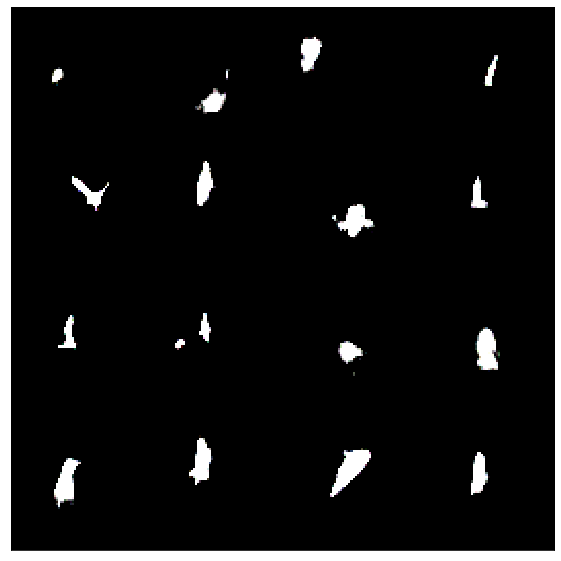

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


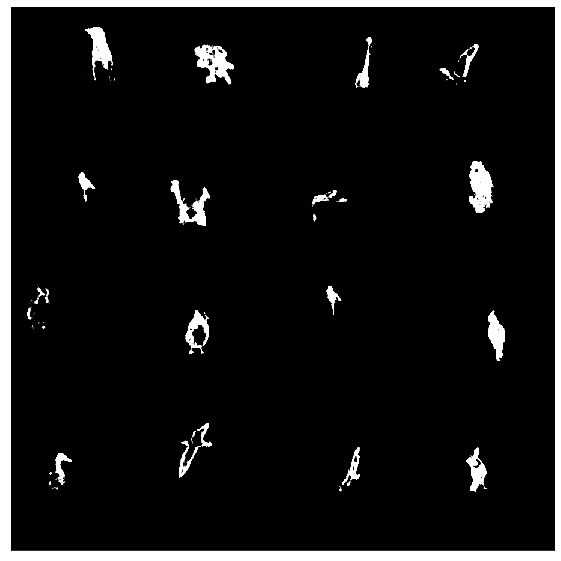

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 14


  0%|                                                                             | 1/17500 [00:13<65:04:24, 13.39s/it]

Train Epoch: 14 [0/280000 (0%)]	Loss: 0.048112
IOU : 0.050445556640625
IOU : 0.050445556640625


  0%|▏                                                                              | 52/17500 [00:16<25:21, 11.47it/s]

Train Epoch: 14 [200/280000 (0%)]	Loss: 0.042476
IOU : 0.056610107421875


  1%|▍                                                                             | 102/17500 [00:19<19:19, 15.00it/s]

Train Epoch: 14 [400/280000 (1%)]	Loss: 0.041092
IOU : 0.0499267578125
IOU : 0.0499267578125


  1%|▋                                                                             | 153/17500 [00:22<16:58, 17.02it/s]

Train Epoch: 14 [600/280000 (1%)]	Loss: 0.042603
IOU : 0.0512542724609375


  1%|▉                                                                             | 204/17500 [00:25<17:33, 16.41it/s]

Train Epoch: 14 [800/280000 (1%)]	Loss: 0.044244
IOU : 0.053863525390625
IOU : 0.053863525390625


  1%|█▏                                                                            | 253/17500 [00:28<17:28, 16.45it/s]

Train Epoch: 14 [1000/280000 (1%)]	Loss: 0.039408
IOU : 0.05267333984375


  2%|█▎                                                                            | 301/17500 [00:31<15:05, 19.00it/s]

Train Epoch: 14 [1200/280000 (2%)]	Loss: 0.038911
IOU : 0.0488128662109375
IOU : 0.0488128662109375


  2%|█▌                                                                            | 353/17500 [00:34<17:32, 16.29it/s]

Train Epoch: 14 [1400/280000 (2%)]	Loss: 0.030895
IOU : 0.0484771728515625


  2%|█▊                                                                            | 403/17500 [00:37<19:01, 14.98it/s]

Train Epoch: 14 [1600/280000 (2%)]	Loss: 0.040543
IOU : 0.050567626953125
IOU : 0.050567626953125


  3%|██                                                                            | 450/17500 [00:40<20:11, 14.07it/s]

Train Epoch: 14 [1800/280000 (3%)]	Loss: 0.029336
IOU : 0.0508575439453125


  3%|██▏                                                                           | 502/17500 [00:44<17:34, 16.12it/s]

Train Epoch: 14 [2000/280000 (3%)]	Loss: 0.034329
IOU : 0.0544281005859375
IOU : 0.0544281005859375


  3%|██▍                                                                           | 538/17500 [00:46<17:40, 16.00it/s]

KeyboardInterrupt: 

In [10]:
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch)
    ts_out = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step()

# train_losses, train_acc = train_model.gettraindata()
# test_losses, test_acc = train_model.gettestdata()
# utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="savedmodels/finalmodelwithdata.pt",
#                       optimizer_state_dict=optimizer.state_dict
#                       , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
#                       test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [11]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)